In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozon/train.tsv', sep='\t', index_col=0 )
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozon/test.tsv', sep='\t', index_col=0)
sample  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozon/sample_submit.csv',header=None)

In [ ]:
train

Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  ...  \
id                                                                      ...   
0       1998/1/1   0.8   1.8   2.4   2.1   2.0   2.1   1.5   1.7   1.9  ...   
1       1998/1/2   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1  ...   
2       1998/1/3   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2  ...   
3       1998/1/4   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4  ...   
4       1998/1/5   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3  ...   
5       1998/1/6   3.1   3.5   3.3   2.5   1.6   1.7   1.6   1.6   2.3  ...   
6       1998/1/7   3.7   3.2   3.8   5.1   6.0   7.0   6.3   6.4   6.3  ...   
7       1998/1/8   2.2   2.9   3.4   4.2   4.7   4.7   5.3   4.9   5.2  ...   
8       1998/1/9   1.0   1.5   1.2   1.2   0.7   0.5   1.2   1.4   1.5  ...   
9      1998/1/10   0.9   0.6   0.5   0.5   0.6   0.4   0.4   0.6   1.3  ...   
10     1998/1/11   1.1   1.7   1.4   1.5   0.9   1.5   1.4   1.6   1.9  ...   
11     1998/1/12   3.7   4.2   3.1   2.6   2.3   2.3   1.7   1.0   1.3  ...   
12     1998/1/13   1.0   0.6   0.3   1.1   1.3   1.2   1.0   1.3   3.0  ...   
13     1998/1/14   1.3   1.3   1.6   1.7   1.4   1.3   1.4   1.4   1.1  ...   
14     1998/1/15   4.2   5.1   5.1   5.1   5.5   5.0   5.4   5.6   5.3  ...   
15     1998/1/16   0.0   0.2   0.1   0.2   0.7   0.3   0.3   0.0   1.1  ...   
16     1998/1/17   2.1   2.2   2.2   1.7   2.1   1.8   1.3   0.8   1.3  ...   
17     1998/1/18   2.5   2.3   1.3   1.7   1.6   1.4   2.8   4.3   4.2  ...   
18     1998/1/19   2.7   2.0   2.6   2.9   3.3   4.4   3.6   3.2   3.8  ...   
19     1998/1/20   0.3   0.6   1.1   1.1   1.7   1.9   2.6   3.1   2.5  ...   
20     1998/1/21   2.1   1.8   1.1   1.5   1.4   1.7   1.5   1.9   1.9  ...   
21     1998/1/22   2.8   3.6   4.1   3.2   3.3   3.7   4.2   4.6   4.6  ...   
22     1998/1/23   3.4   3.5   3.8   3.2   3.1   4.0   3.4   2.9   2.6  ...   
23     1998/1/24   1.1   0.7   1.4   1.2   1.6   0.8   0.3   0.7   2.0  ...   
24     1998/1/25   1.2   0.7   0.3   0.1   0.3   0.4   0.6   1.1   1.9  ...   
25     1998/1/26   2.1   2.3   1.4   0.8   0.6   0.6   1.9   3.6   5.0  ...   
26     1998/1/27   2.0   2.3   2.7   2.3   2.1   1.9   1.8   1.7   2.4  ...   
27     1998/1/28   0.3   0.5   0.3   0.8   0.7   0.1   0.1   0.5   0.9  ...   
28     1998/1/29   0.2   0.3   0.1   0.8   0.6   0.1   0.5   1.0   1.4  ...   
29     1998/1/30   1.3   0.4   0.8   0.8   0.6   0.5   1.0   0.1   0.8  ...   
30     1998/1/31   0.7   0.9   0.9   1.4   2.5   3.2   2.8   1.7   2.8  ...   
31      1998/2/1   3.5   3.1   2.9   3.0   2.6   2.1   1.4   1.4   2.0  ...   
32      1998/2/2   4.2   3.6   3.4   3.5   3.7   3.7   4.5   4.3   4.1  ...   
33      1998/2/3   3.1   3.3   2.7   3.0   2.8   2.2   1.7   2.2   3.6  ...   
34      1998/2/4   1.4   2.0   1.7   1.9   1.5   1.2   1.4   1.5   1.9  ...   
35      1998/2/5   0.8   1.0   0.8   0.4   1.7   1.8   2.2   2.9   2.5  ...   
36      1998/2/6   2.1   2.0   2.3   2.4   2.5   3.2   3.1   3.0   4.1  ...   
37      1998/2/7   1.1   1.1   2.2   1.7   1.8   1.8   1.6   2.1   2.6  ...   
38      1998/2/8   0.1   0.3   0.1   0.1   0.0   0.1   0.3   0.5   0.6  ...   
39      1998/2/9   0.8   0.7   0.8   1.0   1.7   1.5   0.4   1.1   1.6  ...   
40     1998/2/10   3.6   3.7   2.8   2.7   3.2   3.1   2.6   3.3   4.9  ...   
41     1998/2/11   2.8   3.0   3.0   3.1   2.8   2.8   2.7   2.8   4.0  ...   
42     1998/2/12   0.1   0.1   0.9   0.4   0.8   0.6   0.4   1.6   1.6  ...   
43     1998/2/13   1.1   1.2   1.6   1.2   1.4   1.6   2.3   1.6   1.7  ...   
44     1998/2/14   1.2   0.2   1.2   1.2   1.2   1.7   1.9   2.2   3.6  ...   
45     1998/2/15   3.4   4.6   4.6   3.0   2.8   2.5   2.0   2.3   2.8  ...   
46     1998/2/16   1.4   0.9   0.8   1.0   0.1   1.4   0.6   2.6   0.8  ...   
47     1998/2/17   0.9   1.1   2.3   2.6   2.1   3.4   3.2   2.9   3.7  ...   
48     1998/2/18   0.0   0.3   0.4   0.4   0.2   0.4   0.2   0

In [ ]:
#欠損確認
pd.set_option('display.max_rows', None)
train.isna().sum()

Date        0
WSR0       27
WSR1       27
WSR2       28
WSR3       27
WSR4       27
WSR5       27
WSR6       26
WSR7       23
WSR8       24
WSR9       26
WSR10      26
WSR11      25
WSR12      24
WSR13      26
WSR14      26
WSR15      24
WSR16      24
WSR17      23
WSR18      24
WSR19      27
WSR20      27
WSR21      27
WSR22      27
WSR23      27
WSR_PK     20
WSR_AV     20
T0          5
T1          5
T2          6
T3          5
T4          5
T5          5
T6          6
T7          4
T8          4
T9          6
T10         6
T11         5
T12         5
T13         8
T14         8
T15         5
T16         5
T17         3
T18         4
T19         5
T20         6
T21         5
T22         6
T23         6
T_PK        0
T_AV        0
T85        64
RH85       64
U85        94
V85        94
HT85       62
T70        70
RH70       71
U70        87
V70        87
HT70       67
T50        75
RH50       76
U50       113
V50       113
HT50       75
KI         81
TT         77
SLP        62
SLP_  

<Axes: xlabel='id'>

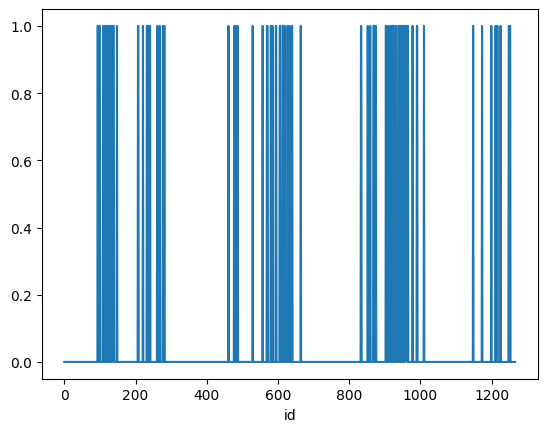

In [ ]:
train['OZONE'].plot()

In [ ]:
test.isna().sum()

WSR0      272
WSR1      265
WSR2      266
WSR3      265
WSR4      266
WSR5      265
WSR6      265
WSR7      266
WSR8      266
WSR9      261
WSR10     262
WSR11     267
WSR12     263
WSR13     262
WSR14     262
WSR15     262
WSR16     260
WSR17     260
WSR18     262
WSR19     265
WSR20     267
WSR21     266
WSR22     273
WSR23     270
WSR_PK    253
WSR_AV    253
T0        185
T1        180
T2        181
T3        179
T4        179
T5        178
T6        177
T7        179
T8        181
T9        179
T10       182
T11       187
T12       184
T13       183
T14       184
T15       182
T16       179
T17       179
T18       180
T19       183
T20       183
T21       180
T22       186
T23       183
T_PK      175
T_AV      175
T85        35
RH85       41
U85        86
V85        86
HT85       33
T70        37
RH70       44
U70        70
V70        70
HT70       33
T50        40
RH50       49
U50        97
V50        97
HT50       37
KI         55
TT         48
SLP        33
SLP_       50
Precp 

In [ ]:
# Dateを分割して設定
train['month'] = train['Date'].apply(lambda x : x.split('/')[1])
train['day'] = train['Date'].apply(lambda x : x.split('/')[2])
test['month'] = test['Date'].apply(lambda x : x.split('/')[1])
test['day'] = test['Date'].apply(lambda x : x.split('/')[2])

# 新規で定義したカラムのデータ型はobject型になってしまうため、int型へ変換する
train['day'] = train['day'].astype(np.int64)
train['month'] = train['month'].astype(np.int64)
test['day'] = test['day'].astype(np.int64)
test['month'] = test['month'].astype(np.int64)

In [ ]:
train = train.drop('Date', axis=1)
test = test.drop('Date', axis=1)

# 欠損行を消す

In [ ]:
train_dn = train.dropna(how='any')

<Axes: >

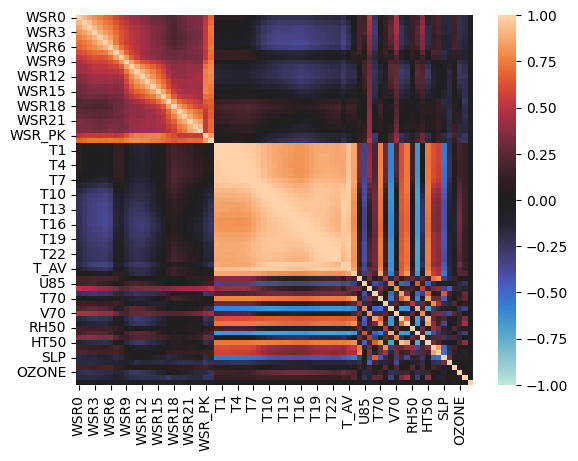

In [ ]:
#ヒートマップ
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = train_dn.corr()
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
data_x = train_dn.drop('OZONE', axis=1)
data_y = train_dn[['OZONE']]

In [ ]:
from sklearn.model_selection import StratifiedKFold
# optuna経由でLightGBMをインポート
# from optuna.integration import lightgbm as lgb
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# kfoldの分割数
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=2)

lgbm_params = {

    'random_state': 42,
    'objective': 'binary',
    'metric': 'auc',
    'class_weight': 'balanced',
    'is_unbalance': True,
    'verbose': -1,
    }

ba_list = []

# kfoldで分割
for train_index, test_index in skf.split(data_x, data_y):

    X_train = data_x.iloc[train_index]
    y_train = data_y.iloc[train_index]
    X_test = data_x.iloc[test_index]
    y_test = data_y.iloc[test_index]


    # データセットを生成する
    lgb_train = lgb.Dataset(X_train.to_numpy(), y_train)
    lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train)

    model = lgb.train(lgbm_params, lgb_train)

    Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred = np.where(Y_pred < 0.5, 0, 1)
    ba = balanced_accuracy_score(y_test, y_pred)
    print(ba)
    ba_list.append(ba)
print(f"Balanced Accuracy: {np.mean(ba_list)}")

0.6706235697940504
0.6887871853546911
0.7314073226544622
0.7424516908212561
0.7231809030773655
Balanced Accuracy: 0.711290134340365


In [ ]:
import optuna.integration.lightgbm as lgb_o
import optuna
from sklearn.metrics import roc_auc_score


def objective(trial):
    params = {
        'objective': 'cross_entropy',
        'metric': 'auc',
        'boosting': 'gbdt',
        'learning_rate': 0.05,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'seed': 0,
        'verbosity': -1,
        "verbose_eval": False,
    }

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train.to_numpy(), y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train, free_raw_data=False)

    # Optunaでのパラメータ探索
    model = lgb_o.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=1000,   # 計算回数
                    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=-1),
                               lgb.log_evaluation(0)],         # アーリーストッピング設定
               )
    # model = lgb_o.train(params, lgb_train, valid_sets=lgb_eval,
    #                  num_boost_round=1000, early_stopping_rounds=100)

    y_prob = model.predict(X_test)
    y_pred = np.round(y_prob)
    return roc_auc_score(
        np.round(y_test.values),
        np.round(y_pred)
    )


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-05-18 12:51:17,750] A new study created in memory with name: no-name-8e0fc593-580e-4054-9605-54025081d6f9
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

Training until validation scores don't improve for 50 rounds




feature_fraction, val_score: 0.957722:  14%|#4        | 1/7 [00:00<00:02,  2.71it/s][I 2024-05-18 12:51:18,156] Trial 0 finished with value: 0.9577221742881795 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.9577221742881795.

feature_fraction, val_score: 0.957722:  14%|#4        | 1/7 [00:00<00:02,  2.71it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 0.999638	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds



feature_fraction, val_score: 0.964337:  29%|##8       | 2/7 [00:00<00:01,  3.07it/s][I 2024-05-18 12:51:18,454] Trial 1 finished with value: 0.9643370721886684 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.9643370721886684.

feature_fraction, val_score: 0.964337:  29%|##8       | 2/7 [00:00<00:01,  3.07it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds



feature_fraction, val_score: 0.964337:  43%|####2     | 3/7 [00:01<00:01,  2.99it/s][I 2024-05-18 12:51:18,791] Trial 2 finished with value: 0.9594477998274374 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.9643370721886684.

feature_fraction, val_score: 0.964337:  43%|####2     | 3/7 [00:01<00:01,  2.99it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.999855	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds



feature_fraction, val_score: 0.964337:  57%|#####7    | 4/7 [00:01<00:00,  3.07it/s][I 2024-05-18 12:51:19,105] Trial 3 finished with value: 0.9508196721311475 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.9643370721886684.

feature_fraction, val_score: 0.964337:  57%|#####7    | 4/7 [00:01<00:00,  3.07it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.999547	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds



feature_fraction, val_score: 0.964337:  71%|#######1  | 5/7 [00:01<00:00,  3.14it/s][I 2024-05-18 12:51:19,410] Trial 4 finished with value: 0.9585849870578085 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.9643370721886684.

feature_fraction, val_score: 0.964337:  71%|#######1  | 5/7 [00:01<00:00,  3.14it/s]

Early stopping, best iteration is:
[218]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds



feature_fraction, val_score: 0.964337:  86%|########5 | 6/7 [00:02<00:00,  2.87it/s][I 2024-05-18 12:51:19,824] Trial 5 finished with value: 0.9499568593615185 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 1 with value: 0.9643370721886684.

feature_fraction, val_score: 0.964337:  86%|########5 | 6/7 [00:02<00:00,  2.87it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.999928	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds



feature_fraction, val_score: 0.964337: 100%|##########| 7/7 [00:02<00:00,  2.90it/s]


Early stopping, best iteration is:
[186]	valid_0's auc: 0.999547	valid_1's auc: 0.949382


num_leaves, val_score: 0.964337:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:   5%|5         | 1/20 [00:00<00:04,  4.14it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337


[I 2024-05-18 12:51:20,443] Trial 7 finished with value: 0.9643370721886684 and parameters: {'num_leaves': 230}. Best is trial 7 with value: 0.9643370721886684.
num_leaves, val_score: 0.964337:   5%|5         | 1/20 [00:00<00:04,  4.14it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  10%|#         | 2/20 [00:00<00:04,  3.71it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  15%|#5        | 3/20 [00:00<00:04,  3.85it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  20%|##        | 4/20 [00:01<00:04,  3.93it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  25%|##5       | 5/20 [00:01<00:03,  3.97it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  30%|###       | 6/20 [00:01<00:03,  3.86it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  35%|###5      | 7/20 [00:01<00:03,  3.86it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  40%|####      | 8/20 [00:02<00:03,  3.81it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  45%|####5     | 9/20 [00:02<00:02,  3.93it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  50%|#####     | 10/20 [00:02<00:02,  3.90it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  55%|#####5    | 11/20 [00:02<00:02,  3.94it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  60%|######    | 12/20 [00:03<00:01,  4.06it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  65%|######5   | 13/20 [00:03<00:02,  3.42it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  70%|#######   | 14/20 [00:04<00:03,  1.96it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  75%|#######5  | 15/20 [00:06<00:05,  1.01s/it]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  80%|########  | 16/20 [00:07<00:04,  1.06s/it]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.958351	valid_1's auc: 0.922634
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  85%|########5 | 17/20 [00:08<00:02,  1.01it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  90%|######### | 18/20 [00:09<00:01,  1.06it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  95%|#########5| 19/20 [00:10<00:01,  1.05s/it]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337: 100%|##########| 20/20 [00:11<00:00,  1.79it/s]


Early stopping, best iteration is:
[195]	valid_0's auc: 0.999638	valid_1's auc: 0.964337


bagging, val_score: 0.964337:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[223]	valid_0's auc: 0.999909	valid_1's auc: 0.958873

bagging, val_score: 0.964337:  10%|#         | 1/10 [00:00<00:02,  3.55it/s]


Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  20%|##        | 2/10 [00:00<00:02,  3.91it/s]

Early stopping, best iteration is:
[321]	valid_0's auc: 0.978062	valid_1's auc: 0.921196
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  30%|###       | 3/10 [00:00<00:01,  3.73it/s]

Early stopping, best iteration is:
[347]	valid_0's auc: 0.997953	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  40%|####      | 4/10 [00:01<00:01,  3.53it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 0.999928	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  50%|#####     | 5/10 [00:01<00:01,  3.60it/s]

Early stopping, best iteration is:
[293]	valid_0's auc: 0.998659	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  60%|######    | 6/10 [00:01<00:01,  3.60it/s]

Early stopping, best iteration is:
[216]	valid_0's auc: 0.999964	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  70%|#######   | 7/10 [00:01<00:00,  3.59it/s]

Early stopping, best iteration is:
[298]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  80%|########  | 8/10 [00:02<00:00,  3.79it/s]

Early stopping, best iteration is:
[294]	valid_0's auc: 0.982011	valid_1's auc: 0.918896
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]


Early stopping, best iteration is:
[239]	valid_0's auc: 0.997971	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.983207	valid_1's auc: 0.949094


feature_fraction_stage2, val_score: 0.964337:  17%|#6        | 1/6 [00:00<00:01,  4.25it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.99971	valid_1's auc: 0.961749


feature_fraction_stage2, val_score: 0.964337:  33%|###3      | 2/6 [00:00<00:00,  4.18it/s][I 2024-05-18 12:51:34,478] Trial 38 finished with value: 0.9623238423928674 and parameters: {'feature_fraction': 0.58}. Best is trial 38 with value: 0.9623238423928674.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[170]	valid_0's auc: 0.999257	valid_1's auc: 0.962324


feature_fraction_stage2, val_score: 0.964337:  50%|#####     | 3/6 [00:00<00:00,  4.20it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[218]	valid_0's auc: 0.999928	valid_1's auc: 0.95916


feature_fraction_stage2, val_score: 0.964337:  67%|######6   | 4/6 [00:00<00:00,  4.15it/s][I 2024-05-18 12:51:34,956] Trial 40 finished with value: 0.9571469657750935 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 38 with value: 0.9623238423928674.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[199]	valid_0's auc: 0.99971	valid_1's auc: 0.957147


feature_fraction_stage2, val_score: 0.964337:  83%|########3 | 5/6 [00:01<00:00,  4.24it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.999583	valid_1's auc: 0.95801


feature_fraction_stage2, val_score: 0.964337: 100%|##########| 6/6 [00:01<00:00,  4.20it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[189]	valid_0's auc: 0.99962	valid_1's auc: 0.959448


regularization_factors, val_score: 0.964337:   5%|5         | 1/20 [00:00<00:04,  3.97it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	valid_0's auc: 0.999275	valid_1's auc: 0.961749


regularization_factors, val_score: 0.964337:   5%|5         | 1/20 [00:00<00:04,  3.97it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	valid_0's auc: 0.998714	valid_1's auc: 0.962324


regularization_factors, val_score: 0.964337:  15%|#5        | 3/20 [00:00<00:04,  3.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	valid_0's auc: 0.999873	valid_1's auc: 0.960598


regularization_factors, val_score: 0.964337:  20%|##        | 4/20 [00:00<00:03,  5.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.924611	valid_1's auc: 0.907967
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  25%|##5       | 5/20 [00:01<00:03,  4.31it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 0.999819	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  30%|###       | 6/20 [00:01<00:03,  4.12it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 0.999565	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  35%|###5      | 7/20 [00:01<00:03,  4.00it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999837	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  40%|####      | 8/20 [00:01<00:03,  3.87it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.999982	valid_1's auc: 0.968076
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  45%|####5     | 9/20 [00:02<00:02,  3.71it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.999982	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  50%|#####     | 10/20 [00:02<00:02,  3.70it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.999692	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  55%|#####5    | 11/20 [00:02<00:02,  3.71it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999946	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  60%|######    | 12/20 [00:03<00:02,  3.76it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.999493	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  65%|######5   | 13/20 [00:03<00:01,  3.67it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.999982	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  70%|#######   | 14/20 [00:03<00:01,  3.64it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.999855	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  75%|#######5  | 15/20 [00:03<00:01,  3.65it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999982	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  85%|########5 | 17/20 [00:04<00:00,  4.30it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.999873	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.938931	valid_1's auc: 0.914869
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  90%|######### | 18/20 [00:05<00:00,  2.46it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.99962	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  95%|#########5| 19/20 [00:06<00:00,  1.79it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.99962	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076: 100%|##########| 20/20 [00:07<00:00,  2.66it/s]


Early stopping, best iteration is:
[199]	valid_0's auc: 0.999982	valid_1's auc: 0.966926


min_child_samples, val_score: 0.968076:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  20%|##        | 1/5 [00:01<00:04,  1.19s/it]

Early stopping, best iteration is:
[25]	valid_0's auc: 1	valid_1's auc: 0.911705
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  40%|####      | 2/5 [00:01<00:01,  1.58it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  60%|######    | 3/5 [00:01<00:00,  2.22it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999674	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  80%|########  | 4/5 [00:01<00:00,  2.78it/s]

Early stopping, best iteration is:
[30]	valid_0's auc: 1	valid_1's auc: 0.941041
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076: 100%|##########| 5/5 [00:02<00:00,  2.31it/s]
[I 2024-05-18 12:51:45,142] Trial 0 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 8.006184728841322e-08, 'lambda_l2': 0.277655394707042, 'num_leaves': 245, 'feature_fraction': 0.5747123324009589, 'bagging_fraction': 0.9239487812328877, 'bagging_freq': 6, 'min_child_samples': 97}. Best is trial 0 with value: 0.6551624964049468.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[70]	valid_0's auc: 1	valid_1's auc: 0.95197


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.999982	valid_1's auc: 0.91717


feature_fraction, val_score: 0.917170:  14%|#4        | 1/7 [00:00<00:01,  3.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.999547	valid_1's auc: 0.939028


feature_fraction, val_score: 0.939028:  29%|##8       | 2/7 [00:00<00:01,  3.80it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.939028:  43%|####2     | 3/7 [00:00<00:01,  3.22it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.999982	valid_1's auc: 0.927236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.942479:  57%|#####7    | 4/7 [00:01<00:00,  3.55it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.942479:  71%|#######1  | 5/7 [00:01<00:00,  3.47it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.999457	valid_1's auc: 0.935577
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.942479:  86%|########5 | 6/7 [00:01<00:00,  3.09it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.999511	valid_1's auc: 0.92436
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.942479: 100%|##########| 7/7 [00:02<00:00,  3.07it/s]


Early stopping, best iteration is:
[111]	valid_0's auc: 0.999982	valid_1's auc: 0.937877


num_leaves, val_score: 0.942479:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.942479:   5%|5         | 1/20 [00:00<00:04,  3.84it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.942479:  10%|#         | 2/20 [00:00<00:04,  3.70it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.942479:  15%|#5        | 3/20 [00:00<00:04,  3.66it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  20%|##        | 4/20 [00:01<00:04,  3.94it/s]

Early stopping, best iteration is:
[258]	valid_0's auc: 0.997627	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  25%|##5       | 5/20 [00:01<00:03,  3.98it/s]

Early stopping, best iteration is:
[251]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  30%|###       | 6/20 [00:01<00:03,  4.03it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.998768	valid_1's auc: 0.93874
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  35%|###5      | 7/20 [00:01<00:03,  3.54it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 0.999891	valid_1's auc: 0.936152
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  40%|####      | 8/20 [00:02<00:03,  3.74it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  45%|####5     | 9/20 [00:02<00:02,  3.90it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  50%|#####     | 10/20 [00:02<00:02,  3.96it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  55%|#####5    | 11/20 [00:02<00:02,  3.96it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  60%|######    | 12/20 [00:03<00:01,  4.22it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.997663	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  65%|######5   | 13/20 [00:03<00:01,  4.24it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  70%|#######   | 14/20 [00:03<00:01,  4.21it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  75%|#######5  | 15/20 [00:03<00:01,  4.16it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.999275	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  80%|########  | 16/20 [00:04<00:00,  4.21it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.999275	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  85%|########5 | 17/20 [00:04<00:00,  4.28it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  90%|######### | 18/20 [00:04<00:00,  4.32it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  95%|#########5| 19/20 [00:04<00:00,  4.17it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435: 100%|##########| 20/20 [00:04<00:00,  4.03it/s]


Early stopping, best iteration is:
[66]	valid_0's auc: 0.99904	valid_1's auc: 0.942479


bagging, val_score: 0.957435:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 0.996703	valid_1's auc: 0.95916

bagging, val_score: 0.959160:  10%|#         | 1/10 [00:00<00:01,  5.33it/s]


Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  20%|##        | 2/10 [00:00<00:01,  4.42it/s]

Early stopping, best iteration is:
[232]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  30%|###       | 3/10 [00:00<00:02,  3.45it/s]

Early stopping, best iteration is:
[325]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  40%|####      | 4/10 [00:01<00:01,  3.37it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  50%|#####     | 5/10 [00:01<00:01,  3.28it/s]

Early stopping, best iteration is:
[286]	valid_0's auc: 0.999982	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  60%|######    | 6/10 [00:01<00:01,  2.89it/s]

Early stopping, best iteration is:
[305]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  70%|#######   | 7/10 [00:03<00:02,  1.47it/s]

Early stopping, best iteration is:
[309]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  80%|########  | 8/10 [00:04<00:01,  1.10it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.970952:  90%|######### | 9/10 [00:06<00:01,  1.17s/it]

Early stopping, best iteration is:
[270]	valid_0's auc: 1	valid_1's auc: 0.970952
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.970952: 100%|##########| 10/10 [00:06<00:00,  1.50it/s]


Early stopping, best iteration is:
[244]	valid_0's auc: 0.999982	valid_1's auc: 0.962899


feature_fraction_stage2, val_score: 0.970952:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970952:  17%|#6        | 1/6 [00:00<00:01,  3.27it/s]

Early stopping, best iteration is:
[267]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970952:  33%|###3      | 2/6 [00:00<00:01,  3.94it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.999221	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970952:  50%|#####     | 3/6 [00:00<00:00,  3.83it/s]

Early stopping, best iteration is:
[259]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970952:  67%|######6   | 4/6 [00:01<00:00,  3.51it/s]

Early stopping, best iteration is:
[268]	valid_0's auc: 1	valid_1's auc: 0.969514
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970952:  83%|########3 | 5/6 [00:01<00:00,  3.68it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970952: 100%|##########| 6/6 [00:01<00:00,  3.58it/s]


Early stopping, best iteration is:
[267]	valid_0's auc: 1	valid_1's auc: 0.965775


regularization_factors, val_score: 0.970952:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:   5%|5         | 1/20 [00:00<00:05,  3.57it/s]

Early stopping, best iteration is:
[245]	valid_0's auc: 1	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  10%|#         | 2/20 [00:00<00:04,  3.72it/s]

Early stopping, best iteration is:
[235]	valid_0's auc: 0.999982	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  15%|#5        | 3/20 [00:00<00:04,  3.49it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 1	valid_1's auc: 0.969802
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  20%|##        | 4/20 [00:01<00:04,  3.56it/s]

Early stopping, best iteration is:
[247]	valid_0's auc: 1	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  25%|##5       | 5/20 [00:01<00:04,  3.52it/s]

Early stopping, best iteration is:
[262]	valid_0's auc: 0.999982	valid_1's auc: 0.969802
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  30%|###       | 6/20 [00:01<00:03,  3.58it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 1	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  35%|###5      | 7/20 [00:02<00:04,  2.83it/s]

Early stopping, best iteration is:
[580]	valid_0's auc: 0.999457	valid_1's auc: 0.969514
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  40%|####      | 8/20 [00:02<00:03,  3.08it/s]

Early stopping, best iteration is:
[237]	valid_0's auc: 0.990761	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  45%|####5     | 9/20 [00:02<00:03,  3.10it/s]

Early stopping, best iteration is:
[317]	valid_0's auc: 0.999964	valid_1's auc: 0.970664
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  50%|#####     | 10/20 [00:03<00:03,  2.75it/s]

Early stopping, best iteration is:
[498]	valid_0's auc: 0.999583	valid_1's auc: 0.970377
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 0.993315	valid_1's auc: 0.955709


regularization_factors, val_score: 0.970952:  60%|######    | 12/20 [00:03<00:02,  3.39it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[232]	valid_0's auc: 1	valid_1's auc: 0.964337


[I 2024-05-18 12:52:04,476] Trial 54 finished with value: 0.9643370721886684 and parameters: {'lambda_l1': 0.0005293328313053376, 'lambda_l2': 6.505901798151037e-07}. Best is trial 51 with value: 0.9706643658326143.
regularization_factors, val_score: 0.970952:  60%|######    | 12/20 [00:03<00:02,  3.39it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  70%|#######   | 14/20 [00:04<00:01,  4.10it/s]

Early stopping, best iteration is:
[234]	valid_0's auc: 0.999964	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.956766	valid_1's auc: 0.919183
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  75%|#######5  | 15/20 [00:04<00:01,  3.90it/s]

Early stopping, best iteration is:
[266]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  80%|########  | 16/20 [00:04<00:01,  3.91it/s]

Early stopping, best iteration is:
[232]	valid_0's auc: 1	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  85%|########5 | 17/20 [00:04<00:00,  3.62it/s]

Early stopping, best iteration is:
[298]	valid_0's auc: 0.999982	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  90%|######### | 18/20 [00:05<00:00,  3.63it/s]

Early stopping, best iteration is:
[244]	valid_0's auc: 0.996268	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952:  95%|#########5| 19/20 [00:05<00:00,  2.92it/s]

Early stopping, best iteration is:
[505]	valid_0's auc: 0.999873	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970952: 100%|##########| 20/20 [00:06<00:00,  3.22it/s]


Early stopping, best iteration is:
[449]	valid_0's auc: 0.999891	valid_1's auc: 0.970089


min_child_samples, val_score: 0.970952:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970952:  20%|##        | 1/5 [00:00<00:01,  3.38it/s]

Early stopping, best iteration is:
[243]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970952:  40%|####      | 2/5 [00:00<00:00,  3.63it/s]

Early stopping, best iteration is:
[285]	valid_0's auc: 1	valid_1's auc: 0.969514
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[234]	valid_0's auc: 0.996721	valid_1's auc: 0.957722


min_child_samples, val_score: 0.970952:  80%|########  | 4/5 [00:01<00:00,  4.14it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[179]	valid_0's auc: 0.999203	valid_1's auc: 0.962899


min_child_samples, val_score: 0.970952: 100%|##########| 5/5 [00:01<00:00,  4.03it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[235]	valid_0's auc: 0.99933	valid_1's auc: 0.963187



[I 2024-05-18 12:52:08,260] Trial 1 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 0.18972993667404264, 'lambda_l2': 1.0851710994442371e-08, 'num_leaves': 256, 'feature_fraction': 0.4431255968691151, 'bagging_fraction': 0.5188524620910333, 'bagging_freq': 7, 'min_child_samples': 6}. Best is trial 0 with value: 0.6551624964049468.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937877:  29%|##8       | 2/7 [00:00<00:00,  6.11it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 0.977971	valid_1's auc: 0.920334
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937877:  43%|####2     | 3/7 [00:00<00:01,  2.86it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.999058	valid_1's auc: 0.93155
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937877:  57%|#####7    | 4/7 [00:01<00:01,  1.61it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.995562	valid_1's auc: 0.924648
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937877:  71%|#######1  | 5/7 [00:02<00:01,  1.29it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.994221	valid_1's auc: 0.935289
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937877:  86%|########5 | 6/7 [00:03<00:00,  1.28it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.996214	valid_1's auc: 0.936439
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937877: 100%|##########| 7/7 [00:04<00:00,  1.46it/s]


Early stopping, best iteration is:
[26]	valid_0's auc: 0.95442	valid_1's auc: 0.907679


num_leaves, val_score: 0.937877:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937877:  10%|#         | 2/20 [00:00<00:03,  4.67it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


num_leaves, val_score: 0.937877:  15%|#5        | 3/20 [00:00<00:03,  5.51it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.941041:  25%|##5       | 5/20 [00:00<00:02,  6.13it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.982663	valid_1's auc: 0.941041
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.941041:  35%|###5      | 7/20 [00:01<00:02,  6.05it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


num_leaves, val_score: 0.941041:  40%|####      | 8/20 [00:01<00:01,  6.02it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.941041:  50%|#####     | 10/20 [00:01<00:01,  6.23it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


num_leaves, val_score: 0.941041:  55%|#####5    | 11/20 [00:01<00:01,  6.17it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.941041:  65%|######5   | 13/20 [00:02<00:01,  5.97it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


num_leaves, val_score: 0.941041:  70%|#######   | 14/20 [00:02<00:00,  6.67it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.932065	valid_1's auc: 0.88352
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


num_leaves, val_score: 0.941041:  80%|########  | 16/20 [00:02<00:00,  6.60it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.941041:  90%|######### | 18/20 [00:02<00:00,  6.29it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


num_leaves, val_score: 0.941041:  95%|#########5| 19/20 [00:03<00:00,  5.97it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.941041: 100%|##########| 20/20 [00:03<00:00,  5.97it/s]


Early stopping, best iteration is:
[72]	valid_0's auc: 0.983913	valid_1's auc: 0.937877


bagging, val_score: 0.941041:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.950244:  10%|#         | 1/10 [00:00<00:01,  4.56it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.950244


bagging, val_score: 0.958873:  10%|#         | 1/10 [00:00<00:01,  4.56it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.999891	valid_1's auc: 0.958873


bagging, val_score: 0.958873:  30%|###       | 3/10 [00:00<00:01,  4.66it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[157]	valid_0's auc: 1	valid_1's auc: 0.954559


bagging, val_score: 0.958873:  40%|####      | 4/10 [00:00<00:01,  4.36it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.954559


bagging, val_score: 0.958873:  50%|#####     | 5/10 [00:01<00:01,  4.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.946793


bagging, val_score: 0.958873:  60%|######    | 6/10 [00:01<00:00,  4.55it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.999855	valid_1's auc: 0.957147


bagging, val_score: 0.958873:  70%|#######   | 7/10 [00:01<00:00,  4.54it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.953408


bagging, val_score: 0.964625:  80%|########  | 8/10 [00:01<00:00,  4.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625


bagging, val_score: 0.964625:  80%|########  | 8/10 [00:02<00:00,  4.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 0.99933	valid_1's auc: 0.94478


bagging, val_score: 0.964625: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.962611


feature_fraction_stage2, val_score: 0.964625:  33%|###3      | 1/3 [00:00<00:00,  4.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.957147


feature_fraction_stage2, val_score: 0.964625:  67%|######6   | 2/3 [00:00<00:00,  4.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964625: 100%|##########| 3/3 [00:00<00:00,  4.55it/s]


Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.954846


regularization_factors, val_score: 0.964625:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:   5%|5         | 1/20 [00:00<00:04,  4.19it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  10%|#         | 2/20 [00:00<00:04,  4.46it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  15%|#5        | 3/20 [00:00<00:03,  4.41it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  20%|##        | 4/20 [00:00<00:03,  4.21it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  25%|##5       | 5/20 [00:01<00:03,  4.32it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  30%|###       | 6/20 [00:01<00:03,  4.39it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  35%|###5      | 7/20 [00:01<00:02,  4.40it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  40%|####      | 8/20 [00:01<00:02,  4.39it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  45%|####5     | 9/20 [00:02<00:02,  4.25it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  50%|#####     | 10/20 [00:02<00:02,  4.32it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  55%|#####5    | 11/20 [00:02<00:02,  4.42it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  60%|######    | 12/20 [00:02<00:01,  4.32it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  65%|######5   | 13/20 [00:03<00:01,  4.17it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  70%|#######   | 14/20 [00:03<00:01,  4.09it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.999855	valid_1's auc: 0.968939
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  75%|#######5  | 15/20 [00:03<00:01,  4.18it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  80%|########  | 16/20 [00:03<00:00,  4.14it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.998424	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  85%|########5 | 17/20 [00:04<00:00,  3.83it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.999058	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  90%|######### | 18/20 [00:04<00:00,  3.03it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.997518	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  95%|#########5| 19/20 [00:07<00:00,  1.02it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939: 100%|##########| 20/20 [00:07<00:00,  2.59it/s]


Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.963187


min_child_samples, val_score: 0.968939:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  20%|##        | 1/5 [00:01<00:05,  1.25s/it]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.999674	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  40%|####      | 2/5 [00:01<00:02,  1.48it/s]

Early stopping, best iteration is:
[277]	valid_0's auc: 0.999547	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  60%|######    | 3/5 [00:01<00:00,  2.01it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  80%|########  | 4/5 [00:02<00:00,  2.44it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 1	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939: 100%|##########| 5/5 [00:02<00:00,  2.11it/s]
[I 2024-05-18 12:52:29,563] Trial 2 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 6.009453148392084e-08, 'lambda_l2': 5.318989691869034e-06, 'num_leaves': 61, 'feature_fraction': 0.8692584379591652, 'bagging_fraction': 0.5419301192188299, 'bagging_freq': 7, 'min_child_samples': 43}. Best is trial 0 with value: 0.6551624964049468.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999909	valid_1's auc: 0.968076


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955421:  14%|#4        | 1/7 [00:00<00:02,  2.98it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960311:  43%|####2     | 3/7 [00:00<00:01,  3.79it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.987246	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960311:  57%|#####7    | 4/7 [00:01<00:00,  3.35it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960311:  71%|#######1  | 5/7 [00:01<00:00,  3.05it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960311:  86%|########5 | 6/7 [00:01<00:00,  3.28it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.999891	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960311: 100%|##########| 7/7 [00:02<00:00,  3.28it/s]


Early stopping, best iteration is:
[126]	valid_0's auc: 1	valid_1's auc: 0.955709


num_leaves, val_score: 0.960311:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:   5%|5         | 1/20 [00:00<00:07,  2.60it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  10%|#         | 2/20 [00:00<00:06,  2.80it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  15%|#5        | 3/20 [00:00<00:05,  3.24it/s]

Early stopping, best iteration is:
[201]	valid_0's auc: 0.998442	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  20%|##        | 4/20 [00:01<00:05,  2.91it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  25%|##5       | 5/20 [00:01<00:05,  2.76it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  30%|###       | 6/20 [00:02<00:05,  2.73it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  35%|###5      | 7/20 [00:02<00:05,  2.57it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  40%|####      | 8/20 [00:02<00:04,  2.59it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  45%|####5     | 9/20 [00:03<00:04,  2.59it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  50%|#####     | 10/20 [00:03<00:03,  2.64it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  55%|#####5    | 11/20 [00:04<00:03,  2.71it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  60%|######    | 12/20 [00:04<00:03,  2.64it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  65%|######5   | 13/20 [00:04<00:02,  2.73it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  70%|#######   | 14/20 [00:05<00:02,  2.77it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  75%|#######5  | 15/20 [00:05<00:01,  2.72it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  80%|########  | 16/20 [00:05<00:01,  2.77it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  85%|########5 | 17/20 [00:06<00:01,  2.82it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  90%|######### | 18/20 [00:06<00:00,  2.79it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  95%|#########5| 19/20 [00:07<00:00,  1.60it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311: 100%|##########| 20/20 [00:09<00:00,  2.11it/s]


Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311


bagging, val_score: 0.960311:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  10%|#         | 1/10 [00:00<00:05,  1.53it/s]

Early stopping, best iteration is:
[226]	valid_0's auc: 0.997464	valid_1's auc: 0.938453
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  20%|##        | 2/10 [00:01<00:07,  1.03it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  30%|###       | 3/10 [00:02<00:05,  1.40it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.940178
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  40%|####      | 4/10 [00:02<00:03,  1.75it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  60%|######    | 6/10 [00:03<00:01,  2.63it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 1	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.957174	valid_1's auc: 0.906529


bagging, val_score: 0.960311:  70%|#######   | 7/10 [00:03<00:01,  2.90it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.992373	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[172]	valid_0's auc: 0.999511	valid_1's auc: 0.941904

bagging, val_score: 0.960311:  80%|########  | 8/10 [00:03<00:00,  3.05it/s]


Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  90%|######### | 9/10 [00:04<00:00,  3.03it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311: 100%|##########| 10/10 [00:04<00:00,  2.29it/s]


Early stopping, best iteration is:
[132]	valid_0's auc: 0.99779	valid_1's auc: 0.949957


feature_fraction_stage2, val_score: 0.960311:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  17%|#6        | 1/6 [00:00<00:01,  2.71it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  33%|###3      | 2/6 [00:00<00:01,  2.78it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  50%|#####     | 3/6 [00:01<00:01,  2.62it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  67%|######6   | 4/6 [00:01<00:00,  2.66it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  83%|########3 | 5/6 [00:01<00:00,  2.72it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311: 100%|##########| 6/6 [00:02<00:00,  2.73it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.954846


regularization_factors, val_score: 0.960311:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:   5%|5         | 1/20 [00:00<00:06,  2.75it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 1	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  10%|#         | 2/20 [00:00<00:06,  2.74it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  15%|#5        | 3/20 [00:01<00:07,  2.20it/s]

Early stopping, best iteration is:
[342]	valid_0's auc: 0.999783	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  20%|##        | 4/20 [00:01<00:05,  2.70it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 0.987826	valid_1's auc: 0.935864
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  25%|##5       | 5/20 [00:01<00:05,  2.82it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  30%|###       | 6/20 [00:02<00:04,  2.86it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  35%|###5      | 7/20 [00:02<00:04,  2.84it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  40%|####      | 8/20 [00:02<00:04,  2.89it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  45%|####5     | 9/20 [00:03<00:03,  3.01it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.99962	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  50%|#####     | 10/20 [00:03<00:03,  3.04it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  55%|#####5    | 11/20 [00:03<00:02,  3.05it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  60%|######    | 12/20 [00:04<00:02,  3.02it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  65%|######5   | 13/20 [00:04<00:02,  3.03it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  70%|#######   | 14/20 [00:04<00:01,  3.05it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  75%|#######5  | 15/20 [00:05<00:01,  3.05it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  80%|########  | 16/20 [00:06<00:02,  1.95it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  85%|########5 | 17/20 [00:07<00:01,  1.55it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  90%|######### | 18/20 [00:07<00:01,  1.72it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.95404	valid_1's auc: 0.911993
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  95%|#########5| 19/20 [00:10<00:01,  1.19s/it]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173: 100%|##########| 20/20 [00:10<00:00,  1.91it/s]


Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.957435


min_child_samples, val_score: 0.961173:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  20%|##        | 1/5 [00:00<00:01,  2.23it/s]

Early stopping, best iteration is:
[26]	valid_0's auc: 1	valid_1's auc: 0.880069
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  40%|####      | 2/5 [00:00<00:01,  2.58it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  60%|######    | 3/5 [00:01<00:00,  2.70it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.999674	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  80%|########  | 4/5 [00:01<00:00,  2.82it/s]

Early stopping, best iteration is:
[191]	valid_0's auc: 0.999692	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173: 100%|##########| 5/5 [00:01<00:00,  2.72it/s]
[I 2024-05-18 12:53:00,120] Trial 3 finished with value: 0.6787460454414725 and parameters: {'lambda_l1': 4.533701643911401e-07, 'lambda_l2': 5.90302258288862e-07, 'num_leaves': 292, 'feature_fraction': 0.8167401003116568, 'bagging_fraction': 0.908260923978822, 'bagging_freq': 9, 'min_child_samples': 56}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.944205


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.924360:  14%|#4        | 1/7 [00:00<00:01,  3.69it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.979203	valid_1's auc: 0.92436


[I 2024-05-18 12:53:00,409] Trial 0 finished with value: 0.9243600805291918 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.9243600805291918.
feature_fraction, val_score: 0.924360:  14%|#4        | 1/7 [00:00<00:01,  3.69it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.925510:  29%|##8       | 2/7 [00:00<00:01,  3.90it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.994801	valid_1's auc: 0.92551
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.925510:  43%|####2     | 3/7 [00:00<00:01,  3.81it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.995507	valid_1's auc: 0.921772
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.927524:  57%|#####7    | 4/7 [00:01<00:00,  3.54it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.995326	valid_1's auc: 0.927524
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.929825:  71%|#######1  | 5/7 [00:01<00:00,  3.71it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.991232	valid_1's auc: 0.929825
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.944780:  86%|########5 | 6/7 [00:01<00:00,  4.00it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.944780: 100%|##########| 7/7 [00:01<00:00,  3.81it/s]


Early stopping, best iteration is:
[92]	valid_0's auc: 0.995018	valid_1's auc: 0.93155


num_leaves, val_score: 0.944780:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:   5%|5         | 1/20 [00:00<00:04,  4.30it/s][I 2024-05-18 12:53:02,227] Trial 7 finished with value: 0.9447799827437446 and parameters: {'num_leaves': 155}. Best is trial 7 with value: 0.9447799827437446.


Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478


num_leaves, val_score: 0.944780:   5%|5         | 1/20 [00:00<00:04,  4.30it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  10%|#         | 2/20 [00:00<00:04,  4.17it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  15%|#5        | 3/20 [00:00<00:04,  4.19it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  20%|##        | 4/20 [00:00<00:03,  4.16it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  25%|##5       | 5/20 [00:01<00:03,  4.08it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  30%|###       | 6/20 [00:01<00:03,  3.97it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  35%|###5      | 7/20 [00:01<00:03,  4.04it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  40%|####      | 8/20 [00:01<00:02,  4.13it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  45%|####5     | 9/20 [00:02<00:02,  4.13it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  50%|#####     | 10/20 [00:02<00:02,  4.04it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  55%|#####5    | 11/20 [00:02<00:02,  4.06it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  60%|######    | 12/20 [00:02<00:01,  4.09it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.944780:  65%|######5   | 13/20 [00:03<00:01,  4.12it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946506:  70%|#######   | 14/20 [00:03<00:01,  4.18it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.997754	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946506:  75%|#######5  | 15/20 [00:03<00:01,  4.10it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946506:  80%|########  | 16/20 [00:03<00:00,  4.02it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478


num_leaves, val_score: 0.946506:  85%|########5 | 17/20 [00:04<00:00,  4.57it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.967536	valid_1's auc: 0.929537
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946506:  90%|######### | 18/20 [00:04<00:00,  4.22it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478


[I 2024-05-18 12:53:06,338] Trial 24 finished with value: 0.9447799827437446 and parameters: {'num_leaves': 102}. Best is trial 20 with value: 0.9465056082830026.
num_leaves, val_score: 0.946506:  90%|######### | 18/20 [00:04<00:00,  4.22it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946506:  95%|#########5| 19/20 [00:04<00:00,  4.02it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478


[I 2024-05-18 12:53:06,607] Trial 25 finished with value: 0.9447799827437446 and parameters: {'num_leaves': 51}. Best is trial 20 with value: 0.9465056082830026.
num_leaves, val_score: 0.946506:  95%|#########5| 19/20 [00:04<00:00,  4.02it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946506: 100%|##########| 20/20 [00:04<00:00,  4.09it/s]


Early stopping, best iteration is:
[100]	valid_0's auc: 0.995326	valid_1's auc: 0.94478


bagging, val_score: 0.946506:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.946506:  10%|#         | 1/10 [00:00<00:01,  4.83it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 0.982319	valid_1's auc: 0.93874
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.949669

bagging, val_score: 0.949669:  20%|##        | 2/10 [00:00<00:02,  3.67it/s]


Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.950820:  30%|###       | 3/10 [00:00<00:01,  3.52it/s]

Early stopping, best iteration is:
[200]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.950820:  40%|####      | 4/10 [00:01<00:02,  2.12it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  50%|#####     | 5/10 [00:02<00:02,  1.71it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  60%|######    | 6/10 [00:03<00:02,  1.40it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 1	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  70%|#######   | 7/10 [00:05<00:03,  1.31s/it]

Early stopping, best iteration is:
[190]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  80%|########  | 8/10 [00:07<00:02,  1.30s/it]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  90%|######### | 9/10 [00:08<00:01,  1.28s/it]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967788: 100%|##########| 10/10 [00:09<00:00,  1.04it/s]


Early stopping, best iteration is:
[166]	valid_0's auc: 0.999909	valid_1's auc: 0.967788


feature_fraction_stage2, val_score: 0.967788:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967788:  33%|###3      | 1/3 [00:01<00:03,  1.68s/it]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967788:  67%|######6   | 2/3 [00:02<00:01,  1.32s/it]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967788: 100%|##########| 3/3 [00:02<00:00,  1.00it/s]


Early stopping, best iteration is:
[181]	valid_0's auc: 1	valid_1's auc: 0.965487


regularization_factors, val_score: 0.967788:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:   5%|5         | 1/20 [00:00<00:04,  4.04it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  10%|#         | 2/20 [00:00<00:04,  3.99it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  15%|#5        | 3/20 [00:00<00:04,  3.44it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.998605	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  20%|##        | 4/20 [00:01<00:04,  3.76it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  25%|##5       | 5/20 [00:01<00:03,  3.78it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  30%|###       | 6/20 [00:01<00:03,  3.94it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  35%|###5      | 7/20 [00:02<00:04,  2.79it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 1	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  40%|####      | 8/20 [00:03<00:06,  1.75it/s]

Early stopping, best iteration is:
[467]	valid_0's auc: 0.998786	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  45%|####5     | 9/20 [00:05<00:11,  1.07s/it]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  50%|#####     | 10/20 [00:08<00:15,  1.59s/it]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.964912


regularization_factors, val_score: 0.967788:  55%|#####5    | 11/20 [00:08<00:10,  1.22s/it]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 1	valid_1's auc: 0.962611


regularization_factors, val_score: 0.967788:  60%|######    | 12/20 [00:08<00:07,  1.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 1	valid_1's auc: 0.964337


regularization_factors, val_score: 0.967788:  65%|######5   | 13/20 [00:08<00:05,  1.39it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967788:  70%|#######   | 14/20 [00:09<00:03,  1.68it/s]

Early stopping, best iteration is:
[267]	valid_0's auc: 0.999946	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.986268	valid_1's auc: 0.934139


regularization_factors, val_score: 0.967788:  80%|########  | 16/20 [00:09<00:01,  2.61it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.958424	valid_1's auc: 0.912281
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  85%|########5 | 17/20 [00:10<00:01,  2.41it/s]

Early stopping, best iteration is:
[458]	valid_0's auc: 0.999964	valid_1's auc: 0.968939
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  90%|######### | 18/20 [00:10<00:00,  2.52it/s]

Early stopping, best iteration is:
[318]	valid_0's auc: 0.999547	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  95%|#########5| 19/20 [00:10<00:00,  2.78it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939: 100%|##########| 20/20 [00:11<00:00,  1.81it/s]


Early stopping, best iteration is:
[160]	valid_0's auc: 1	valid_1's auc: 0.961173


min_child_samples, val_score: 0.968939:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  20%|##        | 1/5 [00:00<00:01,  2.46it/s]

Early stopping, best iteration is:
[487]	valid_0's auc: 0.998696	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  40%|####      | 2/5 [00:00<00:01,  2.45it/s]

Early stopping, best iteration is:
[411]	valid_0's auc: 0.999728	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  60%|######    | 3/5 [00:01<00:00,  2.35it/s]

Early stopping, best iteration is:
[407]	valid_0's auc: 0.999891	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  80%|########  | 4/5 [00:01<00:00,  2.45it/s]

Early stopping, best iteration is:
[318]	valid_0's auc: 0.999475	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939: 100%|##########| 5/5 [00:01<00:00,  2.56it/s]
[I 2024-05-18 12:53:32,623] Trial 4 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 6.949677749314748e-07, 'lambda_l2': 0.8161588595300984, 'num_leaves': 68, 'feature_fraction': 0.48456941592766856, 'bagging_fraction': 0.5099111483841451, 'bagging_freq': 10, 'min_child_samples': 17}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[269]	valid_0's auc: 0.998569	valid_1's auc: 0.961749


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  14%|#4        | 1/7 [00:00<00:01,  4.00it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.949957


[I 2024-05-18 12:53:32,905] Trial 0 finished with value: 0.9499568593615185 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.9499568593615185.
feature_fraction, val_score: 0.949957:  14%|#4        | 1/7 [00:00<00:01,  4.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 1	valid_1's auc: 0.943917

feature_fraction, val_score: 0.949957:  29%|##8       | 2/7 [00:00<00:01,  3.63it/s]


Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  43%|####2     | 3/7 [00:00<00:01,  3.17it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  57%|#####7    | 4/7 [00:01<00:01,  2.93it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  71%|#######1  | 5/7 [00:01<00:00,  3.22it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  86%|########5 | 6/7 [00:01<00:00,  3.28it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545: 100%|##########| 7/7 [00:02<00:00,  3.19it/s]


Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.947656


num_leaves, val_score: 0.952545:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545


num_leaves, val_score: 0.952545:   5%|5         | 1/20 [00:00<00:05,  3.41it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  10%|#         | 2/20 [00:00<00:04,  3.66it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  10%|#         | 2/20 [00:00<00:04,  3.66it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545


num_leaves, val_score: 0.952545:  15%|#5        | 3/20 [00:00<00:04,  3.76it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  20%|##        | 4/20 [00:01<00:04,  3.67it/s][I 2024-05-18 12:53:35,958] Trial 10 finished with value: 0.9525452976704055 and parameters: {'num_leaves': 251}. Best is trial 7 with value: 0.9525452976704055.


Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545


num_leaves, val_score: 0.952545:  20%|##        | 4/20 [00:01<00:04,  3.67it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  25%|##5       | 5/20 [00:01<00:04,  3.68it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545


[I 2024-05-18 12:53:36,230] Trial 11 finished with value: 0.9525452976704055 and parameters: {'num_leaves': 210}. Best is trial 7 with value: 0.9525452976704055.
num_leaves, val_score: 0.952545:  25%|##5       | 5/20 [00:01<00:04,  3.68it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  30%|###       | 6/20 [00:01<00:03,  3.72it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  35%|###5      | 7/20 [00:01<00:03,  3.78it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545


num_leaves, val_score: 0.952545:  40%|####      | 8/20 [00:02<00:03,  3.73it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  45%|####5     | 9/20 [00:02<00:02,  3.79it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  50%|#####     | 10/20 [00:02<00:02,  3.78it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.999982	valid_1's auc: 0.957435

num_leaves, val_score: 0.957435:  55%|#####5    | 11/20 [00:02<00:02,  4.05it/s]


Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  60%|######    | 12/20 [00:03<00:02,  3.45it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.999982	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964625:  65%|######5   | 13/20 [00:04<00:04,  1.60it/s]

Early stopping, best iteration is:
[406]	valid_0's auc: 0.999909	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964625:  70%|#######   | 14/20 [00:06<00:05,  1.19it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  75%|#######5  | 15/20 [00:07<00:05,  1.11s/it]

Early stopping, best iteration is:
[273]	valid_0's auc: 0.999982	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  80%|########  | 16/20 [00:08<00:03,  1.16it/s]

Early stopping, best iteration is:
[406]	valid_0's auc: 0.999909	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  85%|########5 | 17/20 [00:08<00:02,  1.47it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  90%|######### | 18/20 [00:08<00:01,  1.79it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  95%|#########5| 19/20 [00:08<00:00,  2.09it/s]

Early stopping, best iteration is:
[406]	valid_0's auc: 0.999909	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200: 100%|##########| 20/20 [00:09<00:00,  2.19it/s]


Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545


bagging, val_score: 0.965200:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965200:  10%|#         | 1/10 [00:00<00:02,  3.15it/s]

Early stopping, best iteration is:
[264]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965200:  20%|##        | 2/10 [00:00<00:02,  3.87it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 0.999167	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965200:  30%|###       | 3/10 [00:01<00:01,  3.72it/s]

Early stopping, best iteration is:
[238]	valid_0's auc: 0.999837	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.992228	valid_1's auc: 0.919758


bagging, val_score: 0.971527:  50%|#####     | 5/10 [00:01<00:01,  4.02it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	valid_0's auc: 1	valid_1's auc: 0.971527


bagging, val_score: 0.971527:  60%|######    | 6/10 [00:01<00:01,  3.83it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[231]	valid_0's auc: 0.999964	valid_1's auc: 0.969514


[I 2024-05-18 12:53:45,565] Trial 32 finished with value: 0.9695139488064424 and parameters: {'bagging_fraction': 0.7398479541813071, 'bagging_freq': 4}. Best is trial 31 with value: 0.9715271786022434.
bagging, val_score: 0.971527:  70%|#######   | 7/10 [00:01<00:00,  3.84it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[244]	valid_0's auc: 1	valid_1's auc: 0.969802


bagging, val_score: 0.971527:  80%|########  | 8/10 [00:02<00:00,  3.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[241]	valid_0's auc: 1	valid_1's auc: 0.968364


[I 2024-05-18 12:53:46,096] Trial 34 finished with value: 0.9683635317802703 and parameters: {'bagging_fraction': 0.730667857320586, 'bagging_freq': 4}. Best is trial 31 with value: 0.9715271786022434.
bagging, val_score: 0.972678:  80%|########  | 8/10 [00:02<00:00,  3.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	valid_0's auc: 0.999946	valid_1's auc: 0.972678


bagging, val_score: 0.974116: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116


feature_fraction_stage2, val_score: 0.974116:  17%|#6        | 1/6 [00:00<00:01,  3.85it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	valid_0's auc: 1	valid_1's auc: 0.973253


[I 2024-05-18 12:53:46,933] Trial 37 finished with value: 0.9732528041415013 and parameters: {'feature_fraction': 0.516}. Best is trial 37 with value: 0.9732528041415013.
feature_fraction_stage2, val_score: 0.974116:  17%|#6        | 1/6 [00:00<00:01,  3.85it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.999946	valid_1's auc: 0.970377


feature_fraction_stage2, val_score: 0.974116:  33%|###3      | 2/6 [00:00<00:01,  3.60it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974116:  50%|#####     | 3/6 [00:00<00:00,  3.45it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999964	valid_1's auc: 0.970664
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974116:  67%|######6   | 4/6 [00:01<00:00,  3.51it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.999946	valid_1's auc: 0.97124
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974116: 100%|##########| 6/6 [00:01<00:00,  4.15it/s][I 2024-05-18 12:53:48,230] Trial 42 finished with value: 0.9574345700316365 and parameters: {'feature_fraction': 0.5479999999999999}. Best is trial 37 with value: 0.9732528041415013.


Early stopping, best iteration is:
[229]	valid_0's auc: 0.999928	valid_1's auc: 0.969514
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.995054	valid_1's auc: 0.957435


regularization_factors, val_score: 0.974116:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:   5%|5         | 1/20 [00:00<00:06,  3.07it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  10%|#         | 2/20 [00:00<00:05,  3.55it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  15%|#5        | 3/20 [00:00<00:04,  3.42it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  20%|##        | 4/20 [00:01<00:04,  3.52it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  25%|##5       | 5/20 [00:01<00:04,  3.47it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  30%|###       | 6/20 [00:01<00:03,  3.56it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  35%|###5      | 7/20 [00:01<00:03,  3.64it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  40%|####      | 8/20 [00:02<00:03,  3.67it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  45%|####5     | 9/20 [00:02<00:02,  3.68it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  50%|#####     | 10/20 [00:02<00:02,  3.68it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  55%|#####5    | 11/20 [00:03<00:02,  3.64it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  60%|######    | 12/20 [00:03<00:02,  3.45it/s]

Early stopping, best iteration is:
[263]	valid_0's auc: 1	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  65%|######5   | 13/20 [00:03<00:01,  3.55it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999964	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  70%|#######   | 14/20 [00:03<00:01,  3.60it/s]

Early stopping, best iteration is:
[223]	valid_0's auc: 0.986775	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  75%|#######5  | 15/20 [00:04<00:01,  3.66it/s]

Early stopping, best iteration is:
[238]	valid_0's auc: 0.999982	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  80%|########  | 16/20 [00:04<00:01,  3.21it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  85%|########5 | 17/20 [00:05<00:01,  1.73it/s]

Early stopping, best iteration is:
[229]	valid_0's auc: 0.999946	valid_1's auc: 0.972678
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  90%|######### | 18/20 [00:06<00:01,  1.61it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116:  95%|#########5| 19/20 [00:07<00:00,  1.22it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.999982	valid_1's auc: 0.97354
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974116: 100%|##########| 20/20 [00:08<00:00,  2.38it/s]


Early stopping, best iteration is:
[228]	valid_0's auc: 0.999946	valid_1's auc: 0.974116


min_child_samples, val_score: 0.974116:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974116:  20%|##        | 1/5 [00:00<00:03,  1.03it/s]

Early stopping, best iteration is:
[356]	valid_0's auc: 0.999855	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974116:  60%|######    | 3/5 [00:01<00:00,  2.25it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.999964	valid_1's auc: 0.97239
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.98933	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[262]	valid_0's auc: 1	valid_1's auc: 0.969802


min_child_samples, val_score: 0.974116:  80%|########  | 4/5 [00:02<00:00,  2.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	valid_0's auc: 1	valid_1's auc: 0.970952


min_child_samples, val_score: 0.974116: 100%|##########| 5/5 [00:02<00:00,  2.29it/s]
[I 2024-05-18 12:53:58,838] Trial 5 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 6.883120726505544e-05, 'lambda_l2': 2.7429565018358843e-05, 'num_leaves': 100, 'feature_fraction': 0.4224008520693499, 'bagging_fraction': 0.8692386510041199, 'bagging_freq': 1, 'min_child_samples': 17}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598:  14%|#4        | 1/7 [00:00<00:02,  2.02it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598:  29%|##8       | 2/7 [00:00<00:02,  2.40it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.99692	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598:  43%|####2     | 3/7 [00:01<00:01,  2.32it/s]

Early stopping, best iteration is:
[280]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598:  57%|#####7    | 4/7 [00:01<00:01,  2.36it/s]

Early stopping, best iteration is:
[263]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598:  71%|#######1  | 5/7 [00:02<00:00,  2.26it/s]

Early stopping, best iteration is:
[220]	valid_0's auc: 0.999909	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598:  86%|########5 | 6/7 [00:02<00:00,  2.19it/s]

Early stopping, best iteration is:
[271]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.960598: 100%|##########| 7/7 [00:03<00:00,  2.33it/s]


Early stopping, best iteration is:
[150]	valid_0's auc: 0.997772	valid_1's auc: 0.954559


num_leaves, val_score: 0.960598:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:   5%|5         | 1/20 [00:00<00:08,  2.28it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  10%|#         | 2/20 [00:00<00:07,  2.47it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  15%|#5        | 3/20 [00:01<00:06,  2.55it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  20%|##        | 4/20 [00:01<00:05,  2.81it/s]

Early stopping, best iteration is:
[370]	valid_0's auc: 0.967808	valid_1's auc: 0.935001
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  25%|##5       | 5/20 [00:01<00:05,  2.75it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  30%|###       | 6/20 [00:02<00:05,  2.67it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  35%|###5      | 7/20 [00:02<00:05,  2.59it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960598:  40%|####      | 8/20 [00:03<00:04,  2.58it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  45%|####5     | 9/20 [00:03<00:04,  2.31it/s]

Early stopping, best iteration is:
[629]	valid_0's auc: 0.998388	valid_1's auc: 0.971815
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  50%|#####     | 10/20 [00:03<00:04,  2.42it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  55%|#####5    | 11/20 [00:04<00:03,  2.43it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  60%|######    | 12/20 [00:04<00:03,  2.41it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  65%|######5   | 13/20 [00:05<00:02,  2.40it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  70%|#######   | 14/20 [00:05<00:02,  2.40it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  75%|#######5  | 15/20 [00:06<00:02,  2.46it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  80%|########  | 16/20 [00:07<00:02,  1.39it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  85%|########5 | 17/20 [00:09<00:02,  1.02it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  90%|######### | 18/20 [00:11<00:02,  1.49s/it]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815:  95%|#########5| 19/20 [00:13<00:01,  1.68s/it]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.971815: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


Early stopping, best iteration is:
[208]	valid_0's auc: 0.999746	valid_1's auc: 0.960598


bagging, val_score: 0.971815:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[250]	valid_0's auc: 0.985833	valid_1's auc: 0.953983


bagging, val_score: 0.971815:  10%|#         | 1/10 [00:00<00:02,  3.21it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  20%|##        | 2/10 [00:00<00:02,  3.04it/s]

Early stopping, best iteration is:
[366]	valid_0's auc: 0.986196	valid_1's auc: 0.937015
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  30%|###       | 3/10 [00:01<00:02,  2.52it/s]

Early stopping, best iteration is:
[672]	valid_0's auc: 0.998424	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  40%|####      | 4/10 [00:01<00:02,  2.74it/s]

Early stopping, best iteration is:
[325]	valid_0's auc: 0.98846	valid_1's auc: 0.943054
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  50%|#####     | 5/10 [00:01<00:01,  3.23it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.973025	valid_1's auc: 0.940178
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  60%|######    | 6/10 [00:01<00:01,  3.37it/s]

Early stopping, best iteration is:
[245]	valid_0's auc: 0.981069	valid_1's auc: 0.93874
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  70%|#######   | 7/10 [00:02<00:00,  3.33it/s]

Early stopping, best iteration is:
[357]	valid_0's auc: 0.984493	valid_1's auc: 0.930112
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  80%|########  | 8/10 [00:02<00:00,  3.44it/s]

Early stopping, best iteration is:
[220]	valid_0's auc: 0.982446	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815:  90%|######### | 9/10 [00:02<00:00,  3.21it/s]

Early stopping, best iteration is:
[265]	valid_0's auc: 0.981196	valid_1's auc: 0.938453
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.971815: 100%|##########| 10/10 [00:03<00:00,  3.07it/s]


Early stopping, best iteration is:
[316]	valid_0's auc: 0.99029	valid_1's auc: 0.957722


feature_fraction_stage2, val_score: 0.971815:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.971815:  17%|#6        | 1/6 [00:00<00:01,  3.39it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.982482	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.973540:  33%|###3      | 2/6 [00:00<00:01,  2.00it/s]

Early stopping, best iteration is:
[757]	valid_0's auc: 0.999293	valid_1's auc: 0.97354
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.973540:  50%|#####     | 3/6 [00:01<00:01,  1.93it/s]

Early stopping, best iteration is:
[628]	valid_0's auc: 0.998514	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.973540:  67%|######6   | 4/6 [00:01<00:00,  2.19it/s]

Early stopping, best iteration is:
[372]	valid_0's auc: 0.991993	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.973540:  83%|########3 | 5/6 [00:02<00:00,  2.36it/s]

Early stopping, best iteration is:
[375]	valid_0's auc: 0.992101	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.973540: 100%|##########| 6/6 [00:02<00:00,  2.26it/s]


Early stopping, best iteration is:
[372]	valid_0's auc: 0.992083	valid_1's auc: 0.962324


regularization_factors, val_score: 0.973540:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:   5%|5         | 1/20 [00:00<00:06,  3.07it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 0.993351	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  10%|#         | 2/20 [00:00<00:05,  3.54it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.992754	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  15%|#5        | 3/20 [00:00<00:05,  3.36it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.943261	valid_1's auc: 0.899339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  20%|##        | 4/20 [00:01<00:09,  1.77it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.992754	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  25%|##5       | 5/20 [00:03<00:15,  1.04s/it]

Early stopping, best iteration is:
[442]	valid_0's auc: 0.998297	valid_1's auc: 0.969226
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  30%|###       | 6/20 [00:05<00:18,  1.29s/it]

Early stopping, best iteration is:
[588]	valid_0's auc: 0.99721	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  35%|###5      | 7/20 [00:06<00:13,  1.03s/it]

Early stopping, best iteration is:
[540]	valid_0's auc: 0.994547	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  40%|####      | 8/20 [00:06<00:09,  1.26it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.993043	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  45%|####5     | 9/20 [00:06<00:06,  1.60it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 0.99221	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  50%|#####     | 10/20 [00:06<00:05,  1.94it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 0.992174	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  55%|#####5    | 11/20 [00:07<00:04,  2.23it/s]

Early stopping, best iteration is:
[220]	valid_0's auc: 0.993605	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  60%|######    | 12/20 [00:07<00:03,  2.51it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.992536	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  65%|######5   | 13/20 [00:07<00:02,  2.74it/s]

Early stopping, best iteration is:
[226]	valid_0's auc: 0.99413	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  70%|#######   | 14/20 [00:08<00:02,  2.78it/s]

Early stopping, best iteration is:
[368]	valid_0's auc: 0.989837	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  75%|#######5  | 15/20 [00:08<00:01,  2.97it/s]

Early stopping, best iteration is:
[220]	valid_0's auc: 0.993605	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  80%|########  | 16/20 [00:08<00:01,  3.20it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.992754	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  85%|########5 | 17/20 [00:08<00:00,  3.31it/s]

Early stopping, best iteration is:
[243]	valid_0's auc: 0.991866	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  90%|######### | 18/20 [00:09<00:00,  3.38it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.992699	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540:  95%|#########5| 19/20 [00:09<00:00,  3.37it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.992699	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.973540: 100%|##########| 20/20 [00:09<00:00,  2.06it/s]


Early stopping, best iteration is:
[211]	valid_0's auc: 0.992754	valid_1's auc: 0.962324


min_child_samples, val_score: 0.973540:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.973540:  20%|##        | 1/5 [00:00<00:02,  1.66it/s]

Early stopping, best iteration is:
[587]	valid_0's auc: 0.997681	valid_1's auc: 0.969802
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.973540:  40%|####      | 2/5 [00:01<00:01,  1.82it/s]

Early stopping, best iteration is:
[556]	valid_0's auc: 0.997681	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.973540:  60%|######    | 3/5 [00:01<00:00,  2.04it/s]

Early stopping, best iteration is:
[374]	valid_0's auc: 0.992482	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.973540:  80%|########  | 4/5 [00:01<00:00,  2.11it/s]

Early stopping, best iteration is:
[374]	valid_0's auc: 0.992482	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.973540: 100%|##########| 5/5 [00:02<00:00,  2.09it/s]
[I 2024-05-18 12:54:34,571] Trial 6 finished with value: 0.6760138050043141 and parameters: {'lambda_l1': 1.5531095858664628e-08, 'lambda_l2': 4.994915425563933, 'num_leaves': 503, 'feature_fraction': 0.7795789207498502, 'bagging_fraction': 0.9044475646266097, 'bagging_freq': 6, 'min_child_samples': 42}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[434]	valid_0's auc: 0.993043	valid_1's auc: 0.960598


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930400:  29%|##8       | 2/7 [00:00<00:01,  3.85it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.998297	valid_1's auc: 0.9304
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.959801	valid_1's auc: 0.906529


[I 2024-05-18 12:54:35,156] Trial 1 finished with value: 0.906528616623526 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.9303997699165948.
feature_fraction, val_score: 0.930400:  43%|####2     | 3/7 [00:00<00:01,  3.78it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.99808	valid_1's auc: 0.929537
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930400:  57%|#####7    | 4/7 [00:01<00:00,  3.36it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997899	valid_1's auc: 0.920909
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.939891:  71%|#######1  | 5/7 [00:01<00:00,  3.41it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.939891:  86%|########5 | 6/7 [00:01<00:00,  3.72it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988225	valid_1's auc: 0.930112
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.939891: 100%|##########| 7/7 [00:02<00:00,  3.49it/s]


Early stopping, best iteration is:
[126]	valid_0's auc: 0.997736	valid_1's auc: 0.922922


num_leaves, val_score: 0.939891:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:   5%|5         | 1/20 [00:00<00:05,  3.80it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


[I 2024-05-18 12:54:36,888] Trial 7 finished with value: 0.9398907103825137 and parameters: {'num_leaves': 89}. Best is trial 7 with value: 0.9398907103825137.
num_leaves, val_score: 0.939891:   5%|5         | 1/20 [00:00<00:05,  3.80it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  10%|#         | 2/20 [00:00<00:04,  3.89it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  15%|#5        | 3/20 [00:00<00:04,  4.03it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  20%|##        | 4/20 [00:01<00:04,  3.98it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


num_leaves, val_score: 0.939891:  25%|##5       | 5/20 [00:01<00:03,  4.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.922491	valid_1's auc: 0.886396
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  30%|###       | 6/20 [00:01<00:03,  3.83it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  35%|###5      | 7/20 [00:01<00:04,  3.17it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  40%|####      | 8/20 [00:02<00:05,  2.12it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  45%|####5     | 9/20 [00:03<00:05,  2.06it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  50%|#####     | 10/20 [00:04<00:07,  1.32it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  55%|#####5    | 11/20 [00:05<00:05,  1.54it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  60%|######    | 12/20 [00:05<00:05,  1.59it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  65%|######5   | 13/20 [00:06<00:04,  1.57it/s]

Early stopping, best iteration is:
[361]	valid_0's auc: 0.998315	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.991486	valid_1's auc: 0.939028


num_leaves, val_score: 0.960311:  75%|#######5  | 15/20 [00:06<00:02,  2.33it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


num_leaves, val_score: 0.960311:  80%|########  | 16/20 [00:06<00:01,  2.65it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


num_leaves, val_score: 0.960311:  85%|########5 | 17/20 [00:07<00:01,  2.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


num_leaves, val_score: 0.960311:  90%|######### | 18/20 [00:07<00:00,  3.30it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds

num_leaves, val_score: 0.960311:  95%|#########5| 19/20 [00:07<00:00,  3.59it/s]


Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


num_leaves, val_score: 0.960311: 100%|##########| 20/20 [00:07<00:00,  2.52it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.997699	valid_1's auc: 0.939891


bagging, val_score: 0.960311:  10%|#         | 1/10 [00:00<00:02,  4.26it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.993442	valid_1's auc: 0.95916


bagging, val_score: 0.960311:  10%|#         | 1/10 [00:00<00:02,  4.26it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[313]	valid_0's auc: 0.997699	valid_1's auc: 0.959448


bagging, val_score: 0.960311:  30%|###       | 3/10 [00:00<00:01,  3.98it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[254]	valid_0's auc: 0.995018	valid_1's auc: 0.958585


bagging, val_score: 0.960311:  40%|####      | 4/10 [00:01<00:01,  3.85it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[223]	valid_0's auc: 0.991812	valid_1's auc: 0.953696


bagging, val_score: 0.960311:  50%|#####     | 5/10 [00:01<00:01,  3.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[294]	valid_0's auc: 0.996178	valid_1's auc: 0.957722


bagging, val_score: 0.960311:  60%|######    | 6/10 [00:01<00:01,  3.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.992283	valid_1's auc: 0.960311


bagging, val_score: 0.967501:  70%|#######   | 7/10 [00:01<00:00,  3.75it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	valid_0's auc: 0.998714	valid_1's auc: 0.967501


bagging, val_score: 0.967501:  80%|########  | 8/10 [00:02<00:00,  3.60it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[362]	valid_0's auc: 0.998297	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  90%|######### | 9/10 [00:02<00:00,  3.22it/s]

Early stopping, best iteration is:
[475]	valid_0's auc: 0.999928	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]


Early stopping, best iteration is:
[369]	valid_0's auc: 0.998967	valid_1's auc: 0.964049


feature_fraction_stage2, val_score: 0.967501:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226:  33%|###3      | 1/3 [00:00<00:00,  3.01it/s]

Early stopping, best iteration is:
[366]	valid_0's auc: 0.998877	valid_1's auc: 0.969226
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226:  67%|######6   | 2/3 [00:00<00:00,  3.55it/s]

Early stopping, best iteration is:
[296]	valid_0's auc: 0.995888	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226: 100%|##########| 3/3 [00:00<00:00,  3.49it/s]


Early stopping, best iteration is:
[284]	valid_0's auc: 0.994891	valid_1's auc: 0.964049


regularization_factors, val_score: 0.969226:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:   5%|5         | 1/20 [00:00<00:06,  2.73it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  10%|#         | 2/20 [00:00<00:05,  3.11it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  15%|#5        | 3/20 [00:00<00:05,  3.29it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  20%|##        | 4/20 [00:01<00:04,  3.27it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  25%|##5       | 5/20 [00:01<00:04,  3.15it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  30%|###       | 6/20 [00:01<00:04,  3.26it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  35%|###5      | 7/20 [00:02<00:03,  3.42it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  40%|####      | 8/20 [00:02<00:03,  3.51it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  45%|####5     | 9/20 [00:02<00:03,  3.50it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  50%|#####     | 10/20 [00:03<00:03,  3.16it/s]

Early stopping, best iteration is:
[561]	valid_0's auc: 0.993424	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  55%|#####5    | 11/20 [00:03<00:02,  3.41it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.987192	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  60%|######    | 12/20 [00:03<00:02,  3.42it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  65%|######5   | 13/20 [00:03<00:01,  3.54it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  70%|#######   | 14/20 [00:04<00:01,  3.61it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  75%|#######5  | 15/20 [00:04<00:01,  3.58it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  80%|########  | 16/20 [00:04<00:01,  3.11it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  85%|########5 | 17/20 [00:06<00:01,  1.69it/s]

Early stopping, best iteration is:
[286]	valid_0's auc: 0.995562	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  90%|######### | 18/20 [00:06<00:01,  1.47it/s]

Early stopping, best iteration is:
[296]	valid_0's auc: 0.996612	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  95%|#########5| 19/20 [00:08<00:00,  1.23it/s]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226: 100%|##########| 20/20 [00:09<00:00,  2.12it/s]


Early stopping, best iteration is:
[301]	valid_0's auc: 0.997065	valid_1's auc: 0.968364


min_child_samples, val_score: 0.969226:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.969226:  20%|##        | 1/5 [00:00<00:01,  2.04it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.998696	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.969226:  40%|####      | 2/5 [00:00<00:01,  2.82it/s]

Early stopping, best iteration is:
[263]	valid_0's auc: 0.998062	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.969802:  60%|######    | 3/5 [00:01<00:00,  3.08it/s]

Early stopping, best iteration is:
[362]	valid_0's auc: 0.998261	valid_1's auc: 0.969802
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.969802:  80%|########  | 4/5 [00:01<00:00,  3.37it/s]

Early stopping, best iteration is:
[294]	valid_0's auc: 0.992355	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.969802: 100%|##########| 5/5 [00:01<00:00,  3.12it/s]
[I 2024-05-18 12:54:59,336] Trial 7 finished with value: 0.5970664365832614 and parameters: {'lambda_l1': 0.04810971198422496, 'lambda_l2': 0.00022486283042113847, 'num_leaves': 231, 'feature_fraction': 0.6218018108612354, 'bagging_fraction': 0.5366675993223584, 'bagging_freq': 7, 'min_child_samples': 35}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[303]	valid_0's auc: 0.997935	valid_1's auc: 0.9652


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.952545


feature_fraction, val_score: 0.952545:  14%|#4        | 1/7 [00:00<00:01,  3.28it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  29%|##8       | 2/7 [00:00<00:01,  3.06it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  43%|####2     | 3/7 [00:01<00:01,  2.80it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  57%|#####7    | 4/7 [00:01<00:01,  2.87it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  71%|#######1  | 5/7 [00:01<00:00,  2.68it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  86%|########5 | 6/7 [00:02<00:00,  2.72it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999547	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010: 100%|##########| 7/7 [00:02<00:00,  2.91it/s]


Early stopping, best iteration is:
[98]	valid_0's auc: 0.99442	valid_1's auc: 0.949669


num_leaves, val_score: 0.958010:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:   5%|5         | 1/20 [00:00<00:08,  2.36it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  10%|#         | 2/20 [00:00<00:07,  2.50it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  15%|#5        | 3/20 [00:01<00:06,  2.61it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  20%|##        | 4/20 [00:01<00:06,  2.63it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  25%|##5       | 5/20 [00:01<00:05,  2.67it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  30%|###       | 6/20 [00:02<00:05,  2.71it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  35%|###5      | 7/20 [00:02<00:04,  2.76it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  40%|####      | 8/20 [00:02<00:04,  2.76it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  45%|####5     | 9/20 [00:03<00:04,  2.75it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  50%|#####     | 10/20 [00:03<00:03,  2.69it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  55%|#####5    | 11/20 [00:04<00:03,  2.66it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  60%|######    | 12/20 [00:04<00:02,  2.81it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.997935	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  65%|######5   | 13/20 [00:04<00:02,  2.75it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  70%|#######   | 14/20 [00:05<00:02,  2.81it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  75%|#######5  | 15/20 [00:05<00:01,  2.88it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  80%|########  | 16/20 [00:05<00:01,  2.85it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  85%|########5 | 17/20 [00:06<00:01,  2.64it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  90%|######### | 18/20 [00:07<00:01,  1.40it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  95%|#########5| 19/20 [00:09<00:00,  1.03it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010: 100%|##########| 20/20 [00:10<00:00,  1.86it/s]


Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.95801


bagging, val_score: 0.958010:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  10%|#         | 1/10 [00:00<00:02,  3.10it/s]

Early stopping, best iteration is:
[293]	valid_0's auc: 0.986159	valid_1's auc: 0.927524
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  20%|##        | 2/10 [00:00<00:02,  2.99it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  30%|###       | 3/10 [00:00<00:02,  3.22it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996993	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  40%|####      | 4/10 [00:01<00:01,  3.44it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.995924	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  50%|#####     | 5/10 [00:01<00:01,  3.05it/s]

Early stopping, best iteration is:
[400]	valid_0's auc: 0.997518	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  60%|######    | 6/10 [00:01<00:01,  3.25it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.997808	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010:  80%|########  | 8/10 [00:02<00:00,  3.74it/s]

Early stopping, best iteration is:
[244]	valid_0's auc: 0.999601	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.974112	valid_1's auc: 0.937302


bagging, val_score: 0.958010:  90%|######### | 9/10 [00:02<00:00,  3.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	valid_0's auc: 0.992011	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958010: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]


Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.948806


feature_fraction_stage2, val_score: 0.958010:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958010:  17%|#6        | 1/6 [00:00<00:01,  2.73it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958010:  33%|###3      | 2/6 [00:00<00:01,  2.61it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958010:  50%|#####     | 3/6 [00:01<00:01,  2.94it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.996739	valid_1's auc: 0.943917
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958010:  67%|######6   | 4/6 [00:01<00:00,  2.88it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958010:  83%|########3 | 5/6 [00:01<00:00,  2.82it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.999746	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958010: 100%|##########| 6/6 [00:02<00:00,  2.73it/s]


Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.952833


regularization_factors, val_score: 0.958010:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:   5%|5         | 1/20 [00:00<00:07,  2.44it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  10%|#         | 2/20 [00:00<00:05,  3.16it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.984438	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  15%|#5        | 3/20 [00:01<00:05,  2.83it/s]

Early stopping, best iteration is:
[283]	valid_0's auc: 0.99933	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  20%|##        | 4/20 [00:01<00:05,  2.93it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999928	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  25%|##5       | 5/20 [00:01<00:05,  2.78it/s]

Early stopping, best iteration is:
[258]	valid_0's auc: 0.999764	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  30%|###       | 6/20 [00:02<00:05,  2.70it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 0.999964	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  35%|###5      | 7/20 [00:02<00:04,  2.69it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  40%|####      | 8/20 [00:02<00:03,  3.12it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.961902	valid_1's auc: 0.911993
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  45%|####5     | 9/20 [00:03<00:03,  3.10it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  50%|#####     | 10/20 [00:03<00:03,  2.95it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  55%|#####5    | 11/20 [00:03<00:03,  2.77it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  60%|######    | 12/20 [00:04<00:02,  2.75it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  65%|######5   | 13/20 [00:04<00:02,  2.65it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958010:  70%|#######   | 14/20 [00:06<00:04,  1.42it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958873:  75%|#######5  | 15/20 [00:07<00:03,  1.26it/s]

Early stopping, best iteration is:
[281]	valid_0's auc: 0.999982	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958873:  80%|########  | 16/20 [00:08<00:03,  1.04it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958873:  85%|########5 | 17/20 [00:09<00:02,  1.15it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.997772	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958873:  90%|######### | 18/20 [00:09<00:01,  1.21it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.993533	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958873:  95%|#########5| 19/20 [00:10<00:00,  1.44it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958873: 100%|##########| 20/20 [00:10<00:00,  1.88it/s]


Early stopping, best iteration is:
[249]	valid_0's auc: 1	valid_1's auc: 0.957722


min_child_samples, val_score: 0.958873:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958873:  20%|##        | 1/5 [00:00<00:01,  2.62it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 0.998967	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958873:  40%|####      | 2/5 [00:00<00:00,  3.05it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958873:  60%|######    | 3/5 [00:01<00:00,  2.87it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958873:  80%|########  | 4/5 [00:01<00:00,  3.00it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.999982	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958873: 100%|##########| 5/5 [00:01<00:00,  2.98it/s]
[I 2024-05-18 12:55:30,071] Trial 8 finished with value: 0.6233822260569456 and parameters: {'lambda_l1': 1.9140054955130423e-06, 'lambda_l2': 0.03218336904985286, 'num_leaves': 108, 'feature_fraction': 0.6443517291988008, 'bagging_fraction': 0.967076263472409, 'bagging_freq': 7, 'min_child_samples': 81}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[50]	valid_0's auc: 1	valid_1's auc: 0.932988


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922922:  14%|#4        | 1/7 [00:00<00:01,  3.35it/s]

Early stopping, best iteration is:
[10]	valid_0's auc: 1	valid_1's auc: 0.922922
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.934714:  29%|##8       | 2/7 [00:00<00:01,  2.88it/s]

Early stopping, best iteration is:
[22]	valid_0's auc: 1	valid_1's auc: 0.934714
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.934714:  43%|####2     | 3/7 [00:01<00:01,  2.78it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 1	valid_1's auc: 0.908254
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.934714:  57%|#####7    | 4/7 [00:01<00:00,  3.13it/s]

Early stopping, best iteration is:
[15]	valid_0's auc: 1	valid_1's auc: 0.919758
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937302:  71%|#######1  | 5/7 [00:01<00:00,  3.28it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937302:  86%|########5 | 6/7 [00:01<00:00,  3.07it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 1	valid_1's auc: 0.93155
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.937302: 100%|##########| 7/7 [00:02<00:00,  3.07it/s]


Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.918464


num_leaves, val_score: 0.937302:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:   5%|5         | 1/20 [00:00<00:05,  3.23it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  10%|#         | 2/20 [00:00<00:05,  3.29it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  15%|#5        | 3/20 [00:00<00:05,  3.34it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  20%|##        | 4/20 [00:01<00:05,  3.19it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  25%|##5       | 5/20 [00:01<00:04,  3.01it/s]

Early stopping, best iteration is:
[17]	valid_0's auc: 1	valid_1's auc: 0.932701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  30%|###       | 6/20 [00:01<00:04,  3.00it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  35%|###5      | 7/20 [00:02<00:04,  3.06it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  40%|####      | 8/20 [00:02<00:03,  3.02it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  45%|####5     | 9/20 [00:02<00:03,  3.08it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  50%|#####     | 10/20 [00:03<00:03,  3.04it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.933563
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  55%|#####5    | 11/20 [00:03<00:03,  2.97it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  60%|######    | 12/20 [00:03<00:02,  2.98it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  65%|######5   | 13/20 [00:04<00:02,  3.15it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  70%|#######   | 14/20 [00:04<00:01,  3.25it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  75%|#######5  | 15/20 [00:04<00:01,  3.25it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  80%|########  | 16/20 [00:05<00:01,  3.05it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  85%|########5 | 17/20 [00:06<00:01,  1.67it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  90%|######### | 18/20 [00:07<00:01,  1.65it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302:  95%|#########5| 19/20 [00:08<00:00,  1.39it/s]

Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.937302: 100%|##########| 20/20 [00:08<00:00,  2.26it/s]


Early stopping, best iteration is:
[16]	valid_0's auc: 1	valid_1's auc: 0.937302


bagging, val_score: 0.937302:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.938453:  10%|#         | 1/10 [00:01<00:11,  1.33s/it]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.997627	valid_1's auc: 0.938453
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.938740:  20%|##        | 2/10 [00:01<00:05,  1.43it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.994928	valid_1's auc: 0.93874
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.938740:  30%|###       | 3/10 [00:01<00:03,  1.96it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.997572	valid_1's auc: 0.931263
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.946506:  40%|####      | 4/10 [00:02<00:02,  2.13it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 1	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.946506:  50%|#####     | 5/10 [00:02<00:02,  2.24it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.946506:  60%|######    | 6/10 [00:03<00:01,  2.32it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 1	valid_1's auc: 0.939603
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.947081:  70%|#######   | 7/10 [00:03<00:01,  2.27it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.947081:  80%|########  | 8/10 [00:03<00:00,  2.52it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.995109	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.947081:  90%|######### | 9/10 [00:04<00:00,  2.51it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 1	valid_1's auc: 0.943342
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957435: 100%|##########| 10/10 [00:04<00:00,  2.18it/s]


Early stopping, best iteration is:
[23]	valid_0's auc: 0.999982	valid_1's auc: 0.957435


feature_fraction_stage2, val_score: 0.957435:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957435:  17%|#6        | 1/6 [00:00<00:01,  2.96it/s]

Early stopping, best iteration is:
[26]	valid_0's auc: 1	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957435:  33%|###3      | 2/6 [00:00<00:01,  2.98it/s]

Early stopping, best iteration is:
[26]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957435:  50%|#####     | 3/6 [00:00<00:00,  3.17it/s]

Early stopping, best iteration is:
[30]	valid_0's auc: 1	valid_1's auc: 0.943054
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957435:  67%|######6   | 4/6 [00:01<00:00,  3.16it/s]

Early stopping, best iteration is:
[25]	valid_0's auc: 1	valid_1's auc: 0.934714
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957435:  83%|########3 | 5/6 [00:01<00:00,  3.30it/s]

Early stopping, best iteration is:
[23]	valid_0's auc: 0.999982	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957435: 100%|##########| 6/6 [00:01<00:00,  3.05it/s]


Early stopping, best iteration is:
[30]	valid_0's auc: 1	valid_1's auc: 0.932988


regularization_factors, val_score: 0.957435:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.957435:   5%|5         | 1/20 [00:00<00:09,  2.06it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.957435:  10%|#         | 2/20 [00:00<00:08,  2.07it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 1	valid_1's auc: 0.941616
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  15%|#5        | 3/20 [00:01<00:06,  2.57it/s]

Early stopping, best iteration is:
[9]	valid_0's auc: 0.996739	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  20%|##        | 4/20 [00:01<00:07,  2.08it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  25%|##5       | 5/20 [00:02<00:06,  2.46it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.975616	valid_1's auc: 0.920909
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  30%|###       | 6/20 [00:02<00:06,  2.11it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  35%|###5      | 7/20 [00:03<00:06,  2.05it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999891	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  40%|####      | 8/20 [00:03<00:05,  2.23it/s]

Early stopping, best iteration is:
[33]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  45%|####5     | 9/20 [00:04<00:05,  2.07it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  50%|#####     | 10/20 [00:04<00:05,  1.98it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  55%|#####5    | 11/20 [00:05<00:05,  1.61it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  60%|######    | 12/20 [00:06<00:05,  1.48it/s]

Early stopping, best iteration is:
[25]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  65%|######5   | 13/20 [00:09<00:09,  1.37s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  70%|#######   | 14/20 [00:09<00:06,  1.06s/it]

Early stopping, best iteration is:
[32]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  75%|#######5  | 15/20 [00:10<00:04,  1.17it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  80%|########  | 16/20 [00:10<00:02,  1.43it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.941616
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  85%|########5 | 17/20 [00:10<00:01,  1.72it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 1	valid_1's auc: 0.941616
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  90%|######### | 18/20 [00:11<00:01,  1.95it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  95%|#########5| 19/20 [00:11<00:00,  1.81it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598: 100%|##########| 20/20 [00:12<00:00,  1.61it/s]


Early stopping, best iteration is:
[229]	valid_0's auc: 1	valid_1's auc: 0.954846


min_child_samples, val_score: 0.960598:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598:  20%|##        | 1/5 [00:00<00:01,  2.71it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598:  40%|####      | 2/5 [00:00<00:00,  3.06it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 1	valid_1's auc: 0.919471
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  60%|######    | 3/5 [00:01<00:00,  3.01it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.999928	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  80%|########  | 4/5 [00:01<00:00,  3.20it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461: 100%|##########| 5/5 [00:01<00:00,  3.04it/s]
[I 2024-05-18 12:56:01,892] Trial 9 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 0.058103616838051736, 'lambda_l2': 0.00011228549785925121, 'num_leaves': 333, 'feature_fraction': 0.8084758953662158, 'bagging_fraction': 0.9870346069493513, 'bagging_freq': 2, 'min_child_samples': 7}. Best is trial 3 with value: 0.6787460454414725.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[235]	valid_0's auc: 0.999891	valid_1's auc: 0.958585


feature_fraction, val_score: 0.949957:  14%|#4        | 1/7 [00:00<00:01,  3.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.994384	valid_1's auc: 0.949957


feature_fraction, val_score: 0.952833:  14%|#4        | 1/7 [00:00<00:01,  3.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[149]	valid_0's auc: 0.999058	valid_1's auc: 0.952833


feature_fraction, val_score: 0.957147:  43%|####2     | 3/7 [00:00<00:01,  3.62it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.998207	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147:  57%|#####7    | 4/7 [00:01<00:01,  2.85it/s]

Early stopping, best iteration is:
[204]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147:  71%|#######1  | 5/7 [00:01<00:00,  2.75it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.999928	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  86%|########5 | 6/7 [00:02<00:00,  2.82it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036: 100%|##########| 7/7 [00:02<00:00,  2.83it/s]


Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.948519


num_leaves, val_score: 0.962036:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:   5%|5         | 1/20 [00:00<00:07,  2.67it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  10%|#         | 2/20 [00:00<00:06,  2.83it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  15%|#5        | 3/20 [00:01<00:05,  2.93it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  20%|##        | 4/20 [00:01<00:05,  3.02it/s]

Early stopping, best iteration is:
[278]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  25%|##5       | 5/20 [00:01<00:04,  3.04it/s]

Early stopping, best iteration is:
[278]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965200:  30%|###       | 6/20 [00:02<00:04,  3.00it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  35%|###5      | 7/20 [00:02<00:04,  3.23it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.998533	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  40%|####      | 8/20 [00:02<00:03,  3.20it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  45%|####5     | 9/20 [00:03<00:03,  2.93it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  50%|#####     | 10/20 [00:04<00:06,  1.64it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  55%|#####5    | 11/20 [00:05<00:08,  1.11it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  60%|######    | 12/20 [00:06<00:06,  1.28it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.99683	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  65%|######5   | 13/20 [00:07<00:05,  1.23it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  70%|#######   | 14/20 [00:07<00:04,  1.32it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  75%|#######5  | 15/20 [00:08<00:03,  1.62it/s]

Early stopping, best iteration is:
[409]	valid_0's auc: 0.979004	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  80%|########  | 16/20 [00:08<00:02,  1.83it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  85%|########5 | 17/20 [00:08<00:01,  2.05it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  90%|######### | 18/20 [00:09<00:00,  2.23it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.965775:  95%|#########5| 19/20 [00:09<00:00,  2.34it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999982	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.974691: 100%|##########| 20/20 [00:09<00:00,  2.02it/s]


Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691


bagging, val_score: 0.974691:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  10%|#         | 1/10 [00:00<00:02,  3.59it/s]

Early stopping, best iteration is:
[251]	valid_0's auc: 0.986721	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  20%|##        | 2/10 [00:00<00:02,  2.85it/s]

Early stopping, best iteration is:
[465]	valid_0's auc: 0.999438	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  30%|###       | 3/10 [00:01<00:02,  2.93it/s]

Early stopping, best iteration is:
[421]	valid_0's auc: 0.998913	valid_1's auc: 0.972102
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  40%|####      | 4/10 [00:01<00:02,  2.94it/s]

Early stopping, best iteration is:
[449]	valid_0's auc: 0.998822	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  50%|#####     | 5/10 [00:01<00:01,  2.96it/s]

Early stopping, best iteration is:
[375]	valid_0's auc: 0.998007	valid_1's auc: 0.969226
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  60%|######    | 6/10 [00:01<00:01,  3.17it/s]

Early stopping, best iteration is:
[292]	valid_0's auc: 0.993261	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  70%|#######   | 7/10 [00:02<00:00,  3.34it/s]

Early stopping, best iteration is:
[258]	valid_0's auc: 0.991576	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691:  80%|########  | 8/10 [00:02<00:00,  3.22it/s]

Early stopping, best iteration is:
[377]	valid_0's auc: 0.998207	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974691: 100%|##########| 10/10 [00:02<00:00,  3.91it/s][I 2024-05-18 12:56:17,359] Trial 36 finished with value: 0.9442047742306586 and parameters: {'bagging_fraction': 0.8386379819703965, 'bagging_freq': 7}. Best is trial 30 with value: 0.9741156169111302.


Early stopping, best iteration is:
[261]	valid_0's auc: 0.990634	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.975797	valid_1's auc: 0.944205


feature_fraction_stage2, val_score: 0.974691:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974691:  33%|###3      | 2/6 [00:00<00:00,  4.10it/s][I 2024-05-18 12:56:17,901] Trial 38 finished with value: 0.9545585274662065 and parameters: {'feature_fraction': 0.42}. Best is trial 37 with value: 0.9675007190106414.


Early stopping, best iteration is:
[336]	valid_0's auc: 0.996667	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[149]	valid_0's auc: 0.977844	valid_1's auc: 0.954559


feature_fraction_stage2, val_score: 0.974691:  33%|###3      | 2/6 [00:00<00:00,  4.10it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974691:  50%|#####     | 3/6 [00:00<00:00,  3.43it/s]

Early stopping, best iteration is:
[403]	valid_0's auc: 0.998333	valid_1's auc: 0.97239
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974691:  67%|######6   | 4/6 [00:01<00:00,  2.94it/s]

Early stopping, best iteration is:
[488]	valid_0's auc: 0.999801	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974691:  83%|########3 | 5/6 [00:01<00:00,  2.86it/s]

Early stopping, best iteration is:
[397]	valid_0's auc: 0.997736	valid_1's auc: 0.97124
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974691: 100%|##########| 6/6 [00:01<00:00,  3.03it/s]


Early stopping, best iteration is:
[343]	valid_0's auc: 0.997391	valid_1's auc: 0.970089


regularization_factors, val_score: 0.974691:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:   5%|5         | 1/20 [00:00<00:06,  2.85it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  10%|#         | 2/20 [00:00<00:06,  2.82it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  15%|#5        | 3/20 [00:01<00:06,  2.69it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  20%|##        | 4/20 [00:01<00:05,  2.85it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  25%|##5       | 5/20 [00:01<00:05,  2.87it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  30%|###       | 6/20 [00:02<00:04,  2.97it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  35%|###5      | 7/20 [00:02<00:04,  3.03it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  40%|####      | 8/20 [00:02<00:04,  2.98it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  45%|####5     | 9/20 [00:03<00:04,  2.34it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  50%|#####     | 10/20 [00:04<00:06,  1.61it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  55%|#####5    | 11/20 [00:05<00:05,  1.58it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  60%|######    | 12/20 [00:05<00:04,  1.83it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.936486	valid_1's auc: 0.911705
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  65%|######5   | 13/20 [00:06<00:05,  1.36it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  70%|#######   | 14/20 [00:07<00:04,  1.39it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  75%|#######5  | 15/20 [00:08<00:04,  1.19it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  80%|########  | 16/20 [00:08<00:02,  1.45it/s]

Early stopping, best iteration is:
[337]	valid_0's auc: 0.996812	valid_1's auc: 0.970664
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  85%|########5 | 17/20 [00:09<00:01,  1.71it/s]

Early stopping, best iteration is:
[337]	valid_0's auc: 0.996812	valid_1's auc: 0.970664
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  90%|######### | 18/20 [00:09<00:01,  1.94it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691:  95%|#########5| 19/20 [00:09<00:00,  2.14it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974691: 100%|##########| 20/20 [00:10<00:00,  1.97it/s]


Early stopping, best iteration is:
[396]	valid_0's auc: 0.99779	valid_1's auc: 0.974691


min_child_samples, val_score: 0.974691:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974691:  20%|##        | 1/5 [00:00<00:01,  2.80it/s]

Early stopping, best iteration is:
[297]	valid_0's auc: 0.99837	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974691:  40%|####      | 2/5 [00:00<00:01,  2.76it/s]

Early stopping, best iteration is:
[375]	valid_0's auc: 0.999764	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974691:  60%|######    | 3/5 [00:01<00:00,  3.07it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.985109	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974691:  80%|########  | 4/5 [00:01<00:00,  3.18it/s]

Early stopping, best iteration is:
[353]	valid_0's auc: 0.997899	valid_1's auc: 0.971815
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974691: 100%|##########| 5/5 [00:01<00:00,  3.08it/s]
[I 2024-05-18 12:56:31,209] Trial 10 finished with value: 0.681478285878631 and parameters: {'lambda_l1': 0.00023797996870242321, 'lambda_l2': 8.387883849914842e-08, 'num_leaves': 420, 'feature_fraction': 0.9979592328404454, 'bagging_fraction': 0.7476272851608965, 'bagging_freq': 10, 'min_child_samples': 65}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[325]	valid_0's auc: 0.998659	valid_1's auc: 0.972965


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949669:  14%|#4        | 1/7 [00:00<00:02,  2.60it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.998496	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  29%|##8       | 2/7 [00:00<00:01,  2.90it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.993152	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  43%|####2     | 3/7 [00:00<00:01,  3.29it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.996884	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.961749:  57%|#####7    | 4/7 [00:01<00:00,  3.24it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.961749:  71%|#######1  | 5/7 [00:01<00:00,  2.87it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.999004	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.961749:  86%|########5 | 6/7 [00:02<00:00,  2.66it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.999873	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.961749: 100%|##########| 7/7 [00:02<00:00,  2.76it/s]


Early stopping, best iteration is:
[204]	valid_0's auc: 1	valid_1's auc: 0.955421


num_leaves, val_score: 0.961749:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:   5%|5         | 1/20 [00:00<00:06,  3.00it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  10%|#         | 2/20 [00:00<00:05,  3.27it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  15%|#5        | 3/20 [00:00<00:05,  3.27it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  20%|##        | 4/20 [00:01<00:04,  3.35it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  25%|##5       | 5/20 [00:01<00:04,  3.45it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  30%|###       | 6/20 [00:01<00:03,  3.54it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  35%|###5      | 7/20 [00:02<00:03,  3.37it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  40%|####      | 8/20 [00:02<00:03,  3.31it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  45%|####5     | 9/20 [00:02<00:03,  3.31it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  50%|#####     | 10/20 [00:03<00:03,  3.21it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  55%|#####5    | 11/20 [00:03<00:02,  3.16it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  60%|######    | 12/20 [00:03<00:02,  3.14it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  65%|######5   | 13/20 [00:04<00:02,  2.71it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  70%|#######   | 14/20 [00:05<00:03,  1.70it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  75%|#######5  | 15/20 [00:06<00:03,  1.37it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  80%|########  | 16/20 [00:07<00:03,  1.25it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  85%|########5 | 17/20 [00:07<00:02,  1.35it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  90%|######### | 18/20 [00:08<00:01,  1.43it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749


num_leaves, val_score: 0.961749:  95%|#########5| 19/20 [00:08<00:00,  1.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749


num_leaves, val_score: 0.961749: 100%|##########| 20/20 [00:09<00:00,  2.18it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[150]	valid_0's auc: 0.998714	valid_1's auc: 0.961749


bagging, val_score: 0.961749:  10%|#         | 1/10 [00:00<00:03,  2.80it/s][I 2024-05-18 12:56:43,392] Trial 27 finished with value: 0.9559965487489215 and parameters: {'bagging_fraction': 0.859999581195436, 'bagging_freq': 4}. Best is trial 27 with value: 0.9559965487489215.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.955997


bagging, val_score: 0.961749:  10%|#         | 1/10 [00:00<00:03,  2.80it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  20%|##        | 2/10 [00:00<00:02,  2.77it/s]

Early stopping, best iteration is:
[324]	valid_0's auc: 0.998261	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  30%|###       | 3/10 [00:01<00:02,  3.04it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.99529	valid_1's auc: 0.941041
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  40%|####      | 4/10 [00:01<00:02,  2.97it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.999964	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  50%|#####     | 5/10 [00:01<00:01,  3.15it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.998533	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  60%|######    | 6/10 [00:01<00:01,  3.13it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  70%|#######   | 7/10 [00:02<00:01,  3.00it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  80%|########  | 8/10 [00:02<00:00,  3.01it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474:  90%|######### | 9/10 [00:02<00:00,  3.16it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.995399	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963474: 100%|##########| 10/10 [00:03<00:00,  3.04it/s]


Early stopping, best iteration is:
[157]	valid_0's auc: 1	valid_1's auc: 0.940754


feature_fraction_stage2, val_score: 0.963474:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963474:  17%|#6        | 1/6 [00:00<00:01,  2.71it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970089:  33%|###3      | 2/6 [00:00<00:01,  2.93it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999909	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970089:  50%|#####     | 3/6 [00:01<00:00,  3.05it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.999946	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970089:  67%|######6   | 4/6 [00:01<00:00,  3.08it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 0.999928	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970089:  83%|########3 | 5/6 [00:01<00:00,  3.12it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.970089: 100%|##########| 6/6 [00:02<00:00,  2.96it/s]


Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.958297


regularization_factors, val_score: 0.970089:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:   5%|5         | 1/20 [00:00<00:06,  2.75it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 0.999692	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  10%|#         | 2/20 [00:00<00:05,  3.07it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999801	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  15%|#5        | 3/20 [00:01<00:05,  3.09it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 0.999112	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  20%|##        | 4/20 [00:01<00:05,  3.12it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 0.999783	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  25%|##5       | 5/20 [00:01<00:04,  3.18it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 0.999692	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  30%|###       | 6/20 [00:01<00:04,  3.21it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  35%|###5      | 7/20 [00:02<00:04,  3.11it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.997029	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  40%|####      | 8/20 [00:02<00:03,  3.13it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999601	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  45%|####5     | 9/20 [00:02<00:03,  2.99it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.999982	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  50%|#####     | 10/20 [00:03<00:03,  2.84it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.999964	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  55%|#####5    | 11/20 [00:03<00:03,  2.92it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999601	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  60%|######    | 12/20 [00:03<00:02,  3.01it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999601	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  65%|######5   | 13/20 [00:04<00:02,  2.67it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999601	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  70%|#######   | 14/20 [00:05<00:03,  1.62it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999601	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  75%|#######5  | 15/20 [00:06<00:03,  1.52it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999601	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  80%|########  | 16/20 [00:07<00:03,  1.31it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999565	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  85%|########5 | 17/20 [00:08<00:02,  1.31it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.999982	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  90%|######### | 18/20 [00:09<00:01,  1.11it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999982	valid_1's auc: 0.968076
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  95%|#########5| 19/20 [00:09<00:00,  1.36it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999982	valid_1's auc: 0.968076
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089: 100%|##########| 20/20 [00:10<00:00,  1.98it/s]


Early stopping, best iteration is:
[174]	valid_0's auc: 0.999982	valid_1's auc: 0.968076


min_child_samples, val_score: 0.970089:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  20%|##        | 1/5 [00:00<00:01,  2.02it/s]

Early stopping, best iteration is:
[26]	valid_0's auc: 1	valid_1's auc: 0.912568
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  40%|####      | 2/5 [00:00<00:01,  2.33it/s]

Early stopping, best iteration is:
[267]	valid_0's auc: 0.999801	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  60%|######    | 3/5 [00:01<00:00,  2.69it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.999855	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  80%|########  | 4/5 [00:01<00:00,  2.73it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089: 100%|##########| 5/5 [00:01<00:00,  2.56it/s]
[I 2024-05-18 12:57:00,419] Trial 11 finished with value: 0.6025309174575784 and parameters: {'lambda_l1': 0.00040956396007980667, 'lambda_l2': 6.046871427515837e-08, 'num_leaves': 415, 'feature_fraction': 0.967690064810785, 'bagging_fraction': 0.7520873958828957, 'bagging_freq': 10, 'min_child_samples': 67}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[41]	valid_0's auc: 1	valid_1's auc: 0.943917


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949094:  14%|#4        | 1/7 [00:00<00:04,  1.35it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.998967	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  29%|##8       | 2/7 [00:01<00:04,  1.20it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.998388	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  43%|####2     | 3/7 [00:02<00:03,  1.01it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.998261	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  57%|#####7    | 4/7 [00:04<00:03,  1.23s/it]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.997989	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956572:  71%|#######1  | 5/7 [00:04<00:01,  1.08it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956572:  86%|########5 | 6/7 [00:05<00:00,  1.40it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.997101	valid_1's auc: 0.945643
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956572: 100%|##########| 7/7 [00:05<00:00,  1.29it/s]


Early stopping, best iteration is:
[134]	valid_0's auc: 0.99788	valid_1's auc: 0.954846


num_leaves, val_score: 0.956572:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:   5%|5         | 1/20 [00:00<00:07,  2.50it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  10%|#         | 2/20 [00:00<00:06,  2.79it/s]

Early stopping, best iteration is:
[561]	valid_0's auc: 0.98625	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  15%|#5        | 3/20 [00:01<00:06,  2.82it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  20%|##        | 4/20 [00:01<00:05,  2.76it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  25%|##5       | 5/20 [00:02<00:06,  2.28it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  30%|###       | 6/20 [00:03<00:08,  1.60it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  35%|###5      | 7/20 [00:03<00:08,  1.54it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  40%|####      | 8/20 [00:05<00:10,  1.14it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  45%|####5     | 9/20 [00:05<00:09,  1.22it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  50%|#####     | 10/20 [00:06<00:08,  1.22it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  55%|#####5    | 11/20 [00:06<00:05,  1.53it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  60%|######    | 12/20 [00:07<00:04,  1.81it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  65%|######5   | 13/20 [00:07<00:03,  2.08it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  70%|#######   | 14/20 [00:07<00:02,  2.23it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  75%|#######5  | 15/20 [00:08<00:02,  2.39it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  80%|########  | 16/20 [00:08<00:01,  2.51it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  85%|########5 | 17/20 [00:08<00:01,  2.57it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  90%|######### | 18/20 [00:09<00:00,  2.62it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572:  95%|#########5| 19/20 [00:09<00:00,  2.74it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956572: 100%|##########| 20/20 [00:10<00:00,  2.00it/s]


Early stopping, best iteration is:
[193]	valid_0's auc: 1	valid_1's auc: 0.956572


bagging, val_score: 0.956572:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  10%|#         | 1/10 [00:00<00:03,  2.87it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.994275	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  20%|##        | 2/10 [00:00<00:02,  3.03it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 0.999783	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  30%|###       | 3/10 [00:01<00:02,  2.83it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  40%|####      | 4/10 [00:01<00:02,  2.87it/s]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.992319	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  50%|#####     | 5/10 [00:01<00:01,  3.04it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.998297	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  60%|######    | 6/10 [00:02<00:01,  3.00it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999583	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  70%|#######   | 7/10 [00:02<00:00,  3.04it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.99971	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  80%|########  | 8/10 [00:02<00:00,  3.27it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.992609	valid_1's auc: 0.939603
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  90%|######### | 9/10 [00:03<00:00,  3.00it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749: 100%|##########| 10/10 [00:03<00:00,  2.97it/s]


Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.960598


feature_fraction_stage2, val_score: 0.961749:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963187:  33%|###3      | 1/3 [00:00<00:00,  2.55it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963187:  67%|######6   | 2/3 [00:00<00:00,  2.45it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963187: 100%|##########| 3/3 [00:01<00:00,  2.53it/s]


Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.959735


regularization_factors, val_score: 0.963187:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:   5%|5         | 1/20 [00:00<00:09,  2.03it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  10%|#         | 2/20 [00:00<00:07,  2.35it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  15%|#5        | 3/20 [00:01<00:06,  2.49it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  20%|##        | 4/20 [00:01<00:06,  2.41it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  25%|##5       | 5/20 [00:02<00:07,  2.08it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  30%|###       | 6/20 [00:03<00:10,  1.35it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  35%|###5      | 7/20 [00:04<00:09,  1.34it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  40%|####      | 8/20 [00:05<00:11,  1.05it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  45%|####5     | 9/20 [00:07<00:13,  1.18s/it]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  50%|#####     | 10/20 [00:07<00:09,  1.07it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  55%|#####5    | 11/20 [00:08<00:06,  1.29it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  60%|######    | 12/20 [00:08<00:05,  1.51it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963187:  65%|######5   | 13/20 [00:08<00:04,  1.72it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  70%|#######   | 14/20 [00:09<00:03,  1.90it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  75%|#######5  | 15/20 [00:09<00:02,  2.07it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.999783	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  80%|########  | 16/20 [00:10<00:01,  2.15it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  85%|########5 | 17/20 [00:10<00:01,  2.32it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  90%|######### | 18/20 [00:10<00:00,  2.45it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  95%|#########5| 19/20 [00:11<00:00,  2.54it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926: 100%|##########| 20/20 [00:11<00:00,  1.73it/s]


Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.961461


min_child_samples, val_score: 0.966926:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  20%|##        | 1/5 [00:00<00:01,  2.53it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  40%|####      | 2/5 [00:00<00:01,  2.65it/s]

Early stopping, best iteration is:
[23]	valid_0's auc: 1	valid_1's auc: 0.924072
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  60%|######    | 3/5 [00:01<00:00,  2.52it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  80%|########  | 4/5 [00:01<00:00,  2.70it/s]

Early stopping, best iteration is:
[8]	valid_0's auc: 0.99221	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926: 100%|##########| 5/5 [00:01<00:00,  2.61it/s]
[I 2024-05-18 12:57:34,113] Trial 12 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 0.00029540241407033743, 'lambda_l2': 9.754629051155497e-07, 'num_leaves': 377, 'feature_fraction': 0.9863353380089026, 'bagging_fraction': 0.7528149915669538, 'bagging_freq': 9, 'min_child_samples': 63}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[238]	valid_0's auc: 0.999855	valid_1's auc: 0.955997


feature_fraction, val_score: 0.896175:  14%|#4        | 1/7 [00:00<00:01,  5.24it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.937636	valid_1's auc: 0.896175
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901352:  43%|####2     | 3/7 [00:00<00:00,  5.76it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.93462	valid_1's auc: 0.899914


feature_fraction, val_score: 0.901352:  57%|#####7    | 4/7 [00:00<00:00,  5.38it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.934293	valid_1's auc: 0.893299
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901352:  71%|#######1  | 5/7 [00:00<00:00,  4.79it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.935734	valid_1's auc: 0.898476
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901352: 100%|##########| 7/7 [00:01<00:00,  4.83it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.937862	valid_1's auc: 0.894162
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.933958	valid_1's auc: 0.893874


[I 2024-05-18 12:57:35,631] Trial 6 finished with value: 0.8938740293356342 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.9013517400057521.
num_leaves, val_score: 0.901352:   5%|5         | 1/20 [00:00<00:04,  4.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  10%|#         | 2/20 [00:00<00:03,  4.53it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  15%|#5        | 3/20 [00:00<00:03,  4.37it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  20%|##        | 4/20 [00:00<00:03,  4.31it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  25%|##5       | 5/20 [00:01<00:03,  4.33it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  30%|###       | 6/20 [00:01<00:03,  4.37it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901352:  40%|####      | 8/20 [00:01<00:02,  5.18it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  45%|####5     | 9/20 [00:01<00:02,  5.41it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901352:  55%|#####5    | 11/20 [00:02<00:01,  5.87it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  60%|######    | 12/20 [00:02<00:01,  5.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  65%|######5   | 13/20 [00:02<00:01,  4.42it/s][I 2024-05-18 12:57:38,389] Trial 19 finished with value: 0.9013517400057521 and parameters: {'num_leaves': 104}. Best is trial 7 with value: 0.9013517400057521.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  70%|#######   | 14/20 [00:03<00:01,  4.24it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  75%|#######5  | 15/20 [00:03<00:01,  4.12it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  80%|########  | 16/20 [00:03<00:01,  3.90it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  85%|########5 | 17/20 [00:03<00:00,  3.89it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  90%|######### | 18/20 [00:04<00:00,  3.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352:  95%|#########5| 19/20 [00:04<00:00,  3.29it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


num_leaves, val_score: 0.901352: 100%|##########| 20/20 [00:04<00:00,  4.14it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.927989	valid_1's auc: 0.901352


bagging, val_score: 0.901352:  10%|#         | 1/10 [00:00<00:07,  1.22it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.900806	valid_1's auc: 0.863388


bagging, val_score: 0.907967:  20%|##        | 2/10 [00:01<00:04,  1.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.945942	valid_1's auc: 0.907967


bagging, val_score: 0.911130:  30%|###       | 3/10 [00:01<00:02,  2.38it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.942092	valid_1's auc: 0.91113
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.950562	valid_1's auc: 0.906529


bagging, val_score: 0.911130:  40%|####      | 4/10 [00:01<00:02,  2.21it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911130:  50%|#####     | 5/10 [00:02<00:02,  2.38it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.950562	valid_1's auc: 0.907104
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911130:  60%|######    | 6/10 [00:02<00:01,  2.58it/s]

Early stopping, best iteration is:
[58]	valid_0's auc: 0.946187	valid_1's auc: 0.908254
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911130:  70%|#######   | 7/10 [00:02<00:01,  2.72it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.945942	valid_1's auc: 0.907967
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911130:  80%|########  | 8/10 [00:03<00:00,  2.88it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 0.945118	valid_1's auc: 0.907104
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911130:  90%|######### | 9/10 [00:03<00:00,  2.97it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.945942	valid_1's auc: 0.907967
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911130: 100%|##########| 10/10 [00:04<00:00,  2.46it/s]


Early stopping, best iteration is:
[57]	valid_0's auc: 0.944511	valid_1's auc: 0.900201


feature_fraction_stage2, val_score: 0.911130:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.911130:  33%|###3      | 1/3 [00:00<00:00,  2.99it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.949475	valid_1's auc: 0.909692


[I 2024-05-18 12:57:44,913] Trial 37 finished with value: 0.909692263445499 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.909692263445499.
feature_fraction_stage2, val_score: 0.911130:  33%|###3      | 1/3 [00:00<00:00,  2.99it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.911130:  67%|######6   | 2/3 [00:00<00:00,  3.23it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.95	valid_1's auc: 0.910267
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.911130: 100%|##########| 3/3 [00:00<00:00,  3.51it/s]


Early stopping, best iteration is:
[47]	valid_0's auc: 0.94192	valid_1's auc: 0.908829


regularization_factors, val_score: 0.911130:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:   5%|5         | 1/20 [00:00<00:07,  2.49it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  10%|#         | 2/20 [00:00<00:06,  2.81it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  15%|#5        | 3/20 [00:01<00:05,  3.00it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  20%|##        | 4/20 [00:01<00:05,  3.03it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  25%|##5       | 5/20 [00:01<00:04,  3.04it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  30%|###       | 6/20 [00:02<00:04,  3.03it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  35%|###5      | 7/20 [00:02<00:04,  2.99it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  40%|####      | 8/20 [00:02<00:03,  3.02it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  45%|####5     | 9/20 [00:03<00:03,  2.95it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  50%|#####     | 10/20 [00:03<00:03,  2.84it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  55%|#####5    | 11/20 [00:03<00:03,  2.80it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  60%|######    | 12/20 [00:04<00:02,  2.79it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  65%|######5   | 13/20 [00:04<00:02,  2.80it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  70%|#######   | 14/20 [00:04<00:02,  2.82it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  75%|#######5  | 15/20 [00:05<00:02,  2.48it/s]

Early stopping, best iteration is:
[310]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  80%|########  | 16/20 [00:05<00:01,  2.76it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.993225	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  85%|########5 | 17/20 [00:06<00:01,  2.67it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  90%|######### | 18/20 [00:06<00:00,  2.71it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  95%|#########5| 19/20 [00:06<00:00,  2.96it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 0.981975	valid_1's auc: 0.933851
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311: 100%|##########| 20/20 [00:06<00:00,  2.87it/s]


Early stopping, best iteration is:
[127]	valid_0's auc: 1	valid_1's auc: 0.955709


min_child_samples, val_score: 0.960311:  20%|##        | 1/5 [00:00<00:01,  2.76it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 1	valid_1's auc: 0.926373
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960311:  40%|####      | 2/5 [00:00<00:01,  2.85it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 1	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960311:  60%|######    | 3/5 [00:01<00:00,  3.05it/s]

Early stopping, best iteration is:
[26]	valid_0's auc: 1	valid_1's auc: 0.941329
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960311:  80%|########  | 4/5 [00:01<00:00,  3.02it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960311: 100%|##########| 5/5 [00:01<00:00,  2.96it/s]
[I 2024-05-18 12:57:54,143] Trial 13 finished with value: 0.6288467069312625 and parameters: {'lambda_l1': 9.549633371906685, 'lambda_l2': 2.9704390801434774e-07, 'num_leaves': 492, 'feature_fraction': 0.9048968664738664, 'bagging_fraction': 0.6482067936599565, 'bagging_freq': 4, 'min_child_samples': 61}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[216]	valid_0's auc: 1	valid_1's auc: 0.956284


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  14%|#4        | 1/7 [00:00<00:01,  3.21it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.995598	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  29%|##8       | 2/7 [00:01<00:03,  1.66it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.996178	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  43%|####2     | 3/7 [00:02<00:03,  1.25it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.997808	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  57%|#####7    | 4/7 [00:03<00:02,  1.22it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.993895	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  71%|#######1  | 5/7 [00:03<00:01,  1.22it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.996087	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  86%|########5 | 6/7 [00:04<00:00,  1.37it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.987174	valid_1's auc: 0.943917
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958297: 100%|##########| 7/7 [00:04<00:00,  1.42it/s]


Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958297:   5%|5         | 1/20 [00:00<00:08,  2.12it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958297:  10%|#         | 2/20 [00:01<00:13,  1.31it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  15%|#5        | 3/20 [00:01<00:10,  1.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds

num_leaves, val_score: 0.958297:  20%|##        | 4/20 [00:02<00:07,  2.18it/s]


Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  25%|##5       | 5/20 [00:02<00:05,  2.56it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  30%|###       | 6/20 [00:02<00:04,  2.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  35%|###5      | 7/20 [00:02<00:04,  3.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  40%|####      | 8/20 [00:03<00:03,  3.31it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	valid_0's auc: 0.974909	valid_1's auc: 0.942192


num_leaves, val_score: 0.958297:  45%|####5     | 9/20 [00:03<00:03,  3.40it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


[I 2024-05-18 12:58:02,580] Trial 15 finished with value: 0.9582973828012654 and parameters: {'num_leaves': 167}. Best is trial 7 with value: 0.9582973828012654.
num_leaves, val_score: 0.958297:  50%|#####     | 10/20 [00:03<00:02,  3.61it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  55%|#####5    | 11/20 [00:03<00:02,  3.72it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  60%|######    | 12/20 [00:04<00:02,  3.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  65%|######5   | 13/20 [00:04<00:01,  3.73it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  70%|#######   | 14/20 [00:04<00:01,  3.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


[I 2024-05-18 12:58:03,895] Trial 20 finished with value: 0.9582973828012654 and parameters: {'num_leaves': 43}. Best is trial 7 with value: 0.9582973828012654.
num_leaves, val_score: 0.958297:  70%|#######   | 14/20 [00:05<00:01,  3.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  80%|########  | 16/20 [00:05<00:01,  3.58it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  85%|########5 | 17/20 [00:05<00:00,  3.49it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  90%|######### | 18/20 [00:05<00:00,  3.53it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  95%|#########5| 19/20 [00:06<00:00,  3.47it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:  95%|#########5| 19/20 [00:06<00:00,  3.47it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.993822	valid_1's auc: 0.958297


bagging, val_score: 0.958297:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[169]	valid_0's auc: 0.999837	valid_1's auc: 0.960311


bagging, val_score: 0.960311:  10%|#         | 1/10 [00:00<00:03,  2.47it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  20%|##        | 2/10 [00:00<00:03,  2.60it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  30%|###       | 3/10 [00:01<00:02,  2.68it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.994565	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  40%|####      | 4/10 [00:01<00:02,  2.78it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  60%|######    | 6/10 [00:01<00:01,  3.50it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 0.999348	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.933696	valid_1's auc: 0.897613
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  70%|#######   | 7/10 [00:02<00:00,  3.13it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  80%|########  | 8/10 [00:02<00:00,  3.26it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.996159	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749:  90%|######### | 9/10 [00:02<00:00,  3.18it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 0.999891	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749: 100%|##########| 10/10 [00:03<00:00,  2.99it/s]


Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.95801


feature_fraction_stage2, val_score: 0.961749:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  17%|#6        | 1/6 [00:00<00:01,  2.73it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.998877	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  33%|###3      | 2/6 [00:00<00:01,  2.93it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 0.999946	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  50%|#####     | 3/6 [00:01<00:00,  3.11it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.992138	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  67%|######6   | 4/6 [00:01<00:00,  3.13it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  83%|########3 | 5/6 [00:01<00:00,  3.29it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.999185	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749: 100%|##########| 6/6 [00:02<00:00,  2.83it/s]


Early stopping, best iteration is:
[181]	valid_0's auc: 1	valid_1's auc: 0.957435


regularization_factors, val_score: 0.961749:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:   5%|5         | 1/20 [00:00<00:15,  1.25it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  10%|#         | 2/20 [00:01<00:09,  1.91it/s]

Early stopping, best iteration is:
[13]	valid_0's auc: 0.917373	valid_1's auc: 0.900633
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  15%|#5        | 3/20 [00:02<00:12,  1.35it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  20%|##        | 4/20 [00:03<00:13,  1.18it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  25%|##5       | 5/20 [00:04<00:15,  1.00s/it]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  30%|###       | 6/20 [00:05<00:15,  1.07s/it]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  35%|###5      | 7/20 [00:06<00:11,  1.16it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  40%|####      | 8/20 [00:06<00:08,  1.40it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  45%|####5     | 9/20 [00:06<00:06,  1.62it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  50%|#####     | 10/20 [00:07<00:05,  1.84it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  55%|#####5    | 11/20 [00:07<00:04,  2.06it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  60%|######    | 12/20 [00:07<00:03,  2.22it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  65%|######5   | 13/20 [00:08<00:03,  2.27it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  70%|#######   | 14/20 [00:08<00:02,  2.38it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  75%|#######5  | 15/20 [00:09<00:02,  2.48it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999982	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  80%|########  | 16/20 [00:09<00:01,  2.55it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  85%|########5 | 17/20 [00:09<00:01,  2.64it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  90%|######### | 18/20 [00:10<00:00,  2.71it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999982	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749:  95%|#########5| 19/20 [00:10<00:00,  2.60it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961749: 100%|##########| 20/20 [00:10<00:00,  1.82it/s]


Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.960598


min_child_samples, val_score: 0.961749:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961749:  20%|##        | 1/5 [00:00<00:01,  2.01it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 1	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961749:  40%|####      | 2/5 [00:00<00:01,  2.58it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.990217	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961749:  60%|######    | 3/5 [00:01<00:00,  2.72it/s]

Early stopping, best iteration is:
[30]	valid_0's auc: 1	valid_1's auc: 0.939316
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961749:  80%|########  | 4/5 [00:01<00:00,  2.85it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.998841	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961749: 100%|##########| 5/5 [00:01<00:00,  2.76it/s]
[I 2024-05-18 12:58:23,982] Trial 14 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 1.8412875054513397e-05, 'lambda_l2': 0.0034027689087045673, 'num_leaves': 330, 'feature_fraction': 0.7336056399888062, 'bagging_fraction': 0.8197779181604682, 'bagging_freq': 9, 'min_child_samples': 75}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[17]	valid_0's auc: 1	valid_1's auc: 0.921484


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  14%|#4        | 1/7 [00:00<00:01,  3.08it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997736	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  29%|##8       | 2/7 [00:00<00:01,  2.90it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 0.997663	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  43%|####2     | 3/7 [00:01<00:01,  2.60it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  57%|#####7    | 4/7 [00:01<00:01,  2.61it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  71%|#######1  | 5/7 [00:01<00:00,  2.75it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  86%|########5 | 6/7 [00:02<00:00,  2.71it/s]

Early stopping, best iteration is:
[159]	valid_0's auc: 1	valid_1's auc: 0.942767
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722: 100%|##########| 7/7 [00:02<00:00,  2.75it/s]


Early stopping, best iteration is:
[182]	valid_0's auc: 0.999964	valid_1's auc: 0.952258


num_leaves, val_score: 0.957722:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:   5%|5         | 1/20 [00:00<00:13,  1.45it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  10%|#         | 2/20 [00:02<00:19,  1.07s/it]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  15%|#5        | 3/20 [00:02<00:15,  1.13it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  20%|##        | 4/20 [00:04<00:16,  1.05s/it]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  25%|##5       | 5/20 [00:05<00:17,  1.13s/it]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  30%|###       | 6/20 [00:05<00:12,  1.13it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  35%|###5      | 7/20 [00:06<00:09,  1.39it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  40%|####      | 8/20 [00:06<00:06,  1.74it/s]

Early stopping, best iteration is:
[159]	valid_0's auc: 0.982391	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  45%|####5     | 9/20 [00:06<00:05,  1.91it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  50%|#####     | 10/20 [00:07<00:04,  2.07it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  55%|#####5    | 11/20 [00:07<00:03,  2.26it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  60%|######    | 12/20 [00:07<00:03,  2.35it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  65%|######5   | 13/20 [00:08<00:02,  2.55it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  70%|#######   | 14/20 [00:08<00:02,  2.68it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  75%|#######5  | 15/20 [00:08<00:01,  2.74it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  80%|########  | 16/20 [00:09<00:01,  2.85it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  85%|########5 | 17/20 [00:09<00:01,  2.94it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  90%|######### | 18/20 [00:09<00:00,  2.92it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  95%|#########5| 19/20 [00:10<00:00,  2.94it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722: 100%|##########| 20/20 [00:10<00:00,  1.90it/s]


Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.957722


bagging, val_score: 0.957722:  10%|#         | 1/10 [00:00<00:03,  2.96it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 0.99654	valid_1's auc: 0.953696


bagging, val_score: 0.957722:  20%|##        | 2/10 [00:00<00:02,  3.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.947944


[I 2024-05-18 12:58:37,807] Trial 28 finished with value: 0.9479436295657175 and parameters: {'bagging_fraction': 0.9814024796932628, 'bagging_freq': 1}. Best is trial 27 with value: 0.9536957146965775.
bagging, val_score: 0.957722:  30%|###       | 3/10 [00:00<00:02,  3.16it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[241]	valid_0's auc: 0.999891	valid_1's auc: 0.93155
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722:  40%|####      | 4/10 [00:01<00:02,  2.95it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722:  50%|#####     | 5/10 [00:01<00:01,  2.97it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722:  60%|######    | 6/10 [00:01<00:01,  3.10it/s]

Early stopping, best iteration is:
[190]	valid_0's auc: 0.992953	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722:  70%|#######   | 7/10 [00:02<00:01,  2.95it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722:  80%|########  | 8/10 [00:02<00:00,  3.00it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.998605	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722:  90%|######### | 9/10 [00:03<00:00,  2.94it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957722: 100%|##########| 10/10 [00:03<00:00,  2.97it/s]


Early stopping, best iteration is:
[125]	valid_0's auc: 0.99587	valid_1's auc: 0.953696


feature_fraction_stage2, val_score: 0.957722:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957722:  33%|###3      | 1/3 [00:00<00:00,  2.66it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957722:  67%|######6   | 2/3 [00:00<00:00,  2.82it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.957722: 100%|##########| 3/3 [00:01<00:00,  2.92it/s]


Early stopping, best iteration is:
[129]	valid_0's auc: 0.998297	valid_1's auc: 0.956572


regularization_factors, val_score: 0.957722:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.957722:   5%|5         | 1/20 [00:00<00:12,  1.48it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.999022	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  10%|#         | 2/20 [00:02<00:21,  1.18s/it]

Early stopping, best iteration is:
[505]	valid_0's auc: 0.999928	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960886:  15%|#5        | 3/20 [00:05<00:32,  1.92s/it]

Early stopping, best iteration is:
[554]	valid_0's auc: 0.999764	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  20%|##        | 4/20 [00:05<00:23,  1.44s/it]

Early stopping, best iteration is:
[742]	valid_0's auc: 0.999891	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  25%|##5       | 5/20 [00:06<00:16,  1.12s/it]

Early stopping, best iteration is:
[559]	valid_0's auc: 0.999764	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  30%|###       | 6/20 [00:06<00:12,  1.14it/s]

Early stopping, best iteration is:
[388]	valid_0's auc: 0.996522	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  35%|###5      | 7/20 [00:07<00:09,  1.43it/s]

Early stopping, best iteration is:
[242]	valid_0's auc: 0.989674	valid_1's auc: 0.943917
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  40%|####      | 8/20 [00:07<00:07,  1.58it/s]

Early stopping, best iteration is:
[504]	valid_0's auc: 0.999293	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.958333	valid_1's auc: 0.927811

regularization_factors, val_score: 0.966926:  45%|####5     | 9/20 [00:07<00:05,  2.01it/s]


Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  50%|#####     | 10/20 [00:08<00:04,  2.23it/s]

Early stopping, best iteration is:
[190]	valid_0's auc: 0.999964	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  55%|#####5    | 11/20 [00:08<00:03,  2.45it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  60%|######    | 12/20 [00:08<00:03,  2.65it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.998768	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  65%|######5   | 13/20 [00:09<00:02,  2.74it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 0.999746	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  70%|#######   | 14/20 [00:09<00:02,  2.75it/s]

Early stopping, best iteration is:
[239]	valid_0's auc: 0.999946	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  75%|#######5  | 15/20 [00:09<00:01,  2.74it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 1	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  80%|########  | 16/20 [00:10<00:01,  2.83it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.998913	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  85%|########5 | 17/20 [00:10<00:01,  2.73it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.999547	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  90%|######### | 18/20 [00:10<00:00,  2.84it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 0.999638	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926:  95%|#########5| 19/20 [00:11<00:00,  2.95it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999094	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966926: 100%|##########| 20/20 [00:11<00:00,  1.75it/s]


Early stopping, best iteration is:
[272]	valid_0's auc: 0.999964	valid_1's auc: 0.947656


min_child_samples, val_score: 0.966926:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  20%|##        | 1/5 [00:00<00:01,  3.10it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.967283	valid_1's auc: 0.93874
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  40%|####      | 2/5 [00:00<00:01,  2.53it/s]

Early stopping, best iteration is:
[236]	valid_0's auc: 0.999167	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  60%|######    | 3/5 [00:01<00:00,  2.22it/s]

Early stopping, best iteration is:
[391]	valid_0's auc: 0.99942	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926:  80%|########  | 4/5 [00:01<00:00,  2.40it/s]

Early stopping, best iteration is:
[239]	valid_0's auc: 0.990236	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966926: 100%|##########| 5/5 [00:02<00:00,  2.46it/s]
[I 2024-05-18 12:58:55,107] Trial 15 finished with value: 0.6288467069312625 and parameters: {'lambda_l1': 0.0016952344729009288, 'lambda_l2': 2.5140600333918344e-06, 'num_leaves': 156, 'feature_fraction': 0.8748546062673304, 'bagging_fraction': 0.6397272410968603, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[415]	valid_0's auc: 0.987319	valid_1's auc: 0.935577


feature_fraction, val_score: 0.897900:  14%|#4        | 1/7 [00:00<00:01,  3.33it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.961938	valid_1's auc: 0.8979


[I 2024-05-18 12:58:55,538] Trial 0 finished with value: 0.8979004889272362 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.8979004889272362.
feature_fraction, val_score: 0.903077:  29%|##8       | 2/7 [00:00<00:01,  3.44it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 0.958514	valid_1's auc: 0.903077


feature_fraction, val_score: 0.904803:  43%|####2     | 3/7 [00:00<00:01,  3.46it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.962228	valid_1's auc: 0.904803


feature_fraction, val_score: 0.904803:  57%|#####7    | 4/7 [00:01<00:00,  3.32it/s][I 2024-05-18 12:58:56,424] Trial 3 finished with value: 0.8973252804141502 and parameters: {'feature_fraction': 0.5}. Best is trial 2 with value: 0.9048029910842681.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[151]	valid_0's auc: 0.95904	valid_1's auc: 0.897325


feature_fraction, val_score: 0.904803:  71%|#######1  | 5/7 [00:01<00:00,  3.42it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.951051	valid_1's auc: 0.8979
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904803:  86%|########5 | 6/7 [00:02<00:00,  2.58it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.96375	valid_1's auc: 0.898763
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.909405: 100%|##########| 7/7 [00:02<00:00,  2.56it/s]


Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405


num_leaves, val_score: 0.909405:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:   5%|5         | 1/20 [00:00<00:11,  1.68it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  10%|#         | 2/20 [00:01<00:09,  1.82it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  15%|#5        | 3/20 [00:01<00:09,  1.81it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  20%|##        | 4/20 [00:02<00:13,  1.21it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  25%|##5       | 5/20 [00:03<00:10,  1.38it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  30%|###       | 6/20 [00:03<00:08,  1.56it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  35%|###5      | 7/20 [00:05<00:10,  1.26it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  40%|####      | 8/20 [00:05<00:07,  1.58it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  45%|####5     | 9/20 [00:05<00:05,  1.90it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  50%|#####     | 10/20 [00:05<00:04,  2.20it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  55%|#####5    | 11/20 [00:06<00:03,  2.52it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  60%|######    | 12/20 [00:06<00:02,  2.78it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  65%|######5   | 13/20 [00:06<00:02,  2.96it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  70%|#######   | 14/20 [00:07<00:01,  3.01it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  75%|#######5  | 15/20 [00:07<00:01,  3.14it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  80%|########  | 16/20 [00:07<00:01,  3.25it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  85%|########5 | 17/20 [00:07<00:00,  3.27it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  90%|######### | 18/20 [00:08<00:00,  3.27it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405:  95%|#########5| 19/20 [00:08<00:00,  3.18it/s]

Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.909405: 100%|##########| 20/20 [00:08<00:00,  2.25it/s]


Early stopping, best iteration is:
[233]	valid_0's auc: 0.96971	valid_1's auc: 0.909405


bagging, val_score: 0.909405:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  10%|#         | 1/10 [00:00<00:05,  1.71it/s]

Early stopping, best iteration is:
[336]	valid_0's auc: 0.999982	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  20%|##        | 2/10 [00:00<00:03,  2.47it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.979004	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  30%|###       | 3/10 [00:01<00:02,  2.65it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.994583	valid_1's auc: 0.941041
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  40%|####      | 4/10 [00:01<00:02,  2.75it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 0.997319	valid_1's auc: 0.943342
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  50%|#####     | 5/10 [00:01<00:01,  2.90it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.995362	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  60%|######    | 6/10 [00:02<00:01,  2.55it/s]

Early stopping, best iteration is:
[316]	valid_0's auc: 0.999982	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  70%|#######   | 7/10 [00:02<00:01,  2.48it/s]

Early stopping, best iteration is:
[244]	valid_0's auc: 0.999438	valid_1's auc: 0.943917
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951970:  80%|########  | 8/10 [00:03<00:00,  2.65it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.985543	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  90%|######### | 9/10 [00:03<00:00,  2.51it/s]

Early stopping, best iteration is:
[229]	valid_0's auc: 0.999873	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585: 100%|##########| 10/10 [00:03<00:00,  2.50it/s]


Early stopping, best iteration is:
[191]	valid_0's auc: 0.999801	valid_1's auc: 0.956572


feature_fraction_stage2, val_score: 0.958585:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  17%|#6        | 1/6 [00:00<00:02,  1.90it/s]

Early stopping, best iteration is:
[227]	valid_0's auc: 0.999801	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  33%|###3      | 2/6 [00:00<00:01,  2.15it/s]

Early stopping, best iteration is:
[253]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  50%|#####     | 3/6 [00:01<00:01,  2.38it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.995435	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  67%|######6   | 4/6 [00:01<00:00,  2.48it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 0.996594	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  83%|########3 | 5/6 [00:02<00:00,  2.64it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.99558	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324: 100%|##########| 6/6 [00:02<00:00,  2.19it/s]


Early stopping, best iteration is:
[162]	valid_0's auc: 0.997011	valid_1's auc: 0.957147


regularization_factors, val_score: 0.962324:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:   5%|5         | 1/20 [00:01<00:24,  1.31s/it]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.994819	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  10%|#         | 2/20 [00:02<00:21,  1.17s/it]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.988496	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  15%|#5        | 3/20 [00:03<00:21,  1.25s/it]

Early stopping, best iteration is:
[274]	valid_0's auc: 0.996033	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  20%|##        | 4/20 [00:04<00:17,  1.09s/it]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.998949	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  25%|##5       | 5/20 [00:05<00:14,  1.07it/s]

Early stopping, best iteration is:
[303]	valid_0's auc: 0.99913	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  30%|###       | 6/20 [00:05<00:10,  1.34it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.99471	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  35%|###5      | 7/20 [00:06<00:08,  1.56it/s]

Early stopping, best iteration is:
[251]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  40%|####      | 8/20 [00:06<00:06,  1.85it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.989746	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  45%|####5     | 9/20 [00:06<00:05,  2.12it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.996667	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  50%|#####     | 10/20 [00:07<00:04,  2.32it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 0.997482	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  55%|#####5    | 11/20 [00:07<00:04,  2.17it/s]

Early stopping, best iteration is:
[227]	valid_0's auc: 0.999656	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  60%|######    | 12/20 [00:08<00:03,  2.20it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.999728	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  65%|######5   | 13/20 [00:08<00:03,  2.19it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.993659	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  70%|#######   | 14/20 [00:08<00:02,  2.31it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.995562	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  75%|#######5  | 15/20 [00:09<00:02,  2.23it/s]

Early stopping, best iteration is:
[250]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  80%|########  | 16/20 [00:09<00:01,  2.28it/s]

Early stopping, best iteration is:
[213]	valid_0's auc: 0.999348	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  85%|########5 | 17/20 [00:10<00:01,  2.28it/s]

Early stopping, best iteration is:
[264]	valid_0's auc: 0.999638	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  90%|######### | 18/20 [00:10<00:00,  2.52it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.99067	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  95%|#########5| 19/20 [00:10<00:00,  2.48it/s]

Early stopping, best iteration is:
[247]	valid_0's auc: 0.999928	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324: 100%|##########| 20/20 [00:11<00:00,  1.78it/s]


Early stopping, best iteration is:
[131]	valid_0's auc: 0.993188	valid_1's auc: 0.955997


min_child_samples, val_score: 0.962324:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  20%|##        | 1/5 [00:00<00:02,  1.54it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 1	valid_1's auc: 0.939316
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  40%|####      | 2/5 [00:01<00:01,  1.92it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.999873	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  60%|######    | 3/5 [00:01<00:01,  1.82it/s]

Early stopping, best iteration is:
[25]	valid_0's auc: 1	valid_1's auc: 0.926373
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  80%|########  | 4/5 [00:02<00:00,  1.71it/s]

Early stopping, best iteration is:
[58]	valid_0's auc: 1	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324: 100%|##########| 5/5 [00:02<00:00,  1.81it/s]
[I 2024-05-18 12:59:27,705] Trial 16 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 4.786657101952229e-06, 'lambda_l2': 1.681259031458692e-08, 'num_leaves': 406, 'feature_fraction': 0.937150807026279, 'bagging_fraction': 0.41049670935355126, 'bagging_freq': 9, 'min_child_samples': 87}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.953696


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951970:  14%|#4        | 1/7 [00:00<00:02,  2.28it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.999837	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956572:  29%|##8       | 2/7 [00:00<00:02,  2.37it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999891	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956572:  43%|####2     | 3/7 [00:01<00:02,  1.76it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999873	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956572:  57%|#####7    | 4/7 [00:02<00:02,  1.15it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  71%|#######1  | 5/7 [00:04<00:02,  1.00s/it]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  86%|########5 | 6/7 [00:05<00:01,  1.18s/it]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999801	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722: 100%|##########| 7/7 [00:06<00:00,  1.16it/s]


Early stopping, best iteration is:
[114]	valid_0's auc: 0.999529	valid_1's auc: 0.951107


num_leaves, val_score: 0.957722:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:   5%|5         | 1/20 [00:00<00:08,  2.14it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  10%|#         | 2/20 [00:00<00:07,  2.34it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  15%|#5        | 3/20 [00:01<00:06,  2.59it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  20%|##        | 4/20 [00:01<00:06,  2.63it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  25%|##5       | 5/20 [00:01<00:05,  2.59it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  30%|###       | 6/20 [00:02<00:05,  2.72it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  35%|###5      | 7/20 [00:02<00:04,  2.84it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  40%|####      | 8/20 [00:02<00:04,  2.84it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  45%|####5     | 9/20 [00:03<00:03,  2.98it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  50%|#####     | 10/20 [00:03<00:03,  2.98it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  55%|#####5    | 11/20 [00:03<00:03,  2.98it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  60%|######    | 12/20 [00:04<00:02,  3.03it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  65%|######5   | 13/20 [00:04<00:02,  3.19it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.999493	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  70%|#######   | 14/20 [00:04<00:01,  3.17it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999964	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  75%|#######5  | 15/20 [00:05<00:01,  3.15it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  80%|########  | 16/20 [00:05<00:01,  3.13it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  85%|########5 | 17/20 [00:05<00:00,  3.16it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  90%|######### | 18/20 [00:06<00:00,  3.06it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  95%|#########5| 19/20 [00:06<00:00,  3.03it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324: 100%|##########| 20/20 [00:06<00:00,  2.91it/s]


Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.957722


bagging, val_score: 0.962324:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  10%|#         | 1/10 [00:00<00:03,  2.34it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 0.992192	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  20%|##        | 2/10 [00:00<00:02,  2.79it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.999221	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  30%|###       | 3/10 [00:01<00:02,  2.79it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999511	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  40%|####      | 4/10 [00:01<00:02,  2.98it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.999475	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  50%|#####     | 5/10 [00:01<00:01,  3.18it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.999221	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  60%|######    | 6/10 [00:02<00:01,  3.14it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  70%|#######   | 7/10 [00:02<00:00,  3.13it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  80%|########  | 8/10 [00:02<00:00,  3.10it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  90%|######### | 9/10 [00:03<00:00,  2.20it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.999946	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912: 100%|##########| 10/10 [00:04<00:00,  2.39it/s]


Early stopping, best iteration is:
[164]	valid_0's auc: 1	valid_1's auc: 0.964912


feature_fraction_stage2, val_score: 0.964912:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  33%|###3      | 1/3 [00:00<00:01,  1.53it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.999928	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  67%|######6   | 2/3 [00:01<00:00,  1.34it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912: 100%|##########| 3/3 [00:02<00:00,  1.32it/s]


Early stopping, best iteration is:
[159]	valid_0's auc: 1	valid_1's auc: 0.953121


regularization_factors, val_score: 0.964912:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:   5%|5         | 1/20 [00:00<00:12,  1.55it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  10%|#         | 2/20 [00:00<00:08,  2.24it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.945543	valid_1's auc: 0.900489
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  15%|#5        | 3/20 [00:02<00:14,  1.21it/s]

Early stopping, best iteration is:
[418]	valid_0's auc: 1	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  20%|##        | 4/20 [00:03<00:16,  1.03s/it]

Early stopping, best iteration is:
[383]	valid_0's auc: 0.999837	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  25%|##5       | 5/20 [00:05<00:22,  1.53s/it]

Early stopping, best iteration is:
[387]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  30%|###       | 6/20 [00:06<00:16,  1.18s/it]

Early stopping, best iteration is:
[449]	valid_0's auc: 0.999946	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  35%|###5      | 7/20 [00:07<00:12,  1.03it/s]

Early stopping, best iteration is:
[521]	valid_0's auc: 0.999891	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  40%|####      | 8/20 [00:07<00:09,  1.27it/s]

Early stopping, best iteration is:
[245]	valid_0's auc: 0.999819	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  45%|####5     | 9/20 [00:07<00:07,  1.52it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  50%|#####     | 10/20 [00:08<00:05,  1.78it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  55%|#####5    | 11/20 [00:08<00:04,  2.04it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  60%|######    | 12/20 [00:08<00:03,  2.23it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  65%|######5   | 13/20 [00:09<00:02,  2.43it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.999909	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  70%|#######   | 14/20 [00:09<00:02,  2.55it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  75%|#######5  | 15/20 [00:09<00:01,  2.69it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.999873	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  80%|########  | 16/20 [00:10<00:01,  2.82it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 0.999928	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  85%|########5 | 17/20 [00:10<00:01,  2.86it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.998859	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  90%|######### | 18/20 [00:11<00:00,  2.43it/s]

Early stopping, best iteration is:
[423]	valid_0's auc: 0.999928	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  95%|#########5| 19/20 [00:11<00:00,  2.53it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350: 100%|##########| 20/20 [00:11<00:00,  1.71it/s]


Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.952833


min_child_samples, val_score: 0.966350:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  20%|##        | 1/5 [00:00<00:01,  2.54it/s]

Early stopping, best iteration is:
[246]	valid_0's auc: 0.989185	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  40%|####      | 2/5 [00:00<00:01,  2.07it/s]

Early stopping, best iteration is:
[355]	valid_0's auc: 1	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  60%|######    | 3/5 [00:02<00:02,  1.06s/it]

Early stopping, best iteration is:
[343]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  80%|########  | 4/5 [00:04<00:01,  1.39s/it]

Early stopping, best iteration is:
[355]	valid_0's auc: 0.999928	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350: 100%|##########| 5/5 [00:04<00:00,  1.01it/s]
[I 2024-05-18 13:00:03,927] Trial 17 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 0.005969754645184499, 'lambda_l2': 1.654611398899062e-07, 'num_leaves': 183, 'feature_fraction': 0.8148940002600701, 'bagging_fraction': 0.8370948070891594, 'bagging_freq': 10, 'min_child_samples': 52}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[63]	valid_0's auc: 0.967409	valid_1's auc: 0.934714


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  14%|#4        | 1/7 [00:01<00:06,  1.09s/it]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  29%|##8       | 2/7 [00:01<00:03,  1.50it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  43%|####2     | 3/7 [00:01<00:02,  1.81it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 1	valid_1's auc: 0.941616
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955997:  57%|#####7    | 4/7 [00:02<00:01,  1.96it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955997:  71%|#######1  | 5/7 [00:02<00:01,  1.97it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 1	valid_1's auc: 0.934139
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955997:  86%|########5 | 6/7 [00:03<00:00,  1.92it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955997: 100%|##########| 7/7 [00:03<00:00,  1.80it/s]


Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.944492


num_leaves, val_score: 0.955997:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:   5%|5         | 1/20 [00:00<00:07,  2.49it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  10%|#         | 2/20 [00:00<00:07,  2.52it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  15%|#5        | 3/20 [00:01<00:06,  2.57it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  20%|##        | 4/20 [00:01<00:06,  2.45it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  25%|##5       | 5/20 [00:02<00:06,  2.40it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  30%|###       | 6/20 [00:02<00:05,  2.37it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  35%|###5      | 7/20 [00:02<00:05,  2.32it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  40%|####      | 8/20 [00:03<00:05,  2.33it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  45%|####5     | 9/20 [00:03<00:04,  2.24it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  50%|#####     | 10/20 [00:04<00:04,  2.22it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955997:  55%|#####5    | 11/20 [00:04<00:04,  2.19it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  60%|######    | 12/20 [00:05<00:03,  2.35it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  65%|######5   | 13/20 [00:05<00:02,  2.34it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  70%|#######   | 14/20 [00:05<00:02,  2.33it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  75%|#######5  | 15/20 [00:06<00:02,  2.37it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  80%|########  | 16/20 [00:06<00:01,  2.33it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  85%|########5 | 17/20 [00:07<00:01,  1.97it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  90%|######### | 18/20 [00:08<00:01,  1.40it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435:  95%|#########5| 19/20 [00:10<00:01,  1.09s/it]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957435: 100%|##########| 20/20 [00:12<00:00,  1.61it/s]


Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997


bagging, val_score: 0.957435:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957435:  10%|#         | 1/10 [00:00<00:03,  2.51it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.996612	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  20%|##        | 2/10 [00:00<00:03,  2.62it/s]

Early stopping, best iteration is:
[223]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  30%|###       | 3/10 [00:01<00:02,  3.08it/s]

Early stopping, best iteration is:
[28]	valid_0's auc: 0.95769	valid_1's auc: 0.926086
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  40%|####      | 4/10 [00:01<00:02,  2.95it/s]

Early stopping, best iteration is:
[219]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  50%|#####     | 5/10 [00:01<00:01,  3.15it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.996793	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962611:  60%|######    | 6/10 [00:02<00:01,  3.13it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.996848	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063:  70%|#######   | 7/10 [00:02<00:00,  3.03it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063:  80%|########  | 8/10 [00:02<00:00,  3.00it/s]

Early stopping, best iteration is:
[204]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063:  90%|######### | 9/10 [00:03<00:00,  2.94it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 1	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063: 100%|##########| 10/10 [00:03<00:00,  3.01it/s]


Early stopping, best iteration is:
[117]	valid_0's auc: 0.996377	valid_1's auc: 0.958585


feature_fraction_stage2, val_score: 0.966063:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968076:  17%|#6        | 1/6 [00:00<00:02,  2.30it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968076
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  33%|###3      | 2/6 [00:00<00:01,  2.52it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  50%|#####     | 3/6 [00:01<00:01,  2.60it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 1	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  67%|######6   | 4/6 [00:01<00:00,  2.70it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  83%|########3 | 5/6 [00:01<00:00,  2.70it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651: 100%|##########| 6/6 [00:02<00:00,  2.71it/s]


Early stopping, best iteration is:
[131]	valid_0's auc: 0.998333	valid_1's auc: 0.956859


regularization_factors, val_score: 0.968651:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:   5%|5         | 1/20 [00:00<00:06,  2.82it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.998098	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  10%|#         | 2/20 [00:00<00:05,  3.22it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.998098	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  15%|#5        | 3/20 [00:00<00:05,  3.38it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.998098	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  20%|##        | 4/20 [00:01<00:04,  3.42it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.998098	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  25%|##5       | 5/20 [00:01<00:04,  3.45it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.997826	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  30%|###       | 6/20 [00:01<00:04,  3.20it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  35%|###5      | 7/20 [00:02<00:04,  3.14it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  40%|####      | 8/20 [00:02<00:03,  3.03it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  45%|####5     | 9/20 [00:02<00:03,  2.97it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  50%|#####     | 10/20 [00:03<00:03,  2.97it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  55%|#####5    | 11/20 [00:03<00:02,  3.01it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  60%|######    | 12/20 [00:03<00:02,  2.99it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  65%|######5   | 13/20 [00:04<00:02,  3.00it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  70%|#######   | 14/20 [00:04<00:02,  2.45it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  75%|#######5  | 15/20 [00:05<00:02,  1.70it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  80%|########  | 16/20 [00:06<00:02,  1.37it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  85%|########5 | 17/20 [00:07<00:02,  1.27it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  90%|######### | 18/20 [00:08<00:01,  1.38it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.998569	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  95%|#########5| 19/20 [00:09<00:00,  1.15it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651: 100%|##########| 20/20 [00:09<00:00,  2.02it/s]


Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.968651


min_child_samples, val_score: 0.968651:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  20%|##        | 1/5 [00:00<00:01,  2.47it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.997337	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  40%|####      | 2/5 [00:00<00:01,  2.80it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 0.993678	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  60%|######    | 3/5 [00:01<00:00,  2.89it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  80%|########  | 4/5 [00:01<00:00,  2.76it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 1	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651: 100%|##########| 5/5 [00:01<00:00,  2.81it/s]
[I 2024-05-18 13:00:37,663] Trial 18 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 6.304862524480833e-07, 'lambda_l2': 2.3455652771544773e-05, 'num_leaves': 317, 'feature_fraction': 0.7078029420105055, 'bagging_fraction': 0.767466519102644, 'bagging_freq': 8, 'min_child_samples': 33}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[160]	valid_0's auc: 1	valid_1's auc: 0.955997


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  14%|#4        | 1/7 [00:00<00:02,  2.13it/s]

Early stopping, best iteration is:
[204]	valid_0's auc: 0.999873	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956284:  29%|##8       | 2/7 [00:00<00:01,  2.58it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 0.99837	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  43%|####2     | 3/7 [00:01<00:01,  2.45it/s]

Early stopping, best iteration is:
[213]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962324:  57%|#####7    | 4/7 [00:01<00:01,  2.55it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962324:  71%|#######1  | 5/7 [00:02<00:00,  2.41it/s]

Early stopping, best iteration is:
[209]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962324:  86%|########5 | 6/7 [00:02<00:00,  2.37it/s]

Early stopping, best iteration is:
[218]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962324: 100%|##########| 7/7 [00:02<00:00,  2.40it/s]


Early stopping, best iteration is:
[196]	valid_0's auc: 0.999837	valid_1's auc: 0.958585


num_leaves, val_score: 0.962324:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:   5%|5         | 1/20 [00:00<00:07,  2.40it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  10%|#         | 2/20 [00:00<00:07,  2.56it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  15%|#5        | 3/20 [00:01<00:06,  2.78it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  20%|##        | 4/20 [00:01<00:05,  2.83it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.922165	valid_1's auc: 0.893586


num_leaves, val_score: 0.962324:  25%|##5       | 5/20 [00:01<00:04,  3.38it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  30%|###       | 6/20 [00:02<00:04,  3.05it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  35%|###5      | 7/20 [00:02<00:04,  2.81it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  40%|####      | 8/20 [00:02<00:04,  2.75it/s]

Early stopping, best iteration is:
[234]	valid_0's auc: 0.999746	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  45%|####5     | 9/20 [00:03<00:03,  2.83it/s]

Early stopping, best iteration is:
[234]	valid_0's auc: 0.999746	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  50%|#####     | 10/20 [00:03<00:03,  3.02it/s]

Early stopping, best iteration is:
[194]	valid_0's auc: 0.98596	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  55%|#####5    | 11/20 [00:03<00:03,  2.94it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  60%|######    | 12/20 [00:04<00:02,  2.92it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  65%|######5   | 13/20 [00:04<00:02,  2.86it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  70%|#######   | 14/20 [00:05<00:02,  2.41it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  75%|#######5  | 15/20 [00:06<00:03,  1.65it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  80%|########  | 16/20 [00:07<00:03,  1.31it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  85%|########5 | 17/20 [00:08<00:02,  1.12it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  90%|######### | 18/20 [00:09<00:01,  1.00it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501:  95%|#########5| 19/20 [00:10<00:00,  1.25it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967501: 100%|##########| 20/20 [00:10<00:00,  1.92it/s]


Early stopping, best iteration is:
[189]	valid_0's auc: 0.999239	valid_1's auc: 0.962324


bagging, val_score: 0.967501:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  10%|#         | 1/10 [00:00<00:03,  2.65it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.988388	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  20%|##        | 2/10 [00:00<00:03,  2.60it/s]

Early stopping, best iteration is:
[338]	valid_0's auc: 0.997772	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  30%|###       | 3/10 [00:01<00:02,  2.73it/s]

Early stopping, best iteration is:
[237]	valid_0's auc: 0.999928	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  40%|####      | 4/10 [00:01<00:01,  3.04it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 0.984221	valid_1's auc: 0.926373
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  50%|#####     | 5/10 [00:01<00:01,  2.80it/s]

Early stopping, best iteration is:
[254]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  60%|######    | 6/10 [00:02<00:01,  2.98it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.995254	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  70%|#######   | 7/10 [00:02<00:00,  3.06it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999058	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  80%|########  | 8/10 [00:02<00:00,  3.10it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.996395	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501:  90%|######### | 9/10 [00:03<00:00,  3.06it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.999457	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967501: 100%|##########| 10/10 [00:03<00:00,  2.99it/s]


Early stopping, best iteration is:
[184]	valid_0's auc: 0.993098	valid_1's auc: 0.945068


feature_fraction_stage2, val_score: 0.967501:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967501:  17%|#6        | 1/6 [00:00<00:02,  2.15it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.998786	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967501:  33%|###3      | 2/6 [00:00<00:01,  2.64it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.993931	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967501:  50%|#####     | 3/6 [00:01<00:01,  2.78it/s]

Early stopping, best iteration is:
[197]	valid_0's auc: 0.999022	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967501:  67%|######6   | 4/6 [00:01<00:00,  2.85it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 0.998605	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967501:  83%|########3 | 5/6 [00:01<00:00,  2.84it/s]

Early stopping, best iteration is:
[194]	valid_0's auc: 0.998134	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967501: 100%|##########| 6/6 [00:02<00:00,  2.78it/s]


Early stopping, best iteration is:
[230]	valid_0's auc: 0.999746	valid_1's auc: 0.96635


regularization_factors, val_score: 0.967501:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:   5%|5         | 1/20 [00:00<00:10,  1.85it/s]

Early stopping, best iteration is:
[295]	valid_0's auc: 0.999873	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  10%|#         | 2/20 [00:00<00:07,  2.49it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  15%|#5        | 3/20 [00:01<00:07,  2.28it/s]

Early stopping, best iteration is:
[408]	valid_0's auc: 0.998551	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  20%|##        | 4/20 [00:01<00:05,  2.68it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.934783	valid_1's auc: 0.907104
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  25%|##5       | 5/20 [00:01<00:05,  2.70it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 0.999801	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  30%|###       | 6/20 [00:02<00:05,  2.77it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.998877	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  35%|###5      | 7/20 [00:02<00:04,  2.88it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  40%|####      | 8/20 [00:02<00:04,  2.92it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.999167	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  45%|####5     | 9/20 [00:03<00:03,  2.88it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.999004	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  50%|#####     | 10/20 [00:03<00:03,  2.66it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.999004	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  55%|#####5    | 11/20 [00:04<00:03,  2.35it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  60%|######    | 12/20 [00:04<00:03,  2.22it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  65%|######5   | 13/20 [00:05<00:03,  1.85it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.999004	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  70%|#######   | 14/20 [00:06<00:03,  1.58it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.999004	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  75%|#######5  | 15/20 [00:06<00:03,  1.66it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  80%|########  | 16/20 [00:07<00:02,  1.40it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  85%|########5 | 17/20 [00:08<00:01,  1.55it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  90%|######### | 18/20 [00:08<00:01,  1.69it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  95%|#########5| 19/20 [00:09<00:00,  1.77it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501: 100%|##########| 20/20 [00:09<00:00,  2.02it/s]


Early stopping, best iteration is:
[148]	valid_0's auc: 0.994511	valid_1's auc: 0.955421


min_child_samples, val_score: 0.967501:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.967501:  20%|##        | 1/5 [00:00<00:01,  2.10it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.967501:  40%|####      | 2/5 [00:00<00:01,  2.38it/s]

Early stopping, best iteration is:
[242]	valid_0's auc: 0.997554	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.967501:  60%|######    | 3/5 [00:01<00:00,  2.52it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.967501:  80%|########  | 4/5 [00:01<00:00,  2.60it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.967501: 100%|##########| 5/5 [00:01<00:00,  2.64it/s]
[I 2024-05-18 13:01:08,452] Trial 19 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 2.1816949676477197e-05, 'lambda_l2': 0.0015886493414615842, 'num_leaves': 430, 'feature_fraction': 0.85208584106093, 'bagging_fraction': 0.6759983006546403, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[148]	valid_0's auc: 0.997246	valid_1's auc: 0.961461


feature_fraction, val_score: 0.939028:  14%|#4        | 1/7 [00:00<00:01,  3.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.976902	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  29%|##8       | 2/7 [00:00<00:01,  2.57it/s]

Early stopping, best iteration is:
[266]	valid_0's auc: 0.998877	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949957:  43%|####2     | 3/7 [00:01<00:01,  2.81it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.980761	valid_1's auc: 0.93874
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  57%|#####7    | 4/7 [00:01<00:01,  2.61it/s]

Early stopping, best iteration is:
[290]	valid_0's auc: 0.99933	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953121:  71%|#######1  | 5/7 [00:01<00:00,  2.47it/s]

Early stopping, best iteration is:
[268]	valid_0's auc: 0.999257	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956859:  86%|########5 | 6/7 [00:02<00:00,  2.43it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956859: 100%|##########| 7/7 [00:02<00:00,  2.58it/s]


Early stopping, best iteration is:
[103]	valid_0's auc: 0.979402	valid_1's auc: 0.940178


num_leaves, val_score: 0.956859:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:   5%|5         | 1/20 [00:00<00:08,  2.13it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  10%|#         | 2/20 [00:00<00:07,  2.28it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  15%|#5        | 3/20 [00:01<00:06,  2.52it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  20%|##        | 4/20 [00:01<00:06,  2.60it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  25%|##5       | 5/20 [00:01<00:05,  2.97it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.940181	valid_1's auc: 0.906241
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  30%|###       | 6/20 [00:02<00:04,  2.81it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  35%|###5      | 7/20 [00:02<00:04,  2.68it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  40%|####      | 8/20 [00:03<00:04,  2.56it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  45%|####5     | 9/20 [00:03<00:04,  2.51it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  50%|#####     | 10/20 [00:03<00:03,  2.65it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 0.991014	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  55%|#####5    | 11/20 [00:04<00:03,  2.61it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  60%|######    | 12/20 [00:04<00:03,  2.59it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  65%|######5   | 13/20 [00:05<00:02,  2.51it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  70%|#######   | 14/20 [00:06<00:04,  1.47it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  75%|#######5  | 15/20 [00:07<00:03,  1.47it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  80%|########  | 16/20 [00:07<00:02,  1.38it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  85%|########5 | 17/20 [00:08<00:02,  1.31it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  90%|######### | 18/20 [00:10<00:02,  1.04s/it]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  95%|#########5| 19/20 [00:10<00:00,  1.21it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859: 100%|##########| 20/20 [00:11<00:00,  1.80it/s]


Early stopping, best iteration is:
[287]	valid_0's auc: 0.998822	valid_1's auc: 0.956859


bagging, val_score: 0.956859:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956859:  10%|#         | 1/10 [00:00<00:03,  2.52it/s]

Early stopping, best iteration is:
[200]	valid_0's auc: 0.986721	valid_1's auc: 0.935864
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956859:  20%|##        | 2/10 [00:00<00:03,  2.08it/s]

Early stopping, best iteration is:
[322]	valid_0's auc: 0.999873	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956859:  30%|###       | 3/10 [00:01<00:02,  2.47it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.971938	valid_1's auc: 0.925223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  40%|####      | 4/10 [00:01<00:02,  2.64it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 0.996341	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  50%|#####     | 5/10 [00:01<00:01,  2.62it/s]

Early stopping, best iteration is:
[239]	valid_0's auc: 0.99933	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  60%|######    | 6/10 [00:02<00:01,  2.66it/s]

Early stopping, best iteration is:
[236]	valid_0's auc: 0.997609	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  70%|#######   | 7/10 [00:02<00:01,  2.69it/s]

Early stopping, best iteration is:
[244]	valid_0's auc: 0.997228	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  80%|########  | 8/10 [00:03<00:00,  2.75it/s]

Early stopping, best iteration is:
[191]	valid_0's auc: 0.993116	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  90%|######### | 9/10 [00:03<00:00,  2.59it/s]

Early stopping, best iteration is:
[251]	valid_0's auc: 0.997192	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]


Early stopping, best iteration is:
[237]	valid_0's auc: 0.996775	valid_1's auc: 0.952258


feature_fraction_stage2, val_score: 0.960311:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  33%|###3      | 1/3 [00:00<00:01,  1.77it/s]

Early stopping, best iteration is:
[402]	valid_0's auc: 0.999764	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  67%|######6   | 2/3 [00:01<00:00,  1.97it/s]

Early stopping, best iteration is:
[402]	valid_0's auc: 0.999837	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311: 100%|##########| 3/3 [00:01<00:00,  2.03it/s]


Early stopping, best iteration is:
[293]	valid_0's auc: 0.998877	valid_1's auc: 0.954271


regularization_factors, val_score: 0.960311:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:   5%|5         | 1/20 [00:00<00:09,  1.94it/s]

Early stopping, best iteration is:
[291]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  10%|#         | 2/20 [00:00<00:07,  2.37it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.998587	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  15%|#5        | 3/20 [00:01<00:07,  2.42it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.998587	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  20%|##        | 4/20 [00:01<00:06,  2.48it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.998587	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  25%|##5       | 5/20 [00:02<00:06,  2.49it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.998949	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  30%|###       | 6/20 [00:02<00:05,  2.54it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.998949	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  35%|###5      | 7/20 [00:02<00:05,  2.51it/s]

Early stopping, best iteration is:
[355]	valid_0's auc: 0.972464	valid_1's auc: 0.928099
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  40%|####      | 8/20 [00:03<00:04,  2.60it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.998587	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  45%|####5     | 9/20 [00:03<00:04,  2.56it/s]

Early stopping, best iteration is:
[264]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960311:  50%|#####     | 10/20 [00:04<00:05,  1.81it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.998587	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  55%|#####5    | 11/20 [00:05<00:06,  1.47it/s]

Early stopping, best iteration is:
[293]	valid_0's auc: 1	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  60%|######    | 12/20 [00:06<00:07,  1.09it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.997355	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  65%|######5   | 13/20 [00:07<00:06,  1.11it/s]

Early stopping, best iteration is:
[251]	valid_0's auc: 0.998351	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  70%|#######   | 14/20 [00:09<00:06,  1.05s/it]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.999964	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  75%|#######5  | 15/20 [00:09<00:04,  1.19it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.998569	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  80%|########  | 16/20 [00:09<00:02,  1.43it/s]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.999964	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  85%|########5 | 17/20 [00:10<00:01,  1.67it/s]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.999964	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  90%|######### | 18/20 [00:10<00:01,  1.90it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.998949	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  95%|#########5| 19/20 [00:10<00:00,  2.16it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 0.995652	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049: 100%|##########| 20/20 [00:11<00:00,  1.77it/s]


Early stopping, best iteration is:
[173]	valid_0's auc: 0.996214	valid_1's auc: 0.951107


min_child_samples, val_score: 0.964049:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964049:  20%|##        | 1/5 [00:00<00:02,  1.95it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964049:  40%|####      | 2/5 [00:00<00:01,  2.41it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964049:  60%|######    | 3/5 [00:01<00:00,  2.60it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964049:  80%|########  | 4/5 [00:01<00:00,  2.68it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 0.997355	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964049: 100%|##########| 5/5 [00:01<00:00,  2.58it/s]
[I 2024-05-18 13:01:41,089] Trial 20 finished with value: 0.6288467069312625 and parameters: {'lambda_l1': 1.164351513611607, 'lambda_l2': 5.379121988063443e-07, 'num_leaves': 453, 'feature_fraction': 0.7521800559616996, 'bagging_fraction': 0.7962792652052144, 'bagging_freq': 8, 'min_child_samples': 95}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[97]	valid_0's auc: 1	valid_1's auc: 0.948806


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962324:  14%|#4        | 1/7 [00:00<00:04,  1.46it/s]

Early stopping, best iteration is:
[365]	valid_0's auc: 0.999964	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962324:  29%|##8       | 2/7 [00:01<00:03,  1.41it/s]

Early stopping, best iteration is:
[382]	valid_0's auc: 0.999964	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.968651:  43%|####2     | 3/7 [00:02<00:02,  1.53it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.968651:  57%|#####7    | 4/7 [00:02<00:01,  1.64it/s]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.999112	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.968651:  71%|#######1  | 5/7 [00:02<00:01,  1.86it/s]

Early stopping, best iteration is:
[251]	valid_0's auc: 0.998605	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.968651:  86%|########5 | 6/7 [00:03<00:00,  1.66it/s]

Early stopping, best iteration is:
[375]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.968651: 100%|##########| 7/7 [00:04<00:00,  1.61it/s]


Early stopping, best iteration is:
[385]	valid_0's auc: 1	valid_1's auc: 0.962899


num_leaves, val_score: 0.968651:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:   5%|5         | 1/20 [00:00<00:13,  1.37it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  10%|#         | 2/20 [00:01<00:12,  1.49it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  15%|#5        | 3/20 [00:04<00:30,  1.79s/it]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  20%|##        | 4/20 [00:06<00:27,  1.74s/it]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  25%|##5       | 5/20 [00:06<00:19,  1.33s/it]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  30%|###       | 6/20 [00:07<00:15,  1.10s/it]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  35%|###5      | 7/20 [00:08<00:12,  1.03it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  40%|####      | 8/20 [00:08<00:08,  1.39it/s]

Early stopping, best iteration is:
[27]	valid_0's auc: 0.889764	valid_1's auc: 0.873742
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  45%|####5     | 9/20 [00:08<00:07,  1.43it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  50%|#####     | 10/20 [00:09<00:06,  1.53it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  55%|#####5    | 11/20 [00:10<00:05,  1.57it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  60%|######    | 12/20 [00:10<00:04,  1.61it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  65%|######5   | 13/20 [00:11<00:04,  1.65it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  70%|#######   | 14/20 [00:11<00:03,  1.66it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  75%|#######5  | 15/20 [00:12<00:02,  1.68it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  80%|########  | 16/20 [00:13<00:02,  1.68it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  85%|########5 | 17/20 [00:13<00:01,  1.70it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  90%|######### | 18/20 [00:14<00:01,  1.71it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651:  95%|#########5| 19/20 [00:14<00:00,  1.73it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.968651: 100%|##########| 20/20 [00:15<00:00,  1.31it/s]


Early stopping, best iteration is:
[371]	valid_0's auc: 0.999964	valid_1's auc: 0.968651


bagging, val_score: 0.968651:  10%|#         | 1/10 [00:00<00:02,  3.30it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.93846	valid_1's auc: 0.906816
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  20%|##        | 2/10 [00:01<00:08,  1.10s/it]

Early stopping, best iteration is:
[390]	valid_0's auc: 1	valid_1's auc: 0.957147


bagging, val_score: 0.968651:  30%|###       | 3/10 [00:02<00:05,  1.33it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.90413	valid_1's auc: 0.869428
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  40%|####      | 4/10 [00:03<00:04,  1.27it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.996467	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  50%|#####     | 5/10 [00:04<00:04,  1.01it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.997029	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  60%|######    | 6/10 [00:06<00:05,  1.32s/it]

Early stopping, best iteration is:
[504]	valid_0's auc: 0.999601	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  70%|#######   | 7/10 [00:06<00:03,  1.06s/it]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.998931	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  80%|########  | 8/10 [00:07<00:01,  1.12it/s]

Early stopping, best iteration is:
[479]	valid_0's auc: 0.994475	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651:  90%|######### | 9/10 [00:08<00:00,  1.24it/s]

Early stopping, best iteration is:
[421]	valid_0's auc: 0.998043	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968651: 100%|##########| 10/10 [00:08<00:00,  1.14it/s]


Early stopping, best iteration is:
[369]	valid_0's auc: 1	valid_1's auc: 0.959735


feature_fraction_stage2, val_score: 0.968651:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  17%|#6        | 1/6 [00:00<00:04,  1.22it/s]

Early stopping, best iteration is:
[406]	valid_0's auc: 1	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  33%|###3      | 2/6 [00:01<00:02,  1.36it/s]

Early stopping, best iteration is:
[381]	valid_0's auc: 0.999964	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  50%|#####     | 3/6 [00:02<00:02,  1.39it/s]

Early stopping, best iteration is:
[366]	valid_0's auc: 0.999964	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  67%|######6   | 4/6 [00:02<00:01,  1.44it/s]

Early stopping, best iteration is:
[366]	valid_0's auc: 0.999928	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651:  83%|########3 | 5/6 [00:03<00:00,  1.44it/s]

Early stopping, best iteration is:
[437]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968651: 100%|##########| 6/6 [00:04<00:00,  1.44it/s]


Early stopping, best iteration is:
[352]	valid_0's auc: 0.999928	valid_1's auc: 0.961749


regularization_factors, val_score: 0.968651:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:   5%|5         | 1/20 [00:00<00:11,  1.67it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  10%|#         | 2/20 [00:01<00:09,  1.92it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  15%|#5        | 3/20 [00:01<00:07,  2.13it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 0.983822	valid_1's auc: 0.930687
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  20%|##        | 4/20 [00:01<00:07,  2.12it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 0.999801	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  30%|###       | 6/20 [00:03<00:06,  2.01it/s]

Early stopping, best iteration is:
[259]	valid_0's auc: 0.999982	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  35%|###5      | 7/20 [00:03<00:06,  1.94it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.999601	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  40%|####      | 8/20 [00:04<00:07,  1.65it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  45%|####5     | 9/20 [00:05<00:07,  1.43it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.999601	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  50%|#####     | 10/20 [00:06<00:09,  1.02it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.999601	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  55%|#####5    | 11/20 [00:07<00:08,  1.05it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  60%|######    | 12/20 [00:08<00:07,  1.08it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  65%|######5   | 13/20 [00:09<00:06,  1.16it/s]

Early stopping, best iteration is:
[452]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  70%|#######   | 14/20 [00:09<00:04,  1.36it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  75%|#######5  | 15/20 [00:10<00:03,  1.57it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  80%|########  | 16/20 [00:10<00:02,  1.74it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  85%|########5 | 17/20 [00:11<00:01,  1.89it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  90%|######### | 18/20 [00:11<00:00,  2.04it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651:  95%|#########5| 19/20 [00:11<00:00,  2.17it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968651: 100%|##########| 20/20 [00:12<00:00,  1.62it/s]


Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.955421


min_child_samples, val_score: 0.968651:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  20%|##        | 1/5 [00:00<00:03,  1.29it/s]

Early stopping, best iteration is:
[414]	valid_0's auc: 0.998786	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  40%|####      | 2/5 [00:01<00:02,  1.34it/s]

Early stopping, best iteration is:
[218]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  60%|######    | 3/5 [00:02<00:01,  1.46it/s]

Early stopping, best iteration is:
[369]	valid_0's auc: 0.999909	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651:  80%|########  | 4/5 [00:02<00:00,  1.39it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968651: 100%|##########| 5/5 [00:03<00:00,  1.45it/s]
[I 2024-05-18 13:02:29,654] Trial 21 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 1.1853035956701115e-08, 'lambda_l2': 8.687926852275353, 'num_leaves': 504, 'feature_fraction': 0.7868876365180208, 'bagging_fraction': 0.8993025935301594, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[260]	valid_0's auc: 1	valid_1's auc: 0.953983


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  14%|#4        | 1/7 [00:00<00:02,  2.11it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.999674	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  29%|##8       | 2/7 [00:00<00:02,  2.29it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.999982	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  43%|####2     | 3/7 [00:01<00:01,  2.21it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  57%|#####7    | 4/7 [00:01<00:01,  2.38it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953408:  71%|#######1  | 5/7 [00:02<00:00,  2.46it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953408:  86%|########5 | 6/7 [00:02<00:00,  2.66it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.994058	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953408: 100%|##########| 7/7 [00:03<00:00,  2.26it/s]


Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.949094


num_leaves, val_score: 0.953408:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953408:   5%|5         | 1/20 [00:00<00:14,  1.31it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953408:  10%|#         | 2/20 [00:01<00:14,  1.24it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954846:  15%|#5        | 3/20 [00:02<00:12,  1.32it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  20%|##        | 4/20 [00:03<00:15,  1.06it/s]

Early stopping, best iteration is:
[296]	valid_0's auc: 0.999982	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  25%|##5       | 5/20 [00:03<00:10,  1.40it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.941205	valid_1's auc: 0.902502
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  30%|###       | 6/20 [00:04<00:10,  1.39it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  35%|###5      | 7/20 [00:05<00:11,  1.12it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  40%|####      | 8/20 [00:06<00:08,  1.37it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  45%|####5     | 9/20 [00:06<00:06,  1.59it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  50%|#####     | 10/20 [00:06<00:05,  1.81it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  55%|#####5    | 11/20 [00:07<00:05,  1.72it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  60%|######    | 12/20 [00:08<00:06,  1.30it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  65%|######5   | 13/20 [00:10<00:07,  1.12s/it]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  70%|#######   | 14/20 [00:11<00:06,  1.02s/it]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  75%|#######5  | 15/20 [00:11<00:04,  1.19it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  80%|########  | 16/20 [00:12<00:02,  1.43it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  85%|########5 | 17/20 [00:12<00:01,  1.64it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  90%|######### | 18/20 [00:13<00:01,  1.79it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  95%|#########5| 19/20 [00:13<00:00,  1.94it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762: 100%|##########| 20/20 [00:14<00:00,  1.42it/s]


Early stopping, best iteration is:
[296]	valid_0's auc: 0.999982	valid_1's auc: 0.963762


bagging, val_score: 0.963762:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  10%|#         | 1/10 [00:00<00:04,  1.81it/s]

Early stopping, best iteration is:
[311]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  20%|##        | 2/10 [00:00<00:03,  2.18it/s]

Early stopping, best iteration is:
[364]	valid_0's auc: 0.999891	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965200:  30%|###       | 3/10 [00:01<00:03,  2.25it/s]

Early stopping, best iteration is:
[335]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965200:  40%|####      | 4/10 [00:02<00:03,  1.84it/s]

Early stopping, best iteration is:
[342]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965487:  50%|#####     | 5/10 [00:03<00:03,  1.26it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999909	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965487:  60%|######    | 6/10 [00:03<00:02,  1.47it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.990924	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.969802:  70%|#######   | 7/10 [00:04<00:02,  1.17it/s]

Early stopping, best iteration is:
[220]	valid_0's auc: 0.999257	valid_1's auc: 0.969802
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.969802:  80%|########  | 8/10 [00:05<00:01,  1.18it/s]

Early stopping, best iteration is:
[290]	valid_0's auc: 0.999928	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.969802:  90%|######### | 9/10 [00:07<00:01,  1.00s/it]

Early stopping, best iteration is:
[305]	valid_0's auc: 1	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.969802: 100%|##########| 10/10 [00:07<00:00,  1.32it/s]


Early stopping, best iteration is:
[280]	valid_0's auc: 1	valid_1's auc: 0.9652


feature_fraction_stage2, val_score: 0.969802:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969802:  17%|#6        | 1/6 [00:00<00:02,  1.86it/s]

Early stopping, best iteration is:
[294]	valid_0's auc: 0.999946	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969802:  33%|###3      | 2/6 [00:01<00:01,  2.02it/s]

Early stopping, best iteration is:
[273]	valid_0's auc: 0.999946	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969802:  50%|#####     | 3/6 [00:01<00:01,  2.19it/s]

Early stopping, best iteration is:
[273]	valid_0's auc: 0.999946	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969802:  67%|######6   | 4/6 [00:01<00:00,  2.29it/s]

Early stopping, best iteration is:
[274]	valid_0's auc: 0.999964	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969802:  83%|########3 | 5/6 [00:02<00:00,  2.40it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.998442	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969802: 100%|##########| 6/6 [00:02<00:00,  2.30it/s]


Early stopping, best iteration is:
[288]	valid_0's auc: 0.999964	valid_1's auc: 0.969226


regularization_factors, val_score: 0.969802:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969802:   5%|5         | 1/20 [00:00<00:09,  1.92it/s]

Early stopping, best iteration is:
[274]	valid_0's auc: 0.999928	valid_1's auc: 0.968939
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969802:  10%|#         | 2/20 [00:00<00:08,  2.22it/s]

Early stopping, best iteration is:
[276]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969802:  15%|#5        | 3/20 [00:01<00:07,  2.34it/s]

Early stopping, best iteration is:
[276]	valid_0's auc: 0.999946	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  20%|##        | 4/20 [00:01<00:06,  2.33it/s]

Early stopping, best iteration is:
[307]	valid_0's auc: 0.999946	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  25%|##5       | 5/20 [00:02<00:06,  2.37it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.999638	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  30%|###       | 6/20 [00:02<00:05,  2.38it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999928	valid_1's auc: 0.968651
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  35%|###5      | 7/20 [00:03<00:05,  2.40it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999964	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  40%|####      | 8/20 [00:03<00:05,  2.38it/s]

Early stopping, best iteration is:
[273]	valid_0's auc: 0.999094	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  45%|####5     | 9/20 [00:03<00:04,  2.48it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.99817	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  50%|#####     | 10/20 [00:04<00:04,  2.46it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.999946	valid_1's auc: 0.971815
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  55%|#####5    | 11/20 [00:04<00:03,  2.39it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999964	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  60%|######    | 12/20 [00:05<00:03,  2.35it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999982	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  65%|######5   | 13/20 [00:05<00:03,  2.31it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.989257	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  70%|#######   | 14/20 [00:05<00:02,  2.36it/s]

Early stopping, best iteration is:
[273]	valid_0's auc: 0.999946	valid_1's auc: 0.97124
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  75%|#######5  | 15/20 [00:06<00:02,  2.42it/s]

Early stopping, best iteration is:
[272]	valid_0's auc: 0.999946	valid_1's auc: 0.969802
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  80%|########  | 16/20 [00:06<00:01,  2.40it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999982	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  85%|########5 | 17/20 [00:07<00:01,  1.69it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999964	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  90%|######### | 18/20 [00:08<00:01,  1.37it/s]

Early stopping, best iteration is:
[273]	valid_0's auc: 0.998931	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815:  95%|#########5| 19/20 [00:09<00:00,  1.23it/s]

Early stopping, best iteration is:
[213]	valid_0's auc: 0.998768	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.971815: 100%|##########| 20/20 [00:10<00:00,  1.86it/s]


Early stopping, best iteration is:
[215]	valid_0's auc: 0.998913	valid_1's auc: 0.9652


min_child_samples, val_score: 0.971815:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.971815:  20%|##        | 1/5 [00:00<00:03,  1.15it/s]

Early stopping, best iteration is:
[272]	valid_0's auc: 1	valid_1's auc: 0.971527
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.971815:  40%|####      | 2/5 [00:01<00:02,  1.30it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 0.999656	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.971815:  60%|######    | 3/5 [00:02<00:01,  1.58it/s]

Early stopping, best iteration is:
[272]	valid_0's auc: 0.999928	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.971815:  80%|########  | 4/5 [00:02<00:00,  1.92it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.986866	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.971815: 100%|##########| 5/5 [00:02<00:00,  1.81it/s]
[I 2024-05-18 13:03:10,673] Trial 22 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 1.1920298621459192e-08, 'lambda_l2': 0.00652386661752303, 'num_leaves': 466, 'feature_fraction': 0.9984155985504506, 'bagging_fraction': 0.9201205792975831, 'bagging_freq': 8, 'min_child_samples': 41}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[179]	valid_0's auc: 0.999475	valid_1's auc: 0.96635


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  14%|#4        | 1/7 [00:00<00:03,  1.70it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  29%|##8       | 2/7 [00:00<00:02,  2.28it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.989946	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  43%|####2     | 3/7 [00:01<00:01,  2.26it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  57%|#####7    | 4/7 [00:01<00:01,  2.12it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 1	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  71%|#######1  | 5/7 [00:02<00:00,  2.30it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  86%|########5 | 6/7 [00:02<00:00,  2.24it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735: 100%|##########| 7/7 [00:03<00:00,  2.17it/s]


Early stopping, best iteration is:
[128]	valid_0's auc: 0.999964	valid_1's auc: 0.949382


num_leaves, val_score: 0.959735:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:   5%|5         | 1/20 [00:00<00:10,  1.86it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  10%|#         | 2/20 [00:00<00:08,  2.15it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  15%|#5        | 3/20 [00:01<00:07,  2.19it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  20%|##        | 4/20 [00:01<00:06,  2.42it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.997101	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  25%|##5       | 5/20 [00:02<00:06,  2.41it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  30%|###       | 6/20 [00:02<00:06,  2.25it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  35%|###5      | 7/20 [00:03<00:05,  2.23it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  40%|####      | 8/20 [00:03<00:05,  2.24it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  45%|####5     | 9/20 [00:03<00:04,  2.31it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  50%|#####     | 10/20 [00:04<00:04,  2.32it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  55%|#####5    | 11/20 [00:04<00:03,  2.30it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  60%|######    | 12/20 [00:05<00:03,  2.33it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  65%|######5   | 13/20 [00:05<00:03,  1.99it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213:  70%|#######   | 14/20 [00:06<00:04,  1.49it/s]

Early stopping, best iteration is:
[225]	valid_0's auc: 0.992264	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213:  75%|#######5  | 15/20 [00:08<00:04,  1.01it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213:  80%|########  | 16/20 [00:09<00:03,  1.06it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213:  85%|########5 | 17/20 [00:10<00:02,  1.07it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213:  90%|######### | 18/20 [00:10<00:01,  1.28it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213:  95%|#########5| 19/20 [00:11<00:00,  1.50it/s]

Early stopping, best iteration is:
[453]	valid_0's auc: 0.98221	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.967213: 100%|##########| 20/20 [00:11<00:00,  1.71it/s]


Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735


bagging, val_score: 0.967213:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  10%|#         | 1/10 [00:00<00:04,  2.25it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.986105	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  20%|##        | 2/10 [00:00<00:03,  2.36it/s]

Early stopping, best iteration is:
[316]	valid_0's auc: 0.996486	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  30%|###       | 3/10 [00:01<00:03,  2.29it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.997736	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  40%|####      | 4/10 [00:01<00:02,  2.42it/s]

Early stopping, best iteration is:
[259]	valid_0's auc: 0.994565	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  50%|#####     | 5/10 [00:02<00:02,  2.23it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999801	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  60%|######    | 6/10 [00:02<00:01,  2.25it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.998388	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.970089:  70%|#######   | 7/10 [00:03<00:01,  2.20it/s]

Early stopping, best iteration is:
[460]	valid_0's auc: 0.999692	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.970089:  80%|########  | 8/10 [00:03<00:00,  2.34it/s]

Early stopping, best iteration is:
[266]	valid_0's auc: 0.994982	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974978:  90%|######### | 9/10 [00:03<00:00,  2.23it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.974978: 100%|##########| 10/10 [00:04<00:00,  2.26it/s]


Early stopping, best iteration is:
[384]	valid_0's auc: 0.999094	valid_1's auc: 0.970377


feature_fraction_stage2, val_score: 0.974978:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974978:  17%|#6        | 1/6 [00:00<00:02,  2.03it/s]

Early stopping, best iteration is:
[307]	valid_0's auc: 0.997228	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974978:  33%|###3      | 2/6 [00:01<00:01,  2.01it/s]

Early stopping, best iteration is:
[450]	valid_0's auc: 0.999764	valid_1's auc: 0.971527
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974978:  50%|#####     | 3/6 [00:01<00:01,  2.28it/s]

Early stopping, best iteration is:
[238]	valid_0's auc: 0.992446	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974978:  67%|######6   | 4/6 [00:01<00:00,  2.22it/s]

Early stopping, best iteration is:
[450]	valid_0's auc: 0.999801	valid_1's auc: 0.974403
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974978:  83%|########3 | 5/6 [00:02<00:00,  2.13it/s]

Early stopping, best iteration is:
[448]	valid_0's auc: 0.99971	valid_1's auc: 0.972678
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.974978: 100%|##########| 6/6 [00:02<00:00,  2.16it/s]


Early stopping, best iteration is:
[451]	valid_0's auc: 0.999783	valid_1's auc: 0.970377


regularization_factors, val_score: 0.974978:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:   5%|5         | 1/20 [00:00<00:08,  2.13it/s]

Early stopping, best iteration is:
[235]	valid_0's auc: 0.985272	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  10%|#         | 2/20 [00:00<00:08,  2.07it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  15%|#5        | 3/20 [00:01<00:08,  2.01it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  20%|##        | 4/20 [00:02<00:12,  1.33it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  25%|##5       | 5/20 [00:04<00:15,  1.07s/it]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  30%|###       | 6/20 [00:05<00:16,  1.16s/it]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  35%|###5      | 7/20 [00:07<00:16,  1.26s/it]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  40%|####      | 8/20 [00:07<00:12,  1.02s/it]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  45%|####5     | 9/20 [00:08<00:09,  1.18it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  50%|#####     | 10/20 [00:08<00:07,  1.35it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  55%|#####5    | 11/20 [00:09<00:06,  1.47it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  60%|######    | 12/20 [00:09<00:05,  1.58it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  65%|######5   | 13/20 [00:09<00:03,  1.80it/s]

Early stopping, best iteration is:
[240]	valid_0's auc: 0.985471	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  70%|#######   | 14/20 [00:10<00:03,  1.88it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  75%|#######5  | 15/20 [00:10<00:02,  1.88it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  80%|########  | 16/20 [00:11<00:02,  1.89it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  85%|########5 | 17/20 [00:12<00:01,  1.87it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  90%|######### | 18/20 [00:12<00:01,  1.89it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978:  95%|#########5| 19/20 [00:13<00:00,  1.90it/s]

Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.974978: 100%|##########| 20/20 [00:13<00:00,  1.47it/s]


Early stopping, best iteration is:
[503]	valid_0's auc: 0.999928	valid_1's auc: 0.974978


min_child_samples, val_score: 0.974978:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974978:  20%|##        | 1/5 [00:00<00:02,  1.77it/s]

Early stopping, best iteration is:
[316]	valid_0's auc: 0.999167	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974978:  40%|####      | 2/5 [00:01<00:01,  2.09it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 0.995181	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974978:  60%|######    | 3/5 [00:01<00:00,  2.11it/s]

Early stopping, best iteration is:
[329]	valid_0's auc: 0.999801	valid_1's auc: 0.972965
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974978:  80%|########  | 4/5 [00:01<00:00,  2.07it/s]

Early stopping, best iteration is:
[508]	valid_0's auc: 1	valid_1's auc: 0.974116
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.974978: 100%|##########| 5/5 [00:02<00:00,  2.15it/s]
[I 2024-05-18 13:03:48,912] Trial 23 finished with value: 0.5970664365832614 and parameters: {'lambda_l1': 1.3650742361987842e-07, 'lambda_l2': 8.457352327602649e-06, 'num_leaves': 365, 'feature_fraction': 0.6407353993738862, 'bagging_fraction': 0.8675452255502941, 'bagging_freq': 5, 'min_child_samples': 57}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[276]	valid_0's auc: 0.998859	valid_1's auc: 0.97124


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  14%|#4        | 1/7 [00:00<00:02,  2.05it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  29%|##8       | 2/7 [00:01<00:05,  1.04s/it]

Early stopping, best iteration is:
[60]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  43%|####2     | 3/7 [00:03<00:05,  1.27s/it]

Early stopping, best iteration is:
[63]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  57%|#####7    | 4/7 [00:04<00:03,  1.21s/it]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.983605	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  71%|#######1  | 5/7 [00:05<00:02,  1.09s/it]

Early stopping, best iteration is:
[70]	valid_0's auc: 1	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735:  86%|########5 | 6/7 [00:06<00:01,  1.03s/it]

Early stopping, best iteration is:
[60]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959735: 100%|##########| 7/7 [00:06<00:00,  1.01it/s]


Early stopping, best iteration is:
[58]	valid_0's auc: 0.999982	valid_1's auc: 0.954271


num_leaves, val_score: 0.959735:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:   5%|5         | 1/20 [00:00<00:12,  1.48it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  10%|#         | 2/20 [00:01<00:10,  1.76it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  15%|#5        | 3/20 [00:01<00:09,  1.89it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  20%|##        | 4/20 [00:02<00:07,  2.09it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  25%|##5       | 5/20 [00:02<00:07,  2.01it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  30%|###       | 6/20 [00:03<00:07,  2.00it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  35%|###5      | 7/20 [00:03<00:06,  2.09it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  40%|####      | 8/20 [00:03<00:05,  2.12it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  45%|####5     | 9/20 [00:04<00:05,  2.18it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  50%|#####     | 10/20 [00:04<00:04,  2.23it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  55%|#####5    | 11/20 [00:05<00:04,  2.23it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  60%|######    | 12/20 [00:05<00:03,  2.24it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  65%|######5   | 13/20 [00:06<00:03,  2.16it/s]

Early stopping, best iteration is:
[642]	valid_0's auc: 0.99212	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  70%|#######   | 14/20 [00:06<00:02,  2.23it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  75%|#######5  | 15/20 [00:07<00:02,  2.21it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  80%|########  | 16/20 [00:07<00:01,  2.24it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  85%|########5 | 17/20 [00:07<00:01,  2.23it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  90%|######### | 18/20 [00:08<00:00,  2.27it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  95%|#########5| 19/20 [00:08<00:00,  2.25it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735: 100%|##########| 20/20 [00:09<00:00,  2.11it/s]


Early stopping, best iteration is:
[53]	valid_0's auc: 0.99971	valid_1's auc: 0.959735


bagging, val_score: 0.959735:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  10%|#         | 1/10 [00:01<00:16,  1.84s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 1	valid_1's auc: 0.934426
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  20%|##        | 2/10 [00:02<00:10,  1.28s/it]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.985018	valid_1's auc: 0.905091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  30%|###       | 3/10 [00:03<00:08,  1.18s/it]

Early stopping, best iteration is:
[55]	valid_0's auc: 1	valid_1's auc: 0.944492
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  40%|####      | 4/10 [00:04<00:05,  1.04it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.979656	valid_1's auc: 0.936439
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  50%|#####     | 5/10 [00:05<00:05,  1.02s/it]

Early stopping, best iteration is:
[59]	valid_0's auc: 1	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  60%|######    | 6/10 [00:06<00:03,  1.18it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  70%|#######   | 7/10 [00:06<00:02,  1.36it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  80%|########  | 8/10 [00:07<00:01,  1.52it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.999438	valid_1's auc: 0.92436
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  90%|######### | 9/10 [00:07<00:00,  1.72it/s]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.963034	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735: 100%|##########| 10/10 [00:07<00:00,  1.26it/s]


Early stopping, best iteration is:
[65]	valid_0's auc: 0.995163	valid_1's auc: 0.928099


feature_fraction_stage2, val_score: 0.959735:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.959735:  17%|#6        | 1/6 [00:00<00:02,  2.28it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.981377	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.959735:  33%|###3      | 2/6 [00:00<00:01,  2.63it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.982283	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.959735:  50%|#####     | 3/6 [00:01<00:01,  2.20it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 0.999964	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960598:  67%|######6   | 4/6 [00:01<00:00,  2.22it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960598:  83%|########3 | 5/6 [00:02<00:00,  2.05it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960598: 100%|##########| 6/6 [00:02<00:00,  2.11it/s]


Early stopping, best iteration is:
[61]	valid_0's auc: 1	valid_1's auc: 0.955709


regularization_factors, val_score: 0.960598:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:   5%|5         | 1/20 [00:00<00:11,  1.68it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  10%|#         | 2/20 [00:01<00:08,  2.05it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  15%|#5        | 3/20 [00:01<00:08,  2.12it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  20%|##        | 4/20 [00:01<00:07,  2.12it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  25%|##5       | 5/20 [00:02<00:07,  2.12it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  30%|###       | 6/20 [00:02<00:06,  2.20it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  35%|###5      | 7/20 [00:03<00:06,  2.15it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  40%|####      | 8/20 [00:03<00:05,  2.24it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  45%|####5     | 9/20 [00:04<00:04,  2.28it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  50%|#####     | 10/20 [00:04<00:04,  2.29it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  55%|#####5    | 11/20 [00:05<00:06,  1.38it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  60%|######    | 12/20 [00:07<00:06,  1.18it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.996522	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  65%|######5   | 13/20 [00:08<00:06,  1.11it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  70%|#######   | 14/20 [00:08<00:04,  1.26it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 0.965833	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  75%|#######5  | 15/20 [00:09<00:04,  1.09it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  80%|########  | 16/20 [00:10<00:03,  1.28it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  85%|########5 | 17/20 [00:10<00:02,  1.47it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  90%|######### | 18/20 [00:11<00:01,  1.68it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598:  95%|#########5| 19/20 [00:11<00:00,  1.78it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.960598: 100%|##########| 20/20 [00:12<00:00,  1.66it/s]


Early stopping, best iteration is:
[61]	valid_0's auc: 1	valid_1's auc: 0.952258


min_child_samples, val_score: 0.960598:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598:  20%|##        | 1/5 [00:00<00:01,  2.33it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.991685	valid_1's auc: 0.939603
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598:  40%|####      | 2/5 [00:00<00:01,  2.21it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.999728	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598:  60%|######    | 3/5 [00:01<00:00,  2.30it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.999783	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598:  80%|########  | 4/5 [00:01<00:00,  1.90it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 1	valid_1's auc: 0.910555
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.960598: 100%|##########| 5/5 [00:02<00:00,  1.97it/s]
[I 2024-05-18 13:04:30,884] Trial 24 finished with value: 0.5997986770204199 and parameters: {'lambda_l1': 2.3691720653279093e-07, 'lambda_l2': 6.345365733042002e-08, 'num_leaves': 295, 'feature_fraction': 0.9212734173981405, 'bagging_fraction': 0.9468993630635337, 'bagging_freq': 2, 'min_child_samples': 25}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[25]	valid_0's auc: 1	valid_1's auc: 0.939603


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793:  14%|#4        | 1/7 [00:00<00:03,  1.69it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793:  29%|##8       | 2/7 [00:00<00:01,  2.56it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 0.929982	valid_1's auc: 0.905666
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793:  43%|####2     | 3/7 [00:01<00:01,  2.46it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.965743	valid_1's auc: 0.917745
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793:  57%|#####7    | 4/7 [00:01<00:01,  2.92it/s]

Early stopping, best iteration is:
[13]	valid_0's auc: 0.925942	valid_1's auc: 0.910843
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793:  71%|#######1  | 5/7 [00:01<00:00,  2.95it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.963931	valid_1's auc: 0.911418
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793:  86%|########5 | 6/7 [00:02<00:00,  2.95it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.965598	valid_1's auc: 0.912568
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.946793: 100%|##########| 7/7 [00:02<00:00,  2.74it/s]


Early stopping, best iteration is:
[90]	valid_0's auc: 0.964457	valid_1's auc: 0.909117


num_leaves, val_score: 0.946793:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:   5%|5         | 1/20 [00:00<00:11,  1.60it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  10%|#         | 2/20 [00:01<00:10,  1.79it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  15%|#5        | 3/20 [00:01<00:08,  1.91it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  20%|##        | 4/20 [00:02<00:08,  1.98it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  25%|##5       | 5/20 [00:02<00:07,  1.99it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  30%|###       | 6/20 [00:04<00:11,  1.22it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  35%|###5      | 7/20 [00:04<00:10,  1.20it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  40%|####      | 8/20 [00:06<00:12,  1.03s/it]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  45%|####5     | 9/20 [00:07<00:10,  1.01it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.946793:  50%|#####     | 10/20 [00:07<00:08,  1.11it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  55%|#####5    | 11/20 [00:08<00:07,  1.27it/s]

Early stopping, best iteration is:
[311]	valid_0's auc: 0.995942	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  60%|######    | 12/20 [00:08<00:05,  1.51it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.975036	valid_1's auc: 0.929825
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  65%|######5   | 13/20 [00:09<00:04,  1.65it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  70%|#######   | 14/20 [00:09<00:03,  1.77it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  75%|#######5  | 15/20 [00:10<00:02,  1.84it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  80%|########  | 16/20 [00:10<00:02,  1.92it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  85%|########5 | 17/20 [00:11<00:01,  1.94it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  90%|######### | 18/20 [00:11<00:01,  1.98it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382:  95%|#########5| 19/20 [00:12<00:00,  2.00it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.949382: 100%|##########| 20/20 [00:12<00:00,  1.57it/s]


Early stopping, best iteration is:
[260]	valid_0's auc: 0.993442	valid_1's auc: 0.946793


bagging, val_score: 0.949382:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961173:  10%|#         | 1/10 [00:00<00:07,  1.22it/s]

Early stopping, best iteration is:
[395]	valid_0's auc: 0.999946	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961173:  20%|##        | 2/10 [00:01<00:05,  1.40it/s]

Early stopping, best iteration is:
[318]	valid_0's auc: 0.999801	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961173:  30%|###       | 3/10 [00:02<00:05,  1.35it/s]

Early stopping, best iteration is:
[409]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  40%|####      | 4/10 [00:02<00:04,  1.42it/s]

Early stopping, best iteration is:
[305]	valid_0's auc: 0.999638	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  50%|#####     | 5/10 [00:03<00:03,  1.42it/s]

Early stopping, best iteration is:
[409]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  60%|######    | 6/10 [00:04<00:02,  1.39it/s]

Early stopping, best iteration is:
[427]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912:  70%|#######   | 7/10 [00:05<00:02,  1.36it/s]

Early stopping, best iteration is:
[415]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912:  80%|########  | 8/10 [00:08<00:03,  1.58s/it]

Early stopping, best iteration is:
[455]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912:  90%|######### | 9/10 [00:09<00:01,  1.50s/it]

Early stopping, best iteration is:
[433]	valid_0's auc: 1	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912: 100%|##########| 10/10 [00:10<00:00,  1.05s/it]


Early stopping, best iteration is:
[439]	valid_0's auc: 0.999982	valid_1's auc: 0.952545


feature_fraction_stage2, val_score: 0.964912:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  17%|#6        | 1/6 [00:00<00:03,  1.25it/s]

Early stopping, best iteration is:
[385]	valid_0's auc: 0.999928	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  33%|###3      | 2/6 [00:01<00:02,  1.34it/s]

Early stopping, best iteration is:
[414]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  50%|#####     | 3/6 [00:02<00:02,  1.43it/s]

Early stopping, best iteration is:
[335]	valid_0's auc: 0.999873	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  67%|######6   | 4/6 [00:02<00:01,  1.49it/s]

Early stopping, best iteration is:
[333]	valid_0's auc: 0.999855	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  83%|########3 | 5/6 [00:03<00:00,  1.54it/s]

Early stopping, best iteration is:
[302]	valid_0's auc: 0.99962	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912: 100%|##########| 6/6 [00:04<00:00,  1.46it/s]


Early stopping, best iteration is:
[414]	valid_0's auc: 1	valid_1's auc: 0.962324


regularization_factors, val_score: 0.964912:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:   5%|5         | 1/20 [00:00<00:13,  1.38it/s]

Early stopping, best iteration is:
[265]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  10%|#         | 2/20 [00:01<00:10,  1.74it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  15%|#5        | 3/20 [00:01<00:08,  2.08it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.956069	valid_1's auc: 0.910555
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  20%|##        | 4/20 [00:02<00:07,  2.00it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.999909	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  25%|##5       | 5/20 [00:02<00:07,  2.07it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  30%|###       | 6/20 [00:03<00:06,  2.10it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  35%|###5      | 7/20 [00:03<00:06,  2.15it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  40%|####      | 8/20 [00:03<00:05,  2.31it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.988388	valid_1's auc: 0.934714
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  45%|####5     | 9/20 [00:04<00:04,  2.29it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.999982	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  50%|#####     | 10/20 [00:04<00:04,  2.28it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  55%|#####5    | 11/20 [00:05<00:05,  1.63it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  60%|######    | 12/20 [00:07<00:07,  1.06it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  65%|######5   | 13/20 [00:08<00:07,  1.02s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.999257	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  70%|#######   | 14/20 [00:09<00:06,  1.07s/it]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999891	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  75%|#######5  | 15/20 [00:10<00:04,  1.11it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999982	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  80%|########  | 16/20 [00:10<00:03,  1.31it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  85%|########5 | 17/20 [00:11<00:02,  1.49it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  90%|######### | 18/20 [00:11<00:01,  1.64it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 1	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  95%|#########5| 19/20 [00:12<00:00,  1.69it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912: 100%|##########| 20/20 [00:12<00:00,  1.57it/s]


Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.95801


min_child_samples, val_score: 0.964912:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  20%|##        | 1/5 [00:00<00:03,  1.29it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.998623	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  40%|####      | 2/5 [00:01<00:02,  1.49it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.997736	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  60%|######    | 3/5 [00:01<00:01,  1.60it/s]

Early stopping, best iteration is:
[352]	valid_0's auc: 0.997663	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  80%|########  | 4/5 [00:02<00:00,  1.56it/s]

Early stopping, best iteration is:
[344]	valid_0's auc: 0.999764	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912: 100%|##########| 5/5 [00:03<00:00,  1.54it/s]
[I 2024-05-18 13:05:16,968] Trial 25 finished with value: 0.6787460454414725 and parameters: {'lambda_l1': 9.80095592093025e-06, 'lambda_l2': 9.608959019840736, 'num_leaves': 379, 'feature_fraction': 0.8292911741254182, 'bagging_fraction': 0.6068544732039054, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[269]	valid_0's auc: 0.999547	valid_1's auc: 0.956572


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  14%|#4        | 1/7 [00:00<00:03,  1.72it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  29%|##8       | 2/7 [00:00<00:02,  2.11it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.994565	valid_1's auc: 0.941329
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  43%|####2     | 3/7 [00:01<00:01,  2.22it/s]

Early stopping, best iteration is:
[190]	valid_0's auc: 0.995163	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  57%|#####7    | 4/7 [00:01<00:01,  2.41it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.993351	valid_1's auc: 0.9304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  71%|#######1  | 5/7 [00:02<00:00,  2.35it/s]

Early stopping, best iteration is:
[283]	valid_0's auc: 0.999674	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395:  86%|########5 | 6/7 [00:02<00:00,  2.42it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.990453	valid_1's auc: 0.942192
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951395: 100%|##########| 7/7 [00:03<00:00,  2.27it/s]


Early stopping, best iteration is:
[355]	valid_0's auc: 1	valid_1's auc: 0.945643


num_leaves, val_score: 0.951395:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:   5%|5         | 1/20 [00:00<00:10,  1.87it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  10%|#         | 2/20 [00:01<00:09,  1.82it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  15%|#5        | 3/20 [00:01<00:10,  1.67it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  20%|##        | 4/20 [00:02<00:11,  1.40it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  25%|##5       | 5/20 [00:03<00:12,  1.17it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  30%|###       | 6/20 [00:04<00:12,  1.16it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  35%|###5      | 7/20 [00:05<00:10,  1.24it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  40%|####      | 8/20 [00:06<00:12,  1.00s/it]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  45%|####5     | 9/20 [00:07<00:09,  1.22it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  50%|#####     | 10/20 [00:07<00:06,  1.45it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  55%|#####5    | 11/20 [00:07<00:05,  1.72it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.989692	valid_1's auc: 0.938165
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  60%|######    | 12/20 [00:08<00:04,  1.84it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  65%|######5   | 13/20 [00:08<00:03,  1.90it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  70%|#######   | 14/20 [00:09<00:03,  1.94it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  75%|#######5  | 15/20 [00:10<00:03,  1.32it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  80%|########  | 16/20 [00:11<00:03,  1.09it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  85%|########5 | 17/20 [00:13<00:03,  1.08s/it]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  90%|######### | 18/20 [00:14<00:01,  1.07it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395:  95%|#########5| 19/20 [00:14<00:00,  1.29it/s]

Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.951395: 100%|##########| 20/20 [00:14<00:00,  1.35it/s]


Early stopping, best iteration is:
[306]	valid_0's auc: 0.999873	valid_1's auc: 0.951395


bagging, val_score: 0.951395:  10%|#         | 1/10 [00:00<00:03,  2.56it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.974692	valid_1's auc: 0.942479


[I 2024-05-18 13:05:35,365] Trial 27 finished with value: 0.9424791486914006 and parameters: {'bagging_fraction': 0.6884759221742981, 'bagging_freq': 7}. Best is trial 27 with value: 0.9424791486914006.
bagging, val_score: 0.951395:  10%|#         | 1/10 [00:00<00:03,  2.56it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951395:  20%|##        | 2/10 [00:00<00:03,  2.49it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.999728	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951395:  30%|###       | 3/10 [00:01<00:02,  2.71it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.970634	valid_1's auc: 0.914582
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951395:  40%|####      | 4/10 [00:01<00:02,  2.64it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 1	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.951395:  50%|#####     | 5/10 [00:01<00:01,  2.75it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.977029	valid_1's auc: 0.924935
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  60%|######    | 6/10 [00:02<00:02,  1.91it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.999004	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  70%|#######   | 7/10 [00:03<00:01,  1.63it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.997935	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  80%|########  | 8/10 [00:04<00:01,  1.57it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.999239	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  90%|######### | 9/10 [00:04<00:00,  1.59it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.997862	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585: 100%|##########| 10/10 [00:05<00:00,  1.76it/s]


Early stopping, best iteration is:
[175]	valid_0's auc: 0.997409	valid_1's auc: 0.954559


feature_fraction_stage2, val_score: 0.958585:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958585:  33%|###3      | 1/3 [00:01<00:02,  1.04s/it]

Early stopping, best iteration is:
[282]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958585:  67%|######6   | 2/3 [00:01<00:00,  1.16it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.99913	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958585: 100%|##########| 3/3 [00:02<00:00,  1.33it/s]


Early stopping, best iteration is:
[176]	valid_0's auc: 0.99817	valid_1's auc: 0.950244


regularization_factors, val_score: 0.958585:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:   5%|5         | 1/20 [00:00<00:09,  1.96it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.99913	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  10%|#         | 2/20 [00:00<00:07,  2.26it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.978714	valid_1's auc: 0.934139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  15%|#5        | 3/20 [00:01<00:07,  2.17it/s]

Early stopping, best iteration is:
[377]	valid_0's auc: 0.961304	valid_1's auc: 0.914294


regularization_factors, val_score: 0.958585:  20%|##        | 4/20 [00:01<00:06,  2.36it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[172]	valid_0's auc: 0.997409	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  25%|##5       | 5/20 [00:02<00:06,  2.34it/s]

Early stopping, best iteration is:
[197]	valid_0's auc: 0.999221	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  30%|###       | 6/20 [00:02<00:05,  2.48it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.998931	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  35%|###5      | 7/20 [00:02<00:05,  2.60it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.998931	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  40%|####      | 8/20 [00:03<00:04,  2.61it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.997663	valid_1's auc: 0.951682


regularization_factors, val_score: 0.958585:  45%|####5     | 9/20 [00:03<00:04,  2.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[172]	valid_0's auc: 0.997409	valid_1's auc: 0.957147


regularization_factors, val_score: 0.958585:  50%|#####     | 10/20 [00:04<00:03,  2.61it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[198]	valid_0's auc: 0.99913	valid_1's auc: 0.956859


regularization_factors, val_score: 0.958585:  55%|#####5    | 11/20 [00:04<00:03,  2.57it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[170]	valid_0's auc: 0.99721	valid_1's auc: 0.956284


regularization_factors, val_score: 0.958585:  60%|######    | 12/20 [00:04<00:02,  2.83it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.932192	valid_1's auc: 0.899051


regularization_factors, val_score: 0.958585:  65%|######5   | 13/20 [00:05<00:02,  2.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[188]	valid_0's auc: 0.981178	valid_1's auc: 0.935001
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958585:  70%|#######   | 14/20 [00:05<00:02,  2.47it/s]

Early stopping, best iteration is:
[194]	valid_0's auc: 0.998714	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  75%|#######5  | 15/20 [00:06<00:02,  2.44it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  80%|########  | 16/20 [00:06<00:01,  2.45it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 0.996413	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  85%|########5 | 17/20 [00:06<00:01,  2.46it/s]

Early stopping, best iteration is:
[292]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  90%|######### | 18/20 [00:07<00:00,  2.56it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 0.995652	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173:  95%|#########5| 19/20 [00:07<00:00,  2.55it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.99875	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961173: 100%|##########| 20/20 [00:07<00:00,  2.52it/s]


Early stopping, best iteration is:
[176]	valid_0's auc: 0.997772	valid_1's auc: 0.955997


min_child_samples, val_score: 0.961173:  20%|##        | 1/5 [00:00<00:01,  2.29it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[190]	valid_0's auc: 0.993007	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  40%|####      | 2/5 [00:00<00:01,  2.32it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  60%|######    | 3/5 [00:01<00:00,  2.34it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173:  80%|########  | 4/5 [00:01<00:00,  2.37it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961173: 100%|##########| 5/5 [00:02<00:00,  2.32it/s]
[I 2024-05-18 13:05:53,080] Trial 26 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 8.209776013240402e-06, 'lambda_l2': 0.05006657289820682, 'num_leaves': 293, 'feature_fraction': 0.8429009318205399, 'bagging_fraction': 0.610593072475068, 'bagging_freq': 9, 'min_child_samples': 79}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[124]	valid_0's auc: 0.998514	valid_1's auc: 0.960598


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901352:  14%|#4        | 1/7 [00:01<00:06,  1.06s/it]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.939493	valid_1's auc: 0.901352
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902790:  29%|##8       | 2/7 [00:01<00:03,  1.52it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.941286	valid_1's auc: 0.90279
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.936152:  43%|####2     | 3/7 [00:02<00:02,  1.56it/s]

Early stopping, best iteration is:
[423]	valid_0's auc: 0.97788	valid_1's auc: 0.936152
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.936152:  57%|#####7    | 4/7 [00:02<00:01,  1.85it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.94087	valid_1's auc: 0.903653
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.936152:  71%|#######1  | 5/7 [00:02<00:00,  2.03it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.939819	valid_1's auc: 0.905378
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.936152:  86%|########5 | 6/7 [00:03<00:00,  2.18it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.940254	valid_1's auc: 0.902215
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.936152: 100%|##########| 7/7 [00:04<00:00,  1.74it/s]


Early stopping, best iteration is:
[417]	valid_0's auc: 0.976866	valid_1's auc: 0.935289


num_leaves, val_score: 0.936152:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:   5%|5         | 1/20 [00:00<00:15,  1.22it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  10%|#         | 2/20 [00:01<00:12,  1.39it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  15%|#5        | 3/20 [00:02<00:16,  1.04it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  20%|##        | 4/20 [00:03<00:11,  1.36it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  25%|##5       | 5/20 [00:03<00:09,  1.65it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  30%|###       | 6/20 [00:03<00:07,  1.91it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368


num_leaves, val_score: 0.947368:  35%|###5      | 7/20 [00:04<00:06,  2.07it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368


[I 2024-05-18 13:06:01,478] Trial 13 finished with value: 0.9473684210526315 and parameters: {'num_leaves': 141}. Best is trial 7 with value: 0.9473684210526315.
num_leaves, val_score: 0.947368:  35%|###5      | 7/20 [00:04<00:06,  2.07it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  40%|####      | 8/20 [00:04<00:05,  2.17it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  45%|####5     | 9/20 [00:05<00:04,  2.27it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  50%|#####     | 10/20 [00:05<00:04,  2.38it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  55%|#####5    | 11/20 [00:05<00:03,  2.45it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  60%|######    | 12/20 [00:06<00:03,  2.31it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  65%|######5   | 13/20 [00:06<00:02,  2.36it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  70%|#######   | 14/20 [00:07<00:02,  2.37it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  75%|#######5  | 15/20 [00:07<00:02,  2.43it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  80%|########  | 16/20 [00:07<00:01,  2.44it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  85%|########5 | 17/20 [00:08<00:01,  2.40it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  90%|######### | 18/20 [00:08<00:00,  2.40it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368:  95%|#########5| 19/20 [00:09<00:00,  2.34it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.947368: 100%|##########| 20/20 [00:09<00:00,  2.07it/s]


Early stopping, best iteration is:
[168]	valid_0's auc: 0.996703	valid_1's auc: 0.947368


bagging, val_score: 0.947368:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.949957:  10%|#         | 1/10 [00:00<00:05,  1.75it/s]

Early stopping, best iteration is:
[275]	valid_0's auc: 0.999819	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.949957:  20%|##        | 2/10 [00:00<00:03,  2.22it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.99567	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  30%|###       | 3/10 [00:01<00:03,  2.27it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.999982	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  40%|####      | 4/10 [00:01<00:02,  2.27it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  50%|#####     | 5/10 [00:02<00:02,  2.35it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.999601	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  60%|######    | 6/10 [00:02<00:01,  2.29it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  70%|#######   | 7/10 [00:03<00:01,  2.08it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999764	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  80%|########  | 8/10 [00:03<00:01,  1.87it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.994203	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311:  90%|######### | 9/10 [00:04<00:00,  1.52it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.999565	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960311: 100%|##########| 10/10 [00:05<00:00,  1.79it/s]


Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.95916


feature_fraction_stage2, val_score: 0.960311:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960311:  17%|#6        | 1/6 [00:01<00:06,  1.38s/it]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  33%|###3      | 2/6 [00:02<00:04,  1.05s/it]

Early stopping, best iteration is:
[154]	valid_0's auc: 0.999982	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  50%|#####     | 3/6 [00:03<00:03,  1.17s/it]

Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  67%|######6   | 4/6 [00:03<00:01,  1.14it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967213:  83%|########3 | 5/6 [00:04<00:00,  1.41it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999982	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.967213: 100%|##########| 6/6 [00:04<00:00,  1.24it/s]


Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.965487


regularization_factors, val_score: 0.967213:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:   5%|5         | 1/20 [00:00<00:10,  1.77it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:  10%|#         | 2/20 [00:01<00:08,  2.08it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.999094	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:  15%|#5        | 3/20 [00:01<00:08,  2.10it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:  20%|##        | 4/20 [00:02<00:08,  1.99it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:  25%|##5       | 5/20 [00:02<00:06,  2.17it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.999076	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:  30%|###       | 6/20 [00:02<00:06,  2.06it/s]

Early stopping, best iteration is:
[280]	valid_0's auc: 0.999402	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967213:  35%|###5      | 7/20 [00:03<00:06,  2.14it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999837	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  40%|####      | 8/20 [00:03<00:05,  2.08it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999909	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  45%|####5     | 9/20 [00:04<00:05,  2.14it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  50%|#####     | 10/20 [00:04<00:04,  2.19it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  55%|#####5    | 11/20 [00:05<00:04,  2.25it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.999855	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  60%|######    | 12/20 [00:05<00:03,  2.28it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999982	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  65%|######5   | 13/20 [00:06<00:03,  2.24it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999964	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  70%|#######   | 14/20 [00:06<00:02,  2.32it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.999565	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  75%|#######5  | 15/20 [00:06<00:02,  2.28it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  80%|########  | 16/20 [00:07<00:01,  2.26it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999946	valid_1's auc: 0.967501
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  85%|########5 | 17/20 [00:07<00:01,  2.31it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.999149	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.967501:  90%|######### | 18/20 [00:08<00:00,  2.29it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.999004	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  95%|#########5| 19/20 [00:08<00:00,  2.00it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.999529	valid_1's auc: 0.968076
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076: 100%|##########| 20/20 [00:09<00:00,  2.01it/s]


Early stopping, best iteration is:
[126]	valid_0's auc: 0.999565	valid_1's auc: 0.966063


min_child_samples, val_score: 0.968076:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  20%|##        | 1/5 [00:01<00:05,  1.38s/it]

Early stopping, best iteration is:
[11]	valid_0's auc: 1	valid_1's auc: 0.856198
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  40%|####      | 2/5 [00:02<00:03,  1.28s/it]

Early stopping, best iteration is:
[69]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  60%|######    | 3/5 [00:03<00:02,  1.07s/it]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.998877	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  80%|########  | 4/5 [00:04<00:00,  1.07it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076: 100%|##########| 5/5 [00:04<00:00,  1.09it/s]
[I 2024-05-18 13:06:31,911] Trial 27 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 5.385048930348514e-05, 'lambda_l2': 0.0008233761138066936, 'num_leaves': 2, 'feature_fraction': 0.9432948213083417, 'bagging_fraction': 0.5966693092109582, 'bagging_freq': 10, 'min_child_samples': 66}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[29]	valid_0's auc: 1	valid_1's auc: 0.939316


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  14%|#4        | 1/7 [00:00<00:02,  2.11it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  29%|##8       | 2/7 [00:01<00:02,  1.94it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  43%|####2     | 3/7 [00:01<00:01,  2.03it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 1	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  57%|#####7    | 4/7 [00:01<00:01,  2.09it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 1	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958585:  71%|#######1  | 5/7 [00:02<00:00,  2.15it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958585:  86%|########5 | 6/7 [00:02<00:00,  2.13it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958585: 100%|##########| 7/7 [00:03<00:00,  2.09it/s]


Early stopping, best iteration is:
[139]	valid_0's auc: 1	valid_1's auc: 0.937302


num_leaves, val_score: 0.958585:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:   5%|5         | 1/20 [00:00<00:10,  1.87it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  10%|#         | 2/20 [00:00<00:08,  2.21it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  15%|#5        | 3/20 [00:01<00:07,  2.38it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  20%|##        | 4/20 [00:01<00:06,  2.34it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  25%|##5       | 5/20 [00:02<00:06,  2.42it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  30%|###       | 6/20 [00:02<00:05,  2.45it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  35%|###5      | 7/20 [00:02<00:05,  2.45it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  40%|####      | 8/20 [00:03<00:04,  2.52it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  45%|####5     | 9/20 [00:03<00:04,  2.48it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  50%|#####     | 10/20 [00:04<00:04,  2.49it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  55%|#####5    | 11/20 [00:04<00:03,  2.50it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585


num_leaves, val_score: 0.958585:  60%|######    | 12/20 [00:04<00:03,  2.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585


[I 2024-05-18 13:06:40,357] Trial 18 finished with value: 0.9585849870578085 and parameters: {'num_leaves': 219}. Best is trial 7 with value: 0.9585849870578085.
num_leaves, val_score: 0.958585:  60%|######    | 12/20 [00:04<00:03,  2.43it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  65%|######5   | 13/20 [00:05<00:02,  2.33it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  70%|#######   | 14/20 [00:05<00:02,  2.33it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  75%|#######5  | 15/20 [00:06<00:02,  2.17it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 0.999221	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  80%|########  | 16/20 [00:07<00:02,  1.56it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  85%|########5 | 17/20 [00:08<00:02,  1.42it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  90%|######### | 18/20 [00:09<00:01,  1.42it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749:  95%|#########5| 19/20 [00:09<00:00,  1.56it/s]

Early stopping, best iteration is:
[220]	valid_0's auc: 0.99125	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961749: 100%|##########| 20/20 [00:10<00:00,  1.96it/s]


Early stopping, best iteration is:
[181]	valid_0's auc: 1	valid_1's auc: 0.960598


bagging, val_score: 0.961749:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  10%|#         | 1/10 [00:00<00:08,  1.10it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  20%|##        | 2/10 [00:02<00:08,  1.12s/it]

Early stopping, best iteration is:
[225]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  30%|###       | 3/10 [00:02<00:05,  1.37it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.957663	valid_1's auc: 0.932701
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  40%|####      | 4/10 [00:02<00:03,  1.70it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.999529	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  50%|#####     | 5/10 [00:03<00:02,  1.93it/s]

Early stopping, best iteration is:
[226]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  60%|######    | 6/10 [00:03<00:01,  2.13it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 1	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  70%|#######   | 7/10 [00:03<00:01,  2.38it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.997283	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  80%|########  | 8/10 [00:04<00:00,  2.48it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 0.99971	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775:  90%|######### | 9/10 [00:04<00:00,  2.49it/s]

Early stopping, best iteration is:
[227]	valid_0's auc: 0.99808	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.965775: 100%|##########| 10/10 [00:05<00:00,  1.99it/s]


Early stopping, best iteration is:
[165]	valid_0's auc: 0.998895	valid_1's auc: 0.964912


feature_fraction_stage2, val_score: 0.965775:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.965775:  33%|###3      | 1/3 [00:00<00:01,  1.97it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 0.999928	valid_1's auc: 0.95916


feature_fraction_stage2, val_score: 0.965775:  67%|######6   | 2/3 [00:00<00:00,  2.16it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[215]	valid_0's auc: 0.999964	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.965775: 100%|##########| 3/3 [00:01<00:00,  2.06it/s]


Early stopping, best iteration is:
[216]	valid_0's auc: 1	valid_1's auc: 0.958297


regularization_factors, val_score: 0.965775:   5%|5         | 1/20 [00:00<00:08,  2.26it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	valid_0's auc: 0.999928	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  10%|#         | 2/20 [00:00<00:07,  2.26it/s]

Early stopping, best iteration is:
[225]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  15%|#5        | 3/20 [00:01<00:07,  2.40it/s]

Early stopping, best iteration is:
[225]	valid_0's auc: 1	valid_1's auc: 0.964625


regularization_factors, val_score: 0.965775:  20%|##        | 4/20 [00:01<00:06,  2.45it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[225]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  25%|##5       | 5/20 [00:02<00:06,  2.43it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.998986	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  30%|###       | 6/20 [00:02<00:05,  2.46it/s]

Early stopping, best iteration is:
[229]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  35%|###5      | 7/20 [00:02<00:05,  2.27it/s]

Early stopping, best iteration is:
[396]	valid_0's auc: 1	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  40%|####      | 8/20 [00:03<00:05,  2.33it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.994022	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  45%|####5     | 9/20 [00:03<00:04,  2.28it/s]

Early stopping, best iteration is:
[238]	valid_0's auc: 0.999946	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  50%|#####     | 10/20 [00:04<00:04,  2.24it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 1	valid_1's auc: 0.962324


regularization_factors, val_score: 0.965775:  50%|#####     | 10/20 [00:04<00:04,  2.24it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775


regularization_factors, val_score: 0.965775:  55%|#####5    | 11/20 [00:04<00:03,  2.29it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  60%|######    | 12/20 [00:05<00:03,  2.22it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775


regularization_factors, val_score: 0.965775:  65%|######5   | 13/20 [00:05<00:03,  2.30it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  70%|#######   | 14/20 [00:06<00:03,  1.66it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  75%|#######5  | 15/20 [00:07<00:03,  1.43it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  80%|########  | 16/20 [00:08<00:02,  1.49it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  85%|########5 | 17/20 [00:08<00:02,  1.48it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  90%|######### | 18/20 [00:10<00:01,  1.09it/s]

Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  95%|#########5| 19/20 [00:11<00:00,  1.02it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 0.999493	valid_1's auc: 0.961461


regularization_factors, val_score: 0.965775: 100%|##########| 20/20 [00:11<00:00,  1.18it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[212]	valid_0's auc: 0.999873	valid_1's auc: 0.965775


[I 2024-05-18 13:07:04,058] Trial 59 finished with value: 0.9657750934713834 and parameters: {'lambda_l1': 5.771643389706479e-07, 'lambda_l2': 0.0001482143892145844}. Best is trial 40 with value: 0.9657750934713834.
min_child_samples, val_score: 0.965775:  20%|##        | 1/5 [00:00<00:01,  2.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[186]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775:  40%|####      | 2/5 [00:00<00:01,  2.32it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 0.999946	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775:  60%|######    | 3/5 [00:01<00:00,  2.41it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775:  80%|########  | 4/5 [00:01<00:00,  2.34it/s]

Early stopping, best iteration is:
[330]	valid_0's auc: 0.999982	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775: 100%|##########| 5/5 [00:02<00:00,  2.38it/s]
[I 2024-05-18 13:07:06,193] Trial 28 finished with value: 0.6496980155306299 and parameters: {'lambda_l1': 0.00028298919432206943, 'lambda_l2': 6.0412330966523695e-05, 'num_leaves': 369, 'feature_fraction': 0.6800713790586905, 'bagging_fraction': 0.7086300189575915, 'bagging_freq': 6, 'min_child_samples': 49}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lam

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.955134


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907391:  14%|#4        | 1/7 [00:00<00:02,  2.26it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.967101	valid_1's auc: 0.907391
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930687:  29%|##8       | 2/7 [00:00<00:02,  2.27it/s]

Early stopping, best iteration is:
[237]	valid_0's auc: 0.993043	valid_1's auc: 0.930687
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930687:  43%|####2     | 3/7 [00:01<00:01,  2.55it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.970326	valid_1's auc: 0.906241
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271:  57%|#####7    | 4/7 [00:01<00:01,  2.16it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271:  71%|#######1  | 5/7 [00:02<00:00,  2.37it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.971993	valid_1's auc: 0.905953
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271:  86%|########5 | 6/7 [00:02<00:00,  2.46it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.970054	valid_1's auc: 0.905953
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271: 100%|##########| 7/7 [00:02<00:00,  2.37it/s]


Early stopping, best iteration is:
[291]	valid_0's auc: 0.994855	valid_1's auc: 0.935001


num_leaves, val_score: 0.954271:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:   5%|5         | 1/20 [00:00<00:13,  1.46it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  10%|#         | 2/20 [00:01<00:10,  1.64it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  15%|#5        | 3/20 [00:01<00:10,  1.69it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  20%|##        | 4/20 [00:02<00:09,  1.77it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  25%|##5       | 5/20 [00:02<00:08,  1.83it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  30%|###       | 6/20 [00:03<00:07,  1.86it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  35%|###5      | 7/20 [00:03<00:06,  1.87it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  40%|####      | 8/20 [00:04<00:06,  1.91it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  45%|####5     | 9/20 [00:05<00:08,  1.26it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  50%|#####     | 10/20 [00:07<00:11,  1.16s/it]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  55%|#####5    | 11/20 [00:09<00:12,  1.34s/it]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  60%|######    | 12/20 [00:10<00:08,  1.08s/it]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  65%|######5   | 13/20 [00:10<00:06,  1.10it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  70%|#######   | 14/20 [00:11<00:04,  1.26it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  75%|#######5  | 15/20 [00:11<00:03,  1.40it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  80%|########  | 16/20 [00:12<00:02,  1.48it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  85%|########5 | 17/20 [00:12<00:01,  1.52it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  90%|######### | 18/20 [00:13<00:01,  1.58it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271:  95%|#########5| 19/20 [00:13<00:00,  1.67it/s]

Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.954271: 100%|##########| 20/20 [00:14<00:00,  1.39it/s]


Early stopping, best iteration is:
[389]	valid_0's auc: 0.999112	valid_1's auc: 0.954271


bagging, val_score: 0.954271:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954271:  10%|#         | 1/10 [00:00<00:05,  1.69it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 1	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954271:  20%|##        | 2/10 [00:01<00:04,  1.78it/s]

Early stopping, best iteration is:
[351]	valid_0's auc: 0.998841	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954271:  30%|###       | 3/10 [00:01<00:03,  1.91it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 0.999982	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954271:  40%|####      | 4/10 [00:01<00:02,  2.18it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.965181	valid_1's auc: 0.907104
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  50%|#####     | 5/10 [00:02<00:02,  2.01it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  60%|######    | 6/10 [00:03<00:02,  1.94it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.960311


bagging, val_score: 0.962324:  70%|#######   | 7/10 [00:03<00:01,  2.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.998895	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  80%|########  | 8/10 [00:04<00:01,  1.98it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  90%|######### | 9/10 [00:04<00:00,  2.00it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324: 100%|##########| 10/10 [00:05<00:00,  1.98it/s]


Early stopping, best iteration is:
[140]	valid_0's auc: 0.999909	valid_1's auc: 0.952258


feature_fraction_stage2, val_score: 0.962324:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  17%|#6        | 1/6 [00:01<00:07,  1.41s/it]

Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  33%|###3      | 2/6 [00:02<00:05,  1.27s/it]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  50%|#####     | 3/6 [00:03<00:03,  1.10s/it]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.999946	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  67%|######6   | 4/6 [00:04<00:02,  1.08s/it]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.999946	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  83%|########3 | 5/6 [00:05<00:01,  1.11s/it]

Early stopping, best iteration is:
[164]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324: 100%|##########| 6/6 [00:06<00:00,  1.07s/it]


Early stopping, best iteration is:
[154]	valid_0's auc: 0.999982	valid_1's auc: 0.95916


regularization_factors, val_score: 0.962324:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:   5%|5         | 1/20 [00:00<00:11,  1.71it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.999909	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  10%|#         | 2/20 [00:01<00:09,  1.86it/s]

Early stopping, best iteration is:
[364]	valid_0's auc: 0.987699	valid_1's auc: 0.93759
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  15%|#5        | 3/20 [00:01<00:08,  1.90it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  20%|##        | 4/20 [00:02<00:09,  1.70it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  25%|##5       | 5/20 [00:02<00:07,  2.05it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.949873	valid_1's auc: 0.90279
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  30%|###       | 6/20 [00:03<00:06,  2.07it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  35%|###5      | 7/20 [00:03<00:06,  2.12it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  40%|####      | 8/20 [00:03<00:05,  2.18it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  45%|####5     | 9/20 [00:04<00:05,  2.09it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  50%|#####     | 10/20 [00:05<00:05,  1.99it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  55%|#####5    | 11/20 [00:05<00:04,  1.99it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  60%|######    | 12/20 [00:06<00:04,  1.99it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  65%|######5   | 13/20 [00:06<00:03,  1.95it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  70%|#######   | 14/20 [00:07<00:03,  1.96it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  75%|#######5  | 15/20 [00:07<00:02,  1.98it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.957435


regularization_factors, val_score: 0.962324:  80%|########  | 16/20 [00:08<00:01,  2.06it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.998659	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  85%|########5 | 17/20 [00:08<00:01,  2.01it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  90%|######### | 18/20 [00:08<00:00,  2.10it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  95%|#########5| 19/20 [00:09<00:00,  2.08it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.998986	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324: 100%|##########| 20/20 [00:10<00:00,  1.97it/s]


Early stopping, best iteration is:
[167]	valid_0's auc: 1	valid_1's auc: 0.95197


min_child_samples, val_score: 0.962324:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  20%|##        | 1/5 [00:01<00:05,  1.42s/it]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.99712	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  40%|####      | 2/5 [00:02<00:02,  1.03it/s]

Early stopping, best iteration is:
[33]	valid_0's auc: 0.99913	valid_1's auc: 0.941616
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  60%|######    | 3/5 [00:03<00:02,  1.07s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324:  80%|########  | 4/5 [00:04<00:01,  1.01s/it]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962324: 100%|##########| 5/5 [00:05<00:00,  1.11s/it]
[I 2024-05-18 13:07:50,944] Trial 29 finished with value: 0.6760138050043141 and parameters: {'lambda_l1': 0.002542241291302132, 'lambda_l2': 0.9945816207141799, 'num_leaves': 225, 'feature_fraction': 0.549031760563085, 'bagging_fraction': 0.4347452573273472, 'bagging_freq': 8, 'min_child_samples': 58}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.940178


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954559:  14%|#4        | 1/7 [00:00<00:03,  1.52it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954559:  29%|##8       | 2/7 [00:01<00:02,  1.90it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.999819	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954559:  43%|####2     | 3/7 [00:01<00:02,  1.88it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.999801	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954559:  57%|#####7    | 4/7 [00:02<00:01,  1.81it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954559:  71%|#######1  | 5/7 [00:02<00:01,  1.70it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954559:  86%|########5 | 6/7 [00:03<00:00,  1.79it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.999547	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958873: 100%|##########| 7/7 [00:03<00:00,  1.76it/s]


Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873


num_leaves, val_score: 0.958873:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:   5%|5         | 1/20 [00:00<00:15,  1.26it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  10%|#         | 2/20 [00:01<00:13,  1.37it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  15%|#5        | 3/20 [00:02<00:11,  1.44it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  20%|##        | 4/20 [00:02<00:10,  1.47it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.999964	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  25%|##5       | 5/20 [00:03<00:10,  1.47it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  30%|###       | 6/20 [00:04<00:09,  1.53it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  35%|###5      | 7/20 [00:04<00:08,  1.60it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  40%|####      | 8/20 [00:05<00:07,  1.67it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  45%|####5     | 9/20 [00:05<00:06,  1.63it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  50%|#####     | 10/20 [00:07<00:09,  1.05it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  55%|#####5    | 11/20 [00:10<00:13,  1.55s/it]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  60%|######    | 12/20 [00:11<00:10,  1.29s/it]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  65%|######5   | 13/20 [00:11<00:07,  1.10s/it]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  70%|#######   | 14/20 [00:12<00:05,  1.07it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  75%|#######5  | 15/20 [00:12<00:04,  1.20it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999964	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  80%|########  | 16/20 [00:13<00:02,  1.39it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.999203	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  85%|########5 | 17/20 [00:13<00:02,  1.49it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  90%|######### | 18/20 [00:14<00:01,  1.57it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735:  95%|#########5| 19/20 [00:15<00:00,  1.62it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959735: 100%|##########| 20/20 [00:15<00:00,  1.28it/s]


Early stopping, best iteration is:
[118]	valid_0's auc: 0.999909	valid_1's auc: 0.958873


bagging, val_score: 0.959735:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  10%|#         | 1/10 [00:00<00:06,  1.42it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  20%|##        | 2/10 [00:01<00:04,  1.65it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 1	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  30%|###       | 3/10 [00:01<00:03,  1.99it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.977591	valid_1's auc: 0.905378
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  40%|####      | 4/10 [00:02<00:02,  2.10it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  50%|#####     | 5/10 [00:02<00:02,  1.95it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 1	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  60%|######    | 6/10 [00:03<00:01,  2.11it/s]

Early stopping, best iteration is:
[58]	valid_0's auc: 0.977355	valid_1's auc: 0.917458
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  70%|#######   | 7/10 [00:03<00:01,  2.01it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.937877
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  80%|########  | 8/10 [00:03<00:00,  2.23it/s]

Early stopping, best iteration is:
[24]	valid_0's auc: 0.956576	valid_1's auc: 0.929537
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735:  90%|######### | 9/10 [00:04<00:00,  2.21it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959735: 100%|##########| 10/10 [00:04<00:00,  2.01it/s]


Early stopping, best iteration is:
[76]	valid_0's auc: 0.990779	valid_1's auc: 0.920334


feature_fraction_stage2, val_score: 0.959735:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.959735:  33%|###3      | 1/3 [00:01<00:03,  1.57s/it]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.959735:  67%|######6   | 2/3 [00:03<00:01,  1.78s/it]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.999946	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.959735: 100%|##########| 3/3 [00:05<00:00,  1.99s/it]


Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.953983


regularization_factors, val_score: 0.959735:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:   5%|5         | 1/20 [00:02<00:49,  2.62s/it]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.999946	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  10%|#         | 2/20 [00:03<00:26,  1.46s/it]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  15%|#5        | 3/20 [00:03<00:18,  1.08s/it]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  20%|##        | 4/20 [00:04<00:14,  1.10it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  25%|##5       | 5/20 [00:05<00:13,  1.15it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  30%|###       | 6/20 [00:06<00:11,  1.26it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  35%|###5      | 7/20 [00:06<00:09,  1.33it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  40%|####      | 8/20 [00:07<00:08,  1.38it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  45%|####5     | 9/20 [00:07<00:07,  1.44it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  50%|#####     | 10/20 [00:08<00:06,  1.48it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999964	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  55%|#####5    | 11/20 [00:09<00:05,  1.54it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  60%|######    | 12/20 [00:10<00:06,  1.22it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999964	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  65%|######5   | 13/20 [00:11<00:06,  1.06it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  70%|#######   | 14/20 [00:13<00:07,  1.24s/it]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  75%|#######5  | 15/20 [00:15<00:06,  1.33s/it]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  80%|########  | 16/20 [00:15<00:04,  1.10s/it]

Early stopping, best iteration is:
[138]	valid_0's auc: 1	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  85%|########5 | 17/20 [00:16<00:02,  1.08it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  90%|######### | 18/20 [00:16<00:01,  1.19it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735:  95%|#########5| 19/20 [00:17<00:00,  1.28it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.959735: 100%|##########| 20/20 [00:17<00:00,  1.13it/s]


Early stopping, best iteration is:
[26]	valid_0's auc: 0.934393	valid_1's auc: 0.899914


min_child_samples, val_score: 0.959735:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.959735:  20%|##        | 1/5 [00:00<00:02,  1.80it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 0.994402	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.959735:  40%|####      | 2/5 [00:01<00:01,  1.79it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.99962	valid_1's auc: 0.941329
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.959735:  60%|######    | 3/5 [00:01<00:01,  1.98it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.99587	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.959735:  80%|########  | 4/5 [00:02<00:00,  1.82it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.959735: 100%|##########| 5/5 [00:02<00:00,  1.91it/s]
[I 2024-05-18 13:08:42,120] Trial 30 finished with value: 0.6025309174575784 and parameters: {'lambda_l1': 3.1876903328288968e-06, 'lambda_l2': 1.6048681597135385e-06, 'num_leaves': 386, 'feature_fraction': 0.9025620750803671, 'bagging_fraction': 0.7036206981561219, 'bagging_freq': 9, 'min_child_samples': 35}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lam

Early stopping, best iteration is:
[35]	valid_0's auc: 0.999185	valid_1's auc: 0.933851


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.945355:  14%|#4        | 1/7 [00:00<00:03,  1.57it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.998786	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956859:  29%|##8       | 2/7 [00:01<00:02,  1.83it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.99808	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147:  43%|####2     | 3/7 [00:01<00:02,  1.92it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.99779	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147:  57%|#####7    | 4/7 [00:02<00:01,  1.82it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999239	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  71%|#######1  | 5/7 [00:02<00:01,  1.81it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722


feature_fraction, val_score: 0.957722:  86%|########5 | 6/7 [00:03<00:00,  1.95it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[149]	valid_0's auc: 0.997899	valid_1's auc: 0.952833


[I 2024-05-18 13:08:45,413] Trial 5 finished with value: 0.9528329019269485 and parameters: {'feature_fraction': 0.6}. Best is trial 4 with value: 0.9577221742881795.
feature_fraction, val_score: 0.957722:  86%|########5 | 6/7 [00:03<00:00,  1.95it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722: 100%|##########| 7/7 [00:03<00:00,  1.86it/s]


Early stopping, best iteration is:
[153]	valid_0's auc: 0.998406	valid_1's auc: 0.947944


num_leaves, val_score: 0.957722:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:   5%|5         | 1/20 [00:00<00:11,  1.71it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  10%|#         | 2/20 [00:01<00:18,  1.01s/it]

Early stopping, best iteration is:
[243]	valid_0's auc: 0.999909	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  15%|#5        | 3/20 [00:03<00:22,  1.30s/it]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  20%|##        | 4/20 [00:05<00:23,  1.49s/it]

Early stopping, best iteration is:
[243]	valid_0's auc: 0.999257	valid_1's auc: 0.962611


num_leaves, val_score: 0.963762:  25%|##5       | 5/20 [00:05<00:15,  1.05s/it]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.923243	valid_1's auc: 0.897325


num_leaves, val_score: 0.963762:  30%|###       | 6/20 [00:05<00:11,  1.27it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.923243	valid_1's auc: 0.897325
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  35%|###5      | 7/20 [00:06<00:08,  1.50it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  40%|####      | 8/20 [00:06<00:06,  1.74it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  45%|####5     | 9/20 [00:07<00:05,  1.94it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  50%|#####     | 10/20 [00:07<00:04,  2.07it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722


num_leaves, val_score: 0.963762:  55%|#####5    | 11/20 [00:07<00:04,  2.19it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722


[I 2024-05-18 13:08:53,843] Trial 17 finished with value: 0.9577221742881795 and parameters: {'num_leaves': 39}. Best is trial 8 with value: 0.9637618636755824.
num_leaves, val_score: 0.963762:  55%|#####5    | 11/20 [00:07<00:04,  2.19it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  60%|######    | 12/20 [00:08<00:03,  2.17it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  65%|######5   | 13/20 [00:08<00:03,  2.24it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  70%|#######   | 14/20 [00:09<00:02,  2.28it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  75%|#######5  | 15/20 [00:09<00:02,  2.21it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  80%|########  | 16/20 [00:10<00:01,  2.25it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  85%|########5 | 17/20 [00:10<00:01,  2.19it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  90%|######### | 18/20 [00:11<00:00,  2.16it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  95%|#########5| 19/20 [00:11<00:00,  2.21it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762: 100%|##########| 20/20 [00:11<00:00,  1.68it/s]


Early stopping, best iteration is:
[166]	valid_0's auc: 0.998623	valid_1's auc: 0.957722


bagging, val_score: 0.963762:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  10%|#         | 1/10 [00:00<00:04,  2.05it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.979565	valid_1's auc: 0.931263
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  20%|##        | 2/10 [00:01<00:04,  1.75it/s]

Early stopping, best iteration is:
[270]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  30%|###       | 3/10 [00:01<00:03,  1.82it/s]

Early stopping, best iteration is:
[270]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  40%|####      | 4/10 [00:02<00:03,  1.92it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  50%|#####     | 5/10 [00:02<00:02,  1.99it/s]

Early stopping, best iteration is:
[262]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  60%|######    | 6/10 [00:03<00:01,  2.03it/s]

Early stopping, best iteration is:
[269]	valid_0's auc: 0.999964	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  70%|#######   | 7/10 [00:03<00:01,  2.17it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.968116	valid_1's auc: 0.94363
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  80%|########  | 8/10 [00:04<00:01,  1.55it/s]

Early stopping, best iteration is:
[248]	valid_0's auc: 0.999873	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  90%|######### | 9/10 [00:05<00:00,  1.44it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.976576	valid_1's auc: 0.925223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762: 100%|##########| 10/10 [00:06<00:00,  1.60it/s]


Early stopping, best iteration is:
[275]	valid_0's auc: 0.999928	valid_1's auc: 0.959448


feature_fraction_stage2, val_score: 0.963762:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963762:  33%|###3      | 1/3 [00:00<00:01,  1.22it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.998388	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963762:  67%|######6   | 2/3 [00:02<00:01,  1.07s/it]

Early stopping, best iteration is:
[278]	valid_0's auc: 1	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.963762: 100%|##########| 3/3 [00:03<00:00,  1.16s/it]


Early stopping, best iteration is:
[275]	valid_0's auc: 0.999946	valid_1's auc: 0.95916


regularization_factors, val_score: 0.963762:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:   5%|5         | 1/20 [00:00<00:10,  1.87it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  10%|#         | 2/20 [00:00<00:08,  2.04it/s]

Early stopping, best iteration is:
[236]	valid_0's auc: 0.999873	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  15%|#5        | 3/20 [00:01<00:08,  2.11it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965200:  20%|##        | 4/20 [00:02<00:08,  2.00it/s]

Early stopping, best iteration is:
[273]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965200:  25%|##5       | 5/20 [00:02<00:06,  2.28it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.964855	valid_1's auc: 0.930687
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965200:  30%|###       | 6/20 [00:02<00:06,  2.06it/s]

Early stopping, best iteration is:
[282]	valid_0's auc: 0.999964	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  35%|###5      | 7/20 [00:03<00:05,  2.17it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 1	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  40%|####      | 8/20 [00:03<00:05,  2.16it/s]

Early stopping, best iteration is:
[194]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  45%|####5     | 9/20 [00:04<00:05,  2.19it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  50%|#####     | 10/20 [00:04<00:04,  2.18it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  55%|#####5    | 11/20 [00:05<00:04,  2.07it/s]

Early stopping, best iteration is:
[383]	valid_0's auc: 0.999909	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  60%|######    | 12/20 [00:05<00:03,  2.13it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  65%|######5   | 13/20 [00:06<00:03,  2.20it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  70%|#######   | 14/20 [00:06<00:02,  2.22it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999982	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  75%|#######5  | 15/20 [00:06<00:02,  2.28it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  80%|########  | 16/20 [00:07<00:01,  2.37it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  85%|########5 | 17/20 [00:07<00:01,  2.36it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 0.993569	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  90%|######### | 18/20 [00:08<00:00,  2.32it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063:  95%|#########5| 19/20 [00:08<00:00,  2.28it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966063: 100%|##########| 20/20 [00:09<00:00,  2.20it/s]


Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.9652


min_child_samples, val_score: 0.966063:  20%|##        | 1/5 [00:00<00:01,  2.03it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.997011	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966063:  40%|####      | 2/5 [00:01<00:01,  1.82it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966063:  60%|######    | 3/5 [00:02<00:01,  1.13it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966063:  80%|########  | 4/5 [00:03<00:00,  1.17it/s]

Early stopping, best iteration is:
[281]	valid_0's auc: 0.999783	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966063: 100%|##########| 5/5 [00:04<00:00,  1.24it/s]
[I 2024-05-18 13:09:20,850] Trial 31 finished with value: 0.6288467069312625 and parameters: {'lambda_l1': 6.551611363741989e-08, 'lambda_l2': 4.118334028637863, 'num_leaves': 458, 'feature_fraction': 0.7496044730149923, 'bagging_fraction': 0.8642159219965996, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[144]	valid_0's auc: 1	valid_1's auc: 0.963762


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  14%|#4        | 1/7 [00:01<00:06,  1.07s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  29%|##8       | 2/7 [00:02<00:05,  1.00s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951970:  43%|####2     | 3/7 [00:03<00:04,  1.15s/it]

Early stopping, best iteration is:
[110]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951970:  57%|#####7    | 4/7 [00:03<00:02,  1.10it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951970:  71%|#######1  | 5/7 [00:04<00:01,  1.33it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 1	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955421:  86%|########5 | 6/7 [00:04<00:00,  1.58it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955421: 100%|##########| 7/7 [00:05<00:00,  1.32it/s]


Early stopping, best iteration is:
[95]	valid_0's auc: 1	valid_1's auc: 0.949957


num_leaves, val_score: 0.955421:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:   5%|5         | 1/20 [00:00<00:10,  1.74it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  10%|#         | 2/20 [00:01<00:10,  1.73it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  15%|#5        | 3/20 [00:01<00:08,  1.93it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  20%|##        | 4/20 [00:02<00:08,  1.96it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  25%|##5       | 5/20 [00:02<00:07,  2.12it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  30%|###       | 6/20 [00:02<00:06,  2.15it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  35%|###5      | 7/20 [00:03<00:05,  2.25it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955421:  40%|####      | 8/20 [00:03<00:05,  2.29it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  45%|####5     | 9/20 [00:04<00:04,  2.41it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.996594	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  50%|#####     | 10/20 [00:04<00:04,  2.43it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  55%|#####5    | 11/20 [00:04<00:03,  2.41it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  60%|######    | 12/20 [00:05<00:03,  2.59it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.964511	valid_1's auc: 0.918033
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  65%|######5   | 13/20 [00:05<00:02,  2.34it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  70%|#######   | 14/20 [00:06<00:02,  2.31it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  75%|#######5  | 15/20 [00:06<00:02,  2.37it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 1	valid_1's auc: 0.953983


num_leaves, val_score: 0.960311:  80%|########  | 16/20 [00:07<00:01,  2.30it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  85%|########5 | 17/20 [00:07<00:01,  2.24it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  90%|######### | 18/20 [00:08<00:00,  2.02it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.960311:  95%|#########5| 19/20 [00:09<00:00,  1.38it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964625: 100%|##########| 20/20 [00:10<00:00,  1.94it/s]


Early stopping, best iteration is:
[168]	valid_0's auc: 0.999946	valid_1's auc: 0.964625


bagging, val_score: 0.964625:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  10%|#         | 1/10 [00:01<00:14,  1.63s/it]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.998841	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  20%|##        | 2/10 [00:02<00:08,  1.08s/it]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.998859	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  30%|###       | 3/10 [00:03<00:08,  1.18s/it]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.999964	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  40%|####      | 4/10 [00:04<00:05,  1.14it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  50%|#####     | 5/10 [00:04<00:03,  1.36it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912:  60%|######    | 6/10 [00:04<00:02,  1.60it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912:  70%|#######   | 7/10 [00:05<00:01,  1.79it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912:  80%|########  | 8/10 [00:05<00:00,  2.05it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.98413	valid_1's auc: 0.923497


bagging, val_score: 0.964912:  90%|######### | 9/10 [00:06<00:00,  2.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	valid_0's auc: 0.999964	valid_1's auc: 0.956859


bagging, val_score: 0.964912: 100%|##########| 10/10 [00:06<00:00,  2.21it/s][I 2024-05-18 13:09:43,189] Trial 36 finished with value: 0.9640494679321254 and parameters: {'bagging_fraction': 0.9262419816608616, 'bagging_freq': 5}. Best is trial 32 with value: 0.9649122807017544.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[170]	valid_0's auc: 0.999964	valid_1's auc: 0.964049


feature_fraction_stage2, val_score: 0.969226:  17%|#6        | 1/6 [00:00<00:02,  2.03it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.969226
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226:  33%|###3      | 2/6 [00:00<00:01,  2.04it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226:  50%|#####     | 3/6 [00:01<00:01,  2.21it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226:  67%|######6   | 4/6 [00:01<00:00,  2.31it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 1	valid_1's auc: 0.966638


feature_fraction_stage2, val_score: 0.969226:  83%|########3 | 5/6 [00:02<00:00,  2.27it/s][I 2024-05-18 13:09:45,463] Trial 41 finished with value: 0.9651998849582973 and parameters: {'feature_fraction': 0.42}. Best is trial 37 with value: 0.9692263445498993.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	valid_0's auc: 1	valid_1's auc: 0.9652


feature_fraction_stage2, val_score: 0.969226:  83%|########3 | 5/6 [00:02<00:00,  2.27it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.969226: 100%|##########| 6/6 [00:02<00:00,  2.20it/s]


Early stopping, best iteration is:
[170]	valid_0's auc: 1	valid_1's auc: 0.961173


regularization_factors, val_score: 0.969226:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:   5%|5         | 1/20 [00:00<00:10,  1.74it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 1	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  10%|#         | 2/20 [00:01<00:11,  1.61it/s]

Early stopping, best iteration is:
[373]	valid_0's auc: 1	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  15%|#5        | 3/20 [00:01<00:09,  1.81it/s]

Early stopping, best iteration is:
[245]	valid_0's auc: 1	valid_1's auc: 0.9652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  20%|##        | 4/20 [00:02<00:08,  1.78it/s]

Early stopping, best iteration is:
[294]	valid_0's auc: 0.999946	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  25%|##5       | 5/20 [00:02<00:08,  1.77it/s]

Early stopping, best iteration is:
[411]	valid_0's auc: 0.999783	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  30%|###       | 6/20 [00:03<00:07,  1.82it/s]

Early stopping, best iteration is:
[277]	valid_0's auc: 0.998877	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  35%|###5      | 7/20 [00:04<00:07,  1.68it/s]

Early stopping, best iteration is:
[512]	valid_0's auc: 0.999964	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.969226:  40%|####      | 8/20 [00:04<00:07,  1.60it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.998261	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  45%|####5     | 9/20 [00:05<00:08,  1.26it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 0.999982	valid_1's auc: 0.970089
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  50%|#####     | 10/20 [00:06<00:07,  1.33it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  55%|#####5    | 11/20 [00:07<00:08,  1.05it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  60%|######    | 12/20 [00:08<00:07,  1.11it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  65%|######5   | 13/20 [00:09<00:05,  1.17it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  70%|#######   | 14/20 [00:10<00:05,  1.17it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 1	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  75%|#######5  | 15/20 [00:10<00:03,  1.36it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  80%|########  | 16/20 [00:11<00:02,  1.55it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.966638


regularization_factors, val_score: 0.970089:  85%|########5 | 17/20 [00:11<00:01,  1.86it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.942455	valid_1's auc: 0.928387
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  90%|######### | 18/20 [00:12<00:01,  1.93it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089:  95%|#########5| 19/20 [00:12<00:00,  2.02it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.966638
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.970089: 100%|##########| 20/20 [00:12<00:00,  1.55it/s]


Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.966638


min_child_samples, val_score: 0.970089:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  20%|##        | 1/5 [00:00<00:02,  1.37it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  40%|####      | 2/5 [00:01<00:01,  1.76it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  60%|######    | 3/5 [00:01<00:01,  1.89it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089:  80%|########  | 4/5 [00:02<00:00,  1.85it/s]

Early stopping, best iteration is:
[253]	valid_0's auc: 0.999982	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.970089: 100%|##########| 5/5 [00:02<00:00,  1.84it/s]
[I 2024-05-18 13:10:01,637] Trial 32 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 6.495223709339266e-07, 'lambda_l2': 0.14759489621110136, 'num_leaves': 511, 'feature_fraction': 0.7895571808356258, 'bagging_fraction': 0.9072904035659444, 'bagging_freq': 6, 'min_child_samples': 39}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[215]	valid_0's auc: 1	valid_1's auc: 0.962036


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.927811:  14%|#4        | 1/7 [00:00<00:03,  1.82it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.984638	valid_1's auc: 0.927811
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957435:  29%|##8       | 2/7 [00:01<00:03,  1.56it/s]

Early stopping, best iteration is:
[291]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957435:  43%|####2     | 3/7 [00:01<00:02,  1.93it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.984438	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957435:  57%|#####7    | 4/7 [00:02<00:01,  2.14it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.981703	valid_1's auc: 0.927524
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957435:  71%|#######1  | 5/7 [00:02<00:01,  1.83it/s]

Early stopping, best iteration is:
[264]	valid_0's auc: 0.999891	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958585:  86%|########5 | 6/7 [00:03<00:00,  1.67it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585


feature_fraction, val_score: 0.958585: 100%|##########| 7/7 [00:03<00:00,  1.84it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.98404	valid_1's auc: 0.941616


num_leaves, val_score: 0.958585:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:   5%|5         | 1/20 [00:00<00:16,  1.18it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  10%|#         | 2/20 [00:02<00:23,  1.32s/it]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  15%|#5        | 3/20 [00:04<00:28,  1.69s/it]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  20%|##        | 4/20 [00:06<00:25,  1.62s/it]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  25%|##5       | 5/20 [00:06<00:18,  1.25s/it]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  30%|###       | 6/20 [00:07<00:14,  1.03s/it]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  35%|###5      | 7/20 [00:07<00:11,  1.12it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  40%|####      | 8/20 [00:08<00:09,  1.25it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  45%|####5     | 9/20 [00:09<00:08,  1.33it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  50%|#####     | 10/20 [00:09<00:07,  1.42it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  55%|#####5    | 11/20 [00:10<00:06,  1.44it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  60%|######    | 12/20 [00:11<00:05,  1.46it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  65%|######5   | 13/20 [00:11<00:04,  1.47it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  70%|#######   | 14/20 [00:12<00:04,  1.46it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  75%|#######5  | 15/20 [00:13<00:03,  1.49it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  80%|########  | 16/20 [00:13<00:02,  1.52it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  85%|########5 | 17/20 [00:14<00:01,  1.55it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  90%|######### | 18/20 [00:14<00:01,  1.58it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585:  95%|#########5| 19/20 [00:15<00:00,  1.55it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958585: 100%|##########| 20/20 [00:16<00:00,  1.19it/s]


Early stopping, best iteration is:
[261]	valid_0's auc: 0.999946	valid_1's auc: 0.958585


bagging, val_score: 0.958585:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  10%|#         | 1/10 [00:00<00:08,  1.09it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.993659	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  20%|##        | 2/10 [00:02<00:12,  1.56s/it]

Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  30%|###       | 3/10 [00:03<00:09,  1.30s/it]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.997935	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  40%|####      | 4/10 [00:04<00:06,  1.07s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.97471	valid_1's auc: 0.897613
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  50%|#####     | 5/10 [00:05<00:04,  1.04it/s]

Early stopping, best iteration is:
[225]	valid_0's auc: 1	valid_1's auc: 0.941329
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  60%|######    | 6/10 [00:06<00:03,  1.13it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  70%|#######   | 7/10 [00:06<00:02,  1.28it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  80%|########  | 8/10 [00:07<00:01,  1.40it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.999928	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585:  90%|######### | 9/10 [00:07<00:00,  1.45it/s]

Early stopping, best iteration is:
[280]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958585: 100%|##########| 10/10 [00:08<00:00,  1.17it/s]


Early stopping, best iteration is:
[163]	valid_0's auc: 1	valid_1's auc: 0.953696


feature_fraction_stage2, val_score: 0.958585:  33%|###3      | 1/3 [00:00<00:00,  2.27it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.948243	valid_1's auc: 0.929537
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958585:  67%|######6   | 2/3 [00:00<00:00,  2.06it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98808	valid_1's auc: 0.932988
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461: 100%|##########| 3/3 [00:01<00:00,  1.76it/s]


Early stopping, best iteration is:
[294]	valid_0's auc: 1	valid_1's auc: 0.961461


regularization_factors, val_score: 0.961461:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:   5%|5         | 1/20 [00:00<00:12,  1.57it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.984801	valid_1's auc: 0.939603


regularization_factors, val_score: 0.961461:  10%|#         | 2/20 [00:01<00:08,  2.07it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.981214	valid_1's auc: 0.932413
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  15%|#5        | 3/20 [00:01<00:07,  2.13it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.960761	valid_1's auc: 0.932988
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  20%|##        | 4/20 [00:01<00:06,  2.41it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.947582	valid_1's auc: 0.929249
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  25%|##5       | 5/20 [00:02<00:06,  2.46it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.960779	valid_1's auc: 0.932701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  30%|###       | 6/20 [00:02<00:05,  2.50it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.960707	valid_1's auc: 0.932413
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  35%|###5      | 7/20 [00:03<00:05,  2.20it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.997808	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  40%|####      | 8/20 [00:03<00:05,  2.36it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.962228	valid_1's auc: 0.930687


regularization_factors, val_score: 0.961461:  45%|####5     | 9/20 [00:03<00:04,  2.45it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.960761	valid_1's auc: 0.932988
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  50%|#####     | 10/20 [00:04<00:04,  2.31it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.993207	valid_1's auc: 0.935001


regularization_factors, val_score: 0.961461:  55%|#####5    | 11/20 [00:04<00:03,  2.37it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.960779	valid_1's auc: 0.932988
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  60%|######    | 12/20 [00:06<00:05,  1.40it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  65%|######5   | 13/20 [00:06<00:04,  1.58it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.94106	valid_1's auc: 0.903653
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  70%|#######   | 14/20 [00:07<00:03,  1.58it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.959855	valid_1's auc: 0.932701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  75%|#######5  | 15/20 [00:08<00:04,  1.14it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 0.963333	valid_1's auc: 0.933851
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  80%|########  | 16/20 [00:09<00:03,  1.19it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.960707	valid_1's auc: 0.932413
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  85%|########5 | 17/20 [00:10<00:02,  1.23it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.960761	valid_1's auc: 0.932988
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  90%|######### | 18/20 [00:10<00:01,  1.36it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.967645	valid_1's auc: 0.929825
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  95%|#########5| 19/20 [00:11<00:00,  1.55it/s]

Early stopping, best iteration is:
[20]	valid_0's auc: 0.960743	valid_1's auc: 0.932701


regularization_factors, val_score: 0.961461: 100%|##########| 20/20 [00:11<00:00,  1.73it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.960761	valid_1's auc: 0.932988


min_child_samples, val_score: 0.961461:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  20%|##        | 1/5 [00:00<00:02,  1.49it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.996812	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  40%|####      | 2/5 [00:01<00:01,  1.79it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 0.993804	valid_1's auc: 0.928387
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  60%|######    | 3/5 [00:01<00:01,  1.71it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999293	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  80%|########  | 4/5 [00:02<00:00,  1.69it/s]

Early stopping, best iteration is:
[244]	valid_0's auc: 0.998551	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461: 100%|##########| 5/5 [00:03<00:00,  1.65it/s]
[I 2024-05-18 13:10:47,223] Trial 33 finished with value: 0.6760138050043141 and parameters: {'lambda_l1': 4.96199300386543e-08, 'lambda_l2': 2.3886078114650937, 'num_leaves': 431, 'feature_fraction': 0.8314600863454046, 'bagging_fraction': 0.5656332093020754, 'bagging_freq': 5, 'min_child_samples': 30}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[430]	valid_0's auc: 0.995924	valid_1's auc: 0.948519


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953696:  14%|#4        | 1/7 [00:00<00:03,  1.71it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  29%|##8       | 2/7 [00:00<00:02,  2.11it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  43%|####2     | 3/7 [00:01<00:01,  2.10it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  57%|#####7    | 4/7 [00:01<00:01,  2.06it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  71%|#######1  | 5/7 [00:02<00:00,  2.11it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  86%|########5 | 6/7 [00:02<00:00,  2.00it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722: 100%|##########| 7/7 [00:03<00:00,  2.01it/s]


Early stopping, best iteration is:
[115]	valid_0's auc: 1	valid_1's auc: 0.943917


num_leaves, val_score: 0.957722:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:   5%|5         | 1/20 [00:00<00:10,  1.77it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  10%|#         | 2/20 [00:01<00:08,  2.06it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  15%|#5        | 3/20 [00:01<00:07,  2.27it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722


num_leaves, val_score: 0.957722:  20%|##        | 4/20 [00:01<00:06,  2.35it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722


num_leaves, val_score: 0.957722:  25%|##5       | 5/20 [00:02<00:06,  2.36it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  30%|###       | 6/20 [00:02<00:06,  2.20it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964049:  35%|###5      | 7/20 [00:03<00:09,  1.40it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964049:  40%|####      | 8/20 [00:04<00:09,  1.33it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964337:  45%|####5     | 9/20 [00:05<00:07,  1.47it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.989728	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  50%|#####     | 10/20 [00:05<00:06,  1.50it/s]

Early stopping, best iteration is:
[224]	valid_0's auc: 0.998967	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  55%|#####5    | 11/20 [00:06<00:06,  1.43it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  60%|######    | 12/20 [00:07<00:05,  1.46it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  65%|######5   | 13/20 [00:07<00:04,  1.53it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  70%|#######   | 14/20 [00:08<00:03,  1.52it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  75%|#######5  | 15/20 [00:09<00:03,  1.49it/s]

Early stopping, best iteration is:
[767]	valid_0's auc: 0.992065	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  80%|########  | 16/20 [00:09<00:02,  1.68it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  85%|########5 | 17/20 [00:10<00:01,  1.86it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  90%|######### | 18/20 [00:10<00:01,  1.98it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912:  95%|#########5| 19/20 [00:11<00:00,  2.10it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.964912: 100%|##########| 20/20 [00:11<00:00,  1.73it/s]


Early stopping, best iteration is:
[767]	valid_0's auc: 0.992065	valid_1's auc: 0.958873


bagging, val_score: 0.964912:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966350:  10%|#         | 1/10 [00:00<00:05,  1.79it/s]

Early stopping, best iteration is:
[282]	valid_0's auc: 0.999692	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966350:  20%|##        | 2/10 [00:01<00:04,  1.93it/s]

Early stopping, best iteration is:
[302]	valid_0's auc: 0.999946	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  30%|###       | 3/10 [00:01<00:03,  2.07it/s]

Early stopping, best iteration is:
[292]	valid_0's auc: 0.999837	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  40%|####      | 4/10 [00:02<00:02,  2.04it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 0.999946	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.967213:  50%|#####     | 5/10 [00:02<00:02,  2.13it/s]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.999601	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  60%|######    | 6/10 [00:02<00:01,  2.10it/s]

Early stopping, best iteration is:
[348]	valid_0's auc: 1	valid_1's auc: 0.968939
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  70%|#######   | 7/10 [00:03<00:01,  2.07it/s]

Early stopping, best iteration is:
[350]	valid_0's auc: 1	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  80%|########  | 8/10 [00:03<00:00,  2.01it/s]

Early stopping, best iteration is:
[345]	valid_0's auc: 1	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  90%|######### | 9/10 [00:04<00:00,  2.06it/s]

Early stopping, best iteration is:
[223]	valid_0's auc: 0.998732	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939: 100%|##########| 10/10 [00:04<00:00,  2.06it/s]


Early stopping, best iteration is:
[271]	valid_0's auc: 0.998967	valid_1's auc: 0.949669


feature_fraction_stage2, val_score: 0.968939:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968939:  33%|###3      | 1/3 [00:00<00:01,  1.76it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.996268	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968939:  67%|######6   | 2/3 [00:01<00:00,  1.91it/s]

Early stopping, best iteration is:
[339]	valid_0's auc: 1	valid_1's auc: 0.963474


feature_fraction_stage2, val_score: 0.968939:  67%|######6   | 2/3 [00:01<00:00,  1.91it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[256]	valid_0's auc: 0.999402	valid_1's auc: 0.963762


regularization_factors, val_score: 0.968939:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:   5%|5         | 1/20 [00:00<00:08,  2.19it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.997446	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  10%|#         | 2/20 [00:00<00:08,  2.09it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.997446	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  15%|#5        | 3/20 [00:01<00:08,  2.02it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.963895	valid_1's auc: 0.920334
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  20%|##        | 4/20 [00:02<00:08,  1.91it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.997446	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  25%|##5       | 5/20 [00:03<00:13,  1.08it/s]

Early stopping, best iteration is:
[498]	valid_0's auc: 0.999638	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  30%|###       | 6/20 [00:05<00:18,  1.33s/it]

Early stopping, best iteration is:
[664]	valid_0's auc: 0.999601	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  35%|###5      | 7/20 [00:06<00:14,  1.11s/it]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.997446	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  40%|####      | 8/20 [00:07<00:13,  1.09s/it]

Early stopping, best iteration is:
[322]	valid_0's auc: 0.999982	valid_1's auc: 0.96635
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  45%|####5     | 9/20 [00:08<00:10,  1.02it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.997609	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  50%|#####     | 10/20 [00:09<00:10,  1.02s/it]

Early stopping, best iteration is:
[335]	valid_0's auc: 0.999982	valid_1's auc: 0.967788
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  55%|#####5    | 11/20 [00:09<00:08,  1.12it/s]

Early stopping, best iteration is:
[159]	valid_0's auc: 0.993859	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  60%|######    | 12/20 [00:11<00:08,  1.00s/it]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.994293	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  65%|######5   | 13/20 [00:11<00:06,  1.14it/s]

Early stopping, best iteration is:
[353]	valid_0's auc: 0.999982	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  70%|#######   | 14/20 [00:12<00:04,  1.39it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.997446	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  75%|#######5  | 15/20 [00:12<00:03,  1.60it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.997446	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  80%|########  | 16/20 [00:13<00:02,  1.73it/s]

Early stopping, best iteration is:
[316]	valid_0's auc: 0.999964	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  85%|########5 | 17/20 [00:13<00:01,  1.80it/s]

Early stopping, best iteration is:
[353]	valid_0's auc: 0.999982	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  90%|######### | 18/20 [00:13<00:01,  1.95it/s]

Early stopping, best iteration is:
[232]	valid_0's auc: 0.998333	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  95%|#########5| 19/20 [00:14<00:00,  2.11it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.996286	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


Early stopping, best iteration is:
[64]	valid_0's auc: 0.950435	valid_1's auc: 0.919758


min_child_samples, val_score: 0.968939:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  20%|##        | 1/5 [00:00<00:02,  1.81it/s]

Early stopping, best iteration is:
[236]	valid_0's auc: 0.996667	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  40%|####      | 2/5 [00:01<00:01,  1.93it/s]

Early stopping, best iteration is:
[338]	valid_0's auc: 0.999982	valid_1's auc: 0.968364
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  60%|######    | 3/5 [00:01<00:00,  2.00it/s]

Early stopping, best iteration is:
[329]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  80%|########  | 4/5 [00:01<00:00,  2.26it/s]

Early stopping, best iteration is:
[166]	valid_0's auc: 0.994493	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939: 100%|##########| 5/5 [00:02<00:00,  2.18it/s]
[I 2024-05-18 13:11:25,815] Trial 34 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 1.2691865484424866e-06, 'lambda_l2': 0.1892151128269727, 'num_leaves': 268, 'feature_fraction': 0.7814171518480193, 'bagging_fraction': 0.8168102748831326, 'bagging_freq': 3, 'min_child_samples': 45}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[170]	valid_0's auc: 0.998116	valid_1's auc: 0.957147


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930975:  14%|#4        | 1/7 [00:00<00:05,  1.10it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.930975
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930975:  29%|##8       | 2/7 [00:01<00:03,  1.32it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.999384	valid_1's auc: 0.927236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930975:  43%|####2     | 3/7 [00:02<00:02,  1.63it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.993207	valid_1's auc: 0.926661
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.930975:  57%|#####7    | 4/7 [00:03<00:03,  1.11s/it]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999891	valid_1's auc: 0.91602
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.931838:  71%|#######1  | 5/7 [00:04<00:01,  1.01it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.992899	valid_1's auc: 0.931838
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.931838:  86%|########5 | 6/7 [00:05<00:01,  1.09s/it]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.994384	valid_1's auc: 0.919183
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.939891: 100%|##########| 7/7 [00:06<00:00,  1.02it/s]


Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891


num_leaves, val_score: 0.939891:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:   5%|5         | 1/20 [00:01<00:19,  1.02s/it]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  10%|#         | 2/20 [00:01<00:14,  1.25it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  15%|#5        | 3/20 [00:02<00:11,  1.50it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  20%|##        | 4/20 [00:02<00:09,  1.69it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.93759
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  25%|##5       | 5/20 [00:03<00:08,  1.79it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  30%|###       | 6/20 [00:03<00:07,  1.80it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  35%|###5      | 7/20 [00:04<00:06,  1.91it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  40%|####      | 8/20 [00:04<00:06,  1.95it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  45%|####5     | 9/20 [00:05<00:05,  1.96it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  50%|#####     | 10/20 [00:05<00:05,  1.87it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  55%|#####5    | 11/20 [00:06<00:04,  1.86it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  60%|######    | 12/20 [00:06<00:04,  1.83it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  65%|######5   | 13/20 [00:07<00:03,  1.89it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.93759
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  70%|#######   | 14/20 [00:07<00:03,  1.90it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  75%|#######5  | 15/20 [00:08<00:02,  1.90it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  80%|########  | 16/20 [00:08<00:02,  1.92it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  85%|########5 | 17/20 [00:09<00:01,  1.80it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  90%|######### | 18/20 [00:10<00:01,  1.78it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891:  95%|#########5| 19/20 [00:10<00:00,  1.78it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.939891: 100%|##########| 20/20 [00:11<00:00,  1.78it/s]


Early stopping, best iteration is:
[149]	valid_0's auc: 0.999801	valid_1's auc: 0.939891


bagging, val_score: 0.939891:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954846:  10%|#         | 1/10 [00:01<00:12,  1.42s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954846:  20%|##        | 2/10 [00:02<00:08,  1.10s/it]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.980842	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954846:  30%|###       | 3/10 [00:02<00:05,  1.17it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 0.98346	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.954846:  40%|####      | 4/10 [00:03<00:04,  1.26it/s]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.981757	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958297:  50%|#####     | 5/10 [00:04<00:03,  1.33it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958297:  60%|######    | 6/10 [00:04<00:02,  1.52it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.981467	valid_1's auc: 0.941329
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958297:  70%|#######   | 7/10 [00:05<00:01,  1.52it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 0.98346	valid_1's auc: 0.946218
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958297:  80%|########  | 8/10 [00:06<00:01,  1.50it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 0.981413	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958297:  90%|######### | 9/10 [00:07<00:00,  1.13it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958297: 100%|##########| 10/10 [00:08<00:00,  1.24it/s]


Early stopping, best iteration is:
[92]	valid_0's auc: 1	valid_1's auc: 0.949094


feature_fraction_stage2, val_score: 0.958297:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 1	valid_1's auc: 0.949957


feature_fraction_stage2, val_score: 0.958297:  67%|######6   | 2/3 [00:00<00:00,  2.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.981884	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297: 100%|##########| 3/3 [00:01<00:00,  1.80it/s]


Early stopping, best iteration is:
[65]	valid_0's auc: 1	valid_1's auc: 0.948231


regularization_factors, val_score: 0.958297:   5%|5         | 1/20 [00:00<00:10,  1.76it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  10%|#         | 2/20 [00:00<00:08,  2.16it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  15%|#5        | 3/20 [00:01<00:07,  2.35it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  20%|##        | 4/20 [00:01<00:06,  2.33it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  25%|##5       | 5/20 [00:02<00:06,  2.41it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  30%|###       | 6/20 [00:02<00:05,  2.44it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  35%|###5      | 7/20 [00:03<00:05,  2.28it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  40%|####      | 8/20 [00:03<00:05,  2.31it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  45%|####5     | 9/20 [00:03<00:04,  2.34it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  50%|#####     | 10/20 [00:04<00:04,  2.10it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  55%|#####5    | 11/20 [00:04<00:03,  2.26it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  60%|######    | 12/20 [00:05<00:03,  2.23it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  65%|######5   | 13/20 [00:05<00:03,  2.18it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.95197


regularization_factors, val_score: 0.958297:  70%|#######   | 14/20 [00:06<00:02,  2.27it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  75%|#######5  | 15/20 [00:06<00:02,  2.27it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  80%|########  | 16/20 [00:07<00:01,  2.38it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297


regularization_factors, val_score: 0.958297:  85%|########5 | 17/20 [00:07<00:01,  2.38it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.979221	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  90%|######### | 18/20 [00:08<00:00,  2.15it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  95%|#########5| 19/20 [00:08<00:00,  1.99it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.979819	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297: 100%|##########| 20/20 [00:09<00:00,  2.16it/s]


Early stopping, best iteration is:
[11]	valid_0's auc: 0.979801	valid_1's auc: 0.958297


min_child_samples, val_score: 0.958297:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  20%|##        | 1/5 [00:00<00:03,  1.10it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.997971	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  40%|####      | 2/5 [00:02<00:04,  1.34s/it]

Early stopping, best iteration is:
[25]	valid_0's auc: 0.999982	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  60%|######    | 3/5 [00:04<00:02,  1.40s/it]

Early stopping, best iteration is:
[107]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  80%|########  | 4/5 [00:04<00:01,  1.12s/it]

Early stopping, best iteration is:
[15]	valid_0's auc: 1	valid_1's auc: 0.926661


min_child_samples, val_score: 0.958297: 100%|##########| 5/5 [00:05<00:00,  1.02s/it]
[I 2024-05-18 13:12:08,115] Trial 35 finished with value: 0.5 and parameters: {'lambda_l1': 2.9116507417510485e-07, 'lambda_l2': 1.0510692558783306e-08, 'num_leaves': 472, 'feature_fraction': 0.8774135399654939, 'bagging_fraction': 0.5041445569354943, 'bagging_freq': 7, 'min_child_samples': 26}. Best is trial 10 with value: 0.681478285878631.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.987283	valid_1's auc: 0.952833


<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-11-ba16ff7d2ff0>:16: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801


[I 2024-05-18 13:12:08,808] Trial 0 finished with value: 0.9580097785447225 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.9580097785447225.
feature_fraction, val_score: 0.958010:  29%|##8       | 2/7 [00:01<00:02,  1.96it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.955997


[I 2024-05-18 13:12:09,260] Trial 1 finished with value: 0.9559965487489215 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.9580097785447225.
feature_fraction, val_score: 0.958010:  43%|####2     | 3/7 [00:01<00:01,  2.11it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  57%|#####7    | 4/7 [00:01<00:01,  2.14it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  71%|#######1  | 5/7 [00:02<00:00,  2.05it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010:  86%|########5 | 6/7 [00:03<00:00,  1.99it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958010: 100%|##########| 7/7 [00:03<00:00,  1.99it/s]


Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.95197


num_leaves, val_score: 0.958010:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:   5%|5         | 1/20 [00:00<00:11,  1.60it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  10%|#         | 2/20 [00:01<00:09,  1.85it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958010:  15%|#5        | 3/20 [00:01<00:08,  1.96it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  20%|##        | 4/20 [00:02<00:07,  2.05it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.999692	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Early stopping, best iteration is:
[681]	valid_0's auc: 0.986033	valid_1's auc: 0.945643
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  30%|###       | 6/20 [00:03<00:07,  1.97it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.999982	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  35%|###5      | 7/20 [00:03<00:06,  1.93it/s]

Early stopping, best iteration is:
[401]	valid_0's auc: 0.99808	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  40%|####      | 8/20 [00:04<00:06,  1.92it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  45%|####5     | 9/20 [00:04<00:05,  1.95it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  50%|#####     | 10/20 [00:05<00:05,  1.93it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  55%|#####5    | 11/20 [00:05<00:05,  1.77it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  60%|######    | 12/20 [00:06<00:05,  1.53it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  65%|######5   | 13/20 [00:07<00:05,  1.32it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  70%|#######   | 14/20 [00:08<00:05,  1.13it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  75%|#######5  | 15/20 [00:10<00:04,  1.02it/s]

Early stopping, best iteration is:
[259]	valid_0's auc: 0.999366	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  80%|########  | 16/20 [00:11<00:04,  1.12s/it]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  85%|########5 | 17/20 [00:12<00:02,  1.05it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  90%|######### | 18/20 [00:12<00:01,  1.25it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899:  95%|#########5| 19/20 [00:13<00:00,  1.38it/s]

Early stopping, best iteration is:
[401]	valid_0's auc: 0.99808	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962899: 100%|##########| 20/20 [00:13<00:00,  1.48it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.95801


bagging, val_score: 0.962899:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  10%|#         | 1/10 [00:00<00:06,  1.48it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.999982	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  20%|##        | 2/10 [00:01<00:04,  1.62it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.999982	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  30%|###       | 3/10 [00:01<00:04,  1.71it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  40%|####      | 4/10 [00:02<00:03,  1.72it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  50%|#####     | 5/10 [00:02<00:02,  1.83it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.999982	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  60%|######    | 6/10 [00:03<00:02,  1.90it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.999982	valid_1's auc: 0.962899


bagging, val_score: 0.962899:  70%|#######   | 7/10 [00:03<00:01,  2.17it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.964167	valid_1's auc: 0.907104
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  80%|########  | 8/10 [00:04<00:01,  1.95it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899:  90%|######### | 9/10 [00:04<00:00,  1.89it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962899: 100%|##########| 10/10 [00:05<00:00,  1.85it/s]


Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.957435


feature_fraction_stage2, val_score: 0.962899:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962899:  17%|#6        | 1/6 [00:00<00:03,  1.52it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962899:  33%|###3      | 2/6 [00:01<00:02,  1.87it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.999982	valid_1's auc: 0.962324


feature_fraction_stage2, val_score: 0.962899:  50%|#####     | 3/6 [00:01<00:01,  2.03it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962899:  67%|######6   | 4/6 [00:02<00:01,  1.97it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962899:  83%|########3 | 5/6 [00:02<00:00,  2.03it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.999638	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962899: 100%|##########| 6/6 [00:03<00:00,  1.56it/s]


Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.960598


regularization_factors, val_score: 0.962899:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962899:   5%|5         | 1/20 [00:00<00:15,  1.25it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962899:  10%|#         | 2/20 [00:01<00:11,  1.59it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.957536	valid_1's auc: 0.911705
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962899:  15%|#5        | 3/20 [00:02<00:12,  1.39it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  20%|##        | 4/20 [00:03<00:18,  1.15s/it]

Early stopping, best iteration is:
[284]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  25%|##5       | 5/20 [00:05<00:17,  1.17s/it]

Early stopping, best iteration is:
[354]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  30%|###       | 6/20 [00:05<00:13,  1.06it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  35%|###5      | 7/20 [00:06<00:10,  1.21it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  40%|####      | 8/20 [00:06<00:08,  1.34it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  45%|####5     | 9/20 [00:07<00:07,  1.54it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.999964	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  50%|#####     | 10/20 [00:07<00:06,  1.65it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  55%|#####5    | 11/20 [00:08<00:05,  1.75it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  60%|######    | 12/20 [00:08<00:04,  1.95it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.957482	valid_1's auc: 0.909405
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  65%|######5   | 13/20 [00:09<00:03,  1.88it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  70%|#######   | 14/20 [00:09<00:03,  1.90it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  75%|#######5  | 15/20 [00:10<00:02,  1.69it/s]

Early stopping, best iteration is:
[379]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  80%|########  | 16/20 [00:11<00:02,  1.62it/s]

Early stopping, best iteration is:
[322]	valid_0's auc: 0.999928	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  85%|########5 | 17/20 [00:11<00:01,  1.76it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  90%|######### | 18/20 [00:12<00:01,  1.81it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.95801
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474:  95%|#########5| 19/20 [00:12<00:00,  1.85it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963474: 100%|##########| 20/20 [00:13<00:00,  1.52it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 0.999982	valid_1's auc: 0.959448


min_child_samples, val_score: 0.963474:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.963474:  20%|##        | 1/5 [00:00<00:02,  1.67it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.990127	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.963474:  40%|####      | 2/5 [00:01<00:01,  1.65it/s]

Early stopping, best iteration is:
[200]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.963474:  60%|######    | 3/5 [00:01<00:01,  1.69it/s]

Early stopping, best iteration is:
[261]	valid_0's auc: 0.999982	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.963474:  80%|########  | 4/5 [00:03<00:01,  1.12s/it]

Early stopping, best iteration is:
[204]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.963474: 100%|##########| 5/5 [00:05<00:00,  1.11s/it]
[I 2024-05-18 13:12:53,265] Trial 36 finished with value: 0.681478285878631 and parameters: {'lambda_l1': 6.90684376210149e-05, 'lambda_l2': 0.4855064950830436, 'num_leaves': 350, 'feature_fraction': 0.5514161841489768, 'bagging_fraction': 0.7186182769189684, 'bagging_freq': 0, 'min_child_samples': 54}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[197]	valid_0's auc: 1	valid_1's auc: 0.954271


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  14%|#4        | 1/7 [00:00<00:04,  1.37it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  29%|##8       | 2/7 [00:01<00:03,  1.39it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.999167	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  43%|####2     | 3/7 [00:02<00:03,  1.09it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  57%|#####7    | 4/7 [00:03<00:02,  1.30it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  71%|#######1  | 5/7 [00:03<00:01,  1.39it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036:  86%|########5 | 6/7 [00:04<00:00,  1.52it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.962036: 100%|##########| 7/7 [00:04<00:00,  1.42it/s]


Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.954559


num_leaves, val_score: 0.962036:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:   5%|5         | 1/20 [00:00<00:12,  1.54it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  10%|#         | 2/20 [00:01<00:10,  1.66it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  15%|#5        | 3/20 [00:01<00:09,  1.84it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036


num_leaves, val_score: 0.962036:  20%|##        | 4/20 [00:02<00:08,  1.89it/s][I 2024-05-18 13:13:00,576] Trial 10 finished with value: 0.9620362381363244 and parameters: {'num_leaves': 234}. Best is trial 7 with value: 0.9620362381363244.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036


num_leaves, val_score: 0.962036:  20%|##        | 4/20 [00:02<00:08,  1.89it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  25%|##5       | 5/20 [00:02<00:07,  1.93it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  30%|###       | 6/20 [00:03<00:07,  2.00it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  35%|###5      | 7/20 [00:03<00:06,  2.05it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  40%|####      | 8/20 [00:04<00:05,  2.03it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  45%|####5     | 9/20 [00:04<00:05,  2.06it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  50%|#####     | 10/20 [00:05<00:05,  1.93it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  55%|#####5    | 11/20 [00:05<00:04,  1.99it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  60%|######    | 12/20 [00:06<00:04,  1.95it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  65%|######5   | 13/20 [00:06<00:03,  1.97it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036


num_leaves, val_score: 0.962036:  70%|#######   | 14/20 [00:07<00:02,  2.01it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036


[I 2024-05-18 13:13:05,537] Trial 20 finished with value: 0.9620362381363244 and parameters: {'num_leaves': 153}. Best is trial 7 with value: 0.9620362381363244.
num_leaves, val_score: 0.962036:  70%|#######   | 14/20 [00:07<00:02,  2.01it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  75%|#######5  | 15/20 [00:07<00:02,  1.84it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  80%|########  | 16/20 [00:09<00:02,  1.34it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  85%|########5 | 17/20 [00:09<00:02,  1.39it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  90%|######### | 18/20 [00:10<00:01,  1.44it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036:  95%|#########5| 19/20 [00:11<00:00,  1.41it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962036: 100%|##########| 20/20 [00:11<00:00,  1.68it/s]


Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036


bagging, val_score: 0.962036:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  10%|#         | 1/10 [00:01<00:15,  1.74s/it]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.981232	valid_1's auc: 0.92551
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  20%|##        | 2/10 [00:02<00:07,  1.02it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  30%|###       | 3/10 [00:02<00:05,  1.33it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  40%|####      | 4/10 [00:03<00:04,  1.44it/s]

Early stopping, best iteration is:
[462]	valid_0's auc: 0.999239	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  50%|#####     | 5/10 [00:03<00:02,  1.68it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.996884	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  60%|######    | 6/10 [00:04<00:02,  1.82it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 0.999384	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  70%|#######   | 7/10 [00:04<00:01,  1.91it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036:  80%|########  | 8/10 [00:04<00:00,  2.13it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.976486	valid_1's auc: 0.923785


bagging, val_score: 0.962036:  90%|######### | 9/10 [00:05<00:00,  2.11it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.999982	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962036: 100%|##########| 10/10 [00:06<00:00,  1.65it/s]


Early stopping, best iteration is:
[170]	valid_0's auc: 1	valid_1's auc: 0.951395


feature_fraction_stage2, val_score: 0.962036:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036:  33%|###3      | 1/3 [00:00<00:01,  1.39it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036:  67%|######6   | 2/3 [00:01<00:00,  1.71it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 1	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036: 100%|##########| 3/3 [00:01<00:00,  1.76it/s]


Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.955709


regularization_factors, val_score: 0.962036:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:   5%|5         | 1/20 [00:00<00:12,  1.49it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[211]	valid_0's auc: 1	valid_1's auc: 0.95916


regularization_factors, val_score: 0.962036:  10%|#         | 2/20 [00:01<00:10,  1.78it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	valid_0's auc: 0.996848	valid_1's auc: 0.951395


regularization_factors, val_score: 0.962036:  15%|#5        | 3/20 [00:01<00:08,  2.00it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  20%|##        | 4/20 [00:02<00:07,  2.01it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 1	valid_1's auc: 0.95916


regularization_factors, val_score: 0.962036:  25%|##5       | 5/20 [00:02<00:07,  2.07it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.978496	valid_1's auc: 0.929249
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  30%|###       | 6/20 [00:03<00:07,  1.97it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  35%|###5      | 7/20 [00:03<00:06,  2.03it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999547	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  40%|####      | 8/20 [00:04<00:06,  1.86it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  45%|####5     | 9/20 [00:04<00:06,  1.66it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 0.999982	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  50%|#####     | 10/20 [00:05<00:06,  1.55it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  55%|#####5    | 11/20 [00:06<00:06,  1.37it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  60%|######    | 12/20 [00:07<00:06,  1.28it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  65%|######5   | 13/20 [00:08<00:06,  1.13it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  70%|#######   | 14/20 [00:10<00:06,  1.12s/it]

Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  75%|#######5  | 15/20 [00:10<00:04,  1.09it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  80%|########  | 16/20 [00:11<00:03,  1.29it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  85%|########5 | 17/20 [00:11<00:02,  1.40it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  90%|######### | 18/20 [00:12<00:01,  1.54it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.99971	valid_1's auc: 0.956859


regularization_factors, val_score: 0.962036:  95%|#########5| 19/20 [00:12<00:00,  1.68it/s][I 2024-05-18 13:13:30,817] Trial 58 finished with value: 0.9594477998274374 and parameters: {'lambda_l1': 8.790911604511734e-08, 'lambda_l2': 2.893204580387761e-05}. Best is trial 46 with value: 0.9605982168536095.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 1	valid_1's auc: 0.959448


regularization_factors, val_score: 0.962036:  95%|#########5| 19/20 [00:12<00:00,  1.68it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036: 100%|##########| 20/20 [00:13<00:00,  1.51it/s]


Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.958297


min_child_samples, val_score: 0.962036:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962036:  20%|##        | 1/5 [00:00<00:02,  1.50it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 1	valid_1's auc: 0.944492
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962036:  40%|####      | 2/5 [00:01<00:01,  1.73it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 1	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962036:  60%|######    | 3/5 [00:01<00:01,  1.84it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 1	valid_1's auc: 0.953696


min_child_samples, val_score: 0.962036:  80%|########  | 4/5 [00:02<00:00,  1.91it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[181]	valid_0's auc: 0.998786	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.962036: 100%|##########| 5/5 [00:02<00:00,  1.85it/s]
[I 2024-05-18 13:13:34,117] Trial 37 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 8.873794373230032e-05, 'lambda_l2': 0.8124987962853205, 'num_leaves': 349, 'feature_fraction': 0.4881645297938513, 'bagging_fraction': 0.6676629468435719, 'bagging_freq': 0, 'min_child_samples': 56}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[30]	valid_0's auc: 0.99942	valid_1's auc: 0.949382


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  14%|#4        | 1/7 [00:00<00:04,  1.45it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  29%|##8       | 2/7 [00:01<00:03,  1.52it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  43%|####2     | 3/7 [00:01<00:02,  1.76it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  57%|#####7    | 4/7 [00:02<00:01,  1.87it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  71%|#######1  | 5/7 [00:02<00:01,  1.89it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722:  86%|########5 | 6/7 [00:03<00:00,  1.86it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957722: 100%|##########| 7/7 [00:03<00:00,  1.83it/s]


Early stopping, best iteration is:
[103]	valid_0's auc: 0.998967	valid_1's auc: 0.951107


num_leaves, val_score: 0.957722:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:   5%|5         | 1/20 [00:01<00:31,  1.64s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  10%|#         | 2/20 [00:03<00:29,  1.62s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  15%|#5        | 3/20 [00:04<00:22,  1.32s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  20%|##        | 4/20 [00:05<00:21,  1.36s/it]

Early stopping, best iteration is:
[591]	valid_0's auc: 0.981685	valid_1's auc: 0.941041
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  25%|##5       | 5/20 [00:06<00:16,  1.08s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  30%|###       | 6/20 [00:06<00:12,  1.11it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  35%|###5      | 7/20 [00:07<00:10,  1.27it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  40%|####      | 8/20 [00:07<00:08,  1.43it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  45%|####5     | 9/20 [00:08<00:07,  1.55it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  50%|#####     | 10/20 [00:08<00:06,  1.66it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  55%|#####5    | 11/20 [00:09<00:05,  1.74it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  60%|######    | 12/20 [00:09<00:04,  1.81it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  65%|######5   | 13/20 [00:10<00:03,  1.86it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  70%|#######   | 14/20 [00:10<00:03,  1.84it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  75%|#######5  | 15/20 [00:11<00:02,  1.81it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  80%|########  | 16/20 [00:12<00:02,  1.86it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  85%|########5 | 17/20 [00:12<00:01,  1.89it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  90%|######### | 18/20 [00:13<00:01,  1.89it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722:  95%|#########5| 19/20 [00:13<00:00,  1.87it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957722: 100%|##########| 20/20 [00:14<00:00,  1.42it/s]


Early stopping, best iteration is:
[143]	valid_0's auc: 1	valid_1's auc: 0.957722


bagging, val_score: 0.957722:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  10%|#         | 1/10 [00:00<00:06,  1.47it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.999891	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959160:  20%|##        | 2/10 [00:01<00:05,  1.57it/s]

Early stopping, best iteration is:
[179]	valid_0's auc: 0.999982	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  30%|###       | 3/10 [00:02<00:04,  1.44it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999221	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  40%|####      | 4/10 [00:03<00:06,  1.06s/it]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  50%|#####     | 5/10 [00:05<00:05,  1.17s/it]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  60%|######    | 6/10 [00:06<00:04,  1.13s/it]

Early stopping, best iteration is:
[174]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  70%|#######   | 7/10 [00:07<00:03,  1.15s/it]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.999891	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  80%|########  | 8/10 [00:07<00:01,  1.06it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.991938	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  90%|######### | 9/10 [00:08<00:00,  1.25it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.999656	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324: 100%|##########| 10/10 [00:08<00:00,  1.13it/s]


Early stopping, best iteration is:
[273]	valid_0's auc: 1	valid_1's auc: 0.952258


feature_fraction_stage2, val_score: 0.962324:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964049:  17%|#6        | 1/6 [00:00<00:03,  1.42it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999529	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964049:  33%|###3      | 2/6 [00:01<00:02,  1.51it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.999366	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964049:  50%|#####     | 3/6 [00:01<00:01,  1.68it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 0.999855	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964049:  67%|######6   | 4/6 [00:02<00:01,  1.74it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.99962	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964049:  83%|########3 | 5/6 [00:03<00:00,  1.12it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964049: 100%|##########| 6/6 [00:05<00:00,  1.18it/s]


Early stopping, best iteration is:
[153]	valid_0's auc: 0.999674	valid_1's auc: 0.959735


regularization_factors, val_score: 0.964049:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:   5%|5         | 1/20 [00:01<00:23,  1.25s/it]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  10%|#         | 2/20 [00:02<00:18,  1.04s/it]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  15%|#5        | 3/20 [00:02<00:15,  1.08it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  20%|##        | 4/20 [00:03<00:13,  1.21it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  25%|##5       | 5/20 [00:04<00:13,  1.09it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  30%|###       | 6/20 [00:05<00:12,  1.13it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  35%|###5      | 7/20 [00:07<00:16,  1.24s/it]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  40%|####      | 8/20 [00:08<00:14,  1.24s/it]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  45%|####5     | 9/20 [00:09<00:11,  1.03s/it]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  50%|#####     | 10/20 [00:09<00:08,  1.12it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.999728	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  55%|#####5    | 11/20 [00:10<00:06,  1.29it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999529	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  60%|######    | 12/20 [00:10<00:05,  1.40it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 0.999982	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  65%|######5   | 13/20 [00:11<00:04,  1.54it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999529	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  70%|#######   | 14/20 [00:11<00:03,  1.66it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.99913	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  75%|#######5  | 15/20 [00:12<00:02,  1.76it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.998859	valid_1's auc: 0.963474


regularization_factors, val_score: 0.964049:  75%|#######5  | 15/20 [00:12<00:02,  1.76it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.998333	valid_1's auc: 0.962324


regularization_factors, val_score: 0.964049:  80%|########  | 16/20 [00:12<00:02,  1.85it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  85%|########5 | 17/20 [00:13<00:01,  1.85it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.999221	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964049:  90%|######### | 18/20 [00:13<00:01,  1.87it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.999366	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  95%|#########5| 19/20 [00:14<00:00,  1.88it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.999384	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912: 100%|##########| 20/20 [00:15<00:00,  1.33it/s]


Early stopping, best iteration is:
[148]	valid_0's auc: 0.999511	valid_1's auc: 0.964912


min_child_samples, val_score: 0.964912:  20%|##        | 1/5 [00:00<00:02,  1.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.990562	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  40%|####      | 2/5 [00:01<00:01,  1.81it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 1	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  60%|######    | 3/5 [00:01<00:01,  1.88it/s]

Early stopping, best iteration is:
[22]	valid_0's auc: 0.999366	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912:  80%|########  | 4/5 [00:02<00:00,  1.78it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.999982	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964912: 100%|##########| 5/5 [00:02<00:00,  1.75it/s]
[I 2024-05-18 13:14:24,019] Trial 38 finished with value: 0.5997986770204199 and parameters: {'lambda_l1': 1.0112102100525001e-05, 'lambda_l2': 4.888147872974264e-08, 'num_leaves': 398, 'feature_fraction': 0.4001208670571103, 'bagging_fraction': 0.7207919370040234, 'bagging_freq': 0, 'min_child_samples': 70}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[29]	valid_0's auc: 1	valid_1's auc: 0.943917


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.949094:  14%|#4        | 1/7 [00:00<00:04,  1.49it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955134:  29%|##8       | 2/7 [00:01<00:03,  1.35it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999837	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955134:  43%|####2     | 3/7 [00:02<00:03,  1.16it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999728	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955134:  57%|#####7    | 4/7 [00:03<00:02,  1.10it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955134:  71%|#######1  | 5/7 [00:05<00:02,  1.15s/it]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.992645	valid_1's auc: 0.943342
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955134:  86%|########5 | 6/7 [00:05<00:00,  1.03it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.998478	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958873: 100%|##########| 7/7 [00:06<00:00,  1.08it/s]


Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873


num_leaves, val_score: 0.958873:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:   5%|5         | 1/20 [00:00<00:16,  1.15it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  10%|#         | 2/20 [00:01<00:15,  1.18it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  15%|#5        | 3/20 [00:02<00:12,  1.40it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  20%|##        | 4/20 [00:02<00:10,  1.58it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  25%|##5       | 5/20 [00:03<00:09,  1.62it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  30%|###       | 6/20 [00:03<00:07,  1.75it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  35%|###5      | 7/20 [00:04<00:07,  1.79it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  40%|####      | 8/20 [00:04<00:06,  1.85it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  45%|####5     | 9/20 [00:05<00:05,  1.90it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958873:  50%|#####     | 10/20 [00:05<00:05,  1.99it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873


num_leaves, val_score: 0.961461:  55%|#####5    | 11/20 [00:06<00:04,  2.10it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[158]	valid_0's auc: 0.999565	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  60%|######    | 12/20 [00:06<00:03,  2.12it/s]

Early stopping, best iteration is:
[317]	valid_0's auc: 0.97596	valid_1's auc: 0.932125
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  65%|######5   | 13/20 [00:07<00:03,  2.13it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  70%|#######   | 14/20 [00:07<00:02,  2.12it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  75%|#######5  | 15/20 [00:08<00:02,  2.11it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  80%|########  | 16/20 [00:08<00:01,  2.09it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873


num_leaves, val_score: 0.961461:  85%|########5 | 17/20 [00:09<00:01,  2.09it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  90%|######### | 18/20 [00:09<00:00,  2.03it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461:  95%|#########5| 19/20 [00:10<00:00,  2.02it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.961461: 100%|##########| 20/20 [00:10<00:00,  1.87it/s]


Early stopping, best iteration is:
[161]	valid_0's auc: 0.999746	valid_1's auc: 0.958873


bagging, val_score: 0.961461:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  10%|#         | 1/10 [00:00<00:07,  1.26it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  20%|##        | 2/10 [00:01<00:06,  1.25it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  30%|###       | 3/10 [00:02<00:07,  1.00s/it]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  40%|####      | 4/10 [00:03<00:05,  1.05it/s]

Early stopping, best iteration is:
[244]	valid_0's auc: 0.999511	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  50%|#####     | 5/10 [00:04<00:03,  1.26it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.974982	valid_1's auc: 0.941904
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  60%|######    | 6/10 [00:05<00:04,  1.08s/it]

Early stopping, best iteration is:
[140]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  70%|#######   | 7/10 [00:07<00:03,  1.17s/it]

Early stopping, best iteration is:
[190]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  80%|########  | 8/10 [00:07<00:01,  1.03it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 1	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461:  90%|######### | 9/10 [00:08<00:00,  1.23it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999891	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961461: 100%|##########| 10/10 [00:08<00:00,  1.14it/s]


Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.960886


feature_fraction_stage2, val_score: 0.961461:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  17%|#6        | 1/6 [00:00<00:03,  1.59it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.999728	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  33%|###3      | 2/6 [00:01<00:02,  1.71it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 1	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  50%|#####     | 3/6 [00:01<00:01,  1.81it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  67%|######6   | 4/6 [00:02<00:01,  1.90it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  83%|########3 | 5/6 [00:02<00:00,  2.09it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.991757	valid_1's auc: 0.938165
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461: 100%|##########| 6/6 [00:03<00:00,  1.94it/s]


Early stopping, best iteration is:
[210]	valid_0's auc: 1	valid_1's auc: 0.94593


regularization_factors, val_score: 0.961461:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:   5%|5         | 1/20 [00:00<00:16,  1.14it/s]

Early stopping, best iteration is:
[518]	valid_0's auc: 0.999275	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  10%|#         | 2/20 [00:01<00:12,  1.46it/s]

Early stopping, best iteration is:
[346]	valid_0's auc: 0.999801	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  15%|#5        | 3/20 [00:01<00:08,  1.90it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.938297	valid_1's auc: 0.896175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  20%|##        | 4/20 [00:02<00:08,  1.94it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.990326	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  25%|##5       | 5/20 [00:02<00:07,  1.92it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  30%|###       | 6/20 [00:03<00:07,  1.97it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999801	valid_1's auc: 0.959448


regularization_factors, val_score: 0.961461:  35%|###5      | 7/20 [00:03<00:06,  2.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.999801	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  40%|####      | 8/20 [00:04<00:06,  1.86it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  45%|####5     | 9/20 [00:04<00:05,  1.86it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 1	valid_1's auc: 0.957147


regularization_factors, val_score: 0.961461:  50%|#####     | 10/20 [00:05<00:04,  2.01it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.99221	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  55%|#####5    | 11/20 [00:06<00:05,  1.69it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  60%|######    | 12/20 [00:07<00:05,  1.35it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999547	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  65%|######5   | 13/20 [00:08<00:05,  1.30it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  70%|#######   | 14/20 [00:08<00:04,  1.26it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.999964	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  75%|#######5  | 15/20 [00:09<00:04,  1.25it/s]

Early stopping, best iteration is:
[216]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  80%|########  | 16/20 [00:12<00:05,  1.44s/it]

Early stopping, best iteration is:
[204]	valid_0's auc: 1	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  85%|########5 | 17/20 [00:13<00:03,  1.18s/it]

Early stopping, best iteration is:
[196]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  90%|######### | 18/20 [00:13<00:01,  1.03it/s]

Early stopping, best iteration is:
[200]	valid_0's auc: 0.999891	valid_1's auc: 0.956284


regularization_factors, val_score: 0.961461:  95%|#########5| 19/20 [00:14<00:00,  1.21it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.997953	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461: 100%|##########| 20/20 [00:14<00:00,  1.35it/s]


Early stopping, best iteration is:
[161]	valid_0's auc: 0.999601	valid_1's auc: 0.955421


min_child_samples, val_score: 0.961461:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  20%|##        | 1/5 [00:00<00:02,  1.69it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.999022	valid_1's auc: 0.942192
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  40%|####      | 2/5 [00:01<00:01,  1.87it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 1	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  60%|######    | 3/5 [00:01<00:01,  1.86it/s]

Early stopping, best iteration is:
[446]	valid_0's auc: 0.999764	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  80%|########  | 4/5 [00:02<00:00,  1.97it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.943054
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461: 100%|##########| 5/5 [00:02<00:00,  1.97it/s]
[I 2024-05-18 13:15:10,510] Trial 39 finished with value: 0.5997986770204199 and parameters: {'lambda_l1': 4.791369475897681e-05, 'lambda_l2': 0.016014449507937727, 'num_leaves': 275, 'feature_fraction': 0.5431347993433656, 'bagging_fraction': 0.584645321056417, 'bagging_freq': 1, 'min_child_samples': 50}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[158]	valid_0's auc: 0.999565	valid_1's auc: 0.961461


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  14%|#4        | 1/7 [00:00<00:04,  1.41it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.998822	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955421:  29%|##8       | 2/7 [00:01<00:03,  1.58it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955421:  43%|####2     | 3/7 [00:01<00:02,  1.81it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.994946	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955421:  57%|#####7    | 4/7 [00:02<00:01,  1.89it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999909	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958297:  71%|#######1  | 5/7 [00:02<00:01,  1.96it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297


feature_fraction, val_score: 0.958297:  86%|########5 | 6/7 [00:03<00:00,  2.10it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.994438	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958297: 100%|##########| 7/7 [00:03<00:00,  1.89it/s]


Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.958297


num_leaves, val_score: 0.958297:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958297:   5%|5         | 1/20 [00:00<00:13,  1.45it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958297:  10%|#         | 2/20 [00:02<00:23,  1.31s/it]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.958297:  15%|#5        | 3/20 [00:03<00:22,  1.30s/it]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  20%|##        | 4/20 [00:04<00:20,  1.28s/it]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  25%|##5       | 5/20 [00:06<00:20,  1.40s/it]

Early stopping, best iteration is:
[171]	valid_0's auc: 0.999946	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  30%|###       | 6/20 [00:07<00:14,  1.06s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.993442	valid_1's auc: 0.957435


num_leaves, val_score: 0.962324:  35%|###5      | 7/20 [00:07<00:11,  1.14it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  40%|####      | 8/20 [00:08<00:09,  1.25it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  45%|####5     | 9/20 [00:08<00:07,  1.42it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  50%|#####     | 10/20 [00:09<00:06,  1.51it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  55%|#####5    | 11/20 [00:09<00:05,  1.63it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  60%|######    | 12/20 [00:10<00:04,  1.62it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  65%|######5   | 13/20 [00:10<00:04,  1.72it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  70%|#######   | 14/20 [00:11<00:03,  1.76it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  75%|#######5  | 15/20 [00:11<00:02,  1.83it/s]

Early stopping, best iteration is:
[468]	valid_0's auc: 0.982355	valid_1's auc: 0.938165


num_leaves, val_score: 0.962324:  80%|########  | 16/20 [00:12<00:02,  1.91it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297


[I 2024-05-18 13:15:26,633] Trial 22 finished with value: 0.9582973828012654 and parameters: {'num_leaves': 35}. Best is trial 10 with value: 0.9623238423928674.
num_leaves, val_score: 0.962324:  80%|########  | 16/20 [00:12<00:02,  1.91it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  85%|########5 | 17/20 [00:12<00:01,  1.91it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.962324:  90%|######### | 18/20 [00:13<00:01,  1.94it/s]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297


num_leaves, val_score: 0.962324:  95%|#########5| 19/20 [00:13<00:00,  2.01it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297


num_leaves, val_score: 0.962324: 100%|##########| 20/20 [00:14<00:00,  1.40it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.958297


bagging, val_score: 0.962324:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  10%|#         | 1/10 [00:00<00:05,  1.51it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.999783	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  20%|##        | 2/10 [00:01<00:04,  1.81it/s]

Early stopping, best iteration is:
[307]	valid_0's auc: 0.998478	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  30%|###       | 3/10 [00:01<00:03,  1.98it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  40%|####      | 4/10 [00:02<00:03,  1.83it/s]

Early stopping, best iteration is:
[364]	valid_0's auc: 0.999565	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  50%|#####     | 5/10 [00:02<00:02,  1.79it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.996649	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  60%|######    | 6/10 [00:04<00:03,  1.13it/s]

Early stopping, best iteration is:
[216]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  70%|#######   | 7/10 [00:05<00:02,  1.04it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.995018	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  80%|########  | 8/10 [00:06<00:01,  1.08it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  90%|######### | 9/10 [00:06<00:00,  1.20it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.995996	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324: 100%|##########| 10/10 [00:07<00:00,  1.32it/s]


Early stopping, best iteration is:
[157]	valid_0's auc: 0.999964	valid_1's auc: 0.953408


feature_fraction_stage2, val_score: 0.962324:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  33%|###3      | 1/3 [00:00<00:01,  1.19it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  67%|######6   | 2/3 [00:01<00:00,  1.68it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.992174	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324: 100%|##########| 3/3 [00:01<00:00,  1.59it/s]


Early stopping, best iteration is:
[89]	valid_0's auc: 0.991975	valid_1's auc: 0.954846


regularization_factors, val_score: 0.962324:   5%|5         | 1/20 [00:00<00:12,  1.57it/s][I 2024-05-18 13:15:38,742] Trial 40 finished with value: 0.9562841530054644 and parameters: {'lambda_l1': 5.364503680232615e-08, 'lambda_l2': 2.179584195347487}. Best is trial 40 with value: 0.9562841530054644.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[239]	valid_0's auc: 0.999801	valid_1's auc: 0.956284


regularization_factors, val_score: 0.962324:   5%|5         | 1/20 [00:00<00:12,  1.57it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  10%|#         | 2/20 [00:01<00:09,  1.82it/s]

Early stopping, best iteration is:
[257]	valid_0's auc: 0.981196	valid_1's auc: 0.931263
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  15%|#5        | 3/20 [00:02<00:18,  1.07s/it]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.998442	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  20%|##        | 4/20 [00:03<00:16,  1.05s/it]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  25%|##5       | 5/20 [00:06<00:24,  1.60s/it]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  30%|###       | 6/20 [00:07<00:20,  1.48s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 0.999946	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  35%|###5      | 7/20 [00:09<00:19,  1.50s/it]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999493	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  40%|####      | 8/20 [00:10<00:16,  1.35s/it]

Early stopping, best iteration is:
[171]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  45%|####5     | 9/20 [00:11<00:13,  1.25s/it]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  50%|#####     | 10/20 [00:12<00:11,  1.15s/it]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  55%|#####5    | 11/20 [00:13<00:09,  1.06s/it]

Early stopping, best iteration is:
[176]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  60%|######    | 12/20 [00:14<00:08,  1.10s/it]

Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  65%|######5   | 13/20 [00:14<00:06,  1.02it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 1	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  70%|#######   | 14/20 [00:16<00:06,  1.07s/it]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.999873	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  75%|#######5  | 15/20 [00:16<00:04,  1.13it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  80%|########  | 16/20 [00:17<00:03,  1.30it/s]

Early stopping, best iteration is:
[217]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  85%|########5 | 17/20 [00:17<00:01,  1.55it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.9425	valid_1's auc: 0.892148


regularization_factors, val_score: 0.964337:  90%|######### | 18/20 [00:17<00:01,  1.74it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.996793	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  95%|#########5| 19/20 [00:18<00:00,  1.76it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337: 100%|##########| 20/20 [00:18<00:00,  1.05it/s]


Early stopping, best iteration is:
[228]	valid_0's auc: 0.999656	valid_1's auc: 0.957147


min_child_samples, val_score: 0.964337:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964337:  20%|##        | 1/5 [00:00<00:02,  1.45it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964337:  40%|####      | 2/5 [00:01<00:01,  1.70it/s]

Early stopping, best iteration is:
[225]	valid_0's auc: 0.998533	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964337:  60%|######    | 3/5 [00:01<00:01,  1.75it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.959735


min_child_samples, val_score: 0.964337:  80%|########  | 4/5 [00:02<00:00,  1.88it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 1	valid_1's auc: 0.94363


min_child_samples, val_score: 0.964337: 100%|##########| 5/5 [00:02<00:00,  1.90it/s]
[I 2024-05-18 13:15:59,745] Trial 40 finished with value: 0.6261144664941041 and parameters: {'lambda_l1': 0.008790730506433381, 'lambda_l2': 9.85708327964502e-06, 'num_leaves': 213, 'feature_fraction': 0.5826294105774279, 'bagging_fraction': 0.7778358418990823, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 10 with value: 0.681478285878631.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 1	valid_1's auc: 0.946506


<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-11-ba16ff7d2ff0>:16: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  14%|#4        | 1/7 [00:00<00:04,  1.37it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 1	valid_1's auc: 0.955709


feature_fraction, val_score: 0.955709:  29%|##8       | 2/7 [00:01<00:02,  1.97it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.948134	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  43%|####2     | 3/7 [00:01<00:02,  1.75it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  57%|#####7    | 4/7 [00:02<00:01,  1.70it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 1	valid_1's auc: 0.95082


feature_fraction, val_score: 0.955709:  71%|#######1  | 5/7 [00:02<00:01,  1.91it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.930652	valid_1's auc: 0.928674
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.958297:  86%|########5 | 6/7 [00:03<00:00,  1.72it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448: 100%|##########| 7/7 [00:03<00:00,  1.76it/s]


Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448


num_leaves, val_score: 0.959448:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:   5%|5         | 1/20 [00:01<00:29,  1.55s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  10%|#         | 2/20 [00:03<00:27,  1.51s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  15%|#5        | 3/20 [00:03<00:21,  1.26s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  20%|##        | 4/20 [00:04<00:17,  1.12s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  25%|##5       | 5/20 [00:05<00:16,  1.09s/it]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999746	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  30%|###       | 6/20 [00:06<00:13,  1.06it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  35%|###5      | 7/20 [00:07<00:10,  1.26it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  40%|####      | 8/20 [00:07<00:08,  1.40it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  45%|####5     | 9/20 [00:08<00:07,  1.48it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  50%|#####     | 10/20 [00:08<00:06,  1.57it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  55%|#####5    | 11/20 [00:09<00:05,  1.67it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  60%|######    | 12/20 [00:09<00:04,  1.68it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  65%|######5   | 13/20 [00:10<00:04,  1.69it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  70%|#######   | 14/20 [00:11<00:03,  1.71it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  75%|#######5  | 15/20 [00:11<00:02,  1.71it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  80%|########  | 16/20 [00:12<00:02,  1.78it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  85%|########5 | 17/20 [00:12<00:01,  1.81it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  90%|######### | 18/20 [00:13<00:01,  1.81it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  95%|#########5| 19/20 [00:13<00:00,  1.78it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448: 100%|##########| 20/20 [00:14<00:00,  1.39it/s]


Early stopping, best iteration is:
[143]	valid_0's auc: 0.999692	valid_1's auc: 0.959448


bagging, val_score: 0.959448:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  10%|#         | 1/10 [00:00<00:06,  1.47it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.966576	valid_1's auc: 0.921196
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  20%|##        | 2/10 [00:01<00:05,  1.56it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  30%|###       | 3/10 [00:01<00:04,  1.54it/s]

Early stopping, best iteration is:
[194]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  40%|####      | 4/10 [00:03<00:07,  1.18s/it]

Early stopping, best iteration is:
[370]	valid_0's auc: 0.998641	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  50%|#####     | 5/10 [00:05<00:06,  1.40s/it]

Early stopping, best iteration is:
[339]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  60%|######    | 6/10 [00:06<00:04,  1.11s/it]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.976721	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  70%|#######   | 7/10 [00:07<00:03,  1.06s/it]

Early stopping, best iteration is:
[158]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  80%|########  | 8/10 [00:07<00:01,  1.07it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.968297	valid_1's auc: 0.8979
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  90%|######### | 9/10 [00:08<00:00,  1.18it/s]

Early stopping, best iteration is:
[341]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448: 100%|##########| 10/10 [00:09<00:00,  1.09it/s]


Early stopping, best iteration is:
[186]	valid_0's auc: 1	valid_1's auc: 0.951682


feature_fraction_stage2, val_score: 0.959448:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  17%|#6        | 1/6 [00:00<00:04,  1.20it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 1	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  33%|###3      | 2/6 [00:01<00:03,  1.27it/s]

Early stopping, best iteration is:
[190]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  50%|#####     | 3/6 [00:01<00:01,  1.65it/s]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.94548	valid_1's auc: 0.934139
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  67%|######6   | 4/6 [00:02<00:01,  1.61it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461:  83%|########3 | 5/6 [00:03<00:00,  1.62it/s]

Early stopping, best iteration is:
[197]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961461: 100%|##########| 6/6 [00:03<00:00,  1.55it/s]


Early stopping, best iteration is:
[191]	valid_0's auc: 1	valid_1's auc: 0.955134


regularization_factors, val_score: 0.961461:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:   5%|5         | 1/20 [00:00<00:11,  1.66it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 1	valid_1's auc: 0.943054
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  10%|#         | 2/20 [00:01<00:11,  1.55it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  15%|#5        | 3/20 [00:01<00:09,  1.76it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.966449	valid_1's auc: 0.921484
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  20%|##        | 4/20 [00:02<00:09,  1.62it/s]

Early stopping, best iteration is:
[246]	valid_0's auc: 1	valid_1's auc: 0.955134


regularization_factors, val_score: 0.961461:  25%|##5       | 5/20 [00:02<00:08,  1.77it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  30%|###       | 6/20 [00:03<00:07,  1.80it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.947368


regularization_factors, val_score: 0.961461:  35%|###5      | 7/20 [00:03<00:06,  1.90it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.94593


regularization_factors, val_score: 0.961461:  40%|####      | 8/20 [00:04<00:06,  2.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.982572	valid_1's auc: 0.933851
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  45%|####5     | 9/20 [00:05<00:09,  1.18it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  50%|#####     | 10/20 [00:07<00:11,  1.11s/it]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.944492
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  55%|#####5    | 11/20 [00:08<00:09,  1.08s/it]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  60%|######    | 12/20 [00:09<00:08,  1.00s/it]

Early stopping, best iteration is:
[95]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  65%|######5   | 13/20 [00:10<00:06,  1.01it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  70%|#######   | 14/20 [00:10<00:05,  1.19it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 1	valid_1's auc: 0.947368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  75%|#######5  | 15/20 [00:11<00:03,  1.35it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  80%|########  | 16/20 [00:12<00:02,  1.39it/s]

Early stopping, best iteration is:
[279]	valid_0's auc: 0.999764	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  85%|########5 | 17/20 [00:12<00:02,  1.43it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 1	valid_1's auc: 0.948519
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  90%|######### | 18/20 [00:13<00:01,  1.54it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.961461:  95%|#########5| 19/20 [00:13<00:00,  1.73it/s]

Early stopping, best iteration is:
[8]	valid_0's auc: 0.953578	valid_1's auc: 0.935289


regularization_factors, val_score: 0.961461: 100%|##########| 20/20 [00:14<00:00,  1.40it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 1	valid_1's auc: 0.94593


min_child_samples, val_score: 0.961461:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[228]	valid_0's auc: 0.99817	valid_1's auc: 0.951395


min_child_samples, val_score: 0.961461:  20%|##        | 1/5 [00:00<00:02,  1.46it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  40%|####      | 2/5 [00:01<00:01,  1.56it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.940754
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  60%|######    | 3/5 [00:01<00:00,  2.24it/s]

Early stopping, best iteration is:
[3]	valid_0's auc: 0.931413	valid_1's auc: 0.932557
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461:  80%|########  | 4/5 [00:02<00:00,  1.79it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.961461: 100%|##########| 5/5 [00:02<00:00,  1.77it/s]
[I 2024-05-18 13:16:48,417] Trial 41 finished with value: 0.6787460454414725 and parameters: {'lambda_l1': 2.6797410888997183e-08, 'lambda_l2': 2.802392609555557, 'num_leaves': 312, 'feature_fraction': 0.6826116538452348, 'bagging_fraction': 0.950976100406019, 'bagging_freq': 7, 'min_child_samples': 41}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.952258


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.951970:  14%|#4        | 1/7 [00:00<00:04,  1.28it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271:  29%|##8       | 2/7 [00:01<00:03,  1.53it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271:  43%|####2     | 3/7 [00:02<00:02,  1.52it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954271:  57%|#####7    | 4/7 [00:02<00:01,  1.61it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956859:  71%|#######1  | 5/7 [00:03<00:01,  1.71it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956859:  86%|########5 | 6/7 [00:04<00:00,  1.02it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.956859: 100%|##########| 7/7 [00:05<00:00,  1.34it/s]


Early stopping, best iteration is:
[4]	valid_0's auc: 0.947989	valid_1's auc: 0.930544


num_leaves, val_score: 0.956859:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:   5%|5         | 1/20 [00:00<00:16,  1.13it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  10%|#         | 2/20 [00:01<00:16,  1.10it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  15%|#5        | 3/20 [00:02<00:15,  1.11it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  20%|##        | 4/20 [00:03<00:15,  1.07it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  25%|##5       | 5/20 [00:04<00:14,  1.02it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  30%|###       | 6/20 [00:05<00:13,  1.04it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  35%|###5      | 7/20 [00:06<00:13,  1.06s/it]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  40%|####      | 8/20 [00:09<00:17,  1.44s/it]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  45%|####5     | 9/20 [00:09<00:12,  1.18s/it]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  50%|#####     | 10/20 [00:10<00:09,  1.01it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  55%|#####5    | 11/20 [00:10<00:07,  1.17it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  60%|######    | 12/20 [00:11<00:06,  1.33it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  65%|######5   | 13/20 [00:11<00:04,  1.58it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.940353	valid_1's auc: 0.901496
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  70%|#######   | 14/20 [00:12<00:03,  1.69it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  75%|#######5  | 15/20 [00:12<00:02,  1.71it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  80%|########  | 16/20 [00:13<00:02,  1.73it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  85%|########5 | 17/20 [00:13<00:01,  1.75it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859


num_leaves, val_score: 0.956859:  90%|######### | 18/20 [00:14<00:01,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859


[I 2024-05-18 13:17:08,232] Trial 24 finished with value: 0.9568593615185504 and parameters: {'num_leaves': 213}. Best is trial 7 with value: 0.9568593615185504.
num_leaves, val_score: 0.956859:  90%|######### | 18/20 [00:14<00:01,  1.82it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859:  95%|#########5| 19/20 [00:15<00:00,  1.81it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.956859: 100%|##########| 20/20 [00:15<00:00,  1.28it/s]


Early stopping, best iteration is:
[131]	valid_0's auc: 0.999964	valid_1's auc: 0.956859


bagging, val_score: 0.956859:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  10%|#         | 1/10 [00:00<00:06,  1.31it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.999764	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  20%|##        | 2/10 [00:01<00:05,  1.53it/s]

Early stopping, best iteration is:
[326]	valid_0's auc: 0.999783	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  30%|###       | 3/10 [00:01<00:04,  1.64it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  40%|####      | 4/10 [00:03<00:05,  1.11it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.977536	valid_1's auc: 0.915732
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  50%|#####     | 5/10 [00:05<00:06,  1.36s/it]

Early stopping, best iteration is:
[229]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  60%|######    | 6/10 [00:05<00:04,  1.04s/it]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.958197	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  70%|#######   | 7/10 [00:06<00:03,  1.00s/it]

Early stopping, best iteration is:
[182]	valid_0's auc: 0.998913	valid_1's auc: 0.942192
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  80%|########  | 8/10 [00:07<00:01,  1.06it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.992935	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  90%|######### | 9/10 [00:08<00:00,  1.22it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.998207	valid_1's auc: 0.95197


bagging, val_score: 0.960886: 100%|##########| 10/10 [00:08<00:00,  1.17it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[162]	valid_0's auc: 0.990978	valid_1's auc: 0.946506


feature_fraction_stage2, val_score: 0.960886:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960886:  17%|#6        | 1/6 [00:00<00:03,  1.35it/s]

Early stopping, best iteration is:
[316]	valid_0's auc: 0.999909	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.960886:  33%|###3      | 2/6 [00:01<00:02,  1.55it/s]

Early stopping, best iteration is:
[304]	valid_0's auc: 0.999909	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036:  50%|#####     | 3/6 [00:01<00:01,  1.66it/s]

Early stopping, best iteration is:
[295]	valid_0's auc: 0.999891	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036:  67%|######6   | 4/6 [00:02<00:01,  1.63it/s]

Early stopping, best iteration is:
[298]	valid_0's auc: 0.999855	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036:  83%|########3 | 5/6 [00:03<00:00,  1.61it/s]

Early stopping, best iteration is:
[317]	valid_0's auc: 0.999891	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962036: 100%|##########| 6/6 [00:03<00:00,  1.63it/s]


Early stopping, best iteration is:
[284]	valid_0's auc: 0.999638	valid_1's auc: 0.955997


regularization_factors, val_score: 0.962036:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:   5%|5         | 1/20 [00:00<00:09,  1.98it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.994656	valid_1's auc: 0.929249


regularization_factors, val_score: 0.962036:  10%|#         | 2/20 [00:00<00:07,  2.39it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.932899	valid_1's auc: 0.90279
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  15%|#5        | 3/20 [00:01<00:09,  1.78it/s]

Early stopping, best iteration is:
[327]	valid_0's auc: 0.999728	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962036:  20%|##        | 4/20 [00:02<00:09,  1.75it/s]

Early stopping, best iteration is:
[326]	valid_0's auc: 0.998243	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  25%|##5       | 5/20 [00:03<00:09,  1.51it/s]

Early stopping, best iteration is:
[631]	valid_0's auc: 0.999764	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  30%|###       | 6/20 [00:03<00:08,  1.61it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 1	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  35%|###5      | 7/20 [00:04<00:07,  1.71it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.994891	valid_1's auc: 0.939316
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  40%|####      | 8/20 [00:04<00:07,  1.70it/s]

Early stopping, best iteration is:
[194]	valid_0's auc: 1	valid_1's auc: 0.944492


regularization_factors, val_score: 0.963762:  45%|####5     | 9/20 [00:05<00:06,  1.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.966141	valid_1's auc: 0.921772
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  50%|#####     | 10/20 [00:05<00:06,  1.61it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  55%|#####5    | 11/20 [00:07<00:07,  1.22it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 1	valid_1's auc: 0.941904
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  60%|######    | 12/20 [00:08<00:07,  1.10it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.993841	valid_1's auc: 0.928962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  65%|######5   | 13/20 [00:09<00:06,  1.00it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.965326	valid_1's auc: 0.922347
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  70%|#######   | 14/20 [00:10<00:05,  1.05it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.995978	valid_1's auc: 0.935577
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  75%|#######5  | 15/20 [00:11<00:04,  1.12it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.999674	valid_1's auc: 0.942767
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  80%|########  | 16/20 [00:12<00:04,  1.03s/it]

Early stopping, best iteration is:
[254]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  85%|########5 | 17/20 [00:13<00:02,  1.11it/s]

Early stopping, best iteration is:
[267]	valid_0's auc: 0.997989	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  90%|######### | 18/20 [00:13<00:01,  1.30it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.994112	valid_1's auc: 0.932125
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  95%|#########5| 19/20 [00:13<00:00,  1.48it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.993895	valid_1's auc: 0.932988
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


Early stopping, best iteration is:
[304]	valid_0's auc: 0.999928	valid_1's auc: 0.955709


min_child_samples, val_score: 0.963762:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.963762:  20%|##        | 1/5 [00:00<00:02,  1.58it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.99163	valid_1's auc: 0.941904
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  40%|####      | 2/5 [00:01<00:02,  1.22it/s]

Early stopping, best iteration is:
[416]	valid_0's auc: 0.999982	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  60%|######    | 3/5 [00:02<00:01,  1.39it/s]

Early stopping, best iteration is:
[325]	valid_0's auc: 0.994964	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  80%|########  | 4/5 [00:02<00:00,  1.52it/s]

Early stopping, best iteration is:
[349]	valid_0's auc: 0.979583	valid_1's auc: 0.934139
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625: 100%|##########| 5/5 [00:03<00:00,  1.56it/s]
[I 2024-05-18 13:17:39,384] Trial 42 finished with value: 0.6787460454414725 and parameters: {'lambda_l1': 0.0006661845931569177, 'lambda_l2': 1.7540990703598889, 'num_leaves': 325, 'feature_fraction': 0.6873585383406642, 'bagging_fraction': 0.9814510934416021, 'bagging_freq': 10, 'min_child_samples': 39}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[59]	valid_0's auc: 0.96663	valid_1's auc: 0.930112


feature_fraction, val_score: 0.927668:  14%|#4        | 1/7 [00:00<00:01,  4.73it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.952763	valid_1's auc: 0.927668
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  29%|##8       | 2/7 [00:00<00:02,  2.13it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  43%|####2     | 3/7 [00:01<00:02,  1.61it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950820:  57%|#####7    | 4/7 [00:02<00:01,  1.56it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953696:  71%|#######1  | 5/7 [00:02<00:01,  1.69it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953696:  86%|########5 | 6/7 [00:03<00:00,  1.67it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 1	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953696: 100%|##########| 7/7 [00:04<00:00,  1.70it/s]


Early stopping, best iteration is:
[110]	valid_0's auc: 1	valid_1's auc: 0.944205


num_leaves, val_score: 0.953696:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:   5%|5         | 1/20 [00:01<00:33,  1.78s/it]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:  10%|#         | 2/20 [00:02<00:20,  1.15s/it]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:  15%|#5        | 3/20 [00:03<00:17,  1.01s/it]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:  20%|##        | 4/20 [00:04<00:14,  1.13it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:  25%|##5       | 5/20 [00:04<00:12,  1.21it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:  30%|###       | 6/20 [00:05<00:11,  1.17it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.953696:  35%|###5      | 7/20 [00:07<00:13,  1.01s/it]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  40%|####      | 8/20 [00:07<00:10,  1.16it/s]

Early stopping, best iteration is:
[191]	valid_0's auc: 0.999837	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  45%|####5     | 9/20 [00:08<00:08,  1.30it/s]

Early stopping, best iteration is:
[621]	valid_0's auc: 0.986141	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  50%|#####     | 10/20 [00:08<00:06,  1.49it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696


num_leaves, val_score: 0.963762:  55%|#####5    | 11/20 [00:08<00:05,  1.67it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  60%|######    | 12/20 [00:09<00:04,  1.72it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  65%|######5   | 13/20 [00:09<00:03,  1.86it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  70%|#######   | 14/20 [00:10<00:03,  1.95it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  75%|#######5  | 15/20 [00:10<00:02,  1.99it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  80%|########  | 16/20 [00:11<00:01,  2.04it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  85%|########5 | 17/20 [00:11<00:01,  1.99it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  90%|######### | 18/20 [00:12<00:00,  2.02it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762:  95%|#########5| 19/20 [00:12<00:00,  2.04it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.963762: 100%|##########| 20/20 [00:13<00:00,  1.50it/s]


Early stopping, best iteration is:
[114]	valid_0's auc: 1	valid_1's auc: 0.953696


bagging, val_score: 0.963762:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.963762:  10%|#         | 1/10 [00:00<00:06,  1.49it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999928	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063:  20%|##        | 2/10 [00:01<00:04,  1.82it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.999692	valid_1's auc: 0.966063


bagging, val_score: 0.966063:  30%|###       | 3/10 [00:01<00:03,  1.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.999891	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063:  40%|####      | 4/10 [00:02<00:03,  1.92it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.999547	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.966063:  50%|#####     | 5/10 [00:02<00:02,  1.96it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 0.999293	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  60%|######    | 6/10 [00:03<00:02,  1.99it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 0.999982	valid_1's auc: 0.968939
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  70%|#######   | 7/10 [00:03<00:01,  1.92it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  80%|########  | 8/10 [00:05<00:01,  1.15it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.999982	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939:  90%|######### | 9/10 [00:07<00:01,  1.21s/it]

Early stopping, best iteration is:
[366]	valid_0's auc: 0.999982	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.968939: 100%|##########| 10/10 [00:08<00:00,  1.21it/s]


Early stopping, best iteration is:
[195]	valid_0's auc: 1	valid_1's auc: 0.961461


feature_fraction_stage2, val_score: 0.968939:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968939:  33%|###3      | 1/3 [00:00<00:01,  1.12it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.999964	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968939:  67%|######6   | 2/3 [00:01<00:00,  1.09it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.999909	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.968939: 100%|##########| 3/3 [00:02<00:00,  1.25it/s]


Early stopping, best iteration is:
[166]	valid_0's auc: 0.999819	valid_1's auc: 0.962036


regularization_factors, val_score: 0.968939:   5%|5         | 1/20 [00:00<00:10,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 0.999764	valid_1's auc: 0.966063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  10%|#         | 2/20 [00:01<00:09,  1.99it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.999928	valid_1's auc: 0.968076


regularization_factors, val_score: 0.968939:  15%|#5        | 3/20 [00:01<00:08,  2.02it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.999819	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  20%|##        | 4/20 [00:02<00:07,  2.01it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 1	valid_1's auc: 0.967213


regularization_factors, val_score: 0.968939:  25%|##5       | 5/20 [00:02<00:07,  2.05it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[174]	valid_0's auc: 0.999982	valid_1's auc: 0.968651


[I 2024-05-18 13:18:10,154] Trial 44 finished with value: 0.9686511360368133 and parameters: {'lambda_l1': 0.19453596349166488, 'lambda_l2': 0.0003912252658108046}. Best is trial 44 with value: 0.9686511360368133.
regularization_factors, val_score: 0.968939:  30%|###       | 6/20 [00:02<00:06,  2.12it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	valid_0's auc: 1	valid_1's auc: 0.962324


regularization_factors, val_score: 0.968939:  35%|###5      | 7/20 [00:03<00:06,  2.12it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.999964	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  40%|####      | 8/20 [00:03<00:05,  2.07it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999783	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  45%|####5     | 9/20 [00:04<00:05,  2.14it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999674	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  50%|#####     | 10/20 [00:04<00:04,  2.21it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.943859	valid_1's auc: 0.918033


regularization_factors, val_score: 0.968939:  55%|#####5    | 11/20 [00:05<00:04,  2.18it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[145]	valid_0's auc: 0.999855	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  60%|######    | 12/20 [00:05<00:03,  2.04it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999638	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  65%|######5   | 13/20 [00:06<00:03,  1.93it/s]

Early stopping, best iteration is:
[310]	valid_0's auc: 1	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  70%|#######   | 14/20 [00:06<00:03,  2.00it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999638	valid_1's auc: 0.965487
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  75%|#######5  | 15/20 [00:07<00:02,  2.01it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.999982	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  80%|########  | 16/20 [00:07<00:01,  2.05it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.963474


regularization_factors, val_score: 0.968939:  85%|########5 | 17/20 [00:08<00:01,  2.12it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.997591	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  90%|######### | 18/20 [00:08<00:00,  2.01it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.967213
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939:  95%|#########5| 19/20 [00:09<00:00,  1.99it/s]

Early stopping, best iteration is:
[162]	valid_0's auc: 1	valid_1's auc: 0.966926
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968939: 100%|##########| 20/20 [00:09<00:00,  2.03it/s]


Early stopping, best iteration is:
[143]	valid_0's auc: 0.999764	valid_1's auc: 0.966063


min_child_samples, val_score: 0.968939:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  20%|##        | 1/5 [00:00<00:03,  1.33it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.999819	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  40%|####      | 2/5 [00:01<00:02,  1.02it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  60%|######    | 3/5 [00:02<00:01,  1.28it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.997572	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939:  80%|########  | 4/5 [00:03<00:00,  1.20it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 0.999982	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968939: 100%|##########| 5/5 [00:04<00:00,  1.21it/s]
[I 2024-05-18 13:18:21,731] Trial 43 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 4.212267404080281e-08, 'lambda_l2': 0.5356108308365006, 'num_leaves': 305, 'feature_fraction': 0.47169380258976135, 'bagging_fraction': 0.9417067986402297, 'bagging_freq': 7, 'min_child_samples': 46}. Best is trial 10 with value: 0.681478285878631.


Early stopping, best iteration is:
[159]	valid_0's auc: 1	valid_1's auc: 0.958873


<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-11-ba16ff7d2ff0>:16: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.892724:  14%|#4        | 1/7 [00:00<00:03,  1.89it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.964293	valid_1's auc: 0.892724
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.892724:  29%|##8       | 2/7 [00:01<00:03,  1.61it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.959583	valid_1's auc: 0.879494
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.892724:  43%|####2     | 3/7 [00:02<00:02,  1.41it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.962029	valid_1's auc: 0.881219
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.892724:  57%|#####7    | 4/7 [00:02<00:01,  1.51it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.958261	valid_1's auc: 0.874317
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.933276:  71%|#######1  | 5/7 [00:03<00:01,  1.09it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.933276:  86%|########5 | 6/7 [00:04<00:00,  1.30it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.959185	valid_1's auc: 0.894737
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.933276: 100%|##########| 7/7 [00:04<00:00,  1.43it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 0.96221	valid_1's auc: 0.880069


num_leaves, val_score: 0.933276:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:   5%|5         | 1/20 [00:00<00:15,  1.24it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  10%|#         | 2/20 [00:01<00:12,  1.50it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  15%|#5        | 3/20 [00:01<00:10,  1.59it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  20%|##        | 4/20 [00:02<00:10,  1.57it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  25%|##5       | 5/20 [00:03<00:08,  1.70it/s]

Early stopping, best iteration is:
[409]	valid_0's auc: 0.989783	valid_1's auc: 0.932125
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  30%|###       | 6/20 [00:03<00:08,  1.63it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  35%|###5      | 7/20 [00:04<00:08,  1.62it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  40%|####      | 8/20 [00:04<00:06,  1.88it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.926848	valid_1's auc: 0.862238
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  45%|####5     | 9/20 [00:05<00:06,  1.79it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  50%|#####     | 10/20 [00:05<00:05,  1.73it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  55%|#####5    | 11/20 [00:06<00:05,  1.71it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  60%|######    | 12/20 [00:07<00:04,  1.67it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  65%|######5   | 13/20 [00:07<00:04,  1.68it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  70%|#######   | 14/20 [00:08<00:03,  1.68it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  75%|#######5  | 15/20 [00:09<00:02,  1.67it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  80%|########  | 16/20 [00:10<00:03,  1.11it/s]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  85%|########5 | 17/20 [00:12<00:03,  1.19s/it]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  90%|######### | 18/20 [00:14<00:02,  1.35s/it]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276:  95%|#########5| 19/20 [00:14<00:01,  1.14s/it]

Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.933276: 100%|##########| 20/20 [00:15<00:00,  1.29it/s]


Early stopping, best iteration is:
[510]	valid_0's auc: 0.994529	valid_1's auc: 0.933276


bagging, val_score: 0.933276:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  10%|#         | 1/10 [00:00<00:07,  1.13it/s]

Early stopping, best iteration is:
[489]	valid_0's auc: 0.999928	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  20%|##        | 2/10 [00:01<00:05,  1.51it/s]

Early stopping, best iteration is:
[218]	valid_0's auc: 0.995507	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  30%|###       | 3/10 [00:02<00:04,  1.41it/s]

Early stopping, best iteration is:
[531]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  40%|####      | 4/10 [00:02<00:04,  1.36it/s]

Early stopping, best iteration is:
[531]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  50%|#####     | 5/10 [00:03<00:03,  1.36it/s]

Early stopping, best iteration is:
[496]	valid_0's auc: 0.999982	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  60%|######    | 6/10 [00:04<00:02,  1.34it/s]

Early stopping, best iteration is:
[398]	valid_0's auc: 0.999746	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  70%|#######   | 7/10 [00:05<00:02,  1.41it/s]

Early stopping, best iteration is:
[288]	valid_0's auc: 0.998297	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  80%|########  | 8/10 [00:05<00:01,  1.49it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 0.998913	valid_1's auc: 0.952833


bagging, val_score: 0.959448:  90%|######### | 9/10 [00:06<00:00,  1.64it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.985507	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.961749: 100%|##########| 10/10 [00:06<00:00,  1.47it/s]


Early stopping, best iteration is:
[326]	valid_0's auc: 0.999764	valid_1's auc: 0.961749


feature_fraction_stage2, val_score: 0.961749:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  33%|###3      | 1/3 [00:00<00:01,  1.12it/s]

Early stopping, best iteration is:
[342]	valid_0's auc: 0.999873	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749:  67%|######6   | 2/3 [00:01<00:00,  1.23it/s]

Early stopping, best iteration is:
[388]	valid_0's auc: 0.999982	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.961749: 100%|##########| 3/3 [00:02<00:00,  1.17it/s]


Early stopping, best iteration is:
[253]	valid_0's auc: 0.999167	valid_1's auc: 0.956284


regularization_factors, val_score: 0.961749:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962611:   5%|5         | 1/20 [00:00<00:18,  1.02it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964337:  10%|#         | 2/20 [00:02<00:18,  1.02s/it]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.999928	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  15%|#5        | 3/20 [00:03<00:19,  1.13s/it]

Early stopping, best iteration is:
[183]	valid_0's auc: 1	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  20%|##        | 4/20 [00:05<00:24,  1.51s/it]

Early stopping, best iteration is:
[247]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  25%|##5       | 5/20 [00:05<00:17,  1.18s/it]

Early stopping, best iteration is:
[252]	valid_0's auc: 1	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  30%|###       | 6/20 [00:06<00:14,  1.00s/it]

Early stopping, best iteration is:
[261]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  35%|###5      | 7/20 [00:07<00:11,  1.12it/s]

Early stopping, best iteration is:
[235]	valid_0's auc: 1	valid_1's auc: 0.962036
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  40%|####      | 8/20 [00:08<00:10,  1.20it/s]

Early stopping, best iteration is:
[235]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  45%|####5     | 9/20 [00:08<00:08,  1.26it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  50%|#####     | 10/20 [00:09<00:07,  1.31it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 1	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  55%|#####5    | 11/20 [00:09<00:06,  1.46it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 1	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  60%|######    | 12/20 [00:10<00:05,  1.53it/s]

Early stopping, best iteration is:
[232]	valid_0's auc: 1	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  65%|######5   | 13/20 [00:11<00:04,  1.61it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.953696
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  70%|#######   | 14/20 [00:11<00:03,  1.71it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  75%|#######5  | 15/20 [00:11<00:02,  1.88it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.962609	valid_1's auc: 0.920909
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  80%|########  | 16/20 [00:12<00:02,  1.71it/s]

Early stopping, best iteration is:
[383]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  85%|########5 | 17/20 [00:13<00:01,  1.80it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.953408


regularization_factors, val_score: 0.964625:  90%|######### | 18/20 [00:13<00:01,  1.85it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.963762


[I 2024-05-18 13:19:05,300] Trial 57 finished with value: 0.9637618636755824 and parameters: {'lambda_l1': 0.0005247372578206141, 'lambda_l2': 0.5053792625927679}. Best is trial 42 with value: 0.9646246764452114.
regularization_factors, val_score: 0.964625:  90%|######### | 18/20 [00:13<00:01,  1.85it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625:  95%|#########5| 19/20 [00:14<00:00,  1.85it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.954559
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964625: 100%|##########| 20/20 [00:14<00:00,  1.36it/s]


Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.960311


min_child_samples, val_score: 0.964625:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  20%|##        | 1/5 [00:00<00:03,  1.15it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 1	valid_1's auc: 0.949957
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  40%|####      | 2/5 [00:01<00:02,  1.19it/s]

Early stopping, best iteration is:
[285]	valid_0's auc: 0.999891	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  60%|######    | 3/5 [00:02<00:01,  1.16it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 1	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625:  80%|########  | 4/5 [00:03<00:00,  1.28it/s]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.992754	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.964625: 100%|##########| 5/5 [00:04<00:00,  1.20it/s]
[I 2024-05-18 13:19:10,589] Trial 44 finished with value: 0.6551624964049468 and parameters: {'lambda_l1': 0.0001103835149480476, 'lambda_l2': 8.4438039055364, 'num_leaves': 348, 'feature_fraction': 0.6025835081564468, 'bagging_fraction': 0.47289731581599714, 'bagging_freq': 8, 'min_child_samples': 54}. Best is trial 10 with value: 0.681478285878631.


Early stopping, best iteration is:
[66]	valid_0's auc: 1	valid_1's auc: 0.951682


<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-11-ba16ff7d2ff0>:16: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.954846:  14%|#4        | 1/7 [00:01<00:08,  1.46s/it]

Early stopping, best iteration is:
[333]	valid_0's auc: 1	valid_1's auc: 0.954846
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448:  29%|##8       | 2/7 [00:03<00:08,  1.63s/it]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448:  43%|####2     | 3/7 [00:03<00:04,  1.22s/it]

Early stopping, best iteration is:
[329]	valid_0's auc: 0.999964	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448:  57%|#####7    | 4/7 [00:04<00:02,  1.05it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 0.994946	valid_1's auc: 0.938165
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448:  71%|#######1  | 5/7 [00:05<00:01,  1.25it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.990688	valid_1's auc: 0.939316
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448:  86%|########5 | 6/7 [00:05<00:00,  1.40it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.991413	valid_1's auc: 0.939603
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.959448: 100%|##########| 7/7 [00:06<00:00,  1.13it/s]


Early stopping, best iteration is:
[328]	valid_0's auc: 1	valid_1's auc: 0.95197


num_leaves, val_score: 0.959448:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:   5%|5         | 1/20 [00:00<00:13,  1.39it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  10%|#         | 2/20 [00:01<00:11,  1.52it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448


num_leaves, val_score: 0.959448:  15%|#5        | 3/20 [00:01<00:10,  1.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448


[I 2024-05-18 13:19:18,834] Trial 9 finished with value: 0.9594477998274374 and parameters: {'num_leaves': 161}. Best is trial 7 with value: 0.9594477998274374.
num_leaves, val_score: 0.959448:  15%|#5        | 3/20 [00:01<00:10,  1.68it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  20%|##        | 4/20 [00:02<00:09,  1.69it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  25%|##5       | 5/20 [00:03<00:10,  1.44it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  30%|###       | 6/20 [00:04<00:10,  1.36it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  35%|###5      | 7/20 [00:04<00:08,  1.50it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  40%|####      | 8/20 [00:05<00:07,  1.60it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  45%|####5     | 9/20 [00:05<00:06,  1.68it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  50%|#####     | 10/20 [00:06<00:05,  1.73it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  55%|#####5    | 11/20 [00:06<00:05,  1.77it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  60%|######    | 12/20 [00:07<00:05,  1.59it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  65%|######5   | 13/20 [00:08<00:05,  1.26it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  70%|#######   | 14/20 [00:10<00:05,  1.01it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  75%|#######5  | 15/20 [00:11<00:05,  1.00s/it]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  80%|########  | 16/20 [00:12<00:03,  1.03it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  85%|########5 | 17/20 [00:13<00:03,  1.17s/it]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  90%|######### | 18/20 [00:14<00:02,  1.00s/it]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.959448:  95%|#########5| 19/20 [00:15<00:00,  1.11it/s]

Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448


num_leaves, val_score: 0.959448: 100%|##########| 20/20 [00:15<00:00,  1.28it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[255]	valid_0's auc: 0.99942	valid_1's auc: 0.959448


[I 2024-05-18 13:19:32,479] Trial 26 finished with value: 0.9594477998274374 and parameters: {'num_leaves': 94}. Best is trial 7 with value: 0.9594477998274374.
bagging, val_score: 0.959448:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.959448:  10%|#         | 1/10 [00:00<00:07,  1.16it/s]

Early stopping, best iteration is:
[338]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  20%|##        | 2/10 [00:01<00:05,  1.36it/s]

Early stopping, best iteration is:
[535]	valid_0's auc: 0.998551	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  30%|###       | 3/10 [00:02<00:04,  1.61it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 0.97442	valid_1's auc: 0.927811
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.960886:  40%|####      | 4/10 [00:02<00:03,  1.64it/s]

Early stopping, best iteration is:
[347]	valid_0's auc: 0.991087	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  50%|#####     | 5/10 [00:03<00:02,  1.68it/s]

Early stopping, best iteration is:
[259]	valid_0's auc: 0.999946	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  60%|######    | 6/10 [00:03<00:02,  1.66it/s]

Early stopping, best iteration is:
[313]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  70%|#######   | 7/10 [00:04<00:01,  1.69it/s]

Early stopping, best iteration is:
[271]	valid_0's auc: 1	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  80%|########  | 8/10 [00:04<00:01,  1.69it/s]

Early stopping, best iteration is:
[270]	valid_0's auc: 1	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625:  90%|######### | 9/10 [00:05<00:00,  1.70it/s]

Early stopping, best iteration is:
[282]	valid_0's auc: 1	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964625: 100%|##########| 10/10 [00:06<00:00,  1.63it/s]


Early stopping, best iteration is:
[179]	valid_0's auc: 0.999022	valid_1's auc: 0.960311


feature_fraction_stage2, val_score: 0.964625:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964625:  33%|###3      | 1/3 [00:00<00:01,  1.33it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.999475	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964625:  67%|######6   | 2/3 [00:01<00:00,  1.44it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.999257	valid_1's auc: 0.960311
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.965775: 100%|##########| 3/3 [00:02<00:00,  1.27it/s]


Early stopping, best iteration is:
[197]	valid_0's auc: 0.999547	valid_1's auc: 0.965775


regularization_factors, val_score: 0.965775:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:   5%|5         | 1/20 [00:01<00:25,  1.34s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  10%|#         | 2/20 [00:01<00:16,  1.09it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.958478	valid_1's auc: 0.908829
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  15%|#5        | 3/20 [00:02<00:14,  1.17it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  20%|##        | 4/20 [00:04<00:16,  1.04s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  25%|##5       | 5/20 [00:07<00:25,  1.72s/it]

Early stopping, best iteration is:
[405]	valid_0's auc: 1	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  30%|###       | 6/20 [00:07<00:20,  1.45s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999601	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  35%|###5      | 7/20 [00:10<00:22,  1.72s/it]

Early stopping, best iteration is:
[423]	valid_0's auc: 0.999946	valid_1's auc: 0.963187
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  40%|####      | 8/20 [00:10<00:16,  1.40s/it]

Early stopping, best iteration is:
[422]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  45%|####5     | 9/20 [00:11<00:12,  1.12s/it]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999275	valid_1's auc: 0.955421
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  50%|#####     | 10/20 [00:11<00:09,  1.07it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  55%|#####5    | 11/20 [00:12<00:07,  1.25it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 0.999928	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  60%|######    | 12/20 [00:13<00:06,  1.28it/s]

Early stopping, best iteration is:
[400]	valid_0's auc: 0.999982	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  65%|######5   | 13/20 [00:13<00:04,  1.44it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.963187


regularization_factors, val_score: 0.965775:  70%|#######   | 14/20 [00:14<00:03,  1.57it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 1	valid_1's auc: 0.953408


[I 2024-05-18 13:19:55,196] Trial 53 finished with value: 0.9534081104400345 and parameters: {'lambda_l1': 3.1915321177375083e-07, 'lambda_l2': 0.2500180317089742}. Best is trial 44 with value: 0.9631866551624964.
regularization_factors, val_score: 0.965775:  70%|#######   | 14/20 [00:14<00:03,  1.57it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  75%|#######5  | 15/20 [00:14<00:03,  1.65it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.99971	valid_1's auc: 0.957435


regularization_factors, val_score: 0.965775:  80%|########  | 16/20 [00:15<00:02,  1.76it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.999638	valid_1's auc: 0.952833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  85%|########5 | 17/20 [00:15<00:01,  1.74it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  90%|######### | 18/20 [00:16<00:01,  1.53it/s]

Early stopping, best iteration is:
[388]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  95%|#########5| 19/20 [00:18<00:00,  1.13it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775: 100%|##########| 20/20 [00:19<00:00,  1.02it/s]


Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.957435


min_child_samples, val_score: 0.965775:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775:  20%|##        | 1/5 [00:00<00:02,  1.96it/s]

Early stopping, best iteration is:
[3]	valid_0's auc: 0.970308	valid_1's auc: 0.944061
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775:  40%|####      | 2/5 [00:01<00:02,  1.06it/s]

Early stopping, best iteration is:
[326]	valid_0's auc: 0.999638	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775:  60%|######    | 3/5 [00:02<00:02,  1.00s/it]

Early stopping, best iteration is:
[236]	valid_0's auc: 1	valid_1's auc: 0.964625


min_child_samples, val_score: 0.965775:  60%|######    | 3/5 [00:03<00:02,  1.00s/it]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.971178	valid_1's auc: 0.943054


min_child_samples, val_score: 0.965775:  80%|########  | 4/5 [00:03<00:00,  1.16it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.965775: 100%|##########| 5/5 [00:04<00:00,  1.22it/s]
[I 2024-05-18 13:20:04,747] Trial 45 finished with value: 0.6524302559677884 and parameters: {'lambda_l1': 1.3980117912736229e-06, 'lambda_l2': 3.623536595676076, 'num_leaves': 256, 'feature_fraction': 0.6592231228496032, 'bagging_fraction': 0.7407616222975245, 'bagging_freq': 7, 'min_child_samples': 60}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[144]	valid_0's auc: 1	valid_1's auc: 0.955134


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  14%|#4        | 1/7 [00:00<00:04,  1.37it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  29%|##8       | 2/7 [00:01<00:03,  1.43it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.935289
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  43%|####2     | 3/7 [00:02<00:02,  1.54it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.937877


feature_fraction, val_score: 0.952545:  57%|#####7    | 4/7 [00:02<00:01,  1.72it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  71%|#######1  | 5/7 [00:03<00:01,  1.70it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545:  86%|########5 | 6/7 [00:03<00:00,  1.81it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952545: 100%|##########| 7/7 [00:04<00:00,  1.66it/s]


Early stopping, best iteration is:
[48]	valid_0's auc: 1	valid_1's auc: 0.941616


num_leaves, val_score: 0.952545:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:   5%|5         | 1/20 [00:00<00:15,  1.24it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  10%|#         | 2/20 [00:01<00:11,  1.55it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  15%|#5        | 3/20 [00:01<00:10,  1.63it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  20%|##        | 4/20 [00:02<00:09,  1.73it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  25%|##5       | 5/20 [00:03<00:08,  1.70it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  30%|###       | 6/20 [00:03<00:08,  1.68it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  35%|###5      | 7/20 [00:04<00:07,  1.65it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  40%|####      | 8/20 [00:04<00:07,  1.69it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  45%|####5     | 9/20 [00:05<00:07,  1.39it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  50%|#####     | 10/20 [00:07<00:10,  1.02s/it]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  55%|#####5    | 11/20 [00:09<00:11,  1.25s/it]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  60%|######    | 12/20 [00:10<00:08,  1.12s/it]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  65%|######5   | 13/20 [00:11<00:07,  1.07s/it]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  70%|#######   | 14/20 [00:11<00:05,  1.06it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  75%|#######5  | 15/20 [00:12<00:04,  1.20it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  80%|########  | 16/20 [00:12<00:02,  1.34it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  85%|########5 | 17/20 [00:13<00:02,  1.45it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  90%|######### | 18/20 [00:14<00:01,  1.52it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545:  95%|#########5| 19/20 [00:14<00:00,  1.55it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952545: 100%|##########| 20/20 [00:15<00:00,  1.31it/s]


Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545


bagging, val_score: 0.952545:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952545:  10%|#         | 1/10 [00:00<00:07,  1.25it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999692	valid_1's auc: 0.932701
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  20%|##        | 2/10 [00:01<00:05,  1.48it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.956572
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  30%|###       | 3/10 [00:02<00:04,  1.50it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  40%|####      | 4/10 [00:02<00:03,  1.53it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.944205


bagging, val_score: 0.956572:  40%|####      | 4/10 [00:03<00:03,  1.53it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.952545


bagging, val_score: 0.956572:  50%|#####     | 5/10 [00:03<00:03,  1.62it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  60%|######    | 6/10 [00:03<00:02,  1.57it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.999837	valid_1's auc: 0.943054
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  70%|#######   | 7/10 [00:04<00:01,  1.64it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.998931	valid_1's auc: 0.944492
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  80%|########  | 8/10 [00:05<00:01,  1.62it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.999257	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572:  90%|######### | 9/10 [00:05<00:00,  1.66it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.956572: 100%|##########| 10/10 [00:06<00:00,  1.48it/s]


Early stopping, best iteration is:
[64]	valid_0's auc: 1	valid_1's auc: 0.94363


feature_fraction_stage2, val_score: 0.956572:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.956572:  17%|#6        | 1/6 [00:01<00:06,  1.38s/it]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.956572:  33%|###3      | 2/6 [00:02<00:04,  1.16s/it]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.956572:  50%|#####     | 3/6 [00:03<00:03,  1.29s/it]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.956572:  67%|######6   | 4/6 [00:05<00:02,  1.49s/it]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.953983
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.956572:  83%|########3 | 5/6 [00:06<00:01,  1.17s/it]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.956572: 100%|##########| 6/6 [00:06<00:00,  1.14s/it]


Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.951395


regularization_factors, val_score: 0.956572:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:   5%|5         | 1/20 [00:00<00:16,  1.14it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  10%|#         | 2/20 [00:01<00:14,  1.22it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.948806


regularization_factors, val_score: 0.956572:  15%|#5        | 3/20 [00:02<00:10,  1.58it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.954701	valid_1's auc: 0.918033
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  20%|##        | 4/20 [00:02<00:10,  1.49it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  25%|##5       | 5/20 [00:03<00:09,  1.56it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  30%|###       | 6/20 [00:03<00:08,  1.61it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  35%|###5      | 7/20 [00:04<00:07,  1.80it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.974801	valid_1's auc: 0.922059
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  40%|####      | 8/20 [00:05<00:07,  1.67it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 1	valid_1's auc: 0.949382
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.946218


regularization_factors, val_score: 0.956572:  45%|####5     | 9/20 [00:05<00:06,  1.71it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  50%|#####     | 10/20 [00:06<00:06,  1.59it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  55%|#####5    | 11/20 [00:07<00:06,  1.48it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  60%|######    | 12/20 [00:07<00:05,  1.55it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  65%|######5   | 13/20 [00:08<00:04,  1.55it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  70%|#######   | 14/20 [00:09<00:04,  1.30it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 1	valid_1's auc: 0.94363
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  75%|#######5  | 15/20 [00:10<00:04,  1.09it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.95197
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  80%|########  | 16/20 [00:11<00:03,  1.07it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 1	valid_1's auc: 0.951395
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  85%|########5 | 17/20 [00:12<00:02,  1.11it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 1	valid_1's auc: 0.956284
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  90%|######### | 18/20 [00:13<00:01,  1.01it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 1	valid_1's auc: 0.946793
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572:  95%|#########5| 19/20 [00:14<00:00,  1.05it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.956572: 100%|##########| 20/20 [00:15<00:00,  1.29it/s]


Early stopping, best iteration is:
[61]	valid_0's auc: 1	valid_1's auc: 0.946218


min_child_samples, val_score: 0.956572:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.956572:  20%|##        | 1/5 [00:00<00:03,  1.17it/s]

Early stopping, best iteration is:
[201]	valid_0's auc: 1	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.956572:  40%|####      | 2/5 [00:01<00:02,  1.40it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.956572:  60%|######    | 3/5 [00:02<00:01,  1.49it/s]

Early stopping, best iteration is:
[22]	valid_0's auc: 1	valid_1's auc: 0.924648
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.957435:  80%|########  | 4/5 [00:02<00:00,  1.60it/s]

Early stopping, best iteration is:
[33]	valid_0's auc: 1	valid_1's auc: 0.957435


min_child_samples, val_score: 0.957435: 100%|##########| 5/5 [00:03<00:00,  1.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 1	valid_1's auc: 0.957435


[I 2024-05-18 13:20:56,727] Trial 67 finished with value: 0.9574345700316365 and parameters: {'min_child_samples': 25}. Best is trial 66 with value: 0.9574345700316365.
min_child_samples, val_score: 0.957435: 100%|##########| 5/5 [00:03<00:00,  1.57it/s]
[I 2024-05-18 13:20:56,746] Trial 46 finished with value: 0.5789473684210527 and parameters: {'lambda_l1': 1.8282888133977754e-05, 'lambda_l2': 0.09374419013145997, 'num_leaves': 346, 'feature_fraction': 0.5192049216170838, 'bagging_fraction': 0.9997432146841223, 'bagging_freq': 6, 'min_child_samples': 20}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been de

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.947944:  14%|#4        | 1/7 [00:00<00:04,  1.27it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.998678	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.953408:  29%|##8       | 2/7 [00:01<00:03,  1.44it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 1	valid_1's auc: 0.953408


feature_fraction, val_score: 0.955709:  43%|####2     | 3/7 [00:01<00:02,  1.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  57%|#####7    | 4/7 [00:02<00:01,  1.61it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 1	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  71%|#######1  | 5/7 [00:03<00:01,  1.67it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709:  86%|########5 | 6/7 [00:03<00:00,  1.72it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.943054
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.955709: 100%|##########| 7/7 [00:04<00:00,  1.63it/s]


Early stopping, best iteration is:
[147]	valid_0's auc: 1	valid_1's auc: 0.945355


num_leaves, val_score: 0.955709:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:   5%|5         | 1/20 [00:00<00:13,  1.45it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  10%|#         | 2/20 [00:01<00:10,  1.74it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  15%|#5        | 3/20 [00:01<00:08,  1.92it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  20%|##        | 4/20 [00:02<00:08,  1.95it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  25%|##5       | 5/20 [00:02<00:08,  1.72it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  30%|###       | 6/20 [00:03<00:09,  1.54it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  35%|###5      | 7/20 [00:04<00:08,  1.47it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  40%|####      | 8/20 [00:05<00:08,  1.46it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  45%|####5     | 9/20 [00:05<00:07,  1.42it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  50%|#####     | 10/20 [00:06<00:07,  1.40it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  55%|#####5    | 11/20 [00:07<00:06,  1.43it/s]

Early stopping, best iteration is:
[279]	valid_0's auc: 0.96663	valid_1's auc: 0.927524
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  60%|######    | 12/20 [00:08<00:06,  1.33it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  65%|######5   | 13/20 [00:09<00:06,  1.16it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  70%|#######   | 14/20 [00:09<00:04,  1.23it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709


num_leaves, val_score: 0.955709:  75%|#######5  | 15/20 [00:10<00:03,  1.40it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  80%|########  | 16/20 [00:10<00:02,  1.50it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  85%|########5 | 17/20 [00:11<00:01,  1.54it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  90%|######### | 18/20 [00:12<00:01,  1.60it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709:  95%|#########5| 19/20 [00:12<00:00,  1.66it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.955709: 100%|##########| 20/20 [00:13<00:00,  1.51it/s]


Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.955709


bagging, val_score: 0.955709:  10%|#         | 1/10 [00:00<00:05,  1.51it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.978678	valid_1's auc: 0.920046
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.955709:  20%|##        | 2/10 [00:01<00:05,  1.53it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 1	valid_1's auc: 0.951395


bagging, val_score: 0.962324:  30%|###       | 3/10 [00:01<00:04,  1.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.962324


[I 2024-05-18 13:21:16,284] Trial 29 finished with value: 0.9623238423928674 and parameters: {'bagging_fraction': 0.8518706892171782, 'bagging_freq': 4}. Best is trial 29 with value: 0.9623238423928674.
bagging, val_score: 0.962324:  40%|####      | 4/10 [00:02<00:03,  1.80it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.995761	valid_1's auc: 0.95916
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  50%|#####     | 5/10 [00:03<00:02,  1.67it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 1	valid_1's auc: 0.961173


bagging, val_score: 0.962324:  60%|######    | 6/10 [00:03<00:02,  1.77it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	valid_0's auc: 0.999964	valid_1's auc: 0.961461
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  70%|#######   | 7/10 [00:04<00:01,  1.71it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.957722
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  80%|########  | 8/10 [00:04<00:01,  1.76it/s]

Early stopping, best iteration is:
[190]	valid_0's auc: 0.999946	valid_1's auc: 0.962324
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324:  90%|######### | 9/10 [00:05<00:00,  1.79it/s]

Early stopping, best iteration is:
[201]	valid_0's auc: 1	valid_1's auc: 0.953408
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.962324: 100%|##########| 10/10 [00:05<00:00,  1.74it/s]


Early stopping, best iteration is:
[203]	valid_0's auc: 1	valid_1's auc: 0.958873


feature_fraction_stage2, val_score: 0.962324:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  33%|###3      | 1/3 [00:00<00:01,  1.42it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.994638	valid_1's auc: 0.952545
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324:  67%|######6   | 2/3 [00:01<00:00,  1.08it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 1	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.962324: 100%|##########| 3/3 [00:02<00:00,  1.16it/s]


Early stopping, best iteration is:
[158]	valid_0's auc: 0.999909	valid_1's auc: 0.955134


regularization_factors, val_score: 0.962324:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:   5%|5         | 1/20 [00:00<00:13,  1.42it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.998261	valid_1's auc: 0.959448
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  10%|#         | 2/20 [00:01<00:15,  1.15it/s]

Early stopping, best iteration is:
[300]	valid_0's auc: 0.998496	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  15%|#5        | 3/20 [00:02<00:11,  1.54it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.944909	valid_1's auc: 0.911993
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  20%|##        | 4/20 [00:03<00:12,  1.30it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  25%|##5       | 5/20 [00:04<00:12,  1.18it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.961173
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  30%|###       | 6/20 [00:04<00:11,  1.18it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.955997
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.962324:  35%|###5      | 7/20 [00:06<00:12,  1.05it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.960598


regularization_factors, val_score: 0.963762:  40%|####      | 8/20 [00:06<00:09,  1.21it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[192]	valid_0's auc: 1	valid_1's auc: 0.963762


[I 2024-05-18 13:21:29,349] Trial 47 finished with value: 0.9637618636755824 and parameters: {'lambda_l1': 0.022440587012023575, 'lambda_l2': 0.008715003026883729}. Best is trial 47 with value: 0.9637618636755824.
regularization_factors, val_score: 0.963762:  45%|####5     | 9/20 [00:07<00:08,  1.36it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	valid_0's auc: 0.999928	valid_1's auc: 0.957147


[I 2024-05-18 13:21:29,893] Trial 48 finished with value: 0.9571469657750935 and parameters: {'lambda_l1': 0.032159800697151804, 'lambda_l2': 0.2723480052364492}. Best is trial 47 with value: 0.9637618636755824.
regularization_factors, val_score: 0.963762:  45%|####5     | 9/20 [00:07<00:08,  1.36it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.959448


regularization_factors, val_score: 0.963762:  50%|#####     | 10/20 [00:07<00:06,  1.45it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.963762:  55%|#####5    | 11/20 [00:08<00:05,  1.52it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.963474
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  60%|######    | 12/20 [00:08<00:05,  1.52it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 1	valid_1's auc: 0.968076
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  65%|######5   | 13/20 [00:09<00:04,  1.55it/s]

Early stopping, best iteration is:
[188]	valid_0's auc: 1	valid_1's auc: 0.961749


regularization_factors, val_score: 0.968076:  70%|#######   | 14/20 [00:10<00:03,  1.71it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.996594	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  75%|#######5  | 15/20 [00:10<00:02,  1.69it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 1	valid_1's auc: 0.961749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  80%|########  | 16/20 [00:11<00:02,  1.53it/s]

Early stopping, best iteration is:
[353]	valid_0's auc: 0.999819	valid_1's auc: 0.95801


regularization_factors, val_score: 0.968076:  80%|########  | 16/20 [00:11<00:02,  1.53it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 1	valid_1's auc: 0.9652


regularization_factors, val_score: 0.968076:  85%|########5 | 17/20 [00:11<00:01,  1.61it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[181]	valid_0's auc: 1	valid_1's auc: 0.960598


regularization_factors, val_score: 0.968076:  90%|######### | 18/20 [00:12<00:01,  1.64it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.968076:  95%|#########5| 19/20 [00:13<00:00,  1.64it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 1	valid_1's auc: 0.957722


regularization_factors, val_score: 0.968076:  95%|#########5| 19/20 [00:13<00:00,  1.64it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.999982	valid_1's auc: 0.963762


min_child_samples, val_score: 0.968076:  20%|##        | 1/5 [00:00<00:02,  1.57it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 1	valid_1's auc: 0.937877


min_child_samples, val_score: 0.968076:  40%|####      | 2/5 [00:01<00:01,  1.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[187]	valid_0's auc: 0.998605	valid_1's auc: 0.954559


min_child_samples, val_score: 0.968076:  60%|######    | 3/5 [00:01<00:01,  1.89it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 1	valid_1's auc: 0.932125
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076:  80%|########  | 4/5 [00:02<00:00,  1.62it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.956859
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.968076: 100%|##########| 5/5 [00:03<00:00,  1.61it/s]
[I 2024-05-18 13:21:39,679] Trial 47 finished with value: 0.5997986770204199 and parameters: {'lambda_l1': 0.00017715265657166282, 'lambda_l2': 0.0002929330711902344, 'num_leaves': 413, 'feature_fraction': 0.7130894079829003, 'bagging_fraction': 0.9571127475945859, 'bagging_freq': 9, 'min_child_samples': 74}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.949382


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.940178:  14%|#4        | 1/7 [00:01<00:09,  1.58s/it]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.940178
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.941904:  29%|##8       | 2/7 [00:02<00:05,  1.10s/it]

Early stopping, best iteration is:
[92]	valid_0's auc: 1	valid_1's auc: 0.941904
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  43%|####2     | 3/7 [00:03<00:04,  1.22s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  57%|#####7    | 4/7 [00:04<00:03,  1.08s/it]

Early stopping, best iteration is:
[91]	valid_0's auc: 1	valid_1's auc: 0.942767
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  71%|#######1  | 5/7 [00:06<00:02,  1.22s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 1	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258:  86%|########5 | 6/7 [00:06<00:01,  1.04s/it]

Early stopping, best iteration is:
[97]	valid_0's auc: 1	valid_1's auc: 0.927524
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.952258: 100%|##########| 7/7 [00:07<00:00,  1.06s/it]


Early stopping, best iteration is:
[95]	valid_0's auc: 1	valid_1's auc: 0.935864


num_leaves, val_score: 0.952258:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:   5%|5         | 1/20 [00:00<00:16,  1.15it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  10%|#         | 2/20 [00:01<00:12,  1.46it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  15%|#5        | 3/20 [00:02<00:10,  1.59it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  20%|##        | 4/20 [00:02<00:09,  1.60it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 1	valid_1's auc: 0.95082
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  25%|##5       | 5/20 [00:03<00:09,  1.63it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  30%|###       | 6/20 [00:03<00:08,  1.70it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  35%|###5      | 7/20 [00:04<00:07,  1.63it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  40%|####      | 8/20 [00:05<00:07,  1.62it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  45%|####5     | 9/20 [00:05<00:06,  1.68it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  50%|#####     | 10/20 [00:06<00:05,  1.68it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  55%|#####5    | 11/20 [00:06<00:05,  1.74it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  60%|######    | 12/20 [00:07<00:04,  1.73it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  65%|######5   | 13/20 [00:07<00:04,  1.70it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  70%|#######   | 14/20 [00:08<00:03,  1.59it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 1	valid_1's auc: 0.951107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  75%|#######5  | 15/20 [00:09<00:03,  1.34it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  80%|########  | 16/20 [00:11<00:03,  1.03it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  85%|########5 | 17/20 [00:12<00:03,  1.23s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  90%|######### | 18/20 [00:14<00:02,  1.33s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258:  95%|#########5| 19/20 [00:15<00:01,  1.13s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.952258: 100%|##########| 20/20 [00:15<00:00,  1.27it/s]


Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.952258


bagging, val_score: 0.952258:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  10%|#         | 1/10 [00:00<00:08,  1.11it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 1	valid_1's auc: 0.934714
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  20%|##        | 2/10 [00:01<00:05,  1.35it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 1	valid_1's auc: 0.940466
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  30%|###       | 3/10 [00:02<00:04,  1.49it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 1	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  40%|####      | 4/10 [00:02<00:03,  1.61it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.995996	valid_1's auc: 0.948806
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  50%|#####     | 5/10 [00:03<00:02,  1.68it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.99971	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  60%|######    | 6/10 [00:03<00:02,  1.71it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.949669
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  70%|#######   | 7/10 [00:04<00:01,  1.69it/s]

Early stopping, best iteration is:
[37]	valid_0's auc: 1	valid_1's auc: 0.950244
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.952258:  80%|########  | 8/10 [00:04<00:01,  1.73it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 1	valid_1's auc: 0.952258


bagging, val_score: 0.952258:  90%|######### | 9/10 [00:05<00:00,  1.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 1	valid_1's auc: 0.941616


[I 2024-05-18 13:22:08,503] Trial 35 finished with value: 0.9416163359217716 and parameters: {'bagging_fraction': 0.8498267514872646, 'bagging_freq': 5}. Best is trial 34 with value: 0.9522576934138626.
bagging, val_score: 0.952258:  90%|######### | 9/10 [00:05<00:00,  1.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.985254	valid_1's auc: 0.946793


feature_fraction_stage2, val_score: 0.952258:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297:  17%|#6        | 1/6 [00:00<00:04,  1.15it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.958297
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297:  33%|###3      | 2/6 [00:01<00:02,  1.40it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 1	valid_1's auc: 0.94478
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297:  50%|#####     | 3/6 [00:02<00:02,  1.46it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 1	valid_1's auc: 0.931838
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297:  67%|######6   | 4/6 [00:02<00:01,  1.51it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 1	valid_1's auc: 0.942767
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297:  83%|########3 | 5/6 [00:04<00:01,  1.02s/it]

Early stopping, best iteration is:
[86]	valid_0's auc: 1	valid_1's auc: 0.925223
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.958297: 100%|##########| 6/6 [00:04<00:00,  1.21it/s]


Early stopping, best iteration is:
[26]	valid_0's auc: 0.993424	valid_1's auc: 0.941904


regularization_factors, val_score: 0.958297:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:   5%|5         | 1/20 [00:01<00:36,  1.92s/it]

Early stopping, best iteration is:
[83]	valid_0's auc: 1	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  10%|#         | 2/20 [00:03<00:35,  1.99s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  15%|#5        | 3/20 [00:04<00:21,  1.25s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.982464	valid_1's auc: 0.924935
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  20%|##        | 4/20 [00:05<00:17,  1.09s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  25%|##5       | 5/20 [00:05<00:13,  1.10it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.939028
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  30%|###       | 6/20 [00:06<00:11,  1.20it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  35%|###5      | 7/20 [00:06<00:09,  1.40it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.982319	valid_1's auc: 0.930687
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  40%|####      | 8/20 [00:07<00:08,  1.49it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 1	valid_1's auc: 0.945068
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  45%|####5     | 9/20 [00:08<00:07,  1.46it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 1	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  50%|#####     | 10/20 [00:08<00:06,  1.51it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 1	valid_1's auc: 0.947656
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  55%|#####5    | 11/20 [00:09<00:06,  1.44it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.945355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  60%|######    | 12/20 [00:10<00:05,  1.47it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 1	valid_1's auc: 0.94593
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  65%|######5   | 13/20 [00:10<00:04,  1.59it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.946506
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  70%|#######   | 14/20 [00:11<00:03,  1.58it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 1	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  75%|#######5  | 15/20 [00:11<00:02,  1.78it/s]

Early stopping, best iteration is:
[32]	valid_0's auc: 0.971649	valid_1's auc: 0.926661
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  80%|########  | 16/20 [00:12<00:02,  1.58it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  85%|########5 | 17/20 [00:13<00:01,  1.62it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 1	valid_1's auc: 0.949094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  90%|######### | 18/20 [00:13<00:01,  1.49it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 1	valid_1's auc: 0.943917
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297:  95%|#########5| 19/20 [00:14<00:00,  1.33it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.947081
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.958297: 100%|##########| 20/20 [00:15<00:00,  1.26it/s]


Early stopping, best iteration is:
[88]	valid_0's auc: 1	valid_1's auc: 0.952545


min_child_samples, val_score: 0.958297:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  20%|##        | 1/5 [00:01<00:05,  1.27s/it]

Early stopping, best iteration is:
[243]	valid_0's auc: 1	valid_1's auc: 0.948231
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  40%|####      | 2/5 [00:03<00:04,  1.55s/it]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.999457	valid_1's auc: 0.942479
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  60%|######    | 3/5 [00:04<00:03,  1.51s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 1	valid_1's auc: 0.937302
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297:  80%|########  | 4/5 [00:05<00:01,  1.12s/it]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.989547	valid_1's auc: 0.933851
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.958297: 100%|##########| 5/5 [00:05<00:00,  1.13s/it]
[I 2024-05-18 13:22:35,341] Trial 48 finished with value: 0.5997986770204199 and parameters: {'lambda_l1': 2.984567146019768e-08, 'lambda_l2': 0.3608361090894373, 'num_leaves': 286, 'feature_fraction': 0.6191714707074103, 'bagging_fraction': 0.6722063721925325, 'bagging_freq': 10, 'min_child_samples': 11}. Best is trial 10 with value: 0.681478285878631.
<ipython-input-11-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-11-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[93]	valid_0's auc: 1	valid_1's auc: 0.94593


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.947944:  14%|#4        | 1/7 [00:00<00:04,  1.26it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.947944
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.947944:  29%|##8       | 2/7 [00:01<00:03,  1.56it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.99596	valid_1's auc: 0.941904
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.947944:  43%|####2     | 3/7 [00:01<00:02,  1.79it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.995163	valid_1's auc: 0.942767
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.950532:  57%|#####7    | 4/7 [00:02<00:01,  1.61it/s]

Early stopping, best iteration is:
[229]	valid_0's auc: 1	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147:  71%|#######1  | 5/7 [00:03<00:01,  1.66it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147:  86%|########5 | 6/7 [00:03<00:00,  1.62it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 0.999964	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.957147: 100%|##########| 7/7 [00:04<00:00,  1.62it/s]


Early stopping, best iteration is:
[229]	valid_0's auc: 1	valid_1's auc: 0.954559


num_leaves, val_score: 0.957147:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:   5%|5         | 1/20 [00:00<00:14,  1.34it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  10%|#         | 2/20 [00:01<00:10,  1.65it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  15%|#5        | 3/20 [00:01<00:09,  1.78it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  20%|##        | 4/20 [00:02<00:08,  1.80it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  25%|##5       | 5/20 [00:02<00:08,  1.79it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  30%|###       | 6/20 [00:03<00:07,  1.79it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  35%|###5      | 7/20 [00:04<00:07,  1.66it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  40%|####      | 8/20 [00:05<00:08,  1.38it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  45%|####5     | 9/20 [00:05<00:08,  1.32it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  50%|#####     | 10/20 [00:06<00:08,  1.24it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  55%|#####5    | 11/20 [00:07<00:07,  1.18it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  60%|######    | 12/20 [00:08<00:06,  1.17it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  65%|######5   | 13/20 [00:09<00:05,  1.20it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  70%|#######   | 14/20 [00:12<00:09,  1.51s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  75%|#######5  | 15/20 [00:13<00:06,  1.35s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  80%|########  | 16/20 [00:14<00:04,  1.20s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  85%|########5 | 17/20 [00:15<00:03,  1.12s/it]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147


num_leaves, val_score: 0.957147:  90%|######### | 18/20 [00:15<00:01,  1.05it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147:  95%|#########5| 19/20 [00:16<00:00,  1.18it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.957147: 100%|##########| 20/20 [00:17<00:00,  1.17it/s]


Early stopping, best iteration is:
[230]	valid_0's auc: 1	valid_1's auc: 0.957147


bagging, val_score: 0.957147:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  10%|#         | 1/10 [00:00<00:07,  1.24it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.993587	valid_1's auc: 0.950532
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  20%|##        | 2/10 [00:01<00:05,  1.55it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 1	valid_1's auc: 0.944205
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  30%|###       | 3/10 [00:01<00:04,  1.70it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 1	valid_1's auc: 0.955134
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.957147:  40%|####      | 4/10 [00:02<00:03,  1.87it/s]

Early stopping, best iteration is:
[181]	valid_0's auc: 0.985236	valid_1's auc: 0.9304
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958873:  50%|#####     | 5/10 [00:02<00:02,  1.95it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.99779	valid_1's auc: 0.958873
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958873:  60%|######    | 6/10 [00:03<00:02,  1.93it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.997953	valid_1's auc: 0.954271
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.958873:  70%|#######   | 7/10 [00:03<00:01,  1.88it/s]

Early stopping, best iteration is:
[245]	valid_0's auc: 0.999946	valid_1's auc: 0.957435
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  80%|########  | 8/10 [00:04<00:01,  1.93it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 0.999493	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964337:  90%|######### | 9/10 [00:04<00:00,  1.95it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.99721	valid_1's auc: 0.960023
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.964912: 100%|##########| 10/10 [00:05<00:00,  1.81it/s]


Early stopping, best iteration is:
[245]	valid_0's auc: 1	valid_1's auc: 0.964912


feature_fraction_stage2, val_score: 0.964912:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  33%|###3      | 1/3 [00:00<00:01,  1.22it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.997138	valid_1's auc: 0.959735
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912:  67%|######6   | 2/3 [00:01<00:00,  1.45it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 0.999928	valid_1's auc: 0.963762
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.964912: 100%|##########| 3/3 [00:01<00:00,  1.58it/s]


Early stopping, best iteration is:
[139]	valid_0's auc: 0.996341	valid_1's auc: 0.961461


regularization_factors, val_score: 0.964912:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:   5%|5         | 1/20 [00:01<00:19,  1.02s/it]

Early stopping, best iteration is:
[242]	valid_0's auc: 0.999601	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  10%|#         | 2/20 [00:05<00:57,  3.19s/it]

Early stopping, best iteration is:
[301]	valid_0's auc: 0.997971	valid_1's auc: 0.958585
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  15%|#5        | 3/20 [00:06<00:36,  2.14s/it]

Early stopping, best iteration is:
[191]	valid_0's auc: 0.99971	valid_1's auc: 0.964337
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.964912:  20%|##        | 4/20 [00:07<00:26,  1.68s/it]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.999982	valid_1's auc: 0.964625
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  25%|##5       | 5/20 [00:08<00:19,  1.31s/it]

Early stopping, best iteration is:
[224]	valid_0's auc: 0.999964	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  30%|###       | 6/20 [00:08<00:14,  1.04s/it]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.998406	valid_1's auc: 0.962611
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  35%|###5      | 7/20 [00:09<00:11,  1.14it/s]

Early stopping, best iteration is:
[237]	valid_0's auc: 0.999982	valid_1's auc: 0.961173


regularization_factors, val_score: 0.965775:  40%|####      | 8/20 [00:09<00:09,  1.32it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[192]	valid_0's auc: 0.999801	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  45%|####5     | 9/20 [00:10<00:07,  1.47it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.997862	valid_1's auc: 0.960598


regularization_factors, val_score: 0.965775:  50%|#####     | 10/20 [00:10<00:06,  1.54it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 0.997862	valid_1's auc: 0.960598


regularization_factors, val_score: 0.965775:  55%|#####5    | 11/20 [00:11<00:05,  1.65it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[192]	valid_0's auc: 0.999728	valid_1's auc: 0.965775
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.965775:  60%|######    | 12/20 [00:12<00:04,  1.62it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 0.999801	valid_1's auc: 0.964912
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  65%|######5   | 13/20 [00:12<00:04,  1.63it/s]

Early stopping, best iteration is:
[226]	valid_0's auc: 0.999982	valid_1's auc: 0.96635


regularization_factors, val_score: 0.966350:  70%|#######   | 14/20 [00:13<00:03,  1.67it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[181]	valid_0's auc: 0.999312	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  75%|#######5  | 15/20 [00:13<00:03,  1.66it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.998569	valid_1's auc: 0.962899
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  80%|########  | 16/20 [00:14<00:02,  1.71it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.997862	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  85%|########5 | 17/20 [00:14<00:01,  1.73it/s]

Early stopping, best iteration is:
[235]	valid_0's auc: 1	valid_1's auc: 0.964049
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[227]	valid_0's auc: 1	valid_1's auc: 0.964337


regularization_factors, val_score: 0.966350:  90%|######### | 18/20 [00:15<00:01,  1.71it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350:  95%|#########5| 19/20 [00:16<00:00,  1.45it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.997862	valid_1's auc: 0.960598
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.966350: 100%|##########| 20/20 [00:18<00:00,  1.11it/s]


Early stopping, best iteration is:
[192]	valid_0's auc: 0.999801	valid_1's auc: 0.963474


min_child_samples, val_score: 0.966350:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  20%|##        | 1/5 [00:01<00:05,  1.46s/it]

Early stopping, best iteration is:
[97]	valid_0's auc: 1	valid_1's auc: 0.953121
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  40%|####      | 2/5 [00:02<00:03,  1.12s/it]

Early stopping, best iteration is:
[28]	valid_0's auc: 1	valid_1's auc: 0.951682
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  60%|######    | 3/5 [00:03<00:02,  1.00s/it]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999837	valid_1's auc: 0.960886
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350:  80%|########  | 4/5 [00:03<00:00,  1.24it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.987409	valid_1's auc: 0.941329
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.966350: 100%|##########| 5/5 [00:04<00:00,  1.06it/s]
[I 2024-05-18 13:23:27,204] Trial 49 finished with value: 0.6496980155306299 and parameters: {'lambda_l1': 0.0011685990580252374, 'lambda_l2': 1.3778463646687793e-07, 'num_leaves': 241, 'feature_fraction': 0.9644935044376001, 'bagging_fraction': 0.6263646336725253, 'bagging_freq': 7, 'min_child_samples': 66}. Best is trial 10 with value: 0.681478285878631.


Early stopping, best iteration is:
[50]	valid_0's auc: 1	valid_1's auc: 0.95801
Number of finished trials: 50
Best trial: {'lambda_l1': 0.00023797996870242321, 'lambda_l2': 8.387883849914842e-08, 'num_leaves': 420, 'feature_fraction': 0.9979592328404454, 'bagging_fraction': 0.7476272851608965, 'bagging_freq': 10, 'min_child_samples': 65}


In [ ]:
best_params = study.best_trial.params
print('best params:', best_params)

best params: {'lambda_l1': 0.00023797996870242321, 'lambda_l2': 8.387883849914842e-08, 'num_leaves': 420, 'feature_fraction': 0.9979592328404454, 'bagging_fraction': 0.7476272851608965, 'bagging_freq': 10, 'min_child_samples': 65}


In [ ]:
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as lgb_o

# conditions = [y_train['OZONE'] == 0,
#                   y_train['OZONE'] == 1,
#                   ]
# choices = [1.15, 1]

# y_train['weight'] = np.select(conditions, choices, default=0)

# df_weight =  y_train['weight']
# y_train = y_train.drop('weight', axis=1)

# 訓練データ
lgb_train = lgb.Dataset(X_train.to_numpy(), y_train)
# 評価データ
lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train)

# 固定するパラメータ
params = {
    "boosting_type": "gbdt",
    'objective': 'binary',
    'class_weight': 'balanced',
    'is_unbalance': True,
    "verbosity": -1,
}

best_params = dict(**params, **study.best_trial.params)

# Optunaでのパラメータ探索
model = lgb_o.train(best_params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=100,              # 計算回数
                    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=-1),
                               lgb.log_evaluation(10)],         # アーリーストッピング設定

                 )

# 最適なパラメータの表示
best_params = model.params
print("Best params:", best_params)

[I 2024-05-18 13:31:55,158] A new study created in memory with name: no-name-2498718e-8d1a-4a34-a12b-62d61bb785c6
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593


feature_fraction, val_score: 0.182593:  14%|#4        | 1/7 [00:01<00:07,  1.21s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.245039	valid_1's binary_logloss: 0.252117
[20]	valid_0's binary_logloss: 0.238109	valid_1's binary_logloss: 0.263478
[30]	valid_0's binary_logloss: 0.194777	valid_1's binary_logloss: 0.237131
[40]	valid_0's binary_logloss: 0.164638	valid_1's binary_logloss: 0.229491
[50]	valid_0's binary_logloss: 0.136086	valid_1's binary_logloss: 0.214971
[60]	valid_0's binary_logloss: 0.117283	valid_1's binary_logloss: 0.223578
[70]	valid_0's binary_logloss: 0.0884575	valid_1's binary_logloss: 0.223591


feature_fraction, val_score: 0.182593:  29%|##8       | 2/7 [00:02<00:06,  1.39s/it]

[80]	valid_0's binary_logloss: 0.0801468	valid_1's binary_logloss: 0.226382
[90]	valid_0's binary_logloss: 0.0601359	valid_1's binary_logloss: 0.21202
[100]	valid_0's binary_logloss: 0.0503003	valid_1's binary_logloss: 0.210338
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0503003	valid_1's binary_logloss: 0.210338


feature_fraction, val_score: 0.182593:  43%|####2     | 3/7 [00:02<00:03,  1.15it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.248299	valid_1's binary_logloss: 0.255638
[20]	valid_0's binary_logloss: 0.232111	valid_1's binary_logloss: 0.253423
[30]	valid_0's binary_logloss: 0.197601	valid_1's binary_logloss: 0.230892
[40]	valid_0's binary_logloss: 0.171146	valid_1's binary_logloss: 0.223468
[50]	valid_0's binary_logloss: 0.142999	valid_1's binary_logloss: 0.206498
[60]	valid_0's binary_logloss: 0.124296	valid_1's binary_logloss: 0.207245
[70]	valid_0's binary_logloss: 0.0961377	valid_1's binary_logloss: 0.206108
[80]	valid_0's binary_logloss: 0.0888472	valid_1's binary_logloss: 0.210203
[90]	valid_0's binary_logloss: 0.0646153	valid_1's binary_logloss: 0.189837
[100]	valid_0's binary_logloss: 0.0544608	valid_1's binary_logloss: 0.184916
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0544608	valid_1's binary_logloss: 0.184916
Training until validation scores don't improve for 50 round

feature_fraction, val_score: 0.182593:  57%|#####7    | 4/7 [00:03<00:02,  1.34it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.256843	valid_1's binary_logloss: 0.268462
[20]	valid_0's binary_logloss: 0.255008	valid_1's binary_logloss: 0.283501
[30]	valid_0's binary_logloss: 0.212523	valid_1's binary_logloss: 0.259612
[40]	valid_0's binary_logloss: 0.186848	valid_1's binary_logloss: 0.249968
[50]	valid_0's binary_logloss: 0.149818	valid_1's binary_logloss: 0.218406
[60]	valid_0's binary_logloss: 0.128614	valid_1's binary_logloss: 0.224222
[70]	valid_0's binary_logloss: 0.09893	valid_1's binary_logloss: 0.213774
[80]	valid_0's binary_logloss: 0.0883008	valid_1's binary_logloss: 0.221216
[90]	valid_0's binary_logloss: 0.0666316	valid_1's binary_logloss: 0.213061


feature_fraction, val_score: 0.182593:  71%|#######1  | 5/7 [00:04<00:01,  1.27it/s]

[100]	valid_0's binary_logloss: 0.0548296	valid_1's binary_logloss: 0.209265
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0548296	valid_1's binary_logloss: 0.209265
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.239234	valid_1's binary_logloss: 0.242722
[20]	valid_0's binary_logloss: 0.231107	valid_1's binary_logloss: 0.249359
[30]	valid_0's binary_logloss: 0.189939	valid_1's binary_logloss: 0.224893
[40]	valid_0's binary_logloss: 0.160092	valid_1's binary_logloss: 0.221012
[50]	valid_0's binary_logloss: 0.127864	valid_1's binary_logloss: 0.2117
[60]	valid_0's binary_logloss: 0.111103	valid_1's binary_logloss: 0.216849


feature_fraction, val_score: 0.182593:  86%|########5 | 6/7 [00:05<00:00,  1.05it/s]

[70]	valid_0's binary_logloss: 0.0830909	valid_1's binary_logloss: 0.212153
[80]	valid_0's binary_logloss: 0.0740886	valid_1's binary_logloss: 0.210398
[90]	valid_0's binary_logloss: 0.0545036	valid_1's binary_logloss: 0.195262
[100]	valid_0's binary_logloss: 0.0450662	valid_1's binary_logloss: 0.191476
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0450662	valid_1's binary_logloss: 0.191476
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.238823	valid_1's binary_logloss: 0.2453
[20]	valid_0's binary_logloss: 0.231678	valid_1's binary_logloss: 0.247127
[30]	valid_0's binary_logloss: 0.190808	valid_1's binary_logloss: 0.224103
[40]	valid_0's binary_logloss: 0.16194	valid_1's binary_logloss: 0.215329
[50]	valid_0's binary_logloss: 0.131828	valid_1's binary_logloss: 0.202802
[60]	valid_0's binary_logloss: 0.117549	valid_1's binary_logloss: 0.218021
[70]	valid_0's binary_logloss: 0.0867372	valid_1's binary_logl

feature_fraction, val_score: 0.182593: 100%|##########| 7/7 [00:07<00:00,  1.04s/it]


[80]	valid_0's binary_logloss: 0.0769718	valid_1's binary_logloss: 0.210447
[90]	valid_0's binary_logloss: 0.0567813	valid_1's binary_logloss: 0.193857
[100]	valid_0's binary_logloss: 0.0470322	valid_1's binary_logloss: 0.185431
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0470322	valid_1's binary_logloss: 0.185431


num_leaves, val_score: 0.182593:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724


num_leaves, val_score: 0.182593:   5%|5         | 1/20 [00:00<00:08,  2.26it/s]

[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_loglos

num_leaves, val_score: 0.182593:  15%|#5        | 3/20 [00:00<00:03,  4.85it/s]

[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_loglos

num_leaves, val_score: 0.182593:  25%|##5       | 5/20 [00:00<00:02,  5.42it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[1

num_leaves, val_score: 0.182593:  30%|###       | 6/20 [00:01<00:02,  6.91it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[1

num_leaves, val_score: 0.182593:  40%|####      | 8/20 [00:01<00:01,  6.70it/s]

[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_loglos

[I 2024-05-18 13:32:03,887] Trial 14 finished with value: 0.18259313543971376 and parameters: {'num_leaves': 168}. Best is trial 7 with value: 0.18259313543971376.
num_leaves, val_score: 0.182593:  45%|####5     | 9/20 [00:01<00:01,  6.87it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[1

num_leaves, val_score: 0.182593:  55%|#####5    | 11/20 [00:01<00:01,  6.60it/s]

[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_loglo

num_leaves, val_score: 0.182593:  60%|######    | 12/20 [00:02<00:01,  7.12it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.302335	valid_1's binary_logloss: 0.28922
[20]	valid_0's binary_logloss: 0.328894	valid_1's binary_logloss: 0.317854
[30]	valid_0's binary_logloss: 0.315398	valid_1's binary_logloss: 0.308028
[40]	valid_0's binary_logloss: 0.297227	valid_1's binary_logloss: 0.302976
[50]	valid_0's binary_logloss: 0.265302	valid_1's binary_logloss: 0.269567
[60]	valid_0's binary_logloss: 0.258809	valid_1's binary_logloss: 0.268119
[70]	valid_0's binary_logloss: 0.228046	valid_1's binary_logloss: 0.252785
[80]	valid_0's binary_logloss: 0.233494	valid_1's binary_logloss: 0.261058
[90]	valid_0's binary_logloss: 0.202236	valid_1's binary_logloss: 0.239964
[100]	valid_0's binary_logloss: 0.193656	valid_1's binary_logloss: 0.230559
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.193656	valid_1's binary_logloss: 0.230559
Training until validation scores don't improve for 50 rounds
[10]

num_leaves, val_score: 0.182593:  70%|#######   | 14/20 [00:02<00:00,  7.20it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[1

num_leaves, val_score: 0.182593:  80%|########  | 16/20 [00:02<00:00,  7.48it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[1

num_leaves, val_score: 0.182593:  90%|######### | 18/20 [00:02<00:00,  7.05it/s]

[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logl

num_leaves, val_score: 0.182593:  95%|#########5| 19/20 [00:02<00:00,  7.15it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.253868	valid_1's binary_logloss: 0.25757
[20]	valid_0's binary_logloss: 0.246543	valid_1's binary_logloss: 0.267724
[30]	valid_0's binary_logloss: 0.206391	valid_1's binary_logloss: 0.235104
[40]	valid_0's binary_logloss: 0.181077	valid_1's binary_logloss: 0.226731
[50]	valid_0's binary_logloss: 0.149697	valid_1's binary_logloss: 0.202657
[60]	valid_0's binary_logloss: 0.127304	valid_1's binary_logloss: 0.213714
[70]	valid_0's binary_logloss: 0.0992631	valid_1's binary_logloss: 0.20185
[80]	valid_0's binary_logloss: 0.093045	valid_1's binary_logloss: 0.205159
[90]	valid_0's binary_logloss: 0.0720741	valid_1's binary_logloss: 0.18657
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0604966	valid_1's binary_logloss: 0.182593
Training until validation scores don't improve for 50 rounds
[1

bagging, val_score: 0.178954:  10%|#         | 1/10 [00:00<00:01,  5.95it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.240261	valid_1's binary_logloss: 0.244678
[20]	valid_0's binary_logloss: 0.218103	valid_1's binary_logloss: 0.236096
[30]	valid_0's binary_logloss: 0.185258	valid_1's binary_logloss: 0.220239
[40]	valid_0's binary_logloss: 0.156646	valid_1's binary_logloss: 0.204329
[50]	valid_0's binary_logloss: 0.127223	valid_1's binary_logloss: 0.191126
[60]	valid_0's binary_logloss: 0.103407	valid_1's binary_logloss: 0.186049
[70]	valid_0's binary_logloss: 0.0861891	valid_1's binary_logloss: 0.182397
[80]	valid_0's binary_logloss: 0.0683642	valid_1's binary_logloss: 0.176896
[90]	valid_0's binary_logloss: 0.0535987	valid_1's binary_logloss: 0.176973
[100]	valid_0's binary_logloss: 0.042029	valid_1's binary_logloss: 0.178954
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.042029	valid_1's binary_logloss: 0.178954
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.176236:  20%|##        | 2/10 [00:00<00:01,  5.11it/s]

[40]	valid_0's binary_logloss: 0.150774	valid_1's binary_logloss: 0.202383
[50]	valid_0's binary_logloss: 0.122181	valid_1's binary_logloss: 0.18936
[60]	valid_0's binary_logloss: 0.10103	valid_1's binary_logloss: 0.1824
[70]	valid_0's binary_logloss: 0.0818823	valid_1's binary_logloss: 0.176263
[80]	valid_0's binary_logloss: 0.0653596	valid_1's binary_logloss: 0.169067
[90]	valid_0's binary_logloss: 0.0528024	valid_1's binary_logloss: 0.165499
[100]	valid_0's binary_logloss: 0.0430057	valid_1's binary_logloss: 0.176236
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0430057	valid_1's binary_logloss: 0.176236
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.245517	valid_1's binary_logloss: 0.249754


bagging, val_score: 0.176236:  30%|###       | 3/10 [00:00<00:01,  5.07it/s]

[20]	valid_0's binary_logloss: 0.223386	valid_1's binary_logloss: 0.244965
[30]	valid_0's binary_logloss: 0.18778	valid_1's binary_logloss: 0.224607
[40]	valid_0's binary_logloss: 0.155753	valid_1's binary_logloss: 0.203139
[50]	valid_0's binary_logloss: 0.128353	valid_1's binary_logloss: 0.191005
[60]	valid_0's binary_logloss: 0.106795	valid_1's binary_logloss: 0.18798
[70]	valid_0's binary_logloss: 0.087293	valid_1's binary_logloss: 0.183005
[80]	valid_0's binary_logloss: 0.0680201	valid_1's binary_logloss: 0.179806
[90]	valid_0's binary_logloss: 0.0542911	valid_1's binary_logloss: 0.181929
[100]	valid_0's binary_logloss: 0.0432346	valid_1's binary_logloss: 0.191067
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0432346	valid_1's binary_logloss: 0.191067
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.173080:  40%|####      | 4/10 [00:00<00:01,  4.87it/s]

[10]	valid_0's binary_logloss: 0.235303	valid_1's binary_logloss: 0.238515
[20]	valid_0's binary_logloss: 0.214601	valid_1's binary_logloss: 0.235203
[30]	valid_0's binary_logloss: 0.184427	valid_1's binary_logloss: 0.218119
[40]	valid_0's binary_logloss: 0.15444	valid_1's binary_logloss: 0.201204
[50]	valid_0's binary_logloss: 0.123061	valid_1's binary_logloss: 0.183434
[60]	valid_0's binary_logloss: 0.100091	valid_1's binary_logloss: 0.175372
[70]	valid_0's binary_logloss: 0.0794474	valid_1's binary_logloss: 0.172413
[80]	valid_0's binary_logloss: 0.0644356	valid_1's binary_logloss: 0.166013
[90]	valid_0's binary_logloss: 0.0512824	valid_1's binary_logloss: 0.166933
[100]	valid_0's binary_logloss: 0.0410742	valid_1's binary_logloss: 0.17308
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0410742	valid_1's binary_logloss: 0.17308
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.2347	valid_1's binary_logloss

bagging, val_score: 0.167606:  50%|#####     | 5/10 [00:01<00:01,  4.96it/s]

[30]	valid_0's binary_logloss: 0.183196	valid_1's binary_logloss: 0.214198
[40]	valid_0's binary_logloss: 0.151548	valid_1's binary_logloss: 0.196329
[50]	valid_0's binary_logloss: 0.124284	valid_1's binary_logloss: 0.17919
[60]	valid_0's binary_logloss: 0.102726	valid_1's binary_logloss: 0.173613
[70]	valid_0's binary_logloss: 0.08302	valid_1's binary_logloss: 0.167958
[80]	valid_0's binary_logloss: 0.0671265	valid_1's binary_logloss: 0.159468
[90]	valid_0's binary_logloss: 0.0545488	valid_1's binary_logloss: 0.15954
[100]	valid_0's binary_logloss: 0.0443348	valid_1's binary_logloss: 0.167606
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0443348	valid_1's binary_logloss: 0.167606
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.236929	valid_1's binary_logloss: 0.246142
[20]	valid_0's binary_logloss: 0.214997	valid_1's binary_logloss: 0.237584
[30]	valid_0's binary_logloss: 0.182276	valid_1's binary_loglos

bagging, val_score: 0.167606:  60%|######    | 6/10 [00:01<00:00,  5.06it/s]

[50]	valid_0's binary_logloss: 0.121164	valid_1's binary_logloss: 0.187894
[60]	valid_0's binary_logloss: 0.0971796	valid_1's binary_logloss: 0.178928
[70]	valid_0's binary_logloss: 0.0774168	valid_1's binary_logloss: 0.168802
[80]	valid_0's binary_logloss: 0.0636318	valid_1's binary_logloss: 0.170012
[90]	valid_0's binary_logloss: 0.0505631	valid_1's binary_logloss: 0.167972
[100]	valid_0's binary_logloss: 0.0402868	valid_1's binary_logloss: 0.17758
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0402868	valid_1's binary_logloss: 0.17758
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.237008	valid_1's binary_logloss: 0.244498
[20]	valid_0's binary_logloss: 0.218856	valid_1's binary_logloss: 0.243655
[30]	valid_0's binary_logloss: 0.185085	valid_1's binary_logloss: 0.215754
[40]	valid_0's binary_logloss: 0.154852	valid_1's binary_logloss: 0.197136
[50]	valid_0's binary_logloss: 0.125683	valid_1's binary_log

bagging, val_score: 0.167606:  70%|#######   | 7/10 [00:01<00:00,  5.09it/s]

[80]	valid_0's binary_logloss: 0.067243	valid_1's binary_logloss: 0.17551
[90]	valid_0's binary_logloss: 0.0546067	valid_1's binary_logloss: 0.181032
[100]	valid_0's binary_logloss: 0.044427	valid_1's binary_logloss: 0.188816
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.044427	valid_1's binary_logloss: 0.188816
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.23469	valid_1's binary_logloss: 0.236892
[20]	valid_0's binary_logloss: 0.214172	valid_1's binary_logloss: 0.234634
[30]	valid_0's binary_logloss: 0.182872	valid_1's binary_logloss: 0.215489
[40]	valid_0's binary_logloss: 0.150837	valid_1's binary_logloss: 0.197399
[50]	valid_0's binary_logloss: 0.122671	valid_1's binary_logloss: 0.184771
[60]	valid_0's binary_logloss: 0.101461	valid_1's binary_logloss: 0.178775
[70]	valid_0's binary_logloss: 0.0826017	valid_1's binary_logloss: 0.174732
[80]	valid_0's binary_logloss: 0.0652099	valid_1's binary_loglos

bagging, val_score: 0.162116:  90%|######### | 9/10 [00:01<00:00,  4.87it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272275
[20]	valid_0's binary_logloss: 0.245892	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218691	valid_1's binary_logloss: 0.238002
[40]	valid_0's binary_logloss: 0.187534	valid_1's binary_logloss: 0.216869
[50]	valid_0's binary_logloss: 0.151579	valid_1's binary_logloss: 0.198247
[60]	valid_0's binary_logloss: 0.136044	valid_1's binary_logloss: 0.187411
[70]	valid_0's binary_logloss: 0.117293	valid_1's binary_logloss: 0.176906
[80]	valid_0's binary_logloss: 0.0979509	valid_1's binary_logloss: 0.165821
[90]	valid_0's binary_logloss: 0.0857619	valid_1's binary_logloss: 0.164487
[100]	valid_0's binary_logloss: 0.0739811	valid_1's binary_logloss: 0.162116
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739811	valid_1's binary_logloss: 0.162116


bagging, val_score: 0.162116: 100%|##########| 10/10 [00:02<00:00,  4.92it/s]


Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.270208	valid_1's binary_logloss: 0.276197
[20]	valid_0's binary_logloss: 0.260712	valid_1's binary_logloss: 0.262097
[30]	valid_0's binary_logloss: 0.24276	valid_1's binary_logloss: 0.24916
[40]	valid_0's binary_logloss: 0.215948	valid_1's binary_logloss: 0.227506
[50]	valid_0's binary_logloss: 0.185265	valid_1's binary_logloss: 0.203789
[60]	valid_0's binary_logloss: 0.161454	valid_1's binary_logloss: 0.200675
[70]	valid_0's binary_logloss: 0.129622	valid_1's binary_logloss: 0.186638
[80]	valid_0's binary_logloss: 0.114861	valid_1's binary_logloss: 0.178155
[90]	valid_0's binary_logloss: 0.097667	valid_1's binary_logloss: 0.178271
[100]	valid_0's binary_logloss: 0.0822681	valid_1's binary_logloss: 0.183326
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0822681	valid_1's binary_logloss: 0.183326


feature_fraction_stage2, val_score: 0.162116:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.265278	valid_1's binary_logloss: 0.277091
[20]	valid_0's binary_logloss: 0.249922	valid_1's binary_logloss: 0.262133
[30]	valid_0's binary_logloss: 0.222127	valid_1's binary_logloss: 0.234675
[40]	valid_0's binary_logloss: 0.191962	valid_1's binary_logloss: 0.219896
[50]	valid_0's binary_logloss: 0.156587	valid_1's binary_logloss: 0.203941
[60]	valid_0's binary_logloss: 0.137451	valid_1's binary_logloss: 0.196225
[70]	valid_0's binary_logloss: 0.119112	valid_1's binary_logloss: 0.183527
[80]	valid_0's binary_logloss: 0.0987706	valid_1's binary_logloss: 0.18129


feature_fraction_stage2, val_score: 0.162116:  33%|###3      | 1/3 [00:00<00:00,  3.11it/s]

[90]	valid_0's binary_logloss: 0.0866003	valid_1's binary_logloss: 0.17311
[100]	valid_0's binary_logloss: 0.0719385	valid_1's binary_logloss: 0.174547
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0719385	valid_1's binary_logloss: 0.174547
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.162116:  33%|###3      | 1/3 [00:01<00:00,  3.11it/s]

[10]	valid_0's binary_logloss: 0.262332	valid_1's binary_logloss: 0.269695
[20]	valid_0's binary_logloss: 0.244872	valid_1's binary_logloss: 0.261675
[30]	valid_0's binary_logloss: 0.215518	valid_1's binary_logloss: 0.227284
[40]	valid_0's binary_logloss: 0.183815	valid_1's binary_logloss: 0.200695
[50]	valid_0's binary_logloss: 0.149718	valid_1's binary_logloss: 0.190682
[60]	valid_0's binary_logloss: 0.136105	valid_1's binary_logloss: 0.179516
[70]	valid_0's binary_logloss: 0.116899	valid_1's binary_logloss: 0.169583
[80]	valid_0's binary_logloss: 0.0968924	valid_1's binary_logloss: 0.163551
[90]	valid_0's binary_logloss: 0.0834814	valid_1's binary_logloss: 0.161935
[100]	valid_0's binary_logloss: 0.0724851	valid_1's binary_logloss: 0.164466
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0724851	valid_1's binary_logloss: 0.164466


feature_fraction_stage2, val_score: 0.162116:  67%|######6   | 2/3 [00:01<00:00,  1.33it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.258657	valid_1's binary_logloss: 0.271535
[20]	valid_0's binary_logloss: 0.243699	valid_1's binary_logloss: 0.257044
[30]	valid_0's binary_logloss: 0.221115	valid_1's binary_logloss: 0.232605
[40]	valid_0's binary_logloss: 0.189488	valid_1's binary_logloss: 0.215917
[50]	valid_0's binary_logloss: 0.151061	valid_1's binary_logloss: 0.198882
[60]	valid_0's binary_logloss: 0.133866	valid_1's binary_logloss: 0.190383
[70]	valid_0's binary_logloss: 0.118548	valid_1's binary_logloss: 0.178254
[80]	valid_0's binary_logloss: 0.0974748	valid_1's binary_logloss: 0.178935
[90]	valid_0's binary_logloss: 0.0863387	valid_1's binary_logloss: 0.179104
[100]	valid_0's binary_logloss: 0.0731559	valid_1's binary_logloss: 0.18075
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0731559	valid_1's binary_logloss: 0.18075


regularization_factors, val_score: 0.162116:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218691	valid_1's binary_logloss: 0.238002
[40]	valid_0's binary_logloss: 0.187533	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.151579	valid_1's binary_logloss: 0.198246


regularization_factors, val_score: 0.162116:   5%|5         | 1/20 [00:00<00:14,  1.35it/s]

[60]	valid_0's binary_logloss: 0.136043	valid_1's binary_logloss: 0.187411
[70]	valid_0's binary_logloss: 0.117292	valid_1's binary_logloss: 0.176905
[80]	valid_0's binary_logloss: 0.0979498	valid_1's binary_logloss: 0.165821
[90]	valid_0's binary_logloss: 0.0857602	valid_1's binary_logloss: 0.164487
[100]	valid_0's binary_logloss: 0.0739784	valid_1's binary_logloss: 0.162116
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739784	valid_1's binary_logloss: 0.162116
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218691	valid_1's binary_logloss: 0.238002
[40]	valid_0's binary_logloss: 0.187533	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.151579	valid_1's binary_logloss: 0.198246
[60]	valid_0's binary_logloss: 0.136043	valid_1's binary_log

regularization_factors, val_score: 0.162116:  10%|#         | 2/20 [00:01<00:12,  1.49it/s]

[100]	valid_0's binary_logloss: 0.0739784	valid_1's binary_logloss: 0.162116
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739784	valid_1's binary_logloss: 0.162116
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.21869	valid_1's binary_logloss: 0.238001
[40]	valid_0's binary_logloss: 0.187533	valid_1's binary_logloss: 0.216868


regularization_factors, val_score: 0.162116:  15%|#5        | 3/20 [00:01<00:10,  1.55it/s][I 2024-05-18 13:32:11,308] Trial 42 finished with value: 0.16505275549573933 and parameters: {'lambda_l1': 9.134097060083874e-05, 'lambda_l2': 2.1575695584011233e-06}. Best is trial 41 with value: 0.16211592008070416.


[50]	valid_0's binary_logloss: 0.151581	valid_1's binary_logloss: 0.198249
[60]	valid_0's binary_logloss: 0.136045	valid_1's binary_logloss: 0.187413
[70]	valid_0's binary_logloss: 0.117298	valid_1's binary_logloss: 0.176882
[80]	valid_0's binary_logloss: 0.0979527	valid_1's binary_logloss: 0.165803
[90]	valid_0's binary_logloss: 0.0855811	valid_1's binary_logloss: 0.164935
[100]	valid_0's binary_logloss: 0.0742259	valid_1's binary_logloss: 0.165053
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0742259	valid_1's binary_logloss: 0.165053


regularization_factors, val_score: 0.162116:  15%|#5        | 3/20 [00:01<00:10,  1.55it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.162116:  20%|##        | 4/20 [00:03<00:13,  1.19it/s]

[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218691	valid_1's binary_logloss: 0.238002
[40]	valid_0's binary_logloss: 0.187533	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.151581	valid_1's binary_logloss: 0.19825
[60]	valid_0's binary_logloss: 0.136045	valid_1's binary_logloss: 0.187413
[70]	valid_0's binary_logloss: 0.117297	valid_1's binary_logloss: 0.176881
[80]	valid_0's binary_logloss: 0.0979515	valid_1's binary_logloss: 0.165797
[90]	valid_0's binary_logloss: 0.0855806	valid_1's binary_logloss: 0.164929
[100]	valid_0's binary_logloss: 0.0742267	valid_1's binary_logloss: 0.165049
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0742267	valid_1's binary_logloss: 0.165049


regularization_factors, val_score: 0.162116:  25%|##5       | 5/20 [00:03<00:09,  1.61it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218691	valid_1's binary_logloss: 0.238002
[40]	valid_0's binary_logloss: 0.187533	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.151578	valid_1's binary_logloss: 0.198246
[60]	valid_0's binary_logloss: 0.136043	valid_1's binary_logloss: 0.187411
[70]	valid_0's binary_logloss: 0.117292	valid_1's binary_logloss: 0.176905
[80]	valid_0's binary_logloss: 0.0979496	valid_1's binary_logloss: 0.165821
[90]	valid_0's binary_logloss: 0.08576	valid_1's binary_logloss: 0.164487
[100]	valid_0's binary_logloss: 0.0739782	valid_1's binary_logloss: 0.162116
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739782	valid_1's binary_logloss: 0.162116
Training until validation scores don't improve for 50 rounds
[

regularization_factors, val_score: 0.162116:  30%|###       | 6/20 [00:03<00:06,  2.16it/s]

[40]	valid_0's binary_logloss: 0.187534	valid_1's binary_logloss: 0.216869
[50]	valid_0's binary_logloss: 0.15158	valid_1's binary_logloss: 0.198247
[60]	valid_0's binary_logloss: 0.136044	valid_1's binary_logloss: 0.187412
[70]	valid_0's binary_logloss: 0.117293	valid_1's binary_logloss: 0.176906
[80]	valid_0's binary_logloss: 0.0979511	valid_1's binary_logloss: 0.165821
[90]	valid_0's binary_logloss: 0.0857622	valid_1's binary_logloss: 0.164487
[100]	valid_0's binary_logloss: 0.0739814	valid_1's binary_logloss: 0.162116
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739814	valid_1's binary_logloss: 0.162116
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272277
[20]	valid_0's binary_logloss: 0.245892	valid_1's binary_logloss: 0.264409
[30]	valid_0's binary_logloss: 0.218691	valid_1's binary_logloss: 0.238003
[40]	valid_0's binary_logloss: 0.187534	valid_1's binary_logl

regularization_factors, val_score: 0.162116:  40%|####      | 8/20 [00:03<00:03,  3.35it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739814	valid_1's binary_logloss: 0.162116
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245892	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218692	valid_1's binary_logloss: 0.238003
[40]	valid_0's binary_logloss: 0.187535	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.151578	valid_1's binary_logloss: 0.198248
[60]	valid_0's binary_logloss: 0.136043	valid_1's binary_logloss: 0.187412
[70]	valid_0's binary_logloss: 0.117293	valid_1's binary_logloss: 0.176907
[80]	valid_0's binary_logloss: 0.0979518	valid_1's binary_logloss: 0.165824
[90]	valid_0's binary_logloss: 0.0857651	valid_1's binary_logloss: 0.164489
[100]	valid_0's binary_logloss: 0.0739849	valid_1's binary_logloss: 0.162134
Did not meet early stopping. Best iteration is:
[100]	valid

regularization_factors, val_score: 0.162116:  45%|####5     | 9/20 [00:03<00:02,  3.91it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257683	valid_1's binary_logloss: 0.272281
[20]	valid_0's binary_logloss: 0.245953	valid_1's binary_logloss: 0.264428
[30]	valid_0's binary_logloss: 0.218768	valid_1's binary_logloss: 0.238244
[40]	valid_0's binary_logloss: 0.187625	valid_1's binary_logloss: 0.216952
[50]	valid_0's binary_logloss: 0.151691	valid_1's binary_logloss: 0.198631
[60]	valid_0's binary_logloss: 0.132767	valid_1's binary_logloss: 0.190699
[70]	valid_0's binary_logloss: 0.115391	valid_1's binary_logloss: 0.181752
[80]	valid_0's binary_logloss: 0.0964884	valid_1's binary_logloss: 0.171394
[90]	valid_0's binary_logloss: 0.087138	valid_1's binary_logloss: 0.170956
[100]	valid_0's binary_logloss: 0.0726852	valid_1's binary_logloss: 0.167652
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0726852	valid_1's binary_logloss: 0.167652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.162116:  50%|#####     | 10/20 [00:04<00:02,  4.38it/s]

[70]	valid_0's binary_logloss: 0.117294	valid_1's binary_logloss: 0.17691
[80]	valid_0's binary_logloss: 0.097953	valid_1's binary_logloss: 0.165826
[90]	valid_0's binary_logloss: 0.0857657	valid_1's binary_logloss: 0.164491
[100]	valid_0's binary_logloss: 0.0739858	valid_1's binary_logloss: 0.16212
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739858	valid_1's binary_logloss: 0.16212
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264406
[30]	valid_0's binary_logloss: 0.21869	valid_1's binary_logloss: 0.238001
[40]	valid_0's binary_logloss: 0.187532	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.15158	valid_1's binary_logloss: 0.198249
[60]	valid_0's binary_logloss: 0.136044	valid_1's binary_logloss: 0.187411
[70]	valid_0's binary_logloss: 0.117298	valid_1's binary_logloss: 

regularization_factors, val_score: 0.162116:  60%|######    | 12/20 [00:04<00:01,  4.97it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245892	valid_1's binary_logloss: 0.264407
[30]	valid_0's binary_logloss: 0.218692	valid_1's binary_logloss: 0.238004
[40]	valid_0's binary_logloss: 0.187535	valid_1's binary_logloss: 0.216869
[50]	valid_0's binary_logloss: 0.151578	valid_1's binary_logloss: 0.198249
[60]	valid_0's binary_logloss: 0.136043	valid_1's binary_logloss: 0.187414
[70]	valid_0's binary_logloss: 0.117293	valid_1's binary_logloss: 0.176908
[80]	valid_0's binary_logloss: 0.0979523	valid_1's binary_logloss: 0.165825
[90]	valid_0's binary_logloss: 0.0857655	valid_1's binary_logloss: 0.164491
[100]	valid_0's binary_logloss: 0.0739855	valid_1's binary_logloss: 0.162135
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739855	valid_1's binary_logloss: 0.162135


regularization_factors, val_score: 0.162081:  65%|######5   | 13/20 [00:04<00:01,  5.36it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257669	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245894	valid_1's binary_logloss: 0.264408
[30]	valid_0's binary_logloss: 0.218695	valid_1's binary_logloss: 0.238005
[40]	valid_0's binary_logloss: 0.187538	valid_1's binary_logloss: 0.216871
[50]	valid_0's binary_logloss: 0.151581	valid_1's binary_logloss: 0.198254
[60]	valid_0's binary_logloss: 0.136046	valid_1's binary_logloss: 0.187406
[70]	valid_0's binary_logloss: 0.117295	valid_1's binary_logloss: 0.176897
[80]	valid_0's binary_logloss: 0.0979528	valid_1's binary_logloss: 0.165809
[90]	valid_0's binary_logloss: 0.0857664	valid_1's binary_logloss: 0.164475
[100]	valid_0's binary_logloss: 0.0739871	valid_1's binary_logloss: 0.162081
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0739871	valid_1's binary_logloss: 0.162081
Training until validation scores don't improve for 50 rounds

regularization_factors, val_score: 0.162081:  75%|#######5  | 15/20 [00:04<00:00,  5.88it/s]

[80]	valid_0's binary_logloss: 0.0963991	valid_1's binary_logloss: 0.171141
[90]	valid_0's binary_logloss: 0.0868717	valid_1's binary_logloss: 0.169891
[100]	valid_0's binary_logloss: 0.0712248	valid_1's binary_logloss: 0.166219
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0712248	valid_1's binary_logloss: 0.166219
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.271872	valid_1's binary_logloss: 0.269588
[20]	valid_0's binary_logloss: 0.274393	valid_1's binary_logloss: 0.278839
[30]	valid_0's binary_logloss: 0.253894	valid_1's binary_logloss: 0.2571
[40]	valid_0's binary_logloss: 0.226839	valid_1's binary_logloss: 0.23365
[50]	valid_0's binary_logloss: 0.194001	valid_1's binary_logloss: 0.219795
[60]	valid_0's binary_logloss: 0.178576	valid_1's binary_logloss: 0.205132
[70]	valid_0's binary_logloss: 0.162595	valid_1's binary_logloss: 0.193751
[80]	valid_0's binary_logloss: 0.143184	valid_1's binary_loglos

regularization_factors, val_score: 0.162081:  80%|########  | 16/20 [00:05<00:00,  6.02it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.258681	valid_1's binary_logloss: 0.274952
[20]	valid_0's binary_logloss: 0.259016	valid_1's binary_logloss: 0.275263
[30]	valid_0's binary_logloss: 0.233217	valid_1's binary_logloss: 0.250074
[40]	valid_0's binary_logloss: 0.206297	valid_1's binary_logloss: 0.231457
[50]	valid_0's binary_logloss: 0.174546	valid_1's binary_logloss: 0.224048
[60]	valid_0's binary_logloss: 0.158719	valid_1's binary_logloss: 0.215287
[70]	valid_0's binary_logloss: 0.141962	valid_1's binary_logloss: 0.196688
[80]	valid_0's binary_logloss: 0.123437	valid_1's binary_logloss: 0.194016
[90]	valid_0's binary_logloss: 0.117796	valid_1's binary_logloss: 0.189636
[100]	valid_0's binary_logloss: 0.106239	valid_1's binary_logloss: 0.189341
Did not meet early stopping. Best iteration is:
[98]	valid_0's binary_logloss: 0.105623	valid_1's binary_logloss: 0.189845
Training until validation scores don't improve for 50 rounds
[10]

regularization_factors, val_score: 0.162081:  85%|########5 | 17/20 [00:05<00:00,  5.81it/s]

[70]	valid_0's binary_logloss: 0.117298	valid_1's binary_logloss: 0.176881
[80]	valid_0's binary_logloss: 0.097952	valid_1's binary_logloss: 0.165803
[90]	valid_0's binary_logloss: 0.0855791	valid_1's binary_logloss: 0.165131
[100]	valid_0's binary_logloss: 0.0742247	valid_1's binary_logloss: 0.165265
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0742247	valid_1's binary_logloss: 0.165265
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257681	valid_1's binary_logloss: 0.27228
[20]	valid_0's binary_logloss: 0.245951	valid_1's binary_logloss: 0.264427
[30]	valid_0's binary_logloss: 0.218763	valid_1's binary_logloss: 0.238241
[40]	valid_0's binary_logloss: 0.187618	valid_1's binary_logloss: 0.217018
[50]	valid_0's binary_logloss: 0.150028	valid_1's binary_logloss: 0.199223
[60]	valid_0's binary_logloss: 0.131983	valid_1's binary_logloss: 0.190271
[70]	valid_0's binary_logloss: 0.117534	valid_1's binary_loglo

regularization_factors, val_score: 0.162081:  90%|######### | 18/20 [00:05<00:00,  5.68it/s]

[100]	valid_0's binary_logloss: 0.0749906	valid_1's binary_logloss: 0.168336
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0749906	valid_1's binary_logloss: 0.168336
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257668	valid_1's binary_logloss: 0.272274
[20]	valid_0's binary_logloss: 0.245891	valid_1's binary_logloss: 0.264406
[30]	valid_0's binary_logloss: 0.21869	valid_1's binary_logloss: 0.238001
[40]	valid_0's binary_logloss: 0.187532	valid_1's binary_logloss: 0.216868
[50]	valid_0's binary_logloss: 0.15158	valid_1's binary_logloss: 0.198249
[60]	valid_0's binary_logloss: 0.136044	valid_1's binary_logloss: 0.187411
[70]	valid_0's binary_logloss: 0.117298	valid_1's binary_logloss: 0.176881
[80]	valid_0's binary_logloss: 0.0979522	valid_1's binary_logloss: 0.165803
[90]	valid_0's binary_logloss: 0.0855793	valid_1's binary_logloss: 0.165131
[100]	valid_0's binary_logloss: 0.0742249	valid_1's binary_log

regularization_factors, val_score: 0.162081: 100%|##########| 20/20 [00:05<00:00,  3.40it/s]


Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.257669	valid_1's binary_logloss: 0.272294
[20]	valid_0's binary_logloss: 0.246094	valid_1's binary_logloss: 0.265262
[30]	valid_0's binary_logloss: 0.21962	valid_1's binary_logloss: 0.238849
[40]	valid_0's binary_logloss: 0.190349	valid_1's binary_logloss: 0.222532
[50]	valid_0's binary_logloss: 0.151086	valid_1's binary_logloss: 0.203458
[60]	valid_0's binary_logloss: 0.136342	valid_1's binary_logloss: 0.19872
[70]	valid_0's binary_logloss: 0.118797	valid_1's binary_logloss: 0.187769
[80]	valid_0's binary_logloss: 0.0983988	valid_1's binary_logloss: 0.177655
[90]	valid_0's binary_logloss: 0.0862657	valid_1's binary_logloss: 0.173078
[100]	valid_0's binary_logloss: 0.0730917	valid_1's binary_logloss: 0.177112
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0730917	valid_1's binary_logloss: 0.177112


min_child_samples, val_score: 0.162081:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.162081:  20%|##        | 1/5 [00:00<00:01,  3.88it/s]

[10]	valid_0's binary_logloss: 0.173148	valid_1's binary_logloss: 0.21917
[20]	valid_0's binary_logloss: 0.135768	valid_1's binary_logloss: 0.195571
[30]	valid_0's binary_logloss: 0.100667	valid_1's binary_logloss: 0.174245
[40]	valid_0's binary_logloss: 0.072753	valid_1's binary_logloss: 0.163352
[50]	valid_0's binary_logloss: 0.0520225	valid_1's binary_logloss: 0.169498
[60]	valid_0's binary_logloss: 0.0375369	valid_1's binary_logloss: 0.164532
[70]	valid_0's binary_logloss: 0.0286451	valid_1's binary_logloss: 0.164542
[80]	valid_0's binary_logloss: 0.0210227	valid_1's binary_logloss: 0.162385
[90]	valid_0's binary_logloss: 0.0153739	valid_1's binary_logloss: 0.161918
[100]	valid_0's binary_logloss: 0.0115784	valid_1's binary_logloss: 0.163338
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0115784	valid_1's binary_logloss: 0.163338


min_child_samples, val_score: 0.162081:  40%|####      | 2/5 [00:00<00:00,  3.63it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.131717	valid_1's binary_logloss: 0.222979
[20]	valid_0's binary_logloss: 0.077449	valid_1's binary_logloss: 0.201763
[30]	valid_0's binary_logloss: 0.0489341	valid_1's binary_logloss: 0.191925
[40]	valid_0's binary_logloss: 0.0302904	valid_1's binary_logloss: 0.196501
[50]	valid_0's binary_logloss: 0.0189274	valid_1's binary_logloss: 0.210874
[60]	valid_0's binary_logloss: 0.0118534	valid_1's binary_logloss: 0.223103
[70]	valid_0's binary_logloss: 0.00796092	valid_1's binary_logloss: 0.235244
[80]	valid_0's binary_logloss: 0.0054986	valid_1's binary_logloss: 0.23943
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.0446449	valid_1's binary_logloss: 0.18915


[I 2024-05-18 13:32:15,778] Trial 61 finished with value: 0.18915043085353073 and parameters: {'min_child_samples': 10}. Best is trial 60 with value: 0.16333759433276543.
min_child_samples, val_score: 0.162081:  60%|######    | 3/5 [00:00<00:00,  4.60it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.298291	valid_1's binary_logloss: 0.295191
[20]	valid_0's binary_logloss: 0.310394	valid_1's binary_logloss: 0.295555
[30]	valid_0's binary_logloss: 0.298337	valid_1's binary_logloss: 0.285515
[40]	valid_0's binary_logloss: 0.276605	valid_1's binary_logloss: 0.271163
[50]	valid_0's binary_logloss: 0.237343	valid_1's binary_logloss: 0.247312
[60]	valid_0's binary_logloss: 0.222228	valid_1's binary_logloss: 0.233563
[70]	valid_0's binary_logloss: 0.205602	valid_1's binary_logloss: 0.221528
[80]	valid_0's binary_logloss: 0.180524	valid_1's binary_logloss: 0.208593
[90]	valid_0's binary_logloss: 0.174804	valid_1's binary_logloss: 0.205337
[100]	valid_0's binary_logloss: 0.160599	valid_1's binary_logloss: 0.20255
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.160375	valid_1's binary_logloss: 0.20146
Training until validation scores don't improve for 50 rounds
[10]	v

min_child_samples, val_score: 0.162081:  80%|########  | 4/5 [00:00<00:00,  4.87it/s]

[70]	valid_0's binary_logloss: 0.0854002	valid_1's binary_logloss: 0.170138
[80]	valid_0's binary_logloss: 0.0701371	valid_1's binary_logloss: 0.165107
[90]	valid_0's binary_logloss: 0.0596625	valid_1's binary_logloss: 0.165166
[100]	valid_0's binary_logloss: 0.0488249	valid_1's binary_logloss: 0.162502
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0488249	valid_1's binary_logloss: 0.162502
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.108251	valid_1's binary_logloss: 0.236947
[20]	valid_0's binary_logloss: 0.0547744	valid_1's binary_logloss: 0.221851
[30]	valid_0's binary_logloss: 0.0303853	valid_1's binary_logloss: 0.224236
[40]	valid_0's binary_logloss: 0.0178918	valid_1's binary_logloss: 0.225403
[50]	valid_0's binary_logloss: 0.0106752	valid_1's binary_logloss: 0.237833
[60]	valid_0's binary_logloss: 0.00621517	valid_1's binary_logloss: 0.233511


min_child_samples, val_score: 0.162081: 100%|##########| 5/5 [00:01<00:00,  3.03it/s]

[70]	valid_0's binary_logloss: 0.00392522	valid_1's binary_logloss: 0.238389
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.0450675	valid_1's binary_logloss: 0.221041
Best params: {'boosting_type': 'gbdt', 'objective': 'binary', 'class_weight': 'balanced', 'is_unbalance': True, 'verbosity': -1, 'lambda_l1': 0.0008626596034824887, 'lambda_l2': 2.041090518202526e-05, 'num_leaves': 420, 'feature_fraction': 0.4, 'bagging_fraction': 0.642665876746324, 'bagging_freq': 2, 'min_child_samples': 65, 'feature_pre_filter': False, 'num_iterations': 100}


In [ ]:
from sklearn.metrics import balanced_accuracy_score
#推定精度算出
import numpy as np

Y_pred = model.predict(X_test, num_iteration=model.best_iteration)

list = []

for i in range(1000):
  y_pred = np.where(Y_pred < 0.001 * i, 0, 1)
  ac = balanced_accuracy_score(y_test, y_pred)
  list.append(ac)

maximum = max(list)
index = list.index(max(list))

print('ac : ', maximum, 'index : ',index )

ac :  0.9016393442622951 index :  50


In [ ]:
Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.where(Y_pred < 0.001 * index, 0, 1)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       183
           1       0.35      1.00      0.51        19

    accuracy                           0.82       202
   macro avg       0.67      0.90      0.70       202
weighted avg       0.94      0.82      0.86       202



In [ ]:
Y_pred = model.predict(test, num_iteration=model.best_iteration)
y_pred = np.where(Y_pred < 0.001 * index, 0, 1)
#0~6の出力を1~7に戻す
sample[1] = y_pred
sample.to_csv('submit_ozone6.csv', index=None, header=None)

# 欠損放置

In [ ]:
data_x = train.drop('OZONE', axis=1)
data_y = train[['OZONE']]

In [ ]:
from sklearn.model_selection import StratifiedKFold
# optuna経由でLightGBMをインポート
# from optuna.integration import lightgbm as lgb
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# kfoldの分割数
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=2)

lgbm_params = {

    'random_state': 42,
    'objective': 'binary',
    'metric': 'auc',
    'class_weight': 'balanced',
    'is_unbalance': True,
    'verbose': -1,
    }

ba_list = []

# kfoldで分割
for train_index, test_index in skf.split(data_x, data_y):

    X_train = data_x.iloc[train_index]
    y_train = data_y.iloc[train_index]
    X_test = data_x.iloc[test_index]
    y_test = data_y.iloc[test_index]


    # データセットを生成する
    lgb_train = lgb.Dataset(X_train.to_numpy(), y_train)
    lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train)

    model = lgb.train(lgbm_params, lgb_train)

    Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred = np.where(Y_pred < 0.5, 0, 1)
    ba = balanced_accuracy_score(y_test, y_pred)
    print(ba)
    ba_list.append(ba)
print(f"Balanced Accuracy: {np.mean(ba_list)}")

0.6461598746081505
0.7087332956898175
0.7326839826839826
0.6829004329004329
0.788961038961039
Balanced Accuracy: 0.7118877249686844


In [ ]:
import optuna.integration.lightgbm as lgb_o
import optuna
from sklearn.metrics import roc_auc_score


def objective(trial):
    params = {
        'objective': 'cross_entropy',
        'metric': 'auc',
        'boosting': 'gbdt',
        'learning_rate': 0.05,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'seed': 0,
        'verbosity': -1,
        "verbose_eval": False,
    }

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train.to_numpy(), y_train, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train, free_raw_data=False)

    # Optunaでのパラメータ探索
    model = lgb_o.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=1000,   # 計算回数
                    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=-1),
                               lgb.log_evaluation(0)],         # アーリーストッピング設定
               )
    # model = lgb_o.train(params, lgb_train, valid_sets=lgb_eval,
    #                  num_boost_round=1000, early_stopping_rounds=100)

    y_prob = model.predict(X_test)
    y_pred = np.round(y_prob)
    return roc_auc_score(
        np.round(y_test.values),
        np.round(y_pred)
    )


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-05-18 13:47:03,457] A new study created in memory with name: no-name-ad9951d8-53df-4a1e-a53b-93fab061f746
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.971649	valid_1's auc: 0.898072


[I 2024-05-18 13:47:03,748] Trial 0 finished with value: 0.8980716253443526 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.8980716253443526.
feature_fraction, val_score: 0.898859:  29%|##8       | 2/7 [00:00<00:01,  4.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.953635	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.898859:  43%|####2     | 3/7 [00:00<00:00,  4.01it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.986104	valid_1's auc: 0.897481
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904762:  57%|#####7    | 4/7 [00:00<00:00,  3.98it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.987039	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904762:  71%|#######1  | 5/7 [00:01<00:00,  3.78it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.973131	valid_1's auc: 0.898072
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904959:  86%|########5 | 6/7 [00:01<00:00,  3.80it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904959: 100%|##########| 7/7 [00:01<00:00,  3.94it/s]


Early stopping, best iteration is:
[85]	valid_0's auc: 0.987695	valid_1's auc: 0.904172


num_leaves, val_score: 0.904959:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:   5%|5         | 1/20 [00:00<00:04,  3.97it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


[I 2024-05-18 13:47:05,526] Trial 7 finished with value: 0.9049586776859504 and parameters: {'num_leaves': 232}. Best is trial 7 with value: 0.9049586776859504.
num_leaves, val_score: 0.904959:   5%|5         | 1/20 [00:00<00:04,  3.97it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  10%|#         | 2/20 [00:00<00:05,  3.48it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  15%|#5        | 3/20 [00:00<00:05,  2.87it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  20%|##        | 4/20 [00:01<00:08,  2.00it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  25%|##5       | 5/20 [00:02<00:09,  1.54it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  30%|###       | 6/20 [00:04<00:12,  1.08it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  35%|###5      | 7/20 [00:05<00:13,  1.03s/it]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  40%|####      | 8/20 [00:05<00:09,  1.21it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


[I 2024-05-18 13:47:11,014] Trial 14 finished with value: 0.9049586776859504 and parameters: {'num_leaves': 90}. Best is trial 7 with value: 0.9049586776859504.
num_leaves, val_score: 0.904959:  45%|####5     | 9/20 [00:05<00:07,  1.55it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  50%|#####     | 10/20 [00:06<00:05,  1.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  55%|#####5    | 11/20 [00:06<00:03,  2.27it/s][I 2024-05-18 13:47:11,756] Trial 17 finished with value: 0.9049586776859504 and parameters: {'num_leaves': 202}. Best is trial 7 with value: 0.9049586776859504.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  60%|######    | 12/20 [00:06<00:03,  2.62it/s][I 2024-05-18 13:47:12,005] Trial 18 finished with value: 0.9049586776859504 and parameters: {'num_leaves': 207}. Best is trial 7 with value: 0.9049586776859504.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  65%|######5   | 13/20 [00:06<00:02,  2.95it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  70%|#######   | 14/20 [00:07<00:01,  3.23it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  75%|#######5  | 15/20 [00:07<00:01,  3.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


num_leaves, val_score: 0.904959:  80%|########  | 16/20 [00:07<00:01,  3.64it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  85%|########5 | 17/20 [00:07<00:00,  3.61it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  90%|######### | 18/20 [00:08<00:00,  3.74it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959:  95%|#########5| 19/20 [00:08<00:00,  3.83it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.904959: 100%|##########| 20/20 [00:08<00:00,  2.29it/s]


Early stopping, best iteration is:
[56]	valid_0's auc: 0.973507	valid_1's auc: 0.904959


bagging, val_score: 0.904959:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905352:  10%|#         | 1/10 [00:00<00:04,  1.82it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.999964	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905352:  20%|##        | 2/10 [00:01<00:04,  1.95it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 1	valid_1's auc: 0.897481
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905549:  30%|###       | 3/10 [00:01<00:02,  2.50it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.976471	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905549:  40%|####      | 4/10 [00:01<00:02,  2.97it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.966547	valid_1's auc: 0.899646
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905746:  50%|#####     | 5/10 [00:02<00:01,  2.59it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.99966	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909091:  60%|######    | 6/10 [00:02<00:01,  2.84it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.973082	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917552:  70%|#######   | 7/10 [00:02<00:01,  2.98it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.979787	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917552:  80%|########  | 8/10 [00:02<00:00,  2.88it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.989797	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917552:  90%|######### | 9/10 [00:03<00:00,  2.10it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.982229	valid_1's auc: 0.898268
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917552: 100%|##########| 10/10 [00:08<00:00,  1.17it/s]


Early stopping, best iteration is:
[147]	valid_0's auc: 0.999866	valid_1's auc: 0.912436


feature_fraction_stage2, val_score: 0.917552:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552:  33%|###3      | 1/3 [00:02<00:04,  2.38s/it]

Early stopping, best iteration is:
[37]	valid_0's auc: 0.969535	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919717:  67%|######6   | 2/3 [00:03<00:01,  1.47s/it]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919717: 100%|##########| 3/3 [00:03<00:00,  1.19s/it]


Early stopping, best iteration is:
[77]	valid_0's auc: 0.991266	valid_1's auc: 0.91342


regularization_factors, val_score: 0.919717:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:   5%|5         | 1/20 [00:00<00:04,  3.90it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.974273	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  10%|#         | 2/20 [00:00<00:05,  3.41it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983067	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  15%|#5        | 3/20 [00:01<00:07,  2.36it/s]

Early stopping, best iteration is:
[266]	valid_0's auc: 0.996186	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  20%|##        | 4/20 [00:01<00:05,  2.94it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.949639	valid_1's auc: 0.867769
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  25%|##5       | 5/20 [00:01<00:05,  2.95it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  30%|###       | 6/20 [00:02<00:04,  3.07it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  35%|###5      | 7/20 [00:02<00:04,  3.13it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  40%|####      | 8/20 [00:02<00:03,  3.13it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  45%|####5     | 9/20 [00:02<00:03,  3.25it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  50%|#####     | 10/20 [00:03<00:02,  3.40it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973872	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  55%|#####5    | 11/20 [00:03<00:02,  3.52it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  60%|######    | 12/20 [00:03<00:02,  3.53it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  65%|######5   | 13/20 [00:03<00:01,  3.64it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  70%|#######   | 14/20 [00:04<00:01,  3.68it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  75%|#######5  | 15/20 [00:04<00:01,  3.72it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.972949	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  80%|########  | 16/20 [00:04<00:01,  3.30it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  85%|########5 | 17/20 [00:05<00:01,  2.14it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.974261	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  90%|######### | 18/20 [00:06<00:01,  1.54it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  95%|#########5| 19/20 [00:07<00:00,  1.61it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.974273	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717: 100%|##########| 20/20 [00:08<00:00,  2.50it/s]


Early stopping, best iteration is:
[41]	valid_0's auc: 0.973884	valid_1's auc: 0.91952


min_child_samples, val_score: 0.919717:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  20%|##        | 1/5 [00:02<00:08,  2.20s/it]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.970738	valid_1's auc: 0.881838
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  40%|####      | 2/5 [00:03<00:05,  1.82s/it]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.993526	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  60%|######    | 3/5 [00:05<00:03,  1.64s/it]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.986772	valid_1's auc: 0.89817
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  80%|########  | 4/5 [00:06<00:01,  1.52s/it]

Early stopping, best iteration is:
[14]	valid_0's auc: 0.977698	valid_1's auc: 0.890201
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717: 100%|##########| 5/5 [00:06<00:00,  1.35s/it]
[I 2024-05-18 13:47:41,034] Trial 0 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 2.597378940190146e-06, 'lambda_l2': 0.0009836755949348924, 'num_leaves': 339, 'feature_fraction': 0.9558440360954634, 'bagging_fraction': 0.47524544794340745, 'bagging_freq': 8, 'min_child_samples': 52}. Best is trial 0 with value: 0.7023809523809524.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[37]	valid_0's auc: 0.970191	valid_1's auc: 0.911255


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.893349:  14%|#4        | 1/7 [00:00<00:01,  5.44it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.978791	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.894923:  43%|####2     | 3/7 [00:00<00:00,  5.03it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.97799	valid_1's auc: 0.893546
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.981196	valid_1's auc: 0.894923


feature_fraction, val_score: 0.894923:  57%|#####7    | 4/7 [00:00<00:00,  4.86it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.98082	valid_1's auc: 0.891185


feature_fraction, val_score: 0.899646:  71%|#######1  | 5/7 [00:01<00:00,  4.73it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965831	valid_1's auc: 0.899646


feature_fraction, val_score: 0.900236:  86%|########5 | 6/7 [00:01<00:00,  4.54it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.979605	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901023: 100%|##########| 7/7 [00:01<00:00,  4.44it/s]


Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023


num_leaves, val_score: 0.901023:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023


num_leaves, val_score: 0.901023:   5%|5         | 1/20 [00:00<00:05,  3.64it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  10%|#         | 2/20 [00:00<00:04,  3.75it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  15%|#5        | 3/20 [00:00<00:04,  3.52it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  20%|##        | 4/20 [00:01<00:04,  3.39it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  25%|##5       | 5/20 [00:01<00:05,  2.62it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  30%|###       | 6/20 [00:02<00:05,  2.56it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.973143	valid_1's auc: 0.895907
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  35%|###5      | 7/20 [00:02<00:06,  2.11it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  40%|####      | 8/20 [00:03<00:06,  1.91it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  45%|####5     | 9/20 [00:05<00:11,  1.09s/it]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  50%|#####     | 10/20 [00:08<00:14,  1.47s/it]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  55%|#####5    | 11/20 [00:11<00:19,  2.12s/it]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  60%|######    | 12/20 [00:12<00:13,  1.67s/it]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  65%|######5   | 13/20 [00:12<00:09,  1.32s/it]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  70%|#######   | 14/20 [00:13<00:05,  1.00it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  75%|#######5  | 15/20 [00:13<00:03,  1.28it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  80%|########  | 16/20 [00:13<00:02,  1.58it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  85%|########5 | 17/20 [00:13<00:01,  1.92it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  90%|######### | 18/20 [00:14<00:00,  2.26it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023:  95%|#########5| 19/20 [00:14<00:00,  2.57it/s]

Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901023: 100%|##########| 20/20 [00:14<00:00,  1.36it/s]


Early stopping, best iteration is:
[178]	valid_0's auc: 0.997291	valid_1's auc: 0.901023


bagging, val_score: 0.901023:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905746:  10%|#         | 1/10 [00:00<00:01,  5.47it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.981306	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  20%|##        | 2/10 [00:00<00:01,  5.71it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978002	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911649:  30%|###       | 3/10 [00:01<00:02,  2.54it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 0.979557	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912436:  40%|####      | 4/10 [00:01<00:02,  2.59it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978646	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912436:  50%|#####     | 5/10 [00:02<00:02,  1.98it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.981306	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912436:  60%|######    | 6/10 [00:02<00:01,  2.00it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.982751	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912436:  70%|#######   | 7/10 [00:02<00:01,  2.21it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.977662	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912436:  80%|########  | 8/10 [00:03<00:00,  2.13it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.977394	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912436:  90%|######### | 9/10 [00:03<00:00,  2.48it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.947683	valid_1's auc: 0.892956
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633: 100%|##########| 10/10 [00:04<00:00,  2.40it/s]


Early stopping, best iteration is:
[72]	valid_0's auc: 0.985351	valid_1's auc: 0.912633


feature_fraction_stage2, val_score: 0.912633:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.922865:  33%|###3      | 1/3 [00:01<00:02,  1.48s/it]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.989396	valid_1's auc: 0.922865
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.922865:  67%|######6   | 2/3 [00:02<00:01,  1.00s/it]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987877	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.922865: 100%|##########| 3/3 [00:02<00:00,  1.13it/s]


Early stopping, best iteration is:
[74]	valid_0's auc: 0.986347	valid_1's auc: 0.91952


regularization_factors, val_score: 0.922865:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:   5%|5         | 1/20 [00:00<00:11,  1.59it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.991303	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  10%|#         | 2/20 [00:02<00:20,  1.12s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.991655	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  15%|#5        | 3/20 [00:03<00:24,  1.42s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.990841	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  20%|##        | 4/20 [00:06<00:29,  1.87s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.991801	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  25%|##5       | 5/20 [00:07<00:23,  1.58s/it]

Early stopping, best iteration is:
[219]	valid_0's auc: 0.982873	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  30%|###       | 6/20 [00:08<00:19,  1.42s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.992372	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  35%|###5      | 7/20 [00:09<00:14,  1.09s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.990416	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  40%|####      | 8/20 [00:09<00:10,  1.13it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.986323	valid_1's auc: 0.921684
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  45%|####5     | 9/20 [00:09<00:07,  1.44it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.989712	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  50%|#####     | 10/20 [00:10<00:05,  1.77it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.992226	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  55%|#####5    | 11/20 [00:10<00:04,  2.11it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.992214	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  60%|######    | 12/20 [00:10<00:03,  2.54it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.984804	valid_1's auc: 0.923062
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  65%|######5   | 13/20 [00:10<00:02,  2.70it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.988096	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  70%|#######   | 14/20 [00:11<00:01,  3.09it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.990052	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  75%|#######5  | 15/20 [00:11<00:01,  3.42it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.987865	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  80%|########  | 16/20 [00:11<00:01,  3.64it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.990768	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  85%|########5 | 17/20 [00:11<00:00,  3.49it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.992432	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  90%|######### | 18/20 [00:12<00:00,  3.58it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.990635	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062:  95%|#########5| 19/20 [00:12<00:00,  3.80it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.98823	valid_1's auc: 0.922078
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923062: 100%|##########| 20/20 [00:12<00:00,  1.60it/s]


Early stopping, best iteration is:
[76]	valid_0's auc: 0.989456	valid_1's auc: 0.91342


min_child_samples, val_score: 0.923062:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923062:  20%|##        | 1/5 [00:00<00:01,  3.51it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.996174	valid_1's auc: 0.920504
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923062:  40%|####      | 2/5 [00:00<00:00,  3.68it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.988825	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923062:  60%|######    | 3/5 [00:00<00:00,  2.98it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 1	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923062:  80%|########  | 4/5 [00:01<00:00,  2.82it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923062: 100%|##########| 5/5 [00:01<00:00,  2.97it/s]
[I 2024-05-18 13:48:18,423] Trial 1 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 4.7459581866732775e-08, 'lambda_l2': 1.1392447428544115, 'num_leaves': 66, 'feature_fraction': 0.5612963352322613, 'bagging_fraction': 0.6523065011661703, 'bagging_freq': 9, 'min_child_samples': 83}. Best is trial 0 with value: 0.7023809523809524.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[76]	valid_0's auc: 0.998773	valid_1's auc: 0.903581


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.909681:  14%|#4        | 1/7 [00:00<00:03,  1.89it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 1	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649:  29%|##8       | 2/7 [00:01<00:03,  1.61it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.999939	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913813:  43%|####2     | 3/7 [00:02<00:03,  1.12it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913813:  57%|#####7    | 4/7 [00:06<00:06,  2.23s/it]

Early stopping, best iteration is:
[92]	valid_0's auc: 1	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913813:  71%|#######1  | 5/7 [00:08<00:03,  1.93s/it]

Early stopping, best iteration is:
[90]	valid_0's auc: 1	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913813:  86%|########5 | 6/7 [00:08<00:01,  1.40s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913813: 100%|##########| 7/7 [00:08<00:00,  1.27s/it]


Early stopping, best iteration is:
[86]	valid_0's auc: 0.999927	valid_1's auc: 0.911452


num_leaves, val_score: 0.913813:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:   5%|5         | 1/20 [00:00<00:08,  2.16it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  10%|#         | 2/20 [00:00<00:08,  2.18it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  15%|#5        | 3/20 [00:01<00:07,  2.19it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  20%|##        | 4/20 [00:01<00:06,  2.35it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.999769	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  25%|##5       | 5/20 [00:02<00:06,  2.35it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  30%|###       | 6/20 [00:02<00:06,  2.25it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  35%|###5      | 7/20 [00:03<00:05,  2.25it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  40%|####      | 8/20 [00:03<00:05,  2.29it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  45%|####5     | 9/20 [00:03<00:04,  2.32it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  50%|#####     | 10/20 [00:04<00:04,  2.30it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  55%|#####5    | 11/20 [00:04<00:04,  2.23it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  60%|######    | 12/20 [00:05<00:03,  2.22it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  65%|######5   | 13/20 [00:05<00:03,  2.13it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  70%|#######   | 14/20 [00:06<00:02,  2.11it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  75%|#######5  | 15/20 [00:06<00:02,  2.10it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  80%|########  | 16/20 [00:07<00:01,  2.11it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  85%|########5 | 17/20 [00:07<00:01,  2.13it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  90%|######### | 18/20 [00:08<00:01,  1.60it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813:  95%|#########5| 19/20 [00:10<00:00,  1.19it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913813: 100%|##########| 20/20 [00:11<00:00,  1.71it/s]


Early stopping, best iteration is:
[86]	valid_0's auc: 0.999891	valid_1's auc: 0.913813


bagging, val_score: 0.913813:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  10%|#         | 1/10 [00:00<00:08,  1.08it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.9901	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  20%|##        | 2/10 [00:01<00:04,  1.77it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.989626	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  30%|###       | 3/10 [00:01<00:03,  2.18it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995554	valid_1's auc: 0.89453
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  40%|####      | 4/10 [00:02<00:02,  2.18it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 1	valid_1's auc: 0.887052
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  50%|#####     | 5/10 [00:02<00:02,  2.33it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.991169	valid_1's auc: 0.886068
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  60%|######    | 6/10 [00:02<00:01,  2.30it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.99949	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  70%|#######   | 7/10 [00:03<00:01,  2.67it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.967373	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  80%|########  | 8/10 [00:03<00:00,  2.60it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.998968	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  90%|######### | 9/10 [00:03<00:00,  2.92it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.974078	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388: 100%|##########| 10/10 [00:04<00:00,  2.35it/s]


Early stopping, best iteration is:
[71]	valid_0's auc: 0.998433	valid_1's auc: 0.905549


feature_fraction_stage2, val_score: 0.915388:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  17%|#6        | 1/6 [00:00<00:01,  3.08it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.98993	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  33%|###3      | 2/6 [00:00<00:01,  3.79it/s]

Early stopping, best iteration is:
[30]	valid_0's auc: 0.952165	valid_1's auc: 0.89571
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552:  50%|#####     | 3/6 [00:00<00:00,  3.45it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.989869	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552:  67%|######6   | 4/6 [00:01<00:00,  3.34it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.991133	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552:  83%|########3 | 5/6 [00:01<00:00,  3.73it/s]

Early stopping, best iteration is:
[30]	valid_0's auc: 0.954522	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552: 100%|##########| 6/6 [00:01<00:00,  3.71it/s]


Early stopping, best iteration is:
[31]	valid_0's auc: 0.956514	valid_1's auc: 0.906926


regularization_factors, val_score: 0.917552:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:   5%|5         | 1/20 [00:00<00:07,  2.51it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.992311	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  10%|#         | 2/20 [00:00<00:06,  2.83it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.993963	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  15%|#5        | 3/20 [00:01<00:05,  2.98it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.991922	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  20%|##        | 4/20 [00:01<00:04,  3.46it/s]

Early stopping, best iteration is:
[31]	valid_0's auc: 0.956404	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  25%|##5       | 5/20 [00:01<00:04,  3.22it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.99225	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  30%|###       | 6/20 [00:01<00:04,  3.42it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.976739	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  35%|###5      | 7/20 [00:02<00:03,  3.47it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.976666	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  40%|####      | 8/20 [00:02<00:03,  3.16it/s]

Early stopping, best iteration is:
[253]	valid_0's auc: 0.960838	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  45%|####5     | 9/20 [00:02<00:03,  3.14it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.991133	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  50%|#####     | 10/20 [00:03<00:03,  3.31it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.977042	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  55%|#####5    | 11/20 [00:03<00:02,  3.18it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.99072	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  60%|######    | 12/20 [00:03<00:02,  3.20it/s]

Early stopping, best iteration is:
[29]	valid_0's auc: 0.955749	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  65%|######5   | 13/20 [00:04<00:02,  3.38it/s]

Early stopping, best iteration is:
[28]	valid_0's auc: 0.953708	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  70%|#######   | 14/20 [00:04<00:01,  3.23it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.985679	valid_1's auc: 0.89512
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  75%|#######5  | 15/20 [00:04<00:01,  3.44it/s]

Early stopping, best iteration is:
[28]	valid_0's auc: 0.953708	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  80%|########  | 16/20 [00:04<00:01,  3.69it/s]

Early stopping, best iteration is:
[31]	valid_0's auc: 0.957279	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  85%|########5 | 17/20 [00:05<00:00,  3.42it/s]

Early stopping, best iteration is:
[28]	valid_0's auc: 0.954182	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  90%|######### | 18/20 [00:10<00:03,  1.70s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.991388	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  95%|#########5| 19/20 [00:10<00:01,  1.35s/it]

Early stopping, best iteration is:
[31]	valid_0's auc: 0.95723	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307: 100%|##########| 20/20 [00:11<00:00,  1.75it/s]


Early stopping, best iteration is:
[54]	valid_0's auc: 0.976447	valid_1's auc: 0.91342


min_child_samples, val_score: 0.920307:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  20%|##        | 1/5 [00:00<00:03,  1.29it/s]

Early stopping, best iteration is:
[14]	valid_0's auc: 0.979289	valid_1's auc: 0.899646
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  40%|####      | 2/5 [00:01<00:02,  1.06it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 0.975779	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  60%|######    | 3/5 [00:02<00:01,  1.33it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.95734	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  80%|########  | 4/5 [00:03<00:00,  1.39it/s]

Early stopping, best iteration is:
[31]	valid_0's auc: 0.97041	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920897: 100%|##########| 5/5 [00:04<00:00,  1.22it/s]
[I 2024-05-18 13:49:00,564] Trial 2 finished with value: 0.7619047619047619 and parameters: {'lambda_l1': 0.002810521035516157, 'lambda_l2': 0.19731668487780732, 'num_leaves': 483, 'feature_fraction': 0.5341604060393519, 'bagging_fraction': 0.9010763769422377, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 2 with value: 0.7619047619047619.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[103]	valid_0's auc: 0.989748	valid_1's auc: 0.920897


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911255:  14%|#4        | 1/7 [00:00<00:03,  1.67it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.983905	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911255:  29%|##8       | 2/7 [00:01<00:03,  1.31it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.998312	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.919913:  43%|####2     | 3/7 [00:01<00:02,  1.88it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.919913:  57%|#####7    | 4/7 [00:02<00:01,  2.05it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 0.990805	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.919913:  71%|#######1  | 5/7 [00:02<00:00,  2.05it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.995651	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.919913:  86%|########5 | 6/7 [00:03<00:00,  2.28it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 0.950592	valid_1's auc: 0.903483
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.919913: 100%|##########| 7/7 [00:03<00:00,  2.13it/s]


Early stopping, best iteration is:
[8]	valid_0's auc: 0.961057	valid_1's auc: 0.898367


num_leaves, val_score: 0.919913:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:   5%|5         | 1/20 [00:00<00:04,  4.00it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  10%|#         | 2/20 [00:00<00:05,  3.36it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  15%|#5        | 3/20 [00:00<00:04,  3.47it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  20%|##        | 4/20 [00:01<00:05,  2.75it/s]

Early stopping, best iteration is:
[27]	valid_0's auc: 0.990659	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  25%|##5       | 5/20 [00:02<00:12,  1.22it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  30%|###       | 6/20 [00:03<00:10,  1.27it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  35%|###5      | 7/20 [00:05<00:16,  1.27s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  40%|####      | 8/20 [00:06<00:12,  1.08s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  45%|####5     | 9/20 [00:07<00:10,  1.06it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  50%|#####     | 10/20 [00:08<00:08,  1.13it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  55%|#####5    | 11/20 [00:08<00:07,  1.27it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  60%|######    | 12/20 [00:09<00:05,  1.42it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  65%|######5   | 13/20 [00:09<00:04,  1.48it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  70%|#######   | 14/20 [00:10<00:03,  1.79it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  75%|#######5  | 15/20 [00:10<00:02,  2.14it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  80%|########  | 16/20 [00:10<00:01,  2.46it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  85%|########5 | 17/20 [00:10<00:01,  2.76it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  90%|######### | 18/20 [00:11<00:00,  2.96it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913:  95%|#########5| 19/20 [00:11<00:00,  3.17it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.919913: 100%|##########| 20/20 [00:11<00:00,  1.72it/s]


Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.919913


bagging, val_score: 0.919913:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  10%|#         | 1/10 [00:00<00:03,  2.32it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 1	valid_1's auc: 0.899646
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  20%|##        | 2/10 [00:00<00:02,  2.82it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.98778	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  30%|###       | 3/10 [00:01<00:02,  3.03it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.991436	valid_1's auc: 0.882822
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  40%|####      | 4/10 [00:01<00:02,  2.92it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.997449	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  50%|#####     | 5/10 [00:01<00:01,  2.75it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.999927	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  60%|######    | 6/10 [00:02<00:01,  2.81it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.998251	valid_1's auc: 0.874164
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  70%|#######   | 7/10 [00:02<00:00,  3.04it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 0.967215	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  80%|########  | 8/10 [00:02<00:00,  2.97it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 1	valid_1's auc: 0.875935
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  90%|######### | 9/10 [00:03<00:00,  3.25it/s]

Early stopping, best iteration is:
[14]	valid_0's auc: 0.991813	valid_1's auc: 0.906828
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913: 100%|##########| 10/10 [00:03<00:00,  2.89it/s]


Early stopping, best iteration is:
[43]	valid_0's auc: 1	valid_1's auc: 0.885085


feature_fraction_stage2, val_score: 0.919913:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.961567	valid_1's auc: 0.918634


feature_fraction_stage2, val_score: 0.919913:  33%|###3      | 1/3 [00:00<00:00,  3.00it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913:  67%|######6   | 2/3 [00:00<00:00,  2.55it/s]

Early stopping, best iteration is:
[15]	valid_0's auc: 0.977309	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913: 100%|##########| 3/3 [00:06<00:00,  2.05s/it]


Early stopping, best iteration is:
[32]	valid_0's auc: 0.994485	valid_1's auc: 0.914601


regularization_factors, val_score: 0.919913:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:   5%|5         | 1/20 [00:01<00:21,  1.14s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982047	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  10%|#         | 2/20 [00:01<00:14,  1.27it/s]

Early stopping, best iteration is:
[3]	valid_0's auc: 0.906438	valid_1's auc: 0.862849
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  15%|#5        | 3/20 [00:03<00:20,  1.23s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.981974	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  20%|##        | 4/20 [00:04<00:18,  1.16s/it]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.969207	valid_1's auc: 0.885085
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  25%|##5       | 5/20 [00:05<00:17,  1.19s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.980747	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  30%|###       | 6/20 [00:06<00:14,  1.00s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.980626	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  35%|###5      | 7/20 [00:07<00:15,  1.15s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.981755	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  40%|####      | 8/20 [00:12<00:25,  2.13s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.98201	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  45%|####5     | 9/20 [00:15<00:28,  2.56s/it]

Early stopping, best iteration is:
[14]	valid_0's auc: 0.975803	valid_1's auc: 0.91647
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  50%|#####     | 10/20 [00:17<00:25,  2.51s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.981986	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  55%|#####5    | 11/20 [00:19<00:20,  2.27s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982071	valid_1's auc: 0.914109
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  60%|######    | 12/20 [00:20<00:15,  1.90s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.981986	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  65%|######5   | 13/20 [00:22<00:13,  1.88s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.98201	valid_1's auc: 0.92198
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  70%|#######   | 14/20 [00:23<00:09,  1.64s/it]

Early stopping, best iteration is:
[31]	valid_0's auc: 0.993501	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  75%|#######5  | 15/20 [00:24<00:07,  1.45s/it]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.995311	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  80%|########  | 16/20 [00:25<00:04,  1.17s/it]

Early stopping, best iteration is:
[8]	valid_0's auc: 0.960498	valid_1's auc: 0.918438
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  85%|########5 | 17/20 [00:25<00:03,  1.02s/it]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.982022	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  90%|######### | 18/20 [00:26<00:01,  1.27it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.981585	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980:  95%|#########5| 19/20 [00:26<00:00,  1.59it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.981622	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921980: 100%|##########| 20/20 [00:26<00:00,  1.33s/it]


Early stopping, best iteration is:
[19]	valid_0's auc: 0.980771	valid_1's auc: 0.917159


min_child_samples, val_score: 0.921980:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921980:  20%|##        | 1/5 [00:00<00:00,  4.29it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.965345	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921980:  40%|####      | 2/5 [00:00<00:01,  2.89it/s]

Early stopping, best iteration is:
[25]	valid_0's auc: 0.979265	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921980:  60%|######    | 3/5 [00:01<00:01,  1.53it/s]

Early stopping, best iteration is:
[58]	valid_0's auc: 0.98167	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923849:  80%|########  | 4/5 [00:02<00:00,  1.65it/s]

Early stopping, best iteration is:
[14]	valid_0's auc: 0.976022	valid_1's auc: 0.923849
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923849: 100%|##########| 5/5 [00:03<00:00,  1.57it/s]
[I 2024-05-18 13:49:55,050] Trial 3 finished with value: 0.5 and parameters: {'lambda_l1': 9.438717142850938e-05, 'lambda_l2': 3.768306437552908e-05, 'num_leaves': 121, 'feature_fraction': 0.997468841591589, 'bagging_fraction': 0.5629396067590174, 'bagging_freq': 9, 'min_child_samples': 12}. Best is trial 2 with value: 0.7619047619047619.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.sugg

Early stopping, best iteration is:
[19]	valid_0's auc: 0.99225	valid_1's auc: 0.910272


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.889020:  14%|#4        | 1/7 [00:00<00:05,  1.19it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.980176	valid_1's auc: 0.88902
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.892562:  29%|##8       | 2/7 [00:01<00:03,  1.60it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.981136	valid_1's auc: 0.892562
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.899646:  43%|####2     | 3/7 [00:02<00:03,  1.16it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 0.988776	valid_1's auc: 0.899646
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913617:  71%|#######1  | 5/7 [00:02<00:00,  2.21it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.981877	valid_1's auc: 0.901417
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.980188	valid_1's auc: 0.913617


feature_fraction, val_score: 0.913617:  86%|########5 | 6/7 [00:03<00:00,  2.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.978463	valid_1's auc: 0.897875


feature_fraction, val_score: 0.913617: 100%|##########| 7/7 [00:03<00:00,  2.12it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.980346	valid_1's auc: 0.906336


num_leaves, val_score: 0.913617:   5%|5         | 1/20 [00:00<00:03,  5.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  10%|#         | 2/20 [00:00<00:03,  5.30it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  20%|##        | 4/20 [00:00<00:03,  4.98it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  25%|##5       | 5/20 [00:01<00:03,  4.53it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  30%|###       | 6/20 [00:01<00:03,  4.60it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  40%|####      | 8/20 [00:01<00:02,  5.08it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  45%|####5     | 9/20 [00:01<00:02,  4.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  50%|#####     | 10/20 [00:02<00:02,  4.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  55%|#####5    | 11/20 [00:02<00:01,  4.98it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  65%|######5   | 13/20 [00:02<00:01,  5.17it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  70%|#######   | 14/20 [00:02<00:01,  5.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  80%|########  | 16/20 [00:03<00:00,  5.15it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980188	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


num_leaves, val_score: 0.913617:  85%|########5 | 17/20 [00:03<00:00,  5.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  90%|######### | 18/20 [00:03<00:00,  4.57it/s]

Early stopping, best iteration is:
[305]	valid_0's auc: 0.979229	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  95%|#########5| 19/20 [00:03<00:00,  4.49it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617: 100%|##########| 20/20 [00:04<00:00,  4.78it/s]


Early stopping, best iteration is:
[45]	valid_0's auc: 0.985472	valid_1's auc: 0.913026


bagging, val_score: 0.913617:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913617:  10%|#         | 1/10 [00:00<00:02,  3.91it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.987525	valid_1's auc: 0.904172


bagging, val_score: 0.913617:  20%|##        | 2/10 [00:00<00:01,  4.84it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.968685	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913617:  30%|###       | 3/10 [00:00<00:01,  4.43it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.991837	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913617:  40%|####      | 4/10 [00:00<00:01,  4.05it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.996647	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  50%|#####     | 5/10 [00:01<00:01,  4.06it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 0.996162	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  60%|######    | 6/10 [00:01<00:00,  4.21it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.991242	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  70%|#######   | 7/10 [00:01<00:00,  3.94it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.99881	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  80%|########  | 8/10 [00:01<00:00,  3.86it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.997364	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  90%|######### | 9/10 [00:02<00:00,  4.06it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.993441	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.988242	valid_1's auc: 0.898859


feature_fraction_stage2, val_score: 0.914797:  33%|###3      | 1/3 [00:00<00:00,  3.75it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.999247	valid_1's auc: 0.900039


[I 2024-05-18 13:50:05,288] Trial 37 finished with value: 0.9000393545848091 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 37 with value: 0.9000393545848091.
feature_fraction_stage2, val_score: 0.914797:  67%|######6   | 2/3 [00:00<00:00,  4.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.989712	valid_1's auc: 0.906139


feature_fraction_stage2, val_score: 0.914797: 100%|##########| 3/3 [00:00<00:00,  4.26it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.989116	valid_1's auc: 0.907517


regularization_factors, val_score: 0.914797:   5%|5         | 1/20 [00:00<00:04,  3.95it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.992262	valid_1's auc: 0.902007


regularization_factors, val_score: 0.914797:  10%|#         | 2/20 [00:00<00:04,  4.11it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.996672	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  15%|#5        | 3/20 [00:00<00:04,  3.66it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.999429	valid_1's auc: 0.896497
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  20%|##        | 4/20 [00:01<00:04,  3.30it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999551	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  25%|##5       | 5/20 [00:01<00:04,  3.69it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.985484	valid_1's auc: 0.89512
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  30%|###       | 6/20 [00:01<00:03,  3.99it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990246	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  35%|###5      | 7/20 [00:01<00:03,  3.75it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.997121	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  40%|####      | 8/20 [00:02<00:06,  1.95it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.99078	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  45%|####5     | 9/20 [00:03<00:05,  1.95it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.993538	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914797:  50%|#####     | 10/20 [00:04<00:06,  1.65it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.989493	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  55%|#####5    | 11/20 [00:05<00:06,  1.48it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.996453	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  60%|######    | 12/20 [00:05<00:05,  1.50it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.998919	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  65%|######5   | 13/20 [00:06<00:05,  1.19it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.999757	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  70%|#######   | 14/20 [00:07<00:03,  1.53it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990246	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  75%|#######5  | 15/20 [00:07<00:02,  1.88it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.996672	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.99434	valid_1's auc: 0.907517

regularization_factors, val_score: 0.917355:  80%|########  | 16/20 [00:07<00:01,  2.28it/s]


Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  85%|########5 | 17/20 [00:08<00:01,  2.69it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.995214	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.99072	valid_1's auc: 0.910075


regularization_factors, val_score: 0.917355:  95%|#########5| 19/20 [00:08<00:00,  3.50it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.99078	valid_1's auc: 0.902401


regularization_factors, val_score: 0.917355: 100%|##########| 20/20 [00:08<00:00,  2.33it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.990319	valid_1's auc: 0.912043


min_child_samples, val_score: 0.917355:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.99853	valid_1's auc: 0.915584


min_child_samples, val_score: 0.917355:  40%|####      | 2/5 [00:00<00:00,  4.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.997073	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355:  60%|######    | 3/5 [00:00<00:00,  3.47it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 1	valid_1's auc: 0.881051
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355:  80%|########  | 4/5 [00:01<00:00,  3.20it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 1	valid_1's auc: 0.880264
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355: 100%|##########| 5/5 [00:01<00:00,  3.26it/s]
[I 2024-05-18 13:50:15,853] Trial 4 finished with value: 0.6796536796536797 and parameters: {'lambda_l1': 0.1966889816186923, 'lambda_l2': 0.0002248368170945278, 'num_leaves': 10, 'feature_fraction': 0.5430816737234048, 'bagging_fraction': 0.6783298895105864, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 2 with value: 0.7619047619047619.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[67]	valid_0's auc: 0.999672	valid_1's auc: 0.905352


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.898072:  14%|#4        | 1/7 [00:00<00:01,  3.37it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.948825	valid_1's auc: 0.898072
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.898072:  29%|##8       | 2/7 [00:00<00:01,  3.26it/s][I 2024-05-18 13:50:16,493] Trial 1 finished with value: 0.8953168044077136 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.8980716253443526.


Early stopping, best iteration is:
[197]	valid_0's auc: 0.953866	valid_1's auc: 0.895317


feature_fraction, val_score: 0.898072:  29%|##8       | 2/7 [00:00<00:01,  3.26it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.898072:  43%|####2     | 3/7 [00:00<00:01,  3.33it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.958943	valid_1's auc: 0.893939


[I 2024-05-18 13:50:16,788] Trial 2 finished with value: 0.8939393939393939 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.8980716253443526.
feature_fraction, val_score: 0.898072:  43%|####2     | 3/7 [00:00<00:01,  3.33it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  57%|#####7    | 4/7 [00:01<00:00,  3.12it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  71%|#######1  | 5/7 [00:01<00:00,  3.21it/s]

Early stopping, best iteration is:
[182]	valid_0's auc: 0.950671	valid_1's auc: 0.890594
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  86%|########5 | 6/7 [00:01<00:00,  3.36it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.948011	valid_1's auc: 0.897088
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778: 100%|##########| 7/7 [00:02<00:00,  3.24it/s]


Early stopping, best iteration is:
[180]	valid_0's auc: 0.955044	valid_1's auc: 0.902007


num_leaves, val_score: 0.903778:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:   5%|5         | 1/20 [00:00<00:06,  2.77it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  10%|#         | 2/20 [00:00<00:05,  3.30it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  15%|#5        | 3/20 [00:00<00:04,  3.44it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  20%|##        | 4/20 [00:01<00:04,  3.42it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  25%|##5       | 5/20 [00:01<00:04,  3.20it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  30%|###       | 6/20 [00:01<00:04,  3.27it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  35%|###5      | 7/20 [00:02<00:03,  3.29it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  40%|####      | 8/20 [00:02<00:03,  3.12it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  45%|####5     | 9/20 [00:02<00:03,  3.19it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  50%|#####     | 10/20 [00:03<00:03,  3.17it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  55%|#####5    | 11/20 [00:03<00:02,  3.10it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  60%|######    | 12/20 [00:03<00:02,  3.19it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  65%|######5   | 13/20 [00:04<00:02,  3.20it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  70%|#######   | 14/20 [00:04<00:01,  3.23it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  75%|#######5  | 15/20 [00:04<00:01,  2.70it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  80%|########  | 16/20 [00:05<00:02,  1.75it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  85%|########5 | 17/20 [00:06<00:02,  1.39it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  90%|######### | 18/20 [00:07<00:01,  1.40it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778:  95%|#########5| 19/20 [00:08<00:00,  1.36it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903778: 100%|##########| 20/20 [00:09<00:00,  2.14it/s]


Early stopping, best iteration is:
[214]	valid_0's auc: 0.957862	valid_1's auc: 0.903778


bagging, val_score: 0.903778:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  10%|#         | 1/10 [00:00<00:04,  1.87it/s]

Early stopping, best iteration is:
[413]	valid_0's auc: 0.974115	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  20%|##        | 2/10 [00:00<00:03,  2.34it/s]

Early stopping, best iteration is:
[237]	valid_0's auc: 0.969305	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  30%|###       | 3/10 [00:01<00:02,  2.43it/s]

Early stopping, best iteration is:
[289]	valid_0's auc: 0.970762	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  40%|####      | 4/10 [00:01<00:02,  2.51it/s]

Early stopping, best iteration is:
[213]	valid_0's auc: 0.966073	valid_1's auc: 0.897088
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  50%|#####     | 5/10 [00:02<00:01,  2.50it/s]

Early stopping, best iteration is:
[287]	valid_0's auc: 0.970519	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  60%|######    | 6/10 [00:02<00:01,  2.57it/s]

Early stopping, best iteration is:
[252]	valid_0's auc: 0.969098	valid_1's auc: 0.903581
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  70%|#######   | 7/10 [00:02<00:01,  2.70it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.967434	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  80%|########  | 8/10 [00:03<00:00,  2.93it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.952287	valid_1's auc: 0.888233
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075:  90%|######### | 9/10 [00:03<00:00,  3.04it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.977965	valid_1's auc: 0.886856
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910075: 100%|##########| 10/10 [00:03<00:00,  2.71it/s]


Early stopping, best iteration is:
[188]	valid_0's auc: 0.972524	valid_1's auc: 0.902794


feature_fraction_stage2, val_score: 0.910075:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.910075:  17%|#6        | 1/6 [00:00<00:01,  3.06it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.965235	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.910075:  33%|###3      | 2/6 [00:00<00:01,  2.48it/s]

Early stopping, best iteration is:
[369]	valid_0's auc: 0.97273	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.910075:  50%|#####     | 3/6 [00:01<00:01,  2.80it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.962478	valid_1's auc: 0.893939
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.910075:  67%|######6   | 4/6 [00:01<00:00,  2.50it/s]

Early stopping, best iteration is:
[373]	valid_0's auc: 0.973653	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.910075:  83%|########3 | 5/6 [00:01<00:00,  2.44it/s]

Early stopping, best iteration is:
[266]	valid_0's auc: 0.96956	valid_1's auc: 0.901417
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.910075: 100%|##########| 6/6 [00:02<00:00,  2.53it/s]


Early stopping, best iteration is:
[273]	valid_0's auc: 0.969511	valid_1's auc: 0.897088


regularization_factors, val_score: 0.910075:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.912043:   5%|5         | 1/20 [00:00<00:08,  2.31it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.998275	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918142:  10%|#         | 2/20 [00:00<00:08,  2.16it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.999733	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  15%|#5        | 3/20 [00:01<00:08,  2.11it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999854	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  20%|##        | 4/20 [00:01<00:07,  2.26it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.994012	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  25%|##5       | 5/20 [00:02<00:06,  2.32it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.998275	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  30%|###       | 6/20 [00:02<00:06,  2.31it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.99966	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  35%|###5      | 7/20 [00:03<00:05,  2.40it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.998275	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  40%|####      | 8/20 [00:03<00:04,  2.42it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.99966	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  45%|####5     | 9/20 [00:03<00:04,  2.28it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.999611	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  50%|#####     | 10/20 [00:05<00:07,  1.43it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.994012	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  55%|#####5    | 11/20 [00:07<00:09,  1.03s/it]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.999648	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  60%|######    | 12/20 [00:08<00:08,  1.05s/it]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.995894	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  65%|######5   | 13/20 [00:08<00:06,  1.15it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.99434	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  70%|#######   | 14/20 [00:08<00:04,  1.40it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.991704	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  75%|#######5  | 15/20 [00:09<00:03,  1.60it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.992639	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  80%|########  | 16/20 [00:09<00:02,  1.87it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.992104	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  85%|########5 | 17/20 [00:10<00:01,  2.01it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.994327	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  90%|######### | 18/20 [00:10<00:00,  2.13it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.99434	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  95%|#########5| 19/20 [00:10<00:00,  2.24it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.997328	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126: 100%|##########| 20/20 [00:11<00:00,  1.77it/s]


Early stopping, best iteration is:
[38]	valid_0's auc: 0.994631	valid_1's auc: 0.911452


min_child_samples, val_score: 0.919126:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  20%|##        | 1/5 [00:00<00:01,  2.03it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 1	valid_1's auc: 0.881149
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.971029	valid_1's auc: 0.904565


min_child_samples, val_score: 0.919126:  40%|####      | 2/5 [00:00<00:00,  3.07it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  60%|######    | 3/5 [00:00<00:00,  3.31it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.982593	valid_1's auc: 0.892365
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  80%|########  | 4/5 [00:01<00:00,  2.74it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.999623	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126: 100%|##########| 5/5 [00:01<00:00,  2.75it/s]
[I 2024-05-18 13:50:46,646] Trial 5 finished with value: 0.7391774891774892 and parameters: {'lambda_l1': 8.72429448312295, 'lambda_l2': 6.082390549757351, 'num_leaves': 383, 'feature_fraction': 0.6024230284747933, 'bagging_fraction': 0.43511922135852493, 'bagging_freq': 4, 'min_child_samples': 22}. Best is trial 2 with value: 0.7619047619047619.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': tr

Early stopping, best iteration is:
[3]	valid_0's auc: 0.967379	valid_1's auc: 0.887643


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.868359:  14%|#4        | 1/7 [00:00<00:01,  3.01it/s]

Early stopping, best iteration is:
[9]	valid_0's auc: 0.980115	valid_1's auc: 0.868359
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.868359:  29%|##8       | 2/7 [00:00<00:02,  2.02it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 1	valid_1's auc: 0.867572
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.878001:  43%|####2     | 3/7 [00:01<00:01,  2.26it/s]

Early stopping, best iteration is:
[58]	valid_0's auc: 1	valid_1's auc: 0.878001
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.878001:  57%|#####7    | 4/7 [00:01<00:01,  2.11it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 1	valid_1's auc: 0.872294
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.878001:  71%|#######1  | 5/7 [00:02<00:00,  2.09it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 1	valid_1's auc: 0.862849
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.878001:  86%|########5 | 6/7 [00:02<00:00,  2.49it/s]

Early stopping, best iteration is:
[8]	valid_0's auc: 0.975651	valid_1's auc: 0.874262
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.880756: 100%|##########| 7/7 [00:02<00:00,  2.35it/s]


Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756


num_leaves, val_score: 0.880756:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.880756:   5%|5         | 1/20 [00:00<00:08,  2.28it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.880756:  10%|#         | 2/20 [00:00<00:07,  2.44it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.880756:  15%|#5        | 3/20 [00:01<00:07,  2.40it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  20%|##        | 4/20 [00:01<00:05,  2.72it/s]

Early stopping, best iteration is:
[305]	valid_0's auc: 0.981257	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  25%|##5       | 5/20 [00:01<00:05,  2.75it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.99921	valid_1's auc: 0.896301
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  30%|###       | 6/20 [00:02<00:05,  2.51it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.986152	valid_1's auc: 0.889414
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  35%|###5      | 7/20 [00:03<00:09,  1.37it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.877214
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  40%|####      | 8/20 [00:05<00:12,  1.05s/it]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  45%|####5     | 9/20 [00:06<00:12,  1.13s/it]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  50%|#####     | 10/20 [00:07<00:09,  1.09it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  55%|#####5    | 11/20 [00:07<00:06,  1.32it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  60%|######    | 12/20 [00:08<00:05,  1.54it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  65%|######5   | 13/20 [00:08<00:03,  1.76it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.99921	valid_1's auc: 0.896301
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  70%|#######   | 14/20 [00:08<00:03,  1.96it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  75%|#######5  | 15/20 [00:09<00:02,  2.17it/s]

Early stopping, best iteration is:
[184]	valid_0's auc: 0.99921	valid_1's auc: 0.896301
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  80%|########  | 16/20 [00:09<00:01,  2.30it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  85%|########5 | 17/20 [00:09<00:01,  2.39it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  90%|######### | 18/20 [00:10<00:00,  2.48it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926:  95%|#########5| 19/20 [00:10<00:00,  2.57it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906926: 100%|##########| 20/20 [00:11<00:00,  1.81it/s]


Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.880756


bagging, val_score: 0.906926:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906926:  10%|#         | 1/10 [00:00<00:02,  4.37it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.955834	valid_1's auc: 0.890201
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906926:  20%|##        | 2/10 [00:00<00:01,  4.47it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 0.964701	valid_1's auc: 0.898367
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[276]	valid_0's auc: 0.977783	valid_1's auc: 0.909484


bagging, val_score: 0.909484:  30%|###       | 3/10 [00:00<00:01,  3.86it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  40%|####      | 4/10 [00:01<00:01,  3.99it/s]

Early stopping, best iteration is:
[221]	valid_0's auc: 0.973605	valid_1's auc: 0.904664
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  50%|#####     | 5/10 [00:01<00:01,  4.22it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.960049	valid_1's auc: 0.901122
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  60%|######    | 6/10 [00:01<00:00,  4.25it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.960097	valid_1's auc: 0.902105
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  70%|#######   | 7/10 [00:01<00:00,  4.22it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.958615	valid_1's auc: 0.901515
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  80%|########  | 8/10 [00:02<00:00,  3.60it/s]

Early stopping, best iteration is:
[323]	valid_0's auc: 0.982933	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  90%|######### | 9/10 [00:02<00:00,  3.69it/s]

Early stopping, best iteration is:
[168]	valid_0's auc: 0.965357	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]


Early stopping, best iteration is:
[193]	valid_0's auc: 0.968709	valid_1's auc: 0.899449


feature_fraction_stage2, val_score: 0.909484:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.909484:  17%|#6        | 1/6 [00:00<00:01,  3.78it/s][I 2024-05-18 13:51:03,569] Trial 37 finished with value: 0.902400629673357 and parameters: {'feature_fraction': 0.584}. Best is trial 37 with value: 0.902400629673357.


Early stopping, best iteration is:
[207]	valid_0's auc: 0.968685	valid_1's auc: 0.902401


feature_fraction_stage2, val_score: 0.909484:  17%|#6        | 1/6 [00:00<00:01,  3.78it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.909484:  33%|###3      | 2/6 [00:00<00:00,  4.01it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.969256	valid_1's auc: 0.901614
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.909484:  50%|#####     | 3/6 [00:00<00:00,  4.12it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.969244	valid_1's auc: 0.901909
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.909484:  83%|########3 | 5/6 [00:01<00:00,  4.30it/s]

Early stopping, best iteration is:
[280]	valid_0's auc: 0.977722	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.954692	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[277]	valid_0's auc: 0.977759	valid_1's auc: 0.908107


regularization_factors, val_score: 0.909484:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.909484:   5%|5         | 1/20 [00:00<00:06,  3.16it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.96198	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  10%|#         | 2/20 [00:00<00:05,  3.41it/s]

Early stopping, best iteration is:
[286]	valid_0's auc: 0.967349	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  15%|#5        | 3/20 [00:00<00:05,  3.26it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.95208	valid_1's auc: 0.896497
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  20%|##        | 4/20 [00:01<00:04,  3.72it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.964956	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  25%|##5       | 5/20 [00:01<00:03,  3.88it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.964956	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  30%|###       | 6/20 [00:01<00:03,  3.62it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.966001	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  35%|###5      | 7/20 [00:02<00:05,  2.17it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.962551	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  40%|####      | 8/20 [00:03<00:06,  1.77it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.966207	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  45%|####5     | 9/20 [00:03<00:05,  1.90it/s]

Early stopping, best iteration is:
[175]	valid_0's auc: 0.965187	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  50%|#####     | 10/20 [00:04<00:04,  2.00it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.964956	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  55%|#####5    | 11/20 [00:04<00:04,  2.03it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.966499	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  60%|######    | 12/20 [00:05<00:04,  1.64it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.970106	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  65%|######5   | 13/20 [00:06<00:04,  1.63it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.964956	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  70%|#######   | 14/20 [00:06<00:03,  1.52it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.966972	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  75%|#######5  | 15/20 [00:08<00:04,  1.20it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.964956	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  80%|########  | 16/20 [00:08<00:02,  1.50it/s]

Early stopping, best iteration is:
[169]	valid_0's auc: 0.964956	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  85%|########5 | 17/20 [00:08<00:01,  1.86it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.966985	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913026:  90%|######### | 18/20 [00:09<00:00,  2.13it/s]

Early stopping, best iteration is:
[335]	valid_0's auc: 0.975633	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  95%|#########5| 19/20 [00:09<00:00,  2.25it/s]

Early stopping, best iteration is:
[426]	valid_0's auc: 0.980577	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978: 100%|##########| 20/20 [00:09<00:00,  2.06it/s]


Early stopping, best iteration is:
[315]	valid_0's auc: 0.968709	valid_1's auc: 0.913223


min_child_samples, val_score: 0.915978:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  20%|##        | 1/5 [00:00<00:01,  3.36it/s]

Early stopping, best iteration is:
[286]	valid_0's auc: 0.968138	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  40%|####      | 2/5 [00:00<00:01,  2.77it/s]

Early stopping, best iteration is:
[426]	valid_0's auc: 0.980577	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  60%|######    | 3/5 [00:00<00:00,  3.07it/s]

Early stopping, best iteration is:
[284]	valid_0's auc: 0.967896	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  80%|########  | 4/5 [00:01<00:00,  3.01it/s]

Early stopping, best iteration is:
[426]	valid_0's auc: 0.980577	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978: 100%|##########| 5/5 [00:01<00:00,  2.81it/s]
[I 2024-05-18 13:51:16,320] Trial 6 finished with value: 0.7251082251082251 and parameters: {'lambda_l1': 0.2144020732639741, 'lambda_l2': 0.0025967672642386416, 'num_leaves': 490, 'feature_fraction': 0.8107204151530749, 'bagging_fraction': 0.8500269611856843, 'bagging_freq': 5, 'min_child_samples': 20}. Best is trial 2 with value: 0.7619047619047619.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[426]	valid_0's auc: 0.980577	valid_1's auc: 0.915978


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914797:  14%|#4        | 1/7 [00:00<00:01,  3.43it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.975864	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914797:  29%|##8       | 2/7 [00:00<00:01,  3.58it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.983261	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914797:  43%|####2     | 3/7 [00:00<00:01,  3.68it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.984015	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914797:  57%|#####7    | 4/7 [00:01<00:00,  3.36it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.997316	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.915388:  71%|#######1  | 5/7 [00:01<00:00,  3.53it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.915388: 100%|##########| 7/7 [00:01<00:00,  4.14it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.973119	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.9815	valid_1's auc: 0.908501


[I 2024-05-18 13:51:18,191] Trial 6 finished with value: 0.9085005903187722 and parameters: {'feature_fraction': 0.4}. Best is trial 4 with value: 0.91538764266037.
num_leaves, val_score: 0.915388:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:   5%|5         | 1/20 [00:00<00:05,  3.35it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  10%|#         | 2/20 [00:00<00:05,  3.53it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  15%|#5        | 3/20 [00:00<00:04,  3.70it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  20%|##        | 4/20 [00:01<00:04,  3.75it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  25%|##5       | 5/20 [00:01<00:04,  3.65it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  30%|###       | 6/20 [00:01<00:03,  3.76it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  35%|###5      | 7/20 [00:01<00:03,  3.70it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  40%|####      | 8/20 [00:02<00:03,  3.69it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  45%|####5     | 9/20 [00:02<00:03,  3.62it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  50%|#####     | 10/20 [00:02<00:02,  3.74it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  55%|#####5    | 11/20 [00:03<00:02,  3.67it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  60%|######    | 12/20 [00:03<00:02,  3.68it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  65%|######5   | 13/20 [00:03<00:01,  3.50it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  70%|#######   | 14/20 [00:04<00:02,  2.46it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  75%|#######5  | 15/20 [00:05<00:02,  1.99it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  80%|########  | 16/20 [00:05<00:02,  1.91it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  85%|########5 | 17/20 [00:06<00:02,  1.34it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  90%|######### | 18/20 [00:07<00:01,  1.32it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388:  95%|#########5| 19/20 [00:08<00:00,  1.18it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.915388: 100%|##########| 20/20 [00:08<00:00,  2.24it/s]


Early stopping, best iteration is:
[78]	valid_0's auc: 0.988205	valid_1's auc: 0.915388


bagging, val_score: 0.915388:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  10%|#         | 1/10 [00:00<00:04,  2.22it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 1	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  20%|##        | 2/10 [00:00<00:02,  2.70it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.987148	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  30%|###       | 3/10 [00:01<00:02,  2.91it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.99474	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  40%|####      | 4/10 [00:01<00:01,  3.29it/s]

Early stopping, best iteration is:
[147]	valid_0's auc: 0.979156	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  50%|#####     | 5/10 [00:01<00:01,  3.46it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.992153	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  60%|######    | 6/10 [00:02<00:01,  2.95it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 1	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  70%|#######   | 7/10 [00:02<00:01,  2.94it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.997364	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  80%|########  | 8/10 [00:02<00:00,  3.25it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.979702	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388:  90%|######### | 9/10 [00:02<00:00,  3.35it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.975694	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 0.987136	valid_1's auc: 0.911846


feature_fraction_stage2, val_score: 0.915388:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.981342	valid_1's auc: 0.90673


feature_fraction_stage2, val_score: 0.915388:  17%|#6        | 1/6 [00:00<00:01,  3.29it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  33%|###3      | 2/6 [00:00<00:01,  3.39it/s][I 2024-05-18 13:51:30,937] Trial 38 finished with value: 0.9096812278630461 and parameters: {'feature_fraction': 0.748}. Best is trial 38 with value: 0.9096812278630461.


Early stopping, best iteration is:
[69]	valid_0's auc: 0.984828	valid_1's auc: 0.909681


feature_fraction_stage2, val_score: 0.915388:  33%|###3      | 2/6 [00:00<00:01,  3.39it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  50%|#####     | 3/6 [00:00<00:00,  3.30it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.98184	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  67%|######6   | 4/6 [00:01<00:00,  3.48it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.981464	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  83%|########3 | 5/6 [00:01<00:00,  3.60it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.985302	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388: 100%|##########| 6/6 [00:01<00:00,  3.55it/s]


Early stopping, best iteration is:
[52]	valid_0's auc: 0.977273	valid_1's auc: 0.901417


regularization_factors, val_score: 0.915388:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915388:   5%|5         | 1/20 [00:00<00:06,  3.07it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 0.983322	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915388:  10%|#         | 2/20 [00:00<00:05,  3.14it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.994267	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915388:  15%|#5        | 3/20 [00:00<00:04,  3.55it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.970361	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915388:  20%|##        | 4/20 [00:01<00:05,  2.94it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.994012	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  25%|##5       | 5/20 [00:01<00:04,  3.27it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.983638	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  30%|###       | 6/20 [00:01<00:04,  3.40it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987926	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  35%|###5      | 7/20 [00:02<00:03,  3.36it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987926	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  40%|####      | 8/20 [00:02<00:03,  3.52it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.983638	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  45%|####5     | 9/20 [00:02<00:03,  3.55it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987926	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  50%|#####     | 10/20 [00:02<00:02,  3.67it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.98365	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  55%|#####5    | 11/20 [00:03<00:02,  3.64it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.98365	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  60%|######    | 12/20 [00:03<00:02,  3.69it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.983638	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  65%|######5   | 13/20 [00:03<00:01,  3.76it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.983638	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  70%|#######   | 14/20 [00:03<00:01,  3.75it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.98365	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  75%|#######5  | 15/20 [00:04<00:01,  3.54it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.983602	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  80%|########  | 16/20 [00:04<00:01,  3.57it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.983091	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916568:  85%|########5 | 17/20 [00:05<00:01,  1.72it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987877	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916568:  90%|######### | 18/20 [00:06<00:01,  1.63it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.988715	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  95%|#########5| 19/20 [00:07<00:00,  1.23it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987877	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765: 100%|##########| 20/20 [00:08<00:00,  2.34it/s]


Early stopping, best iteration is:
[66]	valid_0's auc: 0.983104	valid_1's auc: 0.913026


min_child_samples, val_score: 0.916765:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  20%|##        | 1/5 [00:00<00:02,  1.60it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.978305	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  40%|####      | 2/5 [00:01<00:01,  1.99it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.995761	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  60%|######    | 3/5 [00:01<00:00,  2.39it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 0.996368	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  80%|########  | 4/5 [00:01<00:00,  2.07it/s]

Early stopping, best iteration is:
[22]	valid_0's auc: 1	valid_1's auc: 0.879772
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765: 100%|##########| 5/5 [00:02<00:00,  1.99it/s]
[I 2024-05-18 13:51:43,118] Trial 7 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 1.2757937880471001e-08, 'lambda_l2': 0.01414393475685501, 'num_leaves': 91, 'feature_fraction': 0.9698737370541204, 'bagging_fraction': 0.7593671439744346, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 2 with value: 0.7619047619047619.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.879772


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220:  14%|#4        | 1/7 [00:00<00:02,  2.73it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220:  29%|##8       | 2/7 [00:00<00:01,  3.02it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.974333	valid_1's auc: 0.899449
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220:  43%|####2     | 3/7 [00:00<00:01,  3.27it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.975937	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220:  57%|#####7    | 4/7 [00:01<00:00,  3.16it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.98348	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220:  71%|#######1  | 5/7 [00:01<00:00,  3.42it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.974674	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220:  86%|########5 | 6/7 [00:01<00:00,  3.61it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901220: 100%|##########| 7/7 [00:02<00:00,  3.44it/s]


Early stopping, best iteration is:
[88]	valid_0's auc: 0.974054	valid_1's auc: 0.898859


num_leaves, val_score: 0.901220:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:   5%|5         | 1/20 [00:00<00:05,  3.25it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  10%|#         | 2/20 [00:00<00:04,  3.61it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  15%|#5        | 3/20 [00:00<00:04,  3.61it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  20%|##        | 4/20 [00:01<00:04,  3.59it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  25%|##5       | 5/20 [00:01<00:04,  3.31it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  30%|###       | 6/20 [00:01<00:04,  3.28it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  35%|###5      | 7/20 [00:02<00:03,  3.35it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  40%|####      | 8/20 [00:02<00:03,  3.36it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  45%|####5     | 9/20 [00:02<00:03,  3.40it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  50%|#####     | 10/20 [00:02<00:02,  3.39it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  55%|#####5    | 11/20 [00:03<00:02,  3.44it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  60%|######    | 12/20 [00:03<00:02,  3.55it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  65%|######5   | 13/20 [00:03<00:01,  3.60it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  70%|#######   | 14/20 [00:04<00:01,  3.58it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  75%|#######5  | 15/20 [00:04<00:01,  3.57it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  80%|########  | 16/20 [00:04<00:01,  3.55it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  85%|########5 | 17/20 [00:04<00:00,  3.44it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  90%|######### | 18/20 [00:05<00:00,  3.42it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220:  95%|#########5| 19/20 [00:05<00:00,  3.36it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901220: 100%|##########| 20/20 [00:05<00:00,  3.44it/s]


Early stopping, best iteration is:
[87]	valid_0's auc: 0.975317	valid_1's auc: 0.90122


bagging, val_score: 0.901220:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  10%|#         | 1/10 [00:00<00:04,  2.04it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.988606	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914404:  20%|##        | 2/10 [00:01<00:07,  1.01it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.987173	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914404:  30%|###       | 3/10 [00:02<00:05,  1.28it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 0.962794	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914404:  40%|####      | 4/10 [00:03<00:04,  1.35it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.970252	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914404:  50%|#####     | 5/10 [00:04<00:04,  1.10it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.986821	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914404:  60%|######    | 6/10 [00:05<00:04,  1.06s/it]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.987185	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914601:  70%|#######   | 7/10 [00:05<00:02,  1.21it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.986128	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914601:  80%|########  | 8/10 [00:06<00:01,  1.47it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.98608	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914601:  90%|######### | 9/10 [00:06<00:00,  1.65it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 0.995785	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914601: 100%|##########| 10/10 [00:07<00:00,  1.41it/s]


Early stopping, best iteration is:
[128]	valid_0's auc: 0.970131	valid_1's auc: 0.897875


feature_fraction_stage2, val_score: 0.914601:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.914601:  17%|#6        | 1/6 [00:00<00:01,  2.56it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.987088	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.914601:  33%|###3      | 2/6 [00:00<00:01,  2.59it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.986213	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.914601:  50%|#####     | 3/6 [00:01<00:01,  2.67it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.986821	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.914601:  67%|######6   | 4/6 [00:01<00:00,  2.77it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.986833	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.914994:  83%|########3 | 5/6 [00:01<00:00,  2.76it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.987027	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915781: 100%|##########| 6/6 [00:02<00:00,  2.70it/s]


Early stopping, best iteration is:
[132]	valid_0's auc: 0.986966	valid_1's auc: 0.915781


regularization_factors, val_score: 0.915781:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:   5%|5         | 1/20 [00:00<00:08,  2.31it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.992299	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  10%|#         | 2/20 [00:00<00:06,  2.95it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.972572	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  15%|#5        | 3/20 [00:01<00:05,  3.04it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.973933	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  20%|##        | 4/20 [00:01<00:05,  3.03it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.978658	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  25%|##5       | 5/20 [00:01<00:04,  3.11it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.972584	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  30%|###       | 6/20 [00:02<00:04,  2.90it/s]

Early stopping, best iteration is:
[242]	valid_0's auc: 0.982788	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  35%|###5      | 7/20 [00:02<00:04,  3.09it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.972572	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  40%|####      | 8/20 [00:02<00:03,  3.18it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.973568	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  45%|####5     | 9/20 [00:03<00:03,  3.02it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.994886	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  50%|#####     | 10/20 [00:03<00:03,  3.22it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.973252	valid_1's auc: 0.897875
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  55%|#####5    | 11/20 [00:03<00:02,  3.18it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.972706	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  60%|######    | 12/20 [00:03<00:02,  3.29it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.968855	valid_1's auc: 0.899449
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  65%|######5   | 13/20 [00:04<00:02,  3.30it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.972572	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  70%|#######   | 14/20 [00:04<00:01,  3.36it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.972572	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  75%|#######5  | 15/20 [00:04<00:01,  3.38it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.973362	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  80%|########  | 16/20 [00:05<00:01,  3.40it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.979241	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  85%|########5 | 17/20 [00:05<00:00,  3.15it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.98891	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  90%|######### | 18/20 [00:05<00:00,  3.25it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.973362	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781:  95%|#########5| 19/20 [00:06<00:00,  3.10it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.992797	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915781: 100%|##########| 20/20 [00:06<00:00,  3.10it/s]


Early stopping, best iteration is:
[63]	valid_0's auc: 0.971333	valid_1's auc: 0.895514


min_child_samples, val_score: 0.915781:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915781:  20%|##        | 1/5 [00:01<00:07,  1.76s/it]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.999939	valid_1's auc: 0.896891
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915781:  40%|####      | 2/5 [00:03<00:05,  1.77s/it]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.996319	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915781:  60%|######    | 3/5 [00:05<00:03,  1.62s/it]

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.887446
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915781:  80%|########  | 4/5 [00:05<00:01,  1.11s/it]

Early stopping, best iteration is:
[154]	valid_0's auc: 0.988643	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915781: 100%|##########| 5/5 [00:05<00:00,  1.16s/it]
[I 2024-05-18 13:52:12,613] Trial 8 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 1.909859486477637, 'lambda_l2': 1.7407752956351764e-06, 'num_leaves': 328, 'feature_fraction': 0.8317480922229956, 'bagging_fraction': 0.6567902206254512, 'bagging_freq': 10, 'min_child_samples': 90}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

Early stopping, best iteration is:
[138]	valid_0's auc: 0.999393	valid_1's auc: 0.903384


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  14%|#4        | 1/7 [00:00<00:02,  2.68it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.99921	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.909878:  29%|##8       | 2/7 [00:00<00:01,  2.90it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.985169	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  43%|####2     | 3/7 [00:01<00:01,  2.67it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.999138	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913617:  57%|#####7    | 4/7 [00:01<00:01,  2.43it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913617:  71%|#######1  | 5/7 [00:01<00:00,  2.51it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.995955	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913617:  86%|########5 | 6/7 [00:02<00:00,  2.63it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.984719	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913617: 100%|##########| 7/7 [00:02<00:00,  2.66it/s]


Early stopping, best iteration is:
[66]	valid_0's auc: 0.996186	valid_1's auc: 0.912043


num_leaves, val_score: 0.913617:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:   5%|5         | 1/20 [00:00<00:10,  1.74it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  10%|#         | 2/20 [00:01<00:09,  1.95it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  15%|#5        | 3/20 [00:01<00:09,  1.81it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  20%|##        | 4/20 [00:02<00:08,  1.88it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  25%|##5       | 5/20 [00:02<00:07,  1.90it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  30%|###       | 6/20 [00:03<00:07,  1.95it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  35%|###5      | 7/20 [00:03<00:06,  1.93it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  40%|####      | 8/20 [00:04<00:06,  1.97it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  45%|####5     | 9/20 [00:04<00:05,  1.97it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  50%|#####     | 10/20 [00:05<00:04,  2.03it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  55%|#####5    | 11/20 [00:05<00:04,  2.04it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  60%|######    | 12/20 [00:06<00:03,  2.06it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  65%|######5   | 13/20 [00:07<00:05,  1.31it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.998214	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  70%|#######   | 14/20 [00:09<00:06,  1.08s/it]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  75%|#######5  | 15/20 [00:11<00:06,  1.31s/it]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  80%|########  | 16/20 [00:11<00:04,  1.00s/it]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.989784	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  85%|########5 | 17/20 [00:11<00:02,  1.18it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  90%|######### | 18/20 [00:12<00:01,  1.35it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  95%|#########5| 19/20 [00:12<00:00,  1.49it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617: 100%|##########| 20/20 [00:13<00:00,  1.49it/s]


Early stopping, best iteration is:
[96]	valid_0's auc: 0.999563	valid_1's auc: 0.913617


bagging, val_score: 0.913617:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  10%|#         | 1/10 [00:00<00:03,  2.87it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.984428	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  20%|##        | 2/10 [00:00<00:02,  3.10it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.976289	valid_1's auc: 0.893152
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  30%|###       | 3/10 [00:01<00:02,  2.80it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.996125	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  40%|####      | 4/10 [00:01<00:01,  3.15it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 0.944713	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  50%|#####     | 5/10 [00:01<00:01,  2.93it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.985727	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  60%|######    | 6/10 [00:02<00:01,  2.77it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.99406	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  70%|#######   | 7/10 [00:02<00:01,  2.84it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.985096	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  80%|########  | 8/10 [00:02<00:00,  2.44it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.999964	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  90%|######### | 9/10 [00:03<00:00,  2.44it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.997388	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584: 100%|##########| 10/10 [00:03<00:00,  2.66it/s]


Early stopping, best iteration is:
[81]	valid_0's auc: 0.991922	valid_1's auc: 0.899055


feature_fraction_stage2, val_score: 0.915584:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  17%|#6        | 1/6 [00:00<00:02,  2.13it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.996708	valid_1's auc: 0.925226
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  33%|###3      | 2/6 [00:00<00:01,  2.81it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.968454	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  50%|#####     | 3/6 [00:01<00:01,  2.78it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.985351	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  67%|######6   | 4/6 [00:01<00:00,  2.80it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.984865	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  83%|########3 | 5/6 [00:01<00:00,  2.76it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.984185	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226: 100%|##########| 6/6 [00:02<00:00,  2.71it/s]


Early stopping, best iteration is:
[65]	valid_0's auc: 0.985217	valid_1's auc: 0.910862


regularization_factors, val_score: 0.925226:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:   5%|5         | 1/20 [00:00<00:08,  2.25it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.986711	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  10%|#         | 2/20 [00:01<00:17,  1.05it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.987209	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  15%|#5        | 3/20 [00:02<00:17,  1.03s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.986711	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  20%|##        | 4/20 [00:06<00:31,  1.98s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.986991	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  25%|##5       | 5/20 [00:07<00:23,  1.59s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.987003	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  30%|###       | 6/20 [00:08<00:21,  1.52s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.986991	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  35%|###5      | 7/20 [00:08<00:14,  1.15s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.986954	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  40%|####      | 8/20 [00:09<00:10,  1.12it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 0.987829	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  45%|####5     | 9/20 [00:09<00:08,  1.30it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.998469	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  50%|#####     | 10/20 [00:10<00:06,  1.53it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.987003	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  55%|#####5    | 11/20 [00:10<00:05,  1.65it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.996963	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  60%|######    | 12/20 [00:11<00:04,  1.86it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.986675	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  65%|######5   | 13/20 [00:11<00:03,  1.88it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.995773	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  70%|#######   | 14/20 [00:11<00:02,  2.13it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.971345	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  75%|#######5  | 15/20 [00:12<00:02,  2.19it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 0.987671	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  80%|########  | 16/20 [00:12<00:01,  2.30it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.987938	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  85%|########5 | 17/20 [00:13<00:01,  2.47it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.987476	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  90%|######### | 18/20 [00:13<00:00,  2.46it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.986626	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  95%|#########5| 19/20 [00:13<00:00,  2.53it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.986663	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226: 100%|##########| 20/20 [00:14<00:00,  1.41it/s]


Early stopping, best iteration is:
[66]	valid_0's auc: 0.986796	valid_1's auc: 0.918733


min_child_samples, val_score: 0.925226:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925226:  20%|##        | 1/5 [00:00<00:02,  1.52it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.999745	valid_1's auc: 0.888528
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925226:  40%|####      | 2/5 [00:01<00:01,  2.06it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 0.973799	valid_1's auc: 0.902893
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925226:  60%|######    | 3/5 [00:01<00:00,  2.46it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.983104	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925226:  80%|########  | 4/5 [00:01<00:00,  2.34it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.996234	valid_1's auc: 0.899055
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925226: 100%|##########| 5/5 [00:02<00:00,  2.30it/s]
[I 2024-05-18 13:52:51,164] Trial 9 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 1.5196973812914574e-06, 'lambda_l2': 0.285116485274417, 'num_leaves': 427, 'feature_fraction': 0.4461394133170643, 'bagging_fraction': 0.8314332864075924, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[65]	valid_0's auc: 0.985229	valid_1's auc: 0.915388


feature_fraction, val_score: 0.874656:  14%|#4        | 1/7 [00:00<00:01,  4.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.935475	valid_1's auc: 0.874656


feature_fraction, val_score: 0.884101:  29%|##8       | 2/7 [00:00<00:01,  4.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101


feature_fraction, val_score: 0.884101:  43%|####2     | 3/7 [00:00<00:00,  5.14it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.936392	valid_1's auc: 0.881936
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.884101:  71%|#######1  | 5/7 [00:00<00:00,  5.70it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.936836	valid_1's auc: 0.878985
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.88311	valid_1's auc: 0.880362


feature_fraction, val_score: 0.884101:  86%|########5 | 6/7 [00:01<00:00,  5.37it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.93505	valid_1's auc: 0.873475


feature_fraction, val_score: 0.884101: 100%|##########| 7/7 [00:01<00:00,  5.28it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.884282	valid_1's auc: 0.883117


num_leaves, val_score: 0.884101:   5%|5         | 1/20 [00:00<00:04,  4.65it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  15%|#5        | 3/20 [00:00<00:03,  5.43it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101


num_leaves, val_score: 0.884101:  15%|#5        | 3/20 [00:00<00:03,  5.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101


num_leaves, val_score: 0.884101:  20%|##        | 4/20 [00:00<00:03,  4.29it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  25%|##5       | 5/20 [00:01<00:04,  3.74it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  30%|###       | 6/20 [00:01<00:04,  3.16it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101


num_leaves, val_score: 0.884101:  35%|###5      | 7/20 [00:02<00:05,  2.37it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  40%|####      | 8/20 [00:02<00:04,  2.58it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  45%|####5     | 9/20 [00:02<00:04,  2.66it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  50%|#####     | 10/20 [00:03<00:03,  2.87it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  55%|#####5    | 11/20 [00:04<00:04,  2.03it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  60%|######    | 12/20 [00:04<00:03,  2.26it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  65%|######5   | 13/20 [00:04<00:02,  2.38it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  70%|#######   | 14/20 [00:05<00:02,  2.59it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  75%|#######5  | 15/20 [00:05<00:01,  2.57it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  80%|########  | 16/20 [00:05<00:01,  2.52it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.884101:  85%|########5 | 17/20 [00:07<00:02,  1.28it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101


num_leaves, val_score: 0.884101:  95%|#########5| 19/20 [00:07<00:00,  2.06it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.935858	valid_1's auc: 0.884101


num_leaves, val_score: 0.884494: 100%|##########| 20/20 [00:08<00:00,  2.46it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.935645	valid_1's auc: 0.884494


bagging, val_score: 0.896104:  10%|#         | 1/10 [00:00<00:02,  3.35it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.968782	valid_1's auc: 0.896104


bagging, val_score: 0.896104:  20%|##        | 2/10 [00:00<00:02,  3.43it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 0.96922	valid_1's auc: 0.895317


[I 2024-05-18 13:53:01,307] Trial 28 finished with value: 0.8953168044077136 and parameters: {'bagging_fraction': 0.8484154066373896, 'bagging_freq': 4}. Best is trial 27 with value: 0.8961038961038961.
bagging, val_score: 0.896104:  20%|##        | 2/10 [00:00<00:02,  3.43it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.896104:  30%|###       | 3/10 [00:00<00:02,  3.19it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 0.97126	valid_1's auc: 0.893546
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.902597:  40%|####      | 4/10 [00:01<00:02,  2.91it/s]

Early stopping, best iteration is:
[345]	valid_0's auc: 0.976155	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.902597:  50%|#####     | 5/10 [00:01<00:01,  3.01it/s]

Early stopping, best iteration is:
[200]	valid_0's auc: 0.970835	valid_1's auc: 0.89571
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.902597:  60%|######    | 6/10 [00:01<00:01,  3.04it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.969171	valid_1's auc: 0.896694
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.902597:  70%|#######   | 7/10 [00:02<00:01,  2.97it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.970981	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903778:  80%|########  | 8/10 [00:02<00:00,  2.92it/s]

Early stopping, best iteration is:
[279]	valid_0's auc: 0.974418	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903778:  90%|######### | 9/10 [00:02<00:00,  3.04it/s]

Early stopping, best iteration is:
[235]	valid_0's auc: 0.968041	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903778: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]


Early stopping, best iteration is:
[141]	valid_0's auc: 0.960267	valid_1's auc: 0.89453


feature_fraction_stage2, val_score: 0.903778:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903778:  17%|#6        | 1/6 [00:00<00:01,  2.73it/s]

Early stopping, best iteration is:
[262]	valid_0's auc: 0.973131	valid_1's auc: 0.898268
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903778:  33%|###3      | 2/6 [00:00<00:01,  3.03it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.972439	valid_1's auc: 0.897481
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903778:  50%|#####     | 3/6 [00:01<00:01,  2.98it/s]

Early stopping, best iteration is:
[344]	valid_0's auc: 0.975876	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903778:  67%|######6   | 4/6 [00:01<00:00,  3.23it/s]

Early stopping, best iteration is:
[163]	valid_0's auc: 0.968296	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903778:  83%|########3 | 5/6 [00:01<00:00,  3.20it/s]

Early stopping, best iteration is:
[218]	valid_0's auc: 0.971576	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903778: 100%|##########| 6/6 [00:01<00:00,  3.13it/s]


Early stopping, best iteration is:
[274]	valid_0's auc: 0.973677	valid_1's auc: 0.903384


regularization_factors, val_score: 0.903778:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.903778:   5%|5         | 1/20 [00:00<00:08,  2.26it/s]

Early stopping, best iteration is:
[349]	valid_0's auc: 0.978974	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914601:  10%|#         | 2/20 [00:00<00:06,  2.72it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.981658	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914601:  15%|#5        | 3/20 [00:01<00:05,  3.12it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.971783	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  20%|##        | 4/20 [00:01<00:05,  3.00it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 0.991242	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  25%|##5       | 5/20 [00:01<00:05,  2.90it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.988594	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919520:  30%|###       | 6/20 [00:02<00:04,  3.03it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.989942	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919520:  35%|###5      | 7/20 [00:02<00:04,  3.06it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.984743	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  40%|####      | 8/20 [00:02<00:04,  2.94it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 0.99423	valid_1's auc: 0.922865
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  45%|####5     | 9/20 [00:02<00:03,  3.21it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.968333	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  50%|#####     | 10/20 [00:03<00:03,  3.14it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 0.987476	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  55%|#####5    | 11/20 [00:03<00:02,  3.10it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.987622	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  60%|######    | 12/20 [00:04<00:03,  2.21it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.985059	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  65%|######5   | 13/20 [00:05<00:03,  1.78it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.993368	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  70%|#######   | 14/20 [00:06<00:04,  1.33it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.993817	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  75%|#######5  | 15/20 [00:07<00:03,  1.26it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.992821	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  80%|########  | 16/20 [00:07<00:02,  1.36it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.993161	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  85%|########5 | 17/20 [00:08<00:02,  1.44it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.993562	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  90%|######### | 18/20 [00:08<00:01,  1.75it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.991825	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  95%|#########5| 19/20 [00:09<00:00,  2.06it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.991825	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865: 100%|##########| 20/20 [00:09<00:00,  2.14it/s]


Early stopping, best iteration is:
[118]	valid_0's auc: 0.991825	valid_1's auc: 0.919323


min_child_samples, val_score: 0.922865:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  20%|##        | 1/5 [00:00<00:01,  2.87it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.987015	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  40%|####      | 2/5 [00:00<00:01,  2.40it/s]

Early stopping, best iteration is:
[192]	valid_0's auc: 0.995773	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  60%|######    | 3/5 [00:01<00:00,  2.62it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 0.991388	valid_1's auc: 0.92011
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  80%|########  | 4/5 [00:01<00:00,  2.74it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.992408	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865: 100%|##########| 5/5 [00:01<00:00,  2.53it/s]
[I 2024-05-18 13:53:17,218] Trial 10 finished with value: 0.7435064935064936 and parameters: {'lambda_l1': 7.838107624719123, 'lambda_l2': 8.381633940993843e-08, 'num_leaves': 227, 'feature_fraction': 0.7596688393974569, 'bagging_fraction': 0.5730928594806693, 'bagging_freq': 7, 'min_child_samples': 74}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[192]	valid_0's auc: 0.995773	valid_1's auc: 0.919126


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903975:  14%|#4        | 1/7 [00:00<00:03,  1.88it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904565:  29%|##8       | 2/7 [00:01<00:02,  1.78it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904565:  43%|####2     | 3/7 [00:01<00:01,  2.24it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.992372	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  57%|#####7    | 4/7 [00:01<00:01,  2.11it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911059:  71%|#######1  | 5/7 [00:02<00:00,  2.47it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911059:  86%|########5 | 6/7 [00:02<00:00,  2.68it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.993562	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911059: 100%|##########| 7/7 [00:02<00:00,  2.42it/s]


Early stopping, best iteration is:
[49]	valid_0's auc: 0.990999	valid_1's auc: 0.891578


num_leaves, val_score: 0.911059:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:   5%|5         | 1/20 [00:00<00:06,  3.05it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  10%|#         | 2/20 [00:00<00:05,  3.26it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  15%|#5        | 3/20 [00:00<00:05,  3.32it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  20%|##        | 4/20 [00:01<00:04,  3.36it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  25%|##5       | 5/20 [00:01<00:04,  3.41it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  30%|###       | 6/20 [00:01<00:04,  3.48it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  35%|###5      | 7/20 [00:02<00:03,  3.40it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  40%|####      | 8/20 [00:02<00:03,  3.45it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  45%|####5     | 9/20 [00:02<00:03,  3.24it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  50%|#####     | 10/20 [00:03<00:03,  3.10it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  55%|#####5    | 11/20 [00:03<00:02,  3.11it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  60%|######    | 12/20 [00:03<00:02,  3.13it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  65%|######5   | 13/20 [00:04<00:02,  3.11it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  70%|#######   | 14/20 [00:04<00:02,  2.63it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  75%|#######5  | 15/20 [00:05<00:02,  1.70it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  80%|########  | 16/20 [00:07<00:03,  1.16it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  85%|########5 | 17/20 [00:07<00:02,  1.23it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  90%|######### | 18/20 [00:08<00:01,  1.31it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  95%|#########5| 19/20 [00:09<00:00,  1.41it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059: 100%|##########| 20/20 [00:09<00:00,  2.13it/s]


Early stopping, best iteration is:
[46]	valid_0's auc: 0.989894	valid_1's auc: 0.911059


bagging, val_score: 0.911059:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911059:  10%|#         | 1/10 [00:00<00:02,  3.46it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.975694	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  20%|##        | 2/10 [00:00<00:02,  2.76it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.999927	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914010:  30%|###       | 3/10 [00:01<00:02,  2.97it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.985897	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914010:  40%|####      | 4/10 [00:01<00:01,  3.09it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.994303	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915978:  50%|#####     | 5/10 [00:01<00:01,  3.21it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.984525	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915978:  60%|######    | 6/10 [00:01<00:01,  3.20it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.986323	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  70%|#######   | 7/10 [00:02<00:00,  3.28it/s]

Early stopping, best iteration is:
[37]	valid_0's auc: 0.985326	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  80%|########  | 8/10 [00:02<00:00,  3.28it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990793	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  90%|######### | 9/10 [00:02<00:00,  3.26it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.992967	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]


Early stopping, best iteration is:
[67]	valid_0's auc: 0.994437	valid_1's auc: 0.911846


feature_fraction_stage2, val_score: 0.917355:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917355:  17%|#6        | 1/6 [00:00<00:01,  2.97it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.986978	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917355:  33%|###3      | 2/6 [00:00<00:01,  3.18it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.986505	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917355:  50%|#####     | 3/6 [00:00<00:00,  3.25it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.985363	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921881:  67%|######6   | 4/6 [00:01<00:00,  3.37it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.99089	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921881:  83%|########3 | 5/6 [00:01<00:00,  3.36it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.993659	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921881: 100%|##########| 6/6 [00:01<00:00,  3.26it/s]


Early stopping, best iteration is:
[56]	valid_0's auc: 0.995129	valid_1's auc: 0.919717


regularization_factors, val_score: 0.921881:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:   5%|5         | 1/20 [00:00<00:06,  2.88it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990878	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  10%|#         | 2/20 [00:00<00:05,  3.23it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  15%|#5        | 3/20 [00:00<00:04,  3.43it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  20%|##        | 4/20 [00:01<00:04,  3.29it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  25%|##5       | 5/20 [00:01<00:04,  3.25it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  30%|###       | 6/20 [00:01<00:04,  3.25it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  35%|###5      | 7/20 [00:02<00:04,  3.18it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  40%|####      | 8/20 [00:02<00:03,  3.14it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  45%|####5     | 9/20 [00:02<00:03,  3.22it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  50%|#####     | 10/20 [00:03<00:03,  3.15it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  55%|#####5    | 11/20 [00:03<00:02,  3.25it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.991351	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  60%|######    | 12/20 [00:03<00:02,  3.42it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.98874	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  65%|######5   | 13/20 [00:03<00:02,  3.47it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  70%|#######   | 14/20 [00:04<00:01,  3.42it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.992165	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  75%|#######5  | 15/20 [00:04<00:01,  3.10it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.991327	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  80%|########  | 16/20 [00:05<00:01,  2.22it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.991363	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  85%|########5 | 17/20 [00:06<00:01,  1.85it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.991376	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  90%|######### | 18/20 [00:06<00:01,  1.79it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.99089	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881:  95%|#########5| 19/20 [00:07<00:00,  1.47it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.99089	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921881: 100%|##########| 20/20 [00:08<00:00,  2.40it/s]


Early stopping, best iteration is:
[46]	valid_0's auc: 0.990926	valid_1's auc: 0.921881


min_child_samples, val_score: 0.921881:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921881:  20%|##        | 1/5 [00:00<00:03,  1.14it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 1	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921881:  40%|####      | 2/5 [00:01<00:02,  1.14it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 1	valid_1's auc: 0.865506
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921881:  60%|######    | 3/5 [00:02<00:01,  1.60it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997911	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921881:  80%|########  | 4/5 [00:02<00:00,  1.75it/s]

Early stopping, best iteration is:
[8]	valid_0's auc: 1	valid_1's auc: 0.859307
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921881: 100%|##########| 5/5 [00:03<00:00,  1.65it/s]
[I 2024-05-18 13:53:46,051] Trial 11 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 3.682675441759379e-05, 'lambda_l2': 1.041708851154367e-06, 'num_leaves': 351, 'feature_fraction': 0.44676493227309455, 'bagging_fraction': 0.9699271327551539, 'bagging_freq': 6, 'min_child_samples': 67}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[47]	valid_0's auc: 0.999903	valid_1's auc: 0.908304


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897973:  14%|#4        | 1/7 [00:00<00:02,  2.79it/s]

Early stopping, best iteration is:
[32]	valid_0's auc: 0.966073	valid_1's auc: 0.897973
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897973:  29%|##8       | 2/7 [00:00<00:01,  2.56it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.993599	valid_1's auc: 0.893152
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897973:  43%|####2     | 3/7 [00:01<00:01,  2.59it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.969475	valid_1's auc: 0.89512
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897973:  57%|#####7    | 4/7 [00:01<00:01,  2.80it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.973265	valid_1's auc: 0.893152
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  71%|#######1  | 5/7 [00:01<00:00,  2.84it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  86%|########5 | 6/7 [00:02<00:00,  2.94it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.995724	valid_1's auc: 0.892365
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991: 100%|##########| 7/7 [00:02<00:00,  2.80it/s]


Early stopping, best iteration is:
[83]	valid_0's auc: 0.994777	valid_1's auc: 0.895514


num_leaves, val_score: 0.902991:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:   5%|5         | 1/20 [00:00<00:08,  2.34it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  10%|#         | 2/20 [00:00<00:07,  2.46it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  15%|#5        | 3/20 [00:01<00:06,  2.68it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  20%|##        | 4/20 [00:01<00:05,  2.76it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  25%|##5       | 5/20 [00:01<00:05,  2.72it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  30%|###       | 6/20 [00:02<00:05,  2.79it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  35%|###5      | 7/20 [00:02<00:04,  2.84it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  40%|####      | 8/20 [00:02<00:04,  2.83it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  45%|####5     | 9/20 [00:03<00:03,  2.87it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  50%|#####     | 10/20 [00:03<00:03,  2.84it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  55%|#####5    | 11/20 [00:04<00:03,  2.70it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  60%|######    | 12/20 [00:04<00:02,  2.78it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.991303	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  65%|######5   | 13/20 [00:04<00:02,  2.79it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  70%|#######   | 14/20 [00:05<00:02,  2.80it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  75%|#######5  | 15/20 [00:05<00:01,  2.86it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  80%|########  | 16/20 [00:05<00:01,  2.84it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  85%|########5 | 17/20 [00:06<00:01,  2.03it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  90%|######### | 18/20 [00:07<00:01,  1.54it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991:  95%|#########5| 19/20 [00:08<00:00,  1.26it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.902991: 100%|##########| 20/20 [00:09<00:00,  2.06it/s]


Early stopping, best iteration is:
[79]	valid_0's auc: 0.993744	valid_1's auc: 0.902991


bagging, val_score: 0.902991:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905943:  10%|#         | 1/10 [00:00<00:04,  2.18it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.972645	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906336:  20%|##        | 2/10 [00:01<00:06,  1.33it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.969365	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  30%|###       | 3/10 [00:01<00:03,  1.84it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.96911	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  40%|####      | 4/10 [00:01<00:02,  2.28it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.972524	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  50%|#####     | 5/10 [00:02<00:01,  2.72it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.970677	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  60%|######    | 6/10 [00:02<00:01,  3.07it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.969693	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  70%|#######   | 7/10 [00:02<00:00,  3.24it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.969657	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  80%|########  | 8/10 [00:02<00:00,  3.49it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.959939	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946:  90%|######### | 9/10 [00:03<00:00,  3.43it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.988958	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917946: 100%|##########| 10/10 [00:03<00:00,  2.61it/s]


Early stopping, best iteration is:
[142]	valid_0's auc: 0.999866	valid_1's auc: 0.908304


feature_fraction_stage2, val_score: 0.917946:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  17%|#6        | 1/6 [00:00<00:01,  3.21it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.968661	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  33%|###3      | 2/6 [00:00<00:01,  3.51it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.96549	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  50%|#####     | 3/6 [00:00<00:00,  3.13it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.985436	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  67%|######6   | 4/6 [00:01<00:00,  3.36it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.963851	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  83%|########3 | 5/6 [00:01<00:00,  3.54it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.964944	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946: 100%|##########| 6/6 [00:01<00:00,  3.53it/s]


Early stopping, best iteration is:
[43]	valid_0's auc: 0.966802	valid_1's auc: 0.912239


regularization_factors, val_score: 0.917946:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:   5%|5         | 1/20 [00:00<00:06,  2.78it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.965964	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  10%|#         | 2/20 [00:00<00:06,  2.80it/s]

Early stopping, best iteration is:
[237]	valid_0's auc: 0.979338	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  15%|#5        | 3/20 [00:00<00:05,  3.26it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.96792	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  20%|##        | 4/20 [00:01<00:04,  3.44it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.967276	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  25%|##5       | 5/20 [00:01<00:04,  3.69it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.96492	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  30%|###       | 6/20 [00:01<00:03,  3.52it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.985642	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  35%|###5      | 7/20 [00:02<00:03,  3.52it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.969135	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  40%|####      | 8/20 [00:02<00:03,  3.49it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.969548	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  45%|####5     | 9/20 [00:02<00:03,  3.53it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.96492	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  50%|#####     | 10/20 [00:02<00:02,  3.68it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.965102	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  55%|#####5    | 11/20 [00:03<00:02,  3.85it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.962794	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  60%|######    | 12/20 [00:03<00:02,  3.87it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.964555	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  65%|######5   | 13/20 [00:03<00:01,  3.86it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.969268	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  70%|#######   | 14/20 [00:03<00:01,  3.67it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.96928	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  75%|#######5  | 15/20 [00:04<00:01,  3.43it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.985545	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  80%|########  | 16/20 [00:04<00:01,  3.42it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.969256	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  85%|########5 | 17/20 [00:04<00:00,  3.47it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.985302	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918142:  90%|######### | 18/20 [00:05<00:00,  3.61it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.96922	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918142:  95%|#########5| 19/20 [00:05<00:00,  3.68it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.969207	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918142: 100%|##########| 20/20 [00:05<00:00,  3.55it/s]


Early stopping, best iteration is:
[44]	valid_0's auc: 0.969207	valid_1's auc: 0.918142


min_child_samples, val_score: 0.918142:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918142:  20%|##        | 1/5 [00:00<00:02,  1.61it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.99276	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918142:  40%|####      | 2/5 [00:02<00:03,  1.23s/it]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.974625	valid_1's auc: 0.901318
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918142:  60%|######    | 3/5 [00:03<00:02,  1.20s/it]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.936083	valid_1's auc: 0.897875
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918142:  80%|########  | 4/5 [00:04<00:01,  1.11s/it]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.991631	valid_1's auc: 0.895317
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918142: 100%|##########| 5/5 [00:05<00:00,  1.02s/it]
[I 2024-05-18 13:54:14,719] Trial 12 finished with value: 0.6093073593073592 and parameters: {'lambda_l1': 9.349736145166477e-07, 'lambda_l2': 5.148067989889545e-06, 'num_leaves': 236, 'feature_fraction': 0.8480291711403894, 'bagging_fraction': 0.7855563350598731, 'bagging_freq': 10, 'min_child_samples': 67}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[137]	valid_0's auc: 0.990768	valid_1's auc: 0.912043


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  14%|#4        | 1/7 [00:00<00:03,  1.77it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  29%|##8       | 2/7 [00:01<00:02,  1.68it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.897088
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  43%|####2     | 3/7 [00:01<00:01,  2.04it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.996623	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  57%|#####7    | 4/7 [00:01<00:01,  2.28it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.995967	valid_1's auc: 0.89453
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  71%|#######1  | 5/7 [00:02<00:01,  1.90it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 1	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746:  86%|########5 | 6/7 [00:03<00:00,  1.84it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999405	valid_1's auc: 0.899055
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905746: 100%|##########| 7/7 [00:03<00:00,  1.97it/s]


Early stopping, best iteration is:
[55]	valid_0's auc: 0.99666	valid_1's auc: 0.888823


num_leaves, val_score: 0.905746:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:   5%|5         | 1/20 [00:00<00:10,  1.88it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:  10%|#         | 2/20 [00:00<00:08,  2.08it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:  15%|#5        | 3/20 [00:01<00:07,  2.17it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:  20%|##        | 4/20 [00:01<00:07,  2.15it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:  25%|##5       | 5/20 [00:02<00:06,  2.15it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:  30%|###       | 6/20 [00:02<00:06,  2.13it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905746:  35%|###5      | 7/20 [00:03<00:06,  2.16it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  40%|####      | 8/20 [00:03<00:05,  2.06it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.999976	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  45%|####5     | 9/20 [00:04<00:04,  2.24it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.997619	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  50%|#####     | 10/20 [00:04<00:04,  2.14it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  55%|#####5    | 11/20 [00:05<00:04,  2.16it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  60%|######    | 12/20 [00:05<00:03,  2.17it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  65%|######5   | 13/20 [00:06<00:03,  2.16it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  70%|#######   | 14/20 [00:06<00:02,  2.35it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.997619	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  75%|#######5  | 15/20 [00:07<00:03,  1.37it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  80%|########  | 16/20 [00:09<00:03,  1.11it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  85%|########5 | 17/20 [00:10<00:03,  1.04s/it]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  90%|######### | 18/20 [00:11<00:02,  1.04s/it]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533:  95%|#########5| 19/20 [00:12<00:00,  1.15it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906533: 100%|##########| 20/20 [00:12<00:00,  1.60it/s]


Early stopping, best iteration is:
[99]	valid_0's auc: 1	valid_1's auc: 0.905746


bagging, val_score: 0.906533:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906533:  10%|#         | 1/10 [00:00<00:05,  1.78it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 1	valid_1's auc: 0.892759
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  20%|##        | 2/10 [00:00<00:03,  2.56it/s]

Early stopping, best iteration is:
[25]	valid_0's auc: 0.964361	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  30%|###       | 3/10 [00:01<00:02,  2.82it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.982193	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  40%|####      | 4/10 [00:01<00:01,  3.24it/s]

Early stopping, best iteration is:
[27]	valid_0's auc: 0.965296	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  50%|#####     | 5/10 [00:01<00:01,  3.43it/s]

Early stopping, best iteration is:
[27]	valid_0's auc: 0.965381	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  60%|######    | 6/10 [00:01<00:01,  3.54it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.977394	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  70%|#######   | 7/10 [00:02<00:00,  3.69it/s]

Early stopping, best iteration is:
[33]	valid_0's auc: 0.973058	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  80%|########  | 8/10 [00:02<00:00,  3.66it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.981415	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355:  90%|######### | 9/10 [00:02<00:00,  3.54it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.978852	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917355: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]


Early stopping, best iteration is:
[56]	valid_0's auc: 0.991886	valid_1's auc: 0.908107


feature_fraction_stage2, val_score: 0.917355:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  17%|#6        | 1/6 [00:00<00:01,  2.93it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.980747	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917946:  33%|###3      | 2/6 [00:00<00:01,  3.08it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.987622	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  50%|#####     | 3/6 [00:00<00:00,  3.26it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.98201	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701:  67%|######6   | 4/6 [00:01<00:00,  3.40it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.980115	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701:  83%|########3 | 5/6 [00:01<00:00,  3.39it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.975159	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701: 100%|##########| 6/6 [00:01<00:00,  3.34it/s]


Early stopping, best iteration is:
[24]	valid_0's auc: 0.96447	valid_1's auc: 0.911846


regularization_factors, val_score: 0.920701:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:   5%|5         | 1/20 [00:00<00:07,  2.70it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979022	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  10%|#         | 2/20 [00:00<00:05,  3.14it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979095	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  15%|#5        | 3/20 [00:00<00:05,  3.17it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979083	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  20%|##        | 4/20 [00:01<00:04,  3.26it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979095	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  25%|##5       | 5/20 [00:01<00:04,  3.29it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979034	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  30%|###       | 6/20 [00:01<00:04,  3.37it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979119	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  35%|###5      | 7/20 [00:02<00:03,  3.34it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979107	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  40%|####      | 8/20 [00:02<00:03,  3.36it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979119	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  45%|####5     | 9/20 [00:02<00:03,  3.28it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979095	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  50%|#####     | 10/20 [00:03<00:03,  3.27it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979095	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  55%|#####5    | 11/20 [00:03<00:02,  3.24it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979144	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  60%|######    | 12/20 [00:03<00:02,  3.24it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979022	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  65%|######5   | 13/20 [00:04<00:02,  3.24it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979131	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  70%|#######   | 14/20 [00:04<00:02,  2.58it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.980808	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  75%|#######5  | 15/20 [00:05<00:02,  2.34it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.968904	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  80%|########  | 16/20 [00:06<00:02,  1.74it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979119	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  85%|########5 | 17/20 [00:06<00:02,  1.46it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979034	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  90%|######### | 18/20 [00:08<00:01,  1.22it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.979496	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  95%|#########5| 19/20 [00:08<00:00,  1.38it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.976654	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.979071	valid_1's auc: 0.920504


min_child_samples, val_score: 0.922275:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922275:  20%|##        | 1/5 [00:00<00:01,  2.56it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.985314	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922275:  40%|####      | 2/5 [00:00<00:01,  2.25it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.999951	valid_1's auc: 0.891578
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922275:  60%|######    | 3/5 [00:01<00:00,  2.59it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.977443	valid_1's auc: 0.921684
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922275:  80%|########  | 4/5 [00:01<00:00,  3.10it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.951096	valid_1's auc: 0.891185
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922275: 100%|##########| 5/5 [00:01<00:00,  2.75it/s]
[I 2024-05-18 13:54:46,979] Trial 13 finished with value: 0.6774891774891776 and parameters: {'lambda_l1': 0.003441467304144818, 'lambda_l2': 1.1974127560859702e-08, 'num_leaves': 394, 'feature_fraction': 0.6742129358742721, 'bagging_fraction': 0.7643813480196653, 'bagging_freq': 3, 'min_child_samples': 36}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[37]	valid_0's auc: 0.99751	valid_1's auc: 0.890594


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906926:  14%|#4        | 1/7 [00:00<00:02,  2.99it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.991048	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.909878:  29%|##8       | 2/7 [00:00<00:01,  3.22it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.984185	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  43%|####2     | 3/7 [00:01<00:01,  2.18it/s]

Early stopping, best iteration is:
[144]	valid_0's auc: 1	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  57%|#####7    | 4/7 [00:01<00:01,  2.50it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.982618	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  71%|#######1  | 5/7 [00:01<00:00,  2.76it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.997	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  86%|########5 | 6/7 [00:02<00:00,  2.77it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 0.989882	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914207: 100%|##########| 7/7 [00:02<00:00,  2.70it/s]


Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207


num_leaves, val_score: 0.914207:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:   5%|5         | 1/20 [00:00<00:07,  2.61it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  10%|#         | 2/20 [00:00<00:06,  2.71it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  15%|#5        | 3/20 [00:01<00:05,  2.91it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  20%|##        | 4/20 [00:01<00:05,  2.91it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  25%|##5       | 5/20 [00:01<00:05,  2.81it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  30%|###       | 6/20 [00:02<00:04,  2.94it/s]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.990173	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  35%|###5      | 7/20 [00:02<00:04,  2.98it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  40%|####      | 8/20 [00:02<00:04,  2.93it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  45%|####5     | 9/20 [00:03<00:03,  2.95it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  50%|#####     | 10/20 [00:03<00:03,  2.95it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  55%|#####5    | 11/20 [00:03<00:03,  2.91it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  60%|######    | 12/20 [00:04<00:02,  2.81it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  65%|######5   | 13/20 [00:04<00:02,  2.75it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  70%|#######   | 14/20 [00:04<00:02,  2.72it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  75%|#######5  | 15/20 [00:05<00:01,  2.82it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  80%|########  | 16/20 [00:06<00:02,  1.59it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  85%|########5 | 17/20 [00:07<00:01,  1.51it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  90%|######### | 18/20 [00:08<00:01,  1.13it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207:  95%|#########5| 19/20 [00:09<00:00,  1.21it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914207: 100%|##########| 20/20 [00:10<00:00,  1.88it/s]


Early stopping, best iteration is:
[101]	valid_0's auc: 0.997996	valid_1's auc: 0.914207


bagging, val_score: 0.914207:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914207:  10%|#         | 1/10 [00:00<00:04,  1.97it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999818	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914207:  20%|##        | 2/10 [00:00<00:02,  2.68it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.9557	valid_1's auc: 0.894333
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  30%|###       | 3/10 [00:01<00:02,  2.99it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.977771	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  40%|####      | 4/10 [00:01<00:01,  3.15it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.974552	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  50%|#####     | 5/10 [00:01<00:01,  2.72it/s]

Early stopping, best iteration is:
[159]	valid_0's auc: 0.998239	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  60%|######    | 6/10 [00:02<00:01,  2.77it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.9884	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916568:  70%|#######   | 7/10 [00:02<00:01,  2.73it/s]

Early stopping, best iteration is:
[173]	valid_0's auc: 0.989007	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916568:  80%|########  | 8/10 [00:02<00:00,  2.86it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.973034	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  90%|######### | 9/10 [00:03<00:00,  2.82it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.992141	valid_1's auc: 0.920504
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504: 100%|##########| 10/10 [00:03<00:00,  2.77it/s]


Early stopping, best iteration is:
[154]	valid_0's auc: 0.990841	valid_1's auc: 0.910272


feature_fraction_stage2, val_score: 0.920504:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  17%|#6        | 1/6 [00:00<00:01,  2.55it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.981026	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  33%|###3      | 2/6 [00:00<00:01,  2.67it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.991922	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  50%|#####     | 3/6 [00:01<00:01,  2.67it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 0.991667	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  67%|######6   | 4/6 [00:01<00:00,  2.78it/s]

Early stopping, best iteration is:
[154]	valid_0's auc: 0.992773	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  83%|########3 | 5/6 [00:01<00:00,  2.98it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.978463	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504: 100%|##########| 6/6 [00:02<00:00,  2.75it/s]


Early stopping, best iteration is:
[154]	valid_0's auc: 0.991776	valid_1's auc: 0.916962


regularization_factors, val_score: 0.920504:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:   5%|5         | 1/20 [00:00<00:08,  2.33it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 0.986638	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  10%|#         | 2/20 [00:00<00:06,  2.87it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  15%|#5        | 3/20 [00:01<00:05,  2.92it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  20%|##        | 4/20 [00:01<00:05,  2.86it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.992432	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  25%|##5       | 5/20 [00:01<00:05,  2.96it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  30%|###       | 6/20 [00:02<00:04,  2.94it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  35%|###5      | 7/20 [00:02<00:04,  2.87it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.992432	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  40%|####      | 8/20 [00:02<00:04,  2.85it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.991461	valid_1's auc: 0.923455
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  45%|####5     | 9/20 [00:03<00:03,  3.00it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  50%|#####     | 10/20 [00:03<00:03,  3.17it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  55%|#####5    | 11/20 [00:03<00:02,  3.32it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  60%|######    | 12/20 [00:03<00:02,  3.37it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  65%|######5   | 13/20 [00:04<00:02,  2.84it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  70%|#######   | 14/20 [00:05<00:02,  2.31it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.979569	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  75%|#######5  | 15/20 [00:05<00:02,  1.98it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.981354	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  80%|########  | 16/20 [00:06<00:01,  2.02it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.979046	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  85%|########5 | 17/20 [00:07<00:02,  1.30it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.992347	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  90%|######### | 18/20 [00:08<00:01,  1.21it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.991995	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455:  95%|#########5| 19/20 [00:09<00:00,  1.09it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.992347	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923455: 100%|##########| 20/20 [00:10<00:00,  1.99it/s]


Early stopping, best iteration is:
[162]	valid_0's auc: 0.994254	valid_1's auc: 0.920504


min_child_samples, val_score: 0.923455:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923455:  20%|##        | 1/5 [00:00<00:02,  1.61it/s]

Early stopping, best iteration is:
[3]	valid_0's auc: 0.936599	valid_1's auc: 0.894235
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923455:  40%|####      | 2/5 [00:01<00:02,  1.13it/s]

Early stopping, best iteration is:
[32]	valid_0's auc: 1	valid_1's auc: 0.830185
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923455:  60%|######    | 3/5 [00:02<00:01,  1.48it/s]

Early stopping, best iteration is:
[195]	valid_0's auc: 0.995955	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923455:  80%|########  | 4/5 [00:02<00:00,  1.67it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.996465	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923455: 100%|##########| 5/5 [00:03<00:00,  1.67it/s]
[I 2024-05-18 13:55:19,237] Trial 14 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 2.0960137826121983e-06, 'lambda_l2': 0.07065352776238247, 'num_leaves': 296, 'feature_fraction': 0.4061638675780332, 'bagging_fraction': 0.8623866348264319, 'bagging_freq': 0, 'min_child_samples': 98}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[94]	valid_0's auc: 0.995433	valid_1's auc: 0.898859


feature_fraction, val_score: 0.898859:  14%|#4        | 1/7 [00:00<00:01,  3.16it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.978148	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902401:  29%|##8       | 2/7 [00:00<00:02,  2.40it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.996611	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902401:  43%|####2     | 3/7 [00:01<00:01,  2.71it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.976556	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  57%|#####7    | 4/7 [00:01<00:01,  2.98it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  71%|#######1  | 5/7 [00:01<00:00,  3.01it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.978245	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  86%|########5 | 6/7 [00:02<00:00,  3.04it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.973265	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517: 100%|##########| 7/7 [00:02<00:00,  2.91it/s]


Early stopping, best iteration is:
[38]	valid_0's auc: 0.972026	valid_1's auc: 0.902794


num_leaves, val_score: 0.907517:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:   5%|5         | 1/20 [00:00<00:07,  2.56it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  10%|#         | 2/20 [00:00<00:05,  3.19it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  15%|#5        | 3/20 [00:00<00:04,  3.41it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.965539	valid_1's auc: 0.901614


num_leaves, val_score: 0.907517:  25%|##5       | 5/20 [00:01<00:03,  3.76it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  30%|###       | 6/20 [00:01<00:03,  3.77it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  35%|###5      | 7/20 [00:01<00:03,  3.83it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  40%|####      | 8/20 [00:02<00:03,  3.90it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  45%|####5     | 9/20 [00:02<00:02,  3.75it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  50%|#####     | 10/20 [00:02<00:02,  3.80it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  55%|#####5    | 11/20 [00:03<00:02,  3.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  60%|######    | 12/20 [00:03<00:02,  3.66it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  65%|######5   | 13/20 [00:03<00:01,  3.60it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  70%|#######   | 14/20 [00:03<00:01,  3.59it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  75%|#######5  | 15/20 [00:04<00:01,  3.56it/s][I 2024-05-18 13:55:25,877] Trial 21 finished with value: 0.9075167256985439 and parameters: {'num_leaves': 128}. Best is trial 7 with value: 0.9075167256985439.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  75%|#######5  | 15/20 [00:04<00:01,  3.56it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  80%|########  | 16/20 [00:04<00:01,  2.61it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  85%|########5 | 17/20 [00:05<00:01,  2.35it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  90%|######### | 18/20 [00:05<00:00,  2.18it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  95%|#########5| 19/20 [00:06<00:00,  1.87it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517: 100%|##########| 20/20 [00:07<00:00,  2.84it/s]


Early stopping, best iteration is:
[53]	valid_0's auc: 0.979751	valid_1's auc: 0.907517


bagging, val_score: 0.907517:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910862:  10%|#         | 1/10 [00:00<00:07,  1.16it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.985885	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910862:  20%|##        | 2/10 [00:01<00:06,  1.16it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.990234	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910862:  30%|###       | 3/10 [00:02<00:05,  1.24it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.993307	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914601:  40%|####      | 4/10 [00:03<00:04,  1.22it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.989165	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914601:  50%|#####     | 5/10 [00:03<00:03,  1.59it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.988485	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  60%|######    | 6/10 [00:03<00:02,  1.87it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.98863	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  70%|#######   | 7/10 [00:04<00:01,  2.11it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.985278	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  80%|########  | 8/10 [00:04<00:00,  2.31it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987051	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  90%|######### | 9/10 [00:04<00:00,  2.48it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.982763	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339: 100%|##########| 10/10 [00:05<00:00,  1.87it/s]


Early stopping, best iteration is:
[71]	valid_0's auc: 0.99434	valid_1's auc: 0.901023


feature_fraction_stage2, val_score: 0.918339:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  33%|###3      | 1/3 [00:00<00:00,  2.47it/s]

Early stopping, best iteration is:
[37]	valid_0's auc: 0.984367	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  67%|######6   | 2/3 [00:00<00:00,  2.72it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.986553	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339: 100%|##########| 3/3 [00:01<00:00,  2.74it/s]


Early stopping, best iteration is:
[38]	valid_0's auc: 0.983857	valid_1's auc: 0.914601


regularization_factors, val_score: 0.918339:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:   5%|5         | 1/20 [00:00<00:07,  2.43it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  10%|#         | 2/20 [00:00<00:06,  2.68it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  15%|#5        | 3/20 [00:01<00:05,  2.86it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  20%|##        | 4/20 [00:01<00:05,  2.99it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  25%|##5       | 5/20 [00:01<00:05,  2.96it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  30%|###       | 6/20 [00:02<00:04,  2.92it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  35%|###5      | 7/20 [00:02<00:04,  2.94it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  40%|####      | 8/20 [00:02<00:04,  2.90it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987051	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  45%|####5     | 9/20 [00:03<00:03,  2.95it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987148	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  50%|#####     | 10/20 [00:03<00:03,  2.91it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  55%|#####5    | 11/20 [00:04<00:03,  2.47it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987161	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  60%|######    | 12/20 [00:05<00:05,  1.45it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  65%|######5   | 13/20 [00:06<00:05,  1.26it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  70%|#######   | 14/20 [00:08<00:06,  1.06s/it]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  75%|#######5  | 15/20 [00:08<00:04,  1.01it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  80%|########  | 16/20 [00:09<00:03,  1.15it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987161	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  85%|########5 | 17/20 [00:10<00:02,  1.27it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.983116	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  90%|######### | 18/20 [00:11<00:01,  1.06it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  95%|#########5| 19/20 [00:12<00:00,  1.15it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.987015	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536: 100%|##########| 20/20 [00:13<00:00,  1.48it/s]


Early stopping, best iteration is:
[157]	valid_0's auc: 0.996781	valid_1's auc: 0.910272


min_child_samples, val_score: 0.918536:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918536:  20%|##        | 1/5 [00:00<00:02,  1.69it/s]

Early stopping, best iteration is:
[11]	valid_0's auc: 0.999939	valid_1's auc: 0.877017
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918733:  40%|####      | 2/5 [00:00<00:01,  2.18it/s]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.973823	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  60%|######    | 3/5 [00:01<00:00,  2.50it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.992833	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  80%|########  | 4/5 [00:01<00:00,  2.52it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.989347	valid_1's auc: 0.885773
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126: 100%|##########| 5/5 [00:02<00:00,  2.36it/s]
[I 2024-05-18 13:55:50,948] Trial 15 finished with value: 0.6774891774891776 and parameters: {'lambda_l1': 0.0013577497276888693, 'lambda_l2': 7.500978580304165e-07, 'num_leaves': 418, 'feature_fraction': 0.8927659591380513, 'bagging_fraction': 0.6084547619934425, 'bagging_freq': 6, 'min_child_samples': 60}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[122]	valid_0's auc: 0.997984	valid_1's auc: 0.910272


feature_fraction, val_score: 0.904762:  14%|#4        | 1/7 [00:00<00:01,  3.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.981986	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904762:  29%|##8       | 2/7 [00:00<00:01,  2.80it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.996404	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904762:  43%|####2     | 3/7 [00:01<00:01,  2.26it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 0.999854	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904762:  57%|#####7    | 4/7 [00:01<00:01,  2.35it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.997145	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904762:  71%|#######1  | 5/7 [00:02<00:00,  2.30it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.996307	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  86%|########5 | 6/7 [00:02<00:00,  2.32it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304: 100%|##########| 7/7 [00:03<00:00,  2.23it/s]


Early stopping, best iteration is:
[65]	valid_0's auc: 1	valid_1's auc: 0.896104


num_leaves, val_score: 0.908304:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:   5%|5         | 1/20 [00:00<00:10,  1.80it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  10%|#         | 2/20 [00:01<00:09,  1.92it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  15%|#5        | 3/20 [00:01<00:08,  2.06it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 1	valid_1's auc: 0.897875
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  20%|##        | 4/20 [00:01<00:07,  2.08it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  25%|##5       | 5/20 [00:02<00:07,  2.12it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  30%|###       | 6/20 [00:02<00:06,  2.08it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  35%|###5      | 7/20 [00:03<00:06,  2.11it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  40%|####      | 8/20 [00:03<00:05,  2.18it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  45%|####5     | 9/20 [00:04<00:04,  2.21it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  50%|#####     | 10/20 [00:04<00:05,  1.96it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  55%|#####5    | 11/20 [00:06<00:06,  1.33it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  60%|######    | 12/20 [00:07<00:08,  1.03s/it]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  65%|######5   | 13/20 [00:08<00:06,  1.01it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  70%|#######   | 14/20 [00:09<00:05,  1.02it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  75%|#######5  | 15/20 [00:10<00:04,  1.22it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  80%|########  | 16/20 [00:10<00:02,  1.41it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  85%|########5 | 17/20 [00:11<00:01,  1.61it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  90%|######### | 18/20 [00:11<00:01,  1.75it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304:  95%|#########5| 19/20 [00:11<00:00,  1.90it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908304: 100%|##########| 20/20 [00:12<00:00,  1.61it/s]


Early stopping, best iteration is:
[59]	valid_0's auc: 0.999842	valid_1's auc: 0.908304


bagging, val_score: 0.908304:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908304:  10%|#         | 1/10 [00:00<00:04,  2.02it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.999818	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910665:  20%|##        | 2/10 [00:00<00:03,  2.64it/s]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.971193	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910665:  30%|###       | 3/10 [00:01<00:02,  2.90it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 0.974589	valid_1's auc: 0.907025
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896:  40%|####      | 4/10 [00:01<00:01,  3.10it/s]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.973945	valid_1's auc: 0.914896
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896:  50%|#####     | 5/10 [00:01<00:01,  3.29it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 0.974589	valid_1's auc: 0.907025
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896:  60%|######    | 6/10 [00:02<00:01,  2.75it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 1	valid_1's auc: 0.897481
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896:  70%|#######   | 7/10 [00:02<00:01,  2.53it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.999879	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896:  80%|########  | 8/10 [00:02<00:00,  2.75it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.977844	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896:  90%|######### | 9/10 [00:03<00:00,  2.91it/s]

Early stopping, best iteration is:
[7]	valid_0's auc: 0.962672	valid_1's auc: 0.877312
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914896: 100%|##########| 10/10 [00:03<00:00,  2.73it/s]


Early stopping, best iteration is:
[79]	valid_0's auc: 1	valid_1's auc: 0.887446


feature_fraction_stage2, val_score: 0.914896:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918438:  17%|#6        | 1/6 [00:00<00:01,  2.74it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973046	valid_1's auc: 0.918438
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918438:  33%|###3      | 2/6 [00:00<00:01,  2.43it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 0.999587	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918438:  50%|#####     | 3/6 [00:01<00:01,  2.77it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973046	valid_1's auc: 0.918438
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918438:  67%|######6   | 4/6 [00:01<00:00,  2.98it/s]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.972548	valid_1's auc: 0.914896
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918438:  83%|########3 | 5/6 [00:01<00:00,  2.65it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 1	valid_1's auc: 0.896891
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918438: 100%|##########| 6/6 [00:02<00:00,  2.77it/s]


Early stopping, best iteration is:
[5]	valid_0's auc: 0.973192	valid_1's auc: 0.912436


regularization_factors, val_score: 0.918438:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918831:   5%|5         | 1/20 [00:00<00:08,  2.19it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973107	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918831:  10%|#         | 2/20 [00:00<00:06,  2.61it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  15%|#5        | 3/20 [00:01<00:06,  2.73it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.919028
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  20%|##        | 4/20 [00:01<00:06,  2.61it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  25%|##5       | 5/20 [00:02<00:07,  1.93it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  30%|###       | 6/20 [00:02<00:08,  1.75it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  35%|###5      | 7/20 [00:03<00:08,  1.62it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  40%|####      | 8/20 [00:04<00:07,  1.61it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  45%|####5     | 9/20 [00:05<00:07,  1.43it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973107	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  50%|#####     | 10/20 [00:05<00:06,  1.51it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  55%|#####5    | 11/20 [00:06<00:05,  1.60it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.919028
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  60%|######    | 12/20 [00:07<00:05,  1.40it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973119	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  65%|######5   | 13/20 [00:07<00:04,  1.70it/s]

Early stopping, best iteration is:
[5]	valid_0's auc: 0.974601	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  70%|#######   | 14/20 [00:07<00:03,  1.93it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973398	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  75%|#######5  | 15/20 [00:08<00:02,  2.21it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973094	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  80%|########  | 16/20 [00:08<00:01,  2.15it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 1	valid_1's auc: 0.899055
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  85%|########5 | 17/20 [00:09<00:01,  2.34it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973398	valid_1's auc: 0.918831
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  90%|######### | 18/20 [00:09<00:00,  2.47it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973398	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028:  95%|#########5| 19/20 [00:09<00:00,  2.68it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.973082	valid_1's auc: 0.919028
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919028: 100%|##########| 20/20 [00:09<00:00,  2.00it/s]


Early stopping, best iteration is:
[4]	valid_0's auc: 0.973082	valid_1's auc: 0.919028


min_child_samples, val_score: 0.919028:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919028:  20%|##        | 1/5 [00:00<00:02,  1.74it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 1	valid_1's auc: 0.841007
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919028:  40%|####      | 2/5 [00:01<00:01,  2.06it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.999198	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919028:  60%|######    | 3/5 [00:01<00:00,  2.08it/s]

Early stopping, best iteration is:
[18]	valid_0's auc: 1	valid_1's auc: 0.859603
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919028:  80%|########  | 4/5 [00:01<00:00,  2.48it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.980881	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919028: 100%|##########| 5/5 [00:02<00:00,  2.19it/s]
[I 2024-05-18 13:56:24,763] Trial 16 finished with value: 0.5 and parameters: {'lambda_l1': 0.07009981263215724, 'lambda_l2': 3.835437123909548e-05, 'num_leaves': 179, 'feature_fraction': 0.7037321741637202, 'bagging_fraction': 0.962171324909256, 'bagging_freq': 7, 'min_child_samples': 32}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.sugge

Early stopping, best iteration is:
[53]	valid_0's auc: 1	valid_1's auc: 0.893349


feature_fraction, val_score: 0.903384:  14%|#4        | 1/7 [00:00<00:02,  2.79it/s][I 2024-05-18 13:56:25,222] Trial 0 finished with value: 0.9033844942935852 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.9033844942935852.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.987355	valid_1's auc: 0.903384


feature_fraction, val_score: 0.903384:  14%|#4        | 1/7 [00:00<00:02,  2.79it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  29%|##8       | 2/7 [00:00<00:01,  2.52it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.983735	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  43%|####2     | 3/7 [00:01<00:01,  2.66it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.987926	valid_1's auc: 0.898268
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  57%|#####7    | 4/7 [00:01<00:01,  2.78it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.986578	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  71%|#######1  | 5/7 [00:01<00:00,  2.71it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.986954	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  86%|########5 | 6/7 [00:02<00:00,  2.62it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987161	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910272: 100%|##########| 7/7 [00:02<00:00,  2.69it/s]


Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272


num_leaves, val_score: 0.910272:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:   5%|5         | 1/20 [00:00<00:07,  2.60it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  10%|#         | 2/20 [00:00<00:06,  2.94it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  15%|#5        | 3/20 [00:01<00:05,  3.00it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  20%|##        | 4/20 [00:01<00:04,  3.30it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972147	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  25%|##5       | 5/20 [00:01<00:04,  3.28it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  30%|###       | 6/20 [00:01<00:04,  3.29it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  35%|###5      | 7/20 [00:02<00:04,  2.92it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  40%|####      | 8/20 [00:03<00:06,  1.77it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  45%|####5     | 9/20 [00:03<00:06,  1.77it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  50%|#####     | 10/20 [00:05<00:08,  1.22it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  55%|#####5    | 11/20 [00:06<00:07,  1.25it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  60%|######    | 12/20 [00:06<00:05,  1.40it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  65%|######5   | 13/20 [00:07<00:04,  1.49it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  70%|#######   | 14/20 [00:07<00:03,  1.76it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  75%|#######5  | 15/20 [00:07<00:02,  2.02it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  80%|########  | 16/20 [00:08<00:01,  2.29it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  85%|########5 | 17/20 [00:08<00:01,  2.49it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  90%|######### | 18/20 [00:08<00:00,  2.63it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272:  95%|#########5| 19/20 [00:09<00:00,  2.80it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910272: 100%|##########| 20/20 [00:09<00:00,  2.14it/s]


Early stopping, best iteration is:
[82]	valid_0's auc: 0.988898	valid_1's auc: 0.910272


bagging, val_score: 0.910272:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910272:  10%|#         | 1/10 [00:00<00:03,  2.34it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.993586	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910272:  20%|##        | 2/10 [00:00<00:02,  2.89it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980711	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910272:  30%|###       | 3/10 [00:00<00:02,  3.22it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.963231	valid_1's auc: 0.894333
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910272:  40%|####      | 4/10 [00:01<00:01,  3.20it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.986772	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911255:  50%|#####     | 5/10 [00:01<00:01,  2.97it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.995323	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  60%|######    | 6/10 [00:02<00:01,  2.86it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.998348	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  70%|#######   | 7/10 [00:02<00:01,  2.86it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.987221	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  80%|########  | 8/10 [00:02<00:00,  2.72it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.9987	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918930:  90%|######### | 9/10 [00:03<00:00,  2.70it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.998081	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918930: 100%|##########| 10/10 [00:03<00:00,  2.79it/s]


Early stopping, best iteration is:
[123]	valid_0's auc: 0.997558	valid_1's auc: 0.910075


feature_fraction_stage2, val_score: 0.918930:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  17%|#6        | 1/6 [00:00<00:02,  2.26it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.998275	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  33%|###3      | 2/6 [00:00<00:01,  2.67it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.988497	valid_1's auc: 0.901614
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  50%|#####     | 3/6 [00:01<00:01,  2.65it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.992651	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  67%|######6   | 4/6 [00:01<00:00,  2.51it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999065	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  83%|########3 | 5/6 [00:01<00:00,  2.60it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.988715	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930: 100%|##########| 6/6 [00:02<00:00,  2.63it/s]


Early stopping, best iteration is:
[74]	valid_0's auc: 0.986578	valid_1's auc: 0.900236


regularization_factors, val_score: 0.918930:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:   5%|5         | 1/20 [00:00<00:09,  1.99it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.997437	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  10%|#         | 2/20 [00:00<00:08,  2.21it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  15%|#5        | 3/20 [00:01<00:07,  2.39it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  20%|##        | 4/20 [00:01<00:06,  2.41it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  25%|##5       | 5/20 [00:02<00:06,  2.22it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  30%|###       | 6/20 [00:03<00:10,  1.39it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  35%|###5      | 7/20 [00:04<00:09,  1.34it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  40%|####      | 8/20 [00:05<00:11,  1.08it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  45%|####5     | 9/20 [00:07<00:12,  1.12s/it]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  50%|#####     | 10/20 [00:07<00:09,  1.05it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  55%|#####5    | 11/20 [00:08<00:06,  1.29it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.99768	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  60%|######    | 12/20 [00:08<00:05,  1.51it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  65%|######5   | 13/20 [00:08<00:04,  1.72it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  70%|#######   | 14/20 [00:09<00:03,  1.89it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  75%|#######5  | 15/20 [00:09<00:02,  2.03it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  80%|########  | 16/20 [00:10<00:01,  2.22it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.991084	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  85%|########5 | 17/20 [00:10<00:01,  2.27it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.999393	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  90%|######### | 18/20 [00:10<00:00,  2.34it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  95%|#########5| 19/20 [00:11<00:00,  2.38it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930: 100%|##########| 20/20 [00:11<00:00,  1.71it/s]


Early stopping, best iteration is:
[124]	valid_0's auc: 0.997899	valid_1's auc: 0.917159


min_child_samples, val_score: 0.918930:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918930:  20%|##        | 1/5 [00:00<00:01,  2.24it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.997316	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918930:  40%|####      | 2/5 [00:00<00:01,  2.47it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.995396	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918930:  60%|######    | 3/5 [00:01<00:00,  2.38it/s]

Early stopping, best iteration is:
[8]	valid_0's auc: 0.991764	valid_1's auc: 0.892956
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918930:  80%|########  | 4/5 [00:01<00:00,  2.19it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 1	valid_1's auc: 0.896301
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918930: 100%|##########| 5/5 [00:02<00:00,  2.35it/s]
[I 2024-05-18 13:56:56,570] Trial 17 finished with value: 0.7229437229437229 and parameters: {'lambda_l1': 1.756501639575893e-05, 'lambda_l2': 0.017591704953994543, 'num_leaves': 445, 'feature_fraction': 0.6733795730820662, 'bagging_fraction': 0.7196941269404572, 'bagging_freq': 10, 'min_child_samples': 79}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[5]	valid_0's auc: 0.966353	valid_1's auc: 0.908304


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.915388:  14%|#4        | 1/7 [00:00<00:03,  1.63it/s]

Early stopping, best iteration is:
[250]	valid_0's auc: 0.998105	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.915388:  29%|##8       | 2/7 [00:01<00:02,  2.02it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.994655	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916372:  43%|####2     | 3/7 [00:01<00:01,  2.06it/s]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.994582	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916372:  57%|#####7    | 4/7 [00:02<00:01,  1.93it/s]

Early stopping, best iteration is:
[230]	valid_0's auc: 0.997316	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916372:  71%|#######1  | 5/7 [00:02<00:01,  1.91it/s]

Early stopping, best iteration is:
[225]	valid_0's auc: 0.996988	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916372:  86%|########5 | 6/7 [00:03<00:00,  2.05it/s]

Early stopping, best iteration is:
[197]	valid_0's auc: 0.993756	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916765: 100%|##########| 7/7 [00:03<00:00,  2.05it/s]


Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765


num_leaves, val_score: 0.916765:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:   5%|5         | 1/20 [00:00<00:15,  1.23it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  10%|#         | 2/20 [00:01<00:17,  1.04it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  15%|#5        | 3/20 [00:03<00:21,  1.27s/it]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  20%|##        | 4/20 [00:05<00:22,  1.38s/it]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  25%|##5       | 5/20 [00:05<00:15,  1.03s/it]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  30%|###       | 6/20 [00:05<00:11,  1.22it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  35%|###5      | 7/20 [00:06<00:08,  1.47it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  40%|####      | 8/20 [00:06<00:07,  1.67it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  45%|####5     | 9/20 [00:07<00:05,  1.88it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  50%|#####     | 10/20 [00:07<00:04,  2.03it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  55%|#####5    | 11/20 [00:07<00:04,  2.17it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  60%|######    | 12/20 [00:08<00:03,  2.29it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  65%|######5   | 13/20 [00:08<00:03,  2.33it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  70%|#######   | 14/20 [00:09<00:02,  2.42it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  75%|#######5  | 15/20 [00:09<00:02,  2.47it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  80%|########  | 16/20 [00:09<00:01,  2.46it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  85%|########5 | 17/20 [00:10<00:01,  2.52it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  90%|######### | 18/20 [00:10<00:00,  2.49it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  95%|#########5| 19/20 [00:11<00:00,  2.53it/s]

Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765: 100%|##########| 20/20 [00:11<00:00,  1.75it/s]


Early stopping, best iteration is:
[211]	valid_0's auc: 0.994825	valid_1's auc: 0.916765


bagging, val_score: 0.916765:  10%|#         | 1/10 [00:00<00:03,  2.48it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.991169	valid_1's auc: 0.909288


bagging, val_score: 0.916765:  20%|##        | 2/10 [00:00<00:02,  2.94it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.955797	valid_1's auc: 0.890397


[I 2024-05-18 13:57:12,215] Trial 28 finished with value: 0.8903974813065723 and parameters: {'bagging_fraction': 0.40876259010253213, 'bagging_freq': 1}. Best is trial 27 with value: 0.9092876820149547.
bagging, val_score: 0.916765:  30%|###       | 3/10 [00:01<00:02,  2.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[170]	valid_0's auc: 0.983881	valid_1's auc: 0.908697


bagging, val_score: 0.916765:  40%|####      | 4/10 [00:01<00:02,  2.94it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[194]	valid_0's auc: 0.963656	valid_1's auc: 0.889414
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  50%|#####     | 5/10 [00:01<00:01,  2.51it/s]

Early stopping, best iteration is:
[250]	valid_0's auc: 0.998542	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  60%|######    | 6/10 [00:02<00:01,  2.62it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.973435	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  70%|#######   | 7/10 [00:02<00:01,  2.53it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.991509	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  80%|########  | 8/10 [00:02<00:00,  2.75it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.968381	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917749:  90%|######### | 9/10 [00:03<00:00,  2.72it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.991509	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.917749: 100%|##########| 10/10 [00:03<00:00,  2.55it/s]


Early stopping, best iteration is:
[186]	valid_0's auc: 0.992202	valid_1's auc: 0.913813


feature_fraction_stage2, val_score: 0.917749:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917749:  33%|###3      | 1/3 [00:01<00:02,  1.45s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.992104	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917749:  67%|######6   | 2/3 [00:02<00:01,  1.11s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.991619	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917749: 100%|##########| 3/3 [00:03<00:00,  1.18s/it]


Early stopping, best iteration is:
[185]	valid_0's auc: 0.992214	valid_1's auc: 0.91342


regularization_factors, val_score: 0.917749:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:   5%|5         | 1/20 [00:00<00:12,  1.57it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.99287	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  10%|#         | 2/20 [00:01<00:13,  1.29it/s]

Early stopping, best iteration is:
[187]	valid_0's auc: 0.982569	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  15%|#5        | 3/20 [00:01<00:09,  1.78it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.992773	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  20%|##        | 4/20 [00:02<00:07,  2.07it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.992129	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  25%|##5       | 5/20 [00:02<00:06,  2.32it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.993756	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  30%|###       | 6/20 [00:02<00:05,  2.37it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.99785	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  35%|###5      | 7/20 [00:03<00:05,  2.57it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.993756	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  40%|####      | 8/20 [00:03<00:04,  2.70it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.992481	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:  45%|####5     | 9/20 [00:03<00:03,  2.80it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.99287	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918142:  50%|#####     | 10/20 [00:04<00:03,  2.86it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.993428	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  55%|#####5    | 11/20 [00:04<00:03,  2.97it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.991934	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  60%|######    | 12/20 [00:04<00:02,  3.01it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.993793	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  65%|######5   | 13/20 [00:05<00:02,  3.04it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.991862	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  70%|#######   | 14/20 [00:05<00:01,  3.08it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.990841	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  75%|#######5  | 15/20 [00:05<00:01,  3.09it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.990683	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  80%|########  | 16/20 [00:06<00:01,  3.11it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.992773	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  85%|########5 | 17/20 [00:06<00:00,  3.02it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.990173	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  90%|######### | 18/20 [00:06<00:00,  3.08it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.992773	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733:  95%|#########5| 19/20 [00:07<00:00,  3.11it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.98976	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918733: 100%|##########| 20/20 [00:07<00:00,  2.69it/s]


Early stopping, best iteration is:
[131]	valid_0's auc: 0.958615	valid_1's auc: 0.885085


min_child_samples, val_score: 0.918733:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918733:  20%|##        | 1/5 [00:00<00:02,  1.67it/s]

Early stopping, best iteration is:
[22]	valid_0's auc: 1	valid_1's auc: 0.876919
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919520:  40%|####      | 2/5 [00:00<00:01,  2.29it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.992189	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919520:  60%|######    | 3/5 [00:01<00:00,  2.42it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.997473	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919520:  80%|########  | 4/5 [00:01<00:00,  2.42it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 1	valid_1's auc: 0.88351
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919520: 100%|##########| 5/5 [00:02<00:00,  2.30it/s]
[I 2024-05-18 13:57:28,637] Trial 18 finished with value: 0.698051948051948 and parameters: {'lambda_l1': 2.0348152389856396e-07, 'lambda_l2': 8.473170256869768, 'num_leaves': 288, 'feature_fraction': 0.767029449224544, 'bagging_fraction': 0.8797750168301832, 'bagging_freq': 5, 'min_child_samples': 99}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[32]	valid_0's auc: 1	valid_1's auc: 0.86954


feature_fraction, val_score: 0.910862:  14%|#4        | 1/7 [00:00<00:02,  2.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.982933	valid_1's auc: 0.910862


feature_fraction, val_score: 0.910862:  29%|##8       | 2/7 [00:00<00:01,  3.29it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.976155	valid_1's auc: 0.910862


feature_fraction, val_score: 0.915584:  43%|####2     | 3/7 [00:00<00:01,  3.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.983905	valid_1's auc: 0.915584


[I 2024-05-18 13:57:29,710] Trial 2 finished with value: 0.9155844155844156 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 2 with value: 0.9155844155844156.
feature_fraction, val_score: 0.921881:  57%|#####7    | 4/7 [00:01<00:00,  3.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921881:  71%|#######1  | 5/7 [00:01<00:00,  2.84it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.99106	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921881:  86%|########5 | 6/7 [00:03<00:00,  1.45it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.989639	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921881: 100%|##########| 7/7 [00:03<00:00,  1.85it/s]


Early stopping, best iteration is:
[75]	valid_0's auc: 0.984403	valid_1's auc: 0.905352


num_leaves, val_score: 0.921881:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:   5%|5         | 1/20 [00:01<00:24,  1.29s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  10%|#         | 2/20 [00:01<00:15,  1.16it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  15%|#5        | 3/20 [00:03<00:17,  1.01s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  20%|##        | 4/20 [00:03<00:11,  1.34it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  25%|##5       | 5/20 [00:03<00:08,  1.70it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  30%|###       | 6/20 [00:04<00:06,  2.02it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  35%|###5      | 7/20 [00:04<00:05,  2.27it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  40%|####      | 8/20 [00:04<00:04,  2.44it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  45%|####5     | 9/20 [00:05<00:04,  2.63it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  50%|#####     | 10/20 [00:05<00:03,  2.80it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  55%|#####5    | 11/20 [00:05<00:03,  2.83it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  60%|######    | 12/20 [00:05<00:02,  2.93it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  65%|######5   | 13/20 [00:06<00:02,  3.01it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  70%|#######   | 14/20 [00:06<00:01,  3.07it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  75%|#######5  | 15/20 [00:06<00:01,  3.08it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  80%|########  | 16/20 [00:07<00:01,  3.11it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  85%|########5 | 17/20 [00:07<00:00,  3.20it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  90%|######### | 18/20 [00:07<00:00,  3.13it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881:  95%|#########5| 19/20 [00:08<00:00,  3.13it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921881: 100%|##########| 20/20 [00:08<00:00,  2.35it/s]


Early stopping, best iteration is:
[72]	valid_0's auc: 0.98365	valid_1's auc: 0.921881


bagging, val_score: 0.921881:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  10%|#         | 1/10 [00:00<00:05,  1.56it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 1	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  20%|##        | 2/10 [00:00<00:03,  2.15it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.979581	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  30%|###       | 3/10 [00:01<00:02,  2.47it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.967057	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  40%|####      | 4/10 [00:01<00:02,  2.42it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.999332	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  50%|#####     | 5/10 [00:02<00:01,  2.56it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.984962	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  60%|######    | 6/10 [00:02<00:01,  2.35it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.998761	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  70%|#######   | 7/10 [00:02<00:01,  2.43it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.993829	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921881:  80%|########  | 8/10 [00:03<00:00,  2.27it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.99898	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.925030:  90%|######### | 9/10 [00:03<00:00,  2.38it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.989335	valid_1's auc: 0.92503
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.925226: 100%|##########| 10/10 [00:04<00:00,  2.36it/s]


Early stopping, best iteration is:
[138]	valid_0's auc: 0.991218	valid_1's auc: 0.925226


feature_fraction_stage2, val_score: 0.925226:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  17%|#6        | 1/6 [00:00<00:02,  1.84it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.990027	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925226:  33%|###3      | 2/6 [00:01<00:03,  1.07it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989031	valid_1's auc: 0.922865
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925423:  50%|#####     | 3/6 [00:02<00:02,  1.21it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989165	valid_1's auc: 0.925423
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925817:  67%|######6   | 4/6 [00:04<00:02,  1.15s/it]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.98959	valid_1's auc: 0.925817
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.925817:  83%|########3 | 5/6 [00:05<00:01,  1.20s/it]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.989432	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.926013: 100%|##########| 6/6 [00:05<00:00,  1.03it/s]


Early stopping, best iteration is:
[143]	valid_0's auc: 0.991728	valid_1's auc: 0.926013


regularization_factors, val_score: 0.926013:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926013:   5%|5         | 1/20 [00:00<00:07,  2.38it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.972244	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926013:  10%|#         | 2/20 [00:00<00:06,  2.83it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.953204	valid_1's auc: 0.909091


regularization_factors, val_score: 0.926013:  15%|#5        | 3/20 [00:01<00:06,  2.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.967118	valid_1's auc: 0.910665


regularization_factors, val_score: 0.926013:  20%|##        | 4/20 [00:01<00:06,  2.56it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.975791	valid_1's auc: 0.919323


regularization_factors, val_score: 0.926013:  25%|##5       | 5/20 [00:01<00:05,  2.58it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.979642	valid_1's auc: 0.914797


regularization_factors, val_score: 0.926013:  30%|###       | 6/20 [00:02<00:05,  2.77it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.953192	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926013:  35%|###5      | 7/20 [00:02<00:04,  2.69it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.990501	valid_1's auc: 0.925226
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926013:  40%|####      | 8/20 [00:03<00:04,  2.63it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.991449	valid_1's auc: 0.925817
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.931326:  45%|####5     | 9/20 [00:03<00:04,  2.65it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.990586	valid_1's auc: 0.931326
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.931326:  50%|#####     | 10/20 [00:03<00:03,  2.65it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.989408	valid_1's auc: 0.930146
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.931326:  55%|#####5    | 11/20 [00:04<00:03,  2.70it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.98959	valid_1's auc: 0.929555
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  60%|######    | 12/20 [00:04<00:03,  2.65it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.99089	valid_1's auc: 0.932704
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  65%|######5   | 13/20 [00:04<00:02,  2.62it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989784	valid_1's auc: 0.933097
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  70%|#######   | 14/20 [00:05<00:02,  2.63it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.989104	valid_1's auc: 0.924833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  75%|#######5  | 15/20 [00:05<00:01,  2.61it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.990501	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  80%|########  | 16/20 [00:06<00:01,  2.59it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.990185	valid_1's auc: 0.930146
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  85%|########5 | 17/20 [00:06<00:01,  2.63it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989469	valid_1's auc: 0.928965
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  90%|######### | 18/20 [00:06<00:00,  2.67it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.989724	valid_1's auc: 0.922865
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097:  95%|#########5| 19/20 [00:07<00:00,  2.63it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.991145	valid_1's auc: 0.929949
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.933097: 100%|##########| 20/20 [00:07<00:00,  2.64it/s]


Early stopping, best iteration is:
[138]	valid_0's auc: 0.990137	valid_1's auc: 0.925226


min_child_samples, val_score: 0.933097:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.933097:  20%|##        | 1/5 [00:00<00:01,  2.13it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.974358	valid_1's auc: 0.926013
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.933097:  40%|####      | 2/5 [00:00<00:01,  2.61it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.972001	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.933097:  60%|######    | 3/5 [00:01<00:00,  2.87it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.95519	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.933097:  80%|########  | 4/5 [00:01<00:00,  2.65it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.986675	valid_1's auc: 0.931129
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.933097: 100%|##########| 5/5 [00:01<00:00,  2.58it/s]
[I 2024-05-18 13:58:00,678] Trial 19 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 0.030691234920183587, 'lambda_l2': 4.0292524185478355e-05, 'num_leaves': 512, 'feature_fraction': 0.857096278958364, 'bagging_fraction': 0.5103556171592628, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[14]	valid_0's auc: 0.964543	valid_1's auc: 0.891381


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  14%|#4        | 1/7 [00:01<00:11,  1.87s/it]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.999781	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  29%|##8       | 2/7 [00:03<00:09,  1.98s/it]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999903	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  43%|####2     | 3/7 [00:05<00:06,  1.58s/it]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.999818	valid_1's auc: 0.895907
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903778:  57%|#####7    | 4/7 [00:05<00:03,  1.17s/it]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.999854	valid_1's auc: 0.901417
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549:  71%|#######1  | 5/7 [00:06<00:01,  1.10it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549:  86%|########5 | 6/7 [00:06<00:00,  1.28it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.999903	valid_1's auc: 0.892365
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549: 100%|##########| 7/7 [00:07<00:00,  1.01s/it]


Early stopping, best iteration is:
[173]	valid_0's auc: 1	valid_1's auc: 0.899646


num_leaves, val_score: 0.905549:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:   5%|5         | 1/20 [00:00<00:08,  2.11it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  10%|#         | 2/20 [00:00<00:07,  2.26it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  15%|#5        | 3/20 [00:01<00:07,  2.37it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  20%|##        | 4/20 [00:01<00:07,  2.27it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  25%|##5       | 5/20 [00:02<00:06,  2.26it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  30%|###       | 6/20 [00:02<00:06,  2.32it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  35%|###5      | 7/20 [00:02<00:05,  2.44it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.991534	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  40%|####      | 8/20 [00:03<00:04,  2.41it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 1	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  45%|####5     | 9/20 [00:03<00:04,  2.47it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.991534	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  50%|#####     | 10/20 [00:04<00:03,  2.50it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  55%|#####5    | 11/20 [00:04<00:03,  2.55it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  60%|######    | 12/20 [00:04<00:03,  2.56it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.991534	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  65%|######5   | 13/20 [00:05<00:02,  2.59it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  70%|#######   | 14/20 [00:05<00:02,  2.56it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  75%|#######5  | 15/20 [00:06<00:01,  2.51it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  80%|########  | 16/20 [00:06<00:01,  2.58it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.995408	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  85%|########5 | 17/20 [00:06<00:01,  2.53it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  90%|######### | 18/20 [00:07<00:00,  2.56it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339:  95%|#########5| 19/20 [00:07<00:00,  2.56it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.918339: 100%|##########| 20/20 [00:08<00:00,  2.33it/s]


Early stopping, best iteration is:
[123]	valid_0's auc: 0.999138	valid_1's auc: 0.905549


bagging, val_score: 0.918339:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  10%|#         | 1/10 [00:00<00:05,  1.79it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.980043	valid_1's auc: 0.909386
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  20%|##        | 2/10 [00:01<00:04,  1.94it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.975524	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  30%|###       | 3/10 [00:01<00:03,  2.05it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.974018	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  40%|####      | 4/10 [00:02<00:04,  1.25it/s]

Early stopping, best iteration is:
[274]	valid_0's auc: 0.994765	valid_1's auc: 0.92011
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  50%|#####     | 5/10 [00:03<00:04,  1.16it/s]

Early stopping, best iteration is:
[293]	valid_0's auc: 0.995676	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  60%|######    | 6/10 [00:05<00:03,  1.01it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.970847	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  70%|#######   | 7/10 [00:05<00:02,  1.27it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.990865	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  80%|########  | 8/10 [00:05<00:01,  1.60it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.973799	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  90%|######### | 9/10 [00:05<00:00,  1.88it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.9845	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110: 100%|##########| 10/10 [00:06<00:00,  1.59it/s]


Early stopping, best iteration is:
[125]	valid_0's auc: 0.980881	valid_1's auc: 0.905943


feature_fraction_stage2, val_score: 0.920110:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920897:  33%|###3      | 1/3 [00:00<00:01,  1.98it/s]

Early stopping, best iteration is:
[279]	valid_0's auc: 0.994886	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920897:  67%|######6   | 2/3 [00:00<00:00,  2.28it/s]

Early stopping, best iteration is:
[281]	valid_0's auc: 0.994886	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920897: 100%|##########| 3/3 [00:01<00:00,  2.30it/s]


Early stopping, best iteration is:
[295]	valid_0's auc: 0.995894	valid_1's auc: 0.915781


regularization_factors, val_score: 0.920897:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920897:   5%|5         | 1/20 [00:00<00:08,  2.27it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 0.993562	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922471:  10%|#         | 2/20 [00:00<00:08,  2.01it/s]

Early stopping, best iteration is:
[517]	valid_0's auc: 0.988934	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  15%|#5        | 3/20 [00:01<00:08,  2.03it/s]

Early stopping, best iteration is:
[383]	valid_0's auc: 0.991351	valid_1's auc: 0.925226
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  20%|##        | 4/20 [00:01<00:07,  2.26it/s]

Early stopping, best iteration is:
[297]	valid_0's auc: 0.961786	valid_1's auc: 0.897875
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  25%|##5       | 5/20 [00:02<00:06,  2.19it/s]

Early stopping, best iteration is:
[358]	valid_0's auc: 0.988703	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  30%|###       | 6/20 [00:02<00:06,  2.08it/s]

Early stopping, best iteration is:
[530]	valid_0's auc: 0.98676	valid_1's auc: 0.920504
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  35%|###5      | 7/20 [00:03<00:06,  1.99it/s]

Early stopping, best iteration is:
[418]	valid_0's auc: 0.984913	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  40%|####      | 8/20 [00:03<00:06,  1.96it/s]

Early stopping, best iteration is:
[425]	valid_0's auc: 0.990465	valid_1's auc: 0.922865
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  45%|####5     | 9/20 [00:04<00:05,  2.08it/s]

Early stopping, best iteration is:
[275]	valid_0's auc: 0.992275	valid_1's auc: 0.921684
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  50%|#####     | 10/20 [00:04<00:04,  2.06it/s]

Early stopping, best iteration is:
[362]	valid_0's auc: 0.992918	valid_1's auc: 0.924833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  55%|#####5    | 11/20 [00:05<00:04,  2.11it/s]

Early stopping, best iteration is:
[336]	valid_0's auc: 0.993319	valid_1's auc: 0.924439
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925226:  60%|######    | 12/20 [00:05<00:03,  2.12it/s]

Early stopping, best iteration is:
[361]	valid_0's auc: 0.994024	valid_1's auc: 0.923062
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  65%|######5   | 13/20 [00:06<00:03,  2.12it/s]

Early stopping, best iteration is:
[380]	valid_0's auc: 0.993489	valid_1's auc: 0.92562
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  70%|#######   | 14/20 [00:06<00:02,  2.35it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.974722	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  75%|#######5  | 15/20 [00:06<00:01,  2.60it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.975354	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  80%|########  | 16/20 [00:07<00:01,  2.64it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 0.994376	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  85%|########5 | 17/20 [00:07<00:01,  2.64it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.980176	valid_1's auc: 0.905057
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  90%|######### | 18/20 [00:08<00:01,  1.48it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 0.990039	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  95%|#########5| 19/20 [00:09<00:00,  1.36it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.992724	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620: 100%|##########| 20/20 [00:10<00:00,  1.87it/s]


Early stopping, best iteration is:
[205]	valid_0's auc: 0.992712	valid_1's auc: 0.91342


min_child_samples, val_score: 0.925620:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210:  20%|##        | 1/5 [00:01<00:06,  1.72s/it]

Early stopping, best iteration is:
[355]	valid_0's auc: 0.992408	valid_1's auc: 0.92621
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210:  40%|####      | 2/5 [00:02<00:02,  1.00it/s]

Early stopping, best iteration is:
[355]	valid_0's auc: 0.992408	valid_1's auc: 0.92621
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927391:  60%|######    | 3/5 [00:02<00:01,  1.31it/s]

Early stopping, best iteration is:
[388]	valid_0's auc: 0.993392	valid_1's auc: 0.927391
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927391:  80%|########  | 4/5 [00:03<00:00,  1.53it/s]

Early stopping, best iteration is:
[355]	valid_0's auc: 0.992408	valid_1's auc: 0.92621
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927391: 100%|##########| 5/5 [00:03<00:00,  1.38it/s]
[I 2024-05-18 13:58:38,427] Trial 20 finished with value: 0.7435064935064936 and parameters: {'lambda_l1': 1.5236431441563234, 'lambda_l2': 1.529425512823677e-07, 'num_leaves': 341, 'feature_fraction': 0.49689569880242485, 'bagging_fraction': 0.8127202513138196, 'bagging_freq': 7, 'min_child_samples': 36}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[351]	valid_0's auc: 0.991606	valid_1's auc: 0.925817


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649:  14%|#4        | 1/7 [00:00<00:02,  2.32it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.997571	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649:  29%|##8       | 2/7 [00:00<00:02,  2.24it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.999356	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223:  43%|####2     | 3/7 [00:01<00:01,  2.36it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223:  57%|#####7    | 4/7 [00:01<00:01,  1.99it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 1	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223:  71%|#######1  | 5/7 [00:02<00:00,  2.10it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.999745	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223:  86%|########5 | 6/7 [00:02<00:00,  2.23it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.992226	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223: 100%|##########| 7/7 [00:03<00:00,  1.88it/s]


Early stopping, best iteration is:
[98]	valid_0's auc: 0.997741	valid_1's auc: 0.907713


num_leaves, val_score: 0.913223:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:   5%|5         | 1/20 [00:00<00:16,  1.13it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  10%|#         | 2/20 [00:01<00:17,  1.03it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  15%|#5        | 3/20 [00:03<00:20,  1.22s/it]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  20%|##        | 4/20 [00:03<00:14,  1.07it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.99921	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  25%|##5       | 5/20 [00:04<00:12,  1.17it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  30%|###       | 6/20 [00:06<00:14,  1.05s/it]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  35%|###5      | 7/20 [00:07<00:13,  1.02s/it]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  40%|####      | 8/20 [00:08<00:12,  1.07s/it]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  45%|####5     | 9/20 [00:09<00:12,  1.16s/it]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  50%|#####     | 10/20 [00:09<00:09,  1.08it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  55%|#####5    | 11/20 [00:10<00:06,  1.32it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  60%|######    | 12/20 [00:10<00:05,  1.51it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  65%|######5   | 13/20 [00:11<00:04,  1.72it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  70%|#######   | 14/20 [00:11<00:03,  1.91it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  75%|#######5  | 15/20 [00:11<00:02,  2.04it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  80%|########  | 16/20 [00:12<00:01,  2.17it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  85%|########5 | 17/20 [00:12<00:01,  2.20it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  90%|######### | 18/20 [00:13<00:00,  2.23it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  95%|#########5| 19/20 [00:13<00:00,  2.34it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.99921	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223: 100%|##########| 20/20 [00:14<00:00,  1.42it/s]


Early stopping, best iteration is:
[165]	valid_0's auc: 1	valid_1's auc: 0.913223


bagging, val_score: 0.913223:  10%|#         | 1/10 [00:00<00:03,  2.46it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.996757	valid_1's auc: 0.904368


bagging, val_score: 0.918930:  20%|##        | 2/10 [00:00<00:02,  2.94it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.97986	valid_1's auc: 0.91893


bagging, val_score: 0.918930:  30%|###       | 3/10 [00:01<00:02,  3.06it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.971807	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918930:  40%|####      | 4/10 [00:01<00:01,  3.27it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.972791	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918930:  50%|#####     | 5/10 [00:01<00:01,  3.11it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.992153	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918930:  60%|######    | 6/10 [00:01<00:01,  3.13it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.982253	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919126:  70%|#######   | 7/10 [00:02<00:00,  3.02it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.992736	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919126:  80%|########  | 8/10 [00:02<00:00,  2.80it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.996064	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.928571:  90%|######### | 9/10 [00:03<00:00,  2.74it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.9944	valid_1's auc: 0.928571
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.928571: 100%|##########| 10/10 [00:03<00:00,  2.89it/s]


Early stopping, best iteration is:
[97]	valid_0's auc: 0.994595	valid_1's auc: 0.920504


feature_fraction_stage2, val_score: 0.928571:  33%|###3      | 1/3 [00:00<00:00,  2.54it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.993805	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.928571:  67%|######6   | 2/3 [00:00<00:00,  2.58it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.994801	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.928571: 100%|##########| 3/3 [00:01<00:00,  2.64it/s]


Early stopping, best iteration is:
[98]	valid_0's auc: 0.994169	valid_1's auc: 0.92503


regularization_factors, val_score: 0.928571:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928571:   5%|5         | 1/20 [00:00<00:09,  2.02it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.994595	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928571:  10%|#         | 2/20 [00:01<00:09,  1.97it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.995712	valid_1's auc: 0.924833
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928571:  15%|#5        | 3/20 [00:01<00:09,  1.71it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.99406	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  20%|##        | 4/20 [00:02<00:11,  1.37it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.994169	valid_1's auc: 0.928965
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  25%|##5       | 5/20 [00:04<00:14,  1.03it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.994959	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  30%|###       | 6/20 [00:05<00:13,  1.03it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.996672	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  35%|###5      | 7/20 [00:06<00:13,  1.04s/it]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995299	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  40%|####      | 8/20 [00:06<00:10,  1.17it/s]

Early stopping, best iteration is:
[284]	valid_0's auc: 0.991789	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  45%|####5     | 9/20 [00:07<00:07,  1.43it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.995068	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  50%|#####     | 10/20 [00:07<00:05,  1.70it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.99123	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  55%|#####5    | 11/20 [00:07<00:04,  1.96it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995105	valid_1's auc: 0.923652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  60%|######    | 12/20 [00:08<00:03,  2.15it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995105	valid_1's auc: 0.923849
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  65%|######5   | 13/20 [00:08<00:03,  2.31it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995299	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  70%|#######   | 14/20 [00:08<00:02,  2.48it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995299	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  75%|#######5  | 15/20 [00:09<00:01,  2.56it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.994935	valid_1's auc: 0.92562
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  80%|########  | 16/20 [00:09<00:01,  2.67it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.994728	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  85%|########5 | 17/20 [00:09<00:01,  2.66it/s]

Early stopping, best iteration is:
[201]	valid_0's auc: 0.992736	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  90%|######### | 18/20 [00:10<00:00,  2.66it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.993927	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965:  95%|#########5| 19/20 [00:10<00:00,  2.74it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.993586	valid_1's auc: 0.924636
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.928965: 100%|##########| 20/20 [00:10<00:00,  1.84it/s]


Early stopping, best iteration is:
[96]	valid_0's auc: 0.993951	valid_1's auc: 0.919323


min_child_samples, val_score: 0.928965:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928965:  20%|##        | 1/5 [00:00<00:01,  2.10it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.993975	valid_1's auc: 0.925423
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928965:  40%|####      | 2/5 [00:00<00:01,  2.29it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.999842	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928965:  60%|######    | 3/5 [00:01<00:00,  2.47it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.98102	valid_1's auc: 0.889217
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928965:  80%|########  | 4/5 [00:01<00:00,  2.41it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 1	valid_1's auc: 0.873967
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928965: 100%|##########| 5/5 [00:01<00:00,  2.51it/s]
[I 2024-05-18 13:59:13,875] Trial 21 finished with value: 0.7207792207792209 and parameters: {'lambda_l1': 4.1102252522068045e-06, 'lambda_l2': 0.15105962385059138, 'num_leaves': 270, 'feature_fraction': 0.42990344105158956, 'bagging_fraction': 0.9104278075620611, 'bagging_freq': 0, 'min_child_samples': 99}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[4]	valid_0's auc: 0.964537	valid_1's auc: 0.907123


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713:  14%|#4        | 1/7 [00:00<00:02,  2.19it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.995834	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912239:  29%|##8       | 2/7 [00:00<00:02,  2.27it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912239:  43%|####2     | 3/7 [00:01<00:01,  2.22it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.990805	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912239:  57%|#####7    | 4/7 [00:01<00:01,  2.03it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 1	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912239:  71%|#######1  | 5/7 [00:02<00:00,  2.05it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 1	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912239:  86%|########5 | 6/7 [00:02<00:00,  2.15it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.992967	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912239: 100%|##########| 7/7 [00:04<00:00,  1.70it/s]


Early stopping, best iteration is:
[134]	valid_0's auc: 0.999915	valid_1's auc: 0.907123


num_leaves, val_score: 0.912239:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:   5%|5         | 1/20 [00:00<00:17,  1.09it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  10%|#         | 2/20 [00:02<00:22,  1.27s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  15%|#5        | 3/20 [00:03<00:17,  1.06s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  20%|##        | 4/20 [00:04<00:16,  1.02s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  25%|##5       | 5/20 [00:04<00:12,  1.23it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  30%|###       | 6/20 [00:05<00:09,  1.47it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  35%|###5      | 7/20 [00:05<00:07,  1.66it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  40%|####      | 8/20 [00:05<00:06,  1.83it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  45%|####5     | 9/20 [00:06<00:05,  1.95it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  50%|#####     | 10/20 [00:06<00:04,  2.00it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 1	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  55%|#####5    | 11/20 [00:07<00:04,  2.08it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  60%|######    | 12/20 [00:07<00:03,  2.14it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  65%|######5   | 13/20 [00:08<00:03,  2.16it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  70%|#######   | 14/20 [00:08<00:02,  2.15it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  75%|#######5  | 15/20 [00:09<00:02,  2.17it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  80%|########  | 16/20 [00:09<00:01,  2.17it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  85%|########5 | 17/20 [00:10<00:01,  2.12it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  90%|######### | 18/20 [00:10<00:00,  2.18it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239:  95%|#########5| 19/20 [00:10<00:00,  2.22it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912239: 100%|##########| 20/20 [00:11<00:00,  1.76it/s]


Early stopping, best iteration is:
[119]	valid_0's auc: 0.99966	valid_1's auc: 0.912239


bagging, val_score: 0.912239:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  10%|#         | 1/10 [00:00<00:04,  2.13it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.991473	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  20%|##        | 2/10 [00:00<00:03,  2.41it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.992481	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  30%|###       | 3/10 [00:01<00:02,  2.60it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.983164	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  40%|####      | 4/10 [00:01<00:02,  2.73it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.97369	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  50%|#####     | 5/10 [00:01<00:01,  2.73it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.990392	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  60%|######    | 6/10 [00:02<00:01,  2.71it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.996502	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  70%|#######   | 7/10 [00:02<00:01,  2.70it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.989469	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  80%|########  | 8/10 [00:03<00:01,  1.87it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.992688	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  90%|######### | 9/10 [00:04<00:00,  1.45it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.994923	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388: 100%|##########| 10/10 [00:05<00:00,  1.67it/s]


Early stopping, best iteration is:
[88]	valid_0's auc: 0.99355	valid_1's auc: 0.915388


feature_fraction_stage2, val_score: 0.915388:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917159:  17%|#6        | 1/6 [00:00<00:04,  1.22it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.995421	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917159:  33%|###3      | 2/6 [00:01<00:03,  1.12it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.994643	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917159:  50%|#####     | 3/6 [00:02<00:02,  1.50it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.995032	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  67%|######6   | 4/6 [00:02<00:01,  1.73it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.999891	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  83%|########3 | 5/6 [00:03<00:00,  1.91it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.998421	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339: 100%|##########| 6/6 [00:03<00:00,  1.74it/s]


Early stopping, best iteration is:
[94]	valid_0's auc: 0.994801	valid_1's auc: 0.918339


regularization_factors, val_score: 0.918339:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:   5%|5         | 1/20 [00:00<00:09,  2.06it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.99089	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  10%|#         | 2/20 [00:00<00:07,  2.31it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.99508	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  15%|#5        | 3/20 [00:01<00:06,  2.45it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.99508	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  20%|##        | 4/20 [00:01<00:06,  2.38it/s]

Early stopping, best iteration is:
[229]	valid_0's auc: 0.979921	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  25%|##5       | 5/20 [00:02<00:06,  2.47it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.995433	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  30%|###       | 6/20 [00:02<00:06,  2.31it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.999927	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  35%|###5      | 7/20 [00:02<00:05,  2.34it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.995736	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  40%|####      | 8/20 [00:03<00:04,  2.42it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.988983	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  45%|####5     | 9/20 [00:03<00:04,  2.33it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.995408	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  50%|#####     | 10/20 [00:04<00:04,  2.36it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.995408	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  55%|#####5    | 11/20 [00:04<00:04,  2.25it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.994667	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.995396	valid_1's auc: 0.915191


regularization_factors, val_score: 0.919717:  60%|######    | 12/20 [00:05<00:03,  2.19it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  65%|######5   | 13/20 [00:05<00:03,  2.16it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.995396	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  70%|#######   | 14/20 [00:06<00:02,  2.24it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.995967	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  75%|#######5  | 15/20 [00:06<00:02,  2.26it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.998044	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  80%|########  | 16/20 [00:06<00:01,  2.30it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.994303	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  85%|########5 | 17/20 [00:07<00:01,  2.23it/s]

Early stopping, best iteration is:
[149]	valid_0's auc: 0.999818	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  90%|######### | 18/20 [00:07<00:00,  2.16it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.999964	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  95%|#########5| 19/20 [00:08<00:00,  2.23it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.993283	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717: 100%|##########| 20/20 [00:09<00:00,  2.16it/s]


Early stopping, best iteration is:
[97]	valid_0's auc: 0.995651	valid_1's auc: 0.906139


min_child_samples, val_score: 0.919717:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920701:  20%|##        | 1/5 [00:00<00:03,  1.29it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.993841	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920701:  40%|####      | 2/5 [00:01<00:02,  1.35it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 0.970525	valid_1's auc: 0.879181
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920701:  60%|######    | 3/5 [00:04<00:03,  1.69s/it]

Early stopping, best iteration is:
[22]	valid_0's auc: 1	valid_1's auc: 0.864128
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920701:  80%|########  | 4/5 [00:04<00:01,  1.24s/it]

Early stopping, best iteration is:
[32]	valid_0's auc: 1	valid_1's auc: 0.891185
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920701: 100%|##########| 5/5 [00:05<00:00,  1.06s/it]
[I 2024-05-18 13:59:53,509] Trial 22 finished with value: 0.7002164502164503 and parameters: {'lambda_l1': 0.0002853256504641416, 'lambda_l2': 0.12411338771943618, 'num_leaves': 300, 'feature_fraction': 0.4057792574585587, 'bagging_fraction': 0.7083853325828742, 'bagging_freq': 0, 'min_child_samples': 90}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[81]	valid_0's auc: 0.999636	valid_1's auc: 0.918339


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  14%|#4        | 1/7 [00:00<00:03,  1.57it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  29%|##8       | 2/7 [00:01<00:03,  1.64it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  43%|####2     | 3/7 [00:01<00:02,  1.74it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 1	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649:  57%|#####7    | 4/7 [00:02<00:01,  2.13it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649:  71%|#######1  | 5/7 [00:02<00:00,  2.41it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.975269	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649:  86%|########5 | 6/7 [00:02<00:00,  2.12it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999964	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911649: 100%|##########| 7/7 [00:03<00:00,  2.12it/s]


Early stopping, best iteration is:
[39]	valid_0's auc: 0.979526	valid_1's auc: 0.904172


num_leaves, val_score: 0.911649:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911649:   5%|5         | 1/20 [00:00<00:09,  1.95it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911649:  10%|#         | 2/20 [00:00<00:07,  2.34it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911649:  15%|#5        | 3/20 [00:01<00:06,  2.63it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  20%|##        | 4/20 [00:01<00:05,  2.76it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.988473	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  25%|##5       | 5/20 [00:01<00:05,  2.86it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  30%|###       | 6/20 [00:02<00:04,  2.92it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.988473	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  35%|###5      | 7/20 [00:02<00:04,  2.94it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  40%|####      | 8/20 [00:02<00:04,  3.00it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  45%|####5     | 9/20 [00:03<00:03,  3.13it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.98642	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  50%|#####     | 10/20 [00:03<00:03,  2.91it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  55%|#####5    | 11/20 [00:03<00:03,  2.88it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  60%|######    | 12/20 [00:04<00:02,  2.91it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  65%|######5   | 13/20 [00:04<00:02,  2.87it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  70%|#######   | 14/20 [00:04<00:02,  2.89it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  75%|#######5  | 15/20 [00:05<00:01,  2.84it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  80%|########  | 16/20 [00:05<00:01,  2.49it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  85%|########5 | 17/20 [00:06<00:01,  2.29it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  90%|######### | 18/20 [00:06<00:00,  2.15it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  95%|#########5| 19/20 [00:07<00:00,  1.84it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 0.98614	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026: 100%|##########| 20/20 [00:08<00:00,  2.43it/s]


Early stopping, best iteration is:
[66]	valid_0's auc: 0.992821	valid_1's auc: 0.911649


bagging, val_score: 0.913026:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  10%|#         | 1/10 [00:00<00:03,  3.00it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.952967	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  20%|##        | 2/10 [00:00<00:04,  1.92it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.983164	valid_1's auc: 0.923357
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  30%|###       | 3/10 [00:01<00:05,  1.36it/s]

Early stopping, best iteration is:
[156]	valid_0's auc: 0.985776	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  40%|####      | 4/10 [00:02<00:03,  1.54it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.983031	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  50%|#####     | 5/10 [00:03<00:03,  1.65it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.988473	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  60%|######    | 6/10 [00:03<00:02,  1.55it/s]

Early stopping, best iteration is:
[222]	valid_0's auc: 0.9927	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  70%|#######   | 7/10 [00:04<00:01,  1.78it/s]

Early stopping, best iteration is:
[180]	valid_0's auc: 0.988752	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  80%|########  | 8/10 [00:04<00:00,  2.07it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.988473	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357:  90%|######### | 9/10 [00:04<00:00,  2.34it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.983334	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.923357: 100%|##########| 10/10 [00:05<00:00,  1.97it/s]


Early stopping, best iteration is:
[165]	valid_0's auc: 0.985667	valid_1's auc: 0.920701


feature_fraction_stage2, val_score: 0.923357:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.923357:  33%|###3      | 1/3 [00:00<00:00,  2.56it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.98297	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.923357:  67%|######6   | 2/3 [00:00<00:00,  2.92it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.984355	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.923357: 100%|##########| 3/3 [00:01<00:00,  2.79it/s]


Early stopping, best iteration is:
[140]	valid_0's auc: 0.982921	valid_1's auc: 0.91952


regularization_factors, val_score: 0.923357:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:   5%|5         | 1/20 [00:00<00:08,  2.34it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.981318	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  10%|#         | 2/20 [00:00<00:07,  2.27it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.978427	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  15%|#5        | 3/20 [00:01<00:06,  2.62it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  20%|##        | 4/20 [00:01<00:05,  2.90it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  25%|##5       | 5/20 [00:01<00:05,  2.95it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  30%|###       | 6/20 [00:02<00:04,  2.97it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  35%|###5      | 7/20 [00:02<00:04,  3.00it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  40%|####      | 8/20 [00:02<00:03,  3.07it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  45%|####5     | 9/20 [00:03<00:03,  3.08it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  50%|#####     | 10/20 [00:03<00:03,  3.13it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  55%|#####5    | 11/20 [00:03<00:02,  3.10it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  60%|######    | 12/20 [00:04<00:02,  3.10it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  65%|######5   | 13/20 [00:04<00:02,  3.17it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  70%|#######   | 14/20 [00:04<00:01,  3.19it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  75%|#######5  | 15/20 [00:05<00:01,  3.03it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  80%|########  | 16/20 [00:05<00:01,  3.06it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.983274	valid_1's auc: 0.920799
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  85%|########5 | 17/20 [00:05<00:00,  3.10it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.983298	valid_1's auc: 0.921389
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  90%|######### | 18/20 [00:06<00:00,  2.97it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.983432	valid_1's auc: 0.922767
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357:  95%|#########5| 19/20 [00:06<00:00,  2.99it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.982763	valid_1's auc: 0.921684
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923357: 100%|##########| 20/20 [00:06<00:00,  2.99it/s]


Early stopping, best iteration is:
[142]	valid_0's auc: 0.983334	valid_1's auc: 0.922275


min_child_samples, val_score: 0.923357:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923357:  20%|##        | 1/5 [00:00<00:02,  1.94it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989371	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923357:  40%|####      | 2/5 [00:00<00:01,  2.53it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.981196	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923357:  60%|######    | 3/5 [00:01<00:00,  2.39it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.989663	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923357:  80%|########  | 4/5 [00:01<00:00,  1.94it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.992615	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923357: 100%|##########| 5/5 [00:02<00:00,  1.73it/s]
[I 2024-05-18 14:00:20,963] Trial 23 finished with value: 0.7456709956709956 and parameters: {'lambda_l1': 2.2614858448854885e-07, 'lambda_l2': 0.018414216076139012, 'num_leaves': 171, 'feature_fraction': 0.4770138440241973, 'bagging_fraction': 0.9987770832572692, 'bagging_freq': 2, 'min_child_samples': 87}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[166]	valid_0's auc: 0.99106	valid_1's auc: 0.911846


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  14%|#4        | 1/7 [00:00<00:04,  1.21it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989626	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  29%|##8       | 2/7 [00:02<00:06,  1.33s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.998992	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912633:  43%|####2     | 3/7 [00:03<00:04,  1.02s/it]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912633:  57%|#####7    | 4/7 [00:04<00:03,  1.12s/it]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.993866	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912633:  71%|#######1  | 5/7 [00:04<00:01,  1.13it/s]

Early stopping, best iteration is:
[122]	valid_0's auc: 0.999028	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912633:  86%|########5 | 6/7 [00:05<00:00,  1.38it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.991023	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912633: 100%|##########| 7/7 [00:05<00:00,  1.22it/s]


Early stopping, best iteration is:
[66]	valid_0's auc: 0.990149	valid_1's auc: 0.911846


num_leaves, val_score: 0.912633:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912633:   5%|5         | 1/20 [00:00<00:08,  2.15it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912633:  10%|#         | 2/20 [00:00<00:07,  2.49it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912633:  15%|#5        | 3/20 [00:01<00:06,  2.58it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  20%|##        | 4/20 [00:01<00:06,  2.59it/s]

Early stopping, best iteration is:
[397]	valid_0's auc: 0.984889	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  25%|##5       | 5/20 [00:01<00:05,  2.71it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  30%|###       | 6/20 [00:02<00:05,  2.67it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  35%|###5      | 7/20 [00:02<00:04,  2.71it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  40%|####      | 8/20 [00:03<00:04,  2.76it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.995664	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  45%|####5     | 9/20 [00:03<00:04,  2.69it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913617:  50%|#####     | 10/20 [00:03<00:03,  2.69it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  55%|#####5    | 11/20 [00:04<00:03,  2.90it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.984756	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  60%|######    | 12/20 [00:04<00:02,  2.83it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  65%|######5   | 13/20 [00:04<00:02,  2.77it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  70%|#######   | 14/20 [00:05<00:02,  2.75it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  75%|#######5  | 15/20 [00:05<00:01,  2.66it/s]

Early stopping, best iteration is:
[397]	valid_0's auc: 0.984889	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  80%|########  | 16/20 [00:05<00:01,  2.66it/s]

Early stopping, best iteration is:
[397]	valid_0's auc: 0.984889	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  85%|########5 | 17/20 [00:06<00:01,  2.73it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  90%|######### | 18/20 [00:06<00:00,  2.73it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404:  95%|#########5| 19/20 [00:06<00:00,  2.87it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.984756	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914404: 100%|##########| 20/20 [00:07<00:00,  2.72it/s]


Early stopping, best iteration is:
[91]	valid_0's auc: 0.995251	valid_1's auc: 0.912633


bagging, val_score: 0.914404:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  10%|#         | 1/10 [00:00<00:03,  2.31it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.98846	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  20%|##        | 2/10 [00:00<00:02,  2.92it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.972949	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  30%|###       | 3/10 [00:01<00:02,  2.99it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.98659	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  40%|####      | 4/10 [00:01<00:03,  1.83it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 0.985217	valid_1's auc: 0.897481
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  50%|#####     | 5/10 [00:02<00:02,  1.90it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.976411	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  60%|######    | 6/10 [00:03<00:02,  1.66it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.989772	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918536:  70%|#######   | 7/10 [00:04<00:02,  1.34it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.96526	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918536:  80%|########  | 8/10 [00:04<00:01,  1.46it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.980018	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918536:  90%|######### | 9/10 [00:05<00:00,  1.34it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.978718	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918536: 100%|##########| 10/10 [00:06<00:00,  1.64it/s]


Early stopping, best iteration is:
[99]	valid_0's auc: 0.976678	valid_1's auc: 0.911649


feature_fraction_stage2, val_score: 0.918536:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536:  17%|#6        | 1/6 [00:01<00:05,  1.07s/it]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.967713	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536:  33%|###3      | 2/6 [00:01<00:02,  1.65it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.974333	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536:  50%|#####     | 3/6 [00:01<00:01,  2.17it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.964616	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536:  67%|######6   | 4/6 [00:01<00:00,  2.50it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.980808	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536:  83%|########3 | 5/6 [00:02<00:00,  2.70it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.980091	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536: 100%|##########| 6/6 [00:02<00:00,  2.32it/s]


Early stopping, best iteration is:
[100]	valid_0's auc: 0.979715	valid_1's auc: 0.911649


regularization_factors, val_score: 0.918536:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:   5%|5         | 1/20 [00:00<00:07,  2.50it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.964142	valid_1's auc: 0.901614
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  10%|#         | 2/20 [00:00<00:07,  2.41it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.969122	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  15%|#5        | 3/20 [00:01<00:06,  2.65it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.981148	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  20%|##        | 4/20 [00:01<00:05,  2.99it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.921069	valid_1's auc: 0.868949
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  25%|##5       | 5/20 [00:01<00:04,  3.15it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.971151	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  30%|###       | 6/20 [00:02<00:04,  3.13it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.981136	valid_1's auc: 0.912633


regularization_factors, val_score: 0.918536:  35%|###5      | 7/20 [00:02<00:04,  3.05it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.971151	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.971151	valid_1's auc: 0.914601


regularization_factors, val_score: 0.918536:  45%|####5     | 9/20 [00:02<00:03,  3.22it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.971151	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  50%|#####     | 10/20 [00:03<00:03,  3.02it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.980407	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  55%|#####5    | 11/20 [00:03<00:02,  3.12it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.973507	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  60%|######    | 12/20 [00:03<00:02,  3.20it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.974163	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  65%|######5   | 13/20 [00:04<00:02,  3.32it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.964555	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  70%|#######   | 14/20 [00:04<00:01,  3.30it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.970629	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  75%|#######5  | 15/20 [00:04<00:01,  3.43it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.973787	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  80%|########  | 16/20 [00:05<00:01,  3.38it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.973592	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  85%|########5 | 17/20 [00:05<00:00,  3.15it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.964592	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  90%|######### | 18/20 [00:05<00:00,  3.07it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.981124	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  95%|#########5| 19/20 [00:06<00:00,  3.17it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.970604	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536: 100%|##########| 20/20 [00:06<00:00,  3.13it/s]


Early stopping, best iteration is:
[57]	valid_0's auc: 0.964094	valid_1's auc: 0.915781


min_child_samples, val_score: 0.918536:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920897:  20%|##        | 1/5 [00:00<00:01,  2.04it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.989651	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920897:  40%|####      | 2/5 [00:00<00:01,  2.57it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.983322	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928768:  60%|######    | 3/5 [00:01<00:00,  2.60it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.992262	valid_1's auc: 0.928768
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928768:  80%|########  | 4/5 [00:01<00:00,  2.85it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.975548	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.928768: 100%|##########| 5/5 [00:01<00:00,  2.75it/s]
[I 2024-05-18 14:00:51,132] Trial 24 finished with value: 0.7456709956709956 and parameters: {'lambda_l1': 7.407871895832922e-06, 'lambda_l2': 0.610252940583645, 'num_leaves': 443, 'feature_fraction': 0.6107894713878035, 'bagging_fraction': 0.8388090027128399, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Early stopping, best iteration is:
[66]	valid_0's auc: 0.97454	valid_1's auc: 0.921291


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897678:  14%|#4        | 1/7 [00:00<00:04,  1.35it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.96713	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897678:  29%|##8       | 2/7 [00:01<00:02,  1.74it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.967227	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.897678:  43%|####2     | 3/7 [00:01<00:02,  1.88it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.986663	valid_1's auc: 0.895317
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902401:  57%|#####7    | 4/7 [00:02<00:01,  1.87it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.968928	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902401:  71%|#######1  | 5/7 [00:03<00:01,  1.29it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.980164	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  86%|########5 | 6/7 [00:04<00:00,  1.27it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697: 100%|##########| 7/7 [00:04<00:00,  1.45it/s]


Early stopping, best iteration is:
[81]	valid_0's auc: 0.980759	valid_1's auc: 0.89453


num_leaves, val_score: 0.908697:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:   5%|5         | 1/20 [00:00<00:12,  1.48it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  10%|#         | 2/20 [00:01<00:11,  1.56it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  15%|#5        | 3/20 [00:01<00:11,  1.51it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697


num_leaves, val_score: 0.908697:  20%|##        | 4/20 [00:02<00:09,  1.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697


num_leaves, val_score: 0.908697:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697


[I 2024-05-18 14:00:58,934] Trial 11 finished with value: 0.9086973632428178 and parameters: {'num_leaves': 104}. Best is trial 7 with value: 0.9086973632428178.
num_leaves, val_score: 0.908697:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  30%|###       | 6/20 [00:03<00:06,  2.12it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  35%|###5      | 7/20 [00:03<00:05,  2.36it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  40%|####      | 8/20 [00:03<00:04,  2.54it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  45%|####5     | 9/20 [00:04<00:04,  2.62it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  50%|#####     | 10/20 [00:04<00:03,  2.71it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  55%|#####5    | 11/20 [00:04<00:03,  2.79it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  60%|######    | 12/20 [00:05<00:02,  2.77it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  65%|######5   | 13/20 [00:05<00:02,  2.83it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  70%|#######   | 14/20 [00:05<00:02,  2.85it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  75%|#######5  | 15/20 [00:06<00:01,  2.81it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  80%|########  | 16/20 [00:06<00:01,  2.89it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  85%|########5 | 17/20 [00:07<00:01,  2.93it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  90%|######### | 18/20 [00:07<00:00,  2.92it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  95%|#########5| 19/20 [00:07<00:00,  2.94it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697: 100%|##########| 20/20 [00:08<00:00,  2.49it/s]


Early stopping, best iteration is:
[81]	valid_0's auc: 0.980298	valid_1's auc: 0.908697


bagging, val_score: 0.908697:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  10%|#         | 1/10 [00:00<00:04,  1.97it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.987659	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913813:  20%|##        | 2/10 [00:00<00:03,  2.39it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.980978	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914797:  30%|###       | 3/10 [00:01<00:02,  2.47it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.981707	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  40%|####      | 4/10 [00:01<00:02,  2.56it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  50%|#####     | 5/10 [00:01<00:01,  2.65it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.980115	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913:  60%|######    | 6/10 [00:02<00:01,  2.57it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.985594	valid_1's auc: 0.914994


bagging, val_score: 0.919913:  70%|#######   | 7/10 [00:02<00:01,  2.51it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.989068	valid_1's auc: 0.911452


bagging, val_score: 0.919913:  80%|########  | 8/10 [00:03<00:00,  2.59it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.970471	valid_1's auc: 0.909484


bagging, val_score: 0.919913:  90%|######### | 9/10 [00:03<00:00,  2.61it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.981051	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919913: 100%|##########| 10/10 [00:03<00:00,  2.51it/s]


Early stopping, best iteration is:
[96]	valid_0's auc: 0.991485	valid_1's auc: 0.910272


feature_fraction_stage2, val_score: 0.919913:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913:  17%|#6        | 1/6 [00:00<00:02,  2.47it/s]

Early stopping, best iteration is:
[53]	valid_0's auc: 0.969402	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913:  33%|###3      | 2/6 [00:01<00:02,  1.91it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.971746	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913:  50%|#####     | 3/6 [00:01<00:01,  1.79it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.985618	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913:  67%|######6   | 4/6 [00:02<00:01,  1.74it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.972475	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913:  83%|########3 | 5/6 [00:02<00:00,  1.68it/s]

Early stopping, best iteration is:
[69]	valid_0's auc: 0.978451	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919913: 100%|##########| 6/6 [00:04<00:00,  1.37it/s]


Early stopping, best iteration is:
[85]	valid_0's auc: 0.984853	valid_1's auc: 0.912239


regularization_factors, val_score: 0.919913:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:   5%|5         | 1/20 [00:01<00:28,  1.52s/it]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.984561	valid_1's auc: 0.915781


regularization_factors, val_score: 0.919913:  10%|#         | 2/20 [00:01<00:15,  1.13it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.975524	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  15%|#5        | 3/20 [00:02<00:10,  1.56it/s]

Early stopping, best iteration is:
[52]	valid_0's auc: 0.971855	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  20%|##        | 4/20 [00:02<00:08,  1.84it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.984828	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  25%|##5       | 5/20 [00:03<00:07,  2.12it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  30%|###       | 6/20 [00:03<00:06,  2.26it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979059	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  35%|###5      | 7/20 [00:03<00:05,  2.36it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.993088	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  40%|####      | 8/20 [00:04<00:04,  2.49it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.985193	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  45%|####5     | 9/20 [00:04<00:04,  2.45it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.993271	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  50%|#####     | 10/20 [00:04<00:03,  2.55it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  55%|#####5    | 11/20 [00:05<00:03,  2.61it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979933	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  60%|######    | 12/20 [00:05<00:03,  2.64it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  65%|######5   | 13/20 [00:06<00:02,  2.71it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979994	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  70%|#######   | 14/20 [00:06<00:02,  2.78it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  75%|#######5  | 15/20 [00:06<00:01,  2.73it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  80%|########  | 16/20 [00:07<00:01,  2.81it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979994	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  85%|########5 | 17/20 [00:07<00:01,  2.81it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.980383	valid_1's auc: 0.921488
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921488:  90%|######### | 18/20 [00:07<00:00,  2.80it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913


regularization_factors, val_score: 0.921488:  95%|#########5| 19/20 [00:08<00:00,  2.78it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913


regularization_factors, val_score: 0.921488: 100%|##########| 20/20 [00:08<00:00,  2.35it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.979945	valid_1's auc: 0.919913


min_child_samples, val_score: 0.921488:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921488:  20%|##        | 1/5 [00:00<00:02,  1.34it/s]

Early stopping, best iteration is:
[18]	valid_0's auc: 1	valid_1's auc: 0.856356
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921488:  40%|####      | 2/5 [00:01<00:01,  1.92it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.979459	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921488:  60%|######    | 3/5 [00:01<00:00,  2.25it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.969487	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921488:  80%|########  | 4/5 [00:02<00:00,  1.87it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 1	valid_1's auc: 0.899646
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921488: 100%|##########| 5/5 [00:02<00:00,  1.86it/s]
[I 2024-05-18 14:01:23,752] Trial 25 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 3.902843881593428e-07, 'lambda_l2': 0.0033794385900310854, 'num_leaves': 320, 'feature_fraction': 0.48130096562315094, 'bagging_fraction': 0.6330754458038139, 'bagging_freq': 9, 'min_child_samples': 95}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[51]	valid_0's auc: 0.998324	valid_1's auc: 0.912239


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  14%|#4        | 1/7 [00:00<00:03,  1.51it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.999138	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  29%|##8       | 2/7 [00:02<00:05,  1.10s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.987537	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  43%|####2     | 3/7 [00:02<00:03,  1.09it/s]

Early stopping, best iteration is:
[70]	valid_0's auc: 0.987683	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  57%|#####7    | 4/7 [00:04<00:03,  1.07s/it]

Early stopping, best iteration is:
[58]	valid_0's auc: 0.983031	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902991:  71%|#######1  | 5/7 [00:04<00:01,  1.08it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.987732	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912043:  86%|########5 | 6/7 [00:05<00:00,  1.03it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912043: 100%|##########| 7/7 [00:06<00:00,  1.13it/s]


Early stopping, best iteration is:
[59]	valid_0's auc: 0.983674	valid_1's auc: 0.896891


num_leaves, val_score: 0.912043:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:   5%|5         | 1/20 [00:00<00:10,  1.79it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  10%|#         | 2/20 [00:01<00:09,  1.98it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  15%|#5        | 3/20 [00:01<00:08,  2.11it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  20%|##        | 4/20 [00:01<00:07,  2.18it/s]

Early stopping, best iteration is:
[322]	valid_0's auc: 0.976981	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  25%|##5       | 5/20 [00:02<00:07,  2.06it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  30%|###       | 6/20 [00:02<00:06,  2.02it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  35%|###5      | 7/20 [00:03<00:06,  2.02it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  40%|####      | 8/20 [00:03<00:06,  1.99it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  45%|####5     | 9/20 [00:04<00:05,  2.08it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  50%|#####     | 10/20 [00:04<00:04,  2.16it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  55%|#####5    | 11/20 [00:05<00:03,  2.26it/s]

Early stopping, best iteration is:
[68]	valid_0's auc: 0.979277	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  60%|######    | 12/20 [00:05<00:03,  2.29it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  65%|######5   | 13/20 [00:06<00:03,  2.25it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  70%|#######   | 14/20 [00:06<00:02,  2.24it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  75%|#######5  | 15/20 [00:07<00:02,  2.23it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  80%|########  | 16/20 [00:07<00:01,  2.24it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  85%|########5 | 17/20 [00:07<00:01,  2.29it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  90%|######### | 18/20 [00:08<00:00,  2.24it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043:  95%|#########5| 19/20 [00:08<00:00,  2.29it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912043: 100%|##########| 20/20 [00:09<00:00,  2.18it/s]


Early stopping, best iteration is:
[72]	valid_0's auc: 0.988193	valid_1's auc: 0.912043


bagging, val_score: 0.912043:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912043:  10%|#         | 1/10 [00:01<00:15,  1.70s/it]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.998688	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912043:  20%|##        | 2/10 [00:02<00:09,  1.19s/it]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.989068	valid_1's auc: 0.902794
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912043:  30%|###       | 3/10 [00:03<00:08,  1.21s/it]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.984015	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  40%|####      | 4/10 [00:05<00:08,  1.40s/it]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989942	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  50%|#####     | 5/10 [00:05<00:05,  1.06s/it]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.989286	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  60%|######    | 6/10 [00:06<00:03,  1.21it/s]

Early stopping, best iteration is:
[21]	valid_0's auc: 0.914376	valid_1's auc: 0.883314
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  70%|#######   | 7/10 [00:06<00:02,  1.44it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.962721	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584:  80%|########  | 8/10 [00:07<00:01,  1.70it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.960194	valid_1's auc: 0.892562
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.98212	valid_1's auc: 0.906139


bagging, val_score: 0.915584:  90%|######### | 9/10 [00:07<00:00,  1.84it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915584: 100%|##########| 10/10 [00:08<00:00,  1.22it/s]


Early stopping, best iteration is:
[175]	valid_0's auc: 0.999976	valid_1's auc: 0.908304


feature_fraction_stage2, val_score: 0.915584:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915584:  33%|###3      | 1/3 [00:00<00:01,  1.73it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989104	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915584:  67%|######6   | 2/3 [00:01<00:00,  1.97it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.989469	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915584: 100%|##########| 3/3 [00:01<00:00,  1.98it/s]


Early stopping, best iteration is:
[133]	valid_0's auc: 0.989432	valid_1's auc: 0.911059


regularization_factors, val_score: 0.915584:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:   5%|5         | 1/20 [00:01<00:28,  1.52s/it]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.993526	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  10%|#         | 2/20 [00:02<00:26,  1.48s/it]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.993477	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  15%|#5        | 3/20 [00:04<00:25,  1.49s/it]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.99485	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  20%|##        | 4/20 [00:05<00:18,  1.13s/it]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.99338	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  25%|##5       | 5/20 [00:05<00:13,  1.14it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.965575	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  30%|###       | 6/20 [00:06<00:14,  1.05s/it]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.993902	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  35%|###5      | 7/20 [00:08<00:14,  1.15s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.993562	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  40%|####      | 8/20 [00:09<00:13,  1.12s/it]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.99321	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  45%|####5     | 9/20 [00:10<00:13,  1.20s/it]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.99355	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  50%|#####     | 10/20 [00:11<00:10,  1.03s/it]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.993113	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  55%|#####5    | 11/20 [00:11<00:07,  1.17it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.984998	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  60%|######    | 12/20 [00:12<00:05,  1.36it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.978099	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  65%|######5   | 13/20 [00:12<00:04,  1.52it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.987586	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  70%|#######   | 14/20 [00:13<00:03,  1.55it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.993841	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  75%|#######5  | 15/20 [00:13<00:03,  1.62it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.994084	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  80%|########  | 16/20 [00:14<00:02,  1.67it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.993538	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  85%|########5 | 17/20 [00:14<00:01,  1.74it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.993526	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  90%|######### | 18/20 [00:15<00:01,  1.78it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.993793	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275:  95%|#########5| 19/20 [00:16<00:00,  1.82it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.99519	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922275: 100%|##########| 20/20 [00:16<00:00,  1.21it/s]


Early stopping, best iteration is:
[129]	valid_0's auc: 0.993501	valid_1's auc: 0.915388


min_child_samples, val_score: 0.922275:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922275:  20%|##        | 1/5 [00:00<00:02,  1.85it/s]

Early stopping, best iteration is:
[171]	valid_0's auc: 0.975038	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922471:  40%|####      | 2/5 [00:01<00:01,  1.97it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.986578	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922471:  60%|######    | 3/5 [00:01<00:01,  1.56it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.998555	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922471:  80%|########  | 4/5 [00:02<00:00,  1.83it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.966219	valid_1's auc: 0.899449
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922471: 100%|##########| 5/5 [00:03<00:00,  1.61it/s]
[I 2024-05-18 14:02:08,691] Trial 26 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 0.00044214142876947387, 'lambda_l2': 1.4481233343477904, 'num_leaves': 375, 'feature_fraction': 0.4045895520248708, 'bagging_fraction': 0.7366200161569851, 'bagging_freq': 8, 'min_child_samples': 58}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[132]	valid_0's auc: 0.99819	valid_1's auc: 0.898662


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.918142:  14%|#4        | 1/7 [00:00<00:03,  1.81it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995311	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.918142:  29%|##8       | 2/7 [00:00<00:02,  2.16it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.994218	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.918142:  43%|####2     | 3/7 [00:01<00:02,  1.89it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995493	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921094:  57%|#####7    | 4/7 [00:02<00:01,  1.80it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921094:  71%|#######1  | 5/7 [00:03<00:01,  1.33it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.997498	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921094:  86%|########5 | 6/7 [00:04<00:01,  1.02s/it]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.995445	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921094: 100%|##########| 7/7 [00:05<00:00,  1.24it/s]


Early stopping, best iteration is:
[74]	valid_0's auc: 0.995858	valid_1's auc: 0.917749


num_leaves, val_score: 0.921094:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:   5%|5         | 1/20 [00:00<00:14,  1.28it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  10%|#         | 2/20 [00:01<00:12,  1.44it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094


num_leaves, val_score: 0.921094:  15%|#5        | 3/20 [00:02<00:10,  1.55it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  20%|##        | 4/20 [00:02<00:08,  1.81it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  25%|##5       | 5/20 [00:02<00:07,  1.99it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995506	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  30%|###       | 6/20 [00:03<00:06,  2.19it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  35%|###5      | 7/20 [00:03<00:05,  2.24it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  40%|####      | 8/20 [00:04<00:05,  2.20it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  45%|####5     | 9/20 [00:04<00:04,  2.27it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  50%|#####     | 10/20 [00:04<00:04,  2.31it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  55%|#####5    | 11/20 [00:05<00:03,  2.40it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  60%|######    | 12/20 [00:05<00:03,  2.41it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  65%|######5   | 13/20 [00:06<00:02,  2.48it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  70%|#######   | 14/20 [00:06<00:02,  2.53it/s]

Early stopping, best iteration is:
[160]	valid_0's auc: 0.996089	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  75%|#######5  | 15/20 [00:06<00:01,  2.56it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  80%|########  | 16/20 [00:07<00:01,  2.55it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  85%|########5 | 17/20 [00:07<00:01,  2.54it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  90%|######### | 18/20 [00:08<00:00,  2.43it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094:  95%|#########5| 19/20 [00:08<00:00,  2.48it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.921094: 100%|##########| 20/20 [00:08<00:00,  2.25it/s]


Early stopping, best iteration is:
[76]	valid_0's auc: 0.995372	valid_1's auc: 0.921094


bagging, val_score: 0.921094:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  10%|#         | 1/10 [00:00<00:04,  1.84it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.995797	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  20%|##        | 2/10 [00:00<00:03,  2.27it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.985922	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  30%|###       | 3/10 [00:01<00:02,  2.48it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.976641	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  40%|####      | 4/10 [00:01<00:02,  2.32it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  50%|#####     | 5/10 [00:02<00:01,  2.59it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.96911	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  60%|######    | 6/10 [00:02<00:01,  2.64it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.984719	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  70%|#######   | 7/10 [00:02<00:01,  2.41it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 1	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  80%|########  | 8/10 [00:04<00:01,  1.39it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.989894	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  90%|######### | 9/10 [00:04<00:00,  1.53it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.98003	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094: 100%|##########| 10/10 [00:05<00:00,  1.81it/s]


Early stopping, best iteration is:
[100]	valid_0's auc: 0.997473	valid_1's auc: 0.910665


feature_fraction_stage2, val_score: 0.921094:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  17%|#6        | 1/6 [00:01<00:06,  1.27s/it]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.997425	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  33%|###3      | 2/6 [00:02<00:04,  1.07s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.994728	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  50%|#####     | 3/6 [00:03<00:03,  1.16s/it]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.995518	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  67%|######6   | 4/6 [00:03<00:01,  1.19it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.994036	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  83%|########3 | 5/6 [00:04<00:00,  1.45it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.994667	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094: 100%|##########| 6/6 [00:04<00:00,  1.29it/s]


Early stopping, best iteration is:
[80]	valid_0's auc: 0.995785	valid_1's auc: 0.916372


regularization_factors, val_score: 0.921094:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:   5%|5         | 1/20 [00:00<00:10,  1.87it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.993975	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  10%|#         | 2/20 [00:00<00:07,  2.37it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.979557	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  15%|#5        | 3/20 [00:01<00:07,  2.38it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.995336	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  20%|##        | 4/20 [00:01<00:06,  2.45it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.993416	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  25%|##5       | 5/20 [00:02<00:06,  2.44it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.995979	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  30%|###       | 6/20 [00:02<00:05,  2.47it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995093	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  35%|###5      | 7/20 [00:02<00:05,  2.43it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995348	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  40%|####      | 8/20 [00:03<00:04,  2.44it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.995979	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  45%|####5     | 9/20 [00:03<00:04,  2.44it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995336	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  50%|#####     | 10/20 [00:04<00:04,  2.44it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995348	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  55%|#####5    | 11/20 [00:04<00:03,  2.45it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995336	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  60%|######    | 12/20 [00:04<00:03,  2.42it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995336	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  65%|######5   | 13/20 [00:05<00:02,  2.39it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995336	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  70%|#######   | 14/20 [00:05<00:02,  2.38it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.995979	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  75%|#######5  | 15/20 [00:06<00:02,  2.43it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995068	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  80%|########  | 16/20 [00:06<00:01,  2.46it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995226	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  85%|########5 | 17/20 [00:07<00:01,  2.44it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.995773	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  90%|######### | 18/20 [00:07<00:00,  2.43it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.994947	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291:  95%|#########5| 19/20 [00:07<00:00,  2.43it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995105	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921291: 100%|##########| 20/20 [00:08<00:00,  2.41it/s]


Early stopping, best iteration is:
[76]	valid_0's auc: 0.995105	valid_1's auc: 0.918142


min_child_samples, val_score: 0.921291:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291:  20%|##        | 1/5 [00:01<00:04,  1.14s/it]

Early stopping, best iteration is:
[94]	valid_0's auc: 1	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291:  40%|####      | 2/5 [00:02<00:03,  1.08s/it]

Early stopping, best iteration is:
[22]	valid_0's auc: 1	valid_1's auc: 0.871311
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291:  60%|######    | 3/5 [00:02<00:01,  1.15it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.992688	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291:  80%|########  | 4/5 [00:04<00:01,  1.18s/it]

Early stopping, best iteration is:
[15]	valid_0's auc: 1	valid_1's auc: 0.863833
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291: 100%|##########| 5/5 [00:06<00:00,  1.23s/it]
[I 2024-05-18 14:02:48,005] Trial 27 finished with value: 0.7229437229437229 and parameters: {'lambda_l1': 0.012288054616782547, 'lambda_l2': 0.052848347028144525, 'num_leaves': 189, 'feature_fraction': 0.7243731849669566, 'bagging_fraction': 0.9344029513228604, 'bagging_freq': 4, 'min_child_samples': 77}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[52]	valid_0's auc: 1	valid_1's auc: 0.893546


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906533:  14%|#4        | 1/7 [00:00<00:04,  1.49it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999915	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922668:  29%|##8       | 2/7 [00:01<00:02,  1.70it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922668:  43%|####2     | 3/7 [00:01<00:02,  1.68it/s]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.999879	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922668:  57%|#####7    | 4/7 [00:02<00:01,  1.80it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.999745	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922668:  71%|#######1  | 5/7 [00:03<00:01,  1.61it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.999988	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922668:  86%|########5 | 6/7 [00:03<00:00,  1.62it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.999866	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.922668: 100%|##########| 7/7 [00:04<00:00,  1.61it/s]


Early stopping, best iteration is:
[107]	valid_0's auc: 0.999891	valid_1's auc: 0.910862


num_leaves, val_score: 0.922668:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:   5%|5         | 1/20 [00:00<00:11,  1.65it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  10%|#         | 2/20 [00:01<00:09,  1.93it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  15%|#5        | 3/20 [00:01<00:08,  1.92it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  20%|##        | 4/20 [00:02<00:08,  1.83it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.999332	valid_1's auc: 0.912043


num_leaves, val_score: 0.922668:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  30%|###       | 6/20 [00:03<00:07,  1.93it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  35%|###5      | 7/20 [00:03<00:06,  1.92it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668


num_leaves, val_score: 0.922668:  40%|####      | 8/20 [00:04<00:05,  2.04it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.999417	valid_1's auc: 0.907123


[I 2024-05-18 14:02:56,564] Trial 14 finished with value: 0.9071231798504525 and parameters: {'num_leaves': 9}. Best is trial 7 with value: 0.922668240850059.
num_leaves, val_score: 0.922668:  40%|####      | 8/20 [00:04<00:05,  2.04it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  45%|####5     | 9/20 [00:04<00:05,  1.91it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  50%|#####     | 10/20 [00:05<00:05,  1.97it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  55%|#####5    | 11/20 [00:06<00:05,  1.66it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  60%|######    | 12/20 [00:07<00:06,  1.16it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  65%|######5   | 13/20 [00:08<00:07,  1.04s/it]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  70%|#######   | 14/20 [00:10<00:07,  1.20s/it]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  75%|#######5  | 15/20 [00:10<00:04,  1.02it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  80%|########  | 16/20 [00:11<00:03,  1.20it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  85%|########5 | 17/20 [00:11<00:02,  1.34it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  90%|######### | 18/20 [00:12<00:01,  1.49it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668:  95%|#########5| 19/20 [00:12<00:00,  1.73it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.993416	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.922668: 100%|##########| 20/20 [00:13<00:00,  1.50it/s]


Early stopping, best iteration is:
[111]	valid_0's auc: 0.999939	valid_1's auc: 0.922668


bagging, val_score: 0.922668:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  10%|#         | 1/10 [00:00<00:05,  1.74it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.996465	valid_1's auc: 0.908697


bagging, val_score: 0.922668:  20%|##        | 2/10 [00:00<00:03,  2.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.991764	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  30%|###       | 3/10 [00:01<00:03,  2.26it/s]

Early stopping, best iteration is:
[30]	valid_0's auc: 0.945023	valid_1's auc: 0.905254
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  40%|####      | 4/10 [00:01<00:02,  2.35it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.99587	valid_1's auc: 0.911649


bagging, val_score: 0.922668:  50%|#####     | 5/10 [00:02<00:01,  2.63it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.937947	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  60%|######    | 6/10 [00:02<00:01,  2.26it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  70%|#######   | 7/10 [00:03<00:01,  2.19it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.995323	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  80%|########  | 8/10 [00:03<00:00,  2.10it/s]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.998299	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924833:  90%|######### | 9/10 [00:04<00:00,  2.05it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999733	valid_1's auc: 0.924833
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924833: 100%|##########| 10/10 [00:04<00:00,  2.14it/s]


Early stopping, best iteration is:
[85]	valid_0's auc: 0.999794	valid_1's auc: 0.911452


feature_fraction_stage2, val_score: 0.924833:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924833:  33%|###3      | 1/3 [00:00<00:01,  1.75it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999781	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924833:  67%|######6   | 2/3 [00:01<00:00,  2.02it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.999757	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924833: 100%|##########| 3/3 [00:01<00:00,  1.99it/s]


Early stopping, best iteration is:
[85]	valid_0's auc: 0.999818	valid_1's auc: 0.91342


regularization_factors, val_score: 0.924833:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:   5%|5         | 1/20 [00:00<00:10,  1.83it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999854	valid_1's auc: 0.923455
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  10%|#         | 2/20 [00:01<00:11,  1.61it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999733	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  15%|#5        | 3/20 [00:02<00:15,  1.10it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999295	valid_1's auc: 0.92011
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  20%|##        | 4/20 [00:03<00:13,  1.23it/s]

Early stopping, best iteration is:
[270]	valid_0's auc: 0.981099	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  25%|##5       | 5/20 [00:04<00:15,  1.00s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.999854	valid_1's auc: 0.922078
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  30%|###       | 6/20 [00:06<00:16,  1.18s/it]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999806	valid_1's auc: 0.919126


regularization_factors, val_score: 0.924833:  35%|###5      | 7/20 [00:06<00:12,  1.04it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.999757	valid_1's auc: 0.922275


[I 2024-05-18 14:03:18,563] Trial 46 finished with value: 0.9222746950019677 and parameters: {'lambda_l1': 2.1625018611240527e-08, 'lambda_l2': 0.0005635768755192643}. Best is trial 40 with value: 0.9234553325462417.
regularization_factors, val_score: 0.924833:  35%|###5      | 7/20 [00:06<00:12,  1.04it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  40%|####      | 8/20 [00:06<00:09,  1.27it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.996368	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924833:  45%|####5     | 9/20 [00:07<00:07,  1.42it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999356	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  50%|#####     | 10/20 [00:07<00:06,  1.62it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999599	valid_1's auc: 0.92562
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  55%|#####5    | 11/20 [00:08<00:05,  1.74it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.999733	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  60%|######    | 12/20 [00:08<00:04,  1.92it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999514	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  65%|######5   | 13/20 [00:09<00:03,  2.04it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999101	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  70%|#######   | 14/20 [00:09<00:02,  2.14it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.999223	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  75%|#######5  | 15/20 [00:10<00:02,  2.17it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.999684	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  80%|########  | 16/20 [00:10<00:01,  2.19it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.998931	valid_1's auc: 0.923849


regularization_factors, val_score: 0.925620:  85%|########5 | 17/20 [00:10<00:01,  2.24it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.997911	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  90%|######### | 18/20 [00:11<00:00,  2.14it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.999939	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620:  95%|#########5| 19/20 [00:11<00:00,  2.24it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.998797	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925620: 100%|##########| 20/20 [00:12<00:00,  1.64it/s]


Early stopping, best iteration is:
[79]	valid_0's auc: 0.999223	valid_1's auc: 0.920897


min_child_samples, val_score: 0.925620:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925620:  20%|##        | 1/5 [00:00<00:02,  1.77it/s]

Early stopping, best iteration is:
[12]	valid_0's auc: 1	valid_1's auc: 0.865998
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925620:  40%|####      | 2/5 [00:00<00:01,  2.22it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.994279	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925620:  60%|######    | 3/5 [00:01<00:00,  2.20it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 1	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925620:  80%|########  | 4/5 [00:01<00:00,  2.20it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 1	valid_1's auc: 0.886265
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925620: 100%|##########| 5/5 [00:02<00:00,  2.17it/s]
[I 2024-05-18 14:03:26,610] Trial 28 finished with value: 0.7229437229437229 and parameters: {'lambda_l1': 4.250792067412413e-08, 'lambda_l2': 0.00092994887555349, 'num_leaves': 255, 'feature_fraction': 0.6175004152929748, 'bagging_fraction': 0.8042449110870882, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[82]	valid_0's auc: 0.999393	valid_1's auc: 0.913617


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.896891:  14%|#4        | 1/7 [00:00<00:04,  1.39it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.896891
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.896891:  29%|##8       | 2/7 [00:01<00:03,  1.26it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903188:  43%|####2     | 3/7 [00:04<00:07,  1.81s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903188:  57%|#####7    | 4/7 [00:06<00:05,  1.84s/it]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.999927	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903188:  71%|#######1  | 5/7 [00:07<00:02,  1.44s/it]

Early stopping, best iteration is:
[120]	valid_0's auc: 1	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903188:  86%|########5 | 6/7 [00:07<00:01,  1.13s/it]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.901417
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.903188: 100%|##########| 7/7 [00:08<00:00,  1.21s/it]


Early stopping, best iteration is:
[121]	valid_0's auc: 1	valid_1's auc: 0.90063


num_leaves, val_score: 0.903188:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903188:   5%|5         | 1/20 [00:00<00:14,  1.30it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903188:  10%|#         | 2/20 [00:01<00:13,  1.38it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.903188:  15%|#5        | 3/20 [00:02<00:11,  1.46it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  20%|##        | 4/20 [00:02<00:09,  1.75it/s]

Early stopping, best iteration is:
[159]	valid_0's auc: 0.989323	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  25%|##5       | 5/20 [00:03<00:09,  1.66it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  30%|###       | 6/20 [00:03<00:08,  1.66it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  35%|###5      | 7/20 [00:04<00:07,  1.63it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  40%|####      | 8/20 [00:04<00:07,  1.65it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  45%|####5     | 9/20 [00:05<00:06,  1.62it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  50%|#####     | 10/20 [00:06<00:05,  1.68it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.999794	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  55%|#####5    | 11/20 [00:06<00:04,  1.93it/s]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.962065	valid_1's auc: 0.903286
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  60%|######    | 12/20 [00:07<00:04,  1.75it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  65%|######5   | 13/20 [00:08<00:04,  1.48it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  70%|#######   | 14/20 [00:09<00:05,  1.05it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  75%|#######5  | 15/20 [00:10<00:04,  1.04it/s]

Early stopping, best iteration is:
[159]	valid_0's auc: 0.989323	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  80%|########  | 16/20 [00:12<00:05,  1.32s/it]

Early stopping, best iteration is:
[130]	valid_0's auc: 1	valid_1's auc: 0.898072
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  85%|########5 | 17/20 [00:13<00:03,  1.18s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  90%|######### | 18/20 [00:14<00:02,  1.01s/it]

Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  95%|#########5| 19/20 [00:14<00:00,  1.22it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.985399	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107: 100%|##########| 20/20 [00:15<00:00,  1.30it/s]


Early stopping, best iteration is:
[119]	valid_0's auc: 1	valid_1's auc: 0.903188


bagging, val_score: 0.908107:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  10%|#         | 1/10 [00:00<00:04,  2.00it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.977492	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  20%|##        | 2/10 [00:00<00:03,  2.45it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.972026	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  30%|###       | 3/10 [00:01<00:02,  2.58it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.978755	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.910468:  40%|####      | 4/10 [00:01<00:02,  2.37it/s]

Early stopping, best iteration is:
[215]	valid_0's auc: 0.995433	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.919323:  50%|#####     | 5/10 [00:02<00:02,  2.32it/s]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.994254	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  60%|######    | 6/10 [00:02<00:01,  2.09it/s]

Early stopping, best iteration is:
[213]	valid_0's auc: 0.995506	valid_1's auc: 0.92011
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  70%|#######   | 7/10 [00:03<00:01,  2.16it/s]

Early stopping, best iteration is:
[193]	valid_0's auc: 0.994364	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  80%|########  | 8/10 [00:03<00:00,  2.16it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.995214	valid_1's auc: 0.92011
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110:  90%|######### | 9/10 [00:04<00:00,  2.17it/s]

Early stopping, best iteration is:
[216]	valid_0's auc: 0.995251	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920110: 100%|##########| 10/10 [00:04<00:00,  2.21it/s]


Early stopping, best iteration is:
[213]	valid_0's auc: 0.994971	valid_1's auc: 0.909288


feature_fraction_stage2, val_score: 0.920110:  17%|#6        | 1/6 [00:00<00:02,  2.32it/s][I 2024-05-18 14:03:55,522] Trial 37 finished with value: 0.9064344746162928 and parameters: {'feature_fraction': 0.6839999999999999}. Best is trial 37 with value: 0.9064344746162928.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.971114	valid_1's auc: 0.906434


feature_fraction_stage2, val_score: 0.920110:  17%|#6        | 1/6 [00:00<00:02,  2.32it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920110:  33%|###3      | 2/6 [00:00<00:01,  2.47it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.973677	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920110:  50%|#####     | 3/6 [00:01<00:01,  2.26it/s]

Early stopping, best iteration is:
[202]	valid_0's auc: 0.994582	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920110:  67%|######6   | 4/6 [00:01<00:00,  2.43it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.9772	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920110:  83%|########3 | 5/6 [00:02<00:00,  2.59it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.960613	valid_1's auc: 0.906828
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094: 100%|##########| 6/6 [00:02<00:00,  2.35it/s]


Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094


regularization_factors, val_score: 0.921094:   5%|5         | 1/20 [00:00<00:08,  2.35it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.961609	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  10%|#         | 2/20 [00:01<00:13,  1.30it/s]

Early stopping, best iteration is:
[283]	valid_0's auc: 0.985266	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  15%|#5        | 3/20 [00:02<00:15,  1.12it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.996538	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  20%|##        | 4/20 [00:04<00:20,  1.27s/it]

Early stopping, best iteration is:
[239]	valid_0's auc: 0.99689	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  25%|##5       | 5/20 [00:05<00:20,  1.39s/it]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  30%|###       | 6/20 [00:06<00:15,  1.09s/it]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  35%|###5      | 7/20 [00:06<00:11,  1.11it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  40%|####      | 8/20 [00:07<00:09,  1.29it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  45%|####5     | 9/20 [00:07<00:07,  1.44it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  50%|#####     | 10/20 [00:08<00:06,  1.53it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  55%|#####5    | 11/20 [00:09<00:05,  1.63it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  60%|######    | 12/20 [00:09<00:04,  1.65it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  65%|######5   | 13/20 [00:10<00:04,  1.69it/s]

Early stopping, best iteration is:
[260]	valid_0's auc: 0.997619	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  70%|#######   | 14/20 [00:10<00:03,  1.71it/s]

Early stopping, best iteration is:
[258]	valid_0's auc: 0.997413	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923652:  75%|#######5  | 15/20 [00:11<00:02,  1.77it/s]

Early stopping, best iteration is:
[252]	valid_0's auc: 0.988558	valid_1's auc: 0.923652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923652:  80%|########  | 16/20 [00:11<00:02,  1.88it/s]

Early stopping, best iteration is:
[183]	valid_0's auc: 0.98444	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923652:  85%|########5 | 17/20 [00:12<00:01,  1.92it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.997048	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923652:  90%|######### | 18/20 [00:12<00:01,  1.94it/s]

Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923652:  95%|#########5| 19/20 [00:13<00:00,  1.96it/s]

Early stopping, best iteration is:
[231]	valid_0's auc: 0.99638	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923652: 100%|##########| 20/20 [00:13<00:00,  1.45it/s]


Early stopping, best iteration is:
[256]	valid_0's auc: 0.997388	valid_1's auc: 0.921094


min_child_samples, val_score: 0.923652:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927784:  20%|##        | 1/5 [00:00<00:03,  1.31it/s]

Early stopping, best iteration is:
[341]	valid_0's auc: 0.992214	valid_1's auc: 0.927784
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927784:  40%|####      | 2/5 [00:01<00:02,  1.36it/s]

Early stopping, best iteration is:
[326]	valid_0's auc: 0.993198	valid_1's auc: 0.926407
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927784:  60%|######    | 3/5 [00:02<00:01,  1.47it/s]

Early stopping, best iteration is:
[371]	valid_0's auc: 0.994704	valid_1's auc: 0.926604
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927784:  80%|########  | 4/5 [00:03<00:01,  1.11s/it]

Early stopping, best iteration is:
[326]	valid_0's auc: 0.993198	valid_1's auc: 0.926407
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.927784: 100%|##########| 5/5 [00:05<00:00,  1.16s/it]
[I 2024-05-18 14:04:17,258] Trial 29 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 4.0805864279459574e-06, 'lambda_l2': 9.557014804445742e-06, 'num_leaves': 321, 'feature_fraction': 0.5000564761606092, 'bagging_fraction': 0.8404144146413134, 'bagging_freq': 8, 'min_child_samples': 53}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[278]	valid_0's auc: 0.990635	valid_1's auc: 0.92503


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  14%|#4        | 1/7 [00:01<00:09,  1.51s/it]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.997218	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  29%|##8       | 2/7 [00:01<00:04,  1.13it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.995785	valid_1's auc: 0.904172


feature_fraction, val_score: 0.908304:  43%|####2     | 3/7 [00:02<00:02,  1.49it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.983905	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  57%|#####7    | 4/7 [00:02<00:01,  1.74it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.989153	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026:  71%|#######1  | 5/7 [00:03<00:01,  1.76it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026:  86%|########5 | 6/7 [00:03<00:00,  1.73it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.998239	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026: 100%|##########| 7/7 [00:04<00:00,  1.60it/s]


Early stopping, best iteration is:
[77]	valid_0's auc: 0.992347	valid_1's auc: 0.898072


num_leaves, val_score: 0.913026:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:   5%|5         | 1/20 [00:00<00:12,  1.54it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  10%|#         | 2/20 [00:01<00:10,  1.75it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  15%|#5        | 3/20 [00:01<00:10,  1.70it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  20%|##        | 4/20 [00:02<00:08,  1.83it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.998506	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  25%|##5       | 5/20 [00:02<00:08,  1.80it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  30%|###       | 6/20 [00:03<00:07,  1.83it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  35%|###5      | 7/20 [00:03<00:07,  1.83it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  40%|####      | 8/20 [00:04<00:06,  1.85it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  45%|####5     | 9/20 [00:05<00:06,  1.80it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  50%|#####     | 10/20 [00:05<00:05,  1.81it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  55%|#####5    | 11/20 [00:06<00:05,  1.78it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  60%|######    | 12/20 [00:06<00:04,  1.81it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  65%|######5   | 13/20 [00:08<00:06,  1.11it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  70%|#######   | 14/20 [00:09<00:06,  1.11s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  75%|#######5  | 15/20 [00:10<00:05,  1.08s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  80%|########  | 16/20 [00:12<00:04,  1.08s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  85%|########5 | 17/20 [00:12<00:02,  1.09it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  90%|######### | 18/20 [00:13<00:01,  1.26it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  95%|#########5| 19/20 [00:13<00:00,  1.38it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026: 100%|##########| 20/20 [00:14<00:00,  1.41it/s]


Early stopping, best iteration is:
[104]	valid_0's auc: 0.997255	valid_1's auc: 0.913026


bagging, val_score: 0.913026:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  10%|#         | 1/10 [00:00<00:06,  1.41it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.994036	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  20%|##        | 2/10 [00:01<00:04,  1.90it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.968345	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  30%|###       | 3/10 [00:01<00:03,  1.79it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.998919	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.987246	valid_1's auc: 0.899843


bagging, val_score: 0.913026:  40%|####      | 4/10 [00:02<00:03,  1.89it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  50%|#####     | 5/10 [00:02<00:02,  1.90it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.981792	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  60%|######    | 6/10 [00:03<00:02,  1.72it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.998797	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  70%|#######   | 7/10 [00:04<00:01,  1.70it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 0.997643	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  80%|########  | 8/10 [00:04<00:01,  1.66it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.997668	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191:  90%|######### | 9/10 [00:05<00:00,  1.82it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.973835	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915191: 100%|##########| 10/10 [00:05<00:00,  1.72it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 0.999696	valid_1's auc: 0.909091


feature_fraction_stage2, val_score: 0.915191:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552:  33%|###3      | 1/3 [00:00<00:01,  1.43it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.99768	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552:  67%|######6   | 2/3 [00:01<00:00,  1.63it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.99853	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917552: 100%|##########| 3/3 [00:01<00:00,  1.65it/s]


Early stopping, best iteration is:
[105]	valid_0's auc: 0.997461	valid_1's auc: 0.91283


regularization_factors, val_score: 0.917552:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917749:   5%|5         | 1/20 [00:01<00:23,  1.23s/it]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.996149	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  10%|#         | 2/20 [00:02<00:22,  1.28s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.993465	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  15%|#5        | 3/20 [00:03<00:22,  1.33s/it]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.988655	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  20%|##        | 4/20 [00:05<00:23,  1.46s/it]

Early stopping, best iteration is:
[121]	valid_0's auc: 0.991776	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  25%|##5       | 5/20 [00:06<00:17,  1.13s/it]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.990963	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  30%|###       | 6/20 [00:06<00:13,  1.07it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.991412	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  35%|###5      | 7/20 [00:07<00:10,  1.24it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.99061	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  40%|####      | 8/20 [00:07<00:08,  1.39it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.990975	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  45%|####5     | 9/20 [00:08<00:07,  1.52it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.9914	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  50%|#####     | 10/20 [00:08<00:06,  1.63it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.993951	valid_1's auc: 0.923849
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  55%|#####5    | 11/20 [00:09<00:05,  1.78it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.979702	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  60%|######    | 12/20 [00:09<00:04,  1.81it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.990015	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  65%|######5   | 13/20 [00:10<00:03,  1.80it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.99536	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  70%|#######   | 14/20 [00:10<00:03,  1.79it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.996805	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  75%|#######5  | 15/20 [00:11<00:02,  1.74it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.997498	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  80%|########  | 16/20 [00:12<00:02,  1.73it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.99621	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  85%|########5 | 17/20 [00:13<00:02,  1.22it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 0.997036	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  90%|######### | 18/20 [00:14<00:01,  1.15it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.997352	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849:  95%|#########5| 19/20 [00:17<00:01,  1.62s/it]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.996417	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.923849: 100%|##########| 20/20 [00:19<00:00,  1.02it/s]


Early stopping, best iteration is:
[105]	valid_0's auc: 0.997558	valid_1's auc: 0.915388


min_child_samples, val_score: 0.923849:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923849:  20%|##        | 1/5 [00:01<00:05,  1.37s/it]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.998943	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923849:  40%|####      | 2/5 [00:02<00:03,  1.02s/it]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.999623	valid_1's auc: 0.903188


min_child_samples, val_score: 0.923849:  60%|######    | 3/5 [00:02<00:01,  1.33it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.982654	valid_1's auc: 0.918339


[I 2024-05-18 14:05:05,844] Trial 62 finished with value: 0.9183392365210548 and parameters: {'min_child_samples': 100}. Best is trial 62 with value: 0.9183392365210548.
min_child_samples, val_score: 0.923849:  60%|######    | 3/5 [00:02<00:01,  1.33it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923849:  80%|########  | 4/5 [00:03<00:00,  1.42it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 0.997729	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.923849: 100%|##########| 5/5 [00:04<00:00,  1.24it/s]
[I 2024-05-18 14:05:07,297] Trial 30 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 1.2237061983287073e-06, 'lambda_l2': 0.00022711521132343386, 'num_leaves': 432, 'feature_fraction': 0.8858410842899782, 'bagging_fraction': 0.6749218357980583, 'bagging_freq': 3, 'min_child_samples': 68}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lam

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999721	valid_1's auc: 0.891578


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.920701:  14%|#4        | 1/7 [00:00<00:02,  2.10it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.986104	valid_1's auc: 0.897875


feature_fraction, val_score: 0.920701:  29%|##8       | 2/7 [00:01<00:02,  1.99it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.920701:  43%|####2     | 3/7 [00:01<00:02,  1.96it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.987513	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.920701:  57%|#####7    | 4/7 [00:01<00:01,  2.06it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.98625	valid_1's auc: 0.915191


feature_fraction, val_score: 0.920701:  71%|#######1  | 5/7 [00:02<00:00,  2.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.978694	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.920701:  86%|########5 | 6/7 [00:02<00:00,  2.02it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.986104	valid_1's auc: 0.898072
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.920701: 100%|##########| 7/7 [00:03<00:00,  2.09it/s]


Early stopping, best iteration is:
[57]	valid_0's auc: 0.980771	valid_1's auc: 0.90673


num_leaves, val_score: 0.920701:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:   5%|5         | 1/20 [00:00<00:10,  1.84it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  10%|#         | 2/20 [00:00<00:07,  2.29it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701


num_leaves, val_score: 0.920701:  15%|#5        | 3/20 [00:01<00:06,  2.44it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  20%|##        | 4/20 [00:01<00:06,  2.38it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  25%|##5       | 5/20 [00:02<00:05,  2.54it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  30%|###       | 6/20 [00:02<00:05,  2.53it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  35%|###5      | 7/20 [00:02<00:05,  2.58it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  40%|####      | 8/20 [00:03<00:04,  2.70it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  45%|####5     | 9/20 [00:03<00:04,  2.68it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  50%|#####     | 10/20 [00:03<00:03,  2.87it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.945114	valid_1's auc: 0.887052
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  55%|#####5    | 11/20 [00:04<00:03,  2.43it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  60%|######    | 12/20 [00:05<00:05,  1.47it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  65%|######5   | 13/20 [00:06<00:04,  1.55it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  70%|#######   | 14/20 [00:07<00:04,  1.47it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  75%|#######5  | 15/20 [00:07<00:03,  1.54it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  80%|########  | 16/20 [00:08<00:02,  1.61it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  85%|########5 | 17/20 [00:08<00:01,  1.66it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  90%|######### | 18/20 [00:10<00:01,  1.19it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701:  95%|#########5| 19/20 [00:10<00:00,  1.43it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.920701: 100%|##########| 20/20 [00:10<00:00,  1.84it/s]


Early stopping, best iteration is:
[57]	valid_0's auc: 0.978342	valid_1's auc: 0.920701


bagging, val_score: 0.920701:  10%|#         | 1/10 [00:00<00:04,  2.13it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.9785	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920701:  20%|##        | 2/10 [00:01<00:04,  1.88it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.999587	valid_1's auc: 0.909484


bagging, val_score: 0.920701:  30%|###       | 3/10 [00:01<00:03,  2.25it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.963037	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920701:  40%|####      | 4/10 [00:01<00:02,  2.16it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.991521	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920701:  50%|#####     | 5/10 [00:02<00:02,  2.07it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.99887	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920701:  60%|######    | 6/10 [00:02<00:01,  2.18it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.982958	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920701:  70%|#######   | 7/10 [00:03<00:01,  2.10it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.997984	valid_1's auc: 0.909091


bagging, val_score: 0.920701:  80%|########  | 8/10 [00:03<00:00,  2.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.993258	valid_1's auc: 0.905549


[I 2024-05-18 14:05:25,401] Trial 34 finished with value: 0.9055489964580874 and parameters: {'bagging_fraction': 0.5733506179970147, 'bagging_freq': 2}. Best is trial 32 with value: 0.914207005116096.
bagging, val_score: 0.920701:  80%|########  | 8/10 [00:03<00:00,  2.15it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920701:  90%|######### | 9/10 [00:04<00:00,  1.97it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 1	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.980893	valid_1's auc: 0.90181


feature_fraction_stage2, val_score: 0.920701:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701:  17%|#6        | 1/6 [00:00<00:03,  1.66it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.980395	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701:  33%|###3      | 2/6 [00:01<00:02,  1.84it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.985934	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701:  50%|#####     | 3/6 [00:01<00:01,  1.96it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.979496	valid_1's auc: 0.913026


feature_fraction_stage2, val_score: 0.920701:  67%|######6   | 4/6 [00:02<00:00,  2.11it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.977601	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920701:  83%|########3 | 5/6 [00:02<00:00,  2.06it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.983954	valid_1's auc: 0.906533


feature_fraction_stage2, val_score: 0.920701: 100%|##########| 6/6 [00:02<00:00,  2.06it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.976836	valid_1's auc: 0.910075


regularization_factors, val_score: 0.920701:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:   5%|5         | 1/20 [00:00<00:11,  1.66it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.986966	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:  10%|#         | 2/20 [00:01<00:09,  1.99it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 0.971564	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:  15%|#5        | 3/20 [00:01<00:08,  2.03it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.97748	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:  20%|##        | 4/20 [00:02<00:10,  1.53it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.982168	valid_1's auc: 0.920504
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:  25%|##5       | 5/20 [00:03<00:10,  1.39it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.986116	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:  30%|###       | 6/20 [00:03<00:09,  1.45it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978488	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920701:  35%|###5      | 7/20 [00:04<00:09,  1.40it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.975937	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  40%|####      | 8/20 [00:05<00:08,  1.44it/s]

Early stopping, best iteration is:
[57]	valid_0's auc: 0.978233	valid_1's auc: 0.922865
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  45%|####5     | 9/20 [00:06<00:07,  1.41it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.986553	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  50%|#####     | 10/20 [00:07<00:09,  1.04it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.979447	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  55%|#####5    | 11/20 [00:08<00:07,  1.24it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.985594	valid_1's auc: 0.916372


regularization_factors, val_score: 0.922865:  60%|######    | 12/20 [00:08<00:05,  1.46it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.986833	valid_1's auc: 0.917552


regularization_factors, val_score: 0.922865:  65%|######5   | 13/20 [00:08<00:04,  1.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.978148	valid_1's auc: 0.91952


regularization_factors, val_score: 0.922865:  70%|#######   | 14/20 [00:09<00:03,  1.84it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.979277	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  75%|#######5  | 15/20 [00:09<00:02,  1.97it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.975767	valid_1's auc: 0.915584


regularization_factors, val_score: 0.922865:  80%|########  | 16/20 [00:10<00:01,  2.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.977528	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  85%|########5 | 17/20 [00:10<00:01,  2.12it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.975038	valid_1's auc: 0.913617


regularization_factors, val_score: 0.922865:  90%|######### | 18/20 [00:10<00:00,  2.19it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.978585	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865:  95%|#########5| 19/20 [00:11<00:00,  2.23it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.978403	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922865: 100%|##########| 20/20 [00:11<00:00,  1.69it/s]


Early stopping, best iteration is:
[61]	valid_0's auc: 0.980225	valid_1's auc: 0.907123


min_child_samples, val_score: 0.922865:  20%|##        | 1/5 [00:00<00:02,  1.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.983286	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  40%|####      | 2/5 [00:01<00:01,  1.75it/s]

Early stopping, best iteration is:
[43]	valid_0's auc: 0.999599	valid_1's auc: 0.894726
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  60%|######    | 3/5 [00:01<00:01,  1.65it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 1	valid_1's auc: 0.887839
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865:  80%|########  | 4/5 [00:02<00:00,  1.96it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.969572	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922865: 100%|##########| 5/5 [00:02<00:00,  1.87it/s]
[I 2024-05-18 14:05:43,872] Trial 31 finished with value: 0.7002164502164503 and parameters: {'lambda_l1': 0.018297006461927418, 'lambda_l2': 6.0272345255370024e-05, 'num_leaves': 476, 'feature_fraction': 0.9032621560369303, 'bagging_fraction': 0.5148097472985241, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[58]	valid_0's auc: 0.996526	valid_1's auc: 0.908894


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902204:  14%|#4        | 1/7 [00:00<00:03,  1.62it/s]

Early stopping, best iteration is:
[170]	valid_0's auc: 0.987234	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914601:  29%|##8       | 2/7 [00:01<00:02,  2.00it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914601:  43%|####2     | 3/7 [00:01<00:01,  2.06it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.974382	valid_1's auc: 0.907123


feature_fraction, val_score: 0.914601:  57%|#####7    | 4/7 [00:01<00:01,  2.17it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.976289	valid_1's auc: 0.905155


feature_fraction, val_score: 0.914601:  71%|#######1  | 5/7 [00:02<00:00,  2.35it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.97352	valid_1's auc: 0.911846
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914601:  86%|########5 | 6/7 [00:02<00:00,  2.26it/s]

Early stopping, best iteration is:
[121]	valid_0's auc: 0.981233	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914601: 100%|##########| 7/7 [00:03<00:00,  2.08it/s]


Early stopping, best iteration is:
[90]	valid_0's auc: 0.97109	valid_1's auc: 0.904368


num_leaves, val_score: 0.914601:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:   5%|5         | 1/20 [00:00<00:10,  1.84it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  10%|#         | 2/20 [00:01<00:09,  1.87it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  15%|#5        | 3/20 [00:01<00:08,  1.94it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  20%|##        | 4/20 [00:02<00:08,  1.95it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  25%|##5       | 5/20 [00:02<00:07,  1.94it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.962733	valid_1's auc: 0.894333
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  30%|###       | 6/20 [00:03<00:07,  1.95it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  35%|###5      | 7/20 [00:03<00:06,  1.97it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  40%|####      | 8/20 [00:04<00:05,  2.04it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  45%|####5     | 9/20 [00:04<00:05,  2.01it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  50%|#####     | 10/20 [00:05<00:05,  2.00it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  55%|#####5    | 11/20 [00:05<00:04,  1.96it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  60%|######    | 12/20 [00:06<00:04,  1.97it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  65%|######5   | 13/20 [00:06<00:03,  2.00it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  70%|#######   | 14/20 [00:07<00:02,  2.07it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  75%|#######5  | 15/20 [00:07<00:02,  2.05it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  80%|########  | 16/20 [00:08<00:02,  1.91it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  85%|########5 | 17/20 [00:08<00:01,  1.91it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601:  90%|######### | 18/20 [00:09<00:01,  1.82it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601


num_leaves, val_score: 0.914601:  95%|#########5| 19/20 [00:09<00:00,  2.01it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.914601: 100%|##########| 20/20 [00:10<00:00,  1.99it/s]


Early stopping, best iteration is:
[90]	valid_0's auc: 0.972293	valid_1's auc: 0.914601


bagging, val_score: 0.914601:  10%|#         | 1/10 [00:00<00:04,  1.99it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.989299	valid_1's auc: 0.902794


bagging, val_score: 0.924242:  20%|##        | 2/10 [00:00<00:03,  2.34it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.976629	valid_1's auc: 0.924242


bagging, val_score: 0.926997:  30%|###       | 3/10 [00:01<00:02,  2.52it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.973823	valid_1's auc: 0.926997
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.929555:  40%|####      | 4/10 [00:01<00:02,  2.36it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.976459	valid_1's auc: 0.929555


bagging, val_score: 0.929555:  50%|#####     | 5/10 [00:02<00:02,  2.46it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.973896	valid_1's auc: 0.923652


bagging, val_score: 0.929555:  60%|######    | 6/10 [00:02<00:01,  2.48it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.972038	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.929555:  70%|#######   | 7/10 [00:02<00:01,  2.43it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.974807	valid_1's auc: 0.915191


bagging, val_score: 0.929555:  80%|########  | 8/10 [00:03<00:00,  2.49it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.97437	valid_1's auc: 0.924833
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.929555:  90%|######### | 9/10 [00:03<00:00,  2.37it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.981804	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.929555: 100%|##########| 10/10 [00:04<00:00,  2.42it/s]


Early stopping, best iteration is:
[96]	valid_0's auc: 0.977273	valid_1's auc: 0.91342


feature_fraction_stage2, val_score: 0.929555:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.929555:  33%|###3      | 1/3 [00:00<00:00,  2.28it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.973799	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.929555:  67%|######6   | 2/3 [00:00<00:00,  2.10it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.974285	valid_1's auc: 0.917355


feature_fraction_stage2, val_score: 0.929555: 100%|##########| 3/3 [00:01<00:00,  2.27it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[149]	valid_0's auc: 0.974746	valid_1's auc: 0.923455


regularization_factors, val_score: 0.929555:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.929555:   5%|5         | 1/20 [00:00<00:08,  2.28it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.975159	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.929555:  10%|#         | 2/20 [00:00<00:08,  2.15it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.977832	valid_1's auc: 0.921881


regularization_factors, val_score: 0.929555:  15%|#5        | 3/20 [00:01<00:07,  2.28it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[151]	valid_0's auc: 0.982302	valid_1's auc: 0.924636
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.930342:  20%|##        | 4/20 [00:01<00:06,  2.33it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.976629	valid_1's auc: 0.930342


regularization_factors, val_score: 0.930342:  25%|##5       | 5/20 [00:02<00:06,  2.46it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.977346	valid_1's auc: 0.927981


[I 2024-05-18 14:06:05,015] Trial 44 finished with value: 0.9279811097992916 and parameters: {'lambda_l1': 0.9130667217424575, 'lambda_l2': 1.9953590034846167e-08}. Best is trial 43 with value: 0.9303423848878394.
regularization_factors, val_score: 0.930342:  30%|###       | 6/20 [00:02<00:05,  2.38it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[235]	valid_0's auc: 0.976447	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.930342:  35%|###5      | 7/20 [00:03<00:05,  2.35it/s]

Early stopping, best iteration is:
[151]	valid_0's auc: 0.976204	valid_1's auc: 0.930146
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  40%|####      | 8/20 [00:03<00:05,  2.17it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.974989	valid_1's auc: 0.932704
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  45%|####5     | 9/20 [00:04<00:05,  1.87it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.97607	valid_1's auc: 0.930146
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  50%|#####     | 10/20 [00:04<00:05,  1.73it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.978075	valid_1's auc: 0.923849
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  55%|#####5    | 11/20 [00:05<00:05,  1.70it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.981391	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  60%|######    | 12/20 [00:06<00:04,  1.68it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.971042	valid_1's auc: 0.926604
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  65%|######5   | 13/20 [00:07<00:06,  1.15it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.976435	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  70%|#######   | 14/20 [00:09<00:06,  1.08s/it]

Early stopping, best iteration is:
[280]	valid_0's auc: 0.965065	valid_1's auc: 0.903581


regularization_factors, val_score: 0.932704:  75%|#######5  | 15/20 [00:09<00:04,  1.16it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.978597	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  80%|########  | 16/20 [00:10<00:02,  1.36it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.978706	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.932704:  85%|########5 | 17/20 [00:10<00:01,  1.58it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.978354	valid_1's auc: 0.917355


regularization_factors, val_score: 0.932704:  85%|########5 | 17/20 [00:10<00:01,  1.58it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[336]	valid_0's auc: 0.928588	valid_1's auc: 0.879181


regularization_factors, val_score: 0.932704:  95%|#########5| 19/20 [00:11<00:00,  1.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.979593	valid_1's auc: 0.919126


regularization_factors, val_score: 0.932704: 100%|##########| 20/20 [00:11<00:00,  1.72it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.977965	valid_1's auc: 0.930933


min_child_samples, val_score: 0.932704:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.932704:  20%|##        | 1/5 [00:00<00:02,  1.92it/s]

Early stopping, best iteration is:
[58]	valid_0's auc: 0.962964	valid_1's auc: 0.907713


min_child_samples, val_score: 0.932704:  40%|####      | 2/5 [00:00<00:01,  2.19it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.968782	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.932704:  60%|######    | 3/5 [00:01<00:00,  2.10it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.990489	valid_1's auc: 0.889217
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.932704:  80%|########  | 4/5 [00:01<00:00,  2.35it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.970167	valid_1's auc: 0.910468


min_child_samples, val_score: 0.932704: 100%|##########| 5/5 [00:02<00:00,  2.30it/s]
[I 2024-05-18 14:06:16,741] Trial 32 finished with value: 0.7456709956709956 and parameters: {'lambda_l1': 1.0669918834681986, 'lambda_l2': 1.994778538613242e-06, 'num_leaves': 501, 'feature_fraction': 0.8337238944297986, 'bagging_fraction': 0.4958847018412313, 'bagging_freq': 5, 'min_child_samples': 84}. Best is trial 8 with value: 0.7683982683982683.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.978305	valid_1's auc: 0.912436


<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-24-ba16ff7d2ff0>:16: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.981962	valid_1's auc: 0.90063


feature_fraction, val_score: 0.900630:  14%|#4        | 1/7 [00:00<00:03,  1.89it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900630:  29%|##8       | 2/7 [00:01<00:02,  1.98it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.975244	valid_1's auc: 0.897088
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900630:  43%|####2     | 3/7 [00:01<00:01,  2.18it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.973605	valid_1's auc: 0.89453


feature_fraction, val_score: 0.900630:  57%|#####7    | 4/7 [00:01<00:01,  2.26it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.976095	valid_1's auc: 0.89512
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900630:  71%|#######1  | 5/7 [00:02<00:00,  2.23it/s]

Early stopping, best iteration is:
[148]	valid_0's auc: 0.978063	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900630:  86%|########5 | 6/7 [00:02<00:00,  2.35it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.971248	valid_1's auc: 0.885675


feature_fraction, val_score: 0.906336:  86%|########5 | 6/7 [00:03<00:00,  2.35it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336


num_leaves, val_score: 0.906336:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:   5%|5         | 1/20 [00:00<00:11,  1.71it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  10%|#         | 2/20 [00:01<00:09,  1.98it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  15%|#5        | 3/20 [00:01<00:07,  2.16it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  20%|##        | 4/20 [00:01<00:07,  2.28it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  25%|##5       | 5/20 [00:02<00:09,  1.63it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  30%|###       | 6/20 [00:03<00:10,  1.37it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  35%|###5      | 7/20 [00:05<00:14,  1.10s/it]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  40%|####      | 8/20 [00:06<00:12,  1.01s/it]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  45%|####5     | 9/20 [00:07<00:12,  1.13s/it]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  50%|#####     | 10/20 [00:08<00:09,  1.09it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  55%|#####5    | 11/20 [00:08<00:07,  1.28it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336


num_leaves, val_score: 0.906336:  60%|######    | 12/20 [00:09<00:05,  1.50it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  65%|######5   | 13/20 [00:09<00:04,  1.63it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  70%|#######   | 14/20 [00:10<00:03,  1.82it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  75%|#######5  | 15/20 [00:10<00:02,  2.03it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.945557	valid_1's auc: 0.890988
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  80%|########  | 16/20 [00:10<00:01,  2.11it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  85%|########5 | 17/20 [00:11<00:01,  2.15it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  90%|######### | 18/20 [00:11<00:00,  2.21it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336


num_leaves, val_score: 0.906336:  95%|#########5| 19/20 [00:12<00:00,  2.26it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336: 100%|##########| 20/20 [00:12<00:00,  1.59it/s]


Early stopping, best iteration is:
[126]	valid_0's auc: 0.975925	valid_1's auc: 0.906336


bagging, val_score: 0.906336:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906336:  10%|#         | 1/10 [00:00<00:05,  1.70it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.981634	valid_1's auc: 0.902007


bagging, val_score: 0.906336:  20%|##        | 2/10 [00:00<00:03,  2.17it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.952967	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  30%|###       | 3/10 [00:01<00:03,  1.84it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.998858	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  40%|####      | 4/10 [00:02<00:03,  1.67it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 0.999903	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  50%|#####     | 5/10 [00:02<00:03,  1.58it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.999939	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  60%|######    | 6/10 [00:03<00:02,  1.49it/s]

Early stopping, best iteration is:
[172]	valid_0's auc: 0.999964	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  70%|#######   | 7/10 [00:04<00:02,  1.43it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 1	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  80%|########  | 8/10 [00:05<00:01,  1.47it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 0.999891	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  90%|######### | 9/10 [00:06<00:01,  1.01s/it]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.999417	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765: 100%|##########| 10/10 [00:08<00:00,  1.17it/s]


Early stopping, best iteration is:
[131]	valid_0's auc: 0.997158	valid_1's auc: 0.916175


feature_fraction_stage2, val_score: 0.916765:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765:  33%|###3      | 1/3 [00:01<00:03,  1.86s/it]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.998785	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765:  67%|######6   | 2/3 [00:02<00:01,  1.12s/it]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.998749	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765: 100%|##########| 3/3 [00:03<00:00,  1.04s/it]


Early stopping, best iteration is:
[134]	valid_0's auc: 0.999077	valid_1's auc: 0.911255


regularization_factors, val_score: 0.916765:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:   5%|5         | 1/20 [00:00<00:15,  1.23it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.999781	valid_1's auc: 0.908894


regularization_factors, val_score: 0.916765:  10%|#         | 2/20 [00:01<00:11,  1.62it/s][I 2024-05-18 14:06:45,597] Trial 41 finished with value: 0.905745769382133 and parameters: {'lambda_l1': 7.3025808369493275, 'lambda_l2': 2.196599264522854}. Best is trial 40 with value: 0.9088941361668634.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.974309	valid_1's auc: 0.905746


regularization_factors, val_score: 0.916765:  10%|#         | 2/20 [00:01<00:11,  1.62it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  15%|#5        | 3/20 [00:01<00:09,  1.82it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.976605	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  20%|##        | 4/20 [00:02<00:09,  1.73it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.992845	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  25%|##5       | 5/20 [00:02<00:07,  1.89it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.971971	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  30%|###       | 6/20 [00:03<00:08,  1.73it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.999696	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  35%|###5      | 7/20 [00:04<00:07,  1.65it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.999648	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  40%|####      | 8/20 [00:04<00:07,  1.62it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.99966	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  45%|####5     | 9/20 [00:05<00:07,  1.54it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.999781	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  50%|#####     | 10/20 [00:06<00:06,  1.56it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 0.999648	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  55%|#####5    | 11/20 [00:06<00:05,  1.50it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.999794	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  60%|######    | 12/20 [00:07<00:04,  1.61it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.985497	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  65%|######5   | 13/20 [00:08<00:04,  1.60it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.99983	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  70%|#######   | 14/20 [00:08<00:03,  1.57it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999648	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  75%|#######5  | 15/20 [00:10<00:05,  1.01s/it]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.999344	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  80%|########  | 16/20 [00:12<00:04,  1.22s/it]

Early stopping, best iteration is:
[196]	valid_0's auc: 0.966219	valid_1's auc: 0.891381
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  85%|########5 | 17/20 [00:14<00:04,  1.39s/it]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.999162	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  90%|######### | 18/20 [00:14<00:02,  1.17s/it]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.999648	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  95%|#########5| 19/20 [00:15<00:00,  1.03it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.976617	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717: 100%|##########| 20/20 [00:15<00:00,  1.26it/s]


Early stopping, best iteration is:
[145]	valid_0's auc: 0.999879	valid_1's auc: 0.910862


min_child_samples, val_score: 0.919717:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  20%|##        | 1/5 [00:00<00:03,  1.16it/s]

Early stopping, best iteration is:
[37]	valid_0's auc: 1	valid_1's auc: 0.865506
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  40%|####      | 2/5 [00:01<00:02,  1.30it/s]

Early stopping, best iteration is:
[18]	valid_0's auc: 1	valid_1's auc: 0.847107
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  60%|######    | 3/5 [00:02<00:01,  1.40it/s]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.998712	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717:  80%|########  | 4/5 [00:02<00:00,  1.53it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.997182	valid_1's auc: 0.886068
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919717: 100%|##########| 5/5 [00:03<00:00,  1.42it/s]
[I 2024-05-18 14:07:03,773] Trial 33 finished with value: 0.7413419913419913 and parameters: {'lambda_l1': 0.8251846865990412, 'lambda_l2': 1.0016136427914586e-05, 'num_leaves': 467, 'feature_fraction': 0.9315846789004596, 'bagging_fraction': 0.4463734119003892, 'bagging_freq': 1, 'min_child_samples': 93}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[92]	valid_0's auc: 1	valid_1's auc: 0.902007


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713:  14%|#4        | 1/7 [00:00<00:03,  1.77it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713


feature_fraction, val_score: 0.907713:  29%|##8       | 2/7 [00:00<00:02,  2.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.97788	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713:  43%|####2     | 3/7 [00:01<00:01,  2.12it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.972669	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713:  57%|#####7    | 4/7 [00:01<00:01,  2.22it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.972548	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713:  71%|#######1  | 5/7 [00:02<00:00,  2.19it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.982812	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713:  86%|########5 | 6/7 [00:02<00:00,  2.20it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.979277	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907713: 100%|##########| 7/7 [00:03<00:00,  2.19it/s]


Early stopping, best iteration is:
[48]	valid_0's auc: 0.972123	valid_1's auc: 0.900433


num_leaves, val_score: 0.907713:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:   5%|5         | 1/20 [00:00<00:07,  2.70it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713


num_leaves, val_score: 0.907713:  10%|#         | 2/20 [00:00<00:08,  2.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  15%|#5        | 3/20 [00:01<00:08,  1.94it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  20%|##        | 4/20 [00:01<00:08,  1.98it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.957643	valid_1's auc: 0.892956
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  25%|##5       | 5/20 [00:02<00:07,  2.00it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  30%|###       | 6/20 [00:02<00:06,  2.09it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  35%|###5      | 7/20 [00:03<00:06,  1.93it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  40%|####      | 8/20 [00:04<00:06,  1.89it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  45%|####5     | 9/20 [00:04<00:05,  1.87it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  50%|#####     | 10/20 [00:05<00:05,  1.98it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  55%|#####5    | 11/20 [00:05<00:04,  2.03it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  60%|######    | 12/20 [00:06<00:03,  2.03it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  65%|######5   | 13/20 [00:06<00:03,  1.95it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  70%|#######   | 14/20 [00:07<00:03,  1.96it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  75%|#######5  | 15/20 [00:07<00:02,  1.96it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  80%|########  | 16/20 [00:07<00:01,  2.06it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  85%|########5 | 17/20 [00:08<00:01,  1.98it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  90%|######### | 18/20 [00:09<00:01,  1.96it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713:  95%|#########5| 19/20 [00:09<00:00,  1.93it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907713: 100%|##########| 20/20 [00:10<00:00,  1.98it/s]


Early stopping, best iteration is:
[65]	valid_0's auc: 0.978476	valid_1's auc: 0.907713


bagging, val_score: 0.907713:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.907713:  10%|#         | 1/10 [00:00<00:06,  1.36it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.979059	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912043:  20%|##        | 2/10 [00:01<00:04,  1.80it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.990926	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912043:  30%|###       | 3/10 [00:01<00:03,  2.08it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.986213	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  40%|####      | 4/10 [00:02<00:03,  1.90it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 0.999976	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  50%|#####     | 5/10 [00:02<00:02,  2.06it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.992347	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.987319	valid_1's auc: 0.905549


bagging, val_score: 0.913223:  60%|######    | 6/10 [00:02<00:01,  2.15it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  70%|#######   | 7/10 [00:03<00:01,  2.03it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.999976	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  80%|########  | 8/10 [00:04<00:01,  1.94it/s]

Early stopping, best iteration is:
[123]	valid_0's auc: 1	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  90%|######### | 9/10 [00:04<00:00,  1.94it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.999951	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223: 100%|##########| 10/10 [00:05<00:00,  1.95it/s]


Early stopping, best iteration is:
[95]	valid_0's auc: 0.997267	valid_1's auc: 0.908697


feature_fraction_stage2, val_score: 0.913223:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.913223:  33%|###3      | 1/3 [00:00<00:00,  2.14it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.982278	valid_1's auc: 0.907123


feature_fraction_stage2, val_score: 0.913223:  67%|######6   | 2/3 [00:00<00:00,  2.19it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.981148	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.913223: 100%|##########| 3/3 [00:01<00:00,  1.93it/s]


Early stopping, best iteration is:
[117]	valid_0's auc: 1	valid_1's auc: 0.908894


regularization_factors, val_score: 0.913223:   5%|5         | 1/20 [00:00<00:11,  1.73it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.984367	valid_1's auc: 0.905352


regularization_factors, val_score: 0.913223:  10%|#         | 2/20 [00:00<00:08,  2.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.969815	valid_1's auc: 0.89453
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  15%|#5        | 3/20 [00:01<00:08,  2.10it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.984367	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  20%|##        | 4/20 [00:01<00:07,  2.10it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.994461	valid_1's auc: 0.90791


regularization_factors, val_score: 0.913223:  25%|##5       | 5/20 [00:02<00:06,  2.26it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.979447	valid_1's auc: 0.903384


regularization_factors, val_score: 0.913223:  30%|###       | 6/20 [00:02<00:06,  2.27it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.984355	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  35%|###5      | 7/20 [00:03<00:06,  2.13it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.984367	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  40%|####      | 8/20 [00:04<00:09,  1.24it/s]

Early stopping, best iteration is:
[29]	valid_0's auc: 0.979192	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  45%|####5     | 9/20 [00:05<00:08,  1.33it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.984367	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  50%|#####     | 10/20 [00:05<00:06,  1.46it/s]

Early stopping, best iteration is:
[29]	valid_0's auc: 0.979374	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  55%|#####5    | 11/20 [00:07<00:07,  1.26it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.984367	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  60%|######    | 12/20 [00:07<00:06,  1.19it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 1	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  65%|######5   | 13/20 [00:08<00:06,  1.16it/s]

Early stopping, best iteration is:
[239]	valid_0's auc: 0.974005	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  70%|#######   | 14/20 [00:09<00:04,  1.26it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.98263	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  75%|#######5  | 15/20 [00:10<00:03,  1.41it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.984367	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  80%|########  | 16/20 [00:10<00:02,  1.52it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.999915	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.913223:  85%|########5 | 17/20 [00:11<00:01,  1.66it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.991048	valid_1's auc: 0.904368


regularization_factors, val_score: 0.913223:  90%|######### | 18/20 [00:11<00:01,  1.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.979459	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914601:  95%|#########5| 19/20 [00:12<00:00,  1.79it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.999769	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.914601: 100%|##########| 20/20 [00:12<00:00,  1.59it/s]


Early stopping, best iteration is:
[135]	valid_0's auc: 0.999162	valid_1's auc: 0.908894


min_child_samples, val_score: 0.914601:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.914601:  20%|##        | 1/5 [00:00<00:02,  1.48it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.999891	valid_1's auc: 0.891873


min_child_samples, val_score: 0.914601:  40%|####      | 2/5 [00:01<00:01,  1.85it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.990987	valid_1's auc: 0.888922
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291:  60%|######    | 3/5 [00:01<00:01,  1.86it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.997498	valid_1's auc: 0.921291
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291:  80%|########  | 4/5 [00:02<00:00,  1.95it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.99983	valid_1's auc: 0.887446
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921291: 100%|##########| 5/5 [00:02<00:00,  1.85it/s]
[I 2024-05-18 14:07:39,240] Trial 34 finished with value: 0.7207792207792209 and parameters: {'lambda_l1': 0.04955427280878406, 'lambda_l2': 0.6712845788281782, 'num_leaves': 410, 'feature_fraction': 0.7898920615946865, 'bagging_fraction': 0.5369855321722901, 'bagging_freq': 2, 'min_child_samples': 62}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[150]	valid_0's auc: 1	valid_1's auc: 0.902204


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913617:  14%|#4        | 1/7 [00:00<00:02,  2.08it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.982666	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921684:  29%|##8       | 2/7 [00:00<00:02,  2.28it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.982144	valid_1's auc: 0.921684
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.921684:  43%|####2     | 3/7 [00:01<00:01,  2.19it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.9901	valid_1's auc: 0.918142


feature_fraction, val_score: 0.923455:  57%|#####7    | 4/7 [00:01<00:01,  2.25it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.982751	valid_1's auc: 0.923455
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.923455:  71%|#######1  | 5/7 [00:02<00:00,  2.23it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.982375	valid_1's auc: 0.91283


feature_fraction, val_score: 0.924046:  86%|########5 | 6/7 [00:02<00:00,  2.25it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.924046: 100%|##########| 7/7 [00:03<00:00,  2.11it/s]


Early stopping, best iteration is:
[101]	valid_0's auc: 0.9901	valid_1's auc: 0.912043


num_leaves, val_score: 0.924046:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:   5%|5         | 1/20 [00:00<00:12,  1.49it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  10%|#         | 2/20 [00:01<00:11,  1.54it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  15%|#5        | 3/20 [00:01<00:11,  1.53it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  20%|##        | 4/20 [00:02<00:10,  1.59it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  25%|##5       | 5/20 [00:03<00:09,  1.57it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  30%|###       | 6/20 [00:03<00:08,  1.56it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  35%|###5      | 7/20 [00:04<00:08,  1.55it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  40%|####      | 8/20 [00:05<00:09,  1.26it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  45%|####5     | 9/20 [00:06<00:08,  1.32it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  50%|#####     | 10/20 [00:06<00:07,  1.40it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  55%|#####5    | 11/20 [00:08<00:07,  1.13it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  60%|######    | 12/20 [00:08<00:06,  1.32it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  65%|######5   | 13/20 [00:09<00:04,  1.52it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  70%|#######   | 14/20 [00:09<00:03,  1.70it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  75%|#######5  | 15/20 [00:09<00:02,  1.87it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  80%|########  | 16/20 [00:10<00:01,  2.03it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  85%|########5 | 17/20 [00:10<00:01,  2.09it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046


num_leaves, val_score: 0.924046:  90%|######### | 18/20 [00:11<00:00,  2.18it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.924046:  95%|#########5| 19/20 [00:11<00:00,  2.18it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046


num_leaves, val_score: 0.924046: 100%|##########| 20/20 [00:12<00:00,  1.66it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046


bagging, val_score: 0.924046:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  10%|#         | 1/10 [00:00<00:05,  1.67it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.982751	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  20%|##        | 2/10 [00:01<00:04,  1.86it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.998275	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  30%|###       | 3/10 [00:01<00:03,  1.92it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.981597	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  40%|####      | 4/10 [00:02<00:03,  1.86it/s]

Early stopping, best iteration is:
[119]	valid_0's auc: 0.999308	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  50%|#####     | 5/10 [00:02<00:02,  1.94it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.988132	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  60%|######    | 6/10 [00:03<00:02,  1.96it/s]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.99536	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  70%|#######   | 7/10 [00:03<00:01,  1.84it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.998992	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046:  80%|########  | 8/10 [00:04<00:01,  1.84it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.996635	valid_1's auc: 0.904959


bagging, val_score: 0.924046:  90%|######### | 9/10 [00:04<00:00,  2.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.969973	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924046: 100%|##########| 10/10 [00:05<00:00,  1.94it/s]


Early stopping, best iteration is:
[77]	valid_0's auc: 0.981269	valid_1's auc: 0.903384


feature_fraction_stage2, val_score: 0.924046:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924046:  17%|#6        | 1/6 [00:00<00:03,  1.63it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.984306	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924046:  33%|###3      | 2/6 [00:01<00:02,  1.50it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.985448	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924046:  50%|#####     | 3/6 [00:03<00:03,  1.23s/it]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.983857	valid_1's auc: 0.922275
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924046:  67%|######6   | 4/6 [00:03<00:02,  1.04s/it]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.984063	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924046:  83%|########3 | 5/6 [00:04<00:00,  1.04it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.982921	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924046: 100%|##########| 6/6 [00:05<00:00,  1.06it/s]


Early stopping, best iteration is:
[80]	valid_0's auc: 0.985205	valid_1's auc: 0.920897


regularization_factors, val_score: 0.924046:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:   5%|5         | 1/20 [00:00<00:16,  1.16it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.983286	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  10%|#         | 2/20 [00:01<00:16,  1.11it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.978828	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  15%|#5        | 3/20 [00:02<00:14,  1.20it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.977844	valid_1's auc: 0.915388
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  20%|##        | 4/20 [00:03<00:13,  1.23it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.983699	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  25%|##5       | 5/20 [00:04<00:12,  1.24it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.987343	valid_1's auc: 0.923652
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  30%|###       | 6/20 [00:04<00:10,  1.32it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.94874	valid_1's auc: 0.88843
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  35%|###5      | 7/20 [00:05<00:09,  1.31it/s]

Early stopping, best iteration is:
[79]	valid_0's auc: 0.985181	valid_1's auc: 0.920504
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  40%|####      | 8/20 [00:06<00:09,  1.31it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.969122	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924046:  45%|####5     | 9/20 [00:07<00:08,  1.29it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.983699	valid_1's auc: 0.922471
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926210:  50%|#####     | 10/20 [00:07<00:06,  1.51it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.984731	valid_1's auc: 0.92621


regularization_factors, val_score: 0.926210:  55%|#####5    | 11/20 [00:07<00:05,  1.67it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.985484	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926210:  60%|######    | 12/20 [00:08<00:04,  1.80it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.982812	valid_1's auc: 0.915388


regularization_factors, val_score: 0.926210:  65%|######5   | 13/20 [00:08<00:03,  1.88it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.98082	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.983565	valid_1's auc: 0.924046


regularization_factors, val_score: 0.926210:  75%|#######5  | 15/20 [00:09<00:02,  2.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.985071	valid_1's auc: 0.924046


regularization_factors, val_score: 0.926210:  80%|########  | 16/20 [00:10<00:01,  2.18it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.979544	valid_1's auc: 0.916765


regularization_factors, val_score: 0.926210:  85%|########5 | 17/20 [00:10<00:01,  2.21it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.985339	valid_1's auc: 0.923259
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926210:  90%|######### | 18/20 [00:11<00:00,  2.14it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.981087	valid_1's auc: 0.925423
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926210:  95%|#########5| 19/20 [00:11<00:00,  2.19it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.980261	valid_1's auc: 0.921684
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.926210: 100%|##########| 20/20 [00:12<00:00,  1.66it/s]


Early stopping, best iteration is:
[80]	valid_0's auc: 0.986043	valid_1's auc: 0.92503


min_child_samples, val_score: 0.926210:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210:  20%|##        | 1/5 [00:00<00:03,  1.18it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210:  40%|####      | 2/5 [00:01<00:01,  1.51it/s]

Early stopping, best iteration is:
[6]	valid_0's auc: 0.978555	valid_1's auc: 0.891578
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210:  60%|######    | 3/5 [00:01<00:01,  1.87it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.974783	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210:  80%|########  | 4/5 [00:02<00:00,  1.93it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.995627	valid_1's auc: 0.904959
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.926210: 100%|##########| 5/5 [00:02<00:00,  1.77it/s]
[I 2024-05-18 14:08:20,481] Trial 35 finished with value: 0.7272727272727273 and parameters: {'lambda_l1': 8.334394616774862e-05, 'lambda_l2': 0.0006530039879456758, 'num_leaves': 355, 'feature_fraction': 0.5721120603923358, 'bagging_fraction': 0.6302374830111609, 'bagging_freq': 4, 'min_child_samples': 82}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[26]	valid_0's auc: 1	valid_1's auc: 0.860193


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900826:  14%|#4        | 1/7 [00:00<00:04,  1.22it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 1	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900826:  29%|##8       | 2/7 [00:01<00:03,  1.46it/s]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.997765	valid_1's auc: 0.896891
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900826:  43%|####2     | 3/7 [00:02<00:04,  1.08s/it]

Early stopping, best iteration is:
[132]	valid_0's auc: 1	valid_1's auc: 0.896301
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900826:  57%|#####7    | 4/7 [00:05<00:04,  1.53s/it]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.896694
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223:  71%|#######1  | 5/7 [00:06<00:02,  1.40s/it]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223:  86%|########5 | 6/7 [00:07<00:01,  1.19s/it]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.999866	valid_1's auc: 0.892956
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913223: 100%|##########| 7/7 [00:07<00:00,  1.14s/it]


Early stopping, best iteration is:
[129]	valid_0's auc: 1	valid_1's auc: 0.883707


num_leaves, val_score: 0.913223:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:   5%|5         | 1/20 [00:00<00:14,  1.31it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  10%|#         | 2/20 [00:01<00:12,  1.44it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  15%|#5        | 3/20 [00:02<00:10,  1.55it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  20%|##        | 4/20 [00:02<00:09,  1.62it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  25%|##5       | 5/20 [00:03<00:09,  1.59it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  30%|###       | 6/20 [00:03<00:08,  1.63it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  35%|###5      | 7/20 [00:04<00:07,  1.70it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  40%|####      | 8/20 [00:04<00:06,  1.74it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  45%|####5     | 9/20 [00:05<00:06,  1.71it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  50%|#####     | 10/20 [00:06<00:05,  1.67it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  55%|#####5    | 11/20 [00:06<00:05,  1.66it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  60%|######    | 12/20 [00:07<00:04,  1.72it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  65%|######5   | 13/20 [00:07<00:03,  1.86it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.982982	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  70%|#######   | 14/20 [00:08<00:03,  1.79it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  75%|#######5  | 15/20 [00:09<00:04,  1.23it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  80%|########  | 16/20 [00:11<00:04,  1.00s/it]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  85%|########5 | 17/20 [00:12<00:03,  1.01s/it]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  90%|######### | 18/20 [00:13<00:02,  1.11s/it]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  95%|#########5| 19/20 [00:14<00:00,  1.05it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223: 100%|##########| 20/20 [00:14<00:00,  1.36it/s]


Early stopping, best iteration is:
[146]	valid_0's auc: 1	valid_1's auc: 0.913223


bagging, val_score: 0.913223:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  10%|#         | 1/10 [00:00<00:05,  1.62it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.986954	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  20%|##        | 2/10 [00:01<00:04,  1.99it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.977832	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  30%|###       | 3/10 [00:01<00:03,  1.97it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.999247	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  40%|####      | 4/10 [00:01<00:02,  2.24it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.951874	valid_1's auc: 0.903384


bagging, val_score: 0.914994:  50%|#####     | 5/10 [00:02<00:02,  2.30it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.9884	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  60%|######    | 6/10 [00:02<00:01,  2.17it/s]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.99553	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  70%|#######   | 7/10 [00:03<00:01,  2.17it/s]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.991011	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  80%|########  | 8/10 [00:03<00:00,  2.11it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.998579	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915978:  90%|######### | 9/10 [00:04<00:00,  2.07it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.991643	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915978: 100%|##########| 10/10 [00:04<00:00,  2.07it/s]


Early stopping, best iteration is:
[148]	valid_0's auc: 0.999441	valid_1's auc: 0.914994


feature_fraction_stage2, val_score: 0.915978:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915978:  33%|###3      | 1/3 [00:00<00:01,  1.70it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.996441	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915978:  67%|######6   | 2/3 [00:01<00:00,  1.88it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.991631	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915978: 100%|##########| 3/3 [00:01<00:00,  1.89it/s]


Early stopping, best iteration is:
[79]	valid_0's auc: 0.992602	valid_1's auc: 0.912043


regularization_factors, val_score: 0.915978:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:   5%|5         | 1/20 [00:00<00:12,  1.53it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.997097	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  10%|#         | 2/20 [00:01<00:10,  1.71it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.995323	valid_1's auc: 0.917946


regularization_factors, val_score: 0.917946:  15%|#5        | 3/20 [00:01<00:09,  1.86it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[213]	valid_0's auc: 0.961773	valid_1's auc: 0.889414


regularization_factors, val_score: 0.917946:  15%|#5        | 3/20 [00:02<00:09,  1.86it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[262]	valid_0's auc: 0.968454	valid_1's auc: 0.897088


regularization_factors, val_score: 0.917946:  20%|##        | 4/20 [00:02<00:08,  1.94it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  25%|##5       | 5/20 [00:02<00:07,  1.92it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.997352	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  30%|###       | 6/20 [00:03<00:07,  1.77it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.982933	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  35%|###5      | 7/20 [00:04<00:09,  1.38it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.997595	valid_1's auc: 0.898268
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  40%|####      | 8/20 [00:05<00:09,  1.31it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.983286	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  45%|####5     | 9/20 [00:06<00:08,  1.25it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.996599	valid_1's auc: 0.903581
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  50%|#####     | 10/20 [00:07<00:08,  1.20it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.996016	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  55%|#####5    | 11/20 [00:07<00:07,  1.23it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.995336	valid_1's auc: 0.898072
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  60%|######    | 12/20 [00:09<00:08,  1.03s/it]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.997182	valid_1's auc: 0.901417
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  65%|######5   | 13/20 [00:09<00:06,  1.09it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.999927	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  70%|#######   | 14/20 [00:10<00:04,  1.24it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.997097	valid_1's auc: 0.901023


regularization_factors, val_score: 0.917946:  75%|#######5  | 15/20 [00:11<00:03,  1.38it/s][I 2024-05-18 14:09:00,787] Trial 54 finished with value: 0.9039748130657221 and parameters: {'lambda_l1': 0.0011709272186114803, 'lambda_l2': 7.035742993680828e-07}. Best is trial 41 with value: 0.9179456906729634.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.998688	valid_1's auc: 0.903975


regularization_factors, val_score: 0.917946:  75%|#######5  | 15/20 [00:11<00:03,  1.38it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  80%|########  | 16/20 [00:11<00:02,  1.47it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.999514	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946:  85%|########5 | 17/20 [00:12<00:01,  1.55it/s]

Early stopping, best iteration is:
[161]	valid_0's auc: 0.999939	valid_1's auc: 0.909091


regularization_factors, val_score: 0.917946:  90%|######### | 18/20 [00:12<00:01,  1.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.997024	valid_1's auc: 0.900236


regularization_factors, val_score: 0.917946:  95%|#########5| 19/20 [00:13<00:00,  1.78it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.997498	valid_1's auc: 0.912043


[I 2024-05-18 14:09:02,906] Trial 58 finished with value: 0.9120425029515938 and parameters: {'lambda_l1': 1.1205636838024642, 'lambda_l2': 0.0007207890778071355}. Best is trial 41 with value: 0.9179456906729634.
regularization_factors, val_score: 0.917946:  95%|#########5| 19/20 [00:13<00:00,  1.78it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917946: 100%|##########| 20/20 [00:13<00:00,  1.45it/s]


Early stopping, best iteration is:
[99]	valid_0's auc: 0.997971	valid_1's auc: 0.913026


min_child_samples, val_score: 0.917946:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917946:  20%|##        | 1/5 [00:00<00:02,  1.73it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.982545	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917946:  40%|####      | 2/5 [00:01<00:01,  1.88it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.993659	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917946:  60%|######    | 3/5 [00:01<00:01,  1.84it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.995724	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917946:  80%|########  | 4/5 [00:02<00:00,  1.68it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.999466	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917946: 100%|##########| 5/5 [00:02<00:00,  1.69it/s]
[I 2024-05-18 14:09:06,475] Trial 36 finished with value: 0.698051948051948 and parameters: {'lambda_l1': 0.005269547067191164, 'lambda_l2': 2.4851951203558653, 'num_leaves': 459, 'feature_fraction': 0.8438838545029791, 'bagging_fraction': 0.5816205875780553, 'bagging_freq': 0, 'min_child_samples': 49}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[140]	valid_0's auc: 0.998044	valid_1's auc: 0.908501


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906336:  14%|#4        | 1/7 [00:00<00:03,  1.56it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.988655	valid_1's auc: 0.906336


feature_fraction, val_score: 0.906336:  29%|##8       | 2/7 [00:01<00:02,  1.82it/s][I 2024-05-18 14:09:07,706] Trial 1 finished with value: 0.9004329004329005 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 0.90633608815427.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.989456	valid_1's auc: 0.900433


feature_fraction, val_score: 0.906336:  29%|##8       | 2/7 [00:01<00:02,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.989687	valid_1's auc: 0.908894


feature_fraction, val_score: 0.912436:  57%|#####7    | 4/7 [00:02<00:01,  2.05it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912436:  71%|#######1  | 5/7 [00:02<00:00,  2.05it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.991898	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912436:  86%|########5 | 6/7 [00:03<00:00,  1.81it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.991048	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912436: 100%|##########| 7/7 [00:04<00:00,  1.66it/s]


Early stopping, best iteration is:
[86]	valid_0's auc: 0.990282	valid_1's auc: 0.908304


num_leaves, val_score: 0.912436:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912436:   5%|5         | 1/20 [00:00<00:12,  1.56it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912436:  10%|#         | 2/20 [00:02<00:22,  1.27s/it]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  15%|#5        | 3/20 [00:03<00:16,  1.01it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.988084	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  20%|##        | 4/20 [00:03<00:13,  1.20it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  25%|##5       | 5/20 [00:04<00:11,  1.35it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  30%|###       | 6/20 [00:04<00:09,  1.43it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  35%|###5      | 7/20 [00:05<00:08,  1.51it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  40%|####      | 8/20 [00:05<00:07,  1.70it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  45%|####5     | 9/20 [00:06<00:05,  1.84it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  50%|#####     | 10/20 [00:06<00:05,  1.95it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  55%|#####5    | 11/20 [00:07<00:04,  2.01it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436


num_leaves, val_score: 0.913223:  60%|######    | 12/20 [00:07<00:03,  2.11it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  65%|######5   | 13/20 [00:08<00:03,  2.14it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  70%|#######   | 14/20 [00:08<00:02,  2.34it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 0.958591	valid_1's auc: 0.888036
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  75%|#######5  | 15/20 [00:08<00:02,  2.30it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  80%|########  | 16/20 [00:09<00:01,  2.37it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  85%|########5 | 17/20 [00:09<00:01,  2.35it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  90%|######### | 18/20 [00:10<00:00,  2.36it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913223:  95%|#########5| 19/20 [00:10<00:00,  2.33it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436


num_leaves, val_score: 0.913223: 100%|##########| 20/20 [00:10<00:00,  1.83it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.987015	valid_1's auc: 0.912436


bagging, val_score: 0.920504:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.995384	valid_1's auc: 0.920504


bagging, val_score: 0.920504:  10%|#         | 1/10 [00:00<00:05,  1.70it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  20%|##        | 2/10 [00:01<00:04,  1.92it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.994995	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  30%|###       | 3/10 [00:01<00:03,  2.08it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.995493	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  40%|####      | 4/10 [00:01<00:02,  2.12it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.994619	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  50%|#####     | 5/10 [00:02<00:02,  2.16it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.995591	valid_1's auc: 0.91283


bagging, val_score: 0.920504:  60%|######    | 6/10 [00:02<00:01,  2.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.995493	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  70%|#######   | 7/10 [00:03<00:01,  2.15it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.991206	valid_1's auc: 0.89453
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504:  80%|########  | 8/10 [00:03<00:00,  2.09it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.990015	valid_1's auc: 0.912043


bagging, val_score: 0.920504:  90%|######### | 9/10 [00:04<00:00,  2.21it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.981913	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.920504: 100%|##########| 10/10 [00:04<00:00,  2.08it/s]


Early stopping, best iteration is:
[71]	valid_0's auc: 0.985071	valid_1's auc: 0.911452


feature_fraction_stage2, val_score: 0.920504:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  17%|#6        | 1/6 [00:00<00:04,  1.21it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.995396	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  33%|###3      | 2/6 [00:01<00:02,  1.65it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.970143	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  50%|#####     | 3/6 [00:02<00:02,  1.18it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.996125	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  67%|######6   | 4/6 [00:02<00:01,  1.39it/s]

Early stopping, best iteration is:
[34]	valid_0's auc: 0.970629	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504:  83%|########3 | 5/6 [00:03<00:00,  1.40it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.995566	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.920504: 100%|##########| 6/6 [00:05<00:00,  1.18it/s]


Early stopping, best iteration is:
[94]	valid_0's auc: 0.995785	valid_1's auc: 0.916372


regularization_factors, val_score: 0.920504:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:   5%|5         | 1/20 [00:00<00:17,  1.06it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.996708	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  10%|#         | 2/20 [00:01<00:15,  1.17it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.996174	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  15%|#5        | 3/20 [00:02<00:12,  1.37it/s]

Early stopping, best iteration is:
[228]	valid_0's auc: 0.977443	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  20%|##        | 4/20 [00:02<00:09,  1.63it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997206	valid_1's auc: 0.910665


regularization_factors, val_score: 0.920504:  25%|##5       | 5/20 [00:03<00:08,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.997206	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  30%|###       | 6/20 [00:03<00:07,  1.86it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997206	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  35%|###5      | 7/20 [00:04<00:07,  1.85it/s]

Early stopping, best iteration is:
[174]	valid_0's auc: 0.991776	valid_1's auc: 0.917946
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  40%|####      | 8/20 [00:04<00:06,  1.77it/s]

Early stopping, best iteration is:
[191]	valid_0's auc: 0.99536	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  45%|####5     | 9/20 [00:05<00:05,  1.85it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997097	valid_1's auc: 0.91283


regularization_factors, val_score: 0.920504:  50%|#####     | 10/20 [00:05<00:05,  1.89it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.991631	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  55%|#####5    | 11/20 [00:06<00:04,  1.93it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997206	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  60%|######    | 12/20 [00:06<00:04,  1.99it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.995724	valid_1's auc: 0.917749


regularization_factors, val_score: 0.920504:  65%|######5   | 13/20 [00:07<00:03,  2.05it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.995724	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  70%|#######   | 14/20 [00:07<00:02,  2.02it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.99553	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  75%|#######5  | 15/20 [00:08<00:02,  2.07it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.995238	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  80%|########  | 16/20 [00:08<00:01,  2.09it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.994012	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  85%|########5 | 17/20 [00:09<00:01,  2.12it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  90%|######### | 18/20 [00:09<00:01,  1.98it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997206	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504:  95%|#########5| 19/20 [00:10<00:00,  2.02it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.992967	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920504: 100%|##########| 20/20 [00:10<00:00,  1.88it/s]


Early stopping, best iteration is:
[35]	valid_0's auc: 0.973969	valid_1's auc: 0.902401


min_child_samples, val_score: 0.920504:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920504:  20%|##        | 1/5 [00:00<00:02,  1.48it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.997935	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920504:  40%|####      | 2/5 [00:01<00:01,  1.60it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.999138	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920504:  60%|######    | 3/5 [00:02<00:01,  1.32it/s]

Early stopping, best iteration is:
[152]	valid_0's auc: 0.991048	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920504:  80%|########  | 4/5 [00:03<00:00,  1.05it/s]

Early stopping, best iteration is:
[142]	valid_0's auc: 1	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920504: 100%|##########| 5/5 [00:05<00:00,  1.02s/it]
[I 2024-05-18 14:09:47,498] Trial 37 finished with value: 0.7435064935064936 and parameters: {'lambda_l1': 0.33027858261324855, 'lambda_l2': 0.00010586890322879846, 'num_leaves': 494, 'feature_fraction': 0.4464846976229972, 'bagging_fraction': 0.4098566522105642, 'bagging_freq': 4, 'min_child_samples': 39}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[93]	valid_0's auc: 0.993319	valid_1's auc: 0.905549


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  14%|#4        | 1/7 [00:01<00:10,  1.78s/it]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.998166	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.904172:  29%|##8       | 2/7 [00:02<00:05,  1.10s/it]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.998785	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  43%|####2     | 3/7 [00:03<00:03,  1.12it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  57%|#####7    | 4/7 [00:03<00:02,  1.24it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.999065	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  71%|#######1  | 5/7 [00:04<00:01,  1.32it/s]

Early stopping, best iteration is:
[186]	valid_0's auc: 0.999879	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107:  86%|########5 | 6/7 [00:04<00:00,  1.45it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.99853	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908107: 100%|##########| 7/7 [00:05<00:00,  1.24it/s]


Early stopping, best iteration is:
[95]	valid_0's auc: 0.99887	valid_1's auc: 0.905155


num_leaves, val_score: 0.908107:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:   5%|5         | 1/20 [00:00<00:14,  1.32it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  10%|#         | 2/20 [00:01<00:10,  1.69it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.995834	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  15%|#5        | 3/20 [00:01<00:09,  1.70it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  20%|##        | 4/20 [00:02<00:09,  1.65it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  25%|##5       | 5/20 [00:03<00:09,  1.63it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  30%|###       | 6/20 [00:03<00:08,  1.63it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  35%|###5      | 7/20 [00:04<00:07,  1.63it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  40%|####      | 8/20 [00:04<00:07,  1.64it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  45%|####5     | 9/20 [00:05<00:06,  1.66it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  50%|#####     | 10/20 [00:06<00:06,  1.52it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  55%|#####5    | 11/20 [00:07<00:08,  1.07it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  60%|######    | 12/20 [00:09<00:09,  1.16s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  65%|######5   | 13/20 [00:10<00:08,  1.15s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  70%|#######   | 14/20 [00:12<00:07,  1.27s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  75%|#######5  | 15/20 [00:12<00:05,  1.09s/it]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  80%|########  | 16/20 [00:13<00:03,  1.05it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.998117	valid_1's auc: 0.904565


num_leaves, val_score: 0.908107:  85%|########5 | 17/20 [00:14<00:02,  1.22it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  90%|######### | 18/20 [00:14<00:01,  1.31it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107:  95%|#########5| 19/20 [00:15<00:00,  1.38it/s]

Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908107: 100%|##########| 20/20 [00:15<00:00,  1.26it/s]


Early stopping, best iteration is:
[185]	valid_0's auc: 0.999915	valid_1's auc: 0.908107


bagging, val_score: 0.908107:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  10%|#         | 1/10 [00:00<00:06,  1.33it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.999623	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  20%|##        | 2/10 [00:01<00:04,  1.79it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.973337	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  30%|###       | 3/10 [00:01<00:04,  1.74it/s]

Early stopping, best iteration is:
[164]	valid_0's auc: 0.999976	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.995287	valid_1's auc: 0.918339


bagging, val_score: 0.918339:  50%|#####     | 5/10 [00:02<00:02,  1.92it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.979836	valid_1's auc: 0.905943


bagging, val_score: 0.918339:  60%|######    | 6/10 [00:03<00:02,  1.96it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.993064	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  70%|#######   | 7/10 [00:03<00:01,  1.93it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.992736	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  80%|########  | 8/10 [00:04<00:01,  2.00it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.992372	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339:  90%|######### | 9/10 [00:04<00:00,  1.94it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.997449	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.918339: 100%|##########| 10/10 [00:05<00:00,  1.88it/s]


Early stopping, best iteration is:
[109]	valid_0's auc: 0.996927	valid_1's auc: 0.911649


feature_fraction_stage2, val_score: 0.918339:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  17%|#6        | 1/6 [00:00<00:01,  2.64it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.976277	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  33%|###3      | 2/6 [00:01<00:02,  1.65it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.978208	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  50%|#####     | 3/6 [00:01<00:01,  1.64it/s]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.981196	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  67%|######6   | 4/6 [00:02<00:01,  1.58it/s]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.982666	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339:  83%|########3 | 5/6 [00:03<00:00,  1.40it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.977334	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918339: 100%|##########| 6/6 [00:03<00:00,  1.53it/s]


Early stopping, best iteration is:
[41]	valid_0's auc: 0.979277	valid_1's auc: 0.912043


regularization_factors, val_score: 0.918339:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:   5%|5         | 1/20 [00:00<00:13,  1.37it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.993076	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  10%|#         | 2/20 [00:01<00:14,  1.20it/s]

Early stopping, best iteration is:
[189]	valid_0's auc: 0.987974	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  15%|#5        | 3/20 [00:02<00:17,  1.01s/it]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.997874	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  20%|##        | 4/20 [00:03<00:16,  1.05s/it]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990501	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  25%|##5       | 5/20 [00:04<00:13,  1.15it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990501	valid_1's auc: 0.905746


regularization_factors, val_score: 0.918339:  30%|###       | 6/20 [00:05<00:10,  1.34it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.990501	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  35%|###5      | 7/20 [00:05<00:09,  1.42it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.985849	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  40%|####      | 8/20 [00:06<00:07,  1.64it/s]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.989092	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  45%|####5     | 9/20 [00:06<00:07,  1.56it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.999988	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  50%|#####     | 10/20 [00:07<00:05,  1.67it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.991801	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  55%|#####5    | 11/20 [00:07<00:05,  1.67it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990501	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  60%|######    | 12/20 [00:08<00:04,  1.68it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.999259	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  65%|######5   | 13/20 [00:08<00:03,  1.77it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.999053	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.990477	valid_1's auc: 0.906336


regularization_factors, val_score: 0.918339:  70%|#######   | 14/20 [00:09<00:03,  1.80it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  75%|#######5  | 15/20 [00:10<00:02,  1.74it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990501	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  80%|########  | 16/20 [00:10<00:02,  1.81it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990513	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  85%|########5 | 17/20 [00:11<00:01,  1.84it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.998542	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339:  90%|######### | 18/20 [00:11<00:01,  1.84it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.990501	valid_1's auc: 0.906139


regularization_factors, val_score: 0.918339:  95%|#########5| 19/20 [00:12<00:00,  1.97it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.990367	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918339: 100%|##########| 20/20 [00:12<00:00,  1.59it/s]


Early stopping, best iteration is:
[38]	valid_0's auc: 0.989226	valid_1's auc: 0.904172


min_child_samples, val_score: 0.918339:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918339:  20%|##        | 1/5 [00:00<00:02,  1.49it/s]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.998761	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918339:  40%|####      | 2/5 [00:01<00:01,  1.84it/s]

Early stopping, best iteration is:
[118]	valid_0's auc: 0.985193	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918339:  60%|######    | 3/5 [00:02<00:02,  1.02s/it]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.999502	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918339:  80%|########  | 4/5 [00:03<00:00,  1.17it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.984549	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918339: 100%|##########| 5/5 [00:03<00:00,  1.29it/s]
[I 2024-05-18 14:10:34,949] Trial 38 finished with value: 0.7413419913419913 and parameters: {'lambda_l1': 2.614172366931013, 'lambda_l2': 0.004152355294936303, 'num_leaves': 374, 'feature_fraction': 0.5314566769332066, 'bagging_fraction': 0.8793759404976134, 'bagging_freq': 5, 'min_child_samples': 23}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[124]	valid_0's auc: 0.96956	valid_1's auc: 0.901417


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914010:  14%|#4        | 1/7 [00:00<00:04,  1.33it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.990902	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.914010:  29%|##8       | 2/7 [00:01<00:04,  1.23it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.990173	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916765:  43%|####2     | 3/7 [00:02<00:03,  1.26it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916765:  57%|#####7    | 4/7 [00:03<00:02,  1.38it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.990307	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916765:  71%|#######1  | 5/7 [00:03<00:01,  1.28it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.99536	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916765:  86%|########5 | 6/7 [00:04<00:00,  1.36it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991036	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.916765: 100%|##########| 7/7 [00:05<00:00,  1.39it/s]


Early stopping, best iteration is:
[100]	valid_0's auc: 0.989772	valid_1's auc: 0.910272


num_leaves, val_score: 0.916765:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:   5%|5         | 1/20 [00:00<00:10,  1.89it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  10%|#         | 2/20 [00:01<00:09,  1.91it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  15%|#5        | 3/20 [00:01<00:08,  1.98it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  20%|##        | 4/20 [00:02<00:07,  2.03it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765


num_leaves, val_score: 0.916765:  25%|##5       | 5/20 [00:02<00:06,  2.21it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.976605	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  30%|###       | 6/20 [00:02<00:06,  2.20it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  35%|###5      | 7/20 [00:03<00:05,  2.19it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  40%|####      | 8/20 [00:03<00:05,  2.17it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  45%|####5     | 9/20 [00:04<00:05,  2.20it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765


num_leaves, val_score: 0.916765:  50%|#####     | 10/20 [00:04<00:04,  2.16it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765


[I 2024-05-18 14:10:44,851] Trial 16 finished with value: 0.9167650531286895 and parameters: {'num_leaves': 62}. Best is trial 7 with value: 0.9167650531286895.
num_leaves, val_score: 0.916765:  55%|#####5    | 11/20 [00:05<00:04,  2.14it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  60%|######    | 12/20 [00:05<00:04,  1.97it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  65%|######5   | 13/20 [00:06<00:03,  2.05it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765


num_leaves, val_score: 0.916765:  70%|#######   | 14/20 [00:06<00:02,  2.10it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  75%|#######5  | 15/20 [00:07<00:02,  2.00it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991388	valid_1's auc: 0.915978


num_leaves, val_score: 0.916765:  80%|########  | 16/20 [00:07<00:01,  2.05it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765


num_leaves, val_score: 0.916765:  85%|########5 | 17/20 [00:08<00:01,  2.04it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  90%|######### | 18/20 [00:08<00:01,  2.00it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765:  95%|#########5| 19/20 [00:09<00:00,  2.01it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.916765: 100%|##########| 20/20 [00:09<00:00,  2.01it/s]


Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765


bagging, val_score: 0.916765:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  10%|#         | 1/10 [00:00<00:05,  1.62it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.956137	valid_1's auc: 0.890791
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  20%|##        | 2/10 [00:02<00:09,  1.17s/it]

Early stopping, best iteration is:
[167]	valid_0's auc: 0.999951	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  30%|###       | 3/10 [00:02<00:06,  1.07it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.982763	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  40%|####      | 4/10 [00:04<00:06,  1.05s/it]

Early stopping, best iteration is:
[111]	valid_0's auc: 0.968527	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  50%|#####     | 5/10 [00:05<00:05,  1.03s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.999794	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  60%|######    | 6/10 [00:06<00:04,  1.04s/it]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.993659	valid_1's auc: 0.906533


bagging, val_score: 0.916765:  70%|#######   | 7/10 [00:06<00:02,  1.17it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.985387	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765:  80%|########  | 8/10 [00:07<00:01,  1.34it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.984367	valid_1's auc: 0.912633


bagging, val_score: 0.916765:  80%|########  | 8/10 [00:07<00:01,  1.34it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.988606	valid_1's auc: 0.91342


bagging, val_score: 0.916765:  90%|######### | 9/10 [00:07<00:00,  1.51it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916765: 100%|##########| 10/10 [00:08<00:00,  1.24it/s]


Early stopping, best iteration is:
[120]	valid_0's auc: 0.985472	valid_1's auc: 0.90122


feature_fraction_stage2, val_score: 0.916765:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765:  17%|#6        | 1/6 [00:00<00:03,  1.63it/s]

Early stopping, best iteration is:
[63]	valid_0's auc: 0.978512	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765:  33%|###3      | 2/6 [00:01<00:02,  1.93it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.990295	valid_1's auc: 0.911255


feature_fraction_stage2, val_score: 0.916765:  50%|#####     | 3/6 [00:01<00:01,  2.02it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.990805	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765:  67%|######6   | 4/6 [00:02<00:01,  1.99it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.990975	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.916765:  83%|########3 | 5/6 [00:02<00:00,  1.93it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.990914	valid_1's auc: 0.906139


feature_fraction_stage2, val_score: 0.916765: 100%|##########| 6/6 [00:03<00:00,  1.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.990416	valid_1's auc: 0.907713


[I 2024-05-18 14:11:01,284] Trial 42 finished with value: 0.9077134986225895 and parameters: {'feature_fraction': 0.7799999999999999}. Best is trial 39 with value: 0.9128295946477765.
regularization_factors, val_score: 0.916765:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:   5%|5         | 1/20 [00:00<00:12,  1.51it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.99044	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  10%|#         | 2/20 [00:01<00:10,  1.75it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.98082	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  15%|#5        | 3/20 [00:01<00:09,  1.88it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  20%|##        | 4/20 [00:02<00:08,  2.00it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.969377	valid_1's auc: 0.905549


regularization_factors, val_score: 0.916765:  25%|##5       | 5/20 [00:02<00:07,  2.06it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.990489	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  30%|###       | 6/20 [00:03<00:06,  2.00it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.990465	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  35%|###5      | 7/20 [00:03<00:06,  2.03it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  40%|####      | 8/20 [00:04<00:05,  2.08it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.971333	valid_1's auc: 0.904565
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  45%|####5     | 9/20 [00:04<00:05,  2.04it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.990161	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  50%|#####     | 10/20 [00:05<00:05,  1.86it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.969377	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  55%|#####5    | 11/20 [00:07<00:08,  1.06it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.989882	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  60%|######    | 12/20 [00:07<00:07,  1.08it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.989894	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  65%|######5   | 13/20 [00:08<00:06,  1.13it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.990756	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  70%|#######   | 14/20 [00:09<00:05,  1.15it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  75%|#######5  | 15/20 [00:10<00:04,  1.16it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991084	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  80%|########  | 16/20 [00:11<00:03,  1.15it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.989797	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  85%|########5 | 17/20 [00:12<00:02,  1.16it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 0.99038	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  90%|######### | 18/20 [00:12<00:01,  1.17it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.990525	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765:  95%|#########5| 19/20 [00:13<00:00,  1.16it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.991521	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916765: 100%|##########| 20/20 [00:14<00:00,  1.36it/s]


Early stopping, best iteration is:
[105]	valid_0's auc: 0.988035	valid_1's auc: 0.910862


min_child_samples, val_score: 0.916765:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  20%|##        | 1/5 [00:02<00:08,  2.00s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.999976	valid_1's auc: 0.902401
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  40%|####      | 2/5 [00:03<00:04,  1.46s/it]

Early stopping, best iteration is:
[55]	valid_0's auc: 1	valid_1's auc: 0.87623
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  60%|######    | 3/5 [00:04<00:02,  1.33s/it]

Early stopping, best iteration is:
[33]	valid_0's auc: 1	valid_1's auc: 0.866391
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765:  80%|########  | 4/5 [00:04<00:01,  1.03s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.996757	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916765: 100%|##########| 5/5 [00:05<00:00,  1.07s/it]
[I 2024-05-18 14:11:21,341] Trial 39 finished with value: 0.7456709956709956 and parameters: {'lambda_l1': 6.096646973816146e-08, 'lambda_l2': 2.6924680249866296e-07, 'num_leaves': 208, 'feature_fraction': 0.955094120091952, 'bagging_fraction': 0.6659235314490639, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Early stopping, best iteration is:
[103]	valid_0's auc: 0.989347	valid_1's auc: 0.914994


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810:  14%|#4        | 1/7 [00:00<00:05,  1.08it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810:  29%|##8       | 2/7 [00:01<00:03,  1.44it/s]

Early stopping, best iteration is:
[19]	valid_0's auc: 0.997364	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810:  43%|####2     | 3/7 [00:02<00:02,  1.48it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.999781	valid_1's auc: 0.895907
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810:  57%|#####7    | 4/7 [00:02<00:02,  1.37it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 1	valid_1's auc: 0.892365
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810:  71%|#######1  | 5/7 [00:03<00:01,  1.27it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.86462
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810:  86%|########5 | 6/7 [00:04<00:00,  1.36it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.999964	valid_1's auc: 0.894726
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.901810: 100%|##########| 7/7 [00:05<00:00,  1.34it/s]


Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.874656


num_leaves, val_score: 0.901810:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:   5%|5         | 1/20 [00:01<00:35,  1.87s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  10%|#         | 2/20 [00:04<00:38,  2.16s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  15%|#5        | 3/20 [00:05<00:30,  1.82s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  20%|##        | 4/20 [00:05<00:19,  1.24s/it]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.964215	valid_1's auc: 0.885872
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  25%|##5       | 5/20 [00:06<00:16,  1.07s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  30%|###       | 6/20 [00:07<00:13,  1.04it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  35%|###5      | 7/20 [00:08<00:11,  1.12it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  40%|####      | 8/20 [00:09<00:10,  1.17it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  45%|####5     | 9/20 [00:09<00:09,  1.22it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  50%|#####     | 10/20 [00:10<00:07,  1.27it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  55%|#####5    | 11/20 [00:11<00:06,  1.30it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  60%|######    | 12/20 [00:11<00:05,  1.34it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  65%|######5   | 13/20 [00:12<00:05,  1.36it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  70%|#######   | 14/20 [00:13<00:04,  1.36it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  75%|#######5  | 15/20 [00:14<00:03,  1.37it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  80%|########  | 16/20 [00:14<00:03,  1.32it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  85%|########5 | 17/20 [00:16<00:02,  1.05it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  90%|######### | 18/20 [00:17<00:02,  1.16s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810:  95%|#########5| 19/20 [00:20<00:01,  1.64s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.901810: 100%|##########| 20/20 [00:21<00:00,  1.07s/it]


Early stopping, best iteration is:
[42]	valid_0's auc: 1	valid_1's auc: 0.90181


bagging, val_score: 0.901810:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.901810:  10%|#         | 1/10 [00:01<00:09,  1.04s/it]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.866391
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  20%|##        | 2/10 [00:01<00:07,  1.06it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  30%|###       | 3/10 [00:02<00:06,  1.14it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.999939	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  40%|####      | 4/10 [00:03<00:05,  1.14it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 1	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  50%|#####     | 5/10 [00:04<00:04,  1.20it/s]

Early stopping, best iteration is:
[15]	valid_0's auc: 1	valid_1's auc: 0.850551
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  60%|######    | 6/10 [00:05<00:03,  1.22it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.999951	valid_1's auc: 0.883904
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  70%|#######   | 7/10 [00:06<00:02,  1.16it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 1	valid_1's auc: 0.87741
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  80%|########  | 8/10 [00:06<00:01,  1.22it/s]

Early stopping, best iteration is:
[17]	valid_0's auc: 1	valid_1's auc: 0.867965
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975:  90%|######### | 9/10 [00:07<00:00,  1.21it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 1	valid_1's auc: 0.877017
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.903975: 100%|##########| 10/10 [00:08<00:00,  1.18it/s]


Early stopping, best iteration is:
[32]	valid_0's auc: 1	valid_1's auc: 0.847599


feature_fraction_stage2, val_score: 0.903975:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903975:  17%|#6        | 1/6 [00:01<00:07,  1.57s/it]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.998579	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903975:  33%|###3      | 2/6 [00:03<00:06,  1.67s/it]

Early stopping, best iteration is:
[68]	valid_0's auc: 1	valid_1's auc: 0.878788
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903975:  50%|#####     | 3/6 [00:05<00:05,  1.79s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.897285
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903975:  67%|######6   | 4/6 [00:06<00:03,  1.69s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.902597
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903975:  83%|########3 | 5/6 [00:07<00:01,  1.40s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.901614
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.903975: 100%|##########| 6/6 [00:08<00:00,  1.43s/it]


Early stopping, best iteration is:
[69]	valid_0's auc: 0.999988	valid_1's auc: 0.894726


regularization_factors, val_score: 0.903975:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.903975:   5%|5         | 1/20 [00:01<00:20,  1.09s/it]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.999976	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.903975:  10%|#         | 2/20 [00:01<00:17,  1.05it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.999405	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.903975:  15%|#5        | 3/20 [00:03<00:16,  1.00it/s]

Early stopping, best iteration is:
[214]	valid_0's auc: 0.999138	valid_1's auc: 0.89512
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.904368:  20%|##        | 4/20 [00:04<00:17,  1.09s/it]

Early stopping, best iteration is:
[60]	valid_0's auc: 1	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.904368:  25%|##5       | 5/20 [00:05<00:18,  1.22s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 1	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.908894:  30%|###       | 6/20 [00:06<00:17,  1.22s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 1	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.909288:  35%|###5      | 7/20 [00:07<00:14,  1.13s/it]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.99949	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.909288:  40%|####      | 8/20 [00:11<00:24,  2.05s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 1	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.909288:  45%|####5     | 9/20 [00:13<00:22,  2.01s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 1	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  50%|#####     | 10/20 [00:15<00:17,  1.78s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 1	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  55%|#####5    | 11/20 [00:16<00:14,  1.62s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.890004
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  60%|######    | 12/20 [00:17<00:11,  1.49s/it]

Early stopping, best iteration is:
[72]	valid_0's auc: 1	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  65%|######5   | 13/20 [00:18<00:09,  1.33s/it]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.999089	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  70%|#######   | 14/20 [00:19<00:07,  1.19s/it]

Early stopping, best iteration is:
[35]	valid_0's auc: 0.999016	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  75%|#######5  | 15/20 [00:20<00:05,  1.15s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 1	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  80%|########  | 16/20 [00:21<00:04,  1.19s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999988	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  85%|########5 | 17/20 [00:22<00:03,  1.10s/it]

Early stopping, best iteration is:
[32]	valid_0's auc: 0.998445	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  90%|######### | 18/20 [00:24<00:02,  1.45s/it]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.999405	valid_1's auc: 0.901614
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:  95%|#########5| 19/20 [00:28<00:01,  2.00s/it]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.998773	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978: 100%|##########| 20/20 [00:29<00:00,  1.46s/it]


Early stopping, best iteration is:
[38]	valid_0's auc: 0.999004	valid_1's auc: 0.90673


min_child_samples, val_score: 0.915978:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  20%|##        | 1/5 [00:01<00:04,  1.04s/it]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.997133	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  40%|####      | 2/5 [00:01<00:02,  1.42it/s]

Early stopping, best iteration is:
[125]	valid_0's auc: 0.972596	valid_1's auc: 0.893546
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  60%|######    | 3/5 [00:02<00:01,  1.10it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_1's auc: 0.899055
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.915978:  80%|########  | 4/5 [00:03<00:00,  1.12it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.99683	valid_1's auc: 0.906336


min_child_samples, val_score: 0.916175: 100%|##########| 5/5 [00:04<00:00,  1.24it/s]
[I 2024-05-18 14:12:38,346] Trial 40 finished with value: 0.7023809523809524 and parameters: {'lambda_l1': 0.0006003937482929824, 'lambda_l2': 1.4737200423351887e-05, 'num_leaves': 503, 'feature_fraction': 0.8671537832756356, 'bagging_fraction': 0.481017184585637, 'bagging_freq': 1, 'min_child_samples': 7}. Best is trial 8 with value: 0.7683982683982683.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.971892	valid_1's auc: 0.916175


<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-24-ba16ff7d2ff0>:16: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900236:  14%|#4        | 1/7 [00:00<00:04,  1.41it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.990695	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900236:  29%|##8       | 2/7 [00:01<00:02,  1.73it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.991886	valid_1's auc: 0.899843
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  43%|####2     | 3/7 [00:01<00:02,  1.69it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  57%|#####7    | 4/7 [00:02<00:01,  1.69it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.990465	valid_1's auc: 0.903188
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  71%|#######1  | 5/7 [00:02<00:01,  1.70it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.990404	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075:  86%|########5 | 6/7 [00:03<00:00,  1.73it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.990452	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.910075: 100%|##########| 7/7 [00:04<00:00,  1.72it/s]


Early stopping, best iteration is:
[69]	valid_0's auc: 0.988606	valid_1's auc: 0.905352


num_leaves, val_score: 0.910075:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:   5%|5         | 1/20 [00:00<00:14,  1.28it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  10%|#         | 2/20 [00:01<00:12,  1.39it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  15%|#5        | 3/20 [00:02<00:11,  1.42it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  20%|##        | 4/20 [00:02<00:11,  1.37it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  25%|##5       | 5/20 [00:03<00:10,  1.39it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  30%|###       | 6/20 [00:05<00:16,  1.15s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  35%|###5      | 7/20 [00:06<00:13,  1.01s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  40%|####      | 8/20 [00:06<00:10,  1.11it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  45%|####5     | 9/20 [00:07<00:08,  1.24it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  50%|#####     | 10/20 [00:08<00:07,  1.41it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  55%|#####5    | 11/20 [00:08<00:05,  1.57it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075


num_leaves, val_score: 0.910075:  60%|######    | 12/20 [00:09<00:04,  1.73it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  65%|######5   | 13/20 [00:09<00:03,  1.80it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  70%|#######   | 14/20 [00:10<00:03,  1.78it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075


num_leaves, val_score: 0.910075:  75%|#######5  | 15/20 [00:10<00:02,  1.86it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  80%|########  | 16/20 [00:11<00:02,  1.87it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  85%|########5 | 17/20 [00:11<00:01,  1.94it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  90%|######### | 18/20 [00:12<00:01,  1.96it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075:  95%|#########5| 19/20 [00:12<00:00,  2.02it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910075: 100%|##########| 20/20 [00:12<00:00,  1.54it/s]


Early stopping, best iteration is:
[78]	valid_0's auc: 0.991315	valid_1's auc: 0.910075


bagging, val_score: 0.910075:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911452:  10%|#         | 1/10 [00:00<00:05,  1.59it/s]

Early stopping, best iteration is:
[47]	valid_0's auc: 0.965442	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911452:  20%|##        | 2/10 [00:01<00:04,  1.78it/s]

Early stopping, best iteration is:
[99]	valid_0's auc: 0.980808	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913813:  30%|###       | 3/10 [00:01<00:03,  1.81it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.983784	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  40%|####      | 4/10 [00:02<00:03,  1.90it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.988375	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  50%|#####     | 5/10 [00:02<00:02,  1.95it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.980553	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  60%|######    | 6/10 [00:03<00:01,  2.03it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.992226	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  70%|#######   | 7/10 [00:03<00:01,  2.02it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.99044	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  80%|########  | 8/10 [00:04<00:01,  1.97it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.992578	valid_1's auc: 0.921094
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094:  90%|######### | 9/10 [00:05<00:00,  1.41it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.99355	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.921094: 100%|##########| 10/10 [00:06<00:00,  1.64it/s]


Early stopping, best iteration is:
[95]	valid_0's auc: 0.992117	valid_1's auc: 0.920504


feature_fraction_stage2, val_score: 0.921094:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  17%|#6        | 1/6 [00:00<00:03,  1.30it/s]

Early stopping, best iteration is:
[102]	valid_0's auc: 0.99389	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  33%|###3      | 2/6 [00:01<00:03,  1.28it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.994133	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  50%|#####     | 3/6 [00:02<00:02,  1.26it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.985995	valid_1's auc: 0.92011
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  67%|######6   | 4/6 [00:03<00:01,  1.31it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.986748	valid_1's auc: 0.920897
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094:  83%|########3 | 5/6 [00:03<00:00,  1.31it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.987999	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.921094: 100%|##########| 6/6 [00:04<00:00,  1.35it/s]


Early stopping, best iteration is:
[76]	valid_0's auc: 0.986128	valid_1's auc: 0.911059


regularization_factors, val_score: 0.921094:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:   5%|5         | 1/20 [00:00<00:17,  1.08it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.990793	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  10%|#         | 2/20 [00:01<00:13,  1.30it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.967883	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  15%|#5        | 3/20 [00:02<00:12,  1.39it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.990623	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  20%|##        | 4/20 [00:02<00:09,  1.68it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.973811	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  25%|##5       | 5/20 [00:03<00:08,  1.75it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.99123	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  30%|###       | 6/20 [00:03<00:07,  1.81it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.990793	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  35%|###5      | 7/20 [00:04<00:06,  1.90it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.991023	valid_1's auc: 0.905746
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  40%|####      | 8/20 [00:04<00:06,  1.95it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.990562	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  45%|####5     | 9/20 [00:05<00:05,  1.93it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.990793	valid_1's auc: 0.908501


regularization_factors, val_score: 0.921094:  50%|#####     | 10/20 [00:05<00:05,  1.98it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.991096	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  55%|#####5    | 11/20 [00:06<00:04,  1.94it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.99038	valid_1's auc: 0.914207


regularization_factors, val_score: 0.921094:  60%|######    | 12/20 [00:06<00:03,  2.01it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.991376	valid_1's auc: 0.916175


regularization_factors, val_score: 0.921094:  65%|######5   | 13/20 [00:07<00:03,  2.02it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.991193	valid_1's auc: 0.913813


regularization_factors, val_score: 0.921094:  70%|#######   | 14/20 [00:07<00:02,  2.11it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.986298	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  75%|#######5  | 15/20 [00:08<00:02,  2.06it/s]

Early stopping, best iteration is:
[103]	valid_0's auc: 0.997413	valid_1's auc: 0.910075


regularization_factors, val_score: 0.921094:  80%|########  | 16/20 [00:08<00:01,  2.03it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.992019	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  85%|########5 | 17/20 [00:09<00:01,  1.89it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.991048	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.921094:  90%|######### | 18/20 [00:09<00:01,  1.87it/s]

Early stopping, best iteration is:
[104]	valid_0's auc: 0.99474	valid_1's auc: 0.919323


regularization_factors, val_score: 0.921094:  90%|######### | 18/20 [00:10<00:01,  1.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.994995	valid_1's auc: 0.916962


regularization_factors, val_score: 0.921094: 100%|##########| 20/20 [00:10<00:00,  1.87it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.987306	valid_1's auc: 0.920504


min_child_samples, val_score: 0.921094:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921094:  20%|##        | 1/5 [00:01<00:07,  1.94s/it]

Early stopping, best iteration is:
[128]	valid_0's auc: 0.999964	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921094:  40%|####      | 2/5 [00:02<00:03,  1.24s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.994886	valid_1's auc: 0.918339
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921094:  60%|######    | 3/5 [00:03<00:02,  1.19s/it]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.999417	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921094:  80%|########  | 4/5 [00:04<00:00,  1.00it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.987076	valid_1's auc: 0.90732
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.921094: 100%|##########| 5/5 [00:06<00:00,  1.28s/it]
[I 2024-05-18 14:13:23,236] Trial 41 finished with value: 0.7251082251082251 and parameters: {'lambda_l1': 0.0002771512382569634, 'lambda_l2': 1.2860072800944764, 'num_leaves': 375, 'feature_fraction': 0.41509082033331585, 'bagging_fraction': 0.7185527593923101, 'bagging_freq': 9, 'min_child_samples': 58}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[89]	valid_0's auc: 1	valid_1's auc: 0.890004


feature_fraction, val_score: 0.899252:  14%|#4        | 1/7 [00:00<00:03,  1.85it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.990671	valid_1's auc: 0.899252
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.902204:  29%|##8       | 2/7 [00:01<00:03,  1.35it/s]

Early stopping, best iteration is:
[145]	valid_0's auc: 0.999939	valid_1's auc: 0.902204
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  43%|####2     | 3/7 [00:01<00:02,  1.65it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  57%|#####7    | 4/7 [00:02<00:01,  1.78it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.989226	valid_1's auc: 0.891578
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  71%|#######1  | 5/7 [00:02<00:01,  1.76it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.991594	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517:  86%|########5 | 6/7 [00:03<00:00,  1.66it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.992445	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907517: 100%|##########| 7/7 [00:04<00:00,  1.66it/s]


Early stopping, best iteration is:
[61]	valid_0's auc: 0.990695	valid_1's auc: 0.90063


num_leaves, val_score: 0.907517:   5%|5         | 1/20 [00:00<00:10,  1.75it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  10%|#         | 2/20 [00:01<00:09,  1.95it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  15%|#5        | 3/20 [00:01<00:08,  1.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  20%|##        | 4/20 [00:02<00:07,  2.00it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  25%|##5       | 5/20 [00:02<00:07,  2.09it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  30%|###       | 6/20 [00:03<00:06,  2.01it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517


num_leaves, val_score: 0.907517:  35%|###5      | 7/20 [00:03<00:06,  2.09it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  40%|####      | 8/20 [00:03<00:05,  2.11it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  45%|####5     | 9/20 [00:04<00:05,  2.10it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.907517:  50%|#####     | 10/20 [00:04<00:04,  2.06it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910862:  55%|#####5    | 11/20 [00:05<00:04,  2.14it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.990234	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910862:  60%|######    | 12/20 [00:07<00:06,  1.20it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910862:  65%|######5   | 13/20 [00:08<00:06,  1.08it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910862:  70%|#######   | 14/20 [00:08<00:05,  1.16it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910862:  75%|#######5  | 15/20 [00:09<00:04,  1.24it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.910862:  80%|########  | 16/20 [00:11<00:04,  1.05s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.990234	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  85%|########5 | 17/20 [00:11<00:02,  1.13it/s]

Early stopping, best iteration is:
[309]	valid_0's auc: 0.979897	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911255:  90%|######### | 18/20 [00:12<00:01,  1.28it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.998154	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911255:  95%|#########5| 19/20 [00:12<00:00,  1.48it/s]

Early stopping, best iteration is:
[146]	valid_0's auc: 0.983845	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911255: 100%|##########| 20/20 [00:13<00:00,  1.52it/s]


Early stopping, best iteration is:
[67]	valid_0's auc: 0.991825	valid_1's auc: 0.907517


bagging, val_score: 0.911255:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911255:  10%|#         | 1/10 [00:00<00:03,  2.62it/s]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.975135	valid_1's auc: 0.90063


bagging, val_score: 0.911255:  20%|##        | 2/10 [00:01<00:04,  1.84it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.994145	valid_1's auc: 0.90486
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  30%|###       | 3/10 [00:01<00:03,  2.01it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.980443	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  40%|####      | 4/10 [00:01<00:02,  2.14it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.982606	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  50%|#####     | 5/10 [00:02<00:02,  2.28it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.981707	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913223:  60%|######    | 6/10 [00:02<00:01,  2.30it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.985824	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924439:  70%|#######   | 7/10 [00:03<00:01,  2.12it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.997923	valid_1's auc: 0.924439
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924439:  80%|########  | 8/10 [00:03<00:00,  2.11it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.997085	valid_1's auc: 0.916175


bagging, val_score: 0.924439:  90%|######### | 9/10 [00:04<00:00,  2.15it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.980018	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.924439: 100%|##########| 10/10 [00:04<00:00,  2.18it/s]


Early stopping, best iteration is:
[58]	valid_0's auc: 0.979957	valid_1's auc: 0.907517


feature_fraction_stage2, val_score: 0.924439:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924439:  33%|###3      | 1/3 [00:00<00:01,  1.65it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.979957	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924439:  67%|######6   | 2/3 [00:01<00:00,  1.67it/s]

Early stopping, best iteration is:
[135]	valid_0's auc: 0.998299	valid_1's auc: 0.920504
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924439: 100%|##########| 3/3 [00:01<00:00,  1.86it/s]


Early stopping, best iteration is:
[34]	valid_0's auc: 0.97304	valid_1's auc: 0.909091


regularization_factors, val_score: 0.924439:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:   5%|5         | 1/20 [00:00<00:11,  1.58it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.977322	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  10%|#         | 2/20 [00:01<00:09,  1.80it/s]

Early stopping, best iteration is:
[200]	valid_0's auc: 0.977188	valid_1's auc: 0.902597


regularization_factors, val_score: 0.924439:  15%|#5        | 3/20 [00:01<00:08,  2.08it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.976799	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  20%|##        | 4/20 [00:02<00:08,  1.93it/s]

Early stopping, best iteration is:
[37]	valid_0's auc: 0.970714	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  25%|##5       | 5/20 [00:02<00:08,  1.75it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  30%|###       | 6/20 [00:04<00:11,  1.24it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  35%|###5      | 7/20 [00:05<00:12,  1.01it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  40%|####      | 8/20 [00:06<00:11,  1.09it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  45%|####5     | 9/20 [00:06<00:09,  1.17it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  50%|#####     | 10/20 [00:07<00:08,  1.21it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  55%|#####5    | 11/20 [00:08<00:06,  1.41it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.980796	valid_1's auc: 0.907615
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  60%|######    | 12/20 [00:08<00:04,  1.66it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.980796	valid_1's auc: 0.907615
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  65%|######5   | 13/20 [00:09<00:04,  1.59it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998348	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  70%|#######   | 14/20 [00:09<00:03,  1.65it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.9987	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  75%|#######5  | 15/20 [00:10<00:02,  1.74it/s]

Early stopping, best iteration is:
[134]	valid_0's auc: 0.998421	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  80%|########  | 16/20 [00:10<00:02,  1.65it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.998433	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439:  85%|########5 | 17/20 [00:11<00:01,  1.74it/s]

Early stopping, best iteration is:
[136]	valid_0's auc: 0.99853	valid_1's auc: 0.915781


regularization_factors, val_score: 0.924439:  90%|######### | 18/20 [00:11<00:01,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.99853	valid_1's auc: 0.915781


regularization_factors, val_score: 0.924439:  95%|#########5| 19/20 [00:12<00:00,  1.91it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.998154	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924439: 100%|##########| 20/20 [00:12<00:00,  1.55it/s]


Early stopping, best iteration is:
[133]	valid_0's auc: 0.998093	valid_1's auc: 0.916372


min_child_samples, val_score: 0.924439:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.924439:  20%|##        | 1/5 [00:00<00:02,  1.39it/s]

Early stopping, best iteration is:
[140]	valid_0's auc: 0.998239	valid_1's auc: 0.923455
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.924439:  40%|####      | 2/5 [00:01<00:01,  1.99it/s]

Early stopping, best iteration is:
[60]	valid_0's auc: 0.98823	valid_1's auc: 0.902105
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.924439:  60%|######    | 3/5 [00:01<00:01,  1.86it/s]

Early stopping, best iteration is:
[133]	valid_0's auc: 0.998773	valid_1's auc: 0.905155
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.924439:  80%|########  | 4/5 [00:02<00:00,  1.92it/s]

Early stopping, best iteration is:
[61]	valid_0's auc: 0.991036	valid_1's auc: 0.891775
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.924439: 100%|##########| 5/5 [00:02<00:00,  2.06it/s]
[I 2024-05-18 14:14:02,285] Trial 42 finished with value: 0.7683982683982683 and parameters: {'lambda_l1': 5.5102528059281735e-05, 'lambda_l2': 0.3887839743373513, 'num_leaves': 403, 'feature_fraction': 0.4582531486957833, 'bagging_fraction': 0.7458095573221689, 'bagging_freq': 8, 'min_child_samples': 51}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[38]	valid_0's auc: 0.967543	valid_1's auc: 0.905352


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907910:  14%|#4        | 1/7 [00:00<00:04,  1.36it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.987671	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907910:  29%|##8       | 2/7 [00:01<00:03,  1.48it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.988703	valid_1's auc: 0.898859
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.907910:  43%|####2     | 3/7 [00:01<00:02,  1.71it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.986614	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  57%|#####7    | 4/7 [00:02<00:01,  1.80it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.987962	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908304:  71%|#######1  | 5/7 [00:03<00:01,  1.41it/s]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.988934	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911059:  86%|########5 | 6/7 [00:04<00:00,  1.33it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.911059: 100%|##########| 7/7 [00:04<00:00,  1.43it/s]


Early stopping, best iteration is:
[85]	valid_0's auc: 0.987732	valid_1's auc: 0.905155


num_leaves, val_score: 0.911059:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:   5%|5         | 1/20 [00:00<00:13,  1.43it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  10%|#         | 2/20 [00:01<00:15,  1.19it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  15%|#5        | 3/20 [00:02<00:14,  1.21it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  20%|##        | 4/20 [00:03<00:13,  1.22it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  25%|##5       | 5/20 [00:04<00:12,  1.16it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  30%|###       | 6/20 [00:05<00:12,  1.12it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  35%|###5      | 7/20 [00:05<00:09,  1.32it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  40%|####      | 8/20 [00:06<00:08,  1.48it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  45%|####5     | 9/20 [00:06<00:06,  1.67it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.975779	valid_1's auc: 0.908107


num_leaves, val_score: 0.911059:  50%|#####     | 10/20 [00:07<00:05,  1.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  55%|#####5    | 11/20 [00:07<00:05,  1.75it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  60%|######    | 12/20 [00:08<00:04,  1.62it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  65%|######5   | 13/20 [00:09<00:04,  1.54it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 0.986298	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  70%|#######   | 14/20 [00:10<00:04,  1.33it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  75%|#######5  | 15/20 [00:10<00:03,  1.29it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  80%|########  | 16/20 [00:12<00:04,  1.09s/it]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  85%|########5 | 17/20 [00:13<00:02,  1.04it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  90%|######### | 18/20 [00:13<00:01,  1.18it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059:  95%|#########5| 19/20 [00:14<00:00,  1.32it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.911059: 100%|##########| 20/20 [00:15<00:00,  1.33it/s]


Early stopping, best iteration is:
[86]	valid_0's auc: 0.98744	valid_1's auc: 0.911059


bagging, val_score: 0.911059:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  10%|#         | 1/10 [00:00<00:06,  1.40it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.976945	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  20%|##        | 2/10 [00:02<00:09,  1.16s/it]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.98065	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  30%|###       | 3/10 [00:02<00:06,  1.04it/s]

Early stopping, best iteration is:
[93]	valid_0's auc: 0.973532	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  40%|####      | 4/10 [00:03<00:05,  1.16it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.9716	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  50%|#####     | 5/10 [00:04<00:04,  1.20it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.972098	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  60%|######    | 6/10 [00:05<00:03,  1.21it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.974176	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  70%|#######   | 7/10 [00:06<00:02,  1.22it/s]

Early stopping, best iteration is:
[120]	valid_0's auc: 0.976884	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  80%|########  | 8/10 [00:06<00:01,  1.23it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.976228	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668:  90%|######### | 9/10 [00:07<00:00,  1.09it/s]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.995226	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.922668: 100%|##########| 10/10 [00:08<00:00,  1.16it/s]


Early stopping, best iteration is:
[119]	valid_0's auc: 0.992408	valid_1's auc: 0.905943


feature_fraction_stage2, val_score: 0.922668:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924636:  17%|#6        | 1/6 [00:00<00:02,  1.69it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.975512	valid_1's auc: 0.924636
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924636:  33%|###3      | 2/6 [00:01<00:02,  1.96it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.975524	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924636:  50%|#####     | 3/6 [00:01<00:01,  2.08it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 0.977042	valid_1's auc: 0.924636
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924636:  67%|######6   | 4/6 [00:02<00:00,  2.04it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.977297	valid_1's auc: 0.919126


feature_fraction_stage2, val_score: 0.924636:  83%|########3 | 5/6 [00:02<00:00,  2.13it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.977285	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.924636: 100%|##########| 6/6 [00:02<00:00,  2.04it/s]


Early stopping, best iteration is:
[96]	valid_0's auc: 0.975815	valid_1's auc: 0.917946


regularization_factors, val_score: 0.924636:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:   5%|5         | 1/20 [00:00<00:09,  2.04it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.98727	valid_1's auc: 0.918733


regularization_factors, val_score: 0.924636:  10%|#         | 2/20 [00:01<00:10,  1.67it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.987282	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  15%|#5        | 3/20 [00:01<00:09,  1.84it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.94823	valid_1's auc: 0.891775


regularization_factors, val_score: 0.924636:  20%|##        | 4/20 [00:02<00:08,  1.90it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.987282	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  25%|##5       | 5/20 [00:02<00:07,  1.93it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.965029	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  30%|###       | 6/20 [00:03<00:06,  2.00it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.974674	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  35%|###5      | 7/20 [00:03<00:06,  2.02it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.987489	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  40%|####      | 8/20 [00:04<00:05,  2.04it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.984124	valid_1's auc: 0.91952
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  45%|####5     | 9/20 [00:04<00:05,  2.02it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.987209	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.924636:  50%|#####     | 10/20 [00:05<00:05,  1.98it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.985302	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  55%|#####5    | 11/20 [00:05<00:04,  1.93it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.986578	valid_1's auc: 0.925423
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  60%|######    | 12/20 [00:06<00:04,  2.00it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.984986	valid_1's auc: 0.916962


regularization_factors, val_score: 0.925423:  65%|######5   | 13/20 [00:06<00:03,  2.04it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.985132	valid_1's auc: 0.909878
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  70%|#######   | 14/20 [00:07<00:03,  1.84it/s]

Early stopping, best iteration is:
[94]	valid_0's auc: 0.986626	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  75%|#######5  | 15/20 [00:08<00:03,  1.59it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.984622	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  80%|########  | 16/20 [00:08<00:02,  1.49it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.987282	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  85%|########5 | 17/20 [00:09<00:02,  1.31it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.987537	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  90%|######### | 18/20 [00:10<00:01,  1.21it/s]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.986978	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423:  95%|#########5| 19/20 [00:11<00:00,  1.12it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.980358	valid_1's auc: 0.921881
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.925423: 100%|##########| 20/20 [00:12<00:00,  1.59it/s]


Early stopping, best iteration is:
[92]	valid_0's auc: 0.980808	valid_1's auc: 0.917946


min_child_samples, val_score: 0.925423:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925423:  20%|##        | 1/5 [00:01<00:06,  1.56s/it]

Early stopping, best iteration is:
[58]	valid_0's auc: 0.994546	valid_1's auc: 0.90732


min_child_samples, val_score: 0.925423:  40%|####      | 2/5 [00:02<00:02,  1.10it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.949991	valid_1's auc: 0.896497
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925423:  60%|######    | 3/5 [00:02<00:01,  1.35it/s]

Early stopping, best iteration is:
[92]	valid_0's auc: 0.992104	valid_1's auc: 0.909681
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925423:  80%|########  | 4/5 [00:03<00:00,  1.48it/s]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.978299	valid_1's auc: 0.887544
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.925423: 100%|##########| 5/5 [00:03<00:00,  1.39it/s]
[I 2024-05-18 14:14:50,153] Trial 43 finished with value: 0.7662337662337663 and parameters: {'lambda_l1': 0.0009581964212354586, 'lambda_l2': 2.989514664716673, 'num_leaves': 297, 'feature_fraction': 0.40352723220767206, 'bagging_fraction': 0.7493445920240878, 'bagging_freq': 10, 'min_child_samples': 66}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[97]	valid_0's auc: 0.972949	valid_1's auc: 0.910468


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.909091:  14%|#4        | 1/7 [00:00<00:04,  1.28it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 0.979605	valid_1's auc: 0.909091


feature_fraction, val_score: 0.912830:  29%|##8       | 2/7 [00:01<00:02,  1.69it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[315]	valid_0's auc: 0.979034	valid_1's auc: 0.91283
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912830:  43%|####2     | 3/7 [00:01<00:02,  1.57it/s]

Early stopping, best iteration is:
[314]	valid_0's auc: 0.979265	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912830:  57%|#####7    | 4/7 [00:02<00:01,  1.63it/s]

Early stopping, best iteration is:
[364]	valid_0's auc: 0.983383	valid_1's auc: 0.910665
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912830:  71%|#######1  | 5/7 [00:03<00:01,  1.70it/s]

Early stopping, best iteration is:
[315]	valid_0's auc: 0.979083	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.912830:  86%|########5 | 6/7 [00:03<00:00,  1.66it/s]

Early stopping, best iteration is:
[316]	valid_0's auc: 0.979362	valid_1's auc: 0.909878


feature_fraction, val_score: 0.912830: 100%|##########| 7/7 [00:04<00:00,  1.73it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[315]	valid_0's auc: 0.979059	valid_1's auc: 0.909878


[I 2024-05-18 14:14:54,472] Trial 6 finished with value: 0.9098780007870917 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.9128295946477765.
num_leaves, val_score: 0.912830:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:   5%|5         | 1/20 [00:00<00:08,  2.24it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  10%|#         | 2/20 [00:01<00:11,  1.59it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  15%|#5        | 3/20 [00:01<00:09,  1.78it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  20%|##        | 4/20 [00:02<00:08,  1.89it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  25%|##5       | 5/20 [00:02<00:07,  1.98it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  30%|###       | 6/20 [00:03<00:06,  2.04it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  35%|###5      | 7/20 [00:03<00:07,  1.82it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  40%|####      | 8/20 [00:04<00:06,  1.73it/s]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.987027	valid_1's auc: 0.900236
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  45%|####5     | 9/20 [00:05<00:07,  1.56it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  50%|#####     | 10/20 [00:05<00:06,  1.49it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  55%|#####5    | 11/20 [00:06<00:07,  1.28it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  60%|######    | 12/20 [00:07<00:06,  1.28it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  65%|######5   | 13/20 [00:08<00:05,  1.31it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  70%|#######   | 14/20 [00:09<00:04,  1.37it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  75%|#######5  | 15/20 [00:09<00:03,  1.39it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  80%|########  | 16/20 [00:10<00:02,  1.47it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  85%|########5 | 17/20 [00:11<00:02,  1.46it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  90%|######### | 18/20 [00:11<00:01,  1.49it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830:  95%|#########5| 19/20 [00:12<00:00,  1.50it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.912830: 100%|##########| 20/20 [00:13<00:00,  1.54it/s]


Early stopping, best iteration is:
[77]	valid_0's auc: 0.991339	valid_1's auc: 0.893349


bagging, val_score: 0.912830:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912830:  10%|#         | 1/10 [00:00<00:04,  1.96it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 0.97024	valid_1's auc: 0.912436
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912830:  20%|##        | 2/10 [00:01<00:04,  1.66it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.970021	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  30%|###       | 3/10 [00:01<00:03,  1.81it/s]

Early stopping, best iteration is:
[227]	valid_0's auc: 0.970301	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.914994:  40%|####      | 4/10 [00:02<00:03,  1.96it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.96973	valid_1's auc: 0.914207


bagging, val_score: 0.916175:  50%|#####     | 5/10 [00:02<00:02,  2.02it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[224]	valid_0's auc: 0.970325	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916175:  60%|######    | 6/10 [00:03<00:01,  2.02it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.971054	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916175:  70%|#######   | 7/10 [00:03<00:01,  2.05it/s]

Early stopping, best iteration is:
[218]	valid_0's auc: 0.97024	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916175:  80%|########  | 8/10 [00:04<00:00,  2.03it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.970021	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916175:  90%|######### | 9/10 [00:04<00:00,  2.07it/s]

Early stopping, best iteration is:
[177]	valid_0's auc: 0.961142	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916175: 100%|##########| 10/10 [00:04<00:00,  2.02it/s]


Early stopping, best iteration is:
[172]	valid_0's auc: 0.964482	valid_1's auc: 0.907713


feature_fraction_stage2, val_score: 0.916372:  33%|###3      | 1/3 [00:00<00:01,  1.64it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[220]	valid_0's auc: 0.97024	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917749:  67%|######6   | 2/3 [00:01<00:00,  2.06it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.969705	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.917749: 100%|##########| 3/3 [00:01<00:00,  2.10it/s]


Early stopping, best iteration is:
[218]	valid_0's auc: 0.970884	valid_1's auc: 0.914994


regularization_factors, val_score: 0.917749:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:   5%|5         | 1/20 [00:00<00:16,  1.18it/s]

Early stopping, best iteration is:
[206]	valid_0's auc: 0.969511	valid_1's auc: 0.919126
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  10%|#         | 2/20 [00:01<00:10,  1.70it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.968843	valid_1's auc: 0.916962


regularization_factors, val_score: 0.919126:  15%|#5        | 3/20 [00:01<00:08,  1.89it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[210]	valid_0's auc: 0.968005	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  20%|##        | 4/20 [00:02<00:07,  2.09it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.968138	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  25%|##5       | 5/20 [00:02<00:07,  1.97it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.968199	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  30%|###       | 6/20 [00:03<00:07,  1.88it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.968163	valid_1's auc: 0.918142
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  35%|###5      | 7/20 [00:03<00:07,  1.79it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.967811	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  40%|####      | 8/20 [00:05<00:09,  1.31it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.968224	valid_1's auc: 0.917749
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  45%|####5     | 9/20 [00:06<00:11,  1.02s/it]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.970556	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  50%|#####     | 10/20 [00:07<00:08,  1.13it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.970556	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  55%|#####5    | 11/20 [00:07<00:07,  1.26it/s]

Early stopping, best iteration is:
[203]	valid_0's auc: 0.920219	valid_1's auc: 0.876033
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  60%|######    | 12/20 [00:08<00:05,  1.36it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.970471	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  65%|######5   | 13/20 [00:09<00:04,  1.44it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.970301	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  70%|#######   | 14/20 [00:09<00:03,  1.57it/s]

Early stopping, best iteration is:
[205]	valid_0's auc: 0.923498	valid_1's auc: 0.878198
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  75%|#######5  | 15/20 [00:10<00:03,  1.62it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.970556	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  80%|########  | 16/20 [00:10<00:02,  1.43it/s]

Early stopping, best iteration is:
[210]	valid_0's auc: 0.966292	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  85%|########5 | 17/20 [00:11<00:01,  1.58it/s]

Early stopping, best iteration is:
[208]	valid_0's auc: 0.970556	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126:  90%|######### | 18/20 [00:11<00:01,  1.72it/s]

Early stopping, best iteration is:
[207]	valid_0's auc: 0.970313	valid_1's auc: 0.916175


regularization_factors, val_score: 0.919126:  95%|#########5| 19/20 [00:12<00:00,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[210]	valid_0's auc: 0.962259	valid_1's auc: 0.914797
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919126: 100%|##########| 20/20 [00:12<00:00,  1.55it/s]


Early stopping, best iteration is:
[207]	valid_0's auc: 0.970313	valid_1's auc: 0.916175


min_child_samples, val_score: 0.919126:  20%|##        | 1/5 [00:00<00:02,  1.74it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	valid_0's auc: 0.96396	valid_1's auc: 0.910468
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  40%|####      | 2/5 [00:01<00:01,  1.96it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.964239	valid_1's auc: 0.909484


min_child_samples, val_score: 0.919126:  60%|######    | 3/5 [00:01<00:00,  2.03it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[175]	valid_0's auc: 0.961433	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126:  80%|########  | 4/5 [00:02<00:00,  2.01it/s]

Early stopping, best iteration is:
[213]	valid_0's auc: 0.971248	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.919126: 100%|##########| 5/5 [00:02<00:00,  2.06it/s]
[I 2024-05-18 14:15:29,262] Trial 44 finished with value: 0.7045454545454546 and parameters: {'lambda_l1': 0.08610547550486213, 'lambda_l2': 0.056703205492261176, 'num_leaves': 2, 'feature_fraction': 0.8104702637607925, 'bagging_fraction': 0.7880912067007835, 'bagging_freq': 9, 'min_child_samples': 74}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[165]	valid_0's auc: 0.962211	valid_1's auc: 0.910075


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.883707:  14%|#4        | 1/7 [00:00<00:05,  1.13it/s]

Early stopping, best iteration is:
[107]	valid_0's auc: 1	valid_1's auc: 0.883707
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.888036:  29%|##8       | 2/7 [00:01<00:03,  1.33it/s]

Early stopping, best iteration is:
[95]	valid_0's auc: 1	valid_1's auc: 0.888036
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549:  43%|####2     | 3/7 [00:02<00:02,  1.45it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549:  57%|#####7    | 4/7 [00:02<00:01,  1.53it/s]

Early stopping, best iteration is:
[106]	valid_0's auc: 1	valid_1's auc: 0.891578
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549:  71%|#######1  | 5/7 [00:03<00:01,  1.59it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.999636	valid_1's auc: 0.900433
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.905549:  86%|########5 | 6/7 [00:03<00:00,  1.58it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.992517	valid_1's auc: 0.891578


feature_fraction, val_score: 0.905549: 100%|##########| 7/7 [00:04<00:00,  1.55it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.966055	valid_1's auc: 0.868654


num_leaves, val_score: 0.905549:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:   5%|5         | 1/20 [00:01<00:31,  1.64s/it]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  10%|#         | 2/20 [00:02<00:21,  1.18s/it]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  15%|#5        | 3/20 [00:03<00:21,  1.27s/it]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  20%|##        | 4/20 [00:04<00:18,  1.19s/it]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  25%|##5       | 5/20 [00:05<00:16,  1.11s/it]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.989007	valid_1's auc: 0.895907
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  30%|###       | 6/20 [00:06<00:14,  1.04s/it]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  35%|###5      | 7/20 [00:07<00:11,  1.11it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  40%|####      | 8/20 [00:08<00:09,  1.26it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  45%|####5     | 9/20 [00:08<00:08,  1.32it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  50%|#####     | 10/20 [00:09<00:07,  1.40it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  55%|#####5    | 11/20 [00:09<00:06,  1.46it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.905549:  60%|######    | 12/20 [00:10<00:05,  1.51it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  65%|######5   | 13/20 [00:11<00:04,  1.45it/s]

Early stopping, best iteration is:
[111]	valid_0's auc: 1	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  70%|#######   | 14/20 [00:11<00:03,  1.56it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  75%|#######5  | 15/20 [00:12<00:03,  1.53it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  80%|########  | 16/20 [00:13<00:02,  1.49it/s]

Early stopping, best iteration is:
[108]	valid_0's auc: 1	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  85%|########5 | 17/20 [00:13<00:01,  1.59it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  90%|######### | 18/20 [00:14<00:01,  1.62it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336:  95%|#########5| 19/20 [00:14<00:00,  1.61it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906336: 100%|##########| 20/20 [00:15<00:00,  1.28it/s]


Early stopping, best iteration is:
[40]	valid_0's auc: 0.993015	valid_1's auc: 0.905549


bagging, val_score: 0.906336:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906336:  10%|#         | 1/10 [00:00<00:07,  1.20it/s]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.997801	valid_1's auc: 0.88961
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906336:  20%|##        | 2/10 [00:01<00:07,  1.09it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.997486	valid_1's auc: 0.887446
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.906336:  30%|###       | 3/10 [00:04<00:12,  1.73s/it]

Early stopping, best iteration is:
[117]	valid_0's auc: 0.999854	valid_1's auc: 0.896497
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  40%|####      | 4/10 [00:05<00:08,  1.37s/it]

Early stopping, best iteration is:
[54]	valid_0's auc: 0.981184	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  50%|#####     | 5/10 [00:06<00:05,  1.15s/it]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.982666	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  60%|######    | 6/10 [00:06<00:04,  1.01s/it]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.973738	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  70%|#######   | 7/10 [00:07<00:02,  1.09it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.993927	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  80%|########  | 8/10 [00:08<00:01,  1.21it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.99751	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633:  90%|######### | 9/10 [00:08<00:00,  1.29it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.99604	valid_1's auc: 0.903581
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.912633: 100%|##########| 10/10 [00:09<00:00,  1.04it/s]


Early stopping, best iteration is:
[139]	valid_0's auc: 1	valid_1's auc: 0.894726


feature_fraction_stage2, val_score: 0.912633:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.912633:  17%|#6        | 1/6 [00:00<00:03,  1.44it/s]

Early stopping, best iteration is:
[64]	valid_0's auc: 0.985059	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.912633:  33%|###3      | 2/6 [00:01<00:02,  1.72it/s]

Early stopping, best iteration is:
[42]	valid_0's auc: 0.975002	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.912633:  50%|#####     | 3/6 [00:01<00:01,  1.60it/s]

Early stopping, best iteration is:
[157]	valid_0's auc: 0.99915	valid_1's auc: 0.90063
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.912633:  67%|######6   | 4/6 [00:02<00:01,  1.75it/s]

Early stopping, best iteration is:
[59]	valid_0's auc: 0.98348	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.912633:  83%|########3 | 5/6 [00:02<00:00,  1.89it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.974103	valid_1's auc: 0.898662
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.912633: 100%|##########| 6/6 [00:03<00:00,  1.80it/s]


Early stopping, best iteration is:
[54]	valid_0's auc: 0.981318	valid_1's auc: 0.912436


regularization_factors, val_score: 0.912633:   5%|5         | 1/20 [00:00<00:13,  1.46it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.975062	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  10%|#         | 2/20 [00:01<00:11,  1.59it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980577	valid_1's auc: 0.916175


regularization_factors, val_score: 0.916175:  15%|#5        | 3/20 [00:01<00:09,  1.71it/s][I 2024-05-18 14:16:04,304] Trial 45 finished with value: 0.9161747343565525 and parameters: {'lambda_l1': 1.4652470832047151e-08, 'lambda_l2': 3.5199054254374205e-08}. Best is trial 44 with value: 0.9161747343565525.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.980577	valid_1's auc: 0.916175


regularization_factors, val_score: 0.916175:  15%|#5        | 3/20 [00:01<00:09,  1.71it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916372:  20%|##        | 4/20 [00:02<00:09,  1.70it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980407	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  25%|##5       | 5/20 [00:02<00:08,  1.72it/s]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.990525	valid_1's auc: 0.916962


regularization_factors, val_score: 0.916962:  30%|###       | 6/20 [00:03<00:07,  1.79it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.980407	valid_1's auc: 0.916372


[I 2024-05-18 14:16:05,973] Trial 48 finished with value: 0.9163715072805982 and parameters: {'lambda_l1': 1.2118901230788437e-08, 'lambda_l2': 1.8952990545571514e-08}. Best is trial 47 with value: 0.9169618260527351.
regularization_factors, val_score: 0.916962:  30%|###       | 6/20 [00:03<00:07,  1.79it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  35%|###5      | 7/20 [00:04<00:07,  1.67it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.979909	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  40%|####      | 8/20 [00:05<00:11,  1.03it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980358	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  45%|####5     | 9/20 [00:06<00:10,  1.04it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.979872	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  50%|#####     | 10/20 [00:07<00:09,  1.02it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980407	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  55%|#####5    | 11/20 [00:09<00:11,  1.28s/it]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980358	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  60%|######    | 12/20 [00:10<00:08,  1.07s/it]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.979872	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  65%|######5   | 13/20 [00:11<00:06,  1.09it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980613	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  70%|#######   | 14/20 [00:11<00:04,  1.23it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980577	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  75%|#######5  | 15/20 [00:12<00:03,  1.39it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980565	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  80%|########  | 16/20 [00:12<00:02,  1.51it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980407	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  85%|########5 | 17/20 [00:13<00:01,  1.62it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980565	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  90%|######### | 18/20 [00:13<00:01,  1.65it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.979872	valid_1's auc: 0.915191
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962:  95%|#########5| 19/20 [00:14<00:00,  1.69it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.980407	valid_1's auc: 0.916568
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916962: 100%|##########| 20/20 [00:14<00:00,  1.35it/s]


Early stopping, best iteration is:
[39]	valid_0's auc: 0.980565	valid_1's auc: 0.916175


min_child_samples, val_score: 0.916962:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916962:  20%|##        | 1/5 [00:00<00:02,  1.45it/s]

Early stopping, best iteration is:
[56]	valid_0's auc: 0.977953	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916962:  40%|####      | 2/5 [00:01<00:01,  1.66it/s]

Early stopping, best iteration is:
[33]	valid_0's auc: 0.996004	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916962:  60%|######    | 3/5 [00:01<00:01,  1.67it/s]

Early stopping, best iteration is:
[36]	valid_0's auc: 0.998591	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916962:  80%|########  | 4/5 [00:02<00:00,  1.88it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.956222	valid_1's auc: 0.888627
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.916962: 100%|##########| 5/5 [00:02<00:00,  1.78it/s]
[I 2024-05-18 14:16:20,138] Trial 45 finished with value: 0.7413419913419913 and parameters: {'lambda_l1': 0.009227927337884438, 'lambda_l2': 1.7476651012570588, 'num_leaves': 321, 'feature_fraction': 0.525025456643654, 'bagging_fraction': 0.8790852197079434, 'bagging_freq': 8, 'min_child_samples': 28}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[39]	valid_0's auc: 0.984768	valid_1's auc: 0.902597


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.895514:  14%|#4        | 1/7 [00:00<00:05,  1.13it/s]

Early stopping, best iteration is:
[130]	valid_0's auc: 1	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.895514:  29%|##8       | 2/7 [00:01<00:03,  1.41it/s]

Early stopping, best iteration is:
[101]	valid_0's auc: 1	valid_1's auc: 0.891775
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.896497:  43%|####2     | 3/7 [00:02<00:03,  1.12it/s]

Early stopping, best iteration is:
[128]	valid_0's auc: 1	valid_1's auc: 0.896497
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.896497:  57%|#####7    | 4/7 [00:04<00:03,  1.31s/it]

Early stopping, best iteration is:
[105]	valid_0's auc: 1	valid_1's auc: 0.892759
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.896497:  71%|#######1  | 5/7 [00:07<00:03,  1.73s/it]

Early stopping, best iteration is:
[104]	valid_0's auc: 1	valid_1's auc: 0.880362
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900039:  86%|########5 | 6/7 [00:08<00:01,  1.64s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.900039: 100%|##########| 7/7 [00:09<00:00,  1.33s/it]


Early stopping, best iteration is:
[103]	valid_0's auc: 1	valid_1's auc: 0.892759


num_leaves, val_score: 0.900039:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:   5%|5         | 1/20 [00:01<00:21,  1.15s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  10%|#         | 2/20 [00:02<00:17,  1.03it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  15%|#5        | 3/20 [00:02<00:15,  1.10it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  20%|##        | 4/20 [00:03<00:12,  1.27it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.998567	valid_1's auc: 0.898465
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  25%|##5       | 5/20 [00:04<00:12,  1.20it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  30%|###       | 6/20 [00:05<00:12,  1.13it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  35%|###5      | 7/20 [00:06<00:11,  1.09it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  40%|####      | 8/20 [00:07<00:10,  1.11it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  45%|####5     | 9/20 [00:08<00:09,  1.13it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  50%|#####     | 10/20 [00:08<00:09,  1.11it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  55%|#####5    | 11/20 [00:11<00:13,  1.45s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  60%|######    | 12/20 [00:13<00:12,  1.56s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  65%|######5   | 13/20 [00:14<00:10,  1.52s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  70%|#######   | 14/20 [00:15<00:08,  1.34s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  75%|#######5  | 15/20 [00:16<00:06,  1.21s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  80%|########  | 16/20 [00:17<00:04,  1.13s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  85%|########5 | 17/20 [00:18<00:03,  1.06s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  90%|######### | 18/20 [00:19<00:02,  1.01s/it]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039:  95%|#########5| 19/20 [00:20<00:00,  1.01it/s]

Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.900039: 100%|##########| 20/20 [00:21<00:00,  1.07s/it]


Early stopping, best iteration is:
[112]	valid_0's auc: 0.999976	valid_1's auc: 0.900039


bagging, val_score: 0.900039:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905352:  10%|#         | 1/10 [00:00<00:08,  1.08it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.9901	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.905352:  20%|##        | 2/10 [00:01<00:06,  1.25it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.991412	valid_1's auc: 0.903581
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  30%|###       | 3/10 [00:02<00:05,  1.34it/s]

Early stopping, best iteration is:
[45]	valid_0's auc: 0.993088	valid_1's auc: 0.909484
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  40%|####      | 4/10 [00:02<00:04,  1.47it/s]

Early stopping, best iteration is:
[39]	valid_0's auc: 0.989177	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  50%|#####     | 5/10 [00:04<00:05,  1.01s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.998664	valid_1's auc: 0.903975
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  60%|######    | 6/10 [00:06<00:04,  1.18s/it]

Early stopping, best iteration is:
[51]	valid_0's auc: 0.995603	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  70%|#######   | 7/10 [00:07<00:03,  1.33s/it]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.99191	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.909484:  80%|########  | 8/10 [00:09<00:02,  1.38s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.999951	valid_1's auc: 0.896891
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913813:  90%|######### | 9/10 [00:09<00:01,  1.17s/it]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.998081	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915388: 100%|##########| 10/10 [00:10<00:00,  1.04s/it]


Early stopping, best iteration is:
[44]	valid_0's auc: 0.98065	valid_1's auc: 0.915388


feature_fraction_stage2, val_score: 0.915388:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  17%|#6        | 1/6 [00:00<00:03,  1.38it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.98048	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  33%|###3      | 2/6 [00:01<00:02,  1.62it/s]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.980869	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915388:  50%|#####     | 3/6 [00:01<00:01,  1.68it/s]

Early stopping, best iteration is:
[46]	valid_0's auc: 0.982448	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915978:  67%|######6   | 4/6 [00:02<00:01,  1.64it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.984428	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915978:  83%|########3 | 5/6 [00:03<00:00,  1.62it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.99293	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.915978: 100%|##########| 6/6 [00:03<00:00,  1.64it/s]


Early stopping, best iteration is:
[44]	valid_0's auc: 0.980055	valid_1's auc: 0.913813


regularization_factors, val_score: 0.915978:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.915978:   5%|5         | 1/20 [00:00<00:14,  1.29it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  10%|#         | 2/20 [00:01<00:12,  1.45it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  15%|#5        | 3/20 [00:02<00:11,  1.51it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  20%|##        | 4/20 [00:02<00:10,  1.55it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  25%|##5       | 5/20 [00:03<00:09,  1.59it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  30%|###       | 6/20 [00:03<00:08,  1.60it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  35%|###5      | 7/20 [00:04<00:08,  1.59it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  40%|####      | 8/20 [00:05<00:08,  1.36it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  45%|####5     | 9/20 [00:07<00:11,  1.04s/it]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  50%|#####     | 10/20 [00:08<00:11,  1.15s/it]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  55%|#####5    | 11/20 [00:10<00:12,  1.39s/it]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  60%|######    | 12/20 [00:11<00:09,  1.16s/it]

Early stopping, best iteration is:
[44]	valid_0's auc: 0.981792	valid_1's auc: 0.905352
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.916175:  65%|######5   | 13/20 [00:11<00:07,  1.01s/it]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917159:  70%|#######   | 14/20 [00:12<00:05,  1.10it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.991789	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[151]	valid_0's auc: 0.975572	valid_1's auc: 0.893743


regularization_factors, val_score: 0.917355:  80%|########  | 16/20 [00:13<00:02,  1.39it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.980322	valid_1's auc: 0.917355


[I 2024-05-18 14:17:18,567] Trial 58 finished with value: 0.9173553719008265 and parameters: {'lambda_l1': 0.23156123283807245, 'lambda_l2': 3.253694865965296e-07}. Best is trial 58 with value: 0.9173553719008265.
regularization_factors, val_score: 0.917355:  80%|########  | 16/20 [00:13<00:02,  1.39it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  85%|########5 | 17/20 [00:14<00:02,  1.44it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.987707	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  90%|######### | 18/20 [00:14<00:01,  1.49it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.983796	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355:  95%|#########5| 19/20 [00:15<00:00,  1.51it/s]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.993331	valid_1's auc: 0.910075
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.917355: 100%|##########| 20/20 [00:16<00:00,  1.24it/s]


Early stopping, best iteration is:
[48]	valid_0's auc: 0.98444	valid_1's auc: 0.915978


min_child_samples, val_score: 0.917355:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355:  20%|##        | 1/5 [00:00<00:03,  1.27it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.989311	valid_1's auc: 0.903581
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355:  40%|####      | 2/5 [00:01<00:02,  1.44it/s]

Early stopping, best iteration is:
[4]	valid_0's auc: 0.953684	valid_1's auc: 0.893644
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355:  60%|######    | 3/5 [00:02<00:01,  1.31it/s]

Early stopping, best iteration is:
[37]	valid_0's auc: 0.999842	valid_1's auc: 0.870622
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355:  80%|########  | 4/5 [00:02<00:00,  1.38it/s]

Early stopping, best iteration is:
[137]	valid_0's auc: 0.988922	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.917355: 100%|##########| 5/5 [00:03<00:00,  1.34it/s]
[I 2024-05-18 14:17:24,870] Trial 46 finished with value: 0.6818181818181819 and parameters: {'lambda_l1': 2.8839188626593287e-05, 'lambda_l2': 2.622464230678001e-06, 'num_leaves': 362, 'feature_fraction': 0.4364052962873354, 'bagging_fraction': 0.8193215081132178, 'bagging_freq': 7, 'min_child_samples': 44}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

Early stopping, best iteration is:
[44]	valid_0's auc: 0.99072	valid_1's auc: 0.906533


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  14%|#4        | 1/7 [00:02<00:12,  2.13s/it]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  29%|##8       | 2/7 [00:03<00:08,  1.64s/it]

Early stopping, best iteration is:
[229]	valid_0's auc: 0.987817	valid_1's auc: 0.906139
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  43%|####2     | 3/7 [00:04<00:05,  1.44s/it]

Early stopping, best iteration is:
[248]	valid_0's auc: 0.988667	valid_1's auc: 0.907517
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  57%|#####7    | 4/7 [00:05<00:03,  1.33s/it]

Early stopping, best iteration is:
[199]	valid_0's auc: 0.986699	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  71%|#######1  | 5/7 [00:06<00:02,  1.23s/it]

Early stopping, best iteration is:
[200]	valid_0's auc: 0.985035	valid_1's auc: 0.908304
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697:  86%|########5 | 6/7 [00:08<00:01,  1.25s/it]

Early stopping, best iteration is:
[198]	valid_0's auc: 0.986323	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.908697: 100%|##########| 7/7 [00:08<00:00,  1.28s/it]


Early stopping, best iteration is:
[116]	valid_0's auc: 0.976265	valid_1's auc: 0.893349


num_leaves, val_score: 0.908697:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:   5%|5         | 1/20 [00:00<00:17,  1.11it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  10%|#         | 2/20 [00:01<00:17,  1.04it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  15%|#5        | 3/20 [00:02<00:15,  1.10it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  20%|##        | 4/20 [00:03<00:14,  1.07it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  25%|##5       | 5/20 [00:04<00:12,  1.24it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  30%|###       | 6/20 [00:04<00:09,  1.42it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  35%|###5      | 7/20 [00:05<00:08,  1.50it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697


num_leaves, val_score: 0.908697:  40%|####      | 8/20 [00:05<00:07,  1.60it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697


[I 2024-05-18 14:17:39,898] Trial 14 finished with value: 0.9086973632428178 and parameters: {'num_leaves': 123}. Best is trial 7 with value: 0.9086973632428178.
num_leaves, val_score: 0.908697:  40%|####      | 8/20 [00:05<00:07,  1.60it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  45%|####5     | 9/20 [00:06<00:06,  1.63it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  50%|#####     | 10/20 [00:07<00:05,  1.74it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  55%|#####5    | 11/20 [00:07<00:05,  1.77it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  60%|######    | 12/20 [00:08<00:04,  1.76it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  65%|######5   | 13/20 [00:08<00:04,  1.73it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  70%|#######   | 14/20 [00:09<00:03,  1.78it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  75%|#######5  | 15/20 [00:09<00:02,  1.78it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  80%|########  | 16/20 [00:10<00:02,  1.73it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  85%|########5 | 17/20 [00:11<00:01,  1.74it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  90%|######### | 18/20 [00:11<00:01,  1.74it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697:  95%|#########5| 19/20 [00:12<00:00,  1.77it/s]

Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.908697: 100%|##########| 20/20 [00:12<00:00,  1.57it/s]


Early stopping, best iteration is:
[241]	valid_0's auc: 0.987355	valid_1's auc: 0.908697


bagging, val_score: 0.908697:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908697:  10%|#         | 1/10 [00:00<00:06,  1.33it/s]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.973119	valid_1's auc: 0.896891
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908697:  20%|##        | 2/10 [00:01<00:05,  1.52it/s]

Early stopping, best iteration is:
[139]	valid_0's auc: 0.95717	valid_1's auc: 0.901614
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908697:  30%|###       | 3/10 [00:02<00:04,  1.44it/s]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.986565	valid_1's auc: 0.901023
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908697:  40%|####      | 4/10 [00:02<00:04,  1.30it/s]

Early stopping, best iteration is:
[191]	valid_0's auc: 0.964822	valid_1's auc: 0.892365
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908697:  50%|#####     | 5/10 [00:03<00:03,  1.32it/s]

Early stopping, best iteration is:
[124]	valid_0's auc: 0.977844	valid_1's auc: 0.905943
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911649:  60%|######    | 6/10 [00:04<00:03,  1.26it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.976933	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.911649:  70%|#######   | 7/10 [00:05<00:02,  1.25it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.977832	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916962:  80%|########  | 8/10 [00:06<00:01,  1.26it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.979787	valid_1's auc: 0.916962
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916962:  90%|######### | 9/10 [00:06<00:00,  1.25it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.978998	valid_1's auc: 0.910272
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916962: 100%|##########| 10/10 [00:07<00:00,  1.28it/s]


Early stopping, best iteration is:
[156]	valid_0's auc: 0.977929	valid_1's auc: 0.909484


feature_fraction_stage2, val_score: 0.916962:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  33%|###3      | 1/3 [00:01<00:02,  1.44s/it]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.979848	valid_1's auc: 0.91893
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930:  67%|######6   | 2/3 [00:02<00:00,  1.07it/s]

Early stopping, best iteration is:
[158]	valid_0's auc: 0.978949	valid_1's auc: 0.917552
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918930: 100%|##########| 3/3 [00:02<00:00,  1.14it/s]


Early stopping, best iteration is:
[165]	valid_0's auc: 0.979423	valid_1's auc: 0.918142


regularization_factors, val_score: 0.918930:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:   5%|5         | 1/20 [00:00<00:13,  1.42it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.986395	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.978743	valid_1's auc: 0.915978


regularization_factors, val_score: 0.918930:  15%|#5        | 3/20 [00:01<00:09,  1.84it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[164]	valid_0's auc: 0.953477	valid_1's auc: 0.893743
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  20%|##        | 4/20 [00:02<00:08,  1.81it/s]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.956939	valid_1's auc: 0.898465


regularization_factors, val_score: 0.918930:  25%|##5       | 5/20 [00:02<00:08,  1.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.980443	valid_1's auc: 0.907713
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.995105	valid_1's auc: 0.910075


regularization_factors, val_score: 0.918930:  35%|###5      | 7/20 [00:03<00:06,  1.88it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.995251	valid_1's auc: 0.909288
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  40%|####      | 8/20 [00:04<00:06,  1.82it/s]

Early stopping, best iteration is:
[100]	valid_0's auc: 0.994461	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  45%|####5     | 9/20 [00:04<00:06,  1.82it/s]

Early stopping, best iteration is:
[143]	valid_0's auc: 0.998591	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  50%|#####     | 10/20 [00:05<00:05,  1.87it/s]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.986395	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  55%|#####5    | 11/20 [00:05<00:04,  1.95it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.986614	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  60%|######    | 12/20 [00:06<00:04,  1.97it/s]

Early stopping, best iteration is:
[72]	valid_0's auc: 0.987574	valid_1's auc: 0.904368
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  65%|######5   | 13/20 [00:06<00:03,  2.00it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.987343	valid_1's auc: 0.911649
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918930:  70%|#######   | 14/20 [00:07<00:03,  1.91it/s]

Early stopping, best iteration is:
[141]	valid_0's auc: 0.998239	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919717:  75%|#######5  | 15/20 [00:08<00:02,  1.91it/s]

Early stopping, best iteration is:
[153]	valid_0's auc: 0.989359	valid_1's auc: 0.919717
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  80%|########  | 16/20 [00:08<00:02,  1.70it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.988728	valid_1's auc: 0.922668
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  85%|########5 | 17/20 [00:10<00:02,  1.10it/s]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.993744	valid_1's auc: 0.910862
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  90%|######### | 18/20 [00:11<00:01,  1.13it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.987525	valid_1's auc: 0.913223
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668:  95%|#########5| 19/20 [00:11<00:00,  1.20it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.983201	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.922668: 100%|##########| 20/20 [00:12<00:00,  1.59it/s]


Early stopping, best iteration is:
[73]	valid_0's auc: 0.983857	valid_1's auc: 0.919913


min_child_samples, val_score: 0.922668:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922668:  20%|##        | 1/5 [00:00<00:01,  2.05it/s]

Early stopping, best iteration is:
[3]	valid_0's auc: 0.92351	valid_1's auc: 0.887938
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922668:  40%|####      | 2/5 [00:01<00:01,  1.58it/s]

Early stopping, best iteration is:
[131]	valid_0's auc: 0.987804	valid_1's auc: 0.918536
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922668:  60%|######    | 3/5 [00:02<00:01,  1.10it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.993586	valid_1's auc: 0.912043
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922668:  80%|########  | 4/5 [00:03<00:01,  1.14s/it]

Early stopping, best iteration is:
[155]	valid_0's auc: 0.999283	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.922668: 100%|##########| 5/5 [00:04<00:00,  1.12it/s]
[I 2024-05-18 14:18:14,241] Trial 47 finished with value: 0.7002164502164503 and parameters: {'lambda_l1': 5.258032232056481, 'lambda_l2': 1.232303411103031e-08, 'num_leaves': 389, 'feature_fraction': 0.9934615863912526, 'bagging_fraction': 0.691299407867221, 'bagging_freq': 6, 'min_child_samples': 63}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Early stopping, best iteration is:
[174]	valid_0's auc: 0.980346	valid_1's auc: 0.908894


feature_fraction, val_score: 0.913026:  14%|#4        | 1/7 [00:00<00:03,  1.61it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026:  29%|##8       | 2/7 [00:01<00:03,  1.49it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.990015	valid_1's auc: 0.90122
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026:  43%|####2     | 3/7 [00:01<00:02,  1.72it/s]

Early stopping, best iteration is:
[40]	valid_0's auc: 0.976459	valid_1's auc: 0.902991


feature_fraction, val_score: 0.913026:  57%|#####7    | 4/7 [00:02<00:01,  1.90it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.981549	valid_1's auc: 0.903778
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026:  71%|#######1  | 5/7 [00:02<00:01,  1.76it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.996174	valid_1's auc: 0.897678
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.913026:  86%|########5 | 6/7 [00:03<00:00,  1.88it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.988934	valid_1's auc: 0.899449


feature_fraction, val_score: 0.913026: 100%|##########| 7/7 [00:03<00:00,  1.91it/s][I 2024-05-18 14:18:18,205] Trial 6 finished with value: 0.9081070444706808 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 0.9130263675718221.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.984039	valid_1's auc: 0.908107


num_leaves, val_score: 0.913026:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:   5%|5         | 1/20 [00:00<00:12,  1.47it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026


num_leaves, val_score: 0.913026:  10%|#         | 2/20 [00:01<00:10,  1.75it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026


num_leaves, val_score: 0.913026:  15%|#5        | 3/20 [00:01<00:09,  1.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  20%|##        | 4/20 [00:02<00:09,  1.77it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  25%|##5       | 5/20 [00:02<00:08,  1.78it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026


num_leaves, val_score: 0.913026:  30%|###       | 6/20 [00:03<00:07,  1.82it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  35%|###5      | 7/20 [00:03<00:07,  1.75it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  40%|####      | 8/20 [00:04<00:06,  1.75it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026


num_leaves, val_score: 0.913026:  45%|####5     | 9/20 [00:05<00:06,  1.80it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  50%|#####     | 10/20 [00:05<00:05,  1.70it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  55%|#####5    | 11/20 [00:06<00:05,  1.52it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  60%|######    | 12/20 [00:07<00:05,  1.40it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  65%|######5   | 13/20 [00:08<00:04,  1.44it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  70%|#######   | 14/20 [00:08<00:04,  1.40it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  75%|#######5  | 15/20 [00:09<00:03,  1.37it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  80%|########  | 16/20 [00:10<00:02,  1.43it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  85%|########5 | 17/20 [00:11<00:02,  1.36it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  90%|######### | 18/20 [00:11<00:01,  1.25it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.913026:  95%|#########5| 19/20 [00:13<00:01,  1.05s/it]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026


num_leaves, val_score: 0.913026: 100%|##########| 20/20 [00:14<00:00,  1.42it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989918	valid_1's auc: 0.913026


bagging, val_score: 0.913026:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  10%|#         | 1/10 [00:00<00:05,  1.57it/s]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.995299	valid_1's auc: 0.89571
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  20%|##        | 2/10 [00:01<00:05,  1.59it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.983104	valid_1's auc: 0.908697
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  30%|###       | 3/10 [00:01<00:04,  1.62it/s]

Early stopping, best iteration is:
[87]	valid_0's auc: 1	valid_1's auc: 0.902007
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  40%|####      | 4/10 [00:02<00:03,  1.75it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.981221	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  50%|#####     | 5/10 [00:03<00:03,  1.49it/s]

Early stopping, best iteration is:
[75]	valid_0's auc: 0.992955	valid_1's auc: 0.906336
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  60%|######    | 6/10 [00:03<00:02,  1.62it/s]

Early stopping, best iteration is:
[48]	valid_0's auc: 0.981039	valid_1's auc: 0.900826
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  70%|#######   | 7/10 [00:04<00:01,  1.62it/s]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.999854	valid_1's auc: 0.906926


bagging, val_score: 0.913026:  80%|########  | 8/10 [00:04<00:01,  1.72it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.985096	valid_1's auc: 0.906533
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026:  90%|######### | 9/10 [00:05<00:00,  1.54it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.999964	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.913026: 100%|##########| 10/10 [00:06<00:00,  1.59it/s]


Early stopping, best iteration is:
[111]	valid_0's auc: 0.999526	valid_1's auc: 0.90791


feature_fraction_stage2, val_score: 0.913026:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.913026:  17%|#6        | 1/6 [00:00<00:03,  1.33it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.976763	valid_1's auc: 0.90732


feature_fraction_stage2, val_score: 0.913026:  33%|###3      | 2/6 [00:01<00:02,  1.52it/s][I 2024-05-18 14:18:39,992] Trial 38 finished with value: 0.9104683195592287 and parameters: {'feature_fraction': 0.52}. Best is trial 38 with value: 0.9104683195592287.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989942	valid_1's auc: 0.910468


feature_fraction_stage2, val_score: 0.913026:  33%|###3      | 2/6 [00:01<00:02,  1.52it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.913026:  50%|#####     | 3/6 [00:01<00:01,  1.58it/s]

Early stopping, best iteration is:
[38]	valid_0's auc: 0.975876	valid_1's auc: 0.90122


feature_fraction_stage2, val_score: 0.918536:  67%|######6   | 4/6 [00:02<00:01,  1.68it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.989979	valid_1's auc: 0.918536


feature_fraction_stage2, val_score: 0.918536:  83%|########3 | 5/6 [00:02<00:00,  1.81it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.989821	valid_1's auc: 0.902991
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918536: 100%|##########| 6/6 [00:03<00:00,  1.63it/s]


Early stopping, best iteration is:
[50]	valid_0's auc: 0.983456	valid_1's auc: 0.907713


regularization_factors, val_score: 0.918536:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:   5%|5         | 1/20 [00:00<00:17,  1.09it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  10%|#         | 2/20 [00:01<00:16,  1.07it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  15%|#5        | 3/20 [00:02<00:15,  1.09it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  20%|##        | 4/20 [00:04<00:20,  1.29s/it]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  25%|##5       | 5/20 [00:05<00:19,  1.29s/it]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  30%|###       | 6/20 [00:06<00:15,  1.08s/it]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  35%|###5      | 7/20 [00:07<00:11,  1.10it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  40%|####      | 8/20 [00:07<00:09,  1.26it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  45%|####5     | 9/20 [00:08<00:07,  1.41it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  50%|#####     | 10/20 [00:08<00:06,  1.52it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  55%|#####5    | 11/20 [00:09<00:05,  1.58it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.990137	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  60%|######    | 12/20 [00:10<00:05,  1.54it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.990987	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  65%|######5   | 13/20 [00:10<00:04,  1.58it/s]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.986663	valid_1's auc: 0.904565


regularization_factors, val_score: 0.918536:  65%|######5   | 13/20 [00:11<00:04,  1.58it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.991594	valid_1's auc: 0.911649


regularization_factors, val_score: 0.918536:  75%|#######5  | 15/20 [00:11<00:02,  1.78it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.98331	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  80%|########  | 16/20 [00:12<00:02,  1.76it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601


regularization_factors, val_score: 0.918536:  85%|########5 | 17/20 [00:12<00:01,  1.78it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.990999	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  90%|######### | 18/20 [00:13<00:01,  1.74it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.991023	valid_1's auc: 0.908894
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536:  95%|#########5| 19/20 [00:13<00:00,  1.76it/s]

Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.918536: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


Early stopping, best iteration is:
[67]	valid_0's auc: 0.99078	valid_1's auc: 0.914601


min_child_samples, val_score: 0.918536:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918536:  20%|##        | 1/5 [00:00<00:02,  1.83it/s]

Early stopping, best iteration is:
[66]	valid_0's auc: 0.971029	valid_1's auc: 0.912239
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918536:  40%|####      | 2/5 [00:01<00:02,  1.42it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.999636	valid_1's auc: 0.908501
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918536:  60%|######    | 3/5 [00:03<00:02,  1.17s/it]

Early stopping, best iteration is:
[49]	valid_0's auc: 1	valid_1's auc: 0.895514
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918536:  80%|########  | 4/5 [00:04<00:01,  1.28s/it]

Early stopping, best iteration is:
[29]	valid_0's auc: 1	valid_1's auc: 0.882625
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.918536: 100%|##########| 5/5 [00:05<00:00,  1.14s/it]
[I 2024-05-18 14:19:02,681] Trial 48 finished with value: 0.7207792207792209 and parameters: {'lambda_l1': 1.416726281130902e-05, 'lambda_l2': 0.04721712116175649, 'num_leaves': 269, 'feature_fraction': 0.7472087811058268, 'bagging_fraction': 0.5957187997269893, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 8 with value: 0.7683982683982683.
<ipython-input-24-ba16ff7d2ff0>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-24-ba16ff7d2ff0>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[50]	valid_0's auc: 0.985922	valid_1's auc: 0.90181


feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.893939:  14%|#4        | 1/7 [00:01<00:07,  1.18s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.99078	valid_1's auc: 0.893939
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906730:  29%|##8       | 2/7 [00:01<00:04,  1.09it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906730:  43%|####2     | 3/7 [00:02<00:03,  1.05it/s]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.99508	valid_1's auc: 0.899646
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906730:  57%|#####7    | 4/7 [00:03<00:02,  1.16it/s]

Early stopping, best iteration is:
[85]	valid_0's auc: 0.993356	valid_1's auc: 0.899055
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.906730:  71%|#######1  | 5/7 [00:04<00:01,  1.23it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993684	valid_1's auc: 0.89512


feature_fraction, val_score: 0.906730:  86%|########5 | 6/7 [00:04<00:00,  1.36it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.992517	valid_1's auc: 0.905549


[I 2024-05-18 14:19:07,740] Trial 5 finished with value: 0.9055489964580874 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.9067296340023613.
feature_fraction, val_score: 0.906730: 100%|##########| 7/7 [00:05<00:00,  1.28it/s]


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.991169	valid_1's auc: 0.902204


num_leaves, val_score: 0.906730:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:   5%|5         | 1/20 [00:00<00:11,  1.62it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  10%|#         | 2/20 [00:01<00:09,  1.84it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  15%|#5        | 3/20 [00:01<00:08,  1.90it/s]

Early stopping, best iteration is:
[90]	valid_0's auc: 0.99457	valid_1's auc: 0.902597


num_leaves, val_score: 0.906730:  20%|##        | 4/20 [00:02<00:08,  1.91it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  25%|##5       | 5/20 [00:02<00:08,  1.85it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  30%|###       | 6/20 [00:03<00:07,  1.87it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  35%|###5      | 7/20 [00:03<00:06,  1.88it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  40%|####      | 8/20 [00:04<00:06,  1.95it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  45%|####5     | 9/20 [00:04<00:05,  1.84it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  50%|#####     | 10/20 [00:05<00:05,  1.82it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  55%|#####5    | 11/20 [00:05<00:05,  1.79it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  60%|######    | 12/20 [00:06<00:04,  1.75it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673


num_leaves, val_score: 0.906730:  65%|######5   | 13/20 [00:07<00:03,  1.89it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.970714	valid_1's auc: 0.90181
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  70%|#######   | 14/20 [00:08<00:04,  1.30it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  75%|#######5  | 15/20 [00:09<00:03,  1.25it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  80%|########  | 16/20 [00:10<00:03,  1.25it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  85%|########5 | 17/20 [00:10<00:02,  1.25it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  90%|######### | 18/20 [00:12<00:01,  1.02it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730:  95%|#########5| 19/20 [00:12<00:00,  1.10it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.906730: 100%|##########| 20/20 [00:14<00:00,  1.42it/s]


Early stopping, best iteration is:
[84]	valid_0's auc: 0.993526	valid_1's auc: 0.90673


bagging, val_score: 0.906730:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  10%|#         | 1/10 [00:00<00:03,  2.32it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.983699	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  20%|##        | 2/10 [00:00<00:03,  2.07it/s]

Early stopping, best iteration is:
[114]	valid_0's auc: 0.984318	valid_1's auc: 0.907123


bagging, val_score: 0.915781:  30%|###       | 3/10 [00:01<00:03,  1.75it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.979411	valid_1's auc: 0.909288


bagging, val_score: 0.915781:  40%|####      | 4/10 [00:02<00:03,  1.84it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.982022	valid_1's auc: 0.911059


bagging, val_score: 0.915781:  50%|#####     | 5/10 [00:02<00:02,  1.86it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.978682	valid_1's auc: 0.911255
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.915781:  60%|######    | 6/10 [00:03<00:02,  1.84it/s]

Early stopping, best iteration is:
[129]	valid_0's auc: 0.984452	valid_1's auc: 0.913026


bagging, val_score: 0.915781:  70%|#######   | 7/10 [00:03<00:01,  1.93it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.982326	valid_1's auc: 0.914994
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.916568:  80%|########  | 8/10 [00:04<00:01,  1.83it/s]

Early stopping, best iteration is:
[132]	valid_0's auc: 0.984962	valid_1's auc: 0.916568


bagging, val_score: 0.916568:  90%|######### | 9/10 [00:04<00:00,  1.87it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.9656	valid_1's auc: 0.905155


bagging, val_score: 0.918142: 100%|##########| 10/10 [00:05<00:00,  1.83it/s][I 2024-05-18 14:19:27,719] Trial 36 finished with value: 0.918142463597009 and parameters: {'bagging_fraction': 0.9303515049865185, 'bagging_freq': 4}. Best is trial 36 with value: 0.918142463597009.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.99819	valid_1's auc: 0.918142


feature_fraction_stage2, val_score: 0.918142:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.918142:  33%|###3      | 1/3 [00:00<00:01,  1.18it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.997461	valid_1's auc: 0.91342
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919323:  67%|######6   | 2/3 [00:01<00:00,  1.40it/s]

Early stopping, best iteration is:
[84]	valid_0's auc: 0.997607	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds


feature_fraction_stage2, val_score: 0.919323: 100%|##########| 3/3 [00:02<00:00,  1.46it/s]


Early stopping, best iteration is:
[132]	valid_0's auc: 0.999964	valid_1's auc: 0.911059


regularization_factors, val_score: 0.919323:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919323:   5%|5         | 1/20 [00:00<00:14,  1.30it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.998324	valid_1's auc: 0.910272


regularization_factors, val_score: 0.919323:  10%|#         | 2/20 [00:01<00:12,  1.45it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[184]	valid_0's auc: 0.963923	valid_1's auc: 0.893743


regularization_factors, val_score: 0.919323:  10%|#         | 2/20 [00:01<00:12,  1.45it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.998069	valid_1's auc: 0.916372


regularization_factors, val_score: 0.919323:  15%|#5        | 3/20 [00:01<00:10,  1.56it/s]

Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919323:  20%|##        | 4/20 [00:02<00:10,  1.46it/s]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.995591	valid_1's auc: 0.913617
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  25%|##5       | 5/20 [00:04<00:13,  1.11it/s]

Early stopping, best iteration is:
[91]	valid_0's auc: 0.998943	valid_1's auc: 0.920307
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  30%|###       | 6/20 [00:04<00:12,  1.13it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.998384	valid_1's auc: 0.916372
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  35%|###5      | 7/20 [00:05<00:11,  1.10it/s]

Early stopping, best iteration is:
[74]	valid_0's auc: 0.996465	valid_1's auc: 0.916175
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  40%|####      | 8/20 [00:06<00:11,  1.08it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.997826	valid_1's auc: 0.91401
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  45%|####5     | 9/20 [00:07<00:10,  1.09it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.998142	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  50%|#####     | 10/20 [00:08<00:08,  1.13it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.997741	valid_1's auc: 0.916765
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  55%|#####5    | 11/20 [00:09<00:07,  1.16it/s]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.99666	valid_1's auc: 0.911452
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  60%|######    | 12/20 [00:09<00:05,  1.34it/s]

Early stopping, best iteration is:
[41]	valid_0's auc: 0.983067	valid_1's auc: 0.90791
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  65%|######5   | 13/20 [00:10<00:04,  1.43it/s]

Early stopping, best iteration is:
[96]	valid_0's auc: 0.999259	valid_1's auc: 0.914601
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  70%|#######   | 14/20 [00:11<00:04,  1.48it/s]

Early stopping, best iteration is:
[165]	valid_0's auc: 0.998955	valid_1's auc: 0.918733
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  75%|#######5  | 15/20 [00:11<00:03,  1.62it/s]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.976824	valid_1's auc: 0.905549
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  80%|########  | 16/20 [00:12<00:02,  1.61it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.998312	valid_1's auc: 0.910665


regularization_factors, val_score: 0.920307:  85%|########5 | 17/20 [00:12<00:01,  1.66it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.995348	valid_1's auc: 0.917355
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  90%|######### | 18/20 [00:13<00:01,  1.65it/s]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.986663	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307:  95%|#########5| 19/20 [00:13<00:00,  1.69it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.997388	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.920307: 100%|##########| 20/20 [00:14<00:00,  1.38it/s]


Early stopping, best iteration is:
[74]	valid_0's auc: 0.991145	valid_1's auc: 0.916765


min_child_samples, val_score: 0.920307:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  20%|##        | 1/5 [00:01<00:04,  1.01s/it]

Early stopping, best iteration is:
[10]	valid_0's auc: 0.999964	valid_1's auc: 0.884789
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  40%|####      | 2/5 [00:01<00:02,  1.35it/s]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.992578	valid_1's auc: 0.917159
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  60%|######    | 3/5 [00:02<00:01,  1.38it/s]

Early stopping, best iteration is:
[54]	valid_0's auc: 1	valid_1's auc: 0.89512
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307:  80%|########  | 4/5 [00:02<00:00,  1.43it/s]

Early stopping, best iteration is:
[25]	valid_0's auc: 1	valid_1's auc: 0.880362
Training until validation scores don't improve for 50 rounds


min_child_samples, val_score: 0.920307: 100%|##########| 5/5 [00:03<00:00,  1.41it/s]
[I 2024-05-18 14:19:47,854] Trial 49 finished with value: 0.7478354978354979 and parameters: {'lambda_l1': 0.00015414268363119177, 'lambda_l2': 0.23866840191687408, 'num_leaves': 431, 'feature_fraction': 0.5784191615390539, 'bagging_fraction': 0.781559851645165, 'bagging_freq': 10, 'min_child_samples': 71}. Best is trial 8 with value: 0.7683982683982683.


Early stopping, best iteration is:
[75]	valid_0's auc: 0.999429	valid_1's auc: 0.91342
Number of finished trials: 50
Best trial: {'lambda_l1': 1.909859486477637, 'lambda_l2': 1.7407752956351764e-06, 'num_leaves': 328, 'feature_fraction': 0.8317480922229956, 'bagging_fraction': 0.6567902206254512, 'bagging_freq': 10, 'min_child_samples': 90}


In [ ]:
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as lgb_o

# conditions = [y_train['OZONE'] == 0,
#                   y_train['OZONE'] == 1,
#                   ]
# choices = [1.15, 1]

# y_train['weight'] = np.select(conditions, choices, default=0)

# df_weight =  y_train['weight']
# y_train = y_train.drop('weight', axis=1)

# 訓練データ
lgb_train = lgb.Dataset(X_train.to_numpy(), y_train)
# 評価データ
lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train)

# 固定するパラメータ
params = {
        'objective': 'cross_entropy',
        'metric': 'auc',
        'boosting': 'gbdt',
        'learning_rate': 0.05,
        'seed': 0,
        'verbosity': -1,
        "verbose_eval": False,
}

best_params = dict(**params, **study.best_trial.params)

# Optunaでのパラメータ探索
model = lgb_o.train(best_params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=100,              # 計算回数
                    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=-1),
                               lgb.log_evaluation(10)],         # アーリーストッピング設定

                 )

# 最適なパラメータの表示
best_params = model.params
print("Best params:", best_params)

[I 2024-05-18 14:19:47,904] A new study created in memory with name: no-name-a01cd9e2-9b21-4659-9cc4-8bbed59fdf17
feature_fraction, val_score: 0.891972:  14%|#4        | 1/7 [00:00<00:03,  1.80it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.905685	valid_1's auc: 0.865211
[20]	valid_0's auc: 0.919982	valid_1's auc: 0.853109
[30]	valid_0's auc: 0.94085	valid_1's auc: 0.88843
[40]	valid_0's auc: 0.950659	valid_1's auc: 0.879083
[50]	valid_0's auc: 0.957291	valid_1's auc: 0.887839
[60]	valid_0's auc: 0.963462	valid_1's auc: 0.89453
[70]	valid_0's auc: 0.967519	valid_1's auc: 0.891972
[80]	valid_0's auc: 0.970131	valid_1's auc: 0.889217
[90]	valid_0's auc: 0.974868	valid_1's auc: 0.897088
[100]	valid_0's auc: 0.97867	valid_1's auc: 0.891972
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.97867	valid_1's auc: 0.891972
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.9073	valid_1's auc: 0.849075
[20]	valid_0's auc: 0.917297	valid_1's auc: 0.839335


feature_fraction, val_score: 0.891972:  29%|##8       | 2/7 [00:00<00:01,  3.02it/s]

[30]	valid_0's auc: 0.940911	valid_1's auc: 0.887151
[40]	valid_0's auc: 0.949122	valid_1's auc: 0.879575
[50]	valid_0's auc: 0.95485	valid_1's auc: 0.884691
[60]	valid_0's auc: 0.962308	valid_1's auc: 0.892759
[70]	valid_0's auc: 0.96611	valid_1's auc: 0.890594
[80]	valid_0's auc: 0.969195	valid_1's auc: 0.887052
[90]	valid_0's auc: 0.974771	valid_1's auc: 0.899252
[100]	valid_0's auc: 0.97901	valid_1's auc: 0.889414
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.97901	valid_1's auc: 0.889414
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.904294	valid_1's auc: 0.861078
[20]	valid_0's auc: 0.919217	valid_1's auc: 0.853798
[30]	valid_0's auc: 0.938257	valid_1's auc: 0.882625
[40]	valid_0's auc: 0.947051	valid_1's auc: 0.87987
[50]	valid_0's auc: 0.954558	valid_1's auc: 0.88902

feature_fraction, val_score: 0.893546:  43%|####2     | 3/7 [00:00<00:01,  3.73it/s]


[60]	valid_0's auc: 0.960947	valid_1's auc: 0.888627
[70]	valid_0's auc: 0.965733	valid_1's auc: 0.891381
[80]	valid_0's auc: 0.969049	valid_1's auc: 0.887249
[90]	valid_0's auc: 0.97567	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978864	valid_1's auc: 0.893546
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978864	valid_1's auc: 0.893546
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972


feature_fraction, val_score: 0.894136:  57%|#####7    | 4/7 [00:01<00:00,  4.52it/s]

[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.90427	valid_1's auc: 0.852814
[20]	valid_0's auc: 0.915925	valid_1's auc: 0.844353
[30]	valid_0's auc: 0.939405	valid_1's auc: 0.883707
[40]	valid_0's auc: 0.948819	valid_1's auc: 0.878788
[50]	valid_0's auc: 0.955408	valid_1's auc: 0.880165
[60]	valid_0's auc: 0.961664	valid_1's auc: 0.886265


feature_fraction, val_score: 0.894136:  71%|#######1  | 5/7 [00:01<00:00,  4.00it/s]

[70]	valid_0's auc: 0.967203	valid_1's auc: 0.888036
[80]	valid_0's auc: 0.969912	valid_1's auc: 0.884691
[90]	valid_0's auc: 0.975937	valid_1's auc: 0.898465
[100]	valid_0's auc: 0.978706	valid_1's auc: 0.892365
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978706	valid_1's auc: 0.892365
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.906772	valid_1's auc: 0.845041
[20]	valid_0's auc: 0.919872	valid_1's auc: 0.846124
[30]	valid_0's auc: 0.940796	valid_1's auc: 0.881739
[40]	valid_0's auc: 0.951023	valid_1's auc: 0.87987
[50]	valid_0's auc: 0.957	valid_1's auc: 0.891578
[60]	valid_0's auc: 0.963535	valid_1's auc: 0.896301
[70]	valid_0's auc: 0.967968	valid_1's auc: 0.893939
[80]	valid_0's auc: 0.97137	valid_1's auc: 0.889807
[90]	valid_0's auc: 0.976532	valid_1's auc: 0.899055
[100]	valid_0's auc: 0.980188	valid_1's auc: 0.890594
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.980188	valid_1's auc: 0.890

feature_fraction, val_score: 0.894136:  86%|########5 | 6/7 [00:02<00:00,  1.99it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.908624	valid_1's auc: 0.864227
[20]	valid_0's auc: 0.918773	valid_1's auc: 0.846911
[30]	valid_0's auc: 0.940364	valid_1's auc: 0.876328
[40]	valid_0's auc: 0.949043	valid_1's auc: 0.875246
[50]	valid_0's auc: 0.954874	valid_1's auc: 0.875246
[60]	valid_0's auc: 0.962454	valid_1's auc: 0.88961
[70]	valid_0's auc: 0.967142	valid_1's auc: 0.894136
[80]	valid_0's auc: 0.969596	valid_1's auc: 0.888233
[90]	valid_0's auc: 0.974674	valid_1's auc: 0.900433


feature_fraction, val_score: 0.894136: 100%|##########| 7/7 [00:02<00:00,  2.61it/s]


[100]	valid_0's auc: 0.977674	valid_1's auc: 0.893939
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.977674	valid_1's auc: 0.893939


num_leaves, val_score: 0.894136:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449


num_leaves, val_score: 0.894136:   5%|5         | 1/20 [00:00<00:15,  1.26it/s]

[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314


num_leaves, val_score: 0.894136:  10%|#         | 2/20 [00:01<00:13,  1.37it/s]

[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972


num_leaves, val_score: 0.894136:  15%|#5        | 3/20 [00:01<00:09,  1.81it/s]

[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972


num_leaves, val_score: 0.894136:  20%|##        | 4/20 [00:02<00:08,  1.90it/s]

[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546


num_leaves, val_score: 0.894136:  25%|##5       | 5/20 [00:03<00:10,  1.43it/s]

[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136


num_leaves, val_score: 0.894136:  30%|###       | 6/20 [00:03<00:07,  1.83it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_

num_leaves, val_score: 0.894136:  35%|###5      | 7/20 [00:03<00:05,  2.37it/s]


[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.907956	valid_1's auc: 0.862259
[20]	valid_0's auc: 0.919077	valid_1's auc: 0.847304
[30]	valid_0's auc: 0.936957	valid_1's auc: 0.872786
[40]	valid_0's auc: 0.945254	valid_1's auc: 0.868752
[50]	valid_0's auc: 0.95259	valid_1's auc: 0.881149
[60]	valid_0's auc: 0.958251	valid_1's auc: 0.886659
[70]	valid_0's auc: 0.962927	valid_1's auc: 0.891972
[80]	valid_0's auc: 0.965284	valid_1's auc: 0.890004
[90]	valid_0's auc: 0.969766	valid_1's auc: 0.899843
[100]	valid_0's auc: 0.971819	valid_1's auc: 0.893349
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.971819	valid_1's auc: 

num_leaves, val_score: 0.894136:  45%|####5     | 9/20 [00:04<00:03,  3.57it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_

num_leaves, val_score: 0.894136:  50%|#####     | 10/20 [00:04<00:02,  4.14it/s]

[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0

num_leaves, val_score: 0.894136:  60%|######    | 12/20 [00:04<00:01,  5.00it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_

num_leaves, val_score: 0.894136:  65%|######5   | 13/20 [00:04<00:01,  5.37it/s]

[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972


num_leaves, val_score: 0.894136:  75%|#######5  | 15/20 [00:05<00:00,  5.71it/s]

[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136


num_leaves, val_score: 0.894136:  80%|########  | 16/20 [00:05<00:00,  5.99it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_

num_leaves, val_score: 0.894136:  90%|######### | 18/20 [00:05<00:00,  6.23it/s]

[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0

num_leaves, val_score: 0.894136:  95%|#########5| 19/20 [00:05<00:00,  6.16it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607
[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.910398	valid_1's auc: 0.864325
[20]	valid_0's auc: 0.921051	valid_1's auc: 0.852322
[30]	valid_0's auc: 0.938172	valid_1's auc: 0.87436
[40]	valid_0's auc: 0.948145	valid_1's auc: 0.877607


num_leaves, val_score: 0.894136: 100%|##########| 20/20 [00:05<00:00,  3.44it/s]


[50]	valid_0's auc: 0.956587	valid_1's auc: 0.883314
[60]	valid_0's auc: 0.963632	valid_1's auc: 0.889807
[70]	valid_0's auc: 0.968321	valid_1's auc: 0.893546
[80]	valid_0's auc: 0.970568	valid_1's auc: 0.891972
[90]	valid_0's auc: 0.975366	valid_1's auc: 0.899449
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.978524	valid_1's auc: 0.894136


bagging, val_score: 0.894136:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.938196	valid_1's auc: 0.863046
[20]	valid_0's auc: 0.947191	valid_1's auc: 0.876427


bagging, val_score: 0.904172:  10%|#         | 1/10 [00:00<00:02,  4.44it/s]

[30]	valid_0's auc: 0.964045	valid_1's auc: 0.885478
[40]	valid_0's auc: 0.971613	valid_1's auc: 0.896497
[50]	valid_0's auc: 0.97771	valid_1's auc: 0.897285
[60]	valid_0's auc: 0.98252	valid_1's auc: 0.897875
[70]	valid_0's auc: 0.986808	valid_1's auc: 0.898662
[80]	valid_0's auc: 0.989177	valid_1's auc: 0.903975
[90]	valid_0's auc: 0.991631	valid_1's auc: 0.903975
[100]	valid_0's auc: 0.993562	valid_1's auc: 0.904172
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.993562	valid_1's auc: 0.904172
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.938172	valid_1's auc: 0.863046
[20]	valid_0's auc: 0.947167	valid_1's auc: 0.876623


bagging, val_score: 0.904172:  20%|##        | 2/10 [00:00<00:01,  4.46it/s]

[30]	valid_0's auc: 0.964094	valid_1's auc: 0.885478
[40]	valid_0's auc: 0.971661	valid_1's auc: 0.896301
[50]	valid_0's auc: 0.977759	valid_1's auc: 0.897481
[60]	valid_0's auc: 0.982593	valid_1's auc: 0.898072
[70]	valid_0's auc: 0.986821	valid_1's auc: 0.898662
[80]	valid_0's auc: 0.989092	valid_1's auc: 0.902991
[90]	valid_0's auc: 0.991291	valid_1's auc: 0.902204
[100]	valid_0's auc: 0.993283	valid_1's auc: 0.903384
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.993283	valid_1's auc: 0.903384
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.932153	valid_1's auc: 0.861767


bagging, val_score: 0.904172:  30%|###       | 3/10 [00:00<00:01,  4.58it/s]

[20]	valid_0's auc: 0.943158	valid_1's auc: 0.860783
[30]	valid_0's auc: 0.957552	valid_1's auc: 0.873278
[40]	valid_0's auc: 0.96928	valid_1's auc: 0.897875
[50]	valid_0's auc: 0.975232	valid_1's auc: 0.897285
[60]	valid_0's auc: 0.982314	valid_1's auc: 0.897088
[70]	valid_0's auc: 0.985363	valid_1's auc: 0.895514
[80]	valid_0's auc: 0.988485	valid_1's auc: 0.896301
[90]	valid_0's auc: 0.990574	valid_1's auc: 0.897875
[100]	valid_0's auc: 0.992578	valid_1's auc: 0.898268
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.992578	valid_1's auc: 0.898268
Training until validation scores don't improve for 50 rounds


bagging, val_score: 0.908107:  40%|####      | 4/10 [00:00<00:01,  4.51it/s]

[10]	valid_0's auc: 0.940231	valid_1's auc: 0.862751
[20]	valid_0's auc: 0.952967	valid_1's auc: 0.862751
[30]	valid_0's auc: 0.964616	valid_1's auc: 0.883904
[40]	valid_0's auc: 0.971904	valid_1's auc: 0.902597
[50]	valid_0's auc: 0.977868	valid_1's auc: 0.899843
[60]	valid_0's auc: 0.982314	valid_1's auc: 0.899055
[70]	valid_0's auc: 0.986092	valid_1's auc: 0.899843
[80]	valid_0's auc: 0.989128	valid_1's auc: 0.902794
[90]	valid_0's auc: 0.990695	valid_1's auc: 0.906139
[100]	valid_0's auc: 0.993003	valid_1's auc: 0.908107
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.993003	valid_1's auc: 0.908107


bagging, val_score: 0.908107:  50%|#####     | 5/10 [00:01<00:01,  4.34it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.939368	valid_1's auc: 0.862456
[20]	valid_0's auc: 0.946626	valid_1's auc: 0.861373
[30]	valid_0's auc: 0.960875	valid_1's auc: 0.868556
[40]	valid_0's auc: 0.969815	valid_1's auc: 0.895317
[50]	valid_0's auc: 0.97703	valid_1's auc: 0.897088
[60]	valid_0's auc: 0.982448	valid_1's auc: 0.89571
[70]	valid_0's auc: 0.98597	valid_1's auc: 0.897481
[80]	valid_0's auc: 0.989274	valid_1's auc: 0.898072
[90]	valid_0's auc: 0.991254	valid_1's auc: 0.901023
[100]	valid_0's auc: 0.993064	valid_1's auc: 0.90181
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.993064	valid_1's auc: 0.90181


bagging, val_score: 0.908107:  60%|######    | 6/10 [00:01<00:00,  4.43it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.940243	valid_1's auc: 0.86098
[20]	valid_0's auc: 0.950835	valid_1's auc: 0.858815
[30]	valid_0's auc: 0.96317	valid_1's auc: 0.871901
[40]	valid_0's auc: 0.971382	valid_1's auc: 0.890397
[50]	valid_0's auc: 0.978293	valid_1's auc: 0.892168
[60]	valid_0's auc: 0.983079	valid_1's auc: 0.890594
[70]	valid_0's auc: 0.986335	valid_1's auc: 0.893152
[80]	valid_0's auc: 0.989371	valid_1's auc: 0.898072
[90]	valid_0's auc: 0.991133	valid_1's auc: 0.903778
[100]	valid_0's auc: 0.992833	valid_1's auc: 0.904762
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.992833	valid_1's auc: 0.904762
Training until validation scores don't improve for 50 rounds

bagging, val_score: 0.908107:  70%|#######   | 7/10 [00:01<00:00,  4.67it/s]


[10]	valid_0's auc: 0.938069	valid_1's auc: 0.862948
[20]	valid_0's auc: 0.948892	valid_1's auc: 0.868851
[30]	valid_0's auc: 0.962848	valid_1's auc: 0.875049
[40]	valid_0's auc: 0.971297	valid_1's auc: 0.894923
[50]	valid_0's auc: 0.977467	valid_1's auc: 0.892365
[60]	valid_0's auc: 0.982678	valid_1's auc: 0.894923
[70]	valid_0's auc: 0.986663	valid_1's auc: 0.890791
[80]	valid_0's auc: 0.989918	valid_1's auc: 0.893546
[90]	valid_0's auc: 0.991631	valid_1's auc: 0.89512
[100]	valid_0's auc: 0.993769	valid_1's auc: 0.896104
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.993769	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.938069	valid_1's auc: 0.862948


bagging, val_score: 0.908107:  80%|########  | 8/10 [00:01<00:00,  4.83it/s]

[20]	valid_0's auc: 0.948892	valid_1's auc: 0.868851
[30]	valid_0's auc: 0.962848	valid_1's auc: 0.875049
[40]	valid_0's auc: 0.971297	valid_1's auc: 0.894923
[50]	valid_0's auc: 0.977467	valid_1's auc: 0.892365
[60]	valid_0's auc: 0.982678	valid_1's auc: 0.894923
[70]	valid_0's auc: 0.986663	valid_1's auc: 0.890791
[80]	valid_0's auc: 0.989918	valid_1's auc: 0.893546
[90]	valid_0's auc: 0.991631	valid_1's auc: 0.89512
[100]	valid_0's auc: 0.993769	valid_1's auc: 0.896104
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.993769	valid_1's auc: 0.896104
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.890762	valid_1's auc: 0.847895
[20]	valid_0's auc: 0.917565	valid_1's auc: 0.85734
[30]	valid_0's auc: 0.926972	valid_1's auc: 0.868162
[40]	valid_0's auc: 0.935925	valid_1's auc: 0.880559
[50]	valid_0's auc: 0.945642	valid_1's auc: 0.880362


bagging, val_score: 0.908107:  90%|######### | 9/10 [00:01<00:00,  5.32it/s]

[60]	valid_0's auc: 0.952736	valid_1's auc: 0.887446
[70]	valid_0's auc: 0.95508	valid_1's auc: 0.884888
[80]	valid_0's auc: 0.960753	valid_1's auc: 0.885478
[90]	valid_0's auc: 0.964555	valid_1's auc: 0.885872
[100]	valid_0's auc: 0.967045	valid_1's auc: 0.887052
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.967045	valid_1's auc: 0.887052
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.919083	valid_1's auc: 0.851535
[20]	valid_0's auc: 0.933149	valid_1's auc: 0.866883
[30]	valid_0's auc: 0.951953	valid_1's auc: 0.874656
[40]	valid_0's auc: 0.957473	valid_1's auc: 0.881149
[50]	valid_0's auc: 0.965588	valid_1's auc: 0.894726
[60]	valid_0's auc: 0.973204	valid_1's auc: 0.906533
[70]	valid_0's auc: 0.977807	valid_1's auc: 0.911059
[80]	valid_0's auc: 0.9815	valid_1's auc: 0.912043
[90]	valid_0's auc: 0.984598	valid_1's auc: 0.91342
[100]	valid_0's auc: 0.986991	valid_1's auc: 0.916372
Did not meet early stopping. Best iteration 

feature_fraction_stage2, val_score: 0.916372:  33%|###3      | 1/3 [00:00<00:00,  5.33it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.913064	valid_1's auc: 0.84022
[20]	valid_0's auc: 0.929985	valid_1's auc: 0.86344
[30]	valid_0's auc: 0.95089	valid_1's auc: 0.871114
[40]	valid_0's auc: 0.95836	valid_1's auc: 0.88292
[50]	valid_0's auc: 0.966037	valid_1's auc: 0.896694
[60]	valid_0's auc: 0.972706	valid_1's auc: 0.903581
[70]	valid_0's auc: 0.978318	valid_1's auc: 0.905746
[80]	valid_0's auc: 0.981937	valid_1's auc: 0.91401
[90]	valid_0's auc: 0.984731	valid_1's auc: 0.912633
[100]	valid_0's auc: 0.987063	valid_1's auc: 0.913813
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.987063	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.91191	valid_1's auc: 0.83353
[20]	valid_0's auc: 0.931175	valid_1's auc: 0.860193
[30]	valid_0's auc: 0.951467	valid_1's auc: 0.873869
[40]	valid_0's auc: 0.958482	valid_1's auc: 0.878001
[50]	valid_0's auc: 0.96628	valid_1's auc

feature_fraction_stage2, val_score: 0.916372:  67%|######6   | 2/3 [00:00<00:00,  5.77it/s]


[60]	valid_0's auc: 0.972548	valid_1's auc: 0.891775
[70]	valid_0's auc: 0.978099	valid_1's auc: 0.90063
[80]	valid_0's auc: 0.981889	valid_1's auc: 0.908501
[90]	valid_0's auc: 0.984877	valid_1's auc: 0.906139
[100]	valid_0's auc: 0.987404	valid_1's auc: 0.909091
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.987404	valid_1's auc: 0.909091
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.916732	valid_1's auc: 0.842287
[20]	valid_0's auc: 0.931357	valid_1's auc: 0.862948
[30]	valid_0's auc: 0.950969	valid_1's auc: 0.876427
[40]	valid_0's auc: 0.958056	valid_1's auc: 0.883314
[50]	valid_0's auc: 0.965648	valid_1's auc: 0.897481
[60]	valid_0's auc: 0.973653	valid_1's auc: 0.908501


feature_fraction_stage2, val_score: 0.918339: 100%|##########| 3/3 [00:00<00:00,  5.36it/s]


[70]	valid_0's auc: 0.97805	valid_1's auc: 0.912633
[80]	valid_0's auc: 0.981391	valid_1's auc: 0.916962
[90]	valid_0's auc: 0.985132	valid_1's auc: 0.916372
[100]	valid_0's auc: 0.987598	valid_1's auc: 0.918339
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.987598	valid_1's auc: 0.918339


regularization_factors, val_score: 0.918339:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.920012	valid_1's auc: 0.85547
[20]	valid_0's auc: 0.936775	valid_1's auc: 0.865309
[30]	valid_0's auc: 0.954309	valid_1's auc: 0.875049
[40]	valid_0's auc: 0.963255	valid_1's auc: 0.887643
[50]	valid_0's auc: 0.972001	valid_1's auc: 0.899252


regularization_factors, val_score: 0.918339:   5%|5         | 1/20 [00:00<00:03,  4.90it/s]

[60]	valid_0's auc: 0.978305	valid_1's auc: 0.907123
[70]	valid_0's auc: 0.982618	valid_1's auc: 0.907123
[80]	valid_0's auc: 0.986687	valid_1's auc: 0.910665
[90]	valid_0's auc: 0.990562	valid_1's auc: 0.910665
[100]	valid_0's auc: 0.992821	valid_1's auc: 0.912633
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.992821	valid_1's auc: 0.912633
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.917801	valid_1's auc: 0.845828
[20]	valid_0's auc: 0.933277	valid_1's auc: 0.865506
[30]	valid_0's auc: 0.952317	valid_1's auc: 0.874852
[40]	valid_0's auc: 0.960304	valid_1's auc: 0.885478
[50]	valid_0's auc: 0.968078	valid_1's auc: 0.89571
[60]	valid_0's auc: 0.975354	valid_1's auc: 0.906533


regularization_factors, val_score: 0.918339:  10%|#         | 2/20 [00:00<00:03,  4.87it/s]

[70]	valid_0's auc: 0.979569	valid_1's auc: 0.908697
[80]	valid_0's auc: 0.983553	valid_1's auc: 0.911452
[90]	valid_0's auc: 0.987294	valid_1's auc: 0.911452
[100]	valid_0's auc: 0.989736	valid_1's auc: 0.914404
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.989736	valid_1's auc: 0.914404
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.916587	valid_1's auc: 0.841893
[20]	valid_0's auc: 0.931606	valid_1's auc: 0.861177


regularization_factors, val_score: 0.919323:  15%|#5        | 3/20 [00:00<00:03,  4.64it/s]

[30]	valid_0's auc: 0.950726	valid_1's auc: 0.875246
[40]	valid_0's auc: 0.958202	valid_1's auc: 0.881936
[50]	valid_0's auc: 0.965746	valid_1's auc: 0.896694
[60]	valid_0's auc: 0.972791	valid_1's auc: 0.90732
[70]	valid_0's auc: 0.977783	valid_1's auc: 0.911846
[80]	valid_0's auc: 0.981294	valid_1's auc: 0.916175
[90]	valid_0's auc: 0.984901	valid_1's auc: 0.914207
[100]	valid_0's auc: 0.987707	valid_1's auc: 0.919323
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.987707	valid_1's auc: 0.919323
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.908545	valid_1's auc: 0.860882
[20]	valid_0's auc: 0.914534	valid_1's auc: 0.861669
[30]	valid_0's auc: 0.92628	valid_1's auc: 0.859307
[40]	valid_0's auc: 0.929784	valid_1's auc: 0.858127

regularization_factors, val_score: 0.919323:  20%|##        | 4/20 [00:00<00:03,  4.83it/s]


[50]	valid_0's auc: 0.938269	valid_1's auc: 0.863735
[60]	valid_0's auc: 0.945497	valid_1's auc: 0.869736
[70]	valid_0's auc: 0.951412	valid_1's auc: 0.880952
[80]	valid_0's auc: 0.955311	valid_1's auc: 0.881739
[90]	valid_0's auc: 0.957158	valid_1's auc: 0.885872
[100]	valid_0's auc: 0.959696	valid_1's auc: 0.890988
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.959696	valid_1's auc: 0.890988
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921646	valid_1's auc: 0.857241
[20]	valid_0's auc: 0.93771	valid_1's auc: 0.867178
[30]	valid_0's auc: 0.95723	valid_1's auc: 0.879969


regularization_factors, val_score: 0.919323:  25%|##5       | 5/20 [00:01<00:03,  4.44it/s]

[40]	valid_0's auc: 0.966657	valid_1's auc: 0.891185
[50]	valid_0's auc: 0.974625	valid_1's auc: 0.898072
[60]	valid_0's auc: 0.981233	valid_1's auc: 0.907713
[70]	valid_0's auc: 0.985181	valid_1's auc: 0.912239
[80]	valid_0's auc: 0.989323	valid_1's auc: 0.909681
[90]	valid_0's auc: 0.992639	valid_1's auc: 0.909091
[100]	valid_0's auc: 0.994704	valid_1's auc: 0.913813
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994704	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919323:  30%|###       | 6/20 [00:01<00:03,  4.40it/s]

[10]	valid_0's auc: 0.921646	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.937674	valid_1's auc: 0.866588
[30]	valid_0's auc: 0.95717	valid_1's auc: 0.880559
[40]	valid_0's auc: 0.966681	valid_1's auc: 0.890594
[50]	valid_0's auc: 0.974528	valid_1's auc: 0.899252
[60]	valid_0's auc: 0.981245	valid_1's auc: 0.909484
[70]	valid_0's auc: 0.985266	valid_1's auc: 0.91401
[80]	valid_0's auc: 0.989092	valid_1's auc: 0.91342
[90]	valid_0's auc: 0.992445	valid_1's auc: 0.91342
[100]	valid_0's auc: 0.9944	valid_1's auc: 0.913617
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.994412	valid_1's auc: 0.91342


regularization_factors, val_score: 0.919323:  35%|###5      | 7/20 [00:01<00:02,  4.53it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.916945	valid_1's auc: 0.859209
[20]	valid_0's auc: 0.926559	valid_1's auc: 0.868457
[30]	valid_0's auc: 0.9387	valid_1's auc: 0.86649
[40]	valid_0's auc: 0.943838	valid_1's auc: 0.864325
[50]	valid_0's auc: 0.951461	valid_1's auc: 0.880067
[60]	valid_0's auc: 0.957704	valid_1's auc: 0.888036
[70]	valid_0's auc: 0.963571	valid_1's auc: 0.890791
[80]	valid_0's auc: 0.969365	valid_1's auc: 0.896497
[90]	valid_0's auc: 0.973058	valid_1's auc: 0.898859
[100]	valid_0's auc: 0.97635	valid_1's auc: 0.903975
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.97635	valid_1's auc: 0.903975


regularization_factors, val_score: 0.919323:  40%|####      | 8/20 [00:01<00:02,  4.54it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.90246	valid_1's auc: 0.838253
[20]	valid_0's auc: 0.919247	valid_1's auc: 0.85429
[30]	valid_0's auc: 0.933684	valid_1's auc: 0.859504
[40]	valid_0's auc: 0.939101	valid_1's auc: 0.860685
[50]	valid_0's auc: 0.946918	valid_1's auc: 0.867965
[60]	valid_0's auc: 0.953465	valid_1's auc: 0.871114
[70]	valid_0's auc: 0.958081	valid_1's auc: 0.883314
[80]	valid_0's auc: 0.962199	valid_1's auc: 0.892168
[90]	valid_0's auc: 0.964373	valid_1's auc: 0.894333
[100]	valid_0's auc: 0.966353	valid_1's auc: 0.895514
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.966353	valid_1's auc: 0.895514


regularization_factors, val_score: 0.919323:  45%|####5     | 9/20 [00:02<00:02,  4.15it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921634	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.937735	valid_1's auc: 0.867178
[30]	valid_0's auc: 0.957243	valid_1's auc: 0.879969
[40]	valid_0's auc: 0.966717	valid_1's auc: 0.890397
[50]	valid_0's auc: 0.974746	valid_1's auc: 0.90063
[60]	valid_0's auc: 0.981196	valid_1's auc: 0.909681
[70]	valid_0's auc: 0.985096	valid_1's auc: 0.915584
[80]	valid_0's auc: 0.989262	valid_1's auc: 0.913223
[90]	valid_0's auc: 0.992821	valid_1's auc: 0.91401
[100]	valid_0's auc: 0.994667	valid_1's auc: 0.918733
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994667	valid_1's auc: 0.918733


regularization_factors, val_score: 0.919323:  50%|#####     | 10/20 [00:02<00:02,  4.21it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921634	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.937735	valid_1's auc: 0.867178
[30]	valid_0's auc: 0.95723	valid_1's auc: 0.879969
[40]	valid_0's auc: 0.966717	valid_1's auc: 0.890201
[50]	valid_0's auc: 0.974759	valid_1's auc: 0.900433
[60]	valid_0's auc: 0.981172	valid_1's auc: 0.909681
[70]	valid_0's auc: 0.985205	valid_1's auc: 0.913813
[80]	valid_0's auc: 0.989116	valid_1's auc: 0.913813
[90]	valid_0's auc: 0.992663	valid_1's auc: 0.911255
[100]	valid_0's auc: 0.994825	valid_1's auc: 0.914207
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994825	valid_1's auc: 0.914207


regularization_factors, val_score: 0.919323:  55%|#####5    | 11/20 [00:02<00:02,  4.34it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921658	valid_1's auc: 0.856651
[20]	valid_0's auc: 0.937662	valid_1's auc: 0.866588
[30]	valid_0's auc: 0.957097	valid_1's auc: 0.880362
[40]	valid_0's auc: 0.966997	valid_1's auc: 0.888233
[50]	valid_0's auc: 0.975172	valid_1's auc: 0.897088
[60]	valid_0's auc: 0.981488	valid_1's auc: 0.908304
[70]	valid_0's auc: 0.985557	valid_1's auc: 0.913617
[80]	valid_0's auc: 0.989299	valid_1's auc: 0.912239
[90]	valid_0's auc: 0.992809	valid_1's auc: 0.912239
[100]	valid_0's auc: 0.994777	valid_1's auc: 0.915584
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994777	valid_1's auc: 0.915584


regularization_factors, val_score: 0.919323:  60%|######    | 12/20 [00:02<00:01,  4.24it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921646	valid_1's auc: 0.856651
[20]	valid_0's auc: 0.93765	valid_1's auc: 0.866588
[30]	valid_0's auc: 0.957085	valid_1's auc: 0.880362
[40]	valid_0's auc: 0.966997	valid_1's auc: 0.888036
[50]	valid_0's auc: 0.975487	valid_1's auc: 0.895317
[60]	valid_0's auc: 0.981464	valid_1's auc: 0.905352
[70]	valid_0's auc: 0.985618	valid_1's auc: 0.909878
[80]	valid_0's auc: 0.989335	valid_1's auc: 0.908697
[90]	valid_0's auc: 0.992785	valid_1's auc: 0.910272
[100]	valid_0's auc: 0.99468	valid_1's auc: 0.913223
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.99468	valid_1's auc: 0.913223


regularization_factors, val_score: 0.919913:  65%|######5   | 13/20 [00:02<00:01,  4.34it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921251	valid_1's auc: 0.854683
[20]	valid_0's auc: 0.937674	valid_1's auc: 0.866391
[30]	valid_0's auc: 0.956988	valid_1's auc: 0.87682
[40]	valid_0's auc: 0.965903	valid_1's auc: 0.886856
[50]	valid_0's auc: 0.973945	valid_1's auc: 0.895514
[60]	valid_0's auc: 0.980771	valid_1's auc: 0.900826
[70]	valid_0's auc: 0.984355	valid_1's auc: 0.909091
[80]	valid_0's auc: 0.988655	valid_1's auc: 0.911649
[90]	valid_0's auc: 0.99191	valid_1's auc: 0.914404
[100]	valid_0's auc: 0.994133	valid_1's auc: 0.919913
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994133	valid_1's auc: 0.919913
Training until validation scores don't improve for 50 rounds


regularization_factors, val_score: 0.919913:  70%|#######   | 14/20 [00:03<00:01,  4.52it/s]

[10]	valid_0's auc: 0.921646	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.93771	valid_1's auc: 0.867178
[30]	valid_0's auc: 0.957218	valid_1's auc: 0.880559
[40]	valid_0's auc: 0.966729	valid_1's auc: 0.890397
[50]	valid_0's auc: 0.97471	valid_1's auc: 0.90063
[60]	valid_0's auc: 0.981184	valid_1's auc: 0.909878
[70]	valid_0's auc: 0.985084	valid_1's auc: 0.913026
[80]	valid_0's auc: 0.989056	valid_1's auc: 0.914601
[90]	valid_0's auc: 0.992773	valid_1's auc: 0.914797
[100]	valid_0's auc: 0.994886	valid_1's auc: 0.915781
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994886	valid_1's auc: 0.915781
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921634	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.93771	valid_1's auc: 0.867178


regularization_factors, val_score: 0.919913:  75%|#######5  | 15/20 [00:03<00:01,  4.69it/s]

[30]	valid_0's auc: 0.95723	valid_1's auc: 0.880559
[40]	valid_0's auc: 0.966717	valid_1's auc: 0.890397
[50]	valid_0's auc: 0.974722	valid_1's auc: 0.90063
[60]	valid_0's auc: 0.981184	valid_1's auc: 0.909484
[70]	valid_0's auc: 0.985181	valid_1's auc: 0.915584
[80]	valid_0's auc: 0.989359	valid_1's auc: 0.91342
[90]	valid_0's auc: 0.992894	valid_1's auc: 0.912239
[100]	valid_0's auc: 0.994765	valid_1's auc: 0.914207
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994765	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921634	valid_1's auc: 0.857241
[20]	valid_0's auc: 0.93771	valid_1's auc: 0.867178
[30]	valid_0's auc: 0.95723	valid_1's auc: 0.879969


regularization_factors, val_score: 0.919913:  80%|########  | 16/20 [00:03<00:00,  4.74it/s]

[40]	valid_0's auc: 0.966657	valid_1's auc: 0.891185
[50]	valid_0's auc: 0.974625	valid_1's auc: 0.898072
[60]	valid_0's auc: 0.981233	valid_1's auc: 0.907713
[70]	valid_0's auc: 0.985181	valid_1's auc: 0.912239
[80]	valid_0's auc: 0.989323	valid_1's auc: 0.909681
[90]	valid_0's auc: 0.992639	valid_1's auc: 0.909091
[100]	valid_0's auc: 0.994704	valid_1's auc: 0.914207
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994704	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921646	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.93771	valid_1's auc: 0.867178
[30]	valid_0's auc: 0.957218	valid_1's auc: 0.880559

regularization_factors, val_score: 0.919913:  85%|########5 | 17/20 [00:03<00:00,  4.75it/s]


[40]	valid_0's auc: 0.966729	valid_1's auc: 0.890201
[50]	valid_0's auc: 0.97471	valid_1's auc: 0.90063
[60]	valid_0's auc: 0.981184	valid_1's auc: 0.909878
[70]	valid_0's auc: 0.985084	valid_1's auc: 0.913026
[80]	valid_0's auc: 0.989043	valid_1's auc: 0.914404
[90]	valid_0's auc: 0.992773	valid_1's auc: 0.914797
[100]	valid_0's auc: 0.994522	valid_1's auc: 0.915584
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994522	valid_1's auc: 0.915584
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921634	valid_1's auc: 0.857241
[20]	valid_0's auc: 0.93771	valid_1's auc: 0.867178


regularization_factors, val_score: 0.919913:  90%|######### | 18/20 [00:03<00:00,  4.69it/s]

[30]	valid_0's auc: 0.95723	valid_1's auc: 0.879969
[40]	valid_0's auc: 0.966657	valid_1's auc: 0.891185
[50]	valid_0's auc: 0.974625	valid_1's auc: 0.898072
[60]	valid_0's auc: 0.981233	valid_1's auc: 0.907713
[70]	valid_0's auc: 0.985181	valid_1's auc: 0.912239
[80]	valid_0's auc: 0.989323	valid_1's auc: 0.909484
[90]	valid_0's auc: 0.992639	valid_1's auc: 0.909091
[100]	valid_0's auc: 0.994704	valid_1's auc: 0.914207
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994704	valid_1's auc: 0.914207
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.920036	valid_1's auc: 0.847206
[20]	valid_0's auc: 0.934844	valid_1's auc: 0.862259
[30]	valid_0's auc: 0.955736	valid_1's auc: 0.87072

regularization_factors, val_score: 0.919913:  95%|#########5| 19/20 [00:04<00:00,  4.80it/s]


[40]	valid_0's auc: 0.964251	valid_1's auc: 0.880362
[50]	valid_0's auc: 0.971309	valid_1's auc: 0.89512
[60]	valid_0's auc: 0.978075	valid_1's auc: 0.900826
[70]	valid_0's auc: 0.982448	valid_1's auc: 0.909288
[80]	valid_0's auc: 0.986638	valid_1's auc: 0.911255
[90]	valid_0's auc: 0.990695	valid_1's auc: 0.912239
[100]	valid_0's auc: 0.992639	valid_1's auc: 0.913813
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.992639	valid_1's auc: 0.913813
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.921646	valid_1's auc: 0.857044
[20]	valid_0's auc: 0.937662	valid_1's auc: 0.866588
[30]	valid_0's auc: 0.95717	valid_1's auc: 0.880559


regularization_factors, val_score: 0.919913: 100%|##########| 20/20 [00:04<00:00,  4.57it/s]


[40]	valid_0's auc: 0.96645	valid_1's auc: 0.890201
[50]	valid_0's auc: 0.975002	valid_1's auc: 0.898072
[60]	valid_0's auc: 0.980929	valid_1's auc: 0.908501
[70]	valid_0's auc: 0.985144	valid_1's auc: 0.91342
[80]	valid_0's auc: 0.988995	valid_1's auc: 0.910862
[90]	valid_0's auc: 0.992554	valid_1's auc: 0.911452
[100]	valid_0's auc: 0.994425	valid_1's auc: 0.914404
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.994425	valid_1's auc: 0.914404


min_child_samples, val_score: 0.919913:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.994935	valid_1's auc: 0.864817
[20]	valid_0's auc: 0.999417	valid_1's auc: 0.872885
[30]	valid_0's auc: 0.999915	valid_1's auc: 0.885085
[40]	valid_0's auc: 1	valid_1's auc: 0.887643
[50]	valid_0's auc: 1	valid_1's auc: 0.88902
[60]	valid_0's auc: 1	valid_1's auc: 0.891185
[70]	valid_0's auc: 1	valid_1's auc: 0.890397


min_child_samples, val_score: 0.919913:  20%|##        | 1/5 [00:00<00:01,  2.72it/s]

[80]	valid_0's auc: 1	valid_1's auc: 0.88843
Early stopping, best iteration is:
[38]	valid_0's auc: 1	valid_1's auc: 0.886856
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.913811	valid_1's auc: 0.810311
[20]	valid_0's auc: 0.930689	valid_1's auc: 0.840122
[30]	valid_0's auc: 0.951321	valid_1's auc: 0.869146
[40]	valid_0's auc: 0.961245	valid_1's auc: 0.875049
[50]	valid_0's auc: 0.97188	valid_1's auc: 0.892168
[60]	valid_0's auc: 0.977965	valid_1's auc: 0.893939
[70]	valid_0's auc: 0.982958	valid_1's auc: 0.899843
[80]	valid_0's auc: 0.986225	valid_1's auc: 0.902204
[90]	valid_0's auc: 0.989882	valid_1's auc: 0.906926


min_child_samples, val_score: 0.919913:  40%|####      | 2/5 [00:00<00:00,  3.77it/s]

[100]	valid_0's auc: 0.992748	valid_1's auc: 0.907123
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.992748	valid_1's auc: 0.907123
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.972487	valid_1's auc: 0.871212
[20]	valid_0's auc: 0.986432	valid_1's auc: 0.86708
[30]	valid_0's auc: 0.994121	valid_1's auc: 0.894726
[40]	valid_0's auc: 0.997631	valid_1's auc: 0.898662
[50]	valid_0's auc: 0.999247	valid_1's auc: 0.894726
[60]	valid_0's auc: 0.999866	valid_1's auc: 0.893546
[70]	valid_0's auc: 0.999903	valid_1's auc: 0.89571
[80]	valid_0's auc: 1	valid_1's auc: 0.899055
[90]	valid_0's auc: 1	valid_1's auc: 0.895514


min_child_samples, val_score: 0.919913:  60%|######    | 3/5 [00:01<00:01,  1.74it/s]

[100]	valid_0's auc: 1	valid_1's auc: 0.899449
Did not meet early stopping. Best iteration is:
[79]	valid_0's auc: 1	valid_1's auc: 0.899055
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.950131	valid_1's auc: 0.854683
[20]	valid_0's auc: 0.967094	valid_1's auc: 0.884691
[30]	valid_0's auc: 0.979107	valid_1's auc: 0.898072
[40]	valid_0's auc: 0.986578	valid_1's auc: 0.90791
[50]	valid_0's auc: 0.99089	valid_1's auc: 0.905155
[60]	valid_0's auc: 0.994558	valid_1's auc: 0.902991
[70]	valid_0's auc: 0.99655	valid_1's auc: 0.908501
[80]	valid_0's auc: 0.998117	valid_1's auc: 0.911452


min_child_samples, val_score: 0.919913:  80%|########  | 4/5 [00:02<00:00,  1.53it/s]

[90]	valid_0's auc: 0.999466	valid_1's auc: 0.904172
[100]	valid_0's auc: 0.999623	valid_1's auc: 0.908304
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.999623	valid_1's auc: 0.906926
Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.996344	valid_1's auc: 0.85242
[20]	valid_0's auc: 0.999903	valid_1's auc: 0.869933
[30]	valid_0's auc: 1	valid_1's auc: 0.878689
[40]	valid_0's auc: 1	valid_1's auc: 0.878886
[50]	valid_0's auc: 1	valid_1's auc: 0.886659
[60]	valid_0's auc: 1	valid_1's auc: 0.881936


min_child_samples, val_score: 0.919913: 100%|##########| 5/5 [00:03<00:00,  1.26it/s]

[70]	valid_0's auc: 1	valid_1's auc: 0.886265
Early stopping, best iteration is:
[27]	valid_0's auc: 1	valid_1's auc: 0.87987
Best params: {'objective': 'cross_entropy', 'metric': 'auc', 'boosting': 'gbdt', 'learning_rate': 0.05, 'seed': 0, 'verbosity': -1, 'verbose_eval': False, 'lambda_l1': 1.1625017826188511e-05, 'lambda_l2': 0.20723718084136156, 'num_leaves': 328, 'feature_fraction': 0.41600000000000004, 'bagging_fraction': 0.8228892531213745, 'bagging_freq': 4, 'min_child_samples': 90, 'feature_pre_filter': False, 'num_iterations': 100}


In [ ]:
from sklearn.metrics import balanced_accuracy_score
#推定精度算出
import numpy as np

Y_pred = model.predict(X_test, num_iteration=model.best_iteration)

list = []

for i in range(1000):
  y_pred = np.where(Y_pred < 0.001 * i, 0, 1)
  ac = balanced_accuracy_score(y_test, y_pred)
  list.append(ac)

maximum = max(list)
index = list.index(max(list))

print('ac : ', maximum, 'index : ',index )

ac :  0.8766233766233766 index :  75


In [ ]:
Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.where(Y_pred < 0.001 * index, 0, 1)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       231
           1       0.36      0.91      0.51        22

    accuracy                           0.85       253
   macro avg       0.67      0.88      0.71       253
weighted avg       0.93      0.85      0.88       253



In [ ]:
Y_pred = model.predict(test, num_iteration=model.best_iteration)
y_pred = np.where(Y_pred < 0.001 * index, 0, 1)
#0~6の出力を1~7に戻す
sample[1] = y_pred
sample.to_csv('submit_ozone7.csv', index=None, header=None)